In [1]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

path_src = '../../tysserand2/'


Script loaded!


In [ ]:
importlib.reload(SpAn)
coords = pd.read_csv('../data/publicdatasets/fcortex.coordinates.txt',sep=' ', index_col=0, header=None)
points = coords.iloc[:,[1,2]]
knn_edges = SpAn.knn_edges(points, k = 1)
distances = SpAn.get_distances(points, knn_edges)
distances = SpAn.filter_top(distances,95) 
pd.Series(distances).hist()

# 

# Immune cell topography predicts response to PD-1 blockade in cutaneous T cell lymphoma


In [ ]:
import importlib
importlib.reload(SpAn)
coords = pd.read_csv('../data/publicdatasets/41467_2021_26974_MOESM3_ESM_-_Objects-coords.csv', sep=';')
points = coords.iloc[:,[1,2]]
knn_edges = SpAn.multi_sample_edges(coords, sample_col='FileName')
points = coords[['X','Y']]
distances = SpAn.get_distances(points, knn_edges)
distances = SpAn.filter_top(distances,95) 
pd.Series(distances).hist()
coords


# SlideSeq V2

In [ ]:
import glob
import pathlib
importlib.reload(SpAn)

SlideSeq_path = '../data/publicdatasets/SlideSeqV2/*csv'
distances = []
for file in glob.glob(SlideSeq_path) :
    coords = pd.read_csv(file ,sep=',', index_col=0)
    points = coords.iloc[:,[0,1]]
    knn_edges = SpAn.knn_edges(points, k = 1)
    distance = SpAn.get_distances(points, knn_edges)
    distance = SpAn.filter_top(distance,95) 
    distances += distance
pd.Series(distances).hist()



# IMMUcan

In [2]:
AllCells = pd.read_csv('../data/IMC_IMMUcan.csv',index_col=0).drop_duplicates()
cohorts = AllCells['cohort'].unique()
print(cohorts)

/tmp/ipykernel_3144530/2155825157.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  AllCells = pd.read_csv('../data/IMC_IMMUcan.csv',index_col=0).drop_duplicates()


['NSCLC2' 'NSCLC' 'BC2' 'SCCHN1' 'CRC1' 'CRC2' 'SCCHN2' 'BC3' 'RCC' 'BC1'
 'SCCHN3']


In [32]:
(AllCells['ROI'] == 4).value_counts()

ROI
False    9059518
True     1823909
Name: count, dtype: int64

In [38]:
AllCells['TLS'] = False
AllCells.loc[AllCells['ROI'] == 4,'TLS'] = True
AllCells.sample(5)

,Pos_X,Pos_Y,sample_id,tumor_patches,ROI,TLS,cohort
3245,106.163043,544.032609,IMMUcan_Batch20200528_10037094-GU-VAR-TIS-01-I...,True,2.0,False,RCC
7302,213.235294,386.294118,IMMUcan_Batch20210701_LUNG_10022152-LUNG-VAR-T...,False,3.0,False,NSCLC2
589,435.698630,124.726027,IMMUcan_Batch20220309_10083972-SPECT-VAR-TIS-0...,False,1.0,False,RCC
13505,386.354839,396.483871,IMMUcan_Batch20220908_10095226-SPECT-VAR-TIS-U...,False,4.0,True,SCCHN1
2038,487.206349,183.880952,IMMUcan_Batch20220908_S-220610-00014_002,True,2.0,False,BC3


100%|██████████| 572/572 [02:40<00:00,  3.57it/s]


Total distances for NSCLC2 TLS False: 1426794


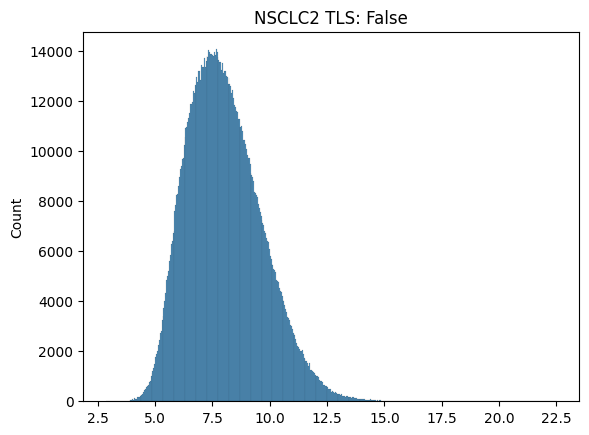

100%|██████████| 173/173 [00:51<00:00,  3.35it/s]


Total distances for NSCLC2 TLS True: 566609


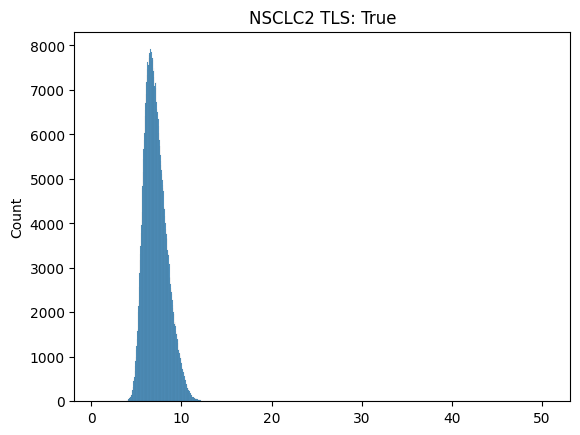

100%|██████████| 440/440 [01:50<00:00,  3.99it/s]


Total distances for NSCLC TLS False: 1056812


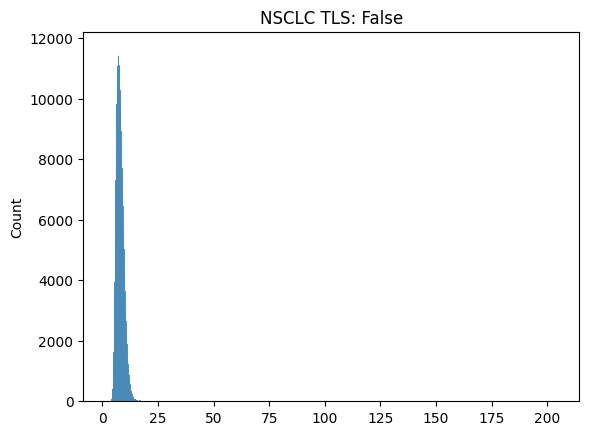

100%|██████████| 49/49 [00:12<00:00,  3.92it/s]


Total distances for NSCLC TLS True: 149657


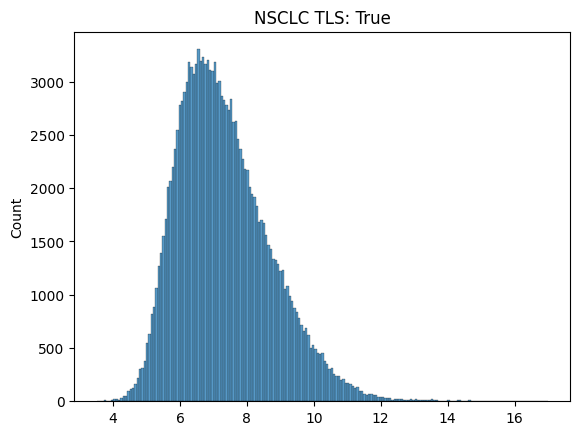

100%|██████████| 709/709 [03:23<00:00,  3.48it/s]


Total distances for BC2 TLS False: 1733943


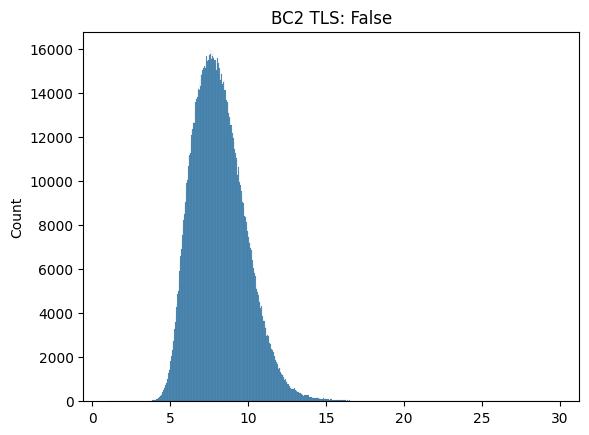

100%|██████████| 111/111 [00:27<00:00,  4.02it/s]


Total distances for BC2 TLS True: 320008


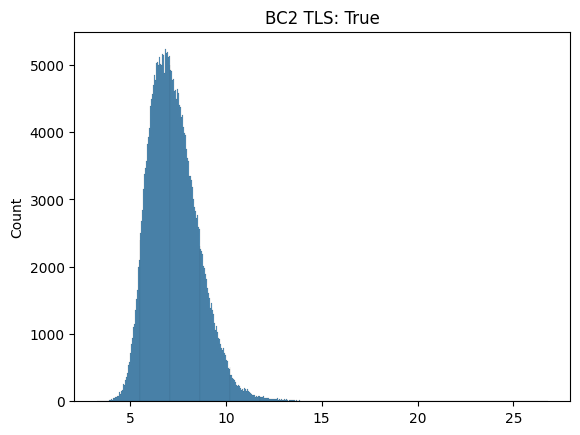

100%|██████████| 399/399 [01:41<00:00,  3.94it/s]


Total distances for SCCHN1 TLS False: 996329


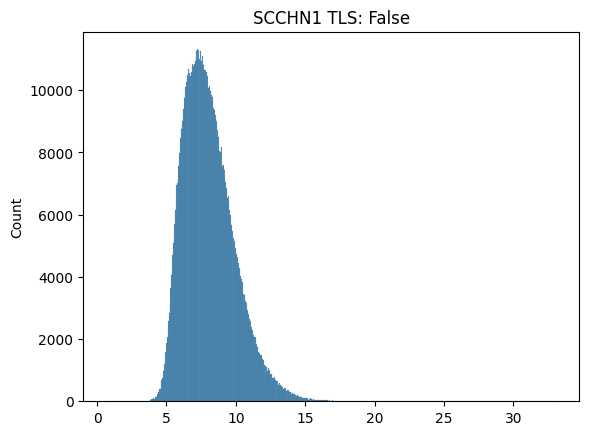

100%|██████████| 55/55 [00:16<00:00,  3.28it/s]


Total distances for SCCHN1 TLS True: 201339


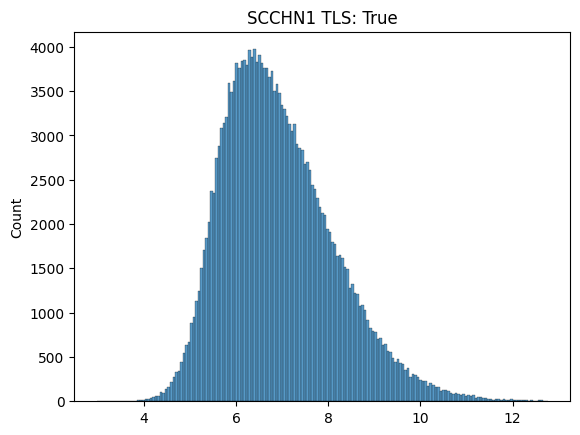

100%|██████████| 98/98 [00:22<00:00,  4.42it/s]


Total distances for CRC1 TLS False: 258454


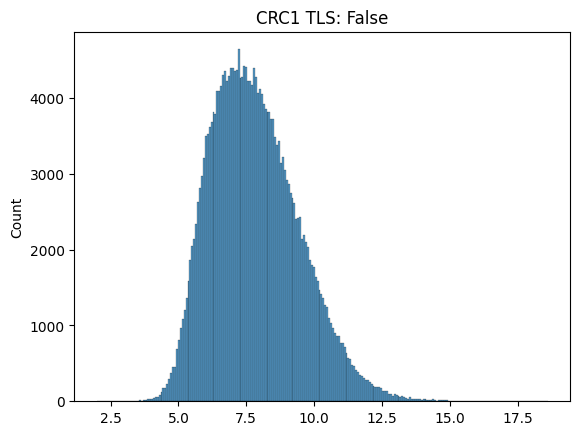

100%|██████████| 27/27 [00:07<00:00,  3.79it/s]


Total distances for CRC1 TLS True: 87058


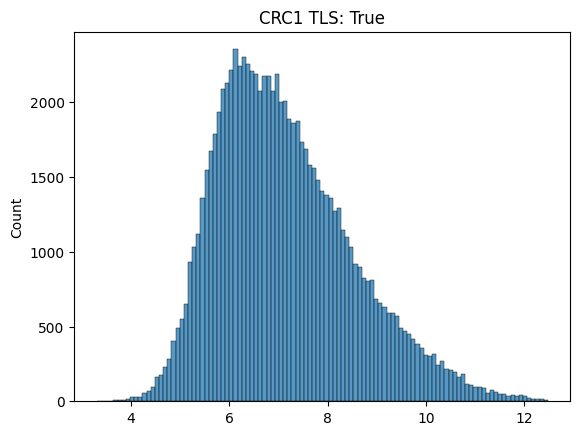

100%|██████████| 91/91 [00:19<00:00,  4.68it/s]


Total distances for CRC2 TLS False: 228494


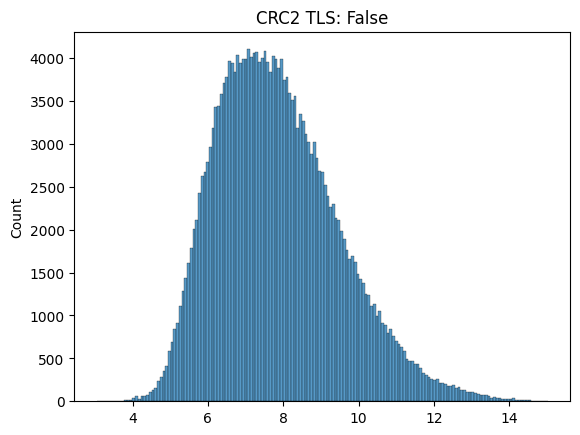

100%|██████████| 15/15 [00:03<00:00,  4.13it/s]


Total distances for CRC2 TLS True: 44419


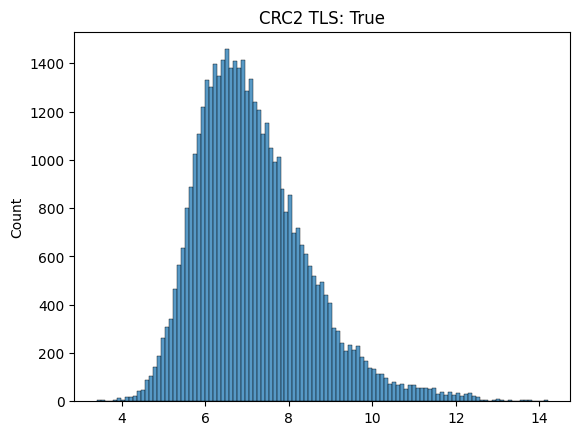

100%|██████████| 18/18 [00:03<00:00,  5.39it/s]


Total distances for SCCHN2 TLS False: 40984


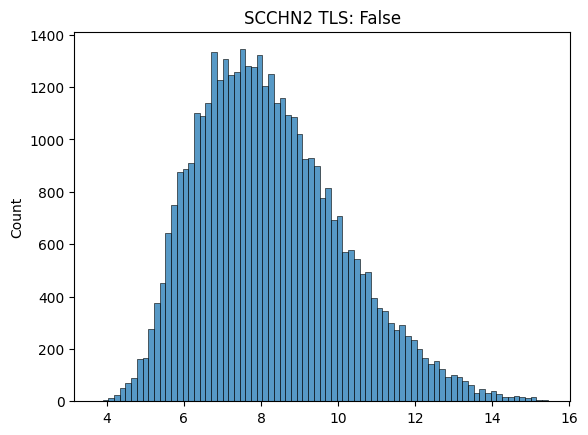

100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


Total distances for SCCHN2 TLS True: 6552


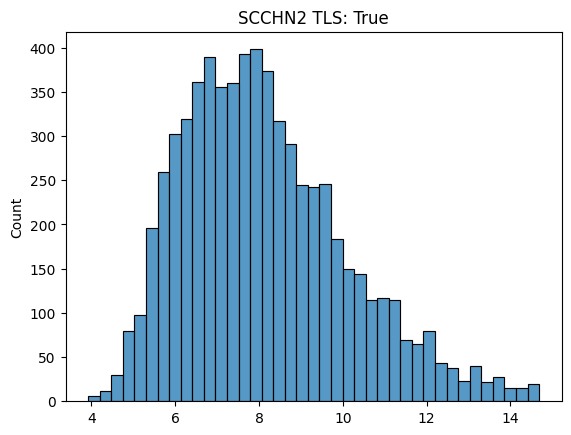

100%|██████████| 603/603 [02:25<00:00,  4.15it/s]


Total distances for BC3 TLS False: 1296512


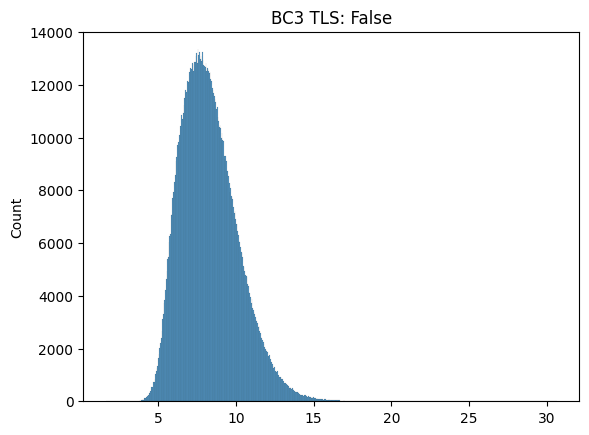

100%|██████████| 61/61 [00:13<00:00,  4.43it/s]


Total distances for BC3 TLS True: 166044


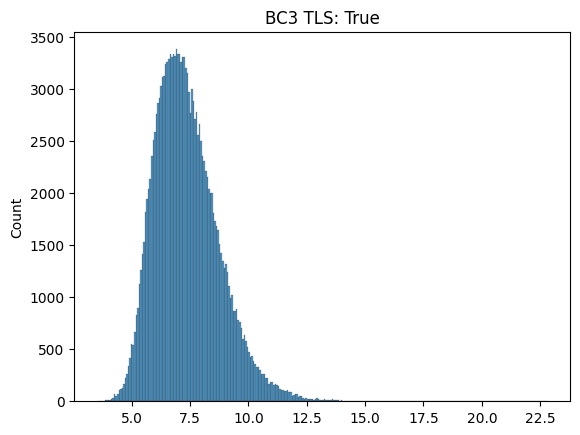

100%|██████████| 160/160 [00:28<00:00,  5.63it/s]


Total distances for RCC TLS False: 319946


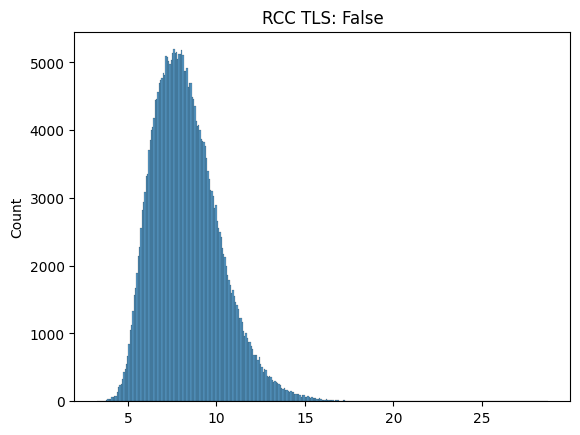

100%|██████████| 27/27 [00:06<00:00,  4.32it/s]


Total distances for RCC TLS True: 75638


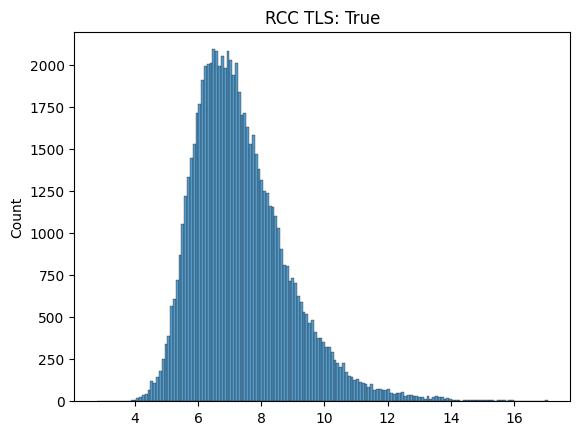

100%|██████████| 82/82 [00:14<00:00,  5.48it/s]


Total distances for BC1 TLS False: 173904


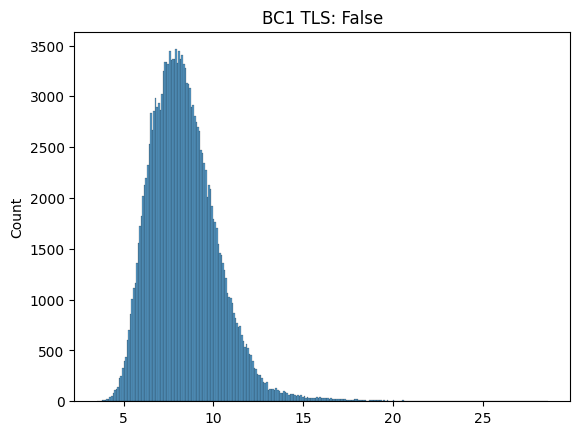

100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


Total distances for BC1 TLS True: 15709


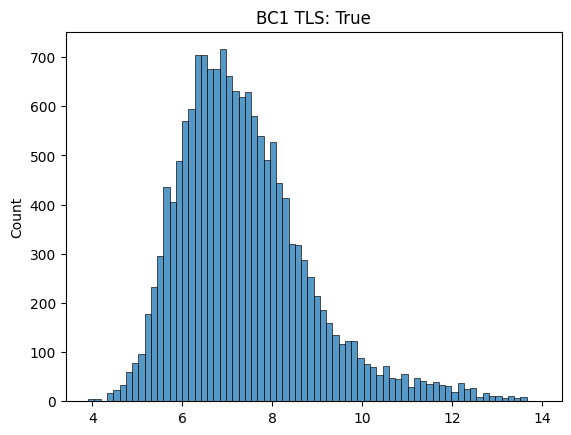

100%|██████████| 448/448 [01:51<00:00,  4.01it/s]


Total distances for SCCHN3 TLS False: 1073103


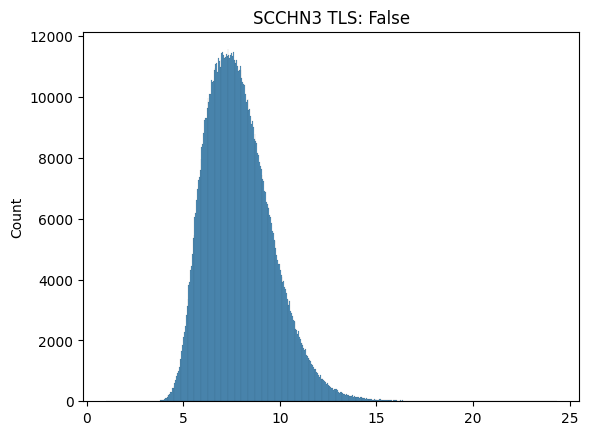

100%|██████████| 37/37 [00:08<00:00,  4.52it/s]


Total distances for SCCHN3 TLS True: 99505


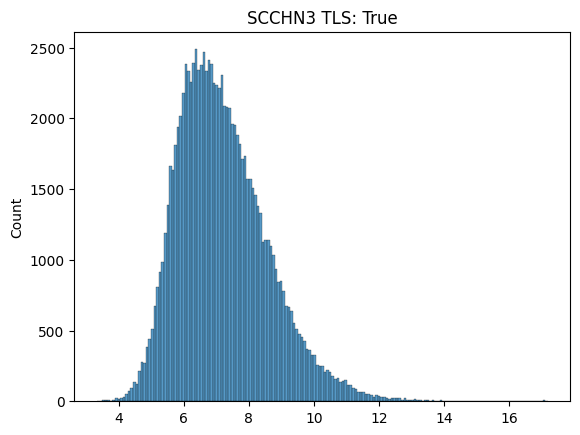

In [40]:
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-filtering unique values for cohort and TLS
unique_cohorts = AllCells['cohort'].unique()
unique_tls = AllCells['TLS'].unique()

# Preparing a list to collect all distance data
all_distances_list = []

# Loop over each cohort
for cohort in unique_cohorts:
    cohort_cells = AllCells[AllCells['cohort'] == cohort]

    # Loop over each TLS within the current cohort
    for tls in cohort_cells['TLS'].unique():
        ROI_cells = cohort_cells[cohort_cells['TLS'] == tls]
        tls_distances = []
        # Loop over each sample within the current TLS
        for sample in tqdm(ROI_cells['sample_id'].unique()):
            sample_cells = ROI_cells[ROI_cells['sample_id'] == sample]

            # Loop over each ROI within the current sample
            for roi in sample_cells['ROI'].unique():
                roi_cells = sample_cells[sample_cells['ROI'] == roi]

                if roi_cells.shape[0] > 5:
                    points = roi_cells[['Pos_X', 'Pos_Y']]
                    knn_edges = SpAn.knn_edges(points, k=1)
                    distances = SpAn.get_distances(points, knn_edges)
                    distances = SpAn.filter_top(distances, 95)

                    tls_distances.extend(distances)

                    distances_df = pd.DataFrame({
                        'distance': distances,
                        'cohort': [cohort] * len(distances),
                        'TLS': [tls] * len(distances),
                        'sample': [sample] * len(distances)
                    })
                    all_distances_list.append(distances_df)

        # Visualize the distribution of distances for the current TLS
        print(f'Total distances for {cohort} TLS {tls}: {len(tls_distances)}')
        sns.histplot(tls_distances).set_title(f'{cohort} TLS: {tls}')
        plt.show()

# Concatenate all distance dataframes
all_distances_df = pd.concat(all_distances_list)


,distance,cohort,TLS,sample
0,3.828779,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
1,3.828779,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2,3.894714,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
3,3.894714,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
4,4.032827,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
...,...,...,...,...
342,10.019833,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004
343,10.156686,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004
344,10.344412,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004
345,10.414689,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004


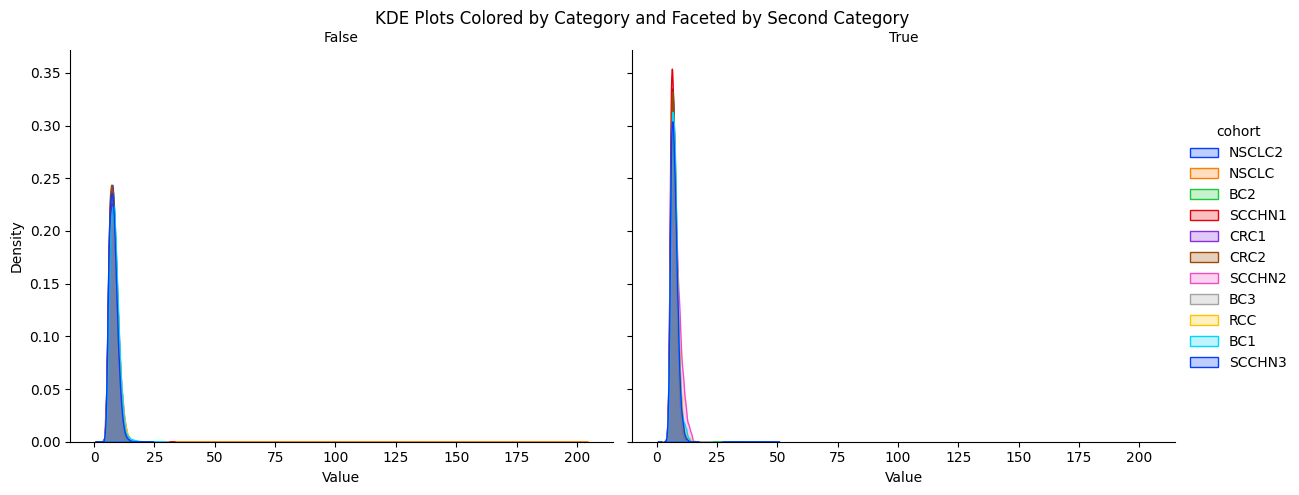

In [41]:
display(all_distances_df)
# Plot the KDE with hue and style
# Set up the FacetGrid
g = sns.FacetGrid(all_distances_df, col='TLS', hue='cohort', palette='bright', height=5, aspect=1.2)
# Map the KDE plot to the grid
g.map(sns.kdeplot, 'distance', fill=True)

# Add legend
g.add_legend()

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Value', 'Density')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('KDE Plots Colored by Category and Faceted by Second Category')

# Show plot
plt.show()

,distance,cohort,TLS,sample
0,3.828779,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
1,3.828779,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2,3.894714,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
3,3.894714,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
4,4.032827,NSCLC2,False,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
...,...,...,...,...
342,10.019833,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004
343,10.156686,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004
344,10.344412,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004
345,10.414689,SCCHN3,True,IMMUcan_Batch20221213_UPSTREAM_S-220907-00002_004


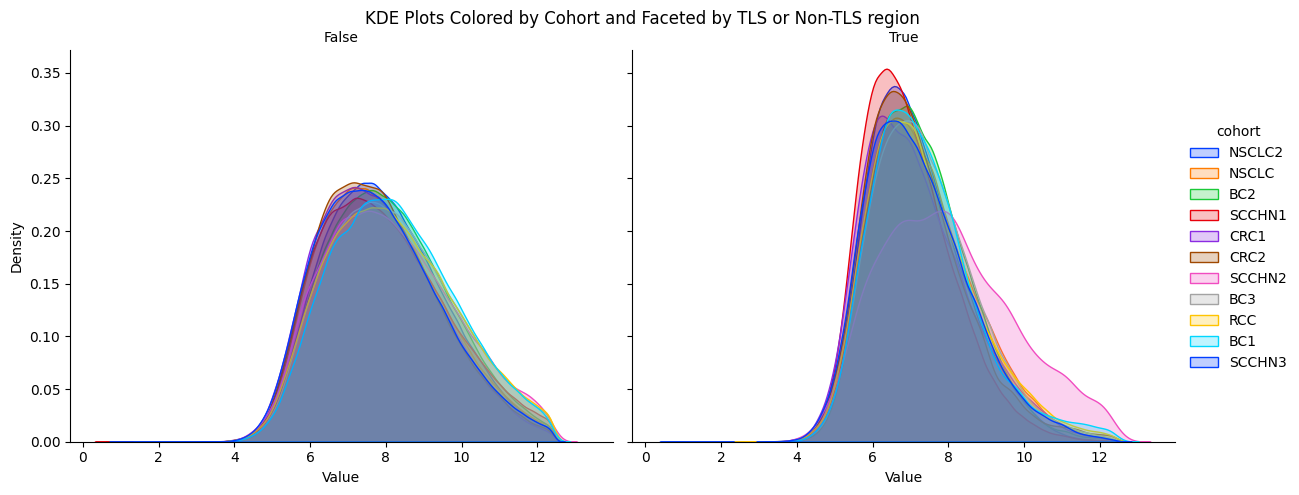

In [48]:
all_distances_df
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = all_distances_df['distance'].quantile(0.25)
Q3 = all_distances_df['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
all_distances_df_filtered = all_distances_df[(all_distances_df['distance'] <= upper_bound)]


display(all_distances_df)
# Plot the KDE with hue and style
# Set up the FacetGrid
g = sns.FacetGrid(all_distances_df_filtered, col='TLS', hue='cohort', palette='bright', height=5, aspect=1.2)
# Map the KDE plot to the grid
g.map(sns.kdeplot, 'distance', fill=True)

# Add legend
g.add_legend()

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Value', 'Density')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('KDE Plots Colored by Cohort and Faceted by TLS or Non-TLS region')

# Show plot
plt.show()

# multiple neighboors

In [60]:
neighboors = range(1, 10)
neighboors

range(1, 10)

  0%|          | 0/572 [00:00<?, ?it/s]

n_neighboor : 1  - knn_edges:3056  -  mean distances:7.389964653882825   
n_neighboor : 2  - knn_edges:3056  -  mean distances:8.900520463612331   
n_neighboor : 3  - knn_edges:3056  -  mean distances:10.322140492848622   
n_neighboor : 4  - knn_edges:3056  -  mean distances:11.735992034431444   
n_neighboor : 5  - knn_edges:3056  -  mean distances:13.134911949053386   
n_neighboor : 6  - knn_edges:3056  -  mean distances:14.449771376652937   
n_neighboor : 7  - knn_edges:3056  -  mean distances:15.684643565999163   
n_neighboor : 8  - knn_edges:3056  -  mean distances:16.7544525687817   


  0%|          | 1/572 [00:46<7:19:18, 46.16s/it]

n_neighboor : 9  - knn_edges:3056  -  mean distances:17.802455070687802   
n_neighboor : 1  - knn_edges:3185  -  mean distances:7.168013647713125   
n_neighboor : 2  - knn_edges:3185  -  mean distances:8.628546172246365   
n_neighboor : 3  - knn_edges:3185  -  mean distances:10.058301531335557   
n_neighboor : 4  - knn_edges:3185  -  mean distances:11.512623859496015   
n_neighboor : 5  - knn_edges:3185  -  mean distances:12.873131646172302   
n_neighboor : 6  - knn_edges:3185  -  mean distances:14.141756788406184   
n_neighboor : 7  - knn_edges:3185  -  mean distances:15.291615636812091   
n_neighboor : 8  - knn_edges:3185  -  mean distances:16.359272248718725   


  0%|          | 2/572 [01:33<7:25:23, 46.88s/it]

n_neighboor : 9  - knn_edges:3185  -  mean distances:17.358622878819453   
n_neighboor : 1  - knn_edges:3044  -  mean distances:7.309870327684055   
n_neighboor : 2  - knn_edges:3044  -  mean distances:8.843907498040446   
n_neighboor : 3  - knn_edges:3044  -  mean distances:10.338763027496046   
n_neighboor : 4  - knn_edges:3044  -  mean distances:11.888389182027716   
n_neighboor : 5  - knn_edges:3044  -  mean distances:13.366210773024148   
n_neighboor : 6  - knn_edges:3044  -  mean distances:14.669904512611996   
n_neighboor : 7  - knn_edges:3044  -  mean distances:15.88774428962152   
n_neighboor : 8  - knn_edges:3044  -  mean distances:17.03290493302186   


  1%|          | 3/572 [02:16<7:07:50, 45.12s/it]

n_neighboor : 9  - knn_edges:3044  -  mean distances:18.06021303484764   
n_neighboor : 1  - knn_edges:2545  -  mean distances:8.110872513656942   
n_neighboor : 2  - knn_edges:2545  -  mean distances:9.782717102983577   
n_neighboor : 3  - knn_edges:2545  -  mean distances:11.377651493204437   
n_neighboor : 4  - knn_edges:2545  -  mean distances:12.918978971596337   
n_neighboor : 5  - knn_edges:2545  -  mean distances:14.415952510320288   
n_neighboor : 6  - knn_edges:2545  -  mean distances:15.92724071786394   
n_neighboor : 7  - knn_edges:2545  -  mean distances:17.31866154279958   
n_neighboor : 8  - knn_edges:2545  -  mean distances:18.54146888654127   


  1%|          | 4/572 [02:47<6:12:28, 39.35s/it]

n_neighboor : 9  - knn_edges:2545  -  mean distances:19.695563564513503   
n_neighboor : 1  - knn_edges:3266  -  mean distances:7.735957457492485   
n_neighboor : 2  - knn_edges:3266  -  mean distances:9.048521355033934   
n_neighboor : 3  - knn_edges:3266  -  mean distances:10.270718214945996   
n_neighboor : 4  - knn_edges:3266  -  mean distances:11.5162951281325   
n_neighboor : 5  - knn_edges:3266  -  mean distances:12.899115820438066   
n_neighboor : 6  - knn_edges:3266  -  mean distances:14.243326885931626   
n_neighboor : 7  - knn_edges:3266  -  mean distances:15.484182747346116   
n_neighboor : 8  - knn_edges:3266  -  mean distances:16.601810339717805   


  1%|          | 5/572 [03:37<6:51:05, 43.50s/it]

n_neighboor : 9  - knn_edges:3266  -  mean distances:17.579548092660403   
n_neighboor : 1  - knn_edges:2097  -  mean distances:7.9928628374779365   
n_neighboor : 2  - knn_edges:2097  -  mean distances:10.113852249605666   
n_neighboor : 3  - knn_edges:2097  -  mean distances:11.942856769660956   
n_neighboor : 4  - knn_edges:2097  -  mean distances:13.709179577575414   
n_neighboor : 5  - knn_edges:2097  -  mean distances:15.457067825641074   
n_neighboor : 6  - knn_edges:2097  -  mean distances:17.02559833535917   
n_neighboor : 7  - knn_edges:2097  -  mean distances:18.400613106810063   
n_neighboor : 8  - knn_edges:2097  -  mean distances:19.76659965799828   


  1%|          | 6/572 [03:58<5:36:38, 35.69s/it]

n_neighboor : 9  - knn_edges:2097  -  mean distances:21.04149506514677   
n_neighboor : 1  - knn_edges:2064  -  mean distances:8.184021442645541   
n_neighboor : 2  - knn_edges:2064  -  mean distances:10.133851454574627   
n_neighboor : 3  - knn_edges:2064  -  mean distances:12.106086630217703   
n_neighboor : 4  - knn_edges:2064  -  mean distances:13.951926626197247   
n_neighboor : 5  - knn_edges:2064  -  mean distances:15.656876343573177   
n_neighboor : 6  - knn_edges:2064  -  mean distances:17.25889652205058   
n_neighboor : 7  - knn_edges:2064  -  mean distances:18.69370203183193   
n_neighboor : 8  - knn_edges:2064  -  mean distances:20.043188894227317   


  1%|          | 7/572 [04:19<4:51:53, 31.00s/it]

n_neighboor : 9  - knn_edges:2064  -  mean distances:21.32613635253921   
n_neighboor : 1  - knn_edges:2763  -  mean distances:7.6821708583183606   
n_neighboor : 2  - knn_edges:2763  -  mean distances:9.23582608437884   
n_neighboor : 3  - knn_edges:2763  -  mean distances:10.786551286027608   
n_neighboor : 4  - knn_edges:2763  -  mean distances:12.334681416879695   
n_neighboor : 5  - knn_edges:2763  -  mean distances:13.837918143106766   
n_neighboor : 6  - knn_edges:2763  -  mean distances:15.234767342601963   
n_neighboor : 7  - knn_edges:2763  -  mean distances:16.477492811087487   
n_neighboor : 8  - knn_edges:2763  -  mean distances:17.665866201089504   


  1%|▏         | 8/572 [04:56<5:07:38, 32.73s/it]

n_neighboor : 9  - knn_edges:2763  -  mean distances:18.770492403625223   
n_neighboor : 1  - knn_edges:2309  -  mean distances:7.414802750910494   
n_neighboor : 2  - knn_edges:2309  -  mean distances:9.083737530378196   
n_neighboor : 3  - knn_edges:2309  -  mean distances:10.658795579741708   
n_neighboor : 4  - knn_edges:2309  -  mean distances:12.28404077497385   
n_neighboor : 5  - knn_edges:2309  -  mean distances:13.81835462330098   
n_neighboor : 6  - knn_edges:2309  -  mean distances:15.204342173211883   
n_neighboor : 7  - knn_edges:2309  -  mean distances:16.464363493094222   
n_neighboor : 8  - knn_edges:2309  -  mean distances:17.645336204913313   


  2%|▏         | 9/572 [05:21<4:46:23, 30.52s/it]

n_neighboor : 9  - knn_edges:2309  -  mean distances:18.729777718302913   
n_neighboor : 1  - knn_edges:2220  -  mean distances:7.960086562521336   
n_neighboor : 2  - knn_edges:2220  -  mean distances:9.808795722528755   
n_neighboor : 3  - knn_edges:2220  -  mean distances:11.577562535056577   
n_neighboor : 4  - knn_edges:2220  -  mean distances:13.374164360829734   
n_neighboor : 5  - knn_edges:2220  -  mean distances:15.021871353713378   
n_neighboor : 6  - knn_edges:2220  -  mean distances:16.519258478901957   
n_neighboor : 7  - knn_edges:2220  -  mean distances:17.942244177772373   
n_neighboor : 8  - knn_edges:2220  -  mean distances:19.20999327367838   


  2%|▏         | 10/572 [05:45<4:25:40, 28.36s/it]

n_neighboor : 9  - knn_edges:2220  -  mean distances:20.44244044510218   
n_neighboor : 1  - knn_edges:2008  -  mean distances:7.837843928240936   
n_neighboor : 2  - knn_edges:2008  -  mean distances:9.555780105499206   
n_neighboor : 3  - knn_edges:2008  -  mean distances:11.377448715028851   
n_neighboor : 4  - knn_edges:2008  -  mean distances:13.237875105727232   
n_neighboor : 5  - knn_edges:2008  -  mean distances:14.892924841955216   
n_neighboor : 6  - knn_edges:2008  -  mean distances:16.45084959019627   
n_neighboor : 7  - knn_edges:2008  -  mean distances:17.90768949354327   
n_neighboor : 8  - knn_edges:2008  -  mean distances:19.255483791322536   


  2%|▏         | 11/572 [06:04<3:58:51, 25.55s/it]

n_neighboor : 9  - knn_edges:2008  -  mean distances:20.523637147438208   
n_neighboor : 1  - knn_edges:1955  -  mean distances:8.103099015267071   
n_neighboor : 2  - knn_edges:1955  -  mean distances:9.9275857026111   
n_neighboor : 3  - knn_edges:1955  -  mean distances:11.828795775704872   
n_neighboor : 4  - knn_edges:1955  -  mean distances:13.721590644075   
n_neighboor : 5  - knn_edges:1955  -  mean distances:15.498621987291722   
n_neighboor : 6  - knn_edges:1955  -  mean distances:17.100296811080483   
n_neighboor : 7  - knn_edges:1955  -  mean distances:18.556594213248548   
n_neighboor : 8  - knn_edges:1955  -  mean distances:19.97457903312054   


  2%|▏         | 12/572 [06:22<3:37:02, 23.25s/it]

n_neighboor : 9  - knn_edges:1955  -  mean distances:21.26889780280882   
n_neighboor : 1  - knn_edges:2611  -  mean distances:8.279367079492774   
n_neighboor : 2  - knn_edges:2611  -  mean distances:9.6148289444971   
n_neighboor : 3  - knn_edges:2611  -  mean distances:11.011573474787982   
n_neighboor : 4  - knn_edges:2611  -  mean distances:12.407246636128818   
n_neighboor : 5  - knn_edges:2611  -  mean distances:13.933142828198616   
n_neighboor : 6  - knn_edges:2611  -  mean distances:15.360595921295968   
n_neighboor : 7  - knn_edges:2611  -  mean distances:16.68942953369214   
n_neighboor : 8  - knn_edges:2611  -  mean distances:17.913743993080416   


  2%|▏         | 13/572 [06:55<4:03:51, 26.17s/it]

n_neighboor : 9  - knn_edges:2611  -  mean distances:18.97250780162108   
n_neighboor : 1  - knn_edges:2197  -  mean distances:8.526091001880724   
n_neighboor : 2  - knn_edges:2197  -  mean distances:10.10813790211684   
n_neighboor : 3  - knn_edges:2197  -  mean distances:11.684367140829368   
n_neighboor : 4  - knn_edges:2197  -  mean distances:13.332389188897908   
n_neighboor : 5  - knn_edges:2197  -  mean distances:14.990032511299436   
n_neighboor : 6  - knn_edges:2197  -  mean distances:16.537212594434   
n_neighboor : 7  - knn_edges:2197  -  mean distances:18.022278423293958   
n_neighboor : 8  - knn_edges:2197  -  mean distances:19.302157287069623   


  2%|▏         | 14/572 [07:18<3:55:22, 25.31s/it]

n_neighboor : 9  - knn_edges:2197  -  mean distances:20.509793228275573   
n_neighboor : 1  - knn_edges:2604  -  mean distances:7.670465940471146   
n_neighboor : 2  - knn_edges:2604  -  mean distances:8.942542995873632   
n_neighboor : 3  - knn_edges:2604  -  mean distances:10.175759385189902   
n_neighboor : 4  - knn_edges:2604  -  mean distances:11.512571753449429   
n_neighboor : 5  - knn_edges:2604  -  mean distances:12.878219728638125   
n_neighboor : 6  - knn_edges:2604  -  mean distances:14.177717379106348   
n_neighboor : 7  - knn_edges:2604  -  mean distances:15.435304803983   
n_neighboor : 8  - knn_edges:2604  -  mean distances:16.57982032372035   


  3%|▎         | 15/572 [07:51<4:17:00, 27.68s/it]

n_neighboor : 9  - knn_edges:2604  -  mean distances:17.61681782849566   
n_neighboor : 1  - knn_edges:1844  -  mean distances:8.505261741213772   
n_neighboor : 2  - knn_edges:1844  -  mean distances:10.765171388578716   
n_neighboor : 3  - knn_edges:1844  -  mean distances:12.819154076525876   
n_neighboor : 4  - knn_edges:1844  -  mean distances:14.771326994880909   
n_neighboor : 5  - knn_edges:1844  -  mean distances:16.6747060494373   
n_neighboor : 6  - knn_edges:1844  -  mean distances:18.324973921136234   
n_neighboor : 7  - knn_edges:1844  -  mean distances:19.83938534745395   
n_neighboor : 8  - knn_edges:1844  -  mean distances:21.23270166956043   


  3%|▎         | 16/572 [08:08<3:44:13, 24.20s/it]

n_neighboor : 9  - knn_edges:1844  -  mean distances:22.547859834129994   
n_neighboor : 1  - knn_edges:2255  -  mean distances:8.959066108916698   
n_neighboor : 2  - knn_edges:2255  -  mean distances:10.655726347682709   
n_neighboor : 3  - knn_edges:2255  -  mean distances:12.312974334739405   
n_neighboor : 4  - knn_edges:2255  -  mean distances:13.957730154950172   
n_neighboor : 5  - knn_edges:2255  -  mean distances:15.68106046865579   
n_neighboor : 6  - knn_edges:2255  -  mean distances:17.286337271904884   
n_neighboor : 7  - knn_edges:2255  -  mean distances:18.690532377931373   
n_neighboor : 8  - knn_edges:2255  -  mean distances:20.04008029488327   


  3%|▎         | 17/572 [08:33<3:46:35, 24.50s/it]

n_neighboor : 9  - knn_edges:2255  -  mean distances:21.26590270242795   
n_neighboor : 1  - knn_edges:1612  -  mean distances:9.539707291917793   
n_neighboor : 2  - knn_edges:1612  -  mean distances:12.102667982347914   
n_neighboor : 3  - knn_edges:1612  -  mean distances:14.301290038779563   
n_neighboor : 4  - knn_edges:1612  -  mean distances:16.392886582795867   
n_neighboor : 5  - knn_edges:1612  -  mean distances:18.4357847584725   
n_neighboor : 6  - knn_edges:1612  -  mean distances:20.223292909965487   
n_neighboor : 7  - knn_edges:1612  -  mean distances:21.91870984541689   
n_neighboor : 8  - knn_edges:1612  -  mean distances:23.479320498003915   


  3%|▎         | 18/572 [08:45<3:12:49, 20.88s/it]

n_neighboor : 9  - knn_edges:1612  -  mean distances:24.976160821809163   
n_neighboor : 1  - knn_edges:2360  -  mean distances:8.23761102590367   
n_neighboor : 2  - knn_edges:2360  -  mean distances:9.981396382782261   
n_neighboor : 3  - knn_edges:2360  -  mean distances:11.656663593919035   
n_neighboor : 4  - knn_edges:2360  -  mean distances:13.2809131692054   
n_neighboor : 5  - knn_edges:2360  -  mean distances:14.95250304313695   
n_neighboor : 6  - knn_edges:2360  -  mean distances:16.442487070012934   
n_neighboor : 7  - knn_edges:2360  -  mean distances:17.76886549996753   
n_neighboor : 8  - knn_edges:2360  -  mean distances:19.034856856281767   


  3%|▎         | 19/572 [09:12<3:29:42, 22.75s/it]

n_neighboor : 9  - knn_edges:2360  -  mean distances:20.21219928680852   
n_neighboor : 1  - knn_edges:2606  -  mean distances:8.472397941685767   
n_neighboor : 2  - knn_edges:2606  -  mean distances:9.995938294154946   
n_neighboor : 3  - knn_edges:2606  -  mean distances:11.491101139407307   
n_neighboor : 4  - knn_edges:2606  -  mean distances:12.986822500700853   
n_neighboor : 5  - knn_edges:2606  -  mean distances:14.499922794167185   
n_neighboor : 6  - knn_edges:2606  -  mean distances:15.936127092150494   
n_neighboor : 7  - knn_edges:2606  -  mean distances:17.300990366239773   
n_neighboor : 8  - knn_edges:2606  -  mean distances:18.583107603912794   


  3%|▎         | 20/572 [09:45<3:57:32, 25.82s/it]

n_neighboor : 9  - knn_edges:2606  -  mean distances:19.709947146390626   
n_neighboor : 1  - knn_edges:2821  -  mean distances:8.130898714465433   
n_neighboor : 2  - knn_edges:2821  -  mean distances:9.619651452107593   
n_neighboor : 3  - knn_edges:2821  -  mean distances:11.035237349438429   
n_neighboor : 4  - knn_edges:2821  -  mean distances:12.520071317075024   
n_neighboor : 5  - knn_edges:2821  -  mean distances:13.96786378046716   
n_neighboor : 6  - knn_edges:2821  -  mean distances:15.390056428645343   
n_neighboor : 7  - knn_edges:2821  -  mean distances:16.683066894679516   
n_neighboor : 8  - knn_edges:2821  -  mean distances:17.86191828789632   


  4%|▎         | 21/572 [10:24<4:33:18, 29.76s/it]

n_neighboor : 9  - knn_edges:2821  -  mean distances:18.929444335758465   
n_neighboor : 1  - knn_edges:2454  -  mean distances:8.080087216344594   
n_neighboor : 2  - knn_edges:2454  -  mean distances:9.78512091555945   
n_neighboor : 3  - knn_edges:2454  -  mean distances:11.499055791897964   
n_neighboor : 4  - knn_edges:2454  -  mean distances:13.215242119216644   
n_neighboor : 5  - knn_edges:2454  -  mean distances:14.8559550497437   
n_neighboor : 6  - knn_edges:2454  -  mean distances:16.326716510818777   
n_neighboor : 7  - knn_edges:2454  -  mean distances:17.72243374715906   
n_neighboor : 8  - knn_edges:2454  -  mean distances:18.957254131778086   


  4%|▍         | 22/572 [10:53<4:30:15, 29.48s/it]

n_neighboor : 9  - knn_edges:2454  -  mean distances:20.125247408877666   
n_neighboor : 1  - knn_edges:2047  -  mean distances:8.227825915773181   
n_neighboor : 2  - knn_edges:2047  -  mean distances:10.404457045401474   
n_neighboor : 3  - knn_edges:2047  -  mean distances:12.541982247585821   
n_neighboor : 4  - knn_edges:2047  -  mean distances:14.456862201315237   
n_neighboor : 5  - knn_edges:2047  -  mean distances:16.26500707663369   
n_neighboor : 6  - knn_edges:2047  -  mean distances:17.889944284818366   
n_neighboor : 7  - knn_edges:2047  -  mean distances:19.39704769098779   
n_neighboor : 8  - knn_edges:2047  -  mean distances:20.784139330176213   


  4%|▍         | 23/572 [11:13<4:03:56, 26.66s/it]

n_neighboor : 9  - knn_edges:2047  -  mean distances:22.01005713262032   
n_neighboor : 1  - knn_edges:1547  -  mean distances:8.556071490529044   
n_neighboor : 2  - knn_edges:1547  -  mean distances:11.29446386138844   
n_neighboor : 3  - knn_edges:1547  -  mean distances:13.890484772462996   
n_neighboor : 4  - knn_edges:1547  -  mean distances:16.29304372209572   
n_neighboor : 5  - knn_edges:1547  -  mean distances:18.331402067854047   
n_neighboor : 6  - knn_edges:1547  -  mean distances:20.200989962131008   
n_neighboor : 7  - knn_edges:1547  -  mean distances:21.93458134009841   
n_neighboor : 8  - knn_edges:1547  -  mean distances:23.495139520984896   


  4%|▍         | 24/572 [11:24<3:21:12, 22.03s/it]

n_neighboor : 9  - knn_edges:1547  -  mean distances:25.041969064524807   
n_neighboor : 1  - knn_edges:2304  -  mean distances:7.825711623404688   
n_neighboor : 2  - knn_edges:2304  -  mean distances:9.677872669910979   
n_neighboor : 3  - knn_edges:2304  -  mean distances:11.527007554201958   
n_neighboor : 4  - knn_edges:2304  -  mean distances:13.259940077687697   
n_neighboor : 5  - knn_edges:2304  -  mean distances:14.87529944619136   
n_neighboor : 6  - knn_edges:2304  -  mean distances:16.35734115563779   
n_neighboor : 7  - knn_edges:2304  -  mean distances:17.695199637876545   
n_neighboor : 8  - knn_edges:2304  -  mean distances:18.957714981500615   


  4%|▍         | 25/572 [11:50<3:30:44, 23.12s/it]

n_neighboor : 9  - knn_edges:2304  -  mean distances:20.091484802900904   
n_neighboor : 1  - knn_edges:3157  -  mean distances:7.329778758891474   
n_neighboor : 2  - knn_edges:3157  -  mean distances:8.619493945165395   
n_neighboor : 3  - knn_edges:3157  -  mean distances:9.917769492258373   
n_neighboor : 4  - knn_edges:3157  -  mean distances:11.256528367066535   
n_neighboor : 5  - knn_edges:3157  -  mean distances:12.595582266040672   
n_neighboor : 6  - knn_edges:3157  -  mean distances:13.891713915469813   
n_neighboor : 7  - knn_edges:3157  -  mean distances:15.08243400850189   
n_neighboor : 8  - knn_edges:3157  -  mean distances:16.146763641854417   


  5%|▍         | 26/572 [12:38<4:39:27, 30.71s/it]

n_neighboor : 9  - knn_edges:3157  -  mean distances:17.111583586037227   
n_neighboor : 1  - knn_edges:3335  -  mean distances:7.1123097063765375   
n_neighboor : 2  - knn_edges:3335  -  mean distances:8.469264619508317   
n_neighboor : 3  - knn_edges:3335  -  mean distances:9.865881583379059   
n_neighboor : 4  - knn_edges:3335  -  mean distances:11.31537761866569   
n_neighboor : 5  - knn_edges:3335  -  mean distances:12.691110526142685   
n_neighboor : 6  - knn_edges:3335  -  mean distances:13.987803189894693   
n_neighboor : 7  - knn_edges:3335  -  mean distances:15.2079323419017   
n_neighboor : 8  - knn_edges:3335  -  mean distances:16.296535710816926   


  5%|▍         | 27/572 [13:31<5:39:08, 37.34s/it]

n_neighboor : 9  - knn_edges:3335  -  mean distances:17.31638158488219   
n_neighboor : 1  - knn_edges:1170  -  mean distances:7.689713846188474   
n_neighboor : 2  - knn_edges:1170  -  mean distances:10.152893929569817   
n_neighboor : 3  - knn_edges:1170  -  mean distances:12.425312584324663   
n_neighboor : 4  - knn_edges:1170  -  mean distances:14.468656893131978   
n_neighboor : 5  - knn_edges:1170  -  mean distances:16.342138106951843   
n_neighboor : 6  - knn_edges:1170  -  mean distances:17.938078380314742   
n_neighboor : 7  - knn_edges:1170  -  mean distances:19.41917460055248   
n_neighboor : 8  - knn_edges:1170  -  mean distances:20.817847939215028   


  5%|▍         | 28/572 [13:37<4:13:34, 27.97s/it]

n_neighboor : 9  - knn_edges:1170  -  mean distances:22.08321652496594   
n_neighboor : 1  - knn_edges:995  -  mean distances:8.327814723209965   
n_neighboor : 2  - knn_edges:995  -  mean distances:11.705932700308153   
n_neighboor : 3  - knn_edges:995  -  mean distances:14.686904356710215   
n_neighboor : 4  - knn_edges:995  -  mean distances:17.46151410394515   
n_neighboor : 5  - knn_edges:995  -  mean distances:19.793016354606895   
n_neighboor : 6  - knn_edges:995  -  mean distances:21.859437551015755   
n_neighboor : 7  - knn_edges:995  -  mean distances:23.84486876278009   
n_neighboor : 8  - knn_edges:995  -  mean distances:25.863120288226877   


  5%|▌         | 29/572 [13:42<3:09:21, 20.92s/it]

n_neighboor : 9  - knn_edges:995  -  mean distances:27.71656387163989   
n_neighboor : 1  - knn_edges:1041  -  mean distances:7.86486757363979   
n_neighboor : 2  - knn_edges:1041  -  mean distances:10.797445760189378   
n_neighboor : 3  - knn_edges:1041  -  mean distances:13.530071445106504   
n_neighboor : 4  - knn_edges:1041  -  mean distances:15.952197675503003   
n_neighboor : 5  - knn_edges:1041  -  mean distances:18.073949914257962   
n_neighboor : 6  - knn_edges:1041  -  mean distances:20.002986185368794   
n_neighboor : 7  - knn_edges:1041  -  mean distances:21.71717356252704   
n_neighboor : 8  - knn_edges:1041  -  mean distances:23.257625312310658   


  5%|▌         | 30/572 [13:47<2:25:43, 16.13s/it]

n_neighboor : 9  - knn_edges:1041  -  mean distances:24.81135164949918   
n_neighboor : 1  - knn_edges:3193  -  mean distances:7.587633413616154   
n_neighboor : 2  - knn_edges:3193  -  mean distances:8.900291351836259   
n_neighboor : 3  - knn_edges:3193  -  mean distances:10.158715924582657   
n_neighboor : 4  - knn_edges:3193  -  mean distances:11.511775391704523   
n_neighboor : 5  - knn_edges:3193  -  mean distances:12.870452913553434   
n_neighboor : 6  - knn_edges:3193  -  mean distances:14.210396622921843   
n_neighboor : 7  - knn_edges:3193  -  mean distances:15.397140821571103   
n_neighboor : 8  - knn_edges:3193  -  mean distances:16.53140207822106   


  5%|▌         | 31/572 [14:37<3:56:26, 26.22s/it]

n_neighboor : 9  - knn_edges:3193  -  mean distances:17.555465341020714   
n_neighboor : 1  - knn_edges:2716  -  mean distances:7.52154626144679   
n_neighboor : 2  - knn_edges:2716  -  mean distances:9.036395079392165   
n_neighboor : 3  - knn_edges:2716  -  mean distances:10.543975083196242   
n_neighboor : 4  - knn_edges:2716  -  mean distances:12.062389205028724   
n_neighboor : 5  - knn_edges:2716  -  mean distances:13.523495843245799   
n_neighboor : 6  - knn_edges:2716  -  mean distances:14.843502519391986   
n_neighboor : 7  - knn_edges:2716  -  mean distances:16.081068049267785   
n_neighboor : 8  - knn_edges:2716  -  mean distances:17.260469190728628   


  6%|▌         | 32/572 [15:12<4:19:27, 28.83s/it]

n_neighboor : 9  - knn_edges:2716  -  mean distances:18.327607493813915   
n_neighboor : 1  - knn_edges:2261  -  mean distances:8.251621358175973   
n_neighboor : 2  - knn_edges:2261  -  mean distances:9.893619485393517   
n_neighboor : 3  - knn_edges:2261  -  mean distances:11.560189302307021   
n_neighboor : 4  - knn_edges:2261  -  mean distances:13.246718291323367   
n_neighboor : 5  - knn_edges:2261  -  mean distances:14.83928111908109   
n_neighboor : 6  - knn_edges:2261  -  mean distances:16.2961204266972   
n_neighboor : 7  - knn_edges:2261  -  mean distances:17.654859351866122   
n_neighboor : 8  - knn_edges:2261  -  mean distances:18.900745071221788   


  6%|▌         | 33/572 [15:36<4:07:44, 27.58s/it]

n_neighboor : 9  - knn_edges:2261  -  mean distances:20.06063703264575   
n_neighboor : 1  - knn_edges:4809  -  mean distances:6.631108291221879   
n_neighboor : 2  - knn_edges:4809  -  mean distances:7.658787704011565   
n_neighboor : 3  - knn_edges:4809  -  mean distances:8.671434983327172   
n_neighboor : 4  - knn_edges:4809  -  mean distances:9.739327429240241   
n_neighboor : 5  - knn_edges:4809  -  mean distances:10.90632665826795   
n_neighboor : 6  - knn_edges:4809  -  mean distances:12.027499722329683   
n_neighboor : 7  - knn_edges:4809  -  mean distances:13.032156969441314   
n_neighboor : 8  - knn_edges:4809  -  mean distances:13.943541532175106   


  6%|▌         | 34/572 [17:29<7:55:34, 53.04s/it]

n_neighboor : 9  - knn_edges:4809  -  mean distances:14.77287968148948   
n_neighboor : 1  - knn_edges:4183  -  mean distances:7.144957895062453   
n_neighboor : 2  - knn_edges:4183  -  mean distances:8.223964799212942   
n_neighboor : 3  - knn_edges:4183  -  mean distances:9.233994599106149   
n_neighboor : 4  - knn_edges:4183  -  mean distances:10.353215556342116   
n_neighboor : 5  - knn_edges:4183  -  mean distances:11.555966959119685   
n_neighboor : 6  - knn_edges:4183  -  mean distances:12.76412531039143   
n_neighboor : 7  - knn_edges:4183  -  mean distances:13.89275239188585   
n_neighboor : 8  - knn_edges:4183  -  mean distances:14.901961715639336   


  6%|▌         | 35/572 [18:51<9:12:33, 61.74s/it]

n_neighboor : 9  - knn_edges:4183  -  mean distances:15.80547490635351   
n_neighboor : 1  - knn_edges:4199  -  mean distances:6.915714635746896   
n_neighboor : 2  - knn_edges:4199  -  mean distances:8.022657171035467   
n_neighboor : 3  - knn_edges:4199  -  mean distances:9.123484034623933   
n_neighboor : 4  - knn_edges:4199  -  mean distances:10.237517769612806   
n_neighboor : 5  - knn_edges:4199  -  mean distances:11.422298572787948   
n_neighboor : 6  - knn_edges:4199  -  mean distances:12.619907254740104   
n_neighboor : 7  - knn_edges:4199  -  mean distances:13.715578506595842   
n_neighboor : 8  - knn_edges:4199  -  mean distances:14.69341472589082   


  6%|▋         | 36/572 [20:15<10:11:14, 68.42s/it]

n_neighboor : 9  - knn_edges:4199  -  mean distances:15.605980801812883   
n_neighboor : 1  - knn_edges:3927  -  mean distances:6.963462801090426   
n_neighboor : 2  - knn_edges:3927  -  mean distances:8.223055377828294   
n_neighboor : 3  - knn_edges:3927  -  mean distances:9.395313857556681   
n_neighboor : 4  - knn_edges:3927  -  mean distances:10.604208870145472   
n_neighboor : 5  - knn_edges:3927  -  mean distances:11.864372647174978   
n_neighboor : 6  - knn_edges:3927  -  mean distances:13.057391442444631   
n_neighboor : 7  - knn_edges:3927  -  mean distances:14.174159022936285   
n_neighboor : 8  - knn_edges:3927  -  mean distances:15.191181960492848   


  6%|▋         | 37/572 [21:29<10:25:04, 70.10s/it]

n_neighboor : 9  - knn_edges:3927  -  mean distances:16.124885610367258   
n_neighboor : 1  - knn_edges:3531  -  mean distances:6.93014023284036   
n_neighboor : 2  - knn_edges:3531  -  mean distances:8.1735091814768   
n_neighboor : 3  - knn_edges:3531  -  mean distances:9.414460813167706   
n_neighboor : 4  - knn_edges:3531  -  mean distances:10.72112999775925   
n_neighboor : 5  - knn_edges:3531  -  mean distances:12.03609608139991   
n_neighboor : 6  - knn_edges:3531  -  mean distances:13.271095544581327   
n_neighboor : 7  - knn_edges:3531  -  mean distances:14.3815132531331   
n_neighboor : 8  - knn_edges:3531  -  mean distances:15.387967319905774   


  7%|▋         | 38/572 [22:30<10:01:38, 67.60s/it]

n_neighboor : 9  - knn_edges:3531  -  mean distances:16.340108975687027   
n_neighboor : 1  - knn_edges:3749  -  mean distances:7.020489572656647   
n_neighboor : 2  - knn_edges:3749  -  mean distances:8.106944444993035   
n_neighboor : 3  - knn_edges:3749  -  mean distances:9.229602391389292   
n_neighboor : 4  - knn_edges:3749  -  mean distances:10.409807588053413   
n_neighboor : 5  - knn_edges:3749  -  mean distances:11.682698893657207   
n_neighboor : 6  - knn_edges:3749  -  mean distances:12.898971929955119   
n_neighboor : 7  - knn_edges:3749  -  mean distances:13.97825554208528   
n_neighboor : 8  - knn_edges:3749  -  mean distances:14.974107001777478   


  7%|▋         | 39/572 [23:42<10:10:33, 68.73s/it]

n_neighboor : 9  - knn_edges:3749  -  mean distances:15.88015970797706   
n_neighboor : 1  - knn_edges:3050  -  mean distances:7.913374944425916   
n_neighboor : 2  - knn_edges:3050  -  mean distances:9.282066340057659   
n_neighboor : 3  - knn_edges:3050  -  mean distances:10.600892431315469   
n_neighboor : 4  - knn_edges:3050  -  mean distances:11.979075534711855   
n_neighboor : 5  - knn_edges:3050  -  mean distances:13.382848816052924   
n_neighboor : 6  - knn_edges:3050  -  mean distances:14.779136730098521   
n_neighboor : 7  - knn_edges:3050  -  mean distances:16.040635061293557   
n_neighboor : 8  - knn_edges:3050  -  mean distances:17.183384398793205   


  7%|▋         | 40/572 [24:29<9:10:46, 62.12s/it] 

n_neighboor : 9  - knn_edges:3050  -  mean distances:18.203751553965926   
n_neighboor : 1  - knn_edges:2765  -  mean distances:8.462407316889134   
n_neighboor : 2  - knn_edges:2765  -  mean distances:9.866606653344878   
n_neighboor : 3  - knn_edges:2765  -  mean distances:11.23210346665631   
n_neighboor : 4  - knn_edges:2765  -  mean distances:12.59371976496643   
n_neighboor : 5  - knn_edges:2765  -  mean distances:14.0667358557481   
n_neighboor : 6  - knn_edges:2765  -  mean distances:15.526993657935833   
n_neighboor : 7  - knn_edges:2765  -  mean distances:16.92456289183193   
n_neighboor : 8  - knn_edges:2765  -  mean distances:18.18396007304091   


  7%|▋         | 41/572 [25:07<8:08:05, 55.15s/it]

n_neighboor : 9  - knn_edges:2765  -  mean distances:19.269193175044922   
n_neighboor : 1  - knn_edges:2381  -  mean distances:8.507844610531567   
n_neighboor : 2  - knn_edges:2381  -  mean distances:10.293397319135106   
n_neighboor : 3  - knn_edges:2381  -  mean distances:11.933944793888285   
n_neighboor : 4  - knn_edges:2381  -  mean distances:13.549129706905369   
n_neighboor : 5  - knn_edges:2381  -  mean distances:15.187714622629263   
n_neighboor : 6  - knn_edges:2381  -  mean distances:16.674463964061214   
n_neighboor : 7  - knn_edges:2381  -  mean distances:18.082987992715935   
n_neighboor : 8  - knn_edges:2381  -  mean distances:19.367439352004993   


  7%|▋         | 42/572 [25:36<6:57:16, 47.24s/it]

n_neighboor : 9  - knn_edges:2381  -  mean distances:20.58223586871889   
n_neighboor : 1  - knn_edges:3596  -  mean distances:7.395749480481919   
n_neighboor : 2  - knn_edges:3596  -  mean distances:8.698231714957837   
n_neighboor : 3  - knn_edges:3596  -  mean distances:9.963076344693519   
n_neighboor : 4  - knn_edges:3596  -  mean distances:11.291824232483103   
n_neighboor : 5  - knn_edges:3596  -  mean distances:12.59982245589599   
n_neighboor : 6  - knn_edges:3596  -  mean distances:13.892818921692102   
n_neighboor : 7  - knn_edges:3596  -  mean distances:15.019086876287096   
n_neighboor : 8  - knn_edges:3596  -  mean distances:16.06821789399535   


  8%|▊         | 43/572 [26:43<7:47:14, 53.00s/it]

n_neighboor : 9  - knn_edges:3596  -  mean distances:17.071520713594065   
n_neighboor : 1  - knn_edges:3079  -  mean distances:8.002009462592316   
n_neighboor : 2  - knn_edges:3079  -  mean distances:9.379970848865804   
n_neighboor : 3  - knn_edges:3079  -  mean distances:10.709181485825486   
n_neighboor : 4  - knn_edges:3079  -  mean distances:12.142639148147493   
n_neighboor : 5  - knn_edges:3079  -  mean distances:13.588593574335846   
n_neighboor : 6  - knn_edges:3079  -  mean distances:15.004443300478556   
n_neighboor : 7  - knn_edges:3079  -  mean distances:16.264814568457723   
n_neighboor : 8  - knn_edges:3079  -  mean distances:17.415870885608584   


  8%|▊         | 44/572 [27:31<7:33:36, 51.55s/it]

n_neighboor : 9  - knn_edges:3079  -  mean distances:18.480093467919794   
n_neighboor : 1  - knn_edges:2592  -  mean distances:8.295928744397719   
n_neighboor : 2  - knn_edges:2592  -  mean distances:9.917014416321011   
n_neighboor : 3  - knn_edges:2592  -  mean distances:11.540765756238367   
n_neighboor : 4  - knn_edges:2592  -  mean distances:13.180411051940617   
n_neighboor : 5  - knn_edges:2592  -  mean distances:14.801677638401406   
n_neighboor : 6  - knn_edges:2592  -  mean distances:16.269377781173027   
n_neighboor : 7  - knn_edges:2592  -  mean distances:17.65104973566507   
n_neighboor : 8  - knn_edges:2592  -  mean distances:18.888869505457954   


  8%|▊         | 45/572 [28:06<6:49:00, 46.57s/it]

n_neighboor : 9  - knn_edges:2592  -  mean distances:20.00742818560596   
n_neighboor : 1  - knn_edges:1711  -  mean distances:9.031347565120571   
n_neighboor : 2  - knn_edges:1711  -  mean distances:11.259814010399946   
n_neighboor : 3  - knn_edges:1711  -  mean distances:13.3466469421493   
n_neighboor : 4  - knn_edges:1711  -  mean distances:15.413548920646864   
n_neighboor : 5  - knn_edges:1711  -  mean distances:17.297424613304422   
n_neighboor : 6  - knn_edges:1711  -  mean distances:19.018169605684427   
n_neighboor : 7  - knn_edges:1711  -  mean distances:20.60637012078766   
n_neighboor : 8  - knn_edges:1711  -  mean distances:22.08735541332742   


  8%|▊         | 46/572 [28:20<5:24:13, 36.98s/it]

n_neighboor : 9  - knn_edges:1711  -  mean distances:23.504717214357147   
n_neighboor : 1  - knn_edges:2171  -  mean distances:8.141921679538482   
n_neighboor : 2  - knn_edges:2171  -  mean distances:9.976826971469624   
n_neighboor : 3  - knn_edges:2171  -  mean distances:11.729850521034447   
n_neighboor : 4  - knn_edges:2171  -  mean distances:13.447947465971678   
n_neighboor : 5  - knn_edges:2171  -  mean distances:15.118562838225996   
n_neighboor : 6  - knn_edges:2171  -  mean distances:16.6937046329865   
n_neighboor : 7  - knn_edges:2171  -  mean distances:18.119173783510536   
n_neighboor : 8  - knn_edges:2171  -  mean distances:19.446536039286602   


  8%|▊         | 47/572 [28:44<4:48:35, 32.98s/it]

n_neighboor : 9  - knn_edges:2171  -  mean distances:20.71962907712776   
n_neighboor : 1  - knn_edges:2033  -  mean distances:8.54086630455655   
n_neighboor : 2  - knn_edges:2033  -  mean distances:10.234060292929385   
n_neighboor : 3  - knn_edges:2033  -  mean distances:11.98872721923931   
n_neighboor : 4  - knn_edges:2033  -  mean distances:13.780928138372428   
n_neighboor : 5  - knn_edges:2033  -  mean distances:15.547770435916044   
n_neighboor : 6  - knn_edges:2033  -  mean distances:17.11275529364931   
n_neighboor : 7  - knn_edges:2033  -  mean distances:18.556264075083327   
n_neighboor : 8  - knn_edges:2033  -  mean distances:19.93533192828164   


  8%|▊         | 48/572 [29:04<4:14:48, 29.18s/it]

n_neighboor : 9  - knn_edges:2033  -  mean distances:21.160791209625547   
n_neighboor : 1  - knn_edges:1829  -  mean distances:8.229780282603842   
n_neighboor : 2  - knn_edges:1829  -  mean distances:10.232702655263408   
n_neighboor : 3  - knn_edges:1829  -  mean distances:12.230224797481304   
n_neighboor : 4  - knn_edges:1829  -  mean distances:14.071864751499323   
n_neighboor : 5  - knn_edges:1829  -  mean distances:15.871479793389137   
n_neighboor : 6  - knn_edges:1829  -  mean distances:17.433950094951893   
n_neighboor : 7  - knn_edges:1829  -  mean distances:18.904482673901686   
n_neighboor : 8  - knn_edges:1829  -  mean distances:20.332696614523847   


  9%|▊         | 49/572 [29:21<3:40:37, 25.31s/it]

n_neighboor : 9  - knn_edges:1829  -  mean distances:21.637955700680415   
n_neighboor : 1  - knn_edges:1591  -  mean distances:8.523748004002098   
n_neighboor : 2  - knn_edges:1591  -  mean distances:10.917544352808873   
n_neighboor : 3  - knn_edges:1591  -  mean distances:13.256844441367488   
n_neighboor : 4  - knn_edges:1591  -  mean distances:15.370800195908977   
n_neighboor : 5  - knn_edges:1591  -  mean distances:17.203391487292564   
n_neighboor : 6  - knn_edges:1591  -  mean distances:19.035522407804297   
n_neighboor : 7  - knn_edges:1591  -  mean distances:20.62660049310848   
n_neighboor : 8  - knn_edges:1591  -  mean distances:22.174785603683958   


  9%|▊         | 50/572 [29:33<3:05:52, 21.36s/it]

n_neighboor : 9  - knn_edges:1591  -  mean distances:23.596282553441156   
n_neighboor : 1  - knn_edges:2022  -  mean distances:8.331592391827044   
n_neighboor : 2  - knn_edges:2022  -  mean distances:10.406230448966603   
n_neighboor : 3  - knn_edges:2022  -  mean distances:12.498007770679179   
n_neighboor : 4  - knn_edges:2022  -  mean distances:14.465537727985765   
n_neighboor : 5  - knn_edges:2022  -  mean distances:16.301931753603192   
n_neighboor : 6  - knn_edges:2022  -  mean distances:17.9651118083441   
n_neighboor : 7  - knn_edges:2022  -  mean distances:19.535627776070914   
n_neighboor : 8  - knn_edges:2022  -  mean distances:20.885542154587142   


  9%|▉         | 51/572 [29:53<3:01:45, 20.93s/it]

n_neighboor : 9  - knn_edges:2022  -  mean distances:22.193166197416012   
n_neighboor : 1  - knn_edges:2444  -  mean distances:7.835250828008344   
n_neighboor : 2  - knn_edges:2444  -  mean distances:9.383266695926809   
n_neighboor : 3  - knn_edges:2444  -  mean distances:10.84083302845993   
n_neighboor : 4  - knn_edges:2444  -  mean distances:12.283878484002116   
n_neighboor : 5  - knn_edges:2444  -  mean distances:13.787626540709049   
n_neighboor : 6  - knn_edges:2444  -  mean distances:15.233604853658322   
n_neighboor : 7  - knn_edges:2444  -  mean distances:16.591473343671847   
n_neighboor : 8  - knn_edges:2444  -  mean distances:17.75885014450905   


  9%|▉         | 52/572 [30:22<3:22:29, 23.37s/it]

n_neighboor : 9  - knn_edges:2444  -  mean distances:18.850077586912256   
n_neighboor : 1  - knn_edges:3217  -  mean distances:7.390155936565579   
n_neighboor : 2  - knn_edges:3217  -  mean distances:8.720934107052765   
n_neighboor : 3  - knn_edges:3217  -  mean distances:10.073652523004986   
n_neighboor : 4  - knn_edges:3217  -  mean distances:11.467005560934375   
n_neighboor : 5  - knn_edges:3217  -  mean distances:12.86653117150448   
n_neighboor : 6  - knn_edges:3217  -  mean distances:14.17545262481968   
n_neighboor : 7  - knn_edges:3217  -  mean distances:15.393690625648768   
n_neighboor : 8  - knn_edges:3217  -  mean distances:16.55188449804114   


  9%|▉         | 53/572 [31:15<4:38:44, 32.22s/it]

n_neighboor : 9  - knn_edges:3217  -  mean distances:17.57282488093646   
n_neighboor : 1  - knn_edges:2766  -  mean distances:7.695180442951029   
n_neighboor : 2  - knn_edges:2766  -  mean distances:9.135059472952438   
n_neighboor : 3  - knn_edges:2766  -  mean distances:10.637346448243056   
n_neighboor : 4  - knn_edges:2766  -  mean distances:12.153207225577153   
n_neighboor : 5  - knn_edges:2766  -  mean distances:13.64896318160673   
n_neighboor : 6  - knn_edges:2766  -  mean distances:15.096782912536701   
n_neighboor : 7  - knn_edges:2766  -  mean distances:16.405065125623658   
n_neighboor : 8  - knn_edges:2766  -  mean distances:17.580119027396208   


  9%|▉         | 54/572 [31:51<4:49:39, 33.55s/it]

n_neighboor : 9  - knn_edges:2766  -  mean distances:18.698691474028884   
n_neighboor : 1  - knn_edges:2333  -  mean distances:8.276684378349701   
n_neighboor : 2  - knn_edges:2333  -  mean distances:9.929020717401327   
n_neighboor : 3  - knn_edges:2333  -  mean distances:11.542674831637793   
n_neighboor : 4  - knn_edges:2333  -  mean distances:13.162328587450567   
n_neighboor : 5  - knn_edges:2333  -  mean distances:14.721530571951156   
n_neighboor : 6  - knn_edges:2333  -  mean distances:16.190065717915516   
n_neighboor : 7  - knn_edges:2333  -  mean distances:17.56249083114705   
n_neighboor : 8  - knn_edges:2333  -  mean distances:18.864488479593007   


 10%|▉         | 55/572 [32:18<4:30:45, 31.42s/it]

n_neighboor : 9  - knn_edges:2333  -  mean distances:20.005585637573997   
n_neighboor : 1  - knn_edges:2066  -  mean distances:9.105839346387642   
n_neighboor : 2  - knn_edges:2066  -  mean distances:11.042636936750093   
n_neighboor : 3  - knn_edges:2066  -  mean distances:12.868417420658705   
n_neighboor : 4  - knn_edges:2066  -  mean distances:14.782679675103678   
n_neighboor : 5  - knn_edges:2066  -  mean distances:16.452386747082787   
n_neighboor : 6  - knn_edges:2066  -  mean distances:18.07482479747274   
n_neighboor : 7  - knn_edges:2066  -  mean distances:19.550514917209135   
n_neighboor : 8  - knn_edges:2066  -  mean distances:20.957253848159144   


 10%|▉         | 56/572 [32:39<4:02:49, 28.23s/it]

n_neighboor : 9  - knn_edges:2066  -  mean distances:22.301013557122495   
n_neighboor : 1  - knn_edges:2798  -  mean distances:7.659758970406972   
n_neighboor : 2  - knn_edges:2798  -  mean distances:9.152466130788065   
n_neighboor : 3  - knn_edges:2798  -  mean distances:10.54910394532687   
n_neighboor : 4  - knn_edges:2798  -  mean distances:11.973557597533281   
n_neighboor : 5  - knn_edges:2798  -  mean distances:13.392029996828256   
n_neighboor : 6  - knn_edges:2798  -  mean distances:14.72589914093885   
n_neighboor : 7  - knn_edges:2798  -  mean distances:15.970046349346656   
n_neighboor : 8  - knn_edges:2798  -  mean distances:17.08509256530933   


 10%|▉         | 57/572 [33:17<4:28:19, 31.26s/it]

n_neighboor : 9  - knn_edges:2798  -  mean distances:18.14590206216265   
n_neighboor : 1  - knn_edges:3339  -  mean distances:7.4315684740743455   
n_neighboor : 2  - knn_edges:3339  -  mean distances:8.751735850627481   
n_neighboor : 3  - knn_edges:3339  -  mean distances:10.082570493328204   
n_neighboor : 4  - knn_edges:3339  -  mean distances:11.46850696206209   
n_neighboor : 5  - knn_edges:3339  -  mean distances:12.843740928993826   
n_neighboor : 6  - knn_edges:3339  -  mean distances:14.1686292612423   
n_neighboor : 7  - knn_edges:3339  -  mean distances:15.355029103990864   
n_neighboor : 8  - knn_edges:3339  -  mean distances:16.462809533319607   


 10%|█         | 58/572 [34:11<5:27:50, 38.27s/it]

n_neighboor : 9  - knn_edges:3339  -  mean distances:17.4400814598052   
n_neighboor : 1  - knn_edges:2434  -  mean distances:8.253873804277559   
n_neighboor : 2  - knn_edges:2434  -  mean distances:9.89941247331827   
n_neighboor : 3  - knn_edges:2434  -  mean distances:11.501243628544692   
n_neighboor : 4  - knn_edges:2434  -  mean distances:13.115106487688259   
n_neighboor : 5  - knn_edges:2434  -  mean distances:14.751257101728175   
n_neighboor : 6  - knn_edges:2434  -  mean distances:16.254713602852437   
n_neighboor : 7  - knn_edges:2434  -  mean distances:17.67161229689216   
n_neighboor : 8  - knn_edges:2434  -  mean distances:18.95765995964258   


 10%|█         | 59/572 [34:40<5:01:45, 35.29s/it]

n_neighboor : 9  - knn_edges:2434  -  mean distances:20.15989697141809   
n_neighboor : 1  - knn_edges:2896  -  mean distances:7.361158972243593   
n_neighboor : 2  - knn_edges:2896  -  mean distances:9.050998035839307   
n_neighboor : 3  - knn_edges:2896  -  mean distances:10.629781891674888   
n_neighboor : 4  - knn_edges:2896  -  mean distances:12.170475779546349   
n_neighboor : 5  - knn_edges:2896  -  mean distances:13.643108706879513   
n_neighboor : 6  - knn_edges:2896  -  mean distances:14.994837010309594   
n_neighboor : 7  - knn_edges:2896  -  mean distances:16.202531965138643   
n_neighboor : 8  - knn_edges:2896  -  mean distances:17.329448639383166   


 10%|█         | 60/572 [35:20<5:14:15, 36.83s/it]

n_neighboor : 9  - knn_edges:2896  -  mean distances:18.42431393756564   
n_neighboor : 1  - knn_edges:3216  -  mean distances:7.378950679398371   
n_neighboor : 2  - knn_edges:3216  -  mean distances:8.780759019568633   
n_neighboor : 3  - knn_edges:3216  -  mean distances:10.147752273911342   
n_neighboor : 4  - knn_edges:3216  -  mean distances:11.519566608667274   
n_neighboor : 5  - knn_edges:3216  -  mean distances:12.860637853096152   
n_neighboor : 6  - knn_edges:3216  -  mean distances:14.154088767253299   
n_neighboor : 7  - knn_edges:3216  -  mean distances:15.380700678101435   
n_neighboor : 8  - knn_edges:3216  -  mean distances:16.4889004059918   


 11%|█         | 61/572 [36:10<5:46:17, 40.66s/it]

n_neighboor : 9  - knn_edges:3216  -  mean distances:17.503502504563922   
n_neighboor : 1  - knn_edges:3156  -  mean distances:7.305194080041049   
n_neighboor : 2  - knn_edges:3156  -  mean distances:8.544134798246324   
n_neighboor : 3  - knn_edges:3156  -  mean distances:9.762414697706019   
n_neighboor : 4  - knn_edges:3156  -  mean distances:11.06570415716945   
n_neighboor : 5  - knn_edges:3156  -  mean distances:12.414889067236228   
n_neighboor : 6  - knn_edges:3156  -  mean distances:13.716933907975227   
n_neighboor : 7  - knn_edges:3156  -  mean distances:14.883631749557537   
n_neighboor : 8  - knn_edges:3156  -  mean distances:15.938620082800158   


 11%|█         | 62/572 [36:58<6:03:33, 42.77s/it]

n_neighboor : 9  - knn_edges:3156  -  mean distances:16.922818927623357   
n_neighboor : 1  - knn_edges:2760  -  mean distances:7.627594124668653   
n_neighboor : 2  - knn_edges:2760  -  mean distances:9.027964859611448   
n_neighboor : 3  - knn_edges:2760  -  mean distances:10.40693557629802   
n_neighboor : 4  - knn_edges:2760  -  mean distances:11.825163642016394   
n_neighboor : 5  - knn_edges:2760  -  mean distances:13.229219375752544   
n_neighboor : 6  - knn_edges:2760  -  mean distances:14.656465886378097   
n_neighboor : 7  - knn_edges:2760  -  mean distances:15.947027688708133   
n_neighboor : 8  - knn_edges:2760  -  mean distances:17.067300676997693   


 11%|█         | 63/572 [37:34<5:46:38, 40.86s/it]

n_neighboor : 9  - knn_edges:2760  -  mean distances:18.150983864462123   
n_neighboor : 1  - knn_edges:2026  -  mean distances:8.131924950927798   
n_neighboor : 2  - knn_edges:2026  -  mean distances:9.948137286025254   
n_neighboor : 3  - knn_edges:2026  -  mean distances:11.749020319085723   
n_neighboor : 4  - knn_edges:2026  -  mean distances:13.5421872460435   
n_neighboor : 5  - knn_edges:2026  -  mean distances:15.265743066426028   
n_neighboor : 6  - knn_edges:2026  -  mean distances:16.8402335157071   
n_neighboor : 7  - knn_edges:2026  -  mean distances:18.256865016709302   
n_neighboor : 8  - knn_edges:2026  -  mean distances:19.58769067626385   


 11%|█         | 64/572 [37:54<4:53:02, 34.61s/it]

n_neighboor : 9  - knn_edges:2026  -  mean distances:20.838400843155394   
n_neighboor : 1  - knn_edges:1835  -  mean distances:7.7270035940744375   
n_neighboor : 2  - knn_edges:1835  -  mean distances:9.50956216446915   
n_neighboor : 3  - knn_edges:1835  -  mean distances:11.243431624228009   
n_neighboor : 4  - knn_edges:1835  -  mean distances:13.012686022319418   
n_neighboor : 5  - knn_edges:1835  -  mean distances:14.688212244817148   
n_neighboor : 6  - knn_edges:1835  -  mean distances:16.222885512713123   
n_neighboor : 7  - knn_edges:1835  -  mean distances:17.688708033730915   
n_neighboor : 8  - knn_edges:1835  -  mean distances:19.0482364341493   


 11%|█▏        | 65/572 [38:10<4:06:10, 29.13s/it]

n_neighboor : 9  - knn_edges:1835  -  mean distances:20.316989020171068   
n_neighboor : 1  - knn_edges:1780  -  mean distances:7.596297329510535   
n_neighboor : 2  - knn_edges:1780  -  mean distances:9.38763327767435   
n_neighboor : 3  - knn_edges:1780  -  mean distances:11.261320498725201   
n_neighboor : 4  - knn_edges:1780  -  mean distances:13.122292732712431   
n_neighboor : 5  - knn_edges:1780  -  mean distances:14.903691801135576   
n_neighboor : 6  - knn_edges:1780  -  mean distances:16.51036740196311   
n_neighboor : 7  - knn_edges:1780  -  mean distances:18.02575470244763   
n_neighboor : 8  - knn_edges:1780  -  mean distances:19.4391854815302   


 12%|█▏        | 66/572 [38:25<3:30:25, 24.95s/it]

n_neighboor : 9  - knn_edges:1780  -  mean distances:20.76910809432968   
n_neighboor : 1  - knn_edges:2593  -  mean distances:8.238169665754523   
n_neighboor : 2  - knn_edges:2593  -  mean distances:9.839301829055577   
n_neighboor : 3  - knn_edges:2593  -  mean distances:11.339440906217288   
n_neighboor : 4  - knn_edges:2593  -  mean distances:12.889168712439456   
n_neighboor : 5  - knn_edges:2593  -  mean distances:14.450545034857905   
n_neighboor : 6  - knn_edges:2593  -  mean distances:15.962550868644508   
n_neighboor : 7  - knn_edges:2593  -  mean distances:17.275081602658165   
n_neighboor : 8  - knn_edges:2593  -  mean distances:18.531228947526095   


 12%|█▏        | 67/572 [38:58<3:48:42, 27.17s/it]

n_neighboor : 9  - knn_edges:2593  -  mean distances:19.704914480650405   
n_neighboor : 1  - knn_edges:2305  -  mean distances:8.598681241223685   
n_neighboor : 2  - knn_edges:2305  -  mean distances:10.29654104263378   
n_neighboor : 3  - knn_edges:2305  -  mean distances:11.952117078140375   
n_neighboor : 4  - knn_edges:2305  -  mean distances:13.586272433693585   
n_neighboor : 5  - knn_edges:2305  -  mean distances:15.27046958555616   
n_neighboor : 6  - knn_edges:2305  -  mean distances:16.860586665429004   
n_neighboor : 7  - knn_edges:2305  -  mean distances:18.335677488349237   
n_neighboor : 8  - knn_edges:2305  -  mean distances:19.603723779666186   


 12%|█▏        | 68/572 [39:24<3:45:16, 26.82s/it]

n_neighboor : 9  - knn_edges:2305  -  mean distances:20.799229395017505   
n_neighboor : 1  - knn_edges:2853  -  mean distances:7.767552643529622   
n_neighboor : 2  - knn_edges:2853  -  mean distances:9.261838579528478   
n_neighboor : 3  - knn_edges:2853  -  mean distances:10.711409244337068   
n_neighboor : 4  - knn_edges:2853  -  mean distances:12.226925777970646   
n_neighboor : 5  - knn_edges:2853  -  mean distances:13.6437182979896   
n_neighboor : 6  - knn_edges:2853  -  mean distances:15.041459786096326   
n_neighboor : 7  - knn_edges:2853  -  mean distances:16.348457964983403   
n_neighboor : 8  - knn_edges:2853  -  mean distances:17.5093914473634   


 12%|█▏        | 69/572 [40:02<4:12:29, 30.12s/it]

n_neighboor : 9  - knn_edges:2853  -  mean distances:18.58391593853983   
n_neighboor : 1  - knn_edges:2781  -  mean distances:7.479961658181364   
n_neighboor : 2  - knn_edges:2781  -  mean distances:9.02982079723098   
n_neighboor : 3  - knn_edges:2781  -  mean distances:10.552898736556939   
n_neighboor : 4  - knn_edges:2781  -  mean distances:12.109605780551547   
n_neighboor : 5  - knn_edges:2781  -  mean distances:13.628181897866812   
n_neighboor : 6  - knn_edges:2781  -  mean distances:15.015262070902553   
n_neighboor : 7  - knn_edges:2781  -  mean distances:16.282125844646437   
n_neighboor : 8  - knn_edges:2781  -  mean distances:17.395643708186995   


 12%|█▏        | 70/572 [40:37<4:26:18, 31.83s/it]

n_neighboor : 9  - knn_edges:2781  -  mean distances:18.487095081658754   
n_neighboor : 1  - knn_edges:2855  -  mean distances:7.682014454379716   
n_neighboor : 2  - knn_edges:2855  -  mean distances:9.288284532184417   
n_neighboor : 3  - knn_edges:2855  -  mean distances:10.883025752548384   
n_neighboor : 4  - knn_edges:2855  -  mean distances:12.483036471883443   
n_neighboor : 5  - knn_edges:2855  -  mean distances:14.028417348955077   
n_neighboor : 6  - knn_edges:2855  -  mean distances:15.431106478335213   
n_neighboor : 7  - knn_edges:2855  -  mean distances:16.703178572086003   
n_neighboor : 8  - knn_edges:2855  -  mean distances:17.873823621463092   


 12%|█▏        | 71/572 [41:15<4:41:11, 33.67s/it]

n_neighboor : 9  - knn_edges:2855  -  mean distances:18.981647154240108   
n_neighboor : 1  - knn_edges:2237  -  mean distances:8.168543649774342   
n_neighboor : 2  - knn_edges:2237  -  mean distances:9.999733485138124   
n_neighboor : 3  - knn_edges:2237  -  mean distances:11.84724984532892   
n_neighboor : 4  - knn_edges:2237  -  mean distances:13.599426589959023   
n_neighboor : 5  - knn_edges:2237  -  mean distances:15.355286491107814   
n_neighboor : 6  - knn_edges:2237  -  mean distances:16.916013059508636   
n_neighboor : 7  - knn_edges:2237  -  mean distances:18.379147714636314   
n_neighboor : 8  - knn_edges:2237  -  mean distances:19.694719141115012   


 13%|█▎        | 72/572 [41:39<4:14:24, 30.53s/it]

n_neighboor : 9  - knn_edges:2237  -  mean distances:20.87682180641797   
n_neighboor : 1  - knn_edges:3214  -  mean distances:7.594017256523406   
n_neighboor : 2  - knn_edges:3214  -  mean distances:9.005723535186048   
n_neighboor : 3  - knn_edges:3214  -  mean distances:10.372961599831342   
n_neighboor : 4  - knn_edges:3214  -  mean distances:11.803852969229732   
n_neighboor : 5  - knn_edges:3214  -  mean distances:13.19355546227388   
n_neighboor : 6  - knn_edges:3214  -  mean distances:14.561654403069168   
n_neighboor : 7  - knn_edges:3214  -  mean distances:15.770186205586025   
n_neighboor : 8  - knn_edges:3214  -  mean distances:16.873977708776835   


 13%|█▎        | 73/572 [42:26<4:55:31, 35.53s/it]

n_neighboor : 9  - knn_edges:3214  -  mean distances:17.92104459032783   
n_neighboor : 1  - knn_edges:2814  -  mean distances:7.840506342452672   
n_neighboor : 2  - knn_edges:2814  -  mean distances:9.376843697121025   
n_neighboor : 3  - knn_edges:2814  -  mean distances:10.927225746267363   
n_neighboor : 4  - knn_edges:2814  -  mean distances:12.452359642024025   
n_neighboor : 5  - knn_edges:2814  -  mean distances:13.91404080329146   
n_neighboor : 6  - knn_edges:2814  -  mean distances:15.340938286230173   
n_neighboor : 7  - knn_edges:2814  -  mean distances:16.625582001411278   
n_neighboor : 8  - knn_edges:2814  -  mean distances:17.81469625063822   


 13%|█▎        | 74/572 [43:01<4:55:07, 35.56s/it]

n_neighboor : 9  - knn_edges:2814  -  mean distances:18.9011867970282   
n_neighboor : 1  - knn_edges:2874  -  mean distances:7.685344677937646   
n_neighboor : 2  - knn_edges:2874  -  mean distances:9.259457338204776   
n_neighboor : 3  - knn_edges:2874  -  mean distances:10.765097522844727   
n_neighboor : 4  - knn_edges:2874  -  mean distances:12.294330447232767   
n_neighboor : 5  - knn_edges:2874  -  mean distances:13.819014282112038   
n_neighboor : 6  - knn_edges:2874  -  mean distances:15.208711897668998   
n_neighboor : 7  - knn_edges:2874  -  mean distances:16.47304883000694   
n_neighboor : 8  - knn_edges:2874  -  mean distances:17.64430018650243   


 13%|█▎        | 75/572 [43:42<5:07:22, 37.11s/it]

n_neighboor : 9  - knn_edges:2874  -  mean distances:18.68973718910586   
n_neighboor : 1  - knn_edges:1911  -  mean distances:9.038979778209576   
n_neighboor : 2  - knn_edges:1911  -  mean distances:10.86731298717009   
n_neighboor : 3  - knn_edges:1911  -  mean distances:12.687957792225673   
n_neighboor : 4  - knn_edges:1911  -  mean distances:14.530971444325951   
n_neighboor : 5  - knn_edges:1911  -  mean distances:16.38558716132345   
n_neighboor : 6  - knn_edges:1911  -  mean distances:18.00331074268206   
n_neighboor : 7  - knn_edges:1911  -  mean distances:19.553879857105382   
n_neighboor : 8  - knn_edges:1911  -  mean distances:20.979368966333187   


 13%|█▎        | 76/572 [44:01<4:20:08, 31.47s/it]

n_neighboor : 9  - knn_edges:1911  -  mean distances:22.28897639871354   
n_neighboor : 1  - knn_edges:1414  -  mean distances:9.833841945694035   
n_neighboor : 2  - knn_edges:1414  -  mean distances:12.348593310386415   
n_neighboor : 3  - knn_edges:1414  -  mean distances:14.626797475015392   
n_neighboor : 4  - knn_edges:1414  -  mean distances:16.8855973451921   
n_neighboor : 5  - knn_edges:1414  -  mean distances:18.94566634358619   
n_neighboor : 6  - knn_edges:1414  -  mean distances:20.92792208433547   
n_neighboor : 7  - knn_edges:1414  -  mean distances:22.695119315430304   
n_neighboor : 8  - knn_edges:1414  -  mean distances:24.43700194092647   


 13%|█▎        | 77/572 [44:10<3:25:49, 24.95s/it]

n_neighboor : 9  - knn_edges:1414  -  mean distances:25.98321119251656   
n_neighboor : 1  - knn_edges:2011  -  mean distances:8.724155894424788   
n_neighboor : 2  - knn_edges:2011  -  mean distances:10.596852088225827   
n_neighboor : 3  - knn_edges:2011  -  mean distances:12.425380607902444   
n_neighboor : 4  - knn_edges:2011  -  mean distances:14.273644531936652   
n_neighboor : 5  - knn_edges:2011  -  mean distances:16.02199303532902   
n_neighboor : 6  - knn_edges:2011  -  mean distances:17.56940890604281   
n_neighboor : 7  - knn_edges:2011  -  mean distances:19.032201940001418   
n_neighboor : 8  - knn_edges:2011  -  mean distances:20.35167482933593   


 14%|█▎        | 78/572 [44:30<3:12:33, 23.39s/it]

n_neighboor : 9  - knn_edges:2011  -  mean distances:21.62697513702054   
n_neighboor : 1  - knn_edges:2183  -  mean distances:8.35150928824682   
n_neighboor : 2  - knn_edges:2183  -  mean distances:10.129051325083793   
n_neighboor : 3  - knn_edges:2183  -  mean distances:11.804877693354193   
n_neighboor : 4  - knn_edges:2183  -  mean distances:13.529304386349091   
n_neighboor : 5  - knn_edges:2183  -  mean distances:15.258382351665972   
n_neighboor : 6  - knn_edges:2183  -  mean distances:16.858185614226915   
n_neighboor : 7  - knn_edges:2183  -  mean distances:18.287748926259262   
n_neighboor : 8  - knn_edges:2183  -  mean distances:19.668899986535475   


 14%|█▍        | 79/572 [44:54<3:12:36, 23.44s/it]

n_neighboor : 9  - knn_edges:2183  -  mean distances:20.886553202961277   
n_neighboor : 1  - knn_edges:2441  -  mean distances:8.476642033450236   
n_neighboor : 2  - knn_edges:2441  -  mean distances:10.075951299742998   
n_neighboor : 3  - knn_edges:2441  -  mean distances:11.620489021936223   
n_neighboor : 4  - knn_edges:2441  -  mean distances:13.270250834078253   
n_neighboor : 5  - knn_edges:2441  -  mean distances:14.880759170817065   
n_neighboor : 6  - knn_edges:2441  -  mean distances:16.422443741488497   
n_neighboor : 7  - knn_edges:2441  -  mean distances:17.762712865011967   
n_neighboor : 8  - knn_edges:2441  -  mean distances:19.019995147047666   


 14%|█▍        | 80/572 [45:23<3:26:13, 25.15s/it]

n_neighboor : 9  - knn_edges:2441  -  mean distances:20.15969212493979   
n_neighboor : 1  - knn_edges:2122  -  mean distances:8.781018154293259   
n_neighboor : 2  - knn_edges:2122  -  mean distances:10.526086076477084   
n_neighboor : 3  - knn_edges:2122  -  mean distances:12.222099391680668   
n_neighboor : 4  - knn_edges:2122  -  mean distances:14.005953112432655   
n_neighboor : 5  - knn_edges:2122  -  mean distances:15.747698504983811   
n_neighboor : 6  - knn_edges:2122  -  mean distances:17.404783341680012   
n_neighboor : 7  - knn_edges:2122  -  mean distances:18.850968154577373   
n_neighboor : 8  - knn_edges:2122  -  mean distances:20.18285296301794   


 14%|█▍        | 81/572 [45:45<3:18:03, 24.20s/it]

n_neighboor : 9  - knn_edges:2122  -  mean distances:21.416897728982374   
n_neighboor : 1  - knn_edges:2672  -  mean distances:8.489531143828362   
n_neighboor : 2  - knn_edges:2672  -  mean distances:9.89757909808762   
n_neighboor : 3  - knn_edges:2672  -  mean distances:11.263067735983675   
n_neighboor : 4  - knn_edges:2672  -  mean distances:12.721171762302514   
n_neighboor : 5  - knn_edges:2672  -  mean distances:14.30919403117147   
n_neighboor : 6  - knn_edges:2672  -  mean distances:15.817402717703542   
n_neighboor : 7  - knn_edges:2672  -  mean distances:17.184901231651853   
n_neighboor : 8  - knn_edges:2672  -  mean distances:18.411328075240313   


 14%|█▍        | 82/572 [46:20<3:44:34, 27.50s/it]

n_neighboor : 9  - knn_edges:2672  -  mean distances:19.5613069025985   
n_neighboor : 1  - knn_edges:2355  -  mean distances:8.37760305764456   
n_neighboor : 2  - knn_edges:2355  -  mean distances:10.033720951148986   
n_neighboor : 3  - knn_edges:2355  -  mean distances:11.67621742802625   
n_neighboor : 4  - knn_edges:2355  -  mean distances:13.204935134055068   
n_neighboor : 5  - knn_edges:2355  -  mean distances:14.774182603789491   
n_neighboor : 6  - knn_edges:2355  -  mean distances:16.30775556314565   
n_neighboor : 7  - knn_edges:2355  -  mean distances:17.736743650713365   
n_neighboor : 8  - knn_edges:2355  -  mean distances:18.98993147816001   


 15%|█▍        | 83/572 [46:47<3:43:50, 27.47s/it]

n_neighboor : 9  - knn_edges:2355  -  mean distances:20.151110729608618   
n_neighboor : 1  - knn_edges:2218  -  mean distances:8.291067466609316   
n_neighboor : 2  - knn_edges:2218  -  mean distances:10.124290261156874   
n_neighboor : 3  - knn_edges:2218  -  mean distances:11.888115004207798   
n_neighboor : 4  - knn_edges:2218  -  mean distances:13.662677598988639   
n_neighboor : 5  - knn_edges:2218  -  mean distances:15.364968779322073   
n_neighboor : 6  - knn_edges:2218  -  mean distances:17.026358851839202   
n_neighboor : 7  - knn_edges:2218  -  mean distances:18.45730018401756   
n_neighboor : 8  - knn_edges:2218  -  mean distances:19.73928978596133   


 15%|█▍        | 84/572 [47:12<3:35:45, 26.53s/it]

n_neighboor : 9  - knn_edges:2218  -  mean distances:20.979979402237415   
n_neighboor : 1  - knn_edges:2793  -  mean distances:7.578734146075183   
n_neighboor : 2  - knn_edges:2793  -  mean distances:9.250856047446533   
n_neighboor : 3  - knn_edges:2793  -  mean distances:10.882353902745301   
n_neighboor : 4  - knn_edges:2793  -  mean distances:12.528757332072216   
n_neighboor : 5  - knn_edges:2793  -  mean distances:14.014688112116792   
n_neighboor : 6  - knn_edges:2793  -  mean distances:15.375657540828973   
n_neighboor : 7  - knn_edges:2793  -  mean distances:16.636077267210297   
n_neighboor : 8  - knn_edges:2793  -  mean distances:17.8400773944838   


 15%|█▍        | 85/572 [47:50<4:04:44, 30.15s/it]

n_neighboor : 9  - knn_edges:2793  -  mean distances:18.98105294088137   
n_neighboor : 1  - knn_edges:1680  -  mean distances:8.351546276192373   
n_neighboor : 2  - knn_edges:1680  -  mean distances:10.79737453556801   
n_neighboor : 3  - knn_edges:1680  -  mean distances:13.181650945418546   
n_neighboor : 4  - knn_edges:1680  -  mean distances:15.38853508711832   
n_neighboor : 5  - knn_edges:1680  -  mean distances:17.38557392750104   
n_neighboor : 6  - knn_edges:1680  -  mean distances:19.243929358490696   
n_neighboor : 7  - knn_edges:1680  -  mean distances:20.981773659356087   
n_neighboor : 8  - knn_edges:1680  -  mean distances:22.56155342281083   


 15%|█▌        | 86/572 [48:04<3:23:54, 25.17s/it]

n_neighboor : 9  - knn_edges:1680  -  mean distances:24.066532817198866   
n_neighboor : 1  - knn_edges:2222  -  mean distances:8.37490406997734   
n_neighboor : 2  - knn_edges:2222  -  mean distances:10.277798296569053   
n_neighboor : 3  - knn_edges:2222  -  mean distances:12.13845709524718   
n_neighboor : 4  - knn_edges:2222  -  mean distances:13.950840858341609   
n_neighboor : 5  - knn_edges:2222  -  mean distances:15.5836427503196   
n_neighboor : 6  - knn_edges:2222  -  mean distances:17.126062426002523   
n_neighboor : 7  - knn_edges:2222  -  mean distances:18.554059122602368   
n_neighboor : 8  - knn_edges:2222  -  mean distances:19.83290620654155   


 15%|█▌        | 87/572 [48:28<3:21:26, 24.92s/it]

n_neighboor : 9  - knn_edges:2222  -  mean distances:21.02175872186079   
n_neighboor : 1  - knn_edges:2999  -  mean distances:7.895644705262519   
n_neighboor : 2  - knn_edges:2999  -  mean distances:9.291032370770546   
n_neighboor : 3  - knn_edges:2999  -  mean distances:10.609310704182157   
n_neighboor : 4  - knn_edges:2999  -  mean distances:12.000205461566805   
n_neighboor : 5  - knn_edges:2999  -  mean distances:13.443868135068668   
n_neighboor : 6  - knn_edges:2999  -  mean distances:14.802385969670235   
n_neighboor : 7  - knn_edges:2999  -  mean distances:16.03197592780666   
n_neighboor : 8  - knn_edges:2999  -  mean distances:17.191683386303925   


 15%|█▌        | 88/572 [49:12<4:07:13, 30.65s/it]

n_neighboor : 9  - knn_edges:2999  -  mean distances:18.250447900058738   
n_neighboor : 1  - knn_edges:3020  -  mean distances:7.85381206411844   
n_neighboor : 2  - knn_edges:3020  -  mean distances:9.265721046597486   
n_neighboor : 3  - knn_edges:3020  -  mean distances:10.556147760737705   
n_neighboor : 4  - knn_edges:3020  -  mean distances:11.898316012188499   
n_neighboor : 5  - knn_edges:3020  -  mean distances:13.328957008375804   
n_neighboor : 6  - knn_edges:3020  -  mean distances:14.721833337009036   
n_neighboor : 7  - knn_edges:3020  -  mean distances:15.968666897699093   
n_neighboor : 8  - knn_edges:3020  -  mean distances:17.064659058107022   


 16%|█▌        | 89/572 [49:56<4:39:22, 34.70s/it]

n_neighboor : 9  - knn_edges:3020  -  mean distances:18.101249365196544   
n_neighboor : 1  - knn_edges:2490  -  mean distances:8.071509438490201   
n_neighboor : 2  - knn_edges:2490  -  mean distances:9.880185567106352   
n_neighboor : 3  - knn_edges:2490  -  mean distances:11.589524869204034   
n_neighboor : 4  - knn_edges:2490  -  mean distances:13.172352802931227   
n_neighboor : 5  - knn_edges:2490  -  mean distances:14.76441992505494   
n_neighboor : 6  - knn_edges:2490  -  mean distances:16.21628892066041   
n_neighboor : 7  - knn_edges:2490  -  mean distances:17.577312800339694   
n_neighboor : 8  - knn_edges:2490  -  mean distances:18.838170891813036   


 16%|█▌        | 90/572 [50:26<4:27:27, 33.29s/it]

n_neighboor : 9  - knn_edges:2490  -  mean distances:20.019906364237034   
n_neighboor : 1  - knn_edges:2263  -  mean distances:7.8006051676845205   
n_neighboor : 2  - knn_edges:2263  -  mean distances:9.358056716302256   
n_neighboor : 3  - knn_edges:2263  -  mean distances:11.006978893854308   
n_neighboor : 4  - knn_edges:2263  -  mean distances:12.697622229007246   
n_neighboor : 5  - knn_edges:2263  -  mean distances:14.347369271960556   
n_neighboor : 6  - knn_edges:2263  -  mean distances:15.860065301067817   
n_neighboor : 7  - knn_edges:2263  -  mean distances:17.207135338924132   
n_neighboor : 8  - knn_edges:2263  -  mean distances:18.48914551818149   


 16%|█▌        | 91/572 [50:52<4:08:03, 30.94s/it]

n_neighboor : 9  - knn_edges:2263  -  mean distances:19.669384917336053   
n_neighboor : 1  - knn_edges:2445  -  mean distances:7.4094123144633866   
n_neighboor : 2  - knn_edges:2445  -  mean distances:8.979537487358638   
n_neighboor : 3  - knn_edges:2445  -  mean distances:10.55108511016524   
n_neighboor : 4  - knn_edges:2445  -  mean distances:12.111396792134455   
n_neighboor : 5  - knn_edges:2445  -  mean distances:13.686087791206585   
n_neighboor : 6  - knn_edges:2445  -  mean distances:15.100143347347043   
n_neighboor : 7  - knn_edges:2445  -  mean distances:16.44625735835364   
n_neighboor : 8  - knn_edges:2445  -  mean distances:17.613046509606495   


 16%|█▌        | 92/572 [51:21<4:03:28, 30.43s/it]

n_neighboor : 9  - knn_edges:2445  -  mean distances:18.773696461948855   
n_neighboor : 1  - knn_edges:1990  -  mean distances:7.6495801207764975   
n_neighboor : 2  - knn_edges:1990  -  mean distances:9.239659323350535   
n_neighboor : 3  - knn_edges:1990  -  mean distances:10.759021785027214   
n_neighboor : 4  - knn_edges:1990  -  mean distances:12.289712643630834   
n_neighboor : 5  - knn_edges:1990  -  mean distances:13.90103333171253   
n_neighboor : 6  - knn_edges:1990  -  mean distances:15.441442667023331   
n_neighboor : 7  - knn_edges:1990  -  mean distances:16.819240720225334   
n_neighboor : 8  - knn_edges:1990  -  mean distances:18.00658428549822   


 16%|█▋        | 93/572 [51:40<3:36:04, 27.07s/it]

n_neighboor : 9  - knn_edges:1990  -  mean distances:19.159485342227363   
n_neighboor : 1  - knn_edges:2091  -  mean distances:8.333467389655334   
n_neighboor : 2  - knn_edges:2091  -  mean distances:10.142435374266173   
n_neighboor : 3  - knn_edges:2091  -  mean distances:12.004414179781545   
n_neighboor : 4  - knn_edges:2091  -  mean distances:13.777353734923551   
n_neighboor : 5  - knn_edges:2091  -  mean distances:15.561021904547864   
n_neighboor : 6  - knn_edges:2091  -  mean distances:17.150700634539547   
n_neighboor : 7  - knn_edges:2091  -  mean distances:18.68754160771223   
n_neighboor : 8  - knn_edges:2091  -  mean distances:20.033832334797154   


 16%|█▋        | 94/572 [52:01<3:21:47, 25.33s/it]

n_neighboor : 9  - knn_edges:2091  -  mean distances:21.281554100083326   
n_neighboor : 1  - knn_edges:2432  -  mean distances:8.03571763913344   
n_neighboor : 2  - knn_edges:2432  -  mean distances:9.595917736645196   
n_neighboor : 3  - knn_edges:2432  -  mean distances:11.124776250892142   
n_neighboor : 4  - knn_edges:2432  -  mean distances:12.657955509390739   
n_neighboor : 5  - knn_edges:2432  -  mean distances:14.256540663879411   
n_neighboor : 6  - knn_edges:2432  -  mean distances:15.708355462546939   
n_neighboor : 7  - knn_edges:2432  -  mean distances:17.00769837919981   
n_neighboor : 8  - knn_edges:2432  -  mean distances:18.258730530220564   


 17%|█▋        | 95/572 [52:31<3:30:22, 26.46s/it]

n_neighboor : 9  - knn_edges:2432  -  mean distances:19.45082408244399   
n_neighboor : 1  - knn_edges:1366  -  mean distances:8.910233143041044   
n_neighboor : 2  - knn_edges:1366  -  mean distances:10.928155655004767   
n_neighboor : 3  - knn_edges:1366  -  mean distances:13.022229512982843   
n_neighboor : 4  - knn_edges:1366  -  mean distances:15.078135945017157   
n_neighboor : 5  - knn_edges:1366  -  mean distances:16.990541711301105   
n_neighboor : 6  - knn_edges:1366  -  mean distances:18.785313297674623   
n_neighboor : 7  - knn_edges:1366  -  mean distances:20.472873259840167   
n_neighboor : 8  - knn_edges:1366  -  mean distances:21.97456988132602   


 17%|█▋        | 96/572 [52:40<2:48:26, 21.23s/it]

n_neighboor : 9  - knn_edges:1366  -  mean distances:23.436794254828705   
n_neighboor : 1  - knn_edges:2592  -  mean distances:8.198299462479884   
n_neighboor : 2  - knn_edges:2592  -  mean distances:9.834277556596115   
n_neighboor : 3  - knn_edges:2592  -  mean distances:11.364245201185412   
n_neighboor : 4  - knn_edges:2592  -  mean distances:12.964475545604587   
n_neighboor : 5  - knn_edges:2592  -  mean distances:14.493746118087863   
n_neighboor : 6  - knn_edges:2592  -  mean distances:15.980293675102441   
n_neighboor : 7  - knn_edges:2592  -  mean distances:17.339431911462817   
n_neighboor : 8  - knn_edges:2592  -  mean distances:18.539828808458925   


 17%|█▋        | 97/572 [53:11<3:12:58, 24.38s/it]

n_neighboor : 9  - knn_edges:2592  -  mean distances:19.700767522172622   
n_neighboor : 1  - knn_edges:2614  -  mean distances:8.629081907995328   
n_neighboor : 2  - knn_edges:2614  -  mean distances:10.112145361906782   
n_neighboor : 3  - knn_edges:2614  -  mean distances:11.603253603513418   
n_neighboor : 4  - knn_edges:2614  -  mean distances:13.071328338060928   
n_neighboor : 5  - knn_edges:2614  -  mean distances:14.592131193476757   
n_neighboor : 6  - knn_edges:2614  -  mean distances:16.094300044559564   
n_neighboor : 7  - knn_edges:2614  -  mean distances:17.479092924172445   
n_neighboor : 8  - knn_edges:2614  -  mean distances:18.71299118798694   


 17%|█▋        | 98/572 [53:44<3:33:24, 27.01s/it]

n_neighboor : 9  - knn_edges:2614  -  mean distances:19.858941542946337   
n_neighboor : 1  - knn_edges:2335  -  mean distances:8.804495672126432   
n_neighboor : 2  - knn_edges:2335  -  mean distances:10.473084347142201   
n_neighboor : 3  - knn_edges:2335  -  mean distances:12.055649731307   
n_neighboor : 4  - knn_edges:2335  -  mean distances:13.779619426746958   
n_neighboor : 5  - knn_edges:2335  -  mean distances:15.410179714768672   
n_neighboor : 6  - knn_edges:2335  -  mean distances:16.97624099957419   
n_neighboor : 7  - knn_edges:2335  -  mean distances:18.42977494707465   
n_neighboor : 8  - knn_edges:2335  -  mean distances:19.75312563211451   


 17%|█▋        | 99/572 [54:11<3:32:32, 26.96s/it]

n_neighboor : 9  - knn_edges:2335  -  mean distances:20.948411331638574   
n_neighboor : 1  - knn_edges:1758  -  mean distances:8.547145823842325   
n_neighboor : 2  - knn_edges:1758  -  mean distances:11.048865892834629   
n_neighboor : 3  - knn_edges:1758  -  mean distances:13.555047802387191   
n_neighboor : 4  - knn_edges:1758  -  mean distances:15.649543043799218   
n_neighboor : 5  - knn_edges:1758  -  mean distances:17.57167110604201   
n_neighboor : 6  - knn_edges:1758  -  mean distances:19.318264662725145   
n_neighboor : 7  - knn_edges:1758  -  mean distances:20.943193908434317   
n_neighboor : 8  - knn_edges:1758  -  mean distances:22.4819280998993   


 17%|█▋        | 100/572 [54:26<3:04:08, 23.41s/it]

n_neighboor : 9  - knn_edges:1758  -  mean distances:23.902016050406615   
n_neighboor : 1  - knn_edges:1857  -  mean distances:8.199663209823674   
n_neighboor : 2  - knn_edges:1857  -  mean distances:10.318961780445445   
n_neighboor : 3  - knn_edges:1857  -  mean distances:12.397971647647973   
n_neighboor : 4  - knn_edges:1857  -  mean distances:14.289564057578126   
n_neighboor : 5  - knn_edges:1857  -  mean distances:16.140067983273838   
n_neighboor : 6  - knn_edges:1857  -  mean distances:17.804927294359356   
n_neighboor : 7  - knn_edges:1857  -  mean distances:19.372000744913034   
n_neighboor : 8  - knn_edges:1857  -  mean distances:20.791035368053006   


 18%|█▊        | 101/572 [54:43<2:48:25, 21.46s/it]

n_neighboor : 9  - knn_edges:1857  -  mean distances:22.108832759124084   
n_neighboor : 1  - knn_edges:2009  -  mean distances:7.6814345129231265   
n_neighboor : 2  - knn_edges:2009  -  mean distances:9.773633373500779   
n_neighboor : 3  - knn_edges:2009  -  mean distances:11.725709957257804   
n_neighboor : 4  - knn_edges:2009  -  mean distances:13.627757642230815   
n_neighboor : 5  - knn_edges:2009  -  mean distances:15.344338408036158   
n_neighboor : 6  - knn_edges:2009  -  mean distances:16.87462962934675   
n_neighboor : 7  - knn_edges:2009  -  mean distances:18.36038707835301   
n_neighboor : 8  - knn_edges:2009  -  mean distances:19.65133860966197   


 18%|█▊        | 102/572 [55:03<2:44:05, 20.95s/it]

n_neighboor : 9  - knn_edges:2009  -  mean distances:20.895518470150225   
n_neighboor : 1  - knn_edges:3168  -  mean distances:7.29904934779604   
n_neighboor : 2  - knn_edges:3168  -  mean distances:8.675645780039147   
n_neighboor : 3  - knn_edges:3168  -  mean distances:10.089504398152748   
n_neighboor : 4  - knn_edges:3168  -  mean distances:11.574791985364337   
n_neighboor : 5  - knn_edges:3168  -  mean distances:12.982568525076216   
n_neighboor : 6  - knn_edges:3168  -  mean distances:14.316645863427446   
n_neighboor : 7  - knn_edges:3168  -  mean distances:15.553742848974297   
n_neighboor : 8  - knn_edges:3168  -  mean distances:16.655266306680247   


 18%|█▊        | 103/572 [55:52<3:48:52, 29.28s/it]

n_neighboor : 9  - knn_edges:3168  -  mean distances:17.712251943649242   
n_neighboor : 1  - knn_edges:2596  -  mean distances:7.716133734497849   
n_neighboor : 2  - knn_edges:2596  -  mean distances:9.322165154709612   
n_neighboor : 3  - knn_edges:2596  -  mean distances:10.95045766820993   
n_neighboor : 4  - knn_edges:2596  -  mean distances:12.567053359870442   
n_neighboor : 5  - knn_edges:2596  -  mean distances:14.163386793981399   
n_neighboor : 6  - knn_edges:2596  -  mean distances:15.575988443575609   
n_neighboor : 7  - knn_edges:2596  -  mean distances:16.890638534651732   
n_neighboor : 8  - knn_edges:2596  -  mean distances:18.118515493950806   


 18%|█▊        | 104/572 [56:24<3:55:13, 30.16s/it]

n_neighboor : 9  - knn_edges:2596  -  mean distances:19.227441710542777   
n_neighboor : 1  - knn_edges:2379  -  mean distances:7.824917364754608   
n_neighboor : 2  - knn_edges:2379  -  mean distances:9.716672550594097   
n_neighboor : 3  - knn_edges:2379  -  mean distances:11.500445839695194   
n_neighboor : 4  - knn_edges:2379  -  mean distances:13.30380596698752   
n_neighboor : 5  - knn_edges:2379  -  mean distances:14.970310421201784   
n_neighboor : 6  - knn_edges:2379  -  mean distances:16.47597642014101   
n_neighboor : 7  - knn_edges:2379  -  mean distances:17.874077187768634   
n_neighboor : 8  - knn_edges:2379  -  mean distances:19.163265548810344   


 18%|█▊        | 105/572 [56:52<3:50:17, 29.59s/it]

n_neighboor : 9  - knn_edges:2379  -  mean distances:20.33711520872439   
n_neighboor : 1  - knn_edges:2136  -  mean distances:8.300909164607503   
n_neighboor : 2  - knn_edges:2136  -  mean distances:9.962678879052481   
n_neighboor : 3  - knn_edges:2136  -  mean distances:11.647732780615621   
n_neighboor : 4  - knn_edges:2136  -  mean distances:13.435241706976676   
n_neighboor : 5  - knn_edges:2136  -  mean distances:15.192334118023256   
n_neighboor : 6  - knn_edges:2136  -  mean distances:16.77046283186517   
n_neighboor : 7  - knn_edges:2136  -  mean distances:18.173781213937808   
n_neighboor : 8  - knn_edges:2136  -  mean distances:19.458023195721733   


 19%|█▊        | 106/572 [57:15<3:33:59, 27.55s/it]

n_neighboor : 9  - knn_edges:2136  -  mean distances:20.660381217066437   
n_neighboor : 1  - knn_edges:2578  -  mean distances:7.953882845704908   
n_neighboor : 2  - knn_edges:2578  -  mean distances:9.431159781136982   
n_neighboor : 3  - knn_edges:2578  -  mean distances:10.974811759008327   
n_neighboor : 4  - knn_edges:2578  -  mean distances:12.556549178989384   
n_neighboor : 5  - knn_edges:2578  -  mean distances:14.137123978221707   
n_neighboor : 6  - knn_edges:2578  -  mean distances:15.599245998388318   
n_neighboor : 7  - knn_edges:2578  -  mean distances:16.93868387435452   
n_neighboor : 8  - knn_edges:2578  -  mean distances:18.130103192663444   


 19%|█▊        | 107/572 [57:49<3:47:38, 29.37s/it]

n_neighboor : 9  - knn_edges:2578  -  mean distances:19.314229327625466   
n_neighboor : 1  - knn_edges:2730  -  mean distances:7.884429734238748   
n_neighboor : 2  - knn_edges:2730  -  mean distances:9.239448908499512   
n_neighboor : 3  - knn_edges:2730  -  mean distances:10.662549511069077   
n_neighboor : 4  - knn_edges:2730  -  mean distances:12.114867514160458   
n_neighboor : 5  - knn_edges:2730  -  mean distances:13.648617515034742   
n_neighboor : 6  - knn_edges:2730  -  mean distances:15.051152903357055   
n_neighboor : 7  - knn_edges:2730  -  mean distances:16.306435042793694   
n_neighboor : 8  - knn_edges:2730  -  mean distances:17.46637400222674   


 19%|█▉        | 108/572 [58:26<4:05:40, 31.77s/it]

n_neighboor : 9  - knn_edges:2730  -  mean distances:18.531940033013434   
n_neighboor : 1  - knn_edges:2252  -  mean distances:8.43152629625067   
n_neighboor : 2  - knn_edges:2252  -  mean distances:10.128633022255665   
n_neighboor : 3  - knn_edges:2252  -  mean distances:11.795747699383737   
n_neighboor : 4  - knn_edges:2252  -  mean distances:13.469062833145998   
n_neighboor : 5  - knn_edges:2252  -  mean distances:15.149958526335011   
n_neighboor : 6  - knn_edges:2252  -  mean distances:16.703120271820254   
n_neighboor : 7  - knn_edges:2252  -  mean distances:18.09418457952179   
n_neighboor : 8  - knn_edges:2252  -  mean distances:19.401710020535614   


 19%|█▉        | 109/572 [58:51<3:48:54, 29.66s/it]

n_neighboor : 9  - knn_edges:2252  -  mean distances:20.611760900801034   
n_neighboor : 1  - knn_edges:3008  -  mean distances:7.590436889942605   
n_neighboor : 2  - knn_edges:3008  -  mean distances:9.06973917709327   
n_neighboor : 3  - knn_edges:3008  -  mean distances:10.563703904125973   
n_neighboor : 4  - knn_edges:3008  -  mean distances:12.089554360360026   
n_neighboor : 5  - knn_edges:3008  -  mean distances:13.584687519175699   
n_neighboor : 6  - knn_edges:3008  -  mean distances:14.926010131111228   
n_neighboor : 7  - knn_edges:3008  -  mean distances:16.184132068689113   
n_neighboor : 8  - knn_edges:3008  -  mean distances:17.34254131748892   


 19%|█▉        | 110/572 [59:36<4:24:41, 34.37s/it]

n_neighboor : 9  - knn_edges:3008  -  mean distances:18.377402008552956   
n_neighboor : 1  - knn_edges:2836  -  mean distances:8.040460310024692   
n_neighboor : 2  - knn_edges:2836  -  mean distances:9.538228605721914   
n_neighboor : 3  - knn_edges:2836  -  mean distances:10.988902660861942   
n_neighboor : 4  - knn_edges:2836  -  mean distances:12.454953456684263   
n_neighboor : 5  - knn_edges:2836  -  mean distances:13.975351576970983   
n_neighboor : 6  - knn_edges:2836  -  mean distances:15.396893262584706   
n_neighboor : 7  - knn_edges:2836  -  mean distances:16.70382399085229   
n_neighboor : 8  - knn_edges:2836  -  mean distances:17.89279161297569   


 19%|█▉        | 111/572 [1:00:15<4:35:25, 35.85s/it]

n_neighboor : 9  - knn_edges:2836  -  mean distances:18.983445658041582   
n_neighboor : 1  - knn_edges:1860  -  mean distances:7.786975622065183   
n_neighboor : 2  - knn_edges:1860  -  mean distances:9.651617920994738   
n_neighboor : 3  - knn_edges:1860  -  mean distances:11.482677207821068   
n_neighboor : 4  - knn_edges:1860  -  mean distances:13.321814440320125   
n_neighboor : 5  - knn_edges:1860  -  mean distances:15.086419182039368   
n_neighboor : 6  - knn_edges:1860  -  mean distances:16.724808595575343   
n_neighboor : 7  - knn_edges:1860  -  mean distances:18.213842556646075   
n_neighboor : 8  - knn_edges:1860  -  mean distances:19.59178474104751   


 20%|█▉        | 112/572 [1:00:33<3:51:42, 30.22s/it]

n_neighboor : 9  - knn_edges:1860  -  mean distances:20.879792699288295   
n_neighboor : 1  - knn_edges:2168  -  mean distances:7.992572966430311   
n_neighboor : 2  - knn_edges:2168  -  mean distances:10.095801886523281   
n_neighboor : 3  - knn_edges:2168  -  mean distances:12.059381567089158   
n_neighboor : 4  - knn_edges:2168  -  mean distances:13.906548137176129   
n_neighboor : 5  - knn_edges:2168  -  mean distances:15.612673933059508   
n_neighboor : 6  - knn_edges:2168  -  mean distances:17.15651821462781   
n_neighboor : 7  - knn_edges:2168  -  mean distances:18.62007997994801   
n_neighboor : 8  - knn_edges:2168  -  mean distances:19.91925827114224   


 20%|█▉        | 113/572 [1:00:56<3:36:12, 28.26s/it]

n_neighboor : 9  - knn_edges:2168  -  mean distances:21.168954451972404   
n_neighboor : 1  - knn_edges:2431  -  mean distances:7.4945986490693   
n_neighboor : 2  - knn_edges:2431  -  mean distances:9.198872050608552   
n_neighboor : 3  - knn_edges:2431  -  mean distances:10.885228302721082   
n_neighboor : 4  - knn_edges:2431  -  mean distances:12.608067739278589   
n_neighboor : 5  - knn_edges:2431  -  mean distances:14.252247874166624   
n_neighboor : 6  - knn_edges:2431  -  mean distances:15.715410953451295   
n_neighboor : 7  - knn_edges:2431  -  mean distances:17.02878032866982   
n_neighboor : 8  - knn_edges:2431  -  mean distances:18.272944496245508   


 20%|█▉        | 114/572 [1:01:26<3:38:11, 28.59s/it]

n_neighboor : 9  - knn_edges:2431  -  mean distances:19.45455509625621   
n_neighboor : 1  - knn_edges:3999  -  mean distances:7.722901154343562   
n_neighboor : 2  - knn_edges:3999  -  mean distances:9.437898219384667   
n_neighboor : 3  - knn_edges:3999  -  mean distances:11.092759396085215   
n_neighboor : 4  - knn_edges:3999  -  mean distances:12.731375174822993   
n_neighboor : 5  - knn_edges:3999  -  mean distances:14.288194812592659   
n_neighboor : 6  - knn_edges:3999  -  mean distances:15.70652364263855   
n_neighboor : 7  - knn_edges:3999  -  mean distances:17.046535405605315   
n_neighboor : 8  - knn_edges:3999  -  mean distances:18.23081581043146   


 20%|██        | 115/572 [1:02:45<5:33:09, 43.74s/it]

n_neighboor : 9  - knn_edges:3999  -  mean distances:19.394290343392747   
n_neighboor : 1  - knn_edges:2503  -  mean distances:7.981675742165938   
n_neighboor : 2  - knn_edges:2503  -  mean distances:9.719139984246715   
n_neighboor : 3  - knn_edges:2503  -  mean distances:11.396247504490834   
n_neighboor : 4  - knn_edges:2503  -  mean distances:13.046664315806877   
n_neighboor : 5  - knn_edges:2503  -  mean distances:14.661363656608335   
n_neighboor : 6  - knn_edges:2503  -  mean distances:16.149306501894134   
n_neighboor : 7  - knn_edges:2503  -  mean distances:17.532189768447846   
n_neighboor : 8  - knn_edges:2503  -  mean distances:18.751653833014096   


 20%|██        | 116/572 [1:03:15<5:01:55, 39.73s/it]

n_neighboor : 9  - knn_edges:2503  -  mean distances:19.934941183807855   
n_neighboor : 1  - knn_edges:2545  -  mean distances:8.124136536978916   
n_neighboor : 2  - knn_edges:2545  -  mean distances:9.660351489263883   
n_neighboor : 3  - knn_edges:2545  -  mean distances:11.203719618134679   
n_neighboor : 4  - knn_edges:2545  -  mean distances:12.759461433621208   
n_neighboor : 5  - knn_edges:2545  -  mean distances:14.308862723599512   
n_neighboor : 6  - knn_edges:2545  -  mean distances:15.7563557126509   
n_neighboor : 7  - knn_edges:2545  -  mean distances:17.051899659136623   
n_neighboor : 8  - knn_edges:2545  -  mean distances:18.281119961210916   


 20%|██        | 117/572 [1:03:49<4:48:11, 38.00s/it]

n_neighboor : 9  - knn_edges:2545  -  mean distances:19.405179609216184   
n_neighboor : 1  - knn_edges:3080  -  mean distances:8.029826341043833   
n_neighboor : 2  - knn_edges:3080  -  mean distances:9.407328718423752   
n_neighboor : 3  - knn_edges:3080  -  mean distances:10.741043041494688   
n_neighboor : 4  - knn_edges:3080  -  mean distances:12.094682056463466   
n_neighboor : 5  - knn_edges:3080  -  mean distances:13.500763282735486   
n_neighboor : 6  - knn_edges:3080  -  mean distances:14.880262890098184   
n_neighboor : 7  - knn_edges:3080  -  mean distances:16.192015951128397   
n_neighboor : 8  - knn_edges:3080  -  mean distances:17.358423042743993   


 21%|██        | 118/572 [1:04:37<5:10:25, 41.02s/it]

n_neighboor : 9  - knn_edges:3080  -  mean distances:18.4058834837447   
n_neighboor : 1  - knn_edges:3158  -  mean distances:7.888791020058539   
n_neighboor : 2  - knn_edges:3158  -  mean distances:9.20342931529069   
n_neighboor : 3  - knn_edges:3158  -  mean distances:10.445713109002858   
n_neighboor : 4  - knn_edges:3158  -  mean distances:11.761929251928738   
n_neighboor : 5  - knn_edges:3158  -  mean distances:13.180007995594414   
n_neighboor : 6  - knn_edges:3158  -  mean distances:14.501459452159514   
n_neighboor : 7  - knn_edges:3158  -  mean distances:15.766965761295692   
n_neighboor : 8  - knn_edges:3158  -  mean distances:16.897197697846043   


 21%|██        | 119/572 [1:05:26<5:27:41, 43.40s/it]

n_neighboor : 9  - knn_edges:3158  -  mean distances:17.900730978285075   
n_neighboor : 1  - knn_edges:3253  -  mean distances:7.359106717882876   
n_neighboor : 2  - knn_edges:3253  -  mean distances:8.862752315240643   
n_neighboor : 3  - knn_edges:3253  -  mean distances:10.253120088722177   
n_neighboor : 4  - knn_edges:3253  -  mean distances:11.6228525450628   
n_neighboor : 5  - knn_edges:3253  -  mean distances:13.012069789440833   
n_neighboor : 6  - knn_edges:3253  -  mean distances:14.34192419498037   
n_neighboor : 7  - knn_edges:3253  -  mean distances:15.59375077158278   
n_neighboor : 8  - knn_edges:3253  -  mean distances:16.686551974262176   


 21%|██        | 120/572 [1:06:17<5:44:59, 45.80s/it]

n_neighboor : 9  - knn_edges:3253  -  mean distances:17.685794603846453   
n_neighboor : 1  - knn_edges:2662  -  mean distances:8.08706327656578   
n_neighboor : 2  - knn_edges:2662  -  mean distances:9.697146541265678   
n_neighboor : 3  - knn_edges:2662  -  mean distances:11.251663616631634   
n_neighboor : 4  - knn_edges:2662  -  mean distances:12.773029329222284   
n_neighboor : 5  - knn_edges:2662  -  mean distances:14.359012095880493   
n_neighboor : 6  - knn_edges:2662  -  mean distances:15.859711646060564   
n_neighboor : 7  - knn_edges:2662  -  mean distances:17.175181655246952   
n_neighboor : 8  - knn_edges:2662  -  mean distances:18.38631160795611   


 21%|██        | 121/572 [1:06:52<5:18:31, 42.38s/it]

n_neighboor : 9  - knn_edges:2662  -  mean distances:19.5131379751124   
n_neighboor : 1  - knn_edges:1891  -  mean distances:8.459067502148331   
n_neighboor : 2  - knn_edges:1891  -  mean distances:10.716994406134328   
n_neighboor : 3  - knn_edges:1891  -  mean distances:12.899484272659176   
n_neighboor : 4  - knn_edges:1891  -  mean distances:15.0230937797497   
n_neighboor : 5  - knn_edges:1891  -  mean distances:16.83977990535942   
n_neighboor : 6  - knn_edges:1891  -  mean distances:18.581984971506582   
n_neighboor : 7  - knn_edges:1891  -  mean distances:20.11029819833941   
n_neighboor : 8  - knn_edges:1891  -  mean distances:21.56318253087019   


 21%|██▏       | 122/572 [1:07:10<4:22:58, 35.06s/it]

n_neighboor : 9  - knn_edges:1891  -  mean distances:22.851303603632232   
n_neighboor : 1  - knn_edges:2836  -  mean distances:7.418468163573551   
n_neighboor : 2  - knn_edges:2836  -  mean distances:8.989562462581038   
n_neighboor : 3  - knn_edges:2836  -  mean distances:10.50572406934315   
n_neighboor : 4  - knn_edges:2836  -  mean distances:12.04395366248267   
n_neighboor : 5  - knn_edges:2836  -  mean distances:13.497326009594333   
n_neighboor : 6  - knn_edges:2836  -  mean distances:14.886240011733566   
n_neighboor : 7  - knn_edges:2836  -  mean distances:16.136230573854988   
n_neighboor : 8  - knn_edges:2836  -  mean distances:17.262323936599817   


 22%|██▏       | 123/572 [1:07:50<4:34:49, 36.73s/it]

n_neighboor : 9  - knn_edges:2836  -  mean distances:18.304463264575013   
n_neighboor : 1  - knn_edges:3678  -  mean distances:7.404130423556071   
n_neighboor : 2  - knn_edges:3678  -  mean distances:8.620323263409267   
n_neighboor : 3  - knn_edges:3678  -  mean distances:9.781988736733728   
n_neighboor : 4  - knn_edges:3678  -  mean distances:10.977119282174375   
n_neighboor : 5  - knn_edges:3678  -  mean distances:12.256093956165133   
n_neighboor : 6  - knn_edges:3678  -  mean distances:13.470388303183363   
n_neighboor : 7  - knn_edges:3678  -  mean distances:14.593665196965176   
n_neighboor : 8  - knn_edges:3678  -  mean distances:15.658107447618505   


 22%|██▏       | 124/572 [1:08:57<5:41:11, 45.70s/it]

n_neighboor : 9  - knn_edges:3678  -  mean distances:16.62744601253062   
n_neighboor : 1  - knn_edges:3677  -  mean distances:7.726528146438829   
n_neighboor : 2  - knn_edges:3677  -  mean distances:8.871288016147243   
n_neighboor : 3  - knn_edges:3677  -  mean distances:9.981676617554344   
n_neighboor : 4  - knn_edges:3677  -  mean distances:11.081092085981954   
n_neighboor : 5  - knn_edges:3677  -  mean distances:12.295879451335747   
n_neighboor : 6  - knn_edges:3677  -  mean distances:13.540330297376258   
n_neighboor : 7  - knn_edges:3677  -  mean distances:14.811151326815786   
n_neighboor : 8  - knn_edges:3677  -  mean distances:15.920465256728457   


 22%|██▏       | 125/572 [1:10:03<6:24:59, 51.68s/it]

n_neighboor : 9  - knn_edges:3677  -  mean distances:16.90772320418154   
n_neighboor : 1  - knn_edges:3047  -  mean distances:7.7398373847779895   
n_neighboor : 2  - knn_edges:3047  -  mean distances:9.020236415002772   
n_neighboor : 3  - knn_edges:3047  -  mean distances:10.262832405568012   
n_neighboor : 4  - knn_edges:3047  -  mean distances:11.531445094769278   
n_neighboor : 5  - knn_edges:3047  -  mean distances:12.885921482470664   
n_neighboor : 6  - knn_edges:3047  -  mean distances:14.206612988216293   
n_neighboor : 7  - knn_edges:3047  -  mean distances:15.437158626050893   
n_neighboor : 8  - knn_edges:3047  -  mean distances:16.566463966264113   


 22%|██▏       | 126/572 [1:10:48<6:09:09, 49.66s/it]

n_neighboor : 9  - knn_edges:3047  -  mean distances:17.59366778336308   
n_neighboor : 1  - knn_edges:3741  -  mean distances:7.085793389084881   
n_neighboor : 2  - knn_edges:3741  -  mean distances:8.27876880481459   
n_neighboor : 3  - knn_edges:3741  -  mean distances:9.441206426774125   
n_neighboor : 4  - knn_edges:3741  -  mean distances:10.686689071006008   
n_neighboor : 5  - knn_edges:3741  -  mean distances:11.98990368514893   
n_neighboor : 6  - knn_edges:3741  -  mean distances:13.248056173462247   
n_neighboor : 7  - knn_edges:3741  -  mean distances:14.389435981640789   
n_neighboor : 8  - knn_edges:3741  -  mean distances:15.400751517523425   


 22%|██▏       | 127/572 [1:11:56<6:50:08, 55.30s/it]

n_neighboor : 9  - knn_edges:3741  -  mean distances:16.318373165234267   
n_neighboor : 1  - knn_edges:2537  -  mean distances:8.056361548879055   
n_neighboor : 2  - knn_edges:2537  -  mean distances:9.704914308271448   
n_neighboor : 3  - knn_edges:2537  -  mean distances:11.251999993554463   
n_neighboor : 4  - knn_edges:2537  -  mean distances:12.8675991127518   
n_neighboor : 5  - knn_edges:2537  -  mean distances:14.416935662918394   
n_neighboor : 6  - knn_edges:2537  -  mean distances:15.851218877740225   
n_neighboor : 7  - knn_edges:2537  -  mean distances:17.182494853234363   
n_neighboor : 8  - knn_edges:2537  -  mean distances:18.478074639443367   


 22%|██▏       | 128/572 [1:12:27<5:56:00, 48.11s/it]

n_neighboor : 9  - knn_edges:2537  -  mean distances:19.638884850281052   
n_neighboor : 1  - knn_edges:2302  -  mean distances:8.612526340089397   
n_neighboor : 2  - knn_edges:2302  -  mean distances:10.432647444474775   
n_neighboor : 3  - knn_edges:2302  -  mean distances:12.158120737637496   
n_neighboor : 4  - knn_edges:2302  -  mean distances:13.838540265562964   
n_neighboor : 5  - knn_edges:2302  -  mean distances:15.505676826599151   
n_neighboor : 6  - knn_edges:2302  -  mean distances:17.04389917560901   
n_neighboor : 7  - knn_edges:2302  -  mean distances:18.45607589020985   
n_neighboor : 8  - knn_edges:2302  -  mean distances:19.7807506020524   


 23%|██▎       | 129/572 [1:12:54<5:07:11, 41.61s/it]

n_neighboor : 9  - knn_edges:2302  -  mean distances:21.023110003052683   
n_neighboor : 1  - knn_edges:2697  -  mean distances:7.994339637267432   
n_neighboor : 2  - knn_edges:2697  -  mean distances:9.550663709560952   
n_neighboor : 3  - knn_edges:2697  -  mean distances:11.098597717412515   
n_neighboor : 4  - knn_edges:2697  -  mean distances:12.682028618336485   
n_neighboor : 5  - knn_edges:2697  -  mean distances:14.277071470326353   
n_neighboor : 6  - knn_edges:2697  -  mean distances:15.75380856682299   
n_neighboor : 7  - knn_edges:2697  -  mean distances:17.09291495101233   
n_neighboor : 8  - knn_edges:2697  -  mean distances:18.297358618170602   


 23%|██▎       | 130/572 [1:13:31<4:57:00, 40.32s/it]

n_neighboor : 9  - knn_edges:2697  -  mean distances:19.40055720958982   
n_neighboor : 1  - knn_edges:2225  -  mean distances:8.442648808828638   
n_neighboor : 2  - knn_edges:2225  -  mean distances:10.248329127587963   
n_neighboor : 3  - knn_edges:2225  -  mean distances:11.928841230574383   
n_neighboor : 4  - knn_edges:2225  -  mean distances:13.616965345267731   
n_neighboor : 5  - knn_edges:2225  -  mean distances:15.345488303052704   
n_neighboor : 6  - knn_edges:2225  -  mean distances:16.899694400835518   
n_neighboor : 7  - knn_edges:2225  -  mean distances:18.341924501036992   
n_neighboor : 8  - knn_edges:2225  -  mean distances:19.68060671122759   


 23%|██▎       | 131/572 [1:13:56<4:22:30, 35.72s/it]

n_neighboor : 9  - knn_edges:2225  -  mean distances:20.9041435694206   
n_neighboor : 1  - knn_edges:2388  -  mean distances:8.177427766643937   
n_neighboor : 2  - knn_edges:2388  -  mean distances:9.897109099107524   
n_neighboor : 3  - knn_edges:2388  -  mean distances:11.608555499944815   
n_neighboor : 4  - knn_edges:2388  -  mean distances:13.338602371273192   
n_neighboor : 5  - knn_edges:2388  -  mean distances:15.04264456567513   
n_neighboor : 6  - knn_edges:2388  -  mean distances:16.576002332794186   
n_neighboor : 7  - knn_edges:2388  -  mean distances:17.946399002360845   
n_neighboor : 8  - knn_edges:2388  -  mean distances:19.213323439872187   


 23%|██▎       | 132/572 [1:14:25<4:06:41, 33.64s/it]

n_neighboor : 9  - knn_edges:2388  -  mean distances:20.412334854750245   
n_neighboor : 1  - knn_edges:2971  -  mean distances:8.266195674632002   
n_neighboor : 2  - knn_edges:2971  -  mean distances:9.628585357212506   
n_neighboor : 3  - knn_edges:2971  -  mean distances:10.976938568483725   
n_neighboor : 4  - knn_edges:2971  -  mean distances:12.330377168957634   
n_neighboor : 5  - knn_edges:2971  -  mean distances:13.788422479946458   
n_neighboor : 6  - knn_edges:2971  -  mean distances:15.20348877653952   
n_neighboor : 7  - knn_edges:2971  -  mean distances:16.496935630759133   
n_neighboor : 8  - knn_edges:2971  -  mean distances:17.66712587595989   


 23%|██▎       | 133/572 [1:15:09<4:29:55, 36.89s/it]

n_neighboor : 9  - knn_edges:2971  -  mean distances:18.757137241485974   
n_neighboor : 1  - knn_edges:2550  -  mean distances:8.190453550596285   
n_neighboor : 2  - knn_edges:2550  -  mean distances:9.973874454793275   
n_neighboor : 3  - knn_edges:2550  -  mean distances:11.59182846161316   
n_neighboor : 4  - knn_edges:2550  -  mean distances:13.237203188372858   
n_neighboor : 5  - knn_edges:2550  -  mean distances:14.82228658736631   
n_neighboor : 6  - knn_edges:2550  -  mean distances:16.269931007886456   
n_neighboor : 7  - knn_edges:2550  -  mean distances:17.609770605350175   
n_neighboor : 8  - knn_edges:2550  -  mean distances:18.868057505520294   


 23%|██▎       | 134/572 [1:15:42<4:19:13, 35.51s/it]

n_neighboor : 9  - knn_edges:2550  -  mean distances:20.04694686418585   
n_neighboor : 1  - knn_edges:3031  -  mean distances:8.00850760983973   
n_neighboor : 2  - knn_edges:3031  -  mean distances:9.362561794858273   
n_neighboor : 3  - knn_edges:3031  -  mean distances:10.690813175377826   
n_neighboor : 4  - knn_edges:3031  -  mean distances:12.028426422267016   
n_neighboor : 5  - knn_edges:3031  -  mean distances:13.455506506855379   
n_neighboor : 6  - knn_edges:3031  -  mean distances:14.862753932463201   
n_neighboor : 7  - knn_edges:3031  -  mean distances:16.127253974300952   
n_neighboor : 8  - knn_edges:3031  -  mean distances:17.25503175913899   


 24%|██▎       | 135/572 [1:16:28<4:42:06, 38.73s/it]

n_neighboor : 9  - knn_edges:3031  -  mean distances:18.29915472972714   
n_neighboor : 1  - knn_edges:3480  -  mean distances:7.4311960265899355   
n_neighboor : 2  - knn_edges:3480  -  mean distances:8.684532274115245   
n_neighboor : 3  - knn_edges:3480  -  mean distances:9.903491412513251   
n_neighboor : 4  - knn_edges:3480  -  mean distances:11.146509589163404   
n_neighboor : 5  - knn_edges:3480  -  mean distances:12.374298851445175   
n_neighboor : 6  - knn_edges:3480  -  mean distances:13.608076027998415   
n_neighboor : 7  - knn_edges:3480  -  mean distances:14.742061361550117   
n_neighboor : 8  - knn_edges:3480  -  mean distances:15.785547263993559   


 24%|██▍       | 136/572 [1:17:28<5:28:27, 45.20s/it]

n_neighboor : 9  - knn_edges:3480  -  mean distances:16.78511931917254   
n_neighboor : 1  - knn_edges:2296  -  mean distances:8.864129144984563   
n_neighboor : 2  - knn_edges:2296  -  mean distances:10.496030176272743   
n_neighboor : 3  - knn_edges:2296  -  mean distances:12.103733925409085   
n_neighboor : 4  - knn_edges:2296  -  mean distances:13.758405840038545   
n_neighboor : 5  - knn_edges:2296  -  mean distances:15.400990923542242   
n_neighboor : 6  - knn_edges:2296  -  mean distances:16.94611259854792   
n_neighboor : 7  - knn_edges:2296  -  mean distances:18.321737275507374   
n_neighboor : 8  - knn_edges:2296  -  mean distances:19.612200527554762   


 24%|██▍       | 137/572 [1:17:54<4:45:06, 39.33s/it]

n_neighboor : 9  - knn_edges:2296  -  mean distances:20.79598499397902   
n_neighboor : 1  - knn_edges:2705  -  mean distances:8.548891485956794   
n_neighboor : 2  - knn_edges:2705  -  mean distances:9.974636210625675   
n_neighboor : 3  - knn_edges:2705  -  mean distances:11.368917507996624   
n_neighboor : 4  - knn_edges:2705  -  mean distances:12.799264941172444   
n_neighboor : 5  - knn_edges:2705  -  mean distances:14.258757142253394   
n_neighboor : 6  - knn_edges:2705  -  mean distances:15.690400885112322   
n_neighboor : 7  - knn_edges:2705  -  mean distances:17.038549284955504   
n_neighboor : 8  - knn_edges:2705  -  mean distances:18.27794608492111   


 24%|██▍       | 138/572 [1:18:31<4:38:46, 38.54s/it]

n_neighboor : 9  - knn_edges:2705  -  mean distances:19.37334332585132   
n_neighboor : 1  - knn_edges:3905  -  mean distances:7.230852786176636   
n_neighboor : 2  - knn_edges:3905  -  mean distances:8.410676756087058   
n_neighboor : 3  - knn_edges:3905  -  mean distances:9.52991516244088   
n_neighboor : 4  - knn_edges:3905  -  mean distances:10.706575552231254   
n_neighboor : 5  - knn_edges:3905  -  mean distances:11.960059583849198   
n_neighboor : 6  - knn_edges:3905  -  mean distances:13.184673356895962   
n_neighboor : 7  - knn_edges:3905  -  mean distances:14.328500198842809   
n_neighboor : 8  - knn_edges:3905  -  mean distances:15.338535682086818   


 24%|██▍       | 139/572 [1:19:45<5:56:33, 49.41s/it]

n_neighboor : 9  - knn_edges:3905  -  mean distances:16.290927084961154   
n_neighboor : 1  - knn_edges:3029  -  mean distances:7.723353526984092   
n_neighboor : 2  - knn_edges:3029  -  mean distances:9.06735922500575   
n_neighboor : 3  - knn_edges:3029  -  mean distances:10.347492298024498   
n_neighboor : 4  - knn_edges:3029  -  mean distances:11.675416729502016   
n_neighboor : 5  - knn_edges:3029  -  mean distances:13.090221124378305   
n_neighboor : 6  - knn_edges:3029  -  mean distances:14.436792445684585   
n_neighboor : 7  - knn_edges:3029  -  mean distances:15.715219423558008   
n_neighboor : 8  - knn_edges:3029  -  mean distances:16.872682944469542   


 24%|██▍       | 140/572 [1:20:28<5:41:08, 47.38s/it]

n_neighboor : 9  - knn_edges:3029  -  mean distances:17.91078068154327   
n_neighboor : 1  - knn_edges:3487  -  mean distances:7.246103379732991   
n_neighboor : 2  - knn_edges:3487  -  mean distances:8.537911588204112   
n_neighboor : 3  - knn_edges:3487  -  mean distances:9.838925345745515   
n_neighboor : 4  - knn_edges:3487  -  mean distances:11.140949285874509   
n_neighboor : 5  - knn_edges:3487  -  mean distances:12.484825025460983   
n_neighboor : 6  - knn_edges:3487  -  mean distances:13.713163604398865   
n_neighboor : 7  - knn_edges:3487  -  mean distances:14.892645814745748   
n_neighboor : 8  - knn_edges:3487  -  mean distances:15.939205154747588   


 25%|██▍       | 141/572 [1:21:27<6:04:55, 50.80s/it]

n_neighboor : 9  - knn_edges:3487  -  mean distances:16.879935611591403   
n_neighboor : 1  - knn_edges:2088  -  mean distances:8.379017626895608   
n_neighboor : 2  - knn_edges:2088  -  mean distances:10.401849635462273   
n_neighboor : 3  - knn_edges:2088  -  mean distances:12.206498243921443   
n_neighboor : 4  - knn_edges:2088  -  mean distances:14.007880878457188   
n_neighboor : 5  - knn_edges:2088  -  mean distances:15.737218394308124   
n_neighboor : 6  - knn_edges:2088  -  mean distances:17.37464963019477   
n_neighboor : 7  - knn_edges:2088  -  mean distances:18.881784381826474   
n_neighboor : 8  - knn_edges:2088  -  mean distances:20.19927983946748   


 25%|██▍       | 142/572 [1:21:47<4:58:22, 41.63s/it]

n_neighboor : 9  - knn_edges:2088  -  mean distances:21.457001460534013   
n_neighboor : 1  - knn_edges:1650  -  mean distances:9.57197102611353   
n_neighboor : 2  - knn_edges:1650  -  mean distances:11.788292829179175   
n_neighboor : 3  - knn_edges:1650  -  mean distances:13.878555726282984   
n_neighboor : 4  - knn_edges:1650  -  mean distances:15.870744020925642   
n_neighboor : 5  - knn_edges:1650  -  mean distances:17.78721691646682   
n_neighboor : 6  - knn_edges:1650  -  mean distances:19.591307833346608   
n_neighboor : 7  - knn_edges:1650  -  mean distances:21.308822514984204   
n_neighboor : 8  - knn_edges:1650  -  mean distances:22.825682291350255   


 25%|██▌       | 143/572 [1:22:00<3:56:10, 33.03s/it]

n_neighboor : 9  - knn_edges:1650  -  mean distances:24.360659378996527   
n_neighboor : 1  - knn_edges:2344  -  mean distances:8.863750239837895   
n_neighboor : 2  - knn_edges:2344  -  mean distances:10.561889880121457   
n_neighboor : 3  - knn_edges:2344  -  mean distances:12.219875909761976   
n_neighboor : 4  - knn_edges:2344  -  mean distances:13.875838208052865   
n_neighboor : 5  - knn_edges:2344  -  mean distances:15.520983521396559   
n_neighboor : 6  - knn_edges:2344  -  mean distances:17.064517311376232   
n_neighboor : 7  - knn_edges:2344  -  mean distances:18.499023881804003   
n_neighboor : 8  - knn_edges:2344  -  mean distances:19.88025142114004   


 25%|██▌       | 144/572 [1:22:26<3:40:50, 30.96s/it]

n_neighboor : 9  - knn_edges:2344  -  mean distances:21.068144117878497   
n_neighboor : 1  - knn_edges:2490  -  mean distances:7.779706825711374   
n_neighboor : 2  - knn_edges:2490  -  mean distances:9.436137154169524   
n_neighboor : 3  - knn_edges:2490  -  mean distances:11.14317566403737   
n_neighboor : 4  - knn_edges:2490  -  mean distances:12.762463476742118   
n_neighboor : 5  - knn_edges:2490  -  mean distances:14.331006010964812   
n_neighboor : 6  - knn_edges:2490  -  mean distances:15.755174163645005   
n_neighboor : 7  - knn_edges:2490  -  mean distances:17.112669465567166   
n_neighboor : 8  - knn_edges:2490  -  mean distances:18.419938108714312   


 25%|██▌       | 145/572 [1:22:56<3:38:16, 30.67s/it]

n_neighboor : 9  - knn_edges:2490  -  mean distances:19.60687758130599   
n_neighboor : 1  - knn_edges:2520  -  mean distances:7.745828939964297   
n_neighboor : 2  - knn_edges:2520  -  mean distances:9.2360145537305   
n_neighboor : 3  - knn_edges:2520  -  mean distances:10.855391824849812   
n_neighboor : 4  - knn_edges:2520  -  mean distances:12.517103249078092   
n_neighboor : 5  - knn_edges:2520  -  mean distances:14.166569201477586   
n_neighboor : 6  - knn_edges:2520  -  mean distances:15.610677153277258   
n_neighboor : 7  - knn_edges:2520  -  mean distances:16.927211639439513   
n_neighboor : 8  - knn_edges:2520  -  mean distances:18.122163407927374   


 26%|██▌       | 146/572 [1:23:27<3:38:01, 30.71s/it]

n_neighboor : 9  - knn_edges:2520  -  mean distances:19.274603470326504   
n_neighboor : 1  - knn_edges:2581  -  mean distances:7.571718350070904   
n_neighboor : 2  - knn_edges:2581  -  mean distances:9.177927455964348   
n_neighboor : 3  - knn_edges:2581  -  mean distances:10.85746033469265   
n_neighboor : 4  - knn_edges:2581  -  mean distances:12.544376834285583   
n_neighboor : 5  - knn_edges:2581  -  mean distances:14.124400977901518   
n_neighboor : 6  - knn_edges:2581  -  mean distances:15.532884862677815   
n_neighboor : 7  - knn_edges:2581  -  mean distances:16.82035491659745   
n_neighboor : 8  - knn_edges:2581  -  mean distances:18.034778995090623   


 26%|██▌       | 147/572 [1:23:59<3:40:46, 31.17s/it]

n_neighboor : 9  - knn_edges:2581  -  mean distances:19.15462752501038   
n_neighboor : 1  - knn_edges:3077  -  mean distances:7.7929572242363525   
n_neighboor : 2  - knn_edges:3077  -  mean distances:9.132530259173302   
n_neighboor : 3  - knn_edges:3077  -  mean distances:10.451116022517043   
n_neighboor : 4  - knn_edges:3077  -  mean distances:11.800707485235426   
n_neighboor : 5  - knn_edges:3077  -  mean distances:13.2071811360002   
n_neighboor : 6  - knn_edges:3077  -  mean distances:14.61204944262293   
n_neighboor : 7  - knn_edges:3077  -  mean distances:15.839202456079633   
n_neighboor : 8  - knn_edges:3077  -  mean distances:16.920424409444554   


 26%|██▌       | 148/572 [1:24:45<4:10:38, 35.47s/it]

n_neighboor : 9  - knn_edges:3077  -  mean distances:17.946959567120274   
n_neighboor : 1  - knn_edges:3255  -  mean distances:7.655675615130278   
n_neighboor : 2  - knn_edges:3255  -  mean distances:8.951667991152357   
n_neighboor : 3  - knn_edges:3255  -  mean distances:10.205483249059418   
n_neighboor : 4  - knn_edges:3255  -  mean distances:11.516745820662534   
n_neighboor : 5  - knn_edges:3255  -  mean distances:12.914180129667168   
n_neighboor : 6  - knn_edges:3255  -  mean distances:14.250273571398678   
n_neighboor : 7  - knn_edges:3255  -  mean distances:15.488123759960407   
n_neighboor : 8  - knn_edges:3255  -  mean distances:16.58960593002418   


 26%|██▌       | 149/572 [1:25:34<4:39:49, 39.69s/it]

n_neighboor : 9  - knn_edges:3255  -  mean distances:17.581516634122043   
n_neighboor : 1  - knn_edges:3106  -  mean distances:7.606789306475384   
n_neighboor : 2  - knn_edges:3106  -  mean distances:8.968321916348062   
n_neighboor : 3  - knn_edges:3106  -  mean distances:10.30869544518684   
n_neighboor : 4  - knn_edges:3106  -  mean distances:11.667319152342701   
n_neighboor : 5  - knn_edges:3106  -  mean distances:13.04695050805701   
n_neighboor : 6  - knn_edges:3106  -  mean distances:14.388789734203435   
n_neighboor : 7  - knn_edges:3106  -  mean distances:15.65052357532886   
n_neighboor : 8  - knn_edges:3106  -  mean distances:16.75571243884169   


 26%|██▌       | 150/572 [1:26:19<4:49:46, 41.20s/it]

n_neighboor : 9  - knn_edges:3106  -  mean distances:17.742794426643975   
n_neighboor : 1  - knn_edges:3625  -  mean distances:7.473338105559394   
n_neighboor : 2  - knn_edges:3625  -  mean distances:8.581488661580268   
n_neighboor : 3  - knn_edges:3625  -  mean distances:9.630779460377813   
n_neighboor : 4  - knn_edges:3625  -  mean distances:10.8292891538095   
n_neighboor : 5  - knn_edges:3625  -  mean distances:12.119025703057135   
n_neighboor : 6  - knn_edges:3625  -  mean distances:13.388940809949126   
n_neighboor : 7  - knn_edges:3625  -  mean distances:14.559031873011692   
n_neighboor : 8  - knn_edges:3625  -  mean distances:15.60865850931487   


 26%|██▋       | 151/572 [1:27:20<5:31:56, 47.31s/it]

n_neighboor : 9  - knn_edges:3625  -  mean distances:16.583860908462636   
n_neighboor : 1  - knn_edges:2863  -  mean distances:8.18034450070003   
n_neighboor : 2  - knn_edges:2863  -  mean distances:9.471820755901446   
n_neighboor : 3  - knn_edges:2863  -  mean distances:10.709796416863371   
n_neighboor : 4  - knn_edges:2863  -  mean distances:11.984148027480101   
n_neighboor : 5  - knn_edges:2863  -  mean distances:13.352361756697034   
n_neighboor : 6  - knn_edges:2863  -  mean distances:14.783244620945286   
n_neighboor : 7  - knn_edges:2863  -  mean distances:16.13310235304347   
n_neighboor : 8  - knn_edges:2863  -  mean distances:17.318892637916715   


 27%|██▋       | 152/572 [1:27:58<5:10:32, 44.36s/it]

n_neighboor : 9  - knn_edges:2863  -  mean distances:18.41145995135091   
n_neighboor : 1  - knn_edges:3548  -  mean distances:7.4828762264533975   
n_neighboor : 2  - knn_edges:3548  -  mean distances:8.726079250661247   
n_neighboor : 3  - knn_edges:3548  -  mean distances:9.913328177450408   
n_neighboor : 4  - knn_edges:3548  -  mean distances:11.128779517093482   
n_neighboor : 5  - knn_edges:3548  -  mean distances:12.364889119613068   
n_neighboor : 6  - knn_edges:3548  -  mean distances:13.621340675232   
n_neighboor : 7  - knn_edges:3548  -  mean distances:14.823658127908692   
n_neighboor : 8  - knn_edges:3548  -  mean distances:15.896131305880955   


 27%|██▋       | 153/572 [1:28:58<5:42:32, 49.05s/it]

n_neighboor : 9  - knn_edges:3548  -  mean distances:16.88219011590312   
n_neighboor : 1  - knn_edges:3087  -  mean distances:6.9880440992624795   
n_neighboor : 2  - knn_edges:3087  -  mean distances:8.685657164920876   
n_neighboor : 3  - knn_edges:3087  -  mean distances:10.225464081915808   
n_neighboor : 4  - knn_edges:3087  -  mean distances:11.69256306119288   
n_neighboor : 5  - knn_edges:3087  -  mean distances:13.076579754827304   
n_neighboor : 6  - knn_edges:3087  -  mean distances:14.353792053602918   
n_neighboor : 7  - knn_edges:3087  -  mean distances:15.568707521994957   
n_neighboor : 8  - knn_edges:3087  -  mean distances:16.660750608867662   


 27%|██▋       | 154/572 [1:29:42<5:32:11, 47.68s/it]

n_neighboor : 9  - knn_edges:3087  -  mean distances:17.723480388063933   
n_neighboor : 1  - knn_edges:3034  -  mean distances:7.140650071710693   
n_neighboor : 2  - knn_edges:3034  -  mean distances:8.775331559599687   
n_neighboor : 3  - knn_edges:3034  -  mean distances:10.27716595764311   
n_neighboor : 4  - knn_edges:3034  -  mean distances:11.778638443268497   
n_neighboor : 5  - knn_edges:3034  -  mean distances:13.21682186349123   
n_neighboor : 6  - knn_edges:3034  -  mean distances:14.525079947367335   
n_neighboor : 7  - knn_edges:3034  -  mean distances:15.720222564982446   
n_neighboor : 8  - knn_edges:3034  -  mean distances:16.817937115407155   


 27%|██▋       | 155/572 [1:30:27<5:24:00, 46.62s/it]

n_neighboor : 9  - knn_edges:3034  -  mean distances:17.85218363357886   
n_neighboor : 1  - knn_edges:1655  -  mean distances:7.551157162459426   
n_neighboor : 2  - knn_edges:1655  -  mean distances:9.547825502605072   
n_neighboor : 3  - knn_edges:1655  -  mean distances:11.67380751634728   
n_neighboor : 4  - knn_edges:1655  -  mean distances:13.637646049889804   
n_neighboor : 5  - knn_edges:1655  -  mean distances:15.348127503405737   
n_neighboor : 6  - knn_edges:1655  -  mean distances:16.9817454609139   
n_neighboor : 7  - knn_edges:1655  -  mean distances:18.497334886843973   
n_neighboor : 8  - knn_edges:1655  -  mean distances:19.923729189500964   


 27%|██▋       | 156/572 [1:30:40<4:13:27, 36.56s/it]

n_neighboor : 9  - knn_edges:1655  -  mean distances:21.230132420398693   
n_neighboor : 1  - knn_edges:2157  -  mean distances:8.565659077572368   
n_neighboor : 2  - knn_edges:2157  -  mean distances:10.406023121440233   
n_neighboor : 3  - knn_edges:2157  -  mean distances:12.186964565203718   
n_neighboor : 4  - knn_edges:2157  -  mean distances:13.916690184459663   
n_neighboor : 5  - knn_edges:2157  -  mean distances:15.610292449928947   
n_neighboor : 6  - knn_edges:2157  -  mean distances:17.160143783816846   
n_neighboor : 7  - knn_edges:2157  -  mean distances:18.577901004227485   
n_neighboor : 8  - knn_edges:2157  -  mean distances:19.9063181020423   


 27%|██▋       | 157/572 [1:31:02<3:43:32, 32.32s/it]

n_neighboor : 9  - knn_edges:2157  -  mean distances:21.12852722697928   
n_neighboor : 1  - knn_edges:1672  -  mean distances:9.967829821576139   
n_neighboor : 2  - knn_edges:1672  -  mean distances:12.104084667068571   
n_neighboor : 3  - knn_edges:1672  -  mean distances:14.240393646246295   
n_neighboor : 4  - knn_edges:1672  -  mean distances:16.263558819226134   
n_neighboor : 5  - knn_edges:1672  -  mean distances:18.284309902420386   
n_neighboor : 6  - knn_edges:1672  -  mean distances:20.1635929361818   
n_neighboor : 7  - knn_edges:1672  -  mean distances:21.912779064886134   
n_neighboor : 8  - knn_edges:1672  -  mean distances:23.51584462850632   


 28%|██▊       | 158/572 [1:31:15<3:03:34, 26.61s/it]

n_neighboor : 9  - knn_edges:1672  -  mean distances:25.036001037697908   
n_neighboor : 1  - knn_edges:1760  -  mean distances:9.162328623840754   
n_neighboor : 2  - knn_edges:1760  -  mean distances:11.217310974317643   
n_neighboor : 3  - knn_edges:1760  -  mean distances:13.19158653572206   
n_neighboor : 4  - knn_edges:1760  -  mean distances:15.12144702217669   
n_neighboor : 5  - knn_edges:1760  -  mean distances:17.079963564045645   
n_neighboor : 6  - knn_edges:1760  -  mean distances:18.798078793154403   
n_neighboor : 7  - knn_edges:1760  -  mean distances:20.41067357968908   
n_neighboor : 8  - knn_edges:1760  -  mean distances:21.913375695200337   


 28%|██▊       | 159/572 [1:31:30<2:38:19, 23.00s/it]

n_neighboor : 9  - knn_edges:1760  -  mean distances:23.31076372392049   
n_neighboor : 1  - knn_edges:2639  -  mean distances:8.181917601943685   
n_neighboor : 2  - knn_edges:2639  -  mean distances:9.7811988790727   
n_neighboor : 3  - knn_edges:2639  -  mean distances:11.323474706338114   
n_neighboor : 4  - knn_edges:2639  -  mean distances:12.93294594653097   
n_neighboor : 5  - knn_edges:2639  -  mean distances:14.51028359392419   
n_neighboor : 6  - knn_edges:2639  -  mean distances:15.94656165058004   
n_neighboor : 7  - knn_edges:2639  -  mean distances:17.256954730518842   
n_neighboor : 8  - knn_edges:2639  -  mean distances:18.46916999364122   


 28%|██▊       | 160/572 [1:32:03<2:59:17, 26.11s/it]

n_neighboor : 9  - knn_edges:2639  -  mean distances:19.66896269392091   
n_neighboor : 1  - knn_edges:3171  -  mean distances:7.5998086988936375   
n_neighboor : 2  - knn_edges:3171  -  mean distances:8.901354685387663   
n_neighboor : 3  - knn_edges:3171  -  mean distances:10.10165123542599   
n_neighboor : 4  - knn_edges:3171  -  mean distances:11.385003557212523   
n_neighboor : 5  - knn_edges:3171  -  mean distances:12.71258090619571   
n_neighboor : 6  - knn_edges:3171  -  mean distances:14.071258367714938   
n_neighboor : 7  - knn_edges:3171  -  mean distances:15.303646501374864   
n_neighboor : 8  - knn_edges:3171  -  mean distances:16.391545235998667   


 28%|██▊       | 161/572 [1:32:51<3:42:06, 32.42s/it]

n_neighboor : 9  - knn_edges:3171  -  mean distances:17.383354166591893   
n_neighboor : 1  - knn_edges:2475  -  mean distances:8.037153065946784   
n_neighboor : 2  - knn_edges:2475  -  mean distances:9.895328359512511   
n_neighboor : 3  - knn_edges:2475  -  mean distances:11.662458611108985   
n_neighboor : 4  - knn_edges:2475  -  mean distances:13.407860805506433   
n_neighboor : 5  - knn_edges:2475  -  mean distances:14.990304176295608   
n_neighboor : 6  - knn_edges:2475  -  mean distances:16.471779480511135   
n_neighboor : 7  - knn_edges:2475  -  mean distances:17.846048850386182   
n_neighboor : 8  - knn_edges:2475  -  mean distances:19.111959824189956   


 28%|██▊       | 162/572 [1:33:19<3:33:36, 31.26s/it]

n_neighboor : 9  - knn_edges:2475  -  mean distances:20.321557363365013   
n_neighboor : 1  - knn_edges:2371  -  mean distances:8.577966371204854   
n_neighboor : 2  - knn_edges:2371  -  mean distances:10.316748889160204   
n_neighboor : 3  - knn_edges:2371  -  mean distances:11.992590289972334   
n_neighboor : 4  - knn_edges:2371  -  mean distances:13.686957158804073   
n_neighboor : 5  - knn_edges:2371  -  mean distances:15.312688490586972   
n_neighboor : 6  - knn_edges:2371  -  mean distances:16.863721812541712   
n_neighboor : 7  - knn_edges:2371  -  mean distances:18.285137676210702   
n_neighboor : 8  - knn_edges:2371  -  mean distances:19.59336626905069   


 28%|██▊       | 163/572 [1:33:46<3:24:09, 29.95s/it]

n_neighboor : 9  - knn_edges:2371  -  mean distances:20.78817115034429   
n_neighboor : 1  - knn_edges:2089  -  mean distances:8.321718501440948   
n_neighboor : 2  - knn_edges:2089  -  mean distances:10.641312973471116   
n_neighboor : 3  - knn_edges:2089  -  mean distances:12.578161924124768   
n_neighboor : 4  - knn_edges:2089  -  mean distances:14.525423992550849   
n_neighboor : 5  - knn_edges:2089  -  mean distances:16.331465973592405   
n_neighboor : 6  - knn_edges:2089  -  mean distances:18.01705742739927   
n_neighboor : 7  - knn_edges:2089  -  mean distances:19.54033485674496   
n_neighboor : 8  - knn_edges:2089  -  mean distances:20.874630092325056   


 29%|██▊       | 164/572 [1:34:07<3:05:06, 27.22s/it]

n_neighboor : 9  - knn_edges:2089  -  mean distances:22.208350699657423   
n_neighboor : 1  - knn_edges:1937  -  mean distances:8.785447007273397   
n_neighboor : 2  - knn_edges:1937  -  mean distances:10.664825655726496   
n_neighboor : 3  - knn_edges:1937  -  mean distances:12.450462879332962   
n_neighboor : 4  - knn_edges:1937  -  mean distances:14.212400984582782   
n_neighboor : 5  - knn_edges:1937  -  mean distances:15.93473839203941   
n_neighboor : 6  - knn_edges:1937  -  mean distances:17.566165108551605   
n_neighboor : 7  - knn_edges:1937  -  mean distances:19.01188050412077   
n_neighboor : 8  - knn_edges:1937  -  mean distances:20.38573364648085   


 29%|██▉       | 165/572 [1:34:25<2:45:27, 24.39s/it]

n_neighboor : 9  - knn_edges:1937  -  mean distances:21.67255570213241   
n_neighboor : 1  - knn_edges:1622  -  mean distances:9.288716587469036   
n_neighboor : 2  - knn_edges:1622  -  mean distances:11.40141015243388   
n_neighboor : 3  - knn_edges:1622  -  mean distances:13.542222691091895   
n_neighboor : 4  - knn_edges:1622  -  mean distances:15.50496721120484   
n_neighboor : 5  - knn_edges:1622  -  mean distances:17.488956971869598   
n_neighboor : 6  - knn_edges:1622  -  mean distances:19.260577950797682   
n_neighboor : 7  - knn_edges:1622  -  mean distances:20.848191583733684   
n_neighboor : 8  - knn_edges:1622  -  mean distances:22.298371675115202   


 29%|██▉       | 166/572 [1:34:37<2:20:39, 20.79s/it]

n_neighboor : 9  - knn_edges:1622  -  mean distances:23.735585701190505   
n_neighboor : 1  - knn_edges:1621  -  mean distances:9.003610645724187   
n_neighboor : 2  - knn_edges:1621  -  mean distances:11.289220142884908   
n_neighboor : 3  - knn_edges:1621  -  mean distances:13.43269758723887   
n_neighboor : 4  - knn_edges:1621  -  mean distances:15.572158986201428   
n_neighboor : 5  - knn_edges:1621  -  mean distances:17.47512175581565   
n_neighboor : 6  - knn_edges:1621  -  mean distances:19.122860286409868   
n_neighboor : 7  - knn_edges:1621  -  mean distances:20.74269416451876   
n_neighboor : 8  - knn_edges:1621  -  mean distances:22.208809005110076   


 29%|██▉       | 167/572 [1:34:49<2:03:11, 18.25s/it]

n_neighboor : 9  - knn_edges:1621  -  mean distances:23.592787533881946   
n_neighboor : 1  - knn_edges:3508  -  mean distances:6.755805008010354   
n_neighboor : 2  - knn_edges:3508  -  mean distances:8.07761505271646   
n_neighboor : 3  - knn_edges:3508  -  mean distances:9.409733857359166   
n_neighboor : 4  - knn_edges:3508  -  mean distances:10.72428404858367   
n_neighboor : 5  - knn_edges:3508  -  mean distances:12.071355797156603   
n_neighboor : 6  - knn_edges:3508  -  mean distances:13.29694058711807   
n_neighboor : 7  - knn_edges:3508  -  mean distances:14.43345738703873   
n_neighboor : 8  - knn_edges:3508  -  mean distances:15.457043937233271   


 29%|██▉       | 168/572 [1:35:47<3:22:43, 30.11s/it]

n_neighboor : 9  - knn_edges:3508  -  mean distances:16.432990025232336   
n_neighboor : 1  - knn_edges:3471  -  mean distances:7.355596284823057   
n_neighboor : 2  - knn_edges:3471  -  mean distances:8.554421582552829   
n_neighboor : 3  - knn_edges:3471  -  mean distances:9.750962533933306   
n_neighboor : 4  - knn_edges:3471  -  mean distances:11.057148604725942   
n_neighboor : 5  - knn_edges:3471  -  mean distances:12.432186723175816   
n_neighboor : 6  - knn_edges:3471  -  mean distances:13.723911928898584   
n_neighboor : 7  - knn_edges:3471  -  mean distances:14.945445484334803   
n_neighboor : 8  - knn_edges:3471  -  mean distances:16.012735965219036   


 30%|██▉       | 169/572 [1:36:44<4:16:52, 38.25s/it]

n_neighboor : 9  - knn_edges:3471  -  mean distances:16.977643124719506   
n_neighboor : 1  - knn_edges:3857  -  mean distances:7.029515205453531   
n_neighboor : 2  - knn_edges:3857  -  mean distances:8.14811612482022   
n_neighboor : 3  - knn_edges:3857  -  mean distances:9.290351627137618   
n_neighboor : 4  - knn_edges:3857  -  mean distances:10.470979384688697   
n_neighboor : 5  - knn_edges:3857  -  mean distances:11.721721194846808   
n_neighboor : 6  - knn_edges:3857  -  mean distances:12.98801896618725   
n_neighboor : 7  - knn_edges:3857  -  mean distances:14.130183611765117   
n_neighboor : 8  - knn_edges:3857  -  mean distances:15.122460518134119   


 30%|██▉       | 170/572 [1:37:52<5:16:13, 47.20s/it]

n_neighboor : 9  - knn_edges:3857  -  mean distances:16.035130896642226   
n_neighboor : 1  - knn_edges:2483  -  mean distances:8.177666742046931   
n_neighboor : 2  - knn_edges:2483  -  mean distances:9.66913787963169   
n_neighboor : 3  - knn_edges:2483  -  mean distances:11.113648535677525   
n_neighboor : 4  - knn_edges:2483  -  mean distances:12.570501038065377   
n_neighboor : 5  - knn_edges:2483  -  mean distances:14.10769897613223   
n_neighboor : 6  - knn_edges:2483  -  mean distances:15.559445107880553   
n_neighboor : 7  - knn_edges:2483  -  mean distances:16.931391044334323   
n_neighboor : 8  - knn_edges:2483  -  mean distances:18.13740647973785   


 30%|██▉       | 171/572 [1:38:21<4:37:33, 41.53s/it]

n_neighboor : 9  - knn_edges:2483  -  mean distances:19.226039898789587   
n_neighboor : 1  - knn_edges:2616  -  mean distances:7.687699959179983   
n_neighboor : 2  - knn_edges:2616  -  mean distances:9.336242440083511   
n_neighboor : 3  - knn_edges:2616  -  mean distances:10.934503356871659   
n_neighboor : 4  - knn_edges:2616  -  mean distances:12.486253820036199   
n_neighboor : 5  - knn_edges:2616  -  mean distances:14.021399388768085   
n_neighboor : 6  - knn_edges:2616  -  mean distances:15.398401922744638   
n_neighboor : 7  - knn_edges:2616  -  mean distances:16.65011051020893   
n_neighboor : 8  - knn_edges:2616  -  mean distances:17.829806500618815   


 30%|███       | 172/572 [1:38:53<4:18:35, 38.79s/it]

n_neighboor : 9  - knn_edges:2616  -  mean distances:18.930446770803808   
n_neighboor : 1  - knn_edges:2861  -  mean distances:8.125979178398014   
n_neighboor : 2  - knn_edges:2861  -  mean distances:9.521057091276994   
n_neighboor : 3  - knn_edges:2861  -  mean distances:10.821016118904566   
n_neighboor : 4  - knn_edges:2861  -  mean distances:12.135270396457873   
n_neighboor : 5  - knn_edges:2861  -  mean distances:13.551185668547236   
n_neighboor : 6  - knn_edges:2861  -  mean distances:14.965938405287154   
n_neighboor : 7  - knn_edges:2861  -  mean distances:16.25926768617967   
n_neighboor : 8  - knn_edges:2861  -  mean distances:17.43203832276449   


 30%|███       | 173/572 [1:39:32<4:18:06, 38.81s/it]

n_neighboor : 9  - knn_edges:2861  -  mean distances:18.51730143439881   
n_neighboor : 1  - knn_edges:2015  -  mean distances:8.947910482045323   
n_neighboor : 2  - knn_edges:2015  -  mean distances:10.829233473103711   
n_neighboor : 3  - knn_edges:2015  -  mean distances:12.668451598541722   
n_neighboor : 4  - knn_edges:2015  -  mean distances:14.468110456746661   
n_neighboor : 5  - knn_edges:2015  -  mean distances:16.286146338317653   
n_neighboor : 6  - knn_edges:2015  -  mean distances:17.940607356359664   
n_neighboor : 7  - knn_edges:2015  -  mean distances:19.531608811826136   
n_neighboor : 8  - knn_edges:2015  -  mean distances:20.91031505265573   


 30%|███       | 174/572 [1:39:52<3:40:54, 33.30s/it]

n_neighboor : 9  - knn_edges:2015  -  mean distances:22.222275966052454   
n_neighboor : 1  - knn_edges:2699  -  mean distances:7.990074854298837   
n_neighboor : 2  - knn_edges:2699  -  mean distances:9.45120103441954   
n_neighboor : 3  - knn_edges:2699  -  mean distances:10.864830650221021   
n_neighboor : 4  - knn_edges:2699  -  mean distances:12.38647717854338   
n_neighboor : 5  - knn_edges:2699  -  mean distances:13.848874947497057   
n_neighboor : 6  - knn_edges:2699  -  mean distances:15.243524756215326   
n_neighboor : 7  - knn_edges:2699  -  mean distances:16.536775343136675   
n_neighboor : 8  - knn_edges:2699  -  mean distances:17.717421942059833   


 31%|███       | 175/572 [1:40:29<3:46:31, 34.24s/it]

n_neighboor : 9  - knn_edges:2699  -  mean distances:18.77907738229444   
n_neighboor : 1  - knn_edges:2494  -  mean distances:8.63071351789419   
n_neighboor : 2  - knn_edges:2494  -  mean distances:10.199912914962152   
n_neighboor : 3  - knn_edges:2494  -  mean distances:11.691013838861462   
n_neighboor : 4  - knn_edges:2494  -  mean distances:13.261017914891141   
n_neighboor : 5  - knn_edges:2494  -  mean distances:14.852555271801632   
n_neighboor : 6  - knn_edges:2494  -  mean distances:16.361270005415545   
n_neighboor : 7  - knn_edges:2494  -  mean distances:17.71880754274413   
n_neighboor : 8  - knn_edges:2494  -  mean distances:18.97133452666971   


 31%|███       | 176/572 [1:41:00<3:40:26, 33.40s/it]

n_neighboor : 9  - knn_edges:2494  -  mean distances:20.152727642634687   
n_neighboor : 1  - knn_edges:2735  -  mean distances:7.9765121654953886   
n_neighboor : 2  - knn_edges:2735  -  mean distances:9.426731823672938   
n_neighboor : 3  - knn_edges:2735  -  mean distances:10.799182087580288   
n_neighboor : 4  - knn_edges:2735  -  mean distances:12.219984838287342   
n_neighboor : 5  - knn_edges:2735  -  mean distances:13.683555766134155   
n_neighboor : 6  - knn_edges:2735  -  mean distances:15.15627413154909   
n_neighboor : 7  - knn_edges:2735  -  mean distances:16.46199206798631   
n_neighboor : 8  - knn_edges:2735  -  mean distances:17.638211672872707   


 31%|███       | 177/572 [1:41:38<3:47:55, 34.62s/it]

n_neighboor : 9  - knn_edges:2735  -  mean distances:18.69798381443574   
n_neighboor : 1  - knn_edges:3068  -  mean distances:8.05920337529518   
n_neighboor : 2  - knn_edges:3068  -  mean distances:9.351537374724863   
n_neighboor : 3  - knn_edges:3068  -  mean distances:10.65784871755959   
n_neighboor : 4  - knn_edges:3068  -  mean distances:11.985450340497575   
n_neighboor : 5  - knn_edges:3068  -  mean distances:13.358611462456587   
n_neighboor : 6  - knn_edges:3068  -  mean distances:14.74985927766735   
n_neighboor : 7  - knn_edges:3068  -  mean distances:16.03475562350012   
n_neighboor : 8  - knn_edges:3068  -  mean distances:17.221057285183413   


 31%|███       | 178/572 [1:42:25<4:11:48, 38.35s/it]

n_neighboor : 9  - knn_edges:3068  -  mean distances:18.277589123995266   
n_neighboor : 1  - knn_edges:2329  -  mean distances:8.32467995632401   
n_neighboor : 2  - knn_edges:2329  -  mean distances:9.970562330556263   
n_neighboor : 3  - knn_edges:2329  -  mean distances:11.572185982099793   
n_neighboor : 4  - knn_edges:2329  -  mean distances:13.261298968772309   
n_neighboor : 5  - knn_edges:2329  -  mean distances:14.868529188906708   
n_neighboor : 6  - knn_edges:2329  -  mean distances:16.404502936503246   
n_neighboor : 7  - knn_edges:2329  -  mean distances:17.795089683440207   
n_neighboor : 8  - knn_edges:2329  -  mean distances:19.128414531566158   


 31%|███▏      | 179/572 [1:42:51<3:48:03, 34.82s/it]

n_neighboor : 9  - knn_edges:2329  -  mean distances:20.347509287091896   
n_neighboor : 1  - knn_edges:3090  -  mean distances:7.754018755393757   
n_neighboor : 2  - knn_edges:3090  -  mean distances:9.075457277584757   
n_neighboor : 3  - knn_edges:3090  -  mean distances:10.411696535915256   
n_neighboor : 4  - knn_edges:3090  -  mean distances:11.755912992780337   
n_neighboor : 5  - knn_edges:3090  -  mean distances:13.125331066270894   
n_neighboor : 6  - knn_edges:3090  -  mean distances:14.494538101280032   
n_neighboor : 7  - knn_edges:3090  -  mean distances:15.707272844858062   
n_neighboor : 8  - knn_edges:3090  -  mean distances:16.86611715566117   


 31%|███▏      | 180/572 [1:43:39<4:12:58, 38.72s/it]

n_neighboor : 9  - knn_edges:3090  -  mean distances:17.899276154267564   
n_neighboor : 1  - knn_edges:1888  -  mean distances:8.42181782444829   
n_neighboor : 2  - knn_edges:1888  -  mean distances:10.408753959598608   
n_neighboor : 3  - knn_edges:1888  -  mean distances:12.377612580918028   
n_neighboor : 4  - knn_edges:1888  -  mean distances:14.346983229024978   
n_neighboor : 5  - knn_edges:1888  -  mean distances:16.091416911199662   
n_neighboor : 6  - knn_edges:1888  -  mean distances:17.7401696967212   
n_neighboor : 7  - knn_edges:1888  -  mean distances:19.21800200333644   
n_neighboor : 8  - knn_edges:1888  -  mean distances:20.59282318461098   


 32%|███▏      | 181/572 [1:43:57<3:30:58, 32.37s/it]

n_neighboor : 9  - knn_edges:1888  -  mean distances:21.927565230900896   
n_neighboor : 1  - knn_edges:2292  -  mean distances:8.218206888771984   
n_neighboor : 2  - knn_edges:2292  -  mean distances:9.861087209006918   
n_neighboor : 3  - knn_edges:2292  -  mean distances:11.495588678079743   
n_neighboor : 4  - knn_edges:2292  -  mean distances:13.152798386564166   
n_neighboor : 5  - knn_edges:2292  -  mean distances:14.750953115614315   
n_neighboor : 6  - knn_edges:2292  -  mean distances:16.273375769540745   
n_neighboor : 7  - knn_edges:2292  -  mean distances:17.63813925890278   
n_neighboor : 8  - knn_edges:2292  -  mean distances:18.906866942398608   


 32%|███▏      | 182/572 [1:44:23<3:18:35, 30.55s/it]

n_neighboor : 9  - knn_edges:2292  -  mean distances:20.08983833717098   
n_neighboor : 1  - knn_edges:2314  -  mean distances:7.665190346311579   
n_neighboor : 2  - knn_edges:2314  -  mean distances:9.313546437539523   
n_neighboor : 3  - knn_edges:2314  -  mean distances:10.95255831317527   
n_neighboor : 4  - knn_edges:2314  -  mean distances:12.691182138868204   
n_neighboor : 5  - knn_edges:2314  -  mean distances:14.321856964180517   
n_neighboor : 6  - knn_edges:2314  -  mean distances:15.794301424672264   
n_neighboor : 7  - knn_edges:2314  -  mean distances:17.12026539805871   
n_neighboor : 8  - knn_edges:2314  -  mean distances:18.31462770016935   


 32%|███▏      | 183/572 [1:44:50<3:10:42, 29.42s/it]

n_neighboor : 9  - knn_edges:2314  -  mean distances:19.48479466806998   
n_neighboor : 1  - knn_edges:2263  -  mean distances:8.011968907530218   
n_neighboor : 2  - knn_edges:2263  -  mean distances:9.89220425105053   
n_neighboor : 3  - knn_edges:2263  -  mean distances:11.735205903389605   
n_neighboor : 4  - knn_edges:2263  -  mean distances:13.510391295561606   
n_neighboor : 5  - knn_edges:2263  -  mean distances:15.15686994326448   
n_neighboor : 6  - knn_edges:2263  -  mean distances:16.717655871920098   
n_neighboor : 7  - knn_edges:2263  -  mean distances:18.10855998382234   
n_neighboor : 8  - knn_edges:2263  -  mean distances:19.355579580124108   


 32%|███▏      | 184/572 [1:45:16<3:03:12, 28.33s/it]

n_neighboor : 9  - knn_edges:2263  -  mean distances:20.568131772987346   
n_neighboor : 1  - knn_edges:1719  -  mean distances:8.629796353049933   
n_neighboor : 2  - knn_edges:1719  -  mean distances:11.04281034124602   
n_neighboor : 3  - knn_edges:1719  -  mean distances:13.366343381807576   
n_neighboor : 4  - knn_edges:1719  -  mean distances:15.489443439212375   
n_neighboor : 5  - knn_edges:1719  -  mean distances:17.38337471850404   
n_neighboor : 6  - knn_edges:1719  -  mean distances:19.122627695803622   
n_neighboor : 7  - knn_edges:1719  -  mean distances:20.803905233154662   
n_neighboor : 8  - knn_edges:1719  -  mean distances:22.37315533040779   


 32%|███▏      | 185/572 [1:45:30<2:36:08, 24.21s/it]

n_neighboor : 9  - knn_edges:1719  -  mean distances:23.74060889336551   
n_neighboor : 1  - knn_edges:2263  -  mean distances:8.425023151732084   
n_neighboor : 2  - knn_edges:2263  -  mean distances:10.357136752680905   
n_neighboor : 3  - knn_edges:2263  -  mean distances:12.21303623970419   
n_neighboor : 4  - knn_edges:2263  -  mean distances:13.98638105200624   
n_neighboor : 5  - knn_edges:2263  -  mean distances:15.702493057486077   
n_neighboor : 6  - knn_edges:2263  -  mean distances:17.299340565658365   
n_neighboor : 7  - knn_edges:2263  -  mean distances:18.772565774857085   
n_neighboor : 8  - knn_edges:2263  -  mean distances:20.099168479046615   


 33%|███▎      | 186/572 [1:45:56<2:38:30, 24.64s/it]

n_neighboor : 9  - knn_edges:2263  -  mean distances:21.31802463612168   
n_neighboor : 1  - knn_edges:2077  -  mean distances:8.196632103188724   
n_neighboor : 2  - knn_edges:2077  -  mean distances:10.05859095669519   
n_neighboor : 3  - knn_edges:2077  -  mean distances:11.944040140759176   
n_neighboor : 4  - knn_edges:2077  -  mean distances:13.717991964766865   
n_neighboor : 5  - knn_edges:2077  -  mean distances:15.4941970129275   
n_neighboor : 6  - knn_edges:2077  -  mean distances:17.091770645129344   
n_neighboor : 7  - knn_edges:2077  -  mean distances:18.56843311162562   
n_neighboor : 8  - knn_edges:2077  -  mean distances:19.909820822184454   


 33%|███▎      | 187/572 [1:46:18<2:33:32, 23.93s/it]

n_neighboor : 9  - knn_edges:2077  -  mean distances:21.190354867002316   
n_neighboor : 1  - knn_edges:2700  -  mean distances:7.782312011235134   
n_neighboor : 2  - knn_edges:2700  -  mean distances:9.34022276262245   
n_neighboor : 3  - knn_edges:2700  -  mean distances:10.86678941087981   
n_neighboor : 4  - knn_edges:2700  -  mean distances:12.417370565514657   
n_neighboor : 5  - knn_edges:2700  -  mean distances:14.002010035210652   
n_neighboor : 6  - knn_edges:2700  -  mean distances:15.400145678463957   
n_neighboor : 7  - knn_edges:2700  -  mean distances:16.700091108460036   
n_neighboor : 8  - knn_edges:2700  -  mean distances:17.918563707402768   


 33%|███▎      | 188/572 [1:46:55<2:57:32, 27.74s/it]

n_neighboor : 9  - knn_edges:2700  -  mean distances:19.037952540226986   
n_neighboor : 1  - knn_edges:2473  -  mean distances:8.492994657162615   
n_neighboor : 2  - knn_edges:2473  -  mean distances:10.058645629740193   
n_neighboor : 3  - knn_edges:2473  -  mean distances:11.585384948668548   
n_neighboor : 4  - knn_edges:2473  -  mean distances:13.108206700346246   
n_neighboor : 5  - knn_edges:2473  -  mean distances:14.717857353988162   
n_neighboor : 6  - knn_edges:2473  -  mean distances:16.246410303582547   
n_neighboor : 7  - knn_edges:2473  -  mean distances:17.63182849817007   
n_neighboor : 8  - knn_edges:2473  -  mean distances:18.90072465687515   


 33%|███▎      | 189/572 [1:47:25<3:02:34, 28.60s/it]

n_neighboor : 9  - knn_edges:2473  -  mean distances:20.10114729652218   
n_neighboor : 1  - knn_edges:2505  -  mean distances:8.001472561892065   
n_neighboor : 2  - knn_edges:2505  -  mean distances:9.737251419987045   
n_neighboor : 3  - knn_edges:2505  -  mean distances:11.347310678143756   
n_neighboor : 4  - knn_edges:2505  -  mean distances:13.009572490325008   
n_neighboor : 5  - knn_edges:2505  -  mean distances:14.593182679240844   
n_neighboor : 6  - knn_edges:2505  -  mean distances:16.06361065308244   
n_neighboor : 7  - knn_edges:2505  -  mean distances:17.396812354839344   
n_neighboor : 8  - knn_edges:2505  -  mean distances:18.642949159507072   


 33%|███▎      | 190/572 [1:47:57<3:07:23, 29.43s/it]

n_neighboor : 9  - knn_edges:2505  -  mean distances:19.817831110956703   
n_neighboor : 1  - knn_edges:2521  -  mean distances:8.13344741540153   
n_neighboor : 2  - knn_edges:2521  -  mean distances:9.696395175421708   
n_neighboor : 3  - knn_edges:2521  -  mean distances:11.250606946084025   
n_neighboor : 4  - knn_edges:2521  -  mean distances:12.87692431081555   
n_neighboor : 5  - knn_edges:2521  -  mean distances:14.450958497069998   
n_neighboor : 6  - knn_edges:2521  -  mean distances:15.89191491719931   
n_neighboor : 7  - knn_edges:2521  -  mean distances:17.243075622611602   
n_neighboor : 8  - knn_edges:2521  -  mean distances:18.499057444098256   


 33%|███▎      | 191/572 [1:48:28<3:10:03, 29.93s/it]

n_neighboor : 9  - knn_edges:2521  -  mean distances:19.6630870207209   
n_neighboor : 1  - knn_edges:2619  -  mean distances:7.725603499361692   
n_neighboor : 2  - knn_edges:2619  -  mean distances:9.249583767184385   
n_neighboor : 3  - knn_edges:2619  -  mean distances:10.780464268826593   
n_neighboor : 4  - knn_edges:2619  -  mean distances:12.306632825711562   
n_neighboor : 5  - knn_edges:2619  -  mean distances:13.838743528256602   
n_neighboor : 6  - knn_edges:2619  -  mean distances:15.268847564105316   
n_neighboor : 7  - knn_edges:2619  -  mean distances:16.547862898116477   
n_neighboor : 8  - knn_edges:2619  -  mean distances:17.72793464261314   


 34%|███▎      | 192/572 [1:49:00<3:14:18, 30.68s/it]

n_neighboor : 9  - knn_edges:2619  -  mean distances:18.84353770731389   
n_neighboor : 1  - knn_edges:2846  -  mean distances:7.713905332372367   
n_neighboor : 2  - knn_edges:2846  -  mean distances:9.295415214403855   
n_neighboor : 3  - knn_edges:2846  -  mean distances:10.777514087768997   
n_neighboor : 4  - knn_edges:2846  -  mean distances:12.278113795733196   
n_neighboor : 5  - knn_edges:2846  -  mean distances:13.780200398987565   
n_neighboor : 6  - knn_edges:2846  -  mean distances:15.116069644382662   
n_neighboor : 7  - knn_edges:2846  -  mean distances:16.384600298790854   
n_neighboor : 8  - knn_edges:2846  -  mean distances:17.51761054515294   


 34%|███▎      | 193/572 [1:49:39<3:28:51, 33.07s/it]

n_neighboor : 9  - knn_edges:2846  -  mean distances:18.584400148286207   
n_neighboor : 1  - knn_edges:2840  -  mean distances:7.9998522262216545   
n_neighboor : 2  - knn_edges:2840  -  mean distances:9.537348398625225   
n_neighboor : 3  - knn_edges:2840  -  mean distances:10.98875374309415   
n_neighboor : 4  - knn_edges:2840  -  mean distances:12.45556960048956   
n_neighboor : 5  - knn_edges:2840  -  mean distances:13.966048474992427   
n_neighboor : 6  - knn_edges:2840  -  mean distances:15.3635476533742   
n_neighboor : 7  - knn_edges:2840  -  mean distances:16.720145080711482   
n_neighboor : 8  - knn_edges:2840  -  mean distances:17.901343261904458   


 34%|███▍      | 194/572 [1:50:16<3:36:51, 34.42s/it]

n_neighboor : 9  - knn_edges:2840  -  mean distances:18.98977587342848   
n_neighboor : 1  - knn_edges:3147  -  mean distances:7.8055911443536665   
n_neighboor : 2  - knn_edges:3147  -  mean distances:9.147569977657064   
n_neighboor : 3  - knn_edges:3147  -  mean distances:10.438713608948708   
n_neighboor : 4  - knn_edges:3147  -  mean distances:11.77629014406383   
n_neighboor : 5  - knn_edges:3147  -  mean distances:13.19884260568213   
n_neighboor : 6  - knn_edges:3147  -  mean distances:14.56657291882907   
n_neighboor : 7  - knn_edges:3147  -  mean distances:15.830237938237358   
n_neighboor : 8  - knn_edges:3147  -  mean distances:16.961404952813584   


 34%|███▍      | 195/572 [1:51:04<4:00:04, 38.21s/it]

n_neighboor : 9  - knn_edges:3147  -  mean distances:17.94936317592248   
n_neighboor : 1  - knn_edges:1623  -  mean distances:8.919461835086086   
n_neighboor : 2  - knn_edges:1623  -  mean distances:11.595232345281493   
n_neighboor : 3  - knn_edges:1623  -  mean distances:14.001658952390333   
n_neighboor : 4  - knn_edges:1623  -  mean distances:16.161383011167196   
n_neighboor : 5  - knn_edges:1623  -  mean distances:18.14774419267721   
n_neighboor : 6  - knn_edges:1623  -  mean distances:20.00961389682103   
n_neighboor : 7  - knn_edges:1623  -  mean distances:21.683712132151292   
n_neighboor : 8  - knn_edges:1623  -  mean distances:23.226482906699946   


 34%|███▍      | 196/572 [1:51:16<3:11:02, 30.48s/it]

n_neighboor : 9  - knn_edges:1623  -  mean distances:24.719533233446477   
n_neighboor : 1  - knn_edges:1394  -  mean distances:9.553025624310024   
n_neighboor : 2  - knn_edges:1394  -  mean distances:12.287693693610336   
n_neighboor : 3  - knn_edges:1394  -  mean distances:14.879098494578997   
n_neighboor : 4  - knn_edges:1394  -  mean distances:17.45115263586656   
n_neighboor : 5  - knn_edges:1394  -  mean distances:19.70483579628911   
n_neighboor : 6  - knn_edges:1394  -  mean distances:21.763265320546736   
n_neighboor : 7  - knn_edges:1394  -  mean distances:23.608783600283   
n_neighboor : 8  - knn_edges:1394  -  mean distances:25.279439821190874   


 34%|███▍      | 197/572 [1:51:25<2:30:28, 24.08s/it]

n_neighboor : 9  - knn_edges:1394  -  mean distances:26.816362111299096   
n_neighboor : 1  - knn_edges:1578  -  mean distances:9.269028351378356   
n_neighboor : 2  - knn_edges:1578  -  mean distances:11.599708515241531   
n_neighboor : 3  - knn_edges:1578  -  mean distances:13.846921236489683   
n_neighboor : 4  - knn_edges:1578  -  mean distances:16.085803273102314   
n_neighboor : 5  - knn_edges:1578  -  mean distances:18.13799507558563   
n_neighboor : 6  - knn_edges:1578  -  mean distances:19.924845645867382   
n_neighboor : 7  - knn_edges:1578  -  mean distances:21.629201377932706   
n_neighboor : 8  - knn_edges:1578  -  mean distances:23.187807327465958   


 35%|███▍      | 198/572 [1:51:37<2:06:45, 20.34s/it]

n_neighboor : 9  - knn_edges:1578  -  mean distances:24.658962793737512   
n_neighboor : 1  - knn_edges:1827  -  mean distances:7.6513650363339565   
n_neighboor : 2  - knn_edges:1827  -  mean distances:9.504309254106968   
n_neighboor : 3  - knn_edges:1827  -  mean distances:11.399723588376563   
n_neighboor : 4  - knn_edges:1827  -  mean distances:13.241162231436718   
n_neighboor : 5  - knn_edges:1827  -  mean distances:15.023832864442634   
n_neighboor : 6  - knn_edges:1827  -  mean distances:16.6558983043442   
n_neighboor : 7  - knn_edges:1827  -  mean distances:18.117147796412095   
n_neighboor : 8  - knn_edges:1827  -  mean distances:19.571321416761904   


 35%|███▍      | 199/572 [1:51:52<1:57:55, 18.97s/it]

n_neighboor : 9  - knn_edges:1827  -  mean distances:20.885554441378105   
n_neighboor : 1  - knn_edges:1540  -  mean distances:7.8079522609760845   
n_neighboor : 2  - knn_edges:1540  -  mean distances:9.632390073877918   
n_neighboor : 3  - knn_edges:1540  -  mean distances:11.371353942864062   
n_neighboor : 4  - knn_edges:1540  -  mean distances:13.184455769929556   
n_neighboor : 5  - knn_edges:1540  -  mean distances:14.900024657873844   
n_neighboor : 6  - knn_edges:1540  -  mean distances:16.55920300093248   
n_neighboor : 7  - knn_edges:1540  -  mean distances:18.137495543226084   
n_neighboor : 8  - knn_edges:1540  -  mean distances:19.69929351201222   


 35%|███▍      | 200/572 [1:52:04<1:43:09, 16.64s/it]

n_neighboor : 9  - knn_edges:1540  -  mean distances:21.1622351048329   
n_neighboor : 1  - knn_edges:1736  -  mean distances:7.400493910254519   
n_neighboor : 2  - knn_edges:1736  -  mean distances:9.288940814589347   
n_neighboor : 3  - knn_edges:1736  -  mean distances:11.232836099495573   
n_neighboor : 4  - knn_edges:1736  -  mean distances:13.222667532949973   
n_neighboor : 5  - knn_edges:1736  -  mean distances:15.133541487393716   
n_neighboor : 6  - knn_edges:1736  -  mean distances:16.835067061597805   
n_neighboor : 7  - knn_edges:1736  -  mean distances:18.481738799073952   
n_neighboor : 8  - knn_edges:1736  -  mean distances:19.989889282836195   


 35%|███▌      | 201/572 [1:52:18<1:38:34, 15.94s/it]

n_neighboor : 9  - knn_edges:1736  -  mean distances:21.417780544995548   
n_neighboor : 1  - knn_edges:2347  -  mean distances:8.237028591372384   
n_neighboor : 2  - knn_edges:2347  -  mean distances:9.997258374385858   
n_neighboor : 3  - knn_edges:2347  -  mean distances:11.667080048800148   
n_neighboor : 4  - knn_edges:2347  -  mean distances:13.3747086459695   
n_neighboor : 5  - knn_edges:2347  -  mean distances:14.975992401876658   
n_neighboor : 6  - knn_edges:2347  -  mean distances:16.47454909547955   
n_neighboor : 7  - knn_edges:2347  -  mean distances:17.846772633550344   
n_neighboor : 8  - knn_edges:2347  -  mean distances:19.09287406336289   


 35%|███▌      | 202/572 [1:52:44<1:57:06, 18.99s/it]

n_neighboor : 9  - knn_edges:2347  -  mean distances:20.27621746770609   
n_neighboor : 1  - knn_edges:2748  -  mean distances:7.7841708169643   
n_neighboor : 2  - knn_edges:2748  -  mean distances:9.290546403959203   
n_neighboor : 3  - knn_edges:2748  -  mean distances:10.747503451667994   
n_neighboor : 4  - knn_edges:2748  -  mean distances:12.219638921146426   
n_neighboor : 5  - knn_edges:2748  -  mean distances:13.697620937510369   
n_neighboor : 6  - knn_edges:2748  -  mean distances:15.132621178782644   
n_neighboor : 7  - knn_edges:2748  -  mean distances:16.414609684708573   
n_neighboor : 8  - knn_edges:2748  -  mean distances:17.533873780994362   


 35%|███▌      | 203/572 [1:53:20<2:27:55, 24.05s/it]

n_neighboor : 9  - knn_edges:2748  -  mean distances:18.60650733203348   
n_neighboor : 1  - knn_edges:2701  -  mean distances:8.186216730988388   
n_neighboor : 2  - knn_edges:2701  -  mean distances:9.735809634258567   
n_neighboor : 3  - knn_edges:2701  -  mean distances:11.226398386509532   
n_neighboor : 4  - knn_edges:2701  -  mean distances:12.733011889319629   
n_neighboor : 5  - knn_edges:2701  -  mean distances:14.263468568308069   
n_neighboor : 6  - knn_edges:2701  -  mean distances:15.676104444953042   
n_neighboor : 7  - knn_edges:2701  -  mean distances:17.008518228227377   
n_neighboor : 8  - knn_edges:2701  -  mean distances:18.233976601216344   


 36%|███▌      | 204/572 [1:53:55<2:47:12, 27.26s/it]

n_neighboor : 9  - knn_edges:2701  -  mean distances:19.33694261170783   
n_neighboor : 1  - knn_edges:2773  -  mean distances:7.817375190092976   
n_neighboor : 2  - knn_edges:2773  -  mean distances:9.068824982343394   
n_neighboor : 3  - knn_edges:2773  -  mean distances:10.361587967753046   
n_neighboor : 4  - knn_edges:2773  -  mean distances:11.717097854855774   
n_neighboor : 5  - knn_edges:2773  -  mean distances:13.159286155611927   
n_neighboor : 6  - knn_edges:2773  -  mean distances:14.560569819992894   
n_neighboor : 7  - knn_edges:2773  -  mean distances:15.799225149103147   
n_neighboor : 8  - knn_edges:2773  -  mean distances:16.913422287597264   


 36%|███▌      | 205/572 [1:54:31<3:03:36, 30.02s/it]

n_neighboor : 9  - knn_edges:2773  -  mean distances:17.922210207357644   
n_neighboor : 1  - knn_edges:2431  -  mean distances:8.337800350729571   
n_neighboor : 2  - knn_edges:2431  -  mean distances:9.77927396363539   
n_neighboor : 3  - knn_edges:2431  -  mean distances:11.26859067980302   
n_neighboor : 4  - knn_edges:2431  -  mean distances:12.827268682422652   
n_neighboor : 5  - knn_edges:2431  -  mean distances:14.39357832361437   
n_neighboor : 6  - knn_edges:2431  -  mean distances:15.878423372659567   
n_neighboor : 7  - knn_edges:2431  -  mean distances:17.249186002580146   
n_neighboor : 8  - knn_edges:2431  -  mean distances:18.512999311317564   


 36%|███▌      | 206/572 [1:54:59<2:58:43, 29.30s/it]

n_neighboor : 9  - knn_edges:2431  -  mean distances:19.64092467094446   
n_neighboor : 1  - knn_edges:2418  -  mean distances:8.452982739807233   
n_neighboor : 2  - knn_edges:2418  -  mean distances:9.99016528117843   
n_neighboor : 3  - knn_edges:2418  -  mean distances:11.567203141186576   
n_neighboor : 4  - knn_edges:2418  -  mean distances:13.238725786255353   
n_neighboor : 5  - knn_edges:2418  -  mean distances:14.820656828031952   
n_neighboor : 6  - knn_edges:2418  -  mean distances:16.372393522952294   
n_neighboor : 7  - knn_edges:2418  -  mean distances:17.744324692281666   
n_neighboor : 8  - knn_edges:2418  -  mean distances:19.005933856269817   


 36%|███▌      | 207/572 [1:55:26<2:55:06, 28.78s/it]

n_neighboor : 9  - knn_edges:2418  -  mean distances:20.20381291166425   
n_neighboor : 1  - knn_edges:2330  -  mean distances:8.031682679249503   
n_neighboor : 2  - knn_edges:2330  -  mean distances:9.7262542282484   
n_neighboor : 3  - knn_edges:2330  -  mean distances:11.375328984819646   
n_neighboor : 4  - knn_edges:2330  -  mean distances:12.983182039613075   
n_neighboor : 5  - knn_edges:2330  -  mean distances:14.501104396860084   
n_neighboor : 6  - knn_edges:2330  -  mean distances:15.954733967859898   
n_neighboor : 7  - knn_edges:2330  -  mean distances:17.31943859642392   
n_neighboor : 8  - knn_edges:2330  -  mean distances:18.57581157727833   


 36%|███▋      | 208/572 [1:55:53<2:49:47, 27.99s/it]

n_neighboor : 9  - knn_edges:2330  -  mean distances:19.782952613356358   
n_neighboor : 1  - knn_edges:3029  -  mean distances:7.628462972138632   
n_neighboor : 2  - knn_edges:3029  -  mean distances:9.057877053461853   
n_neighboor : 3  - knn_edges:3029  -  mean distances:10.485446124671512   
n_neighboor : 4  - knn_edges:3029  -  mean distances:11.929447781212113   
n_neighboor : 5  - knn_edges:3029  -  mean distances:13.351642286832103   
n_neighboor : 6  - knn_edges:3029  -  mean distances:14.727251269037147   
n_neighboor : 7  - knn_edges:3029  -  mean distances:15.977370731952773   
n_neighboor : 8  - knn_edges:3029  -  mean distances:17.10783976527849   


 37%|███▋      | 209/572 [1:56:36<3:18:02, 32.73s/it]

n_neighboor : 9  - knn_edges:3029  -  mean distances:18.152067852754506   
n_neighboor : 1  - knn_edges:2565  -  mean distances:8.251348315437362   
n_neighboor : 2  - knn_edges:2565  -  mean distances:9.866182752929845   
n_neighboor : 3  - knn_edges:2565  -  mean distances:11.475341109604981   
n_neighboor : 4  - knn_edges:2565  -  mean distances:13.073315243351333   
n_neighboor : 5  - knn_edges:2565  -  mean distances:14.664640841092188   
n_neighboor : 6  - knn_edges:2565  -  mean distances:16.171823094695824   
n_neighboor : 7  - knn_edges:2565  -  mean distances:17.52181829456056   
n_neighboor : 8  - knn_edges:2565  -  mean distances:18.758979247007712   


 37%|███▋      | 210/572 [1:57:08<3:16:12, 32.52s/it]

n_neighboor : 9  - knn_edges:2565  -  mean distances:19.927662373293185   
n_neighboor : 1  - knn_edges:2843  -  mean distances:7.392716276513145   
n_neighboor : 2  - knn_edges:2843  -  mean distances:8.921958206035093   
n_neighboor : 3  - knn_edges:2843  -  mean distances:10.456291355958255   
n_neighboor : 4  - knn_edges:2843  -  mean distances:12.00074003240656   
n_neighboor : 5  - knn_edges:2843  -  mean distances:13.46607321833366   
n_neighboor : 6  - knn_edges:2843  -  mean distances:14.848500448742113   
n_neighboor : 7  - knn_edges:2843  -  mean distances:16.11886033241421   
n_neighboor : 8  - knn_edges:2843  -  mean distances:17.289760347962325   


 37%|███▋      | 211/572 [1:57:48<3:28:48, 34.70s/it]

n_neighboor : 9  - knn_edges:2843  -  mean distances:18.34914376993638   
n_neighboor : 1  - knn_edges:2698  -  mean distances:7.774730743905441   
n_neighboor : 2  - knn_edges:2698  -  mean distances:9.333887386921957   
n_neighboor : 3  - knn_edges:2698  -  mean distances:10.848389470555189   
n_neighboor : 4  - knn_edges:2698  -  mean distances:12.388530562598794   
n_neighboor : 5  - knn_edges:2698  -  mean distances:13.924426499863486   
n_neighboor : 6  - knn_edges:2698  -  mean distances:15.341369002543308   
n_neighboor : 7  - knn_edges:2698  -  mean distances:16.608736908528353   
n_neighboor : 8  - knn_edges:2698  -  mean distances:17.776681170182503   


 37%|███▋      | 212/572 [1:58:24<3:30:00, 35.00s/it]

n_neighboor : 9  - knn_edges:2698  -  mean distances:18.86568445535529   
n_neighboor : 1  - knn_edges:2736  -  mean distances:7.570729190597881   
n_neighboor : 2  - knn_edges:2736  -  mean distances:9.140239513832501   
n_neighboor : 3  - knn_edges:2736  -  mean distances:10.671434499099814   
n_neighboor : 4  - knn_edges:2736  -  mean distances:12.209049339060492   
n_neighboor : 5  - knn_edges:2736  -  mean distances:13.71541637017766   
n_neighboor : 6  - knn_edges:2736  -  mean distances:15.070359447206462   
n_neighboor : 7  - knn_edges:2736  -  mean distances:16.348292716550752   
n_neighboor : 8  - knn_edges:2736  -  mean distances:17.50923333432876   


 37%|███▋      | 213/572 [1:59:01<3:33:25, 35.67s/it]

n_neighboor : 9  - knn_edges:2736  -  mean distances:18.58832554780588   
n_neighboor : 1  - knn_edges:4265  -  mean distances:7.014643491640511   
n_neighboor : 2  - knn_edges:4265  -  mean distances:8.062626921512887   
n_neighboor : 3  - knn_edges:4265  -  mean distances:9.072156018806806   
n_neighboor : 4  - knn_edges:4265  -  mean distances:10.179224799586864   
n_neighboor : 5  - knn_edges:4265  -  mean distances:11.3546841606571   
n_neighboor : 6  - knn_edges:4265  -  mean distances:12.536358946858204   
n_neighboor : 7  - knn_edges:4265  -  mean distances:13.634139647484098   
n_neighboor : 8  - knn_edges:4265  -  mean distances:14.598985495934283   


 37%|███▋      | 214/572 [2:00:29<5:06:07, 51.31s/it]

n_neighboor : 9  - knn_edges:4265  -  mean distances:15.473277674831193   
n_neighboor : 1  - knn_edges:2804  -  mean distances:7.7982411064513855   
n_neighboor : 2  - knn_edges:2804  -  mean distances:9.393128070242089   
n_neighboor : 3  - knn_edges:2804  -  mean distances:10.845390050061475   
n_neighboor : 4  - knn_edges:2804  -  mean distances:12.321634208617018   
n_neighboor : 5  - knn_edges:2804  -  mean distances:13.78197098852667   
n_neighboor : 6  - knn_edges:2804  -  mean distances:15.228258636139971   
n_neighboor : 7  - knn_edges:2804  -  mean distances:16.53850602381289   
n_neighboor : 8  - knn_edges:2804  -  mean distances:17.714869494493826   


 38%|███▊      | 215/572 [2:01:07<4:41:52, 47.38s/it]

n_neighboor : 9  - knn_edges:2804  -  mean distances:18.83908657082455   
n_neighboor : 1  - knn_edges:2739  -  mean distances:8.06581719171129   
n_neighboor : 2  - knn_edges:2739  -  mean distances:9.607211380979528   
n_neighboor : 3  - knn_edges:2739  -  mean distances:11.073118791233227   
n_neighboor : 4  - knn_edges:2739  -  mean distances:12.478274551378043   
n_neighboor : 5  - knn_edges:2739  -  mean distances:13.937757089693122   
n_neighboor : 6  - knn_edges:2739  -  mean distances:15.356053997681412   
n_neighboor : 7  - knn_edges:2739  -  mean distances:16.676726323955965   
n_neighboor : 8  - knn_edges:2739  -  mean distances:17.867490153018434   


 38%|███▊      | 216/572 [2:01:45<4:23:29, 44.41s/it]

n_neighboor : 9  - knn_edges:2739  -  mean distances:18.972755111591603   
n_neighboor : 1  - knn_edges:3087  -  mean distances:7.5954682288789455   
n_neighboor : 2  - knn_edges:3087  -  mean distances:8.991093355933632   
n_neighboor : 3  - knn_edges:3087  -  mean distances:10.38721522289413   
n_neighboor : 4  - knn_edges:3087  -  mean distances:11.834238809135554   
n_neighboor : 5  - knn_edges:3087  -  mean distances:13.313009612073849   
n_neighboor : 6  - knn_edges:3087  -  mean distances:14.658498682750816   
n_neighboor : 7  - knn_edges:3087  -  mean distances:15.888636930897356   
n_neighboor : 8  - knn_edges:3087  -  mean distances:16.983384279321378   


 38%|███▊      | 217/572 [2:02:32<4:28:18, 45.35s/it]

n_neighboor : 9  - knn_edges:3087  -  mean distances:18.01959306016747   
n_neighboor : 1  - knn_edges:2653  -  mean distances:7.764835446686272   
n_neighboor : 2  - knn_edges:2653  -  mean distances:9.531358330727468   
n_neighboor : 3  - knn_edges:2653  -  mean distances:11.158934959269816   
n_neighboor : 4  - knn_edges:2653  -  mean distances:12.806574844441824   
n_neighboor : 5  - knn_edges:2653  -  mean distances:14.340745196626596   
n_neighboor : 6  - knn_edges:2653  -  mean distances:15.75379937481018   
n_neighboor : 7  - knn_edges:2653  -  mean distances:17.055655474018756   
n_neighboor : 8  - knn_edges:2653  -  mean distances:18.31833112991808   


 38%|███▊      | 218/572 [2:03:06<4:08:09, 42.06s/it]

n_neighboor : 9  - knn_edges:2653  -  mean distances:19.467966213767593   
n_neighboor : 1  - knn_edges:2910  -  mean distances:7.3901765546726725   
n_neighboor : 2  - knn_edges:2910  -  mean distances:9.119191373719675   
n_neighboor : 3  - knn_edges:2910  -  mean distances:10.731918587383468   
n_neighboor : 4  - knn_edges:2910  -  mean distances:12.264041080436302   
n_neighboor : 5  - knn_edges:2910  -  mean distances:13.76793862658833   
n_neighboor : 6  - knn_edges:2910  -  mean distances:15.138482261328777   
n_neighboor : 7  - knn_edges:2910  -  mean distances:16.3625000804619   
n_neighboor : 8  - knn_edges:2910  -  mean distances:17.524206050582332   


 38%|███▊      | 219/572 [2:03:49<4:08:09, 42.18s/it]

n_neighboor : 9  - knn_edges:2910  -  mean distances:18.634586663716885   
n_neighboor : 1  - knn_edges:3203  -  mean distances:7.662057974087914   
n_neighboor : 2  - knn_edges:3203  -  mean distances:9.065694604812798   
n_neighboor : 3  - knn_edges:3203  -  mean distances:10.424684033875176   
n_neighboor : 4  - knn_edges:3203  -  mean distances:11.74984517560335   
n_neighboor : 5  - knn_edges:3203  -  mean distances:13.161548899000069   
n_neighboor : 6  - knn_edges:3203  -  mean distances:14.532743450073454   
n_neighboor : 7  - knn_edges:3203  -  mean distances:15.752221517423692   
n_neighboor : 8  - knn_edges:3203  -  mean distances:16.867430643044692   


 38%|███▊      | 220/572 [2:04:39<4:21:21, 44.55s/it]

n_neighboor : 9  - knn_edges:3203  -  mean distances:17.916767117929506   
n_neighboor : 1  - knn_edges:3216  -  mean distances:7.842234608687114   
n_neighboor : 2  - knn_edges:3216  -  mean distances:9.13945332658333   
n_neighboor : 3  - knn_edges:3216  -  mean distances:10.386731541781176   
n_neighboor : 4  - knn_edges:3216  -  mean distances:11.72729244221795   
n_neighboor : 5  - knn_edges:3216  -  mean distances:13.06020813255278   
n_neighboor : 6  - knn_edges:3216  -  mean distances:14.402924089557633   
n_neighboor : 7  - knn_edges:3216  -  mean distances:15.665382069732289   
n_neighboor : 8  - knn_edges:3216  -  mean distances:16.81143906018988   


 39%|███▊      | 221/572 [2:05:29<4:29:49, 46.12s/it]

n_neighboor : 9  - knn_edges:3216  -  mean distances:17.812438675275605   
n_neighboor : 1  - knn_edges:2226  -  mean distances:8.746148879574756   
n_neighboor : 2  - knn_edges:2226  -  mean distances:10.360923033558091   
n_neighboor : 3  - knn_edges:2226  -  mean distances:12.027352249054706   
n_neighboor : 4  - knn_edges:2226  -  mean distances:13.662346023080994   
n_neighboor : 5  - knn_edges:2226  -  mean distances:15.35434993302876   
n_neighboor : 6  - knn_edges:2226  -  mean distances:16.95222636822737   
n_neighboor : 7  - knn_edges:2226  -  mean distances:18.357998719256095   
n_neighboor : 8  - knn_edges:2226  -  mean distances:19.64988576676297   


 39%|███▉      | 222/572 [2:05:53<3:50:11, 39.46s/it]

n_neighboor : 9  - knn_edges:2226  -  mean distances:20.904309337196068   
n_neighboor : 1  - knn_edges:2548  -  mean distances:7.810499073722856   
n_neighboor : 2  - knn_edges:2548  -  mean distances:9.428386926240698   
n_neighboor : 3  - knn_edges:2548  -  mean distances:10.97399385547011   
n_neighboor : 4  - knn_edges:2548  -  mean distances:12.511664019183975   
n_neighboor : 5  - knn_edges:2548  -  mean distances:14.06629765679015   
n_neighboor : 6  - knn_edges:2548  -  mean distances:15.511454468878878   
n_neighboor : 7  - knn_edges:2548  -  mean distances:16.800718634657056   
n_neighboor : 8  - knn_edges:2548  -  mean distances:18.06539890713787   


 39%|███▉      | 223/572 [2:06:25<3:36:34, 37.23s/it]

n_neighboor : 9  - knn_edges:2548  -  mean distances:19.19555648124309   
n_neighboor : 1  - knn_edges:1969  -  mean distances:8.768436696112898   
n_neighboor : 2  - knn_edges:1969  -  mean distances:10.742081728957773   
n_neighboor : 3  - knn_edges:1969  -  mean distances:12.702194421404599   
n_neighboor : 4  - knn_edges:1969  -  mean distances:14.56439100184453   
n_neighboor : 5  - knn_edges:1969  -  mean distances:16.344418302468213   
n_neighboor : 6  - knn_edges:1969  -  mean distances:18.032622300753275   
n_neighboor : 7  - knn_edges:1969  -  mean distances:19.524880469601303   
n_neighboor : 8  - knn_edges:1969  -  mean distances:20.925267246483255   


 39%|███▉      | 224/572 [2:06:44<3:04:28, 31.80s/it]

n_neighboor : 9  - knn_edges:1969  -  mean distances:22.251338897817394   
n_neighboor : 1  - knn_edges:1940  -  mean distances:8.486121627841628   
n_neighboor : 2  - knn_edges:1940  -  mean distances:10.583422951402738   
n_neighboor : 3  - knn_edges:1940  -  mean distances:12.594626234311058   
n_neighboor : 4  - knn_edges:1940  -  mean distances:14.499417980712657   
n_neighboor : 5  - knn_edges:1940  -  mean distances:16.28107642999544   
n_neighboor : 6  - knn_edges:1940  -  mean distances:18.04661577331503   
n_neighboor : 7  - knn_edges:1940  -  mean distances:19.530553033408673   
n_neighboor : 8  - knn_edges:1940  -  mean distances:20.937450816271507   


 39%|███▉      | 225/572 [2:07:02<2:40:50, 27.81s/it]

n_neighboor : 9  - knn_edges:1940  -  mean distances:22.237605387722965   
n_neighboor : 1  - knn_edges:2619  -  mean distances:7.855276391532306   
n_neighboor : 2  - knn_edges:2619  -  mean distances:9.367569404882921   
n_neighboor : 3  - knn_edges:2619  -  mean distances:10.85049860997252   
n_neighboor : 4  - knn_edges:2619  -  mean distances:12.443875393189883   
n_neighboor : 5  - knn_edges:2619  -  mean distances:14.006893565430682   
n_neighboor : 6  - knn_edges:2619  -  mean distances:15.430270402796989   
n_neighboor : 7  - knn_edges:2619  -  mean distances:16.69789029163619   
n_neighboor : 8  - knn_edges:2619  -  mean distances:17.869371625929677   


 40%|███▉      | 226/572 [2:07:36<2:50:55, 29.64s/it]

n_neighboor : 9  - knn_edges:2619  -  mean distances:18.961732456615806   
n_neighboor : 1  - knn_edges:2123  -  mean distances:8.02075254573618   
n_neighboor : 2  - knn_edges:2123  -  mean distances:9.730991292881937   
n_neighboor : 3  - knn_edges:2123  -  mean distances:11.462927754971126   
n_neighboor : 4  - knn_edges:2123  -  mean distances:13.250858094373562   
n_neighboor : 5  - knn_edges:2123  -  mean distances:14.915414954410977   
n_neighboor : 6  - knn_edges:2123  -  mean distances:16.419317331855066   
n_neighboor : 7  - knn_edges:2123  -  mean distances:17.80512650241217   
n_neighboor : 8  - knn_edges:2123  -  mean distances:19.06665237284486   


 40%|███▉      | 227/572 [2:07:58<2:37:34, 27.40s/it]

n_neighboor : 9  - knn_edges:2123  -  mean distances:20.294414727033555   
n_neighboor : 1  - knn_edges:2264  -  mean distances:8.06518767921577   
n_neighboor : 2  - knn_edges:2264  -  mean distances:9.915611080627245   
n_neighboor : 3  - knn_edges:2264  -  mean distances:11.666585791387442   
n_neighboor : 4  - knn_edges:2264  -  mean distances:13.44536211378199   
n_neighboor : 5  - knn_edges:2264  -  mean distances:15.1116399883223   
n_neighboor : 6  - knn_edges:2264  -  mean distances:16.570993853473816   
n_neighboor : 7  - knn_edges:2264  -  mean distances:17.956900616336668   
n_neighboor : 8  - knn_edges:2264  -  mean distances:19.238650841458185   


 40%|███▉      | 228/572 [2:08:24<2:33:33, 26.78s/it]

n_neighboor : 9  - knn_edges:2264  -  mean distances:20.42172042124938   
n_neighboor : 1  - knn_edges:1917  -  mean distances:7.851427694458776   
n_neighboor : 2  - knn_edges:1917  -  mean distances:10.091668674708462   
n_neighboor : 3  - knn_edges:1917  -  mean distances:12.235725446484773   
n_neighboor : 4  - knn_edges:1917  -  mean distances:14.257156858964574   
n_neighboor : 5  - knn_edges:1917  -  mean distances:16.123441623637945   
n_neighboor : 6  - knn_edges:1917  -  mean distances:17.770164932609447   
n_neighboor : 7  - knn_edges:1917  -  mean distances:19.254322506407377   
n_neighboor : 8  - knn_edges:1917  -  mean distances:20.682419504736274   


 40%|████      | 229/572 [2:08:42<2:17:59, 24.14s/it]

n_neighboor : 9  - knn_edges:1917  -  mean distances:22.020502215089316   
n_neighboor : 1  - knn_edges:2154  -  mean distances:8.707667670850643   
n_neighboor : 2  - knn_edges:2154  -  mean distances:10.335297921863075   
n_neighboor : 3  - knn_edges:2154  -  mean distances:12.072049800944102   
n_neighboor : 4  - knn_edges:2154  -  mean distances:13.793745315106044   
n_neighboor : 5  - knn_edges:2154  -  mean distances:15.517566123502807   
n_neighboor : 6  - knn_edges:2154  -  mean distances:17.17682279459416   
n_neighboor : 7  - knn_edges:2154  -  mean distances:18.647966718117654   
n_neighboor : 8  - knn_edges:2154  -  mean distances:20.007614382745412   


 40%|████      | 230/572 [2:09:05<2:15:22, 23.75s/it]

n_neighboor : 9  - knn_edges:2154  -  mean distances:21.234406760458867   
n_neighboor : 1  - knn_edges:2311  -  mean distances:8.07392694738996   
n_neighboor : 2  - knn_edges:2311  -  mean distances:9.974825376660469   
n_neighboor : 3  - knn_edges:2311  -  mean distances:11.825495650106106   
n_neighboor : 4  - knn_edges:2311  -  mean distances:13.65361332248438   
n_neighboor : 5  - knn_edges:2311  -  mean distances:15.319207409109064   
n_neighboor : 6  - knn_edges:2311  -  mean distances:16.866527696306093   
n_neighboor : 7  - knn_edges:2311  -  mean distances:18.255622795026824   
n_neighboor : 8  - knn_edges:2311  -  mean distances:19.552636181361496   


 40%|████      | 231/572 [2:09:31<2:18:51, 24.43s/it]

n_neighboor : 9  - knn_edges:2311  -  mean distances:20.75628368155269   
n_neighboor : 1  - knn_edges:2347  -  mean distances:7.773399991120951   
n_neighboor : 2  - knn_edges:2347  -  mean distances:9.424167638317577   
n_neighboor : 3  - knn_edges:2347  -  mean distances:11.026994397849222   
n_neighboor : 4  - knn_edges:2347  -  mean distances:12.53557129725116   
n_neighboor : 5  - knn_edges:2347  -  mean distances:14.094732420051576   
n_neighboor : 6  - knn_edges:2347  -  mean distances:15.502810031922326   
n_neighboor : 7  - knn_edges:2347  -  mean distances:16.810679353251025   
n_neighboor : 8  - knn_edges:2347  -  mean distances:18.026992508395185   


 41%|████      | 232/572 [2:09:58<2:22:37, 25.17s/it]

n_neighboor : 9  - knn_edges:2347  -  mean distances:19.126196767883716   
n_neighboor : 1  - knn_edges:1844  -  mean distances:7.888675409045347   
n_neighboor : 2  - knn_edges:1844  -  mean distances:9.899725231892566   
n_neighboor : 3  - knn_edges:1844  -  mean distances:11.736853769358044   
n_neighboor : 4  - knn_edges:1844  -  mean distances:13.575598217463812   
n_neighboor : 5  - knn_edges:1844  -  mean distances:15.20237229240731   
n_neighboor : 6  - knn_edges:1844  -  mean distances:16.74677155990725   
n_neighboor : 7  - knn_edges:1844  -  mean distances:18.176109949307843   
n_neighboor : 8  - knn_edges:1844  -  mean distances:19.50922534037646   


 41%|████      | 233/572 [2:10:14<2:07:30, 22.57s/it]

n_neighboor : 9  - knn_edges:1844  -  mean distances:20.792177849920552   
n_neighboor : 1  - knn_edges:2403  -  mean distances:7.815521367129849   
n_neighboor : 2  - knn_edges:2403  -  mean distances:9.519376787227763   
n_neighboor : 3  - knn_edges:2403  -  mean distances:11.173700051985191   
n_neighboor : 4  - knn_edges:2403  -  mean distances:12.737491060659034   
n_neighboor : 5  - knn_edges:2403  -  mean distances:14.291677114283399   
n_neighboor : 6  - knn_edges:2403  -  mean distances:15.788670488255317   
n_neighboor : 7  - knn_edges:2403  -  mean distances:17.143145213280086   
n_neighboor : 8  - knn_edges:2403  -  mean distances:18.381309211700422   


 41%|████      | 234/572 [2:10:42<2:16:55, 24.31s/it]

n_neighboor : 9  - knn_edges:2403  -  mean distances:19.499737250226595   
n_neighboor : 1  - knn_edges:4075  -  mean distances:7.1031567952786805   
n_neighboor : 2  - knn_edges:4075  -  mean distances:8.115781893123726   
n_neighboor : 3  - knn_edges:4075  -  mean distances:9.084272500781454   
n_neighboor : 4  - knn_edges:4075  -  mean distances:10.138676241242718   
n_neighboor : 5  - knn_edges:4075  -  mean distances:11.289866379846563   
n_neighboor : 6  - knn_edges:4075  -  mean distances:12.491043636985966   
n_neighboor : 7  - knn_edges:4075  -  mean distances:13.587902892680733   
n_neighboor : 8  - knn_edges:4075  -  mean distances:14.576781853526565   


 41%|████      | 235/572 [2:12:04<3:52:37, 41.42s/it]

n_neighboor : 9  - knn_edges:4075  -  mean distances:15.468680077550475   
n_neighboor : 1  - knn_edges:4441  -  mean distances:6.845488500096918   
n_neighboor : 2  - knn_edges:4441  -  mean distances:7.9140796195416945   
n_neighboor : 3  - knn_edges:4441  -  mean distances:8.958109059079485   
n_neighboor : 4  - knn_edges:4441  -  mean distances:10.000521829341611   
n_neighboor : 5  - knn_edges:4441  -  mean distances:11.138788884270099   
n_neighboor : 6  - knn_edges:4441  -  mean distances:12.312293190226068   
n_neighboor : 7  - knn_edges:4441  -  mean distances:13.374819969801232   
n_neighboor : 8  - knn_edges:4441  -  mean distances:14.35656497354681   


 41%|████▏     | 236/572 [2:13:37<5:18:32, 56.88s/it]

n_neighboor : 9  - knn_edges:4441  -  mean distances:15.227902285269934   
n_neighboor : 1  - knn_edges:4071  -  mean distances:7.14190645978861   
n_neighboor : 2  - knn_edges:4071  -  mean distances:8.244493308712556   
n_neighboor : 3  - knn_edges:4071  -  mean distances:9.29904230221343   
n_neighboor : 4  - knn_edges:4071  -  mean distances:10.385645633310327   
n_neighboor : 5  - knn_edges:4071  -  mean distances:11.593112492932141   
n_neighboor : 6  - knn_edges:4071  -  mean distances:12.801751224686733   
n_neighboor : 7  - knn_edges:4071  -  mean distances:13.93404928954937   
n_neighboor : 8  - knn_edges:4071  -  mean distances:14.94631652823831   


 41%|████▏     | 237/572 [2:14:55<5:53:35, 63.33s/it]

n_neighboor : 9  - knn_edges:4071  -  mean distances:15.834529744243495   
n_neighboor : 1  - knn_edges:2411  -  mean distances:7.953091771254258   
n_neighboor : 2  - knn_edges:2411  -  mean distances:9.55676170351758   
n_neighboor : 3  - knn_edges:2411  -  mean distances:11.086938086455728   
n_neighboor : 4  - knn_edges:2411  -  mean distances:12.650980745692115   
n_neighboor : 5  - knn_edges:2411  -  mean distances:14.184809949704333   
n_neighboor : 6  - knn_edges:2411  -  mean distances:15.672382895171868   
n_neighboor : 7  - knn_edges:2411  -  mean distances:16.93251501319491   
n_neighboor : 8  - knn_edges:2411  -  mean distances:18.158653318283022   


 42%|████▏     | 238/572 [2:15:23<4:53:39, 52.75s/it]

n_neighboor : 9  - knn_edges:2411  -  mean distances:19.25336844511931   
n_neighboor : 1  - knn_edges:2800  -  mean distances:8.001266986679862   
n_neighboor : 2  - knn_edges:2800  -  mean distances:9.362619788730198   
n_neighboor : 3  - knn_edges:2800  -  mean distances:10.856091277982841   
n_neighboor : 4  - knn_edges:2800  -  mean distances:12.349163100223008   
n_neighboor : 5  - knn_edges:2800  -  mean distances:13.85668038482529   
n_neighboor : 6  - knn_edges:2800  -  mean distances:15.276454820895625   
n_neighboor : 7  - knn_edges:2800  -  mean distances:16.557055591577612   
n_neighboor : 8  - knn_edges:2800  -  mean distances:17.730669181391523   


 42%|████▏     | 239/572 [2:16:02<4:30:02, 48.66s/it]

n_neighboor : 9  - knn_edges:2800  -  mean distances:18.811168080284016   
n_neighboor : 1  - knn_edges:2593  -  mean distances:8.334721357993807   
n_neighboor : 2  - knn_edges:2593  -  mean distances:9.806843343343369   
n_neighboor : 3  - knn_edges:2593  -  mean distances:11.337438628684371   
n_neighboor : 4  - knn_edges:2593  -  mean distances:12.904495952372816   
n_neighboor : 5  - knn_edges:2593  -  mean distances:14.424454758619278   
n_neighboor : 6  - knn_edges:2593  -  mean distances:15.871213575003074   
n_neighboor : 7  - knn_edges:2593  -  mean distances:17.24213328837479   
n_neighboor : 8  - knn_edges:2593  -  mean distances:18.466918195411285   


 42%|████▏     | 240/572 [2:16:36<4:04:09, 44.13s/it]

n_neighboor : 9  - knn_edges:2593  -  mean distances:19.589182428376702   
n_neighboor : 1  - knn_edges:2983  -  mean distances:7.522622526917575   
n_neighboor : 2  - knn_edges:2983  -  mean distances:8.788664823712061   
n_neighboor : 3  - knn_edges:2983  -  mean distances:10.027730341773037   
n_neighboor : 4  - knn_edges:2983  -  mean distances:11.327732616679263   
n_neighboor : 5  - knn_edges:2983  -  mean distances:12.670156271357458   
n_neighboor : 6  - knn_edges:2983  -  mean distances:13.98325420287633   
n_neighboor : 7  - knn_edges:2983  -  mean distances:15.163419929141599   
n_neighboor : 8  - knn_edges:2983  -  mean distances:16.24470956498889   


 42%|████▏     | 241/572 [2:17:20<4:04:05, 44.25s/it]

n_neighboor : 9  - knn_edges:2983  -  mean distances:17.255967091132554   
n_neighboor : 1  - knn_edges:3131  -  mean distances:7.50256679948573   
n_neighboor : 2  - knn_edges:3131  -  mean distances:8.917925087008076   
n_neighboor : 3  - knn_edges:3131  -  mean distances:10.291251574763825   
n_neighboor : 4  - knn_edges:3131  -  mean distances:11.70259198997756   
n_neighboor : 5  - knn_edges:3131  -  mean distances:13.07622962730872   
n_neighboor : 6  - knn_edges:3131  -  mean distances:14.462568371637698   
n_neighboor : 7  - knn_edges:3131  -  mean distances:15.72072003293995   
n_neighboor : 8  - knn_edges:3131  -  mean distances:16.8506264743025   


 42%|████▏     | 242/572 [2:18:08<4:08:59, 45.27s/it]

n_neighboor : 9  - knn_edges:3131  -  mean distances:17.88458063147952   
n_neighboor : 1  - knn_edges:3484  -  mean distances:7.429721385666112   
n_neighboor : 2  - knn_edges:3484  -  mean distances:8.648843886208981   
n_neighboor : 3  - knn_edges:3484  -  mean distances:9.85414120153629   
n_neighboor : 4  - knn_edges:3484  -  mean distances:11.102698452359725   
n_neighboor : 5  - knn_edges:3484  -  mean distances:12.462460043315948   
n_neighboor : 6  - knn_edges:3484  -  mean distances:13.750609228414245   
n_neighboor : 7  - knn_edges:3484  -  mean distances:14.918007455064243   
n_neighboor : 8  - knn_edges:3484  -  mean distances:15.981014796619148   


 42%|████▏     | 243/572 [2:19:07<4:30:03, 49.25s/it]

n_neighboor : 9  - knn_edges:3484  -  mean distances:16.923989086066157   
n_neighboor : 1  - knn_edges:2923  -  mean distances:7.526232777338524   
n_neighboor : 2  - knn_edges:2923  -  mean distances:9.059468419948178   
n_neighboor : 3  - knn_edges:2923  -  mean distances:10.517274480202033   
n_neighboor : 4  - knn_edges:2923  -  mean distances:12.051888767107801   
n_neighboor : 5  - knn_edges:2923  -  mean distances:13.525729107175106   
n_neighboor : 6  - knn_edges:2923  -  mean distances:14.906876728684878   
n_neighboor : 7  - knn_edges:2923  -  mean distances:16.165598389319513   
n_neighboor : 8  - knn_edges:2923  -  mean distances:17.284404753024468   


 43%|████▎     | 244/572 [2:19:47<4:15:16, 46.70s/it]

n_neighboor : 9  - knn_edges:2923  -  mean distances:18.313250230387215   
n_neighboor : 1  - knn_edges:2951  -  mean distances:7.542138530775113   
n_neighboor : 2  - knn_edges:2951  -  mean distances:9.097426636043581   
n_neighboor : 3  - knn_edges:2951  -  mean distances:10.627977156261867   
n_neighboor : 4  - knn_edges:2951  -  mean distances:12.191367844332996   
n_neighboor : 5  - knn_edges:2951  -  mean distances:13.732795604341018   
n_neighboor : 6  - knn_edges:2951  -  mean distances:15.104596920752995   
n_neighboor : 7  - knn_edges:2951  -  mean distances:16.351559618190233   
n_neighboor : 8  - knn_edges:2951  -  mean distances:17.510774595084197   


 43%|████▎     | 245/572 [2:20:31<4:09:06, 45.71s/it]

n_neighboor : 9  - knn_edges:2951  -  mean distances:18.547553364860786   
n_neighboor : 1  - knn_edges:3037  -  mean distances:7.412511110511328   
n_neighboor : 2  - knn_edges:3037  -  mean distances:8.855930463969571   
n_neighboor : 3  - knn_edges:3037  -  mean distances:10.258695279343693   
n_neighboor : 4  - knn_edges:3037  -  mean distances:11.728016043027   
n_neighboor : 5  - knn_edges:3037  -  mean distances:13.155244669320354   
n_neighboor : 6  - knn_edges:3037  -  mean distances:14.50892216706783   
n_neighboor : 7  - knn_edges:3037  -  mean distances:15.727006598450307   
n_neighboor : 8  - knn_edges:3037  -  mean distances:16.827006746313117   


 43%|████▎     | 246/572 [2:21:16<4:08:11, 45.68s/it]

n_neighboor : 9  - knn_edges:3037  -  mean distances:17.874435421074843   
n_neighboor : 1  - knn_edges:2713  -  mean distances:7.82528780980007   
n_neighboor : 2  - knn_edges:2713  -  mean distances:9.280316334584755   
n_neighboor : 3  - knn_edges:2713  -  mean distances:10.66995430330803   
n_neighboor : 4  - knn_edges:2713  -  mean distances:12.10184801786201   
n_neighboor : 5  - knn_edges:2713  -  mean distances:13.564745778489145   
n_neighboor : 6  - knn_edges:2713  -  mean distances:15.008112272614468   
n_neighboor : 7  - knn_edges:2713  -  mean distances:16.266512725975446   
n_neighboor : 8  - knn_edges:2713  -  mean distances:17.408203966783816   


 43%|████▎     | 247/572 [2:21:52<3:52:00, 42.83s/it]

n_neighboor : 9  - knn_edges:2713  -  mean distances:18.47265281757462   
n_neighboor : 1  - knn_edges:2378  -  mean distances:8.540428766073545   
n_neighboor : 2  - knn_edges:2378  -  mean distances:10.049630145116456   
n_neighboor : 3  - knn_edges:2378  -  mean distances:11.536258017184554   
n_neighboor : 4  - knn_edges:2378  -  mean distances:13.032634133344542   
n_neighboor : 5  - knn_edges:2378  -  mean distances:14.624018816565037   
n_neighboor : 6  - knn_edges:2378  -  mean distances:16.152177013593285   
n_neighboor : 7  - knn_edges:2378  -  mean distances:17.52676459560003   
n_neighboor : 8  - knn_edges:2378  -  mean distances:18.76555481395338   


 43%|████▎     | 248/572 [2:22:21<3:27:38, 38.45s/it]

n_neighboor : 9  - knn_edges:2378  -  mean distances:19.884969780921423   
n_neighboor : 1  - knn_edges:2472  -  mean distances:7.837694772822069   
n_neighboor : 2  - knn_edges:2472  -  mean distances:9.38392777371936   
n_neighboor : 3  - knn_edges:2472  -  mean distances:10.905195306519563   
n_neighboor : 4  - knn_edges:2472  -  mean distances:12.392632322700935   
n_neighboor : 5  - knn_edges:2472  -  mean distances:13.840718540924485   
n_neighboor : 6  - knn_edges:2472  -  mean distances:15.24278520567014   
n_neighboor : 7  - knn_edges:2472  -  mean distances:16.51607246303162   
n_neighboor : 8  - knn_edges:2472  -  mean distances:17.687415116080757   


 44%|████▎     | 249/572 [2:22:51<3:13:44, 35.99s/it]

n_neighboor : 9  - knn_edges:2472  -  mean distances:18.77333490743606   
n_neighboor : 1  - knn_edges:1759  -  mean distances:8.55993426355267   
n_neighboor : 2  - knn_edges:1759  -  mean distances:10.81757548929106   
n_neighboor : 3  - knn_edges:1759  -  mean distances:13.036895239358763   
n_neighboor : 4  - knn_edges:1759  -  mean distances:15.101425783425858   
n_neighboor : 5  - knn_edges:1759  -  mean distances:17.105117124823682   
n_neighboor : 6  - knn_edges:1759  -  mean distances:18.9261700497453   
n_neighboor : 7  - knn_edges:1759  -  mean distances:20.474676807613715   
n_neighboor : 8  - knn_edges:1759  -  mean distances:21.96272033177781   


 44%|████▎     | 250/572 [2:23:06<2:39:46, 29.77s/it]

n_neighboor : 9  - knn_edges:1759  -  mean distances:23.311969747571993   
n_neighboor : 1  - knn_edges:1725  -  mean distances:8.566024829115063   
n_neighboor : 2  - knn_edges:1725  -  mean distances:10.896613398939875   
n_neighboor : 3  - knn_edges:1725  -  mean distances:13.123122050368206   
n_neighboor : 4  - knn_edges:1725  -  mean distances:15.198962805616953   
n_neighboor : 5  - knn_edges:1725  -  mean distances:17.17738591189011   
n_neighboor : 6  - knn_edges:1725  -  mean distances:18.89810135355325   
n_neighboor : 7  - knn_edges:1725  -  mean distances:20.477844341634594   
n_neighboor : 8  - knn_edges:1725  -  mean distances:21.97388007569561   


 44%|████▍     | 251/572 [2:23:21<2:14:48, 25.20s/it]

n_neighboor : 9  - knn_edges:1725  -  mean distances:23.30523832449416   
n_neighboor : 1  - knn_edges:2493  -  mean distances:7.787322032416323   
n_neighboor : 2  - knn_edges:2493  -  mean distances:9.563792285129276   
n_neighboor : 3  - knn_edges:2493  -  mean distances:11.282169410622696   
n_neighboor : 4  - knn_edges:2493  -  mean distances:13.005624559835612   
n_neighboor : 5  - knn_edges:2493  -  mean distances:14.582203088698456   
n_neighboor : 6  - knn_edges:2493  -  mean distances:16.017203638834996   
n_neighboor : 7  - knn_edges:2493  -  mean distances:17.345103849878168   
n_neighboor : 8  - knn_edges:2493  -  mean distances:18.563485398849803   


 44%|████▍     | 252/572 [2:23:51<2:22:44, 26.76s/it]

n_neighboor : 9  - knn_edges:2493  -  mean distances:19.724144048167364   
n_neighboor : 1  - knn_edges:2755  -  mean distances:7.8207427417796485   
n_neighboor : 2  - knn_edges:2755  -  mean distances:9.359736684090876   
n_neighboor : 3  - knn_edges:2755  -  mean distances:10.858233504389288   
n_neighboor : 4  - knn_edges:2755  -  mean distances:12.45229762386736   
n_neighboor : 5  - knn_edges:2755  -  mean distances:13.9588262660128   
n_neighboor : 6  - knn_edges:2755  -  mean distances:15.363719006242269   
n_neighboor : 7  - knn_edges:2755  -  mean distances:16.64374974326814   
n_neighboor : 8  - knn_edges:2755  -  mean distances:17.808777941007687   


 44%|████▍     | 253/572 [2:24:28<2:39:05, 29.92s/it]

n_neighboor : 9  - knn_edges:2755  -  mean distances:18.937775003530536   
n_neighboor : 1  - knn_edges:3518  -  mean distances:7.345036730040588   
n_neighboor : 2  - knn_edges:3518  -  mean distances:8.556941555590043   
n_neighboor : 3  - knn_edges:3518  -  mean distances:9.818320187026444   
n_neighboor : 4  - knn_edges:3518  -  mean distances:11.102413398108217   
n_neighboor : 5  - knn_edges:3518  -  mean distances:12.43017344088117   
n_neighboor : 6  - knn_edges:3518  -  mean distances:13.70158933433816   
n_neighboor : 7  - knn_edges:3518  -  mean distances:14.862465901338709   
n_neighboor : 8  - knn_edges:3518  -  mean distances:15.926846204968157   


 44%|████▍     | 254/572 [2:25:29<3:27:08, 39.08s/it]

n_neighboor : 9  - knn_edges:3518  -  mean distances:16.912292126589424   
n_neighboor : 1  - knn_edges:2765  -  mean distances:8.114097060517157   
n_neighboor : 2  - knn_edges:2765  -  mean distances:9.636508059579935   
n_neighboor : 3  - knn_edges:2765  -  mean distances:11.163712770388752   
n_neighboor : 4  - knn_edges:2765  -  mean distances:12.645937902333264   
n_neighboor : 5  - knn_edges:2765  -  mean distances:14.130284181517718   
n_neighboor : 6  - knn_edges:2765  -  mean distances:15.588931947459539   
n_neighboor : 7  - knn_edges:2765  -  mean distances:16.914218331049938   
n_neighboor : 8  - knn_edges:2765  -  mean distances:18.1275499399311   


 45%|████▍     | 255/572 [2:26:05<3:22:15, 38.28s/it]

n_neighboor : 9  - knn_edges:2765  -  mean distances:19.243401885972165   
n_neighboor : 1  - knn_edges:2937  -  mean distances:7.809091501215469   
n_neighboor : 2  - knn_edges:2937  -  mean distances:9.318322697769975   
n_neighboor : 3  - knn_edges:2937  -  mean distances:10.721990257875593   
n_neighboor : 4  - knn_edges:2937  -  mean distances:12.132000479836734   
n_neighboor : 5  - knn_edges:2937  -  mean distances:13.663340061463819   
n_neighboor : 6  - knn_edges:2937  -  mean distances:15.098113134238787   
n_neighboor : 7  - knn_edges:2937  -  mean distances:16.348456011251034   
n_neighboor : 8  - knn_edges:2937  -  mean distances:17.508793767303526   


 45%|████▍     | 256/572 [2:26:48<3:28:11, 39.53s/it]

n_neighboor : 9  - knn_edges:2937  -  mean distances:18.58560956508293   
n_neighboor : 1  - knn_edges:2811  -  mean distances:7.697265838058944   
n_neighboor : 2  - knn_edges:2811  -  mean distances:9.29495155351478   
n_neighboor : 3  - knn_edges:2811  -  mean distances:10.826752510719748   
n_neighboor : 4  - knn_edges:2811  -  mean distances:12.406194565595435   
n_neighboor : 5  - knn_edges:2811  -  mean distances:13.914786155599211   
n_neighboor : 6  - knn_edges:2811  -  mean distances:15.310961070596395   
n_neighboor : 7  - knn_edges:2811  -  mean distances:16.58943729838134   
n_neighboor : 8  - knn_edges:2811  -  mean distances:17.792001294341247   


 45%|████▍     | 257/572 [2:27:26<3:25:59, 39.24s/it]

n_neighboor : 9  - knn_edges:2811  -  mean distances:18.86961833691868   
n_neighboor : 1  - knn_edges:2690  -  mean distances:7.697171055604955   
n_neighboor : 2  - knn_edges:2690  -  mean distances:9.415806389562348   
n_neighboor : 3  - knn_edges:2690  -  mean distances:11.102615618099819   
n_neighboor : 4  - knn_edges:2690  -  mean distances:12.746573391212731   
n_neighboor : 5  - knn_edges:2690  -  mean distances:14.336978630736933   
n_neighboor : 6  - knn_edges:2690  -  mean distances:15.771399969172064   
n_neighboor : 7  - knn_edges:2690  -  mean distances:17.06116633203065   
n_neighboor : 8  - knn_edges:2690  -  mean distances:18.306120803015485   


 45%|████▌     | 258/572 [2:28:02<3:20:26, 38.30s/it]

n_neighboor : 9  - knn_edges:2690  -  mean distances:19.459424846048453   
n_neighboor : 1  - knn_edges:3368  -  mean distances:7.51351309928311   
n_neighboor : 2  - knn_edges:3368  -  mean distances:8.842478986919922   
n_neighboor : 3  - knn_edges:3368  -  mean distances:10.16536374924539   
n_neighboor : 4  - knn_edges:3368  -  mean distances:11.511668375183877   
n_neighboor : 5  - knn_edges:3368  -  mean distances:12.874201876321628   
n_neighboor : 6  - knn_edges:3368  -  mean distances:14.152494378610614   
n_neighboor : 7  - knn_edges:3368  -  mean distances:15.337544632682176   
n_neighboor : 8  - knn_edges:3368  -  mean distances:16.42394249927477   


 45%|████▌     | 259/572 [2:28:59<3:49:08, 43.92s/it]

n_neighboor : 9  - knn_edges:3368  -  mean distances:17.430074852246765   
n_neighboor : 1  - knn_edges:3380  -  mean distances:7.429421602976743   
n_neighboor : 2  - knn_edges:3380  -  mean distances:8.718150283465265   
n_neighboor : 3  - knn_edges:3380  -  mean distances:10.002577541554677   
n_neighboor : 4  - knn_edges:3380  -  mean distances:11.309426634328966   
n_neighboor : 5  - knn_edges:3380  -  mean distances:12.650675398033195   
n_neighboor : 6  - knn_edges:3380  -  mean distances:13.979377368709756   
n_neighboor : 7  - knn_edges:3380  -  mean distances:15.167067094806676   
n_neighboor : 8  - knn_edges:3380  -  mean distances:16.245388285865527   


 45%|████▌     | 260/572 [2:29:55<4:06:17, 47.36s/it]

n_neighboor : 9  - knn_edges:3380  -  mean distances:17.219632738846038   
n_neighboor : 1  - knn_edges:3397  -  mean distances:7.4708099353105855   
n_neighboor : 2  - knn_edges:3397  -  mean distances:8.766501674486557   
n_neighboor : 3  - knn_edges:3397  -  mean distances:9.990394203546545   
n_neighboor : 4  - knn_edges:3397  -  mean distances:11.294684219978315   
n_neighboor : 5  - knn_edges:3397  -  mean distances:12.642989335248949   
n_neighboor : 6  - knn_edges:3397  -  mean distances:13.933324043204193   
n_neighboor : 7  - knn_edges:3397  -  mean distances:15.118549613622953   
n_neighboor : 8  - knn_edges:3397  -  mean distances:16.188218516696367   


 46%|████▌     | 261/572 [2:30:51<4:19:51, 50.13s/it]

n_neighboor : 9  - knn_edges:3397  -  mean distances:17.16761836113729   
n_neighboor : 1  - knn_edges:2815  -  mean distances:7.754863691430229   
n_neighboor : 2  - knn_edges:2815  -  mean distances:9.3237190933187   
n_neighboor : 3  - knn_edges:2815  -  mean distances:10.829875220584757   
n_neighboor : 4  - knn_edges:2815  -  mean distances:12.361670819115261   
n_neighboor : 5  - knn_edges:2815  -  mean distances:13.818204302209192   
n_neighboor : 6  - knn_edges:2815  -  mean distances:15.235273485351792   
n_neighboor : 7  - knn_edges:2815  -  mean distances:16.511923353324207   
n_neighboor : 8  - knn_edges:2815  -  mean distances:17.705811368914254   


 46%|████▌     | 262/572 [2:31:31<4:02:00, 46.84s/it]

n_neighboor : 9  - knn_edges:2815  -  mean distances:18.783725536240603   
n_neighboor : 1  - knn_edges:2633  -  mean distances:7.961082110108224   
n_neighboor : 2  - knn_edges:2633  -  mean distances:9.679058892647152   
n_neighboor : 3  - knn_edges:2633  -  mean distances:11.358584507075722   
n_neighboor : 4  - knn_edges:2633  -  mean distances:12.983340341454822   
n_neighboor : 5  - knn_edges:2633  -  mean distances:14.63805378729991   
n_neighboor : 6  - knn_edges:2633  -  mean distances:16.091467790600056   
n_neighboor : 7  - knn_edges:2633  -  mean distances:17.39159307309248   
n_neighboor : 8  - knn_edges:2633  -  mean distances:18.623593262408665   


 46%|████▌     | 263/572 [2:32:05<3:42:40, 43.24s/it]

n_neighboor : 9  - knn_edges:2633  -  mean distances:19.766299999470792   
n_neighboor : 1  - knn_edges:2203  -  mean distances:8.453769686738227   
n_neighboor : 2  - knn_edges:2203  -  mean distances:10.364654735765685   
n_neighboor : 3  - knn_edges:2203  -  mean distances:12.208595134153223   
n_neighboor : 4  - knn_edges:2203  -  mean distances:14.067329515670107   
n_neighboor : 5  - knn_edges:2203  -  mean distances:15.862942412429065   
n_neighboor : 6  - knn_edges:2203  -  mean distances:17.39695603491253   
n_neighboor : 7  - knn_edges:2203  -  mean distances:18.79016353079551   
n_neighboor : 8  - knn_edges:2203  -  mean distances:20.138938892376974   


 46%|████▌     | 264/572 [2:32:30<3:12:50, 37.57s/it]

n_neighboor : 9  - knn_edges:2203  -  mean distances:21.380129415044948   
n_neighboor : 1  - knn_edges:2725  -  mean distances:7.482992687587426   
n_neighboor : 2  - knn_edges:2725  -  mean distances:9.115049627883593   
n_neighboor : 3  - knn_edges:2725  -  mean distances:10.644774334221745   
n_neighboor : 4  - knn_edges:2725  -  mean distances:12.132107737479462   
n_neighboor : 5  - knn_edges:2725  -  mean distances:13.593625179591246   
n_neighboor : 6  - knn_edges:2725  -  mean distances:14.969313177944457   
n_neighboor : 7  - knn_edges:2725  -  mean distances:16.20010671672731   
n_neighboor : 8  - knn_edges:2725  -  mean distances:17.360931206254964   


 46%|████▋     | 265/572 [2:33:08<3:12:28, 37.62s/it]

n_neighboor : 9  - knn_edges:2725  -  mean distances:18.436096468268527   
n_neighboor : 1  - knn_edges:3718  -  mean distances:6.863713415737022   
n_neighboor : 2  - knn_edges:3718  -  mean distances:8.134071490571852   
n_neighboor : 3  - knn_edges:3718  -  mean distances:9.400527758934183   
n_neighboor : 4  - knn_edges:3718  -  mean distances:10.633511041928102   
n_neighboor : 5  - knn_edges:3718  -  mean distances:11.904174228027795   
n_neighboor : 6  - knn_edges:3718  -  mean distances:13.0988840343696   
n_neighboor : 7  - knn_edges:3718  -  mean distances:14.178710162104677   
n_neighboor : 8  - knn_edges:3718  -  mean distances:15.16261582098457   


 47%|████▋     | 266/572 [2:34:17<4:00:32, 47.16s/it]

n_neighboor : 9  - knn_edges:3718  -  mean distances:16.08984360950316   
n_neighboor : 1  - knn_edges:2617  -  mean distances:7.8913322081293895   
n_neighboor : 2  - knn_edges:2617  -  mean distances:9.55053209896624   
n_neighboor : 3  - knn_edges:2617  -  mean distances:11.205649969265545   
n_neighboor : 4  - knn_edges:2617  -  mean distances:12.84114683028468   
n_neighboor : 5  - knn_edges:2617  -  mean distances:14.390618219133614   
n_neighboor : 6  - knn_edges:2617  -  mean distances:15.802562401921122   
n_neighboor : 7  - knn_edges:2617  -  mean distances:17.139572789800294   
n_neighboor : 8  - knn_edges:2617  -  mean distances:18.32832346375228   


 47%|████▋     | 267/572 [2:34:51<3:39:00, 43.08s/it]

n_neighboor : 9  - knn_edges:2617  -  mean distances:19.455445094030747   
n_neighboor : 1  - knn_edges:4004  -  mean distances:7.247281502819443   
n_neighboor : 2  - knn_edges:4004  -  mean distances:8.34899398597745   
n_neighboor : 3  - knn_edges:4004  -  mean distances:9.421064138487203   
n_neighboor : 4  - knn_edges:4004  -  mean distances:10.597564230106778   
n_neighboor : 5  - knn_edges:4004  -  mean distances:11.919722658597141   
n_neighboor : 6  - knn_edges:4004  -  mean distances:13.163912767906677   
n_neighboor : 7  - knn_edges:4004  -  mean distances:14.293142230203841   
n_neighboor : 8  - knn_edges:4004  -  mean distances:15.308276206320725   


 47%|████▋     | 268/572 [2:36:10<4:33:51, 54.05s/it]

n_neighboor : 9  - knn_edges:4004  -  mean distances:16.238111064167047   
n_neighboor : 1  - knn_edges:3051  -  mean distances:7.708948073819592   
n_neighboor : 2  - knn_edges:3051  -  mean distances:9.10355725284224   
n_neighboor : 3  - knn_edges:3051  -  mean distances:10.45961562077854   
n_neighboor : 4  - knn_edges:3051  -  mean distances:11.838028939661617   
n_neighboor : 5  - knn_edges:3051  -  mean distances:13.312466812429566   
n_neighboor : 6  - knn_edges:3051  -  mean distances:14.69113664910154   
n_neighboor : 7  - knn_edges:3051  -  mean distances:15.949027628799993   
n_neighboor : 8  - knn_edges:3051  -  mean distances:17.065374396269814   


 47%|████▋     | 269/572 [2:36:56<4:19:49, 51.45s/it]

n_neighboor : 9  - knn_edges:3051  -  mean distances:18.103837480517118   
n_neighboor : 1  - knn_edges:3127  -  mean distances:7.864444479472922   
n_neighboor : 2  - knn_edges:3127  -  mean distances:9.205741838872362   
n_neighboor : 3  - knn_edges:3127  -  mean distances:10.581749511642455   
n_neighboor : 4  - knn_edges:3127  -  mean distances:11.953183209861782   
n_neighboor : 5  - knn_edges:3127  -  mean distances:13.358669746543978   
n_neighboor : 6  - knn_edges:3127  -  mean distances:14.660906320651282   
n_neighboor : 7  - knn_edges:3127  -  mean distances:15.883711452013506   
n_neighboor : 8  - knn_edges:3127  -  mean distances:16.985561169468287   


 47%|████▋     | 270/572 [2:37:45<4:16:00, 50.86s/it]

n_neighboor : 9  - knn_edges:3127  -  mean distances:18.014493583791783   
n_neighboor : 1  - knn_edges:3997  -  mean distances:7.214174780028344   
n_neighboor : 2  - knn_edges:3997  -  mean distances:8.273472287267403   
n_neighboor : 3  - knn_edges:3997  -  mean distances:9.285367442988646   
n_neighboor : 4  - knn_edges:3997  -  mean distances:10.369816872466767   
n_neighboor : 5  - knn_edges:3997  -  mean distances:11.581955805044977   
n_neighboor : 6  - knn_edges:3997  -  mean distances:12.81561711248497   
n_neighboor : 7  - knn_edges:3997  -  mean distances:13.976141198269815   
n_neighboor : 8  - knn_edges:3997  -  mean distances:14.954495293223687   


 47%|████▋     | 271/572 [2:39:05<4:58:36, 59.52s/it]

n_neighboor : 9  - knn_edges:3997  -  mean distances:15.834813969051346   
n_neighboor : 1  - knn_edges:3327  -  mean distances:7.878747785258904   
n_neighboor : 2  - knn_edges:3327  -  mean distances:9.164999662460525   
n_neighboor : 3  - knn_edges:3327  -  mean distances:10.284676450572565   
n_neighboor : 4  - knn_edges:3327  -  mean distances:11.465221752999481   
n_neighboor : 5  - knn_edges:3327  -  mean distances:12.788202106511747   
n_neighboor : 6  - knn_edges:3327  -  mean distances:14.123575799640157   
n_neighboor : 7  - knn_edges:3327  -  mean distances:15.42337717600032   
n_neighboor : 8  - knn_edges:3327  -  mean distances:16.547280879744733   


 48%|████▊     | 272/572 [2:39:59<4:50:04, 58.01s/it]

n_neighboor : 9  - knn_edges:3327  -  mean distances:17.570461745592695   
n_neighboor : 1  - knn_edges:3642  -  mean distances:7.268471112477344   
n_neighboor : 2  - knn_edges:3642  -  mean distances:8.454730092140947   
n_neighboor : 3  - knn_edges:3642  -  mean distances:9.649302196452938   
n_neighboor : 4  - knn_edges:3642  -  mean distances:10.890456533805072   
n_neighboor : 5  - knn_edges:3642  -  mean distances:12.178904664740676   
n_neighboor : 6  - knn_edges:3642  -  mean distances:13.413180314720602   
n_neighboor : 7  - knn_edges:3642  -  mean distances:14.548993349010761   
n_neighboor : 8  - knn_edges:3642  -  mean distances:15.585106321192315   


 48%|████▊     | 273/572 [2:41:06<5:02:15, 60.65s/it]

n_neighboor : 9  - knn_edges:3642  -  mean distances:16.54792933869206   
n_neighboor : 1  - knn_edges:1741  -  mean distances:8.036386870465504   
n_neighboor : 2  - knn_edges:1741  -  mean distances:10.414621394151071   
n_neighboor : 3  - knn_edges:1741  -  mean distances:12.603611349293612   
n_neighboor : 4  - knn_edges:1741  -  mean distances:14.645577648926121   
n_neighboor : 5  - knn_edges:1741  -  mean distances:16.504049762661726   
n_neighboor : 6  - knn_edges:1741  -  mean distances:18.21321834469398   
n_neighboor : 7  - knn_edges:1741  -  mean distances:19.7848437033677   
n_neighboor : 8  - knn_edges:1741  -  mean distances:21.279772584862545   


 48%|████▊     | 274/572 [2:41:21<3:53:24, 47.00s/it]

n_neighboor : 9  - knn_edges:1741  -  mean distances:22.61568551904197   
n_neighboor : 1  - knn_edges:1126  -  mean distances:9.45416123074173   
n_neighboor : 2  - knn_edges:1126  -  mean distances:12.937175637548048   
n_neighboor : 3  - knn_edges:1126  -  mean distances:16.081276857840418   
n_neighboor : 4  - knn_edges:1126  -  mean distances:18.74154970379084   
n_neighboor : 5  - knn_edges:1126  -  mean distances:21.22174286165114   
n_neighboor : 6  - knn_edges:1126  -  mean distances:23.301433070635102   
n_neighboor : 7  - knn_edges:1126  -  mean distances:25.300601949872085   
n_neighboor : 8  - knn_edges:1126  -  mean distances:27.295593803823145   


 48%|████▊     | 275/572 [2:41:27<2:51:52, 34.72s/it]

n_neighboor : 9  - knn_edges:1126  -  mean distances:29.05713210626806   
n_neighboor : 1  - knn_edges:1413  -  mean distances:7.869023185437745   
n_neighboor : 2  - knn_edges:1413  -  mean distances:10.098862801918367   
n_neighboor : 3  - knn_edges:1413  -  mean distances:12.150155116149609   
n_neighboor : 4  - knn_edges:1413  -  mean distances:14.080684919832382   
n_neighboor : 5  - knn_edges:1413  -  mean distances:15.883194184128218   
n_neighboor : 6  - knn_edges:1413  -  mean distances:17.611610557432734   
n_neighboor : 7  - knn_edges:1413  -  mean distances:19.112969493799504   
n_neighboor : 8  - knn_edges:1413  -  mean distances:20.566784713822294   


 48%|████▊     | 276/572 [2:41:37<2:14:24, 27.24s/it]

n_neighboor : 9  - knn_edges:1413  -  mean distances:21.95223569039589   
n_neighboor : 1  - knn_edges:2492  -  mean distances:8.289988837922815   
n_neighboor : 2  - knn_edges:2492  -  mean distances:9.945830180600549   
n_neighboor : 3  - knn_edges:2492  -  mean distances:11.62966983009264   
n_neighboor : 4  - knn_edges:2492  -  mean distances:13.30991673964165   
n_neighboor : 5  - knn_edges:2492  -  mean distances:14.903730770108693   
n_neighboor : 6  - knn_edges:2492  -  mean distances:16.428795804773824   
n_neighboor : 7  - knn_edges:2492  -  mean distances:17.780592708707985   
n_neighboor : 8  - knn_edges:2492  -  mean distances:19.042290966537973   


 48%|████▊     | 277/572 [2:42:08<2:19:23, 28.35s/it]

n_neighboor : 9  - knn_edges:2492  -  mean distances:20.20959297842834   
n_neighboor : 1  - knn_edges:2787  -  mean distances:8.189235099978852   
n_neighboor : 2  - knn_edges:2787  -  mean distances:9.741836328385098   
n_neighboor : 3  - knn_edges:2787  -  mean distances:11.256502370176195   
n_neighboor : 4  - knn_edges:2787  -  mean distances:12.75843491229521   
n_neighboor : 5  - knn_edges:2787  -  mean distances:14.250551464396057   
n_neighboor : 6  - knn_edges:2787  -  mean distances:15.663410051980643   
n_neighboor : 7  - knn_edges:2787  -  mean distances:16.961747889834633   
n_neighboor : 8  - knn_edges:2787  -  mean distances:18.16097786020902   


 49%|████▊     | 278/572 [2:42:47<2:34:20, 31.50s/it]

n_neighboor : 9  - knn_edges:2787  -  mean distances:19.282075517093467   
n_neighboor : 1  - knn_edges:1663  -  mean distances:9.962162795257935   
n_neighboor : 2  - knn_edges:1663  -  mean distances:12.017168459347925   
n_neighboor : 3  - knn_edges:1663  -  mean distances:13.991933470329988   
n_neighboor : 4  - knn_edges:1663  -  mean distances:16.08022265287541   
n_neighboor : 5  - knn_edges:1663  -  mean distances:18.090706735152125   
n_neighboor : 6  - knn_edges:1663  -  mean distances:19.919647657480436   
n_neighboor : 7  - knn_edges:1663  -  mean distances:21.612646319442284   
n_neighboor : 8  - knn_edges:1663  -  mean distances:23.172491747935016   


 49%|████▉     | 279/572 [2:43:01<2:07:49, 26.17s/it]

n_neighboor : 9  - knn_edges:1663  -  mean distances:24.6396339007563   
n_neighboor : 1  - knn_edges:1883  -  mean distances:8.310702584225753   
n_neighboor : 2  - knn_edges:1883  -  mean distances:9.882672141674371   
n_neighboor : 3  - knn_edges:1883  -  mean distances:11.522115721267038   
n_neighboor : 4  - knn_edges:1883  -  mean distances:13.18046765054304   
n_neighboor : 5  - knn_edges:1883  -  mean distances:14.792954925665292   
n_neighboor : 6  - knn_edges:1883  -  mean distances:16.345767902392357   
n_neighboor : 7  - knn_edges:1883  -  mean distances:17.746835807773614   
n_neighboor : 8  - knn_edges:1883  -  mean distances:19.014696577352844   


 49%|████▉     | 280/572 [2:43:18<1:54:46, 23.59s/it]

n_neighboor : 9  - knn_edges:1883  -  mean distances:20.19869683101732   
n_neighboor : 1  - knn_edges:2967  -  mean distances:7.400534353488656   
n_neighboor : 2  - knn_edges:2967  -  mean distances:8.784932023346693   
n_neighboor : 3  - knn_edges:2967  -  mean distances:10.157443050823613   
n_neighboor : 4  - knn_edges:2967  -  mean distances:11.579290329941285   
n_neighboor : 5  - knn_edges:2967  -  mean distances:12.952361425380639   
n_neighboor : 6  - knn_edges:2967  -  mean distances:14.276237353920202   
n_neighboor : 7  - knn_edges:2967  -  mean distances:15.504367457729511   
n_neighboor : 8  - knn_edges:2967  -  mean distances:16.592472237558397   


 49%|████▉     | 281/572 [2:44:02<2:24:09, 29.72s/it]

n_neighboor : 9  - knn_edges:2967  -  mean distances:17.63884957027211   
n_neighboor : 1  - knn_edges:2635  -  mean distances:7.521283426544276   
n_neighboor : 2  - knn_edges:2635  -  mean distances:9.165264765619135   
n_neighboor : 3  - knn_edges:2635  -  mean distances:10.864195326197466   
n_neighboor : 4  - knn_edges:2635  -  mean distances:12.477977717368645   
n_neighboor : 5  - knn_edges:2635  -  mean distances:14.03594551119444   
n_neighboor : 6  - knn_edges:2635  -  mean distances:15.473880449719221   
n_neighboor : 7  - knn_edges:2635  -  mean distances:16.73820204044009   
n_neighboor : 8  - knn_edges:2635  -  mean distances:17.90449534488   


 49%|████▉     | 282/572 [2:44:37<2:31:11, 31.28s/it]

n_neighboor : 9  - knn_edges:2635  -  mean distances:19.06352975165233   
n_neighboor : 1  - knn_edges:2238  -  mean distances:8.147334476868233   
n_neighboor : 2  - knn_edges:2238  -  mean distances:9.875844054108631   
n_neighboor : 3  - knn_edges:2238  -  mean distances:11.675299587691539   
n_neighboor : 4  - knn_edges:2238  -  mean distances:13.512079285349548   
n_neighboor : 5  - knn_edges:2238  -  mean distances:15.217048156618272   
n_neighboor : 6  - knn_edges:2238  -  mean distances:16.784500924975088   
n_neighboor : 7  - knn_edges:2238  -  mean distances:18.234105057478228   
n_neighboor : 8  - knn_edges:2238  -  mean distances:19.60144144833001   


 49%|████▉     | 283/572 [2:45:02<2:21:59, 29.48s/it]

n_neighboor : 9  - knn_edges:2238  -  mean distances:20.81916030558691   
n_neighboor : 1  - knn_edges:2832  -  mean distances:7.606617260124836   
n_neighboor : 2  - knn_edges:2832  -  mean distances:8.998740381985058   
n_neighboor : 3  - knn_edges:2832  -  mean distances:10.424068838898195   
n_neighboor : 4  - knn_edges:2832  -  mean distances:11.84128622636828   
n_neighboor : 5  - knn_edges:2832  -  mean distances:13.276505779268568   
n_neighboor : 6  - knn_edges:2832  -  mean distances:14.631442382790931   
n_neighboor : 7  - knn_edges:2832  -  mean distances:15.88169776820084   
n_neighboor : 8  - knn_edges:2832  -  mean distances:17.03628226409227   


 50%|████▉     | 284/572 [2:45:43<2:37:25, 32.80s/it]

n_neighboor : 9  - knn_edges:2832  -  mean distances:18.095613423458705   
n_neighboor : 1  - knn_edges:2572  -  mean distances:7.738885441199652   
n_neighboor : 2  - knn_edges:2572  -  mean distances:9.386435915438874   
n_neighboor : 3  - knn_edges:2572  -  mean distances:11.018666163910622   
n_neighboor : 4  - knn_edges:2572  -  mean distances:12.690323720503066   
n_neighboor : 5  - knn_edges:2572  -  mean distances:14.261152777182023   
n_neighboor : 6  - knn_edges:2572  -  mean distances:15.742925992679424   
n_neighboor : 7  - knn_edges:2572  -  mean distances:17.10266677703312   
n_neighboor : 8  - knn_edges:2572  -  mean distances:18.34194574318777   


 50%|████▉     | 285/572 [2:46:17<2:38:29, 33.14s/it]

n_neighboor : 9  - knn_edges:2572  -  mean distances:19.48714751911876   
n_neighboor : 1  - knn_edges:2405  -  mean distances:8.195861047938457   
n_neighboor : 2  - knn_edges:2405  -  mean distances:9.983478186276644   
n_neighboor : 3  - knn_edges:2405  -  mean distances:11.666206878165038   
n_neighboor : 4  - knn_edges:2405  -  mean distances:13.396594195920926   
n_neighboor : 5  - knn_edges:2405  -  mean distances:15.105332850399988   
n_neighboor : 6  - knn_edges:2405  -  mean distances:16.622802287833135   
n_neighboor : 7  - knn_edges:2405  -  mean distances:18.02563510737023   
n_neighboor : 8  - knn_edges:2405  -  mean distances:19.32151660120662   


 50%|█████     | 286/572 [2:46:46<2:32:30, 31.99s/it]

n_neighboor : 9  - knn_edges:2405  -  mean distances:20.535810807662298   
n_neighboor : 1  - knn_edges:2490  -  mean distances:8.156192067015532   
n_neighboor : 2  - knn_edges:2490  -  mean distances:9.848498901486645   
n_neighboor : 3  - knn_edges:2490  -  mean distances:11.524344525620982   
n_neighboor : 4  - knn_edges:2490  -  mean distances:13.302695986953822   
n_neighboor : 5  - knn_edges:2490  -  mean distances:14.942294680933403   
n_neighboor : 6  - knn_edges:2490  -  mean distances:16.44291474534892   
n_neighboor : 7  - knn_edges:2490  -  mean distances:17.810650429435995   
n_neighboor : 8  - knn_edges:2490  -  mean distances:19.05374806955757   


 50%|█████     | 287/572 [2:47:17<2:30:34, 31.70s/it]

n_neighboor : 9  - knn_edges:2490  -  mean distances:20.24476976389369   
n_neighboor : 1  - knn_edges:2307  -  mean distances:8.506436936016325   
n_neighboor : 2  - knn_edges:2307  -  mean distances:10.270144103212214   
n_neighboor : 3  - knn_edges:2307  -  mean distances:11.954894442245227   
n_neighboor : 4  - knn_edges:2307  -  mean distances:13.70630812854197   
n_neighboor : 5  - knn_edges:2307  -  mean distances:15.449524949733567   
n_neighboor : 6  - knn_edges:2307  -  mean distances:17.040692842200574   
n_neighboor : 7  - knn_edges:2307  -  mean distances:18.487929409490892   
n_neighboor : 8  - knn_edges:2307  -  mean distances:19.81364523245188   


 50%|█████     | 288/572 [2:47:44<2:22:47, 30.17s/it]

n_neighboor : 9  - knn_edges:2307  -  mean distances:21.058546859258023   
n_neighboor : 1  - knn_edges:2909  -  mean distances:7.626121319563132   
n_neighboor : 2  - knn_edges:2909  -  mean distances:9.207826817700113   
n_neighboor : 3  - knn_edges:2909  -  mean distances:10.738641542655454   
n_neighboor : 4  - knn_edges:2909  -  mean distances:12.231733740773201   
n_neighboor : 5  - knn_edges:2909  -  mean distances:13.692657045619795   
n_neighboor : 6  - knn_edges:2909  -  mean distances:15.16431416903018   
n_neighboor : 7  - knn_edges:2909  -  mean distances:16.369509656519448   
n_neighboor : 8  - knn_edges:2909  -  mean distances:17.524761679512864   


 51%|█████     | 289/572 [2:48:26<2:39:10, 33.75s/it]

n_neighboor : 9  - knn_edges:2909  -  mean distances:18.618966810200064   
n_neighboor : 1  - knn_edges:2420  -  mean distances:8.265634689765184   
n_neighboor : 2  - knn_edges:2420  -  mean distances:9.846846219255948   
n_neighboor : 3  - knn_edges:2420  -  mean distances:11.372045425600824   
n_neighboor : 4  - knn_edges:2420  -  mean distances:12.90961182272318   
n_neighboor : 5  - knn_edges:2420  -  mean distances:14.470728827253627   
n_neighboor : 6  - knn_edges:2420  -  mean distances:15.954383380092299   
n_neighboor : 7  - knn_edges:2420  -  mean distances:17.32381768957016   
n_neighboor : 8  - knn_edges:2420  -  mean distances:18.533597895659547   


 51%|█████     | 290/572 [2:48:54<2:30:45, 32.08s/it]

n_neighboor : 9  - knn_edges:2420  -  mean distances:19.6752313845426   
n_neighboor : 1  - knn_edges:2060  -  mean distances:8.623554144770342   
n_neighboor : 2  - knn_edges:2060  -  mean distances:10.556263778749466   
n_neighboor : 3  - knn_edges:2060  -  mean distances:12.424906962163542   
n_neighboor : 4  - knn_edges:2060  -  mean distances:14.29022980080327   
n_neighboor : 5  - knn_edges:2060  -  mean distances:16.121638621958525   
n_neighboor : 6  - knn_edges:2060  -  mean distances:17.733510907840472   
n_neighboor : 7  - knn_edges:2060  -  mean distances:19.19183142505592   
n_neighboor : 8  - knn_edges:2060  -  mean distances:20.56394149912309   


 51%|█████     | 291/572 [2:49:16<2:15:28, 28.93s/it]

n_neighboor : 9  - knn_edges:2060  -  mean distances:21.834602464051223   
n_neighboor : 1  - knn_edges:1853  -  mean distances:8.574698961484073   
n_neighboor : 2  - knn_edges:1853  -  mean distances:10.511317545529312   
n_neighboor : 3  - knn_edges:1853  -  mean distances:12.496906034827388   
n_neighboor : 4  - knn_edges:1853  -  mean distances:14.435327382382752   
n_neighboor : 5  - knn_edges:1853  -  mean distances:16.220766243271875   
n_neighboor : 6  - knn_edges:1853  -  mean distances:17.878391982292573   
n_neighboor : 7  - knn_edges:1853  -  mean distances:19.452627910950785   
n_neighboor : 8  - knn_edges:1853  -  mean distances:20.845920328201863   


 51%|█████     | 292/572 [2:49:33<1:58:28, 25.39s/it]

n_neighboor : 9  - knn_edges:1853  -  mean distances:22.144625349497566   
n_neighboor : 1  - knn_edges:2314  -  mean distances:8.267097825574433   
n_neighboor : 2  - knn_edges:2314  -  mean distances:10.06271766107825   
n_neighboor : 3  - knn_edges:2314  -  mean distances:11.794415910738085   
n_neighboor : 4  - knn_edges:2314  -  mean distances:13.510972347651279   
n_neighboor : 5  - knn_edges:2314  -  mean distances:15.10864816092615   
n_neighboor : 6  - knn_edges:2314  -  mean distances:16.625816175827843   
n_neighboor : 7  - knn_edges:2314  -  mean distances:17.993638766109925   
n_neighboor : 8  - knn_edges:2314  -  mean distances:19.336539431012916   


 51%|█████     | 293/572 [2:50:00<2:00:23, 25.89s/it]

n_neighboor : 9  - knn_edges:2314  -  mean distances:20.544368923580627   
n_neighboor : 1  - knn_edges:2630  -  mean distances:7.450238330823135   
n_neighboor : 2  - knn_edges:2630  -  mean distances:9.061202157237567   
n_neighboor : 3  - knn_edges:2630  -  mean distances:10.681908350888017   
n_neighboor : 4  - knn_edges:2630  -  mean distances:12.257620872416409   
n_neighboor : 5  - knn_edges:2630  -  mean distances:13.784904130549165   
n_neighboor : 6  - knn_edges:2630  -  mean distances:15.177217375218367   
n_neighboor : 7  - knn_edges:2630  -  mean distances:16.45646271782458   
n_neighboor : 8  - knn_edges:2630  -  mean distances:17.656201313432756   


 51%|█████▏    | 294/572 [2:50:35<2:12:32, 28.60s/it]

n_neighboor : 9  - knn_edges:2630  -  mean distances:18.742485993703003   
n_neighboor : 1  - knn_edges:3602  -  mean distances:6.983225451663876   
n_neighboor : 2  - knn_edges:3602  -  mean distances:8.137858640694555   
n_neighboor : 3  - knn_edges:3602  -  mean distances:9.31066433489559   
n_neighboor : 4  - knn_edges:3602  -  mean distances:10.535707344229866   
n_neighboor : 5  - knn_edges:3602  -  mean distances:11.80549465020179   
n_neighboor : 6  - knn_edges:3602  -  mean distances:13.043303694590865   
n_neighboor : 7  - knn_edges:3602  -  mean distances:14.133531765965378   
n_neighboor : 8  - knn_edges:3602  -  mean distances:15.160422728932835   


 52%|█████▏    | 295/572 [2:51:40<3:02:10, 39.46s/it]

n_neighboor : 9  - knn_edges:3602  -  mean distances:16.079050154502802   
n_neighboor : 1  - knn_edges:2475  -  mean distances:7.7769513509984645   
n_neighboor : 2  - knn_edges:2475  -  mean distances:9.515457282191393   
n_neighboor : 3  - knn_edges:2475  -  mean distances:11.232509573677262   
n_neighboor : 4  - knn_edges:2475  -  mean distances:12.952083058488407   
n_neighboor : 5  - knn_edges:2475  -  mean distances:14.641765890186623   
n_neighboor : 6  - knn_edges:2475  -  mean distances:16.10820219399582   
n_neighboor : 7  - knn_edges:2475  -  mean distances:17.47266068991465   
n_neighboor : 8  - knn_edges:2475  -  mean distances:18.709253974443154   


 52%|█████▏    | 296/572 [2:52:10<2:48:40, 36.67s/it]

n_neighboor : 9  - knn_edges:2475  -  mean distances:19.85242889128901   
n_neighboor : 1  - knn_edges:923  -  mean distances:8.338368944174595   
n_neighboor : 2  - knn_edges:923  -  mean distances:10.544141768296981   
n_neighboor : 3  - knn_edges:923  -  mean distances:12.675264198883294   
n_neighboor : 4  - knn_edges:923  -  mean distances:14.787970856766547   
n_neighboor : 5  - knn_edges:923  -  mean distances:16.677752294327806   
n_neighboor : 6  - knn_edges:923  -  mean distances:18.346579479838223   
n_neighboor : 7  - knn_edges:923  -  mean distances:19.999838187128464   
n_neighboor : 8  - knn_edges:923  -  mean distances:21.41614953601059   


 52%|█████▏    | 297/572 [2:52:14<2:03:05, 26.85s/it]

n_neighboor : 9  - knn_edges:923  -  mean distances:22.826048694610662   
n_neighboor : 1  - knn_edges:2994  -  mean distances:7.539211324236722   
n_neighboor : 2  - knn_edges:2994  -  mean distances:8.813772054664614   
n_neighboor : 3  - knn_edges:2994  -  mean distances:10.008693175790583   
n_neighboor : 4  - knn_edges:2994  -  mean distances:11.331988950363323   
n_neighboor : 5  - knn_edges:2994  -  mean distances:12.705174314444482   
n_neighboor : 6  - knn_edges:2994  -  mean distances:14.046917005144255   
n_neighboor : 7  - knn_edges:2994  -  mean distances:15.284891891974722   
n_neighboor : 8  - knn_edges:2994  -  mean distances:16.380947055382073   


 52%|█████▏    | 298/572 [2:52:59<2:27:23, 32.28s/it]

n_neighboor : 9  - knn_edges:2994  -  mean distances:17.378970381515575   
n_neighboor : 1  - knn_edges:3125  -  mean distances:7.896677824538338   
n_neighboor : 2  - knn_edges:3125  -  mean distances:9.198657909858685   
n_neighboor : 3  - knn_edges:3125  -  mean distances:10.481433977604503   
n_neighboor : 4  - knn_edges:3125  -  mean distances:11.765161581170348   
n_neighboor : 5  - knn_edges:3125  -  mean distances:13.151188506920178   
n_neighboor : 6  - knn_edges:3125  -  mean distances:14.524325799485327   
n_neighboor : 7  - knn_edges:3125  -  mean distances:15.82643797143899   
n_neighboor : 8  - knn_edges:3125  -  mean distances:16.945334081303727   


 52%|█████▏    | 299/572 [2:53:47<2:48:36, 37.06s/it]

n_neighboor : 9  - knn_edges:3125  -  mean distances:17.978284242596764   
n_neighboor : 1  - knn_edges:2523  -  mean distances:8.11878502606408   
n_neighboor : 2  - knn_edges:2523  -  mean distances:9.705917697717535   
n_neighboor : 3  - knn_edges:2523  -  mean distances:11.249824722132626   
n_neighboor : 4  - knn_edges:2523  -  mean distances:12.852311761012023   
n_neighboor : 5  - knn_edges:2523  -  mean distances:14.416979421942935   
n_neighboor : 6  - knn_edges:2523  -  mean distances:15.901541858708903   
n_neighboor : 7  - knn_edges:2523  -  mean distances:17.223824195636187   
n_neighboor : 8  - knn_edges:2523  -  mean distances:18.452553928220606   


 52%|█████▏    | 300/572 [2:54:18<2:40:30, 35.41s/it]

n_neighboor : 9  - knn_edges:2523  -  mean distances:19.586909962317378   
n_neighboor : 1  - knn_edges:1623  -  mean distances:8.894226998445854   
n_neighboor : 2  - knn_edges:1623  -  mean distances:11.251573389255714   
n_neighboor : 3  - knn_edges:1623  -  mean distances:13.615081414399741   
n_neighboor : 4  - knn_edges:1623  -  mean distances:15.854085962571483   
n_neighboor : 5  - knn_edges:1623  -  mean distances:17.91003716816562   
n_neighboor : 6  - knn_edges:1623  -  mean distances:19.750074586724743   
n_neighboor : 7  - knn_edges:1623  -  mean distances:21.376853862503097   
n_neighboor : 8  - knn_edges:1623  -  mean distances:22.96615876668128   


 53%|█████▎    | 301/572 [2:54:32<2:09:47, 28.74s/it]

n_neighboor : 9  - knn_edges:1623  -  mean distances:24.456593491659003   
n_neighboor : 1  - knn_edges:2450  -  mean distances:7.853119328869247   
n_neighboor : 2  - knn_edges:2450  -  mean distances:9.67883449619342   
n_neighboor : 3  - knn_edges:2450  -  mean distances:11.402383661074014   
n_neighboor : 4  - knn_edges:2450  -  mean distances:13.056889201502644   
n_neighboor : 5  - knn_edges:2450  -  mean distances:14.627902984954543   
n_neighboor : 6  - knn_edges:2450  -  mean distances:16.145396195169546   
n_neighboor : 7  - knn_edges:2450  -  mean distances:17.523932191165837   
n_neighboor : 8  - knn_edges:2450  -  mean distances:18.764100442123173   


 53%|█████▎    | 302/572 [2:55:02<2:11:06, 29.13s/it]

n_neighboor : 9  - knn_edges:2450  -  mean distances:19.931168708527604   
n_neighboor : 1  - knn_edges:3409  -  mean distances:7.683008642426379   
n_neighboor : 2  - knn_edges:3409  -  mean distances:8.784284218636802   
n_neighboor : 3  - knn_edges:3409  -  mean distances:9.856731054127403   
n_neighboor : 4  - knn_edges:3409  -  mean distances:11.005846167363357   
n_neighboor : 5  - knn_edges:3409  -  mean distances:12.2519847016511   
n_neighboor : 6  - knn_edges:3409  -  mean distances:13.567358366292924   
n_neighboor : 7  - knn_edges:3409  -  mean distances:14.776807826196602   
n_neighboor : 8  - knn_edges:3409  -  mean distances:15.819897954169742   


 53%|█████▎    | 303/572 [2:56:00<2:49:31, 37.81s/it]

n_neighboor : 9  - knn_edges:3409  -  mean distances:16.823665642032687   
n_neighboor : 1  - knn_edges:3724  -  mean distances:7.2586045112175075   
n_neighboor : 2  - knn_edges:3724  -  mean distances:8.411926908805283   
n_neighboor : 3  - knn_edges:3724  -  mean distances:9.542790472622581   
n_neighboor : 4  - knn_edges:3724  -  mean distances:10.737157688544663   
n_neighboor : 5  - knn_edges:3724  -  mean distances:12.031157150052818   
n_neighboor : 6  - knn_edges:3724  -  mean distances:13.290615973688451   
n_neighboor : 7  - knn_edges:3724  -  mean distances:14.383366534941738   
n_neighboor : 8  - knn_edges:3724  -  mean distances:15.391627709851576   


 53%|█████▎    | 304/572 [2:57:07<3:28:54, 46.77s/it]

n_neighboor : 9  - knn_edges:3724  -  mean distances:16.365223169066404   
n_neighboor : 1  - knn_edges:3907  -  mean distances:7.042167945455271   
n_neighboor : 2  - knn_edges:3907  -  mean distances:8.31884733011195   
n_neighboor : 3  - knn_edges:3907  -  mean distances:9.523533152793743   
n_neighboor : 4  - knn_edges:3907  -  mean distances:10.722668516569563   
n_neighboor : 5  - knn_edges:3907  -  mean distances:11.95922279206639   
n_neighboor : 6  - knn_edges:3907  -  mean distances:13.148017251826248   
n_neighboor : 7  - knn_edges:3907  -  mean distances:14.293014012331161   
n_neighboor : 8  - knn_edges:3907  -  mean distances:15.311628692778163   


 53%|█████▎    | 305/572 [2:58:22<4:04:41, 54.99s/it]

n_neighboor : 9  - knn_edges:3907  -  mean distances:16.28212935598106   
n_neighboor : 1  - knn_edges:4251  -  mean distances:7.149866655505039   
n_neighboor : 2  - knn_edges:4251  -  mean distances:8.218646031344532   
n_neighboor : 3  - knn_edges:4251  -  mean distances:9.257007587869625   
n_neighboor : 4  - knn_edges:4251  -  mean distances:10.32044809311685   
n_neighboor : 5  - knn_edges:4251  -  mean distances:11.46432222704606   
n_neighboor : 6  - knn_edges:4251  -  mean distances:12.658418186190065   
n_neighboor : 7  - knn_edges:4251  -  mean distances:13.788982848057792   
n_neighboor : 8  - knn_edges:4251  -  mean distances:14.784821024627897   


 53%|█████▎    | 306/572 [2:59:49<4:47:00, 64.74s/it]

n_neighboor : 9  - knn_edges:4251  -  mean distances:15.683106177673388   
n_neighboor : 1  - knn_edges:2179  -  mean distances:8.593678155592443   
n_neighboor : 2  - knn_edges:2179  -  mean distances:10.428099879073933   
n_neighboor : 3  - knn_edges:2179  -  mean distances:12.276403295952814   
n_neighboor : 4  - knn_edges:2179  -  mean distances:14.072936124082766   
n_neighboor : 5  - knn_edges:2179  -  mean distances:15.81636014858093   
n_neighboor : 6  - knn_edges:2179  -  mean distances:17.37641905326634   
n_neighboor : 7  - knn_edges:2179  -  mean distances:18.8041733250695   
n_neighboor : 8  - knn_edges:2179  -  mean distances:20.106634257013262   


 54%|█████▎    | 307/572 [3:00:12<3:51:05, 52.32s/it]

n_neighboor : 9  - knn_edges:2179  -  mean distances:21.351344626326895   
n_neighboor : 1  - knn_edges:1973  -  mean distances:8.607395122328247   
n_neighboor : 2  - knn_edges:1973  -  mean distances:10.620736417783915   
n_neighboor : 3  - knn_edges:1973  -  mean distances:12.610897484704553   
n_neighboor : 4  - knn_edges:1973  -  mean distances:14.603423602428872   
n_neighboor : 5  - knn_edges:1973  -  mean distances:16.355533443350566   
n_neighboor : 6  - knn_edges:1973  -  mean distances:17.963951831984012   
n_neighboor : 7  - knn_edges:1973  -  mean distances:19.392661157355793   
n_neighboor : 8  - knn_edges:1973  -  mean distances:20.748446164224347   


 54%|█████▍    | 308/572 [3:00:32<3:07:02, 42.51s/it]

n_neighboor : 9  - knn_edges:1973  -  mean distances:22.04032987266547   
n_neighboor : 1  - knn_edges:2609  -  mean distances:7.602207211939949   
n_neighboor : 2  - knn_edges:2609  -  mean distances:9.28225291233255   
n_neighboor : 3  - knn_edges:2609  -  mean distances:10.844169526932783   
n_neighboor : 4  - knn_edges:2609  -  mean distances:12.46156974213014   
n_neighboor : 5  - knn_edges:2609  -  mean distances:13.949649273945003   
n_neighboor : 6  - knn_edges:2609  -  mean distances:15.375315735873725   
n_neighboor : 7  - knn_edges:2609  -  mean distances:16.672229724725845   
n_neighboor : 8  - knn_edges:2609  -  mean distances:17.879907535458305   


 54%|█████▍    | 309/572 [3:01:06<2:55:35, 40.06s/it]

n_neighboor : 9  - knn_edges:2609  -  mean distances:18.964194998493088   
n_neighboor : 1  - knn_edges:3536  -  mean distances:7.58986776118447   
n_neighboor : 2  - knn_edges:3536  -  mean distances:8.738337037724682   
n_neighboor : 3  - knn_edges:3536  -  mean distances:9.823302855635061   
n_neighboor : 4  - knn_edges:3536  -  mean distances:10.960399257439748   
n_neighboor : 5  - knn_edges:3536  -  mean distances:12.196769805873108   
n_neighboor : 6  - knn_edges:3536  -  mean distances:13.501561236383765   
n_neighboor : 7  - knn_edges:3536  -  mean distances:14.687858891350203   
n_neighboor : 8  - knn_edges:3536  -  mean distances:15.774448663245252   


 54%|█████▍    | 310/572 [3:02:09<3:24:54, 46.93s/it]

n_neighboor : 9  - knn_edges:3536  -  mean distances:16.734307369623647   
n_neighboor : 1  - knn_edges:4003  -  mean distances:7.332732185673094   
n_neighboor : 2  - knn_edges:4003  -  mean distances:8.444726735861149   
n_neighboor : 3  - knn_edges:4003  -  mean distances:9.491541049988557   
n_neighboor : 4  - knn_edges:4003  -  mean distances:10.558971377369406   
n_neighboor : 5  - knn_edges:4003  -  mean distances:11.767479436885903   
n_neighboor : 6  - knn_edges:4003  -  mean distances:12.925423062251149   
n_neighboor : 7  - knn_edges:4003  -  mean distances:14.044954769980137   
n_neighboor : 8  - knn_edges:4003  -  mean distances:15.076399275329695   


 54%|█████▍    | 311/572 [3:03:25<4:01:46, 55.58s/it]

n_neighboor : 9  - knn_edges:4003  -  mean distances:16.022882406379903   
n_neighboor : 1  - knn_edges:3011  -  mean distances:7.7284257398943135   
n_neighboor : 2  - knn_edges:3011  -  mean distances:8.998123607431907   
n_neighboor : 3  - knn_edges:3011  -  mean distances:10.240000942926413   
n_neighboor : 4  - knn_edges:3011  -  mean distances:11.49343862867448   
n_neighboor : 5  - knn_edges:3011  -  mean distances:12.898409103939727   
n_neighboor : 6  - knn_edges:3011  -  mean distances:14.226312044917867   
n_neighboor : 7  - knn_edges:3011  -  mean distances:15.485299882126599   
n_neighboor : 8  - knn_edges:3011  -  mean distances:16.59423923266346   


 55%|█████▍    | 312/572 [3:04:08<3:44:25, 51.79s/it]

n_neighboor : 9  - knn_edges:3011  -  mean distances:17.601894310946786   
n_neighboor : 1  - knn_edges:2504  -  mean distances:8.089542181506795   
n_neighboor : 2  - knn_edges:2504  -  mean distances:9.64993149965852   
n_neighboor : 3  - knn_edges:2504  -  mean distances:11.141926968156401   
n_neighboor : 4  - knn_edges:2504  -  mean distances:12.728130784568531   
n_neighboor : 5  - knn_edges:2504  -  mean distances:14.321597705536098   
n_neighboor : 6  - knn_edges:2504  -  mean distances:15.778267095041107   
n_neighboor : 7  - knn_edges:2504  -  mean distances:17.163270833698956   
n_neighboor : 8  - knn_edges:2504  -  mean distances:18.40176572197328   


 55%|█████▍    | 313/572 [3:04:39<3:16:49, 45.60s/it]

n_neighboor : 9  - knn_edges:2504  -  mean distances:19.559698339842228   
n_neighboor : 1  - knn_edges:2199  -  mean distances:8.42671368644785   
n_neighboor : 2  - knn_edges:2199  -  mean distances:10.132266113084764   
n_neighboor : 3  - knn_edges:2199  -  mean distances:11.74248769086892   
n_neighboor : 4  - knn_edges:2199  -  mean distances:13.406419228068707   
n_neighboor : 5  - knn_edges:2199  -  mean distances:15.07475543370848   
n_neighboor : 6  - knn_edges:2199  -  mean distances:16.641231220322904   
n_neighboor : 7  - knn_edges:2199  -  mean distances:18.038544295957035   
n_neighboor : 8  - knn_edges:2199  -  mean distances:19.347014900664306   


 55%|█████▍    | 314/572 [3:05:03<2:47:54, 39.05s/it]

n_neighboor : 9  - knn_edges:2199  -  mean distances:20.635064762448334   
n_neighboor : 1  - knn_edges:2383  -  mean distances:8.429301889627006   
n_neighboor : 2  - knn_edges:2383  -  mean distances:10.099807620390752   
n_neighboor : 3  - knn_edges:2383  -  mean distances:11.77663472187589   
n_neighboor : 4  - knn_edges:2383  -  mean distances:13.469626818905294   
n_neighboor : 5  - knn_edges:2383  -  mean distances:15.076665006961019   
n_neighboor : 6  - knn_edges:2383  -  mean distances:16.63374189574737   
n_neighboor : 7  - knn_edges:2383  -  mean distances:18.095635368800114   
n_neighboor : 8  - knn_edges:2383  -  mean distances:19.43014548504753   


 55%|█████▌    | 315/572 [3:05:31<2:33:03, 35.73s/it]

n_neighboor : 9  - knn_edges:2383  -  mean distances:20.6222838561671   
n_neighboor : 1  - knn_edges:1621  -  mean distances:8.806797641972956   
n_neighboor : 2  - knn_edges:1621  -  mean distances:11.114122058828045   
n_neighboor : 3  - knn_edges:1621  -  mean distances:13.353019848797619   
n_neighboor : 4  - knn_edges:1621  -  mean distances:15.510263456629804   
n_neighboor : 5  - knn_edges:1621  -  mean distances:17.384612366751927   
n_neighboor : 6  - knn_edges:1621  -  mean distances:19.16630263560998   
n_neighboor : 7  - knn_edges:1621  -  mean distances:20.72236966612023   
n_neighboor : 8  - knn_edges:1621  -  mean distances:22.272309797406884   


 55%|█████▌    | 316/572 [3:05:44<2:02:54, 28.81s/it]

n_neighboor : 9  - knn_edges:1621  -  mean distances:23.662015960934966   
n_neighboor : 1  - knn_edges:2325  -  mean distances:8.423368747216065   
n_neighboor : 2  - knn_edges:2325  -  mean distances:10.175090871378101   
n_neighboor : 3  - knn_edges:2325  -  mean distances:11.81632633750216   
n_neighboor : 4  - knn_edges:2325  -  mean distances:13.522085397940879   
n_neighboor : 5  - knn_edges:2325  -  mean distances:15.213750906062502   
n_neighboor : 6  - knn_edges:2325  -  mean distances:16.78564084365482   
n_neighboor : 7  - knn_edges:2325  -  mean distances:18.209756330221058   
n_neighboor : 8  - knn_edges:2325  -  mean distances:19.5486254893415   


 55%|█████▌    | 317/572 [3:06:10<1:59:08, 28.04s/it]

n_neighboor : 9  - knn_edges:2325  -  mean distances:20.77593927193508   
n_neighboor : 1  - knn_edges:2263  -  mean distances:7.734595013742929   
n_neighboor : 2  - knn_edges:2263  -  mean distances:9.85144754192719   
n_neighboor : 3  - knn_edges:2263  -  mean distances:11.79445237567964   
n_neighboor : 4  - knn_edges:2263  -  mean distances:13.55968670376694   
n_neighboor : 5  - knn_edges:2263  -  mean distances:15.193960877325084   
n_neighboor : 6  - knn_edges:2263  -  mean distances:16.65264250361169   
n_neighboor : 7  - knn_edges:2263  -  mean distances:18.04412230134478   
n_neighboor : 8  - knn_edges:2263  -  mean distances:19.29434929893662   


 56%|█████▌    | 318/572 [3:06:35<1:54:40, 27.09s/it]

n_neighboor : 9  - knn_edges:2263  -  mean distances:20.511422737541572   
n_neighboor : 1  - knn_edges:1777  -  mean distances:8.583339061655966   
n_neighboor : 2  - knn_edges:1777  -  mean distances:10.882874144358475   
n_neighboor : 3  - knn_edges:1777  -  mean distances:13.138934031357847   
n_neighboor : 4  - knn_edges:1777  -  mean distances:15.316249549821503   
n_neighboor : 5  - knn_edges:1777  -  mean distances:17.16209254580467   
n_neighboor : 6  - knn_edges:1777  -  mean distances:18.86028049472645   
n_neighboor : 7  - knn_edges:1777  -  mean distances:20.440538362833596   
n_neighboor : 8  - knn_edges:1777  -  mean distances:21.892203320541036   


 56%|█████▌    | 319/572 [3:06:50<1:39:23, 23.57s/it]

n_neighboor : 9  - knn_edges:1777  -  mean distances:23.284025083503824   
n_neighboor : 1  - knn_edges:2517  -  mean distances:8.22537770573145   
n_neighboor : 2  - knn_edges:2517  -  mean distances:9.866014169381938   
n_neighboor : 3  - knn_edges:2517  -  mean distances:11.588461423669195   
n_neighboor : 4  - knn_edges:2517  -  mean distances:13.328332576109501   
n_neighboor : 5  - knn_edges:2517  -  mean distances:14.989397347229477   
n_neighboor : 6  - knn_edges:2517  -  mean distances:16.44754335899747   
n_neighboor : 7  - knn_edges:2517  -  mean distances:17.814108869933317   
n_neighboor : 8  - knn_edges:2517  -  mean distances:19.05660099732358   


 56%|█████▌    | 320/572 [3:07:21<1:47:55, 25.70s/it]

n_neighboor : 9  - knn_edges:2517  -  mean distances:20.23938541639529   
n_neighboor : 1  - knn_edges:2133  -  mean distances:8.702272660879713   
n_neighboor : 2  - knn_edges:2133  -  mean distances:10.515321749670965   
n_neighboor : 3  - knn_edges:2133  -  mean distances:12.329896171104538   
n_neighboor : 4  - knn_edges:2133  -  mean distances:14.11813666317787   
n_neighboor : 5  - knn_edges:2133  -  mean distances:15.89214742064721   
n_neighboor : 6  - knn_edges:2133  -  mean distances:17.492248602465104   
n_neighboor : 7  - knn_edges:2133  -  mean distances:18.94687312173983   
n_neighboor : 8  - knn_edges:2133  -  mean distances:20.251766174136723   


 56%|█████▌    | 321/572 [3:07:43<1:42:55, 24.60s/it]

n_neighboor : 9  - knn_edges:2133  -  mean distances:21.544298862369207   
n_neighboor : 1  - knn_edges:2376  -  mean distances:7.593954102336781   
n_neighboor : 2  - knn_edges:2376  -  mean distances:9.547398480128509   
n_neighboor : 3  - knn_edges:2376  -  mean distances:11.432627799465823   
n_neighboor : 4  - knn_edges:2376  -  mean distances:13.282930770997657   
n_neighboor : 5  - knn_edges:2376  -  mean distances:14.901845915799178   
n_neighboor : 6  - knn_edges:2376  -  mean distances:16.383289446308968   
n_neighboor : 7  - knn_edges:2376  -  mean distances:17.809589614093223   
n_neighboor : 8  - knn_edges:2376  -  mean distances:19.063399560016194   


 56%|█████▋    | 322/572 [3:08:12<1:47:50, 25.88s/it]

n_neighboor : 9  - knn_edges:2376  -  mean distances:20.314028006116185   
n_neighboor : 1  - knn_edges:2446  -  mean distances:7.8689345538614015   
n_neighboor : 2  - knn_edges:2446  -  mean distances:9.548807880123396   
n_neighboor : 3  - knn_edges:2446  -  mean distances:11.310764843803991   
n_neighboor : 4  - knn_edges:2446  -  mean distances:13.055332320112722   
n_neighboor : 5  - knn_edges:2446  -  mean distances:14.700291574665776   
n_neighboor : 6  - knn_edges:2446  -  mean distances:16.20481136681941   
n_neighboor : 7  - knn_edges:2446  -  mean distances:17.572229013974273   
n_neighboor : 8  - knn_edges:2446  -  mean distances:18.83333737972478   


 56%|█████▋    | 323/572 [3:08:41<1:51:38, 26.90s/it]

n_neighboor : 9  - knn_edges:2446  -  mean distances:20.021879569407997   
n_neighboor : 1  - knn_edges:1865  -  mean distances:8.164815650367256   
n_neighboor : 2  - knn_edges:1865  -  mean distances:10.447551249444583   
n_neighboor : 3  - knn_edges:1865  -  mean distances:12.744311270508812   
n_neighboor : 4  - knn_edges:1865  -  mean distances:14.843298423900057   
n_neighboor : 5  - knn_edges:1865  -  mean distances:16.704206604477136   
n_neighboor : 6  - knn_edges:1865  -  mean distances:18.437005309739277   
n_neighboor : 7  - knn_edges:1865  -  mean distances:20.008241981897235   
n_neighboor : 8  - knn_edges:1865  -  mean distances:21.428441558216075   


 57%|█████▋    | 324/572 [3:08:58<1:38:52, 23.92s/it]

n_neighboor : 9  - knn_edges:1865  -  mean distances:22.826652167897077   
n_neighboor : 1  - knn_edges:2773  -  mean distances:7.882308952940061   
n_neighboor : 2  - knn_edges:2773  -  mean distances:9.449291287971464   
n_neighboor : 3  - knn_edges:2773  -  mean distances:10.964602515960665   
n_neighboor : 4  - knn_edges:2773  -  mean distances:12.579849606218072   
n_neighboor : 5  - knn_edges:2773  -  mean distances:14.086032536328625   
n_neighboor : 6  - knn_edges:2773  -  mean distances:15.54246940314252   
n_neighboor : 7  - knn_edges:2773  -  mean distances:16.82938148916694   
n_neighboor : 8  - knn_edges:2773  -  mean distances:18.045491536201364   


 57%|█████▋    | 325/572 [3:09:35<1:55:25, 28.04s/it]

n_neighboor : 9  - knn_edges:2773  -  mean distances:19.17551269899296   
n_neighboor : 1  - knn_edges:2762  -  mean distances:8.452172685587657   
n_neighboor : 2  - knn_edges:2762  -  mean distances:9.852227861178585   
n_neighboor : 3  - knn_edges:2762  -  mean distances:11.275533762395611   
n_neighboor : 4  - knn_edges:2762  -  mean distances:12.776574550976294   
n_neighboor : 5  - knn_edges:2762  -  mean distances:14.334127263675724   
n_neighboor : 6  - knn_edges:2762  -  mean distances:15.795106009177307   
n_neighboor : 7  - knn_edges:2762  -  mean distances:17.113981776993292   
n_neighboor : 8  - knn_edges:2762  -  mean distances:18.338897230551503   


 57%|█████▋    | 326/572 [3:10:13<2:06:34, 30.87s/it]

n_neighboor : 9  - knn_edges:2762  -  mean distances:19.463643702682337   
n_neighboor : 1  - knn_edges:2631  -  mean distances:7.795021539486428   
n_neighboor : 2  - knn_edges:2631  -  mean distances:9.581983680302109   
n_neighboor : 3  - knn_edges:2631  -  mean distances:11.272721334394513   
n_neighboor : 4  - knn_edges:2631  -  mean distances:12.945205919003595   
n_neighboor : 5  - knn_edges:2631  -  mean distances:14.529632720078798   
n_neighboor : 6  - knn_edges:2631  -  mean distances:15.965173228164884   
n_neighboor : 7  - knn_edges:2631  -  mean distances:17.31091710017679   
n_neighboor : 8  - knn_edges:2631  -  mean distances:18.54825439362385   


 57%|█████▋    | 327/572 [3:10:47<2:09:35, 31.74s/it]

n_neighboor : 9  - knn_edges:2631  -  mean distances:19.666022636219353   
n_neighboor : 1  - knn_edges:2502  -  mean distances:8.475067909022963   
n_neighboor : 2  - knn_edges:2502  -  mean distances:9.981505469296874   
n_neighboor : 3  - knn_edges:2502  -  mean distances:11.419512150842998   
n_neighboor : 4  - knn_edges:2502  -  mean distances:12.913715039898271   
n_neighboor : 5  - knn_edges:2502  -  mean distances:14.496611598843517   
n_neighboor : 6  - knn_edges:2502  -  mean distances:15.958233755091301   
n_neighboor : 7  - knn_edges:2502  -  mean distances:17.265313394162064   
n_neighboor : 8  - knn_edges:2502  -  mean distances:18.51140531464969   


 57%|█████▋    | 328/572 [3:11:17<2:07:45, 31.42s/it]

n_neighboor : 9  - knn_edges:2502  -  mean distances:19.63600274120763   
n_neighboor : 1  - knn_edges:2819  -  mean distances:7.493273923935317   
n_neighboor : 2  - knn_edges:2819  -  mean distances:9.138650974373776   
n_neighboor : 3  - knn_edges:2819  -  mean distances:10.78126037404915   
n_neighboor : 4  - knn_edges:2819  -  mean distances:12.40285319319415   
n_neighboor : 5  - knn_edges:2819  -  mean distances:13.932518758203223   
n_neighboor : 6  - knn_edges:2819  -  mean distances:15.30958008957485   
n_neighboor : 7  - knn_edges:2819  -  mean distances:16.615149840337473   
n_neighboor : 8  - knn_edges:2819  -  mean distances:17.791730631624386   


 58%|█████▊    | 329/572 [3:11:56<2:16:24, 33.68s/it]

n_neighboor : 9  - knn_edges:2819  -  mean distances:18.870188766238634   
n_neighboor : 1  - knn_edges:2955  -  mean distances:7.468956600801895   
n_neighboor : 2  - knn_edges:2955  -  mean distances:8.840219970354417   
n_neighboor : 3  - knn_edges:2955  -  mean distances:10.264447893920526   
n_neighboor : 4  - knn_edges:2955  -  mean distances:11.68303732408997   
n_neighboor : 5  - knn_edges:2955  -  mean distances:13.12294306958823   
n_neighboor : 6  - knn_edges:2955  -  mean distances:14.496186760230135   
n_neighboor : 7  - knn_edges:2955  -  mean distances:15.723253836735758   
n_neighboor : 8  - knn_edges:2955  -  mean distances:16.824434226066465   


 58%|█████▊    | 330/572 [3:12:39<2:27:08, 36.48s/it]

n_neighboor : 9  - knn_edges:2955  -  mean distances:17.838984364407107   
n_neighboor : 1  - knn_edges:2726  -  mean distances:7.547835877002422   
n_neighboor : 2  - knn_edges:2726  -  mean distances:9.032578547694209   
n_neighboor : 3  - knn_edges:2726  -  mean distances:10.70054164566478   
n_neighboor : 4  - knn_edges:2726  -  mean distances:12.28815588014318   
n_neighboor : 5  - knn_edges:2726  -  mean distances:13.85149847229944   
n_neighboor : 6  - knn_edges:2726  -  mean distances:15.27811258070861   
n_neighboor : 7  - knn_edges:2726  -  mean distances:16.578260867847632   
n_neighboor : 8  - knn_edges:2726  -  mean distances:17.775211824055575   


 58%|█████▊    | 331/572 [3:13:15<2:25:34, 36.24s/it]

n_neighboor : 9  - knn_edges:2726  -  mean distances:18.88544303353686   
n_neighboor : 1  - knn_edges:2794  -  mean distances:7.527937092590779   
n_neighboor : 2  - knn_edges:2794  -  mean distances:8.941040550863862   
n_neighboor : 3  - knn_edges:2794  -  mean distances:10.452947661176212   
n_neighboor : 4  - knn_edges:2794  -  mean distances:12.029847089075979   
n_neighboor : 5  - knn_edges:2794  -  mean distances:13.573169638571594   
n_neighboor : 6  - knn_edges:2794  -  mean distances:15.013402554093966   
n_neighboor : 7  - knn_edges:2794  -  mean distances:16.242491427328936   
n_neighboor : 8  - knn_edges:2794  -  mean distances:17.408710475018253   


 58%|█████▊    | 332/572 [3:13:53<2:27:35, 36.90s/it]

n_neighboor : 9  - knn_edges:2794  -  mean distances:18.493366257508782   
n_neighboor : 1  - knn_edges:3138  -  mean distances:7.397848382916803   
n_neighboor : 2  - knn_edges:3138  -  mean distances:8.863938942508558   
n_neighboor : 3  - knn_edges:3138  -  mean distances:10.319403507274238   
n_neighboor : 4  - knn_edges:3138  -  mean distances:11.799299051763988   
n_neighboor : 5  - knn_edges:3138  -  mean distances:13.172792173758209   
n_neighboor : 6  - knn_edges:3138  -  mean distances:14.48120577622267   
n_neighboor : 7  - knn_edges:3138  -  mean distances:15.766239976178543   
n_neighboor : 8  - knn_edges:3138  -  mean distances:16.86687689201671   


 58%|█████▊    | 333/572 [3:14:42<2:40:26, 40.28s/it]

n_neighboor : 9  - knn_edges:3138  -  mean distances:17.87591884541146   
n_neighboor : 1  - knn_edges:2419  -  mean distances:8.285646546184855   
n_neighboor : 2  - knn_edges:2419  -  mean distances:9.690348751748411   
n_neighboor : 3  - knn_edges:2419  -  mean distances:11.088089760626827   
n_neighboor : 4  - knn_edges:2419  -  mean distances:12.518396566850408   
n_neighboor : 5  - knn_edges:2419  -  mean distances:13.996546169301242   
n_neighboor : 6  - knn_edges:2419  -  mean distances:15.450375839816099   
n_neighboor : 7  - knn_edges:2419  -  mean distances:16.808027359408573   
n_neighboor : 8  - knn_edges:2419  -  mean distances:18.019389798403207   


 58%|█████▊    | 334/572 [3:15:10<2:25:40, 36.72s/it]

n_neighboor : 9  - knn_edges:2419  -  mean distances:19.169536343631282   
n_neighboor : 1  - knn_edges:2156  -  mean distances:8.577046211305479   
n_neighboor : 2  - knn_edges:2156  -  mean distances:10.083881819647225   
n_neighboor : 3  - knn_edges:2156  -  mean distances:11.621518926675158   
n_neighboor : 4  - knn_edges:2156  -  mean distances:13.152539557834293   
n_neighboor : 5  - knn_edges:2156  -  mean distances:14.757267926675167   
n_neighboor : 6  - knn_edges:2156  -  mean distances:16.235068830180495   
n_neighboor : 7  - knn_edges:2156  -  mean distances:17.638352417385605   
n_neighboor : 8  - knn_edges:2156  -  mean distances:18.84023270418413   


 59%|█████▊    | 335/572 [3:15:33<2:08:36, 32.56s/it]

n_neighboor : 9  - knn_edges:2156  -  mean distances:20.018212689796396   
n_neighboor : 1  - knn_edges:2307  -  mean distances:8.682635441029632   
n_neighboor : 2  - knn_edges:2307  -  mean distances:10.288948982873535   
n_neighboor : 3  - knn_edges:2307  -  mean distances:11.768965192078287   
n_neighboor : 4  - knn_edges:2307  -  mean distances:13.411808586830421   
n_neighboor : 5  - knn_edges:2307  -  mean distances:15.079607675451774   
n_neighboor : 6  - knn_edges:2307  -  mean distances:16.620855149043248   
n_neighboor : 7  - knn_edges:2307  -  mean distances:17.99994660633222   
n_neighboor : 8  - knn_edges:2307  -  mean distances:19.33686481562439   


 59%|█████▊    | 336/572 [3:15:59<2:00:26, 30.62s/it]

n_neighboor : 9  - knn_edges:2307  -  mean distances:20.512214569523696   
n_neighboor : 1  - knn_edges:3230  -  mean distances:7.2301070442555755   
n_neighboor : 2  - knn_edges:3230  -  mean distances:8.500471025744888   
n_neighboor : 3  - knn_edges:3230  -  mean distances:9.727070122410977   
n_neighboor : 4  - knn_edges:3230  -  mean distances:11.067488803707393   
n_neighboor : 5  - knn_edges:3230  -  mean distances:12.47098532551042   
n_neighboor : 6  - knn_edges:3230  -  mean distances:13.758739620190886   
n_neighboor : 7  - knn_edges:3230  -  mean distances:14.917370941692926   
n_neighboor : 8  - knn_edges:3230  -  mean distances:15.950535808706826   


 59%|█████▉    | 337/572 [3:16:50<2:23:58, 36.76s/it]

n_neighboor : 9  - knn_edges:3230  -  mean distances:16.9264070375005   
n_neighboor : 1  - knn_edges:2916  -  mean distances:7.498995557386531   
n_neighboor : 2  - knn_edges:2916  -  mean distances:8.752056403079495   
n_neighboor : 3  - knn_edges:2916  -  mean distances:9.944223372739723   
n_neighboor : 4  - knn_edges:2916  -  mean distances:11.270119152155553   
n_neighboor : 5  - knn_edges:2916  -  mean distances:12.622514296119789   
n_neighboor : 6  - knn_edges:2916  -  mean distances:13.959190377998613   
n_neighboor : 7  - knn_edges:2916  -  mean distances:15.159310113737423   
n_neighboor : 8  - knn_edges:2916  -  mean distances:16.24291843455848   


 59%|█████▉    | 338/572 [3:17:31<2:28:32, 38.09s/it]

n_neighboor : 9  - knn_edges:2916  -  mean distances:17.252988825390364   
n_neighboor : 1  - knn_edges:2549  -  mean distances:7.74451593819137   
n_neighboor : 2  - knn_edges:2549  -  mean distances:9.279215593848928   
n_neighboor : 3  - knn_edges:2549  -  mean distances:10.786922973712898   
n_neighboor : 4  - knn_edges:2549  -  mean distances:12.311800279287176   
n_neighboor : 5  - knn_edges:2549  -  mean distances:13.825433714363394   
n_neighboor : 6  - knn_edges:2549  -  mean distances:15.219982520777705   
n_neighboor : 7  - knn_edges:2549  -  mean distances:16.51141820367627   
n_neighboor : 8  - knn_edges:2549  -  mean distances:17.71096347240579   


 59%|█████▉    | 339/572 [3:18:03<2:20:55, 36.29s/it]

n_neighboor : 9  - knn_edges:2549  -  mean distances:18.800251357526296   
n_neighboor : 1  - knn_edges:4211  -  mean distances:6.884534970178841   
n_neighboor : 2  - knn_edges:4211  -  mean distances:7.864160652367919   
n_neighboor : 3  - knn_edges:4211  -  mean distances:8.903539119143094   
n_neighboor : 4  - knn_edges:4211  -  mean distances:9.97427655124291   
n_neighboor : 5  - knn_edges:4211  -  mean distances:11.120508360290108   
n_neighboor : 6  - knn_edges:4211  -  mean distances:12.276403468746613   
n_neighboor : 7  - knn_edges:4211  -  mean distances:13.353298412852986   
n_neighboor : 8  - knn_edges:4211  -  mean distances:14.287092886440682   


 59%|█████▉    | 340/572 [3:19:30<3:18:29, 51.33s/it]

n_neighboor : 9  - knn_edges:4211  -  mean distances:15.140630453646365   
n_neighboor : 1  - knn_edges:3833  -  mean distances:7.36901600351106   
n_neighboor : 2  - knn_edges:3833  -  mean distances:8.480849438787956   
n_neighboor : 3  - knn_edges:3833  -  mean distances:9.608684477066248   
n_neighboor : 4  - knn_edges:3833  -  mean distances:10.759560680795515   
n_neighboor : 5  - knn_edges:3833  -  mean distances:12.012400654691225   
n_neighboor : 6  - knn_edges:3833  -  mean distances:13.25514074917946   
n_neighboor : 7  - knn_edges:3833  -  mean distances:14.424498883941574   
n_neighboor : 8  - knn_edges:3833  -  mean distances:15.475170272851715   


 60%|█████▉    | 341/572 [3:20:40<3:39:08, 56.92s/it]

n_neighboor : 9  - knn_edges:3833  -  mean distances:16.425433123556896   
n_neighboor : 1  - knn_edges:5327  -  mean distances:6.498222283495883   
n_neighboor : 2  - knn_edges:5327  -  mean distances:7.37819804095372   
n_neighboor : 3  - knn_edges:5327  -  mean distances:8.274704342344966   
n_neighboor : 4  - knn_edges:5327  -  mean distances:9.21068508100109   
n_neighboor : 5  - knn_edges:5327  -  mean distances:10.263585588918488   
n_neighboor : 6  - knn_edges:5327  -  mean distances:11.341787145905718   
n_neighboor : 7  - knn_edges:5327  -  mean distances:12.320543224263991   
n_neighboor : 8  - knn_edges:5327  -  mean distances:13.180731119826035   


 60%|█████▉    | 342/572 [3:22:53<5:05:39, 79.74s/it]

n_neighboor : 9  - knn_edges:5327  -  mean distances:13.984537026926937   
n_neighboor : 1  - knn_edges:2966  -  mean distances:7.730757061040942   
n_neighboor : 2  - knn_edges:2966  -  mean distances:9.13926928318112   
n_neighboor : 3  - knn_edges:2966  -  mean distances:10.46184891972813   
n_neighboor : 4  - knn_edges:2966  -  mean distances:11.86505662651325   
n_neighboor : 5  - knn_edges:2966  -  mean distances:13.276412175288547   
n_neighboor : 6  - knn_edges:2966  -  mean distances:14.63305827821428   
n_neighboor : 7  - knn_edges:2966  -  mean distances:15.874518590809656   
n_neighboor : 8  - knn_edges:2966  -  mean distances:17.009530739745216   


 60%|█████▉    | 343/572 [3:23:35<4:21:22, 68.48s/it]

n_neighboor : 9  - knn_edges:2966  -  mean distances:18.04906237000116   
n_neighboor : 1  - knn_edges:2963  -  mean distances:7.771853767349468   
n_neighboor : 2  - knn_edges:2963  -  mean distances:9.181755876438222   
n_neighboor : 3  - knn_edges:2963  -  mean distances:10.528606001668859   
n_neighboor : 4  - knn_edges:2963  -  mean distances:11.928870957560205   
n_neighboor : 5  - knn_edges:2963  -  mean distances:13.391159486565321   
n_neighboor : 6  - knn_edges:2963  -  mean distances:14.714376419274707   
n_neighboor : 7  - knn_edges:2963  -  mean distances:15.969368372176964   
n_neighboor : 8  - knn_edges:2963  -  mean distances:17.116724368200813   


 60%|██████    | 344/572 [3:24:19<3:52:02, 61.06s/it]

n_neighboor : 9  - knn_edges:2963  -  mean distances:18.20275416197701   
n_neighboor : 1  - knn_edges:2419  -  mean distances:8.409187278784229   
n_neighboor : 2  - knn_edges:2419  -  mean distances:10.010723824429968   
n_neighboor : 3  - knn_edges:2419  -  mean distances:11.586714948297004   
n_neighboor : 4  - knn_edges:2419  -  mean distances:13.112598001981997   
n_neighboor : 5  - knn_edges:2419  -  mean distances:14.62827531514293   
n_neighboor : 6  - knn_edges:2419  -  mean distances:16.10867623806303   
n_neighboor : 7  - knn_edges:2419  -  mean distances:17.51671377705222   
n_neighboor : 8  - knn_edges:2419  -  mean distances:18.799837395407412   


 60%|██████    | 345/572 [3:24:48<3:14:53, 51.51s/it]

n_neighboor : 9  - knn_edges:2419  -  mean distances:19.958788527165417   
n_neighboor : 1  - knn_edges:2583  -  mean distances:7.777001810743843   
n_neighboor : 2  - knn_edges:2583  -  mean distances:9.382487877342976   
n_neighboor : 3  - knn_edges:2583  -  mean distances:10.976339166468206   
n_neighboor : 4  - knn_edges:2583  -  mean distances:12.57303566014579   
n_neighboor : 5  - knn_edges:2583  -  mean distances:14.106876493332882   
n_neighboor : 6  - knn_edges:2583  -  mean distances:15.567703014738429   
n_neighboor : 7  - knn_edges:2583  -  mean distances:16.8955976127286   
n_neighboor : 8  - knn_edges:2583  -  mean distances:18.07027971175401   


 60%|██████    | 346/572 [3:25:21<2:53:13, 45.99s/it]

n_neighboor : 9  - knn_edges:2583  -  mean distances:19.193366563724318   
n_neighboor : 1  - knn_edges:3304  -  mean distances:7.648518617746456   
n_neighboor : 2  - knn_edges:3304  -  mean distances:8.903928176662532   
n_neighboor : 3  - knn_edges:3304  -  mean distances:10.14286590518282   
n_neighboor : 4  - knn_edges:3304  -  mean distances:11.422370812080336   
n_neighboor : 5  - knn_edges:3304  -  mean distances:12.822114174020069   
n_neighboor : 6  - knn_edges:3304  -  mean distances:14.1660830865047   
n_neighboor : 7  - knn_edges:3304  -  mean distances:15.368957150262505   
n_neighboor : 8  - knn_edges:3304  -  mean distances:16.46018470268014   


 61%|██████    | 347/572 [3:26:15<3:01:11, 48.32s/it]

n_neighboor : 9  - knn_edges:3304  -  mean distances:17.44633882544847   
n_neighboor : 1  - knn_edges:3302  -  mean distances:7.663880601695784   
n_neighboor : 2  - knn_edges:3302  -  mean distances:8.914129980018261   
n_neighboor : 3  - knn_edges:3302  -  mean distances:10.133097120472858   
n_neighboor : 4  - knn_edges:3302  -  mean distances:11.36983696577817   
n_neighboor : 5  - knn_edges:3302  -  mean distances:12.78032215782852   
n_neighboor : 6  - knn_edges:3302  -  mean distances:14.09151749886386   
n_neighboor : 7  - knn_edges:3302  -  mean distances:15.296128989458328   
n_neighboor : 8  - knn_edges:3302  -  mean distances:16.399575014238142   


 61%|██████    | 348/572 [3:27:08<3:05:25, 49.67s/it]

n_neighboor : 9  - knn_edges:3302  -  mean distances:17.396736799190787   
n_neighboor : 1  - knn_edges:3585  -  mean distances:7.493634104877437   
n_neighboor : 2  - knn_edges:3585  -  mean distances:8.74534602392754   
n_neighboor : 3  - knn_edges:3585  -  mean distances:9.9303744312357   
n_neighboor : 4  - knn_edges:3585  -  mean distances:11.178480153277984   
n_neighboor : 5  - knn_edges:3585  -  mean distances:12.476011389290841   
n_neighboor : 6  - knn_edges:3585  -  mean distances:13.759972888485972   
n_neighboor : 7  - knn_edges:3585  -  mean distances:14.942925642392016   
n_neighboor : 8  - knn_edges:3585  -  mean distances:15.996551882414916   


 61%|██████    | 349/572 [3:28:10<3:18:41, 53.46s/it]

n_neighboor : 9  - knn_edges:3585  -  mean distances:16.975101490099966   
n_neighboor : 1  - knn_edges:2473  -  mean distances:7.2498866880085835   
n_neighboor : 2  - knn_edges:2473  -  mean distances:8.970343962637653   
n_neighboor : 3  - knn_edges:2473  -  mean distances:10.64606493218692   
n_neighboor : 4  - knn_edges:2473  -  mean distances:12.286501731612486   
n_neighboor : 5  - knn_edges:2473  -  mean distances:13.873512738732266   
n_neighboor : 6  - knn_edges:2473  -  mean distances:15.278103067868855   
n_neighboor : 7  - knn_edges:2473  -  mean distances:16.60074329486774   
n_neighboor : 8  - knn_edges:2473  -  mean distances:17.8480913290673   


 61%|██████    | 350/572 [3:28:40<2:52:18, 46.57s/it]

n_neighboor : 9  - knn_edges:2473  -  mean distances:19.010819861599582   
n_neighboor : 1  - knn_edges:3119  -  mean distances:7.7372056595703285   
n_neighboor : 2  - knn_edges:3119  -  mean distances:9.085950939631577   
n_neighboor : 3  - knn_edges:3119  -  mean distances:10.430848227434325   
n_neighboor : 4  - knn_edges:3119  -  mean distances:11.811009826890862   
n_neighboor : 5  - knn_edges:3119  -  mean distances:13.294762894328445   
n_neighboor : 6  - knn_edges:3119  -  mean distances:14.647485099410448   
n_neighboor : 7  - knn_edges:3119  -  mean distances:15.87677037065895   
n_neighboor : 8  - knn_edges:3119  -  mean distances:17.023035595179746   


 61%|██████▏   | 351/572 [3:29:30<2:54:52, 47.48s/it]

n_neighboor : 9  - knn_edges:3119  -  mean distances:18.02804360706515   
n_neighboor : 1  - knn_edges:2252  -  mean distances:8.153286798919549   
n_neighboor : 2  - knn_edges:2252  -  mean distances:10.126361365407316   
n_neighboor : 3  - knn_edges:2252  -  mean distances:12.0366064726982   
n_neighboor : 4  - knn_edges:2252  -  mean distances:13.888446952717784   
n_neighboor : 5  - knn_edges:2252  -  mean distances:15.582586463633007   
n_neighboor : 6  - knn_edges:2252  -  mean distances:17.088048924988797   
n_neighboor : 7  - knn_edges:2252  -  mean distances:18.519350865580506   
n_neighboor : 8  - knn_edges:2252  -  mean distances:19.83892374711008   


 62%|██████▏   | 352/572 [3:29:56<2:29:59, 40.91s/it]

n_neighboor : 9  - knn_edges:2252  -  mean distances:21.078883730693587   
n_neighboor : 1  - knn_edges:2363  -  mean distances:8.047337830683885   
n_neighboor : 2  - knn_edges:2363  -  mean distances:9.996632394650348   
n_neighboor : 3  - knn_edges:2363  -  mean distances:11.76229910133858   
n_neighboor : 4  - knn_edges:2363  -  mean distances:13.5363673363416   
n_neighboor : 5  - knn_edges:2363  -  mean distances:15.16877305401842   
n_neighboor : 6  - knn_edges:2363  -  mean distances:16.72162497578324   
n_neighboor : 7  - knn_edges:2363  -  mean distances:18.1116973082486   
n_neighboor : 8  - knn_edges:2363  -  mean distances:19.41460392445704   


 62%|██████▏   | 353/572 [3:30:24<2:15:51, 37.22s/it]

n_neighboor : 9  - knn_edges:2363  -  mean distances:20.587774535059225   
n_neighboor : 1  - knn_edges:3432  -  mean distances:7.016872866191374   
n_neighboor : 2  - knn_edges:3432  -  mean distances:8.289520929957744   
n_neighboor : 3  - knn_edges:3432  -  mean distances:9.500877212981555   
n_neighboor : 4  - knn_edges:3432  -  mean distances:10.817926941015246   
n_neighboor : 5  - knn_edges:3432  -  mean distances:12.143394364111227   
n_neighboor : 6  - knn_edges:3432  -  mean distances:13.365334717741462   
n_neighboor : 7  - knn_edges:3432  -  mean distances:14.486952030875171   
n_neighboor : 8  - knn_edges:3432  -  mean distances:15.552461262388583   


 62%|██████▏   | 354/572 [3:31:24<2:40:03, 44.05s/it]

n_neighboor : 9  - knn_edges:3432  -  mean distances:16.508534181493342   
n_neighboor : 1  - knn_edges:2468  -  mean distances:8.28360294660906   
n_neighboor : 2  - knn_edges:2468  -  mean distances:9.860509381118693   
n_neighboor : 3  - knn_edges:2468  -  mean distances:11.352443662004022   
n_neighboor : 4  - knn_edges:2468  -  mean distances:12.80731017623018   
n_neighboor : 5  - knn_edges:2468  -  mean distances:14.308286911719255   
n_neighboor : 6  - knn_edges:2468  -  mean distances:15.790764912286459   
n_neighboor : 7  - knn_edges:2468  -  mean distances:17.16095232568713   
n_neighboor : 8  - knn_edges:2468  -  mean distances:18.401442971862892   


 62%|██████▏   | 355/572 [3:31:55<2:24:31, 39.96s/it]

n_neighboor : 9  - knn_edges:2468  -  mean distances:19.531266620597524   
n_neighboor : 1  - knn_edges:3380  -  mean distances:7.578663521200959   
n_neighboor : 2  - knn_edges:3380  -  mean distances:8.878368689258348   
n_neighboor : 3  - knn_edges:3380  -  mean distances:10.126343204562637   
n_neighboor : 4  - knn_edges:3380  -  mean distances:11.433596797720586   
n_neighboor : 5  - knn_edges:3380  -  mean distances:12.832850939258837   
n_neighboor : 6  - knn_edges:3380  -  mean distances:14.179002630859149   
n_neighboor : 7  - knn_edges:3380  -  mean distances:15.371053422324488   
n_neighboor : 8  - knn_edges:3380  -  mean distances:16.46640624995921   


 62%|██████▏   | 356/572 [3:32:50<2:40:26, 44.56s/it]

n_neighboor : 9  - knn_edges:3380  -  mean distances:17.465547077540183   
n_neighboor : 1  - knn_edges:3243  -  mean distances:7.50357822052091   
n_neighboor : 2  - knn_edges:3243  -  mean distances:8.826731489142587   
n_neighboor : 3  - knn_edges:3243  -  mean distances:10.157945172763084   
n_neighboor : 4  - knn_edges:3243  -  mean distances:11.47416661412907   
n_neighboor : 5  - knn_edges:3243  -  mean distances:12.844671409817677   
n_neighboor : 6  - knn_edges:3243  -  mean distances:14.14248917410136   
n_neighboor : 7  - knn_edges:3243  -  mean distances:15.358176337616648   
n_neighboor : 8  - knn_edges:3243  -  mean distances:16.465192516300977   


 62%|██████▏   | 357/572 [3:33:40<2:45:16, 46.12s/it]

n_neighboor : 9  - knn_edges:3243  -  mean distances:17.481579974628247   
n_neighboor : 1  - knn_edges:3143  -  mean distances:7.3289430314527975   
n_neighboor : 2  - knn_edges:3143  -  mean distances:8.645006143360584   
n_neighboor : 3  - knn_edges:3143  -  mean distances:9.97191809203483   
n_neighboor : 4  - knn_edges:3143  -  mean distances:11.328610738834342   
n_neighboor : 5  - knn_edges:3143  -  mean distances:12.677151310400331   
n_neighboor : 6  - knn_edges:3143  -  mean distances:13.988484628510678   
n_neighboor : 7  - knn_edges:3143  -  mean distances:15.151367693204797   
n_neighboor : 8  - knn_edges:3143  -  mean distances:16.25967092868724   


 63%|██████▎   | 358/572 [3:34:26<2:44:52, 46.23s/it]

n_neighboor : 9  - knn_edges:3143  -  mean distances:17.270669664831136   
n_neighboor : 1  - knn_edges:2859  -  mean distances:7.956016424651477   
n_neighboor : 2  - knn_edges:2859  -  mean distances:9.354238734721376   
n_neighboor : 3  - knn_edges:2859  -  mean distances:10.729841225401122   
n_neighboor : 4  - knn_edges:2859  -  mean distances:12.160979619164403   
n_neighboor : 5  - knn_edges:2859  -  mean distances:13.639171318612346   
n_neighboor : 6  - knn_edges:2859  -  mean distances:15.041998733352651   
n_neighboor : 7  - knn_edges:2859  -  mean distances:16.33257235974766   
n_neighboor : 8  - knn_edges:2859  -  mean distances:17.469949334230044   


 63%|██████▎   | 359/572 [3:35:06<2:36:49, 44.18s/it]

n_neighboor : 9  - knn_edges:2859  -  mean distances:18.55484632085117   
n_neighboor : 1  - knn_edges:2783  -  mean distances:7.1646653290288365   
n_neighboor : 2  - knn_edges:2783  -  mean distances:8.951279691829033   
n_neighboor : 3  - knn_edges:2783  -  mean distances:10.635309083514786   
n_neighboor : 4  - knn_edges:2783  -  mean distances:12.23944180130143   
n_neighboor : 5  - knn_edges:2783  -  mean distances:13.707473732777443   
n_neighboor : 6  - knn_edges:2783  -  mean distances:15.038370417064579   
n_neighboor : 7  - knn_edges:2783  -  mean distances:16.29571838931865   
n_neighboor : 8  - knn_edges:2783  -  mean distances:17.484324834364543   


 63%|██████▎   | 360/572 [3:35:43<2:28:51, 42.13s/it]

n_neighboor : 9  - knn_edges:2783  -  mean distances:18.55927543019872   
n_neighboor : 1  - knn_edges:3627  -  mean distances:7.762505352608119   
n_neighboor : 2  - knn_edges:3627  -  mean distances:8.896271295555465   
n_neighboor : 3  - knn_edges:3627  -  mean distances:9.940329274612363   
n_neighboor : 4  - knn_edges:3627  -  mean distances:11.064301123885572   
n_neighboor : 5  - knn_edges:3627  -  mean distances:12.364650009471033   
n_neighboor : 6  - knn_edges:3627  -  mean distances:13.670263599996511   
n_neighboor : 7  - knn_edges:3627  -  mean distances:14.870676334001981   
n_neighboor : 8  - knn_edges:3627  -  mean distances:15.920633442235141   


 63%|██████▎   | 361/572 [3:36:46<2:50:28, 48.48s/it]

n_neighboor : 9  - knn_edges:3627  -  mean distances:16.903844451119028   
n_neighboor : 1  - knn_edges:2377  -  mean distances:8.496653973392448   
n_neighboor : 2  - knn_edges:2377  -  mean distances:10.170566243661698   
n_neighboor : 3  - knn_edges:2377  -  mean distances:11.76328676716972   
n_neighboor : 4  - knn_edges:2377  -  mean distances:13.371045113197406   
n_neighboor : 5  - knn_edges:2377  -  mean distances:15.024016379026069   
n_neighboor : 6  - knn_edges:2377  -  mean distances:16.565255545113818   
n_neighboor : 7  - knn_edges:2377  -  mean distances:17.947589300846754   
n_neighboor : 8  - knn_edges:2377  -  mean distances:19.260460093263138   


 63%|██████▎   | 362/572 [3:37:13<2:26:51, 41.96s/it]

n_neighboor : 9  - knn_edges:2377  -  mean distances:20.431721387492004   
n_neighboor : 1  - knn_edges:3369  -  mean distances:7.765053347157608   
n_neighboor : 2  - knn_edges:3369  -  mean distances:9.026812423932094   
n_neighboor : 3  - knn_edges:3369  -  mean distances:10.215815917142525   
n_neighboor : 4  - knn_edges:3369  -  mean distances:11.458571867236325   
n_neighboor : 5  - knn_edges:3369  -  mean distances:12.779216857411807   
n_neighboor : 6  - knn_edges:3369  -  mean distances:14.11801477986678   
n_neighboor : 7  - knn_edges:3369  -  mean distances:15.337504429617345   
n_neighboor : 8  - knn_edges:3369  -  mean distances:16.441483978157493   


 63%|██████▎   | 363/572 [3:38:07<2:38:50, 45.60s/it]

n_neighboor : 9  - knn_edges:3369  -  mean distances:17.453089856212006   
n_neighboor : 1  - knn_edges:3297  -  mean distances:7.144666594801926   
n_neighboor : 2  - knn_edges:3297  -  mean distances:8.535858065030135   
n_neighboor : 3  - knn_edges:3297  -  mean distances:9.89601190894535   
n_neighboor : 4  - knn_edges:3297  -  mean distances:11.280418726543518   
n_neighboor : 5  - knn_edges:3297  -  mean distances:12.665808095576239   
n_neighboor : 6  - knn_edges:3297  -  mean distances:13.908054533540703   
n_neighboor : 7  - knn_edges:3297  -  mean distances:15.078737393002848   
n_neighboor : 8  - knn_edges:3297  -  mean distances:16.12073680982152   


 64%|██████▎   | 364/572 [3:38:58<2:43:45, 47.24s/it]

n_neighboor : 9  - knn_edges:3297  -  mean distances:17.131904330096248   
n_neighboor : 1  - knn_edges:2855  -  mean distances:7.761669825109886   
n_neighboor : 2  - knn_edges:2855  -  mean distances:9.319303084910926   
n_neighboor : 3  - knn_edges:2855  -  mean distances:10.806416402853133   
n_neighboor : 4  - knn_edges:2855  -  mean distances:12.240827775504021   
n_neighboor : 5  - knn_edges:2855  -  mean distances:13.704685108529137   
n_neighboor : 6  - knn_edges:2855  -  mean distances:15.093854228487826   
n_neighboor : 7  - knn_edges:2855  -  mean distances:16.325736089631025   
n_neighboor : 8  - knn_edges:2855  -  mean distances:17.494834534099102   


 64%|██████▍   | 365/572 [3:39:36<2:33:36, 44.52s/it]

n_neighboor : 9  - knn_edges:2855  -  mean distances:18.57429886707646   
n_neighboor : 1  - knn_edges:3527  -  mean distances:7.32578437808455   
n_neighboor : 2  - knn_edges:3527  -  mean distances:8.53188439290066   
n_neighboor : 3  - knn_edges:3527  -  mean distances:9.764751489419941   
n_neighboor : 4  - knn_edges:3527  -  mean distances:11.019039689314067   
n_neighboor : 5  - knn_edges:3527  -  mean distances:12.339765174432886   
n_neighboor : 6  - knn_edges:3527  -  mean distances:13.620603634433747   
n_neighboor : 7  - knn_edges:3527  -  mean distances:14.743199108893316   
n_neighboor : 8  - knn_edges:3527  -  mean distances:15.80464076501476   


 64%|██████▍   | 366/572 [3:40:36<2:48:46, 49.16s/it]

n_neighboor : 9  - knn_edges:3527  -  mean distances:16.786491500954444   
n_neighboor : 1  - knn_edges:2884  -  mean distances:7.600463253722404   
n_neighboor : 2  - knn_edges:2884  -  mean distances:8.90523013106911   
n_neighboor : 3  - knn_edges:2884  -  mean distances:10.273956010878155   
n_neighboor : 4  - knn_edges:2884  -  mean distances:11.625394493038865   
n_neighboor : 5  - knn_edges:2884  -  mean distances:13.0056255946302   
n_neighboor : 6  - knn_edges:2884  -  mean distances:14.352381805842798   
n_neighboor : 7  - knn_edges:2884  -  mean distances:15.61286558965191   
n_neighboor : 8  - knn_edges:2884  -  mean distances:16.73599475789849   


 64%|██████▍   | 367/572 [3:41:16<2:38:03, 46.26s/it]

n_neighboor : 9  - knn_edges:2884  -  mean distances:17.80185663954114   
n_neighboor : 1  - knn_edges:3038  -  mean distances:7.374738631178143   
n_neighboor : 2  - knn_edges:3038  -  mean distances:8.529003710715786   
n_neighboor : 3  - knn_edges:3038  -  mean distances:9.64802417895035   
n_neighboor : 4  - knn_edges:3038  -  mean distances:10.855812470698881   
n_neighboor : 5  - knn_edges:3038  -  mean distances:12.15558285309276   
n_neighboor : 6  - knn_edges:3038  -  mean distances:13.405095286008136   
n_neighboor : 7  - knn_edges:3038  -  mean distances:14.59126904384944   
n_neighboor : 8  - knn_edges:3038  -  mean distances:15.642886350404696   


 64%|██████▍   | 368/572 [3:42:03<2:37:48, 46.41s/it]

n_neighboor : 9  - knn_edges:3038  -  mean distances:16.591974476394395   
n_neighboor : 1  - knn_edges:2797  -  mean distances:7.257516070611036   
n_neighboor : 2  - knn_edges:2797  -  mean distances:8.526454804065352   
n_neighboor : 3  - knn_edges:2797  -  mean distances:9.81541275056837   
n_neighboor : 4  - knn_edges:2797  -  mean distances:11.15700081636699   
n_neighboor : 5  - knn_edges:2797  -  mean distances:12.490880076721758   
n_neighboor : 6  - knn_edges:2797  -  mean distances:13.752337033550146   
n_neighboor : 7  - knn_edges:2797  -  mean distances:14.926624160140681   
n_neighboor : 8  - knn_edges:2797  -  mean distances:16.019527564151154   


 65%|██████▍   | 369/572 [3:42:41<2:29:20, 44.14s/it]

n_neighboor : 9  - knn_edges:2797  -  mean distances:17.026886569272218   
n_neighboor : 1  - knn_edges:3131  -  mean distances:7.480690680566802   
n_neighboor : 2  - knn_edges:3131  -  mean distances:8.922584633469818   
n_neighboor : 3  - knn_edges:3131  -  mean distances:10.377818117788987   
n_neighboor : 4  - knn_edges:3131  -  mean distances:11.81884385478251   
n_neighboor : 5  - knn_edges:3131  -  mean distances:13.274959461956922   
n_neighboor : 6  - knn_edges:3131  -  mean distances:14.596123484532992   
n_neighboor : 7  - knn_edges:3131  -  mean distances:15.848824950919202   
n_neighboor : 8  - knn_edges:3131  -  mean distances:16.978040812209507   


 65%|██████▍   | 370/572 [3:43:31<2:34:20, 45.84s/it]

n_neighboor : 9  - knn_edges:3131  -  mean distances:18.03708208707098   
n_neighboor : 1  - knn_edges:2823  -  mean distances:7.90958553098685   
n_neighboor : 2  - knn_edges:2823  -  mean distances:9.352881157341947   
n_neighboor : 3  - knn_edges:2823  -  mean distances:10.775622514992381   
n_neighboor : 4  - knn_edges:2823  -  mean distances:12.328818465240238   
n_neighboor : 5  - knn_edges:2823  -  mean distances:13.839643611707723   
n_neighboor : 6  - knn_edges:2823  -  mean distances:15.262992322404147   
n_neighboor : 7  - knn_edges:2823  -  mean distances:16.578807770977487   
n_neighboor : 8  - knn_edges:2823  -  mean distances:17.71532498132834   


 65%|██████▍   | 371/572 [3:44:12<2:28:25, 44.30s/it]

n_neighboor : 9  - knn_edges:2823  -  mean distances:18.818612414504003   
n_neighboor : 1  - knn_edges:3738  -  mean distances:7.4071248066071105   
n_neighboor : 2  - knn_edges:3738  -  mean distances:8.509196634004837   
n_neighboor : 3  - knn_edges:3738  -  mean distances:9.602050718779822   
n_neighboor : 4  - knn_edges:3738  -  mean distances:10.765584036152687   
n_neighboor : 5  - knn_edges:3738  -  mean distances:12.060117815603514   
n_neighboor : 6  - knn_edges:3738  -  mean distances:13.33892787649073   
n_neighboor : 7  - knn_edges:3738  -  mean distances:14.475796646839326   
n_neighboor : 8  - knn_edges:3738  -  mean distances:15.548407039605015   


 65%|██████▌   | 372/572 [3:45:23<2:54:35, 52.38s/it]

n_neighboor : 9  - knn_edges:3738  -  mean distances:16.487219420178533   
n_neighboor : 1  - knn_edges:3041  -  mean distances:7.751759146087067   
n_neighboor : 2  - knn_edges:3041  -  mean distances:9.150067997866087   
n_neighboor : 3  - knn_edges:3041  -  mean distances:10.447501086636175   
n_neighboor : 4  - knn_edges:3041  -  mean distances:11.777046913352306   
n_neighboor : 5  - knn_edges:3041  -  mean distances:13.151863961415959   
n_neighboor : 6  - knn_edges:3041  -  mean distances:14.500514560658935   
n_neighboor : 7  - knn_edges:3041  -  mean distances:15.750975056707214   
n_neighboor : 8  - knn_edges:3041  -  mean distances:16.866866260841817   


 65%|██████▌   | 373/572 [3:46:09<2:47:19, 50.45s/it]

n_neighboor : 9  - knn_edges:3041  -  mean distances:17.882342808274547   
n_neighboor : 1  - knn_edges:3533  -  mean distances:7.746454731113821   
n_neighboor : 2  - knn_edges:3533  -  mean distances:8.979128387939312   
n_neighboor : 3  - knn_edges:3533  -  mean distances:10.15793477624831   
n_neighboor : 4  - knn_edges:3533  -  mean distances:11.353948234471096   
n_neighboor : 5  - knn_edges:3533  -  mean distances:12.630872037566578   
n_neighboor : 6  - knn_edges:3533  -  mean distances:13.895768392907206   
n_neighboor : 7  - knn_edges:3533  -  mean distances:15.129758358786399   
n_neighboor : 8  - knn_edges:3533  -  mean distances:16.257598818683373   


 65%|██████▌   | 374/572 [3:47:13<3:00:02, 54.56s/it]

n_neighboor : 9  - knn_edges:3533  -  mean distances:17.248361984944697   
n_neighboor : 1  - knn_edges:4002  -  mean distances:7.189400105544393   
n_neighboor : 2  - knn_edges:4002  -  mean distances:8.345685690490024   
n_neighboor : 3  - knn_edges:4002  -  mean distances:9.452965271417886   
n_neighboor : 4  - knn_edges:4002  -  mean distances:10.595907973981312   
n_neighboor : 5  - knn_edges:4002  -  mean distances:11.794730907389717   
n_neighboor : 6  - knn_edges:4002  -  mean distances:13.002143112360937   
n_neighboor : 7  - knn_edges:4002  -  mean distances:14.14313196700552   
n_neighboor : 8  - knn_edges:4002  -  mean distances:15.163956253618666   


 66%|██████▌   | 375/572 [3:48:31<3:21:34, 61.40s/it]

n_neighboor : 9  - knn_edges:4002  -  mean distances:16.094546547226333   
n_neighboor : 1  - knn_edges:1881  -  mean distances:8.6766615609862   
n_neighboor : 2  - knn_edges:1881  -  mean distances:10.769358405617819   
n_neighboor : 3  - knn_edges:1881  -  mean distances:12.760376935378524   
n_neighboor : 4  - knn_edges:1881  -  mean distances:14.802274039872996   
n_neighboor : 5  - knn_edges:1881  -  mean distances:16.641265750037295   
n_neighboor : 6  - knn_edges:1881  -  mean distances:18.319344328869512   
n_neighboor : 7  - knn_edges:1881  -  mean distances:19.847986555824992   
n_neighboor : 8  - knn_edges:1881  -  mean distances:21.238063324420324   


 66%|██████▌   | 376/572 [3:48:48<2:37:05, 48.09s/it]

n_neighboor : 9  - knn_edges:1881  -  mean distances:22.637420354174527   
n_neighboor : 1  - knn_edges:2366  -  mean distances:7.773970883160258   
n_neighboor : 2  - knn_edges:2366  -  mean distances:9.57273856216586   
n_neighboor : 3  - knn_edges:2366  -  mean distances:11.239268145976473   
n_neighboor : 4  - knn_edges:2366  -  mean distances:12.907674043106601   
n_neighboor : 5  - knn_edges:2366  -  mean distances:14.505967551888517   
n_neighboor : 6  - knn_edges:2366  -  mean distances:15.92727119026955   
n_neighboor : 7  - knn_edges:2366  -  mean distances:17.261659939006815   
n_neighboor : 8  - knn_edges:2366  -  mean distances:18.48141021558707   


 66%|██████▌   | 377/572 [3:49:15<2:15:58, 41.84s/it]

n_neighboor : 9  - knn_edges:2366  -  mean distances:19.63415223056388   
n_neighboor : 1  - knn_edges:3089  -  mean distances:7.503507198947903   
n_neighboor : 2  - knn_edges:3089  -  mean distances:8.965825732091654   
n_neighboor : 3  - knn_edges:3089  -  mean distances:10.32081875183662   
n_neighboor : 4  - knn_edges:3089  -  mean distances:11.696414112192274   
n_neighboor : 5  - knn_edges:3089  -  mean distances:13.127263262216442   
n_neighboor : 6  - knn_edges:3089  -  mean distances:14.404658008289022   
n_neighboor : 7  - knn_edges:3089  -  mean distances:15.63355683277192   
n_neighboor : 8  - knn_edges:3089  -  mean distances:16.72916349329227   


 66%|██████▌   | 378/572 [3:50:01<2:19:27, 43.13s/it]

n_neighboor : 9  - knn_edges:3089  -  mean distances:17.78075928185884   
n_neighboor : 1  - knn_edges:2101  -  mean distances:6.818988942133779   
n_neighboor : 2  - knn_edges:2101  -  mean distances:8.695905340474097   
n_neighboor : 3  - knn_edges:2101  -  mean distances:10.492130488630485   
n_neighboor : 4  - knn_edges:2101  -  mean distances:12.099609034960508   
n_neighboor : 5  - knn_edges:2101  -  mean distances:13.601228016368985   
n_neighboor : 6  - knn_edges:2101  -  mean distances:14.932115772886142   
n_neighboor : 7  - knn_edges:2101  -  mean distances:16.163584814667196   
n_neighboor : 8  - knn_edges:2101  -  mean distances:17.33370017849845   


 66%|██████▋   | 379/572 [3:50:23<1:58:10, 36.74s/it]

n_neighboor : 9  - knn_edges:2101  -  mean distances:18.421066640074173   
n_neighboor : 1  - knn_edges:2292  -  mean distances:7.0415253998792995   
n_neighboor : 2  - knn_edges:2292  -  mean distances:8.903952252660822   
n_neighboor : 3  - knn_edges:2292  -  mean distances:10.758378656125556   
n_neighboor : 4  - knn_edges:2292  -  mean distances:12.439301619118021   
n_neighboor : 5  - knn_edges:2292  -  mean distances:13.982322243372717   
n_neighboor : 6  - knn_edges:2292  -  mean distances:15.351918243637074   
n_neighboor : 7  - knn_edges:2292  -  mean distances:16.667604066269305   
n_neighboor : 8  - knn_edges:2292  -  mean distances:17.91696419248093   


 66%|██████▋   | 380/572 [3:50:49<1:47:13, 33.51s/it]

n_neighboor : 9  - knn_edges:2292  -  mean distances:19.064914468400968   
n_neighboor : 1  - knn_edges:2141  -  mean distances:6.965027671785279   
n_neighboor : 2  - knn_edges:2141  -  mean distances:8.551080949913878   
n_neighboor : 3  - knn_edges:2141  -  mean distances:10.067088432928962   
n_neighboor : 4  - knn_edges:2141  -  mean distances:11.590033432098162   
n_neighboor : 5  - knn_edges:2141  -  mean distances:12.927635185641812   
n_neighboor : 6  - knn_edges:2141  -  mean distances:14.267760268278266   
n_neighboor : 7  - knn_edges:2141  -  mean distances:15.53313983711927   
n_neighboor : 8  - knn_edges:2141  -  mean distances:16.705257592288895   


 67%|██████▋   | 381/572 [3:51:11<1:36:08, 30.20s/it]

n_neighboor : 9  - knn_edges:2141  -  mean distances:17.761779767673442   
n_neighboor : 1  - knn_edges:2009  -  mean distances:8.49638606064374   
n_neighboor : 2  - knn_edges:2009  -  mean distances:9.99133967166292   
n_neighboor : 3  - knn_edges:2009  -  mean distances:11.417853655211443   
n_neighboor : 4  - knn_edges:2009  -  mean distances:13.011267376057353   
n_neighboor : 5  - knn_edges:2009  -  mean distances:14.63849857371514   
n_neighboor : 6  - knn_edges:2009  -  mean distances:16.149560972990006   
n_neighboor : 7  - knn_edges:2009  -  mean distances:17.513841824417604   
n_neighboor : 8  - knn_edges:2009  -  mean distances:18.80226970357549   


 67%|██████▋   | 382/572 [3:51:31<1:25:40, 27.06s/it]

n_neighboor : 9  - knn_edges:2009  -  mean distances:19.982488234584213   
n_neighboor : 1  - knn_edges:2616  -  mean distances:8.209286091568641   
n_neighboor : 2  - knn_edges:2616  -  mean distances:9.582923174935933   
n_neighboor : 3  - knn_edges:2616  -  mean distances:10.982742318895951   
n_neighboor : 4  - knn_edges:2616  -  mean distances:12.4620506055284   
n_neighboor : 5  - knn_edges:2616  -  mean distances:14.027039443917394   
n_neighboor : 6  - knn_edges:2616  -  mean distances:15.460277618388949   
n_neighboor : 7  - knn_edges:2616  -  mean distances:16.791793827579966   
n_neighboor : 8  - knn_edges:2616  -  mean distances:17.948336050650568   


 67%|██████▋   | 383/572 [3:52:04<1:31:11, 28.95s/it]

n_neighboor : 9  - knn_edges:2616  -  mean distances:19.022325375096635   
n_neighboor : 1  - knn_edges:2911  -  mean distances:7.768364512962708   
n_neighboor : 2  - knn_edges:2911  -  mean distances:9.111510875683795   
n_neighboor : 3  - knn_edges:2911  -  mean distances:10.5850298999425   
n_neighboor : 4  - knn_edges:2911  -  mean distances:12.076030207305639   
n_neighboor : 5  - knn_edges:2911  -  mean distances:13.577525364616978   
n_neighboor : 6  - knn_edges:2911  -  mean distances:14.906546753122523   
n_neighboor : 7  - knn_edges:2911  -  mean distances:16.123013286442717   
n_neighboor : 8  - knn_edges:2911  -  mean distances:17.27601955845395   


 67%|██████▋   | 384/572 [3:52:46<1:42:26, 32.69s/it]

n_neighboor : 9  - knn_edges:2911  -  mean distances:18.32736931241223   
n_neighboor : 1  - knn_edges:2987  -  mean distances:7.337587372945507   
n_neighboor : 2  - knn_edges:2987  -  mean distances:8.771204055770427   
n_neighboor : 3  - knn_edges:2987  -  mean distances:10.251390194315421   
n_neighboor : 4  - knn_edges:2987  -  mean distances:11.689058309762286   
n_neighboor : 5  - knn_edges:2987  -  mean distances:13.125862976882894   
n_neighboor : 6  - knn_edges:2987  -  mean distances:14.46229852240845   
n_neighboor : 7  - knn_edges:2987  -  mean distances:15.6756250621487   
n_neighboor : 8  - knn_edges:2987  -  mean distances:16.801271842843025   


 67%|██████▋   | 385/572 [3:53:29<1:52:00, 35.94s/it]

n_neighboor : 9  - knn_edges:2987  -  mean distances:17.798048876294132   
n_neighboor : 1  - knn_edges:2213  -  mean distances:8.185862244648305   
n_neighboor : 2  - knn_edges:2213  -  mean distances:10.113072054398256   
n_neighboor : 3  - knn_edges:2213  -  mean distances:11.934415521539213   
n_neighboor : 4  - knn_edges:2213  -  mean distances:13.74893826201573   
n_neighboor : 5  - knn_edges:2213  -  mean distances:15.438598769311968   
n_neighboor : 6  - knn_edges:2213  -  mean distances:16.968836859945384   
n_neighboor : 7  - knn_edges:2213  -  mean distances:18.452754993768597   
n_neighboor : 8  - knn_edges:2213  -  mean distances:19.71234841606774   


 67%|██████▋   | 386/572 [3:53:53<1:40:13, 32.33s/it]

n_neighboor : 9  - knn_edges:2213  -  mean distances:21.004441063482865   
n_neighboor : 1  - knn_edges:2436  -  mean distances:7.94522625141483   
n_neighboor : 2  - knn_edges:2436  -  mean distances:9.830852516540004   
n_neighboor : 3  - knn_edges:2436  -  mean distances:11.568123571629915   
n_neighboor : 4  - knn_edges:2436  -  mean distances:13.308449175480355   
n_neighboor : 5  - knn_edges:2436  -  mean distances:15.011859528764317   
n_neighboor : 6  - knn_edges:2436  -  mean distances:16.56141590513894   
n_neighboor : 7  - knn_edges:2436  -  mean distances:17.901046956362986   
n_neighboor : 8  - knn_edges:2436  -  mean distances:19.178049474644535   


 68%|██████▊   | 387/572 [3:54:22<1:36:37, 31.34s/it]

n_neighboor : 9  - knn_edges:2436  -  mean distances:20.36425451657922   
n_neighboor : 1  - knn_edges:2684  -  mean distances:7.834886472509773   
n_neighboor : 2  - knn_edges:2684  -  mean distances:9.458286741532852   
n_neighboor : 3  - knn_edges:2684  -  mean distances:11.001931646705312   
n_neighboor : 4  - knn_edges:2684  -  mean distances:12.51872778436235   
n_neighboor : 5  - knn_edges:2684  -  mean distances:14.062149930734119   
n_neighboor : 6  - knn_edges:2684  -  mean distances:15.516113231545216   
n_neighboor : 7  - knn_edges:2684  -  mean distances:16.84034890999086   
n_neighboor : 8  - knn_edges:2684  -  mean distances:17.99295733122617   


 68%|██████▊   | 388/572 [3:54:58<1:39:59, 32.61s/it]

n_neighboor : 9  - knn_edges:2684  -  mean distances:19.09355746164934   
n_neighboor : 1  - knn_edges:3012  -  mean distances:7.56579274335093   
n_neighboor : 2  - knn_edges:3012  -  mean distances:8.940033260079623   
n_neighboor : 3  - knn_edges:3012  -  mean distances:10.307951124856237   
n_neighboor : 4  - knn_edges:3012  -  mean distances:11.721694061098479   
n_neighboor : 5  - knn_edges:3012  -  mean distances:13.145724654480112   
n_neighboor : 6  - knn_edges:3012  -  mean distances:14.462433782492035   
n_neighboor : 7  - knn_edges:3012  -  mean distances:15.664690678452423   
n_neighboor : 8  - knn_edges:3012  -  mean distances:16.778726572768992   


 68%|██████▊   | 389/572 [3:55:42<1:50:27, 36.22s/it]

n_neighboor : 9  - knn_edges:3012  -  mean distances:17.840369048688   
n_neighboor : 1  - knn_edges:1849  -  mean distances:8.116773316338813   
n_neighboor : 2  - knn_edges:1849  -  mean distances:10.102927304907364   
n_neighboor : 3  - knn_edges:1849  -  mean distances:12.117184856723235   
n_neighboor : 4  - knn_edges:1849  -  mean distances:14.032280096594274   
n_neighboor : 5  - knn_edges:1849  -  mean distances:15.805030073695919   
n_neighboor : 6  - knn_edges:1849  -  mean distances:17.31521000160057   
n_neighboor : 7  - knn_edges:1849  -  mean distances:18.792925768051592   
n_neighboor : 8  - knn_edges:1849  -  mean distances:20.21768287729912   


 68%|██████▊   | 390/572 [3:55:59<1:32:06, 30.37s/it]

n_neighboor : 9  - knn_edges:1849  -  mean distances:21.483604809251567   
n_neighboor : 1  - knn_edges:1949  -  mean distances:8.474342199194375   
n_neighboor : 2  - knn_edges:1949  -  mean distances:10.587764717791234   
n_neighboor : 3  - knn_edges:1949  -  mean distances:12.525700957220673   
n_neighboor : 4  - knn_edges:1949  -  mean distances:14.418072655920007   
n_neighboor : 5  - knn_edges:1949  -  mean distances:16.238096775187092   
n_neighboor : 6  - knn_edges:1949  -  mean distances:17.930742698784936   
n_neighboor : 7  - knn_edges:1949  -  mean distances:19.495789240408964   
n_neighboor : 8  - knn_edges:1949  -  mean distances:20.87521132221611   


 68%|██████▊   | 391/572 [3:56:18<1:20:47, 26.78s/it]

n_neighboor : 9  - knn_edges:1949  -  mean distances:22.207145969038038   
n_neighboor : 1  - knn_edges:2701  -  mean distances:7.694516594845507   
n_neighboor : 2  - knn_edges:2701  -  mean distances:9.246448226442423   
n_neighboor : 3  - knn_edges:2701  -  mean distances:10.765592987305828   
n_neighboor : 4  - knn_edges:2701  -  mean distances:12.339053538277884   
n_neighboor : 5  - knn_edges:2701  -  mean distances:13.856948070043442   
n_neighboor : 6  - knn_edges:2701  -  mean distances:15.254456683715537   
n_neighboor : 7  - knn_edges:2701  -  mean distances:16.518475000020487   
n_neighboor : 8  - knn_edges:2701  -  mean distances:17.671077166201968   


 69%|██████▊   | 392/572 [3:56:53<1:28:12, 29.40s/it]

n_neighboor : 9  - knn_edges:2701  -  mean distances:18.778648794424868   
n_neighboor : 1  - knn_edges:2124  -  mean distances:7.988397077219536   
n_neighboor : 2  - knn_edges:2124  -  mean distances:9.632656750477658   
n_neighboor : 3  - knn_edges:2124  -  mean distances:11.295483633464015   
n_neighboor : 4  - knn_edges:2124  -  mean distances:13.001206415185809   
n_neighboor : 5  - knn_edges:2124  -  mean distances:14.666437070297365   
n_neighboor : 6  - knn_edges:2124  -  mean distances:16.205778608346925   
n_neighboor : 7  - knn_edges:2124  -  mean distances:17.60572388228766   
n_neighboor : 8  - knn_edges:2124  -  mean distances:18.93492158063866   


 69%|██████▊   | 393/572 [3:57:15<1:21:02, 27.16s/it]

n_neighboor : 9  - knn_edges:2124  -  mean distances:20.165559514575584   
n_neighboor : 1  - knn_edges:3588  -  mean distances:7.354911332751652   
n_neighboor : 2  - knn_edges:3588  -  mean distances:8.592908017825245   
n_neighboor : 3  - knn_edges:3588  -  mean distances:9.750907696155952   
n_neighboor : 4  - knn_edges:3588  -  mean distances:10.971476753096738   
n_neighboor : 5  - knn_edges:3588  -  mean distances:12.24407154832697   
n_neighboor : 6  - knn_edges:3588  -  mean distances:13.542909463578445   
n_neighboor : 7  - knn_edges:3588  -  mean distances:14.741013852866466   
n_neighboor : 8  - knn_edges:3588  -  mean distances:15.771207754148692   


 69%|██████▉   | 394/572 [3:58:17<1:51:53, 37.71s/it]

n_neighboor : 9  - knn_edges:3588  -  mean distances:16.729210905448596   
n_neighboor : 1  - knn_edges:3507  -  mean distances:7.467921445349414   
n_neighboor : 2  - knn_edges:3507  -  mean distances:8.742305850222337   
n_neighboor : 3  - knn_edges:3507  -  mean distances:10.024416168529816   
n_neighboor : 4  - knn_edges:3507  -  mean distances:11.346590632946297   
n_neighboor : 5  - knn_edges:3507  -  mean distances:12.70441040440682   
n_neighboor : 6  - knn_edges:3507  -  mean distances:13.963525839910684   
n_neighboor : 7  - knn_edges:3507  -  mean distances:15.111507351628639   
n_neighboor : 8  - knn_edges:3507  -  mean distances:16.19103054453949   


 69%|██████▉   | 395/572 [3:59:18<2:11:15, 44.49s/it]

n_neighboor : 9  - knn_edges:3507  -  mean distances:17.194562574992347   
n_neighboor : 1  - knn_edges:4049  -  mean distances:7.32335147505684   
n_neighboor : 2  - knn_edges:4049  -  mean distances:8.409235751787872   
n_neighboor : 3  - knn_edges:4049  -  mean distances:9.455399448615397   
n_neighboor : 4  - knn_edges:4049  -  mean distances:10.580329437357046   
n_neighboor : 5  - knn_edges:4049  -  mean distances:11.797240248678847   
n_neighboor : 6  - knn_edges:4049  -  mean distances:12.993038240776889   
n_neighboor : 7  - knn_edges:4049  -  mean distances:14.145502926077972   
n_neighboor : 8  - knn_edges:4049  -  mean distances:15.16286832083738   


 69%|██████▉   | 396/572 [4:00:35<2:39:29, 54.37s/it]

n_neighboor : 9  - knn_edges:4049  -  mean distances:16.086373740924866   
n_neighboor : 1  - knn_edges:2903  -  mean distances:7.923975887848864   
n_neighboor : 2  - knn_edges:2903  -  mean distances:9.388046710021296   
n_neighboor : 3  - knn_edges:2903  -  mean distances:10.870738007431816   
n_neighboor : 4  - knn_edges:2903  -  mean distances:12.27915694361832   
n_neighboor : 5  - knn_edges:2903  -  mean distances:13.745934932691918   
n_neighboor : 6  - knn_edges:2903  -  mean distances:15.147769404218671   
n_neighboor : 7  - knn_edges:2903  -  mean distances:16.409516552538513   
n_neighboor : 8  - knn_edges:2903  -  mean distances:17.570103128933823   


 69%|██████▉   | 397/572 [4:01:15<2:25:33, 49.91s/it]

n_neighboor : 9  - knn_edges:2903  -  mean distances:18.62438665496037   
n_neighboor : 1  - knn_edges:1874  -  mean distances:8.241280958456521   
n_neighboor : 2  - knn_edges:1874  -  mean distances:10.388239412108549   
n_neighboor : 3  - knn_edges:1874  -  mean distances:12.529320767830896   
n_neighboor : 4  - knn_edges:1874  -  mean distances:14.590266060552084   
n_neighboor : 5  - knn_edges:1874  -  mean distances:16.492356071142204   
n_neighboor : 6  - knn_edges:1874  -  mean distances:18.246986187793834   
n_neighboor : 7  - knn_edges:1874  -  mean distances:19.806452555892168   
n_neighboor : 8  - knn_edges:1874  -  mean distances:21.20748083997629   


 70%|██████▉   | 398/572 [4:01:32<1:56:28, 40.16s/it]

n_neighboor : 9  - knn_edges:1874  -  mean distances:22.573031176259725   
n_neighboor : 1  - knn_edges:2964  -  mean distances:7.8734794894766695   
n_neighboor : 2  - knn_edges:2964  -  mean distances:9.296123600418172   
n_neighboor : 3  - knn_edges:2964  -  mean distances:10.685697000629876   
n_neighboor : 4  - knn_edges:2964  -  mean distances:12.128672169540417   
n_neighboor : 5  - knn_edges:2964  -  mean distances:13.604521949383129   
n_neighboor : 6  - knn_edges:2964  -  mean distances:15.019402711491237   
n_neighboor : 7  - knn_edges:2964  -  mean distances:16.302414778449982   
n_neighboor : 8  - knn_edges:2964  -  mean distances:17.4465534205894   


 70%|██████▉   | 399/572 [4:02:15<1:58:08, 40.98s/it]

n_neighboor : 9  - knn_edges:2964  -  mean distances:18.5247128742207   
n_neighboor : 1  - knn_edges:2743  -  mean distances:7.811765144754422   
n_neighboor : 2  - knn_edges:2743  -  mean distances:9.240847491164132   
n_neighboor : 3  - knn_edges:2743  -  mean distances:10.66815868080517   
n_neighboor : 4  - knn_edges:2743  -  mean distances:12.116123434192211   
n_neighboor : 5  - knn_edges:2743  -  mean distances:13.580851255431176   
n_neighboor : 6  - knn_edges:2743  -  mean distances:14.981983493949892   
n_neighboor : 7  - knn_edges:2743  -  mean distances:16.223671509098658   
n_neighboor : 8  - knn_edges:2743  -  mean distances:17.41155047545309   


 70%|██████▉   | 400/572 [4:02:52<1:54:08, 39.82s/it]

n_neighboor : 9  - knn_edges:2743  -  mean distances:18.47721027741518   
n_neighboor : 1  - knn_edges:2610  -  mean distances:7.5878299444513315   
n_neighboor : 2  - knn_edges:2610  -  mean distances:9.000843730441138   
n_neighboor : 3  - knn_edges:2610  -  mean distances:10.482778744684676   
n_neighboor : 4  - knn_edges:2610  -  mean distances:11.952634450478465   
n_neighboor : 5  - knn_edges:2610  -  mean distances:13.4326006723111   
n_neighboor : 6  - knn_edges:2610  -  mean distances:14.841267979134715   
n_neighboor : 7  - knn_edges:2610  -  mean distances:16.11102098881279   
n_neighboor : 8  - knn_edges:2610  -  mean distances:17.314272543964254   


 70%|███████   | 401/572 [4:03:26<1:48:04, 37.92s/it]

n_neighboor : 9  - knn_edges:2610  -  mean distances:18.421770318437744   
n_neighboor : 1  - knn_edges:2066  -  mean distances:8.388477534167734   
n_neighboor : 2  - knn_edges:2066  -  mean distances:10.112161217628513   
n_neighboor : 3  - knn_edges:2066  -  mean distances:11.883977049377371   
n_neighboor : 4  - knn_edges:2066  -  mean distances:13.607524160426646   
n_neighboor : 5  - knn_edges:2066  -  mean distances:15.32273260896839   
n_neighboor : 6  - knn_edges:2066  -  mean distances:16.93853507060174   
n_neighboor : 7  - knn_edges:2066  -  mean distances:18.427201023028566   
n_neighboor : 8  - knn_edges:2066  -  mean distances:19.78630342413799   


 70%|███████   | 402/572 [4:03:46<1:32:54, 32.79s/it]

n_neighboor : 9  - knn_edges:2066  -  mean distances:21.032310567047908   
n_neighboor : 1  - knn_edges:2190  -  mean distances:8.370445613245009   
n_neighboor : 2  - knn_edges:2190  -  mean distances:10.032912347741867   
n_neighboor : 3  - knn_edges:2190  -  mean distances:11.800295372900761   
n_neighboor : 4  - knn_edges:2190  -  mean distances:13.585513563440518   
n_neighboor : 5  - knn_edges:2190  -  mean distances:15.269819717599637   
n_neighboor : 6  - knn_edges:2190  -  mean distances:16.801231329655273   
n_neighboor : 7  - knn_edges:2190  -  mean distances:18.246493519443803   
n_neighboor : 8  - knn_edges:2190  -  mean distances:19.541131475710337   


 70%|███████   | 403/572 [4:04:10<1:24:32, 30.02s/it]

n_neighboor : 9  - knn_edges:2190  -  mean distances:20.79576803401665   
n_neighboor : 1  - knn_edges:2749  -  mean distances:8.355216321527559   
n_neighboor : 2  - knn_edges:2749  -  mean distances:9.736832606689047   
n_neighboor : 3  - knn_edges:2749  -  mean distances:11.103222528854486   
n_neighboor : 4  - knn_edges:2749  -  mean distances:12.527407336558376   
n_neighboor : 5  - knn_edges:2749  -  mean distances:14.092759955442096   
n_neighboor : 6  - knn_edges:2749  -  mean distances:15.583264524354325   
n_neighboor : 7  - knn_edges:2749  -  mean distances:16.90157359953915   
n_neighboor : 8  - knn_edges:2749  -  mean distances:18.082035301287796   


 71%|███████   | 404/572 [4:04:47<1:29:56, 32.12s/it]

n_neighboor : 9  - knn_edges:2749  -  mean distances:19.200329316902756   
n_neighboor : 1  - knn_edges:2908  -  mean distances:7.769169601158332   
n_neighboor : 2  - knn_edges:2908  -  mean distances:9.145605379209485   
n_neighboor : 3  - knn_edges:2908  -  mean distances:10.50737224305089   
n_neighboor : 4  - knn_edges:2908  -  mean distances:11.937976081718224   
n_neighboor : 5  - knn_edges:2908  -  mean distances:13.398536448231697   
n_neighboor : 6  - knn_edges:2908  -  mean distances:14.763549496124492   
n_neighboor : 7  - knn_edges:2908  -  mean distances:16.003945219451385   
n_neighboor : 8  - knn_edges:2908  -  mean distances:17.11586850659488   


 71%|███████   | 405/572 [4:05:29<1:37:27, 35.02s/it]

n_neighboor : 9  - knn_edges:2908  -  mean distances:18.150644401592764   
n_neighboor : 1  - knn_edges:3163  -  mean distances:7.781485911814417   
n_neighboor : 2  - knn_edges:3163  -  mean distances:9.091080040626366   
n_neighboor : 3  - knn_edges:3163  -  mean distances:10.399653796131611   
n_neighboor : 4  - knn_edges:3163  -  mean distances:11.724536368693563   
n_neighboor : 5  - knn_edges:3163  -  mean distances:13.153174869535718   
n_neighboor : 6  - knn_edges:3163  -  mean distances:14.479577216252258   
n_neighboor : 7  - knn_edges:3163  -  mean distances:15.674196884253847   
n_neighboor : 8  - knn_edges:3163  -  mean distances:16.81044452221597   


 71%|███████   | 406/572 [4:06:18<1:48:21, 39.16s/it]

n_neighboor : 9  - knn_edges:3163  -  mean distances:17.829922481058947   
n_neighboor : 1  - knn_edges:2441  -  mean distances:8.04770588800213   
n_neighboor : 2  - knn_edges:2441  -  mean distances:9.671708609724465   
n_neighboor : 3  - knn_edges:2441  -  mean distances:11.231355427459661   
n_neighboor : 4  - knn_edges:2441  -  mean distances:12.85884364127994   
n_neighboor : 5  - knn_edges:2441  -  mean distances:14.50776632565535   
n_neighboor : 6  - knn_edges:2441  -  mean distances:16.032672778009687   
n_neighboor : 7  - knn_edges:2441  -  mean distances:17.42494349542605   
n_neighboor : 8  - knn_edges:2441  -  mean distances:18.663381006510843   


 71%|███████   | 407/572 [4:06:46<1:39:09, 36.06s/it]

n_neighboor : 9  - knn_edges:2441  -  mean distances:19.85781104089123   
n_neighboor : 1  - knn_edges:2264  -  mean distances:8.425194576024792   
n_neighboor : 2  - knn_edges:2264  -  mean distances:9.96804097650995   
n_neighboor : 3  - knn_edges:2264  -  mean distances:11.589223780455919   
n_neighboor : 4  - knn_edges:2264  -  mean distances:13.376388883815316   
n_neighboor : 5  - knn_edges:2264  -  mean distances:15.056273380964553   
n_neighboor : 6  - knn_edges:2264  -  mean distances:16.63963871532554   
n_neighboor : 7  - knn_edges:2264  -  mean distances:18.020688031338437   
n_neighboor : 8  - knn_edges:2264  -  mean distances:19.312628076083975   


 71%|███████▏  | 408/572 [4:07:12<1:29:43, 32.82s/it]

n_neighboor : 9  - knn_edges:2264  -  mean distances:20.48115061757753   
n_neighboor : 1  - knn_edges:1555  -  mean distances:8.339136281792252   
n_neighboor : 2  - knn_edges:1555  -  mean distances:10.878511327885015   
n_neighboor : 3  - knn_edges:1555  -  mean distances:13.431479056783596   
n_neighboor : 4  - knn_edges:1555  -  mean distances:15.73790106879457   
n_neighboor : 5  - knn_edges:1555  -  mean distances:17.84024431739131   
n_neighboor : 6  - knn_edges:1555  -  mean distances:19.7306648434924   
n_neighboor : 7  - knn_edges:1555  -  mean distances:21.42184387934649   
n_neighboor : 8  - knn_edges:1555  -  mean distances:23.062978741738096   


 72%|███████▏  | 409/572 [4:07:23<1:11:55, 26.47s/it]

n_neighboor : 9  - knn_edges:1555  -  mean distances:24.585476174521542   
n_neighboor : 1  - knn_edges:2008  -  mean distances:7.812675283189671   
n_neighboor : 2  - knn_edges:2008  -  mean distances:9.649224685286356   
n_neighboor : 3  - knn_edges:2008  -  mean distances:11.479850243255108   
n_neighboor : 4  - knn_edges:2008  -  mean distances:13.332081968649232   
n_neighboor : 5  - knn_edges:2008  -  mean distances:15.058709756363664   
n_neighboor : 6  - knn_edges:2008  -  mean distances:16.61857654545006   
n_neighboor : 7  - knn_edges:2008  -  mean distances:18.08809203169905   
n_neighboor : 8  - knn_edges:2008  -  mean distances:19.384697816013546   


 72%|███████▏  | 410/572 [4:07:43<1:05:56, 24.43s/it]

n_neighboor : 9  - knn_edges:2008  -  mean distances:20.656570006587145   
n_neighboor : 1  - knn_edges:2193  -  mean distances:7.913242188544476   
n_neighboor : 2  - knn_edges:2193  -  mean distances:9.776774419510627   
n_neighboor : 3  - knn_edges:2193  -  mean distances:11.56767241032408   
n_neighboor : 4  - knn_edges:2193  -  mean distances:13.322733244556154   
n_neighboor : 5  - knn_edges:2193  -  mean distances:14.98078975774208   
n_neighboor : 6  - knn_edges:2193  -  mean distances:16.517937522801006   
n_neighboor : 7  - knn_edges:2193  -  mean distances:17.92192705212749   
n_neighboor : 8  - knn_edges:2193  -  mean distances:19.18687027599895   


 72%|███████▏  | 411/572 [4:08:06<1:04:49, 24.16s/it]

n_neighboor : 9  - knn_edges:2193  -  mean distances:20.41204465976614   
n_neighboor : 1  - knn_edges:1668  -  mean distances:8.957713810392802   
n_neighboor : 2  - knn_edges:1668  -  mean distances:11.488518267874564   
n_neighboor : 3  - knn_edges:1668  -  mean distances:13.834024253748009   
n_neighboor : 4  - knn_edges:1668  -  mean distances:15.965273360978113   
n_neighboor : 5  - knn_edges:1668  -  mean distances:18.050509116481816   
n_neighboor : 6  - knn_edges:1668  -  mean distances:19.843763092657905   
n_neighboor : 7  - knn_edges:1668  -  mean distances:21.47267224199541   
n_neighboor : 8  - knn_edges:1668  -  mean distances:22.983143170602382   


 72%|███████▏  | 412/572 [4:08:20<55:47, 20.92s/it]  

n_neighboor : 9  - knn_edges:1668  -  mean distances:24.36779087309546   
n_neighboor : 1  - knn_edges:1355  -  mean distances:9.357569287870254   
n_neighboor : 2  - knn_edges:1355  -  mean distances:11.827832620329975   
n_neighboor : 3  - knn_edges:1355  -  mean distances:14.301037107646694   
n_neighboor : 4  - knn_edges:1355  -  mean distances:16.750985696678665   
n_neighboor : 5  - knn_edges:1355  -  mean distances:18.898358487683783   
n_neighboor : 6  - knn_edges:1355  -  mean distances:20.856316955487223   
n_neighboor : 7  - knn_edges:1355  -  mean distances:22.721240029225115   
n_neighboor : 8  - knn_edges:1355  -  mean distances:24.35417435357194   


 72%|███████▏  | 413/572 [4:08:29<45:47, 17.28s/it]

n_neighboor : 9  - knn_edges:1355  -  mean distances:25.917060199525547   
n_neighboor : 1  - knn_edges:1792  -  mean distances:8.77794737968977   
n_neighboor : 2  - knn_edges:1792  -  mean distances:10.826617728367745   
n_neighboor : 3  - knn_edges:1792  -  mean distances:12.899946247702395   
n_neighboor : 4  - knn_edges:1792  -  mean distances:15.067546416903378   
n_neighboor : 5  - knn_edges:1792  -  mean distances:17.032862084905283   
n_neighboor : 6  - knn_edges:1792  -  mean distances:18.790979512457387   
n_neighboor : 7  - knn_edges:1792  -  mean distances:20.411405477514016   
n_neighboor : 8  - knn_edges:1792  -  mean distances:21.902936594020716   


 72%|███████▏  | 414/572 [4:08:44<44:03, 16.73s/it]

n_neighboor : 9  - knn_edges:1792  -  mean distances:23.345520189844724   
n_neighboor : 1  - knn_edges:2102  -  mean distances:8.155660363705811   
n_neighboor : 2  - knn_edges:2102  -  mean distances:10.115464326063817   
n_neighboor : 3  - knn_edges:2102  -  mean distances:11.929923605655562   
n_neighboor : 4  - knn_edges:2102  -  mean distances:13.809984070484536   
n_neighboor : 5  - knn_edges:2102  -  mean distances:15.624770190057854   
n_neighboor : 6  - knn_edges:2102  -  mean distances:17.2202809146876   
n_neighboor : 7  - knn_edges:2102  -  mean distances:18.69289522065716   
n_neighboor : 8  - knn_edges:2102  -  mean distances:20.092723173852804   


 73%|███████▎  | 415/572 [4:09:05<47:24, 18.12s/it]

n_neighboor : 9  - knn_edges:2102  -  mean distances:21.354898703863114   
n_neighboor : 1  - knn_edges:2817  -  mean distances:7.662975300832669   
n_neighboor : 2  - knn_edges:2817  -  mean distances:9.106931182837675   
n_neighboor : 3  - knn_edges:2817  -  mean distances:10.553004185009272   
n_neighboor : 4  - knn_edges:2817  -  mean distances:11.982925358405227   
n_neighboor : 5  - knn_edges:2817  -  mean distances:13.422183561597754   
n_neighboor : 6  - knn_edges:2817  -  mean distances:14.775920011711529   
n_neighboor : 7  - knn_edges:2817  -  mean distances:16.002427320054434   
n_neighboor : 8  - knn_edges:2817  -  mean distances:17.138708184394623   


 73%|███████▎  | 416/572 [4:09:44<1:03:23, 24.38s/it]

n_neighboor : 9  - knn_edges:2817  -  mean distances:18.188766308291136   
n_neighboor : 1  - knn_edges:2495  -  mean distances:8.099834224940833   
n_neighboor : 2  - knn_edges:2495  -  mean distances:9.704254083524452   
n_neighboor : 3  - knn_edges:2495  -  mean distances:11.25982068231313   
n_neighboor : 4  - knn_edges:2495  -  mean distances:12.816830122624499   
n_neighboor : 5  - knn_edges:2495  -  mean distances:14.365762948443829   
n_neighboor : 6  - knn_edges:2495  -  mean distances:15.885976797273617   
n_neighboor : 7  - knn_edges:2495  -  mean distances:17.213536915442177   
n_neighboor : 8  - knn_edges:2495  -  mean distances:18.44187875677441   


 73%|███████▎  | 417/572 [4:10:15<1:08:06, 26.36s/it]

n_neighboor : 9  - knn_edges:2495  -  mean distances:19.575825569709142   
n_neighboor : 1  - knn_edges:2291  -  mean distances:8.309087914677669   
n_neighboor : 2  - knn_edges:2291  -  mean distances:10.222655293316539   
n_neighboor : 3  - knn_edges:2291  -  mean distances:12.02449080231906   
n_neighboor : 4  - knn_edges:2291  -  mean distances:13.703403249949869   
n_neighboor : 5  - knn_edges:2291  -  mean distances:15.33996430567742   
n_neighboor : 6  - knn_edges:2291  -  mean distances:16.95248775192439   
n_neighboor : 7  - knn_edges:2291  -  mean distances:18.328693951761437   
n_neighboor : 8  - knn_edges:2291  -  mean distances:19.6410579867975   


 73%|███████▎  | 418/572 [4:10:41<1:07:22, 26.25s/it]

n_neighboor : 9  - knn_edges:2291  -  mean distances:20.895021531724343   
n_neighboor : 1  - knn_edges:3173  -  mean distances:8.074467644148312   
n_neighboor : 2  - knn_edges:3173  -  mean distances:9.345072342719533   
n_neighboor : 3  - knn_edges:3173  -  mean distances:10.563885986943975   
n_neighboor : 4  - knn_edges:3173  -  mean distances:11.847878110408178   
n_neighboor : 5  - knn_edges:3173  -  mean distances:13.254004277479348   
n_neighboor : 6  - knn_edges:3173  -  mean distances:14.653316341769191   
n_neighboor : 7  - knn_edges:3173  -  mean distances:15.926018326356155   
n_neighboor : 8  - knn_edges:3173  -  mean distances:17.060469469593183   


 73%|███████▎  | 419/572 [4:11:31<1:25:06, 33.38s/it]

n_neighboor : 9  - knn_edges:3173  -  mean distances:18.09858050022532   
n_neighboor : 1  - knn_edges:1728  -  mean distances:8.827206283021203   
n_neighboor : 2  - knn_edges:1728  -  mean distances:10.679897042946623   
n_neighboor : 3  - knn_edges:1728  -  mean distances:12.581899298478742   
n_neighboor : 4  - knn_edges:1728  -  mean distances:14.449418849803113   
n_neighboor : 5  - knn_edges:1728  -  mean distances:16.220097571813763   
n_neighboor : 6  - knn_edges:1728  -  mean distances:17.89595826010464   
n_neighboor : 7  - knn_edges:1728  -  mean distances:19.422945248691853   
n_neighboor : 8  - knn_edges:1728  -  mean distances:20.80840389596491   


 73%|███████▎  | 420/572 [4:11:46<1:10:10, 27.70s/it]

n_neighboor : 9  - knn_edges:1728  -  mean distances:22.038106239503193   
n_neighboor : 1  - knn_edges:2561  -  mean distances:8.465115881342532   
n_neighboor : 2  - knn_edges:2561  -  mean distances:9.88653192866948   
n_neighboor : 3  - knn_edges:2561  -  mean distances:11.34785051256268   
n_neighboor : 4  - knn_edges:2561  -  mean distances:12.890661034249899   
n_neighboor : 5  - knn_edges:2561  -  mean distances:14.510422913467936   
n_neighboor : 6  - knn_edges:2561  -  mean distances:15.996129724028641   
n_neighboor : 7  - knn_edges:2561  -  mean distances:17.384103463549753   
n_neighboor : 8  - knn_edges:2561  -  mean distances:18.61604940918667   


 74%|███████▎  | 421/572 [4:12:18<1:13:26, 29.18s/it]

n_neighboor : 9  - knn_edges:2561  -  mean distances:19.77625914994554   
n_neighboor : 1  - knn_edges:3101  -  mean distances:7.952673092854131   
n_neighboor : 2  - knn_edges:3101  -  mean distances:9.230767844266547   
n_neighboor : 3  - knn_edges:3101  -  mean distances:10.477996054943466   
n_neighboor : 4  - knn_edges:3101  -  mean distances:11.802298033463531   
n_neighboor : 5  - knn_edges:3101  -  mean distances:13.172926999642398   
n_neighboor : 6  - knn_edges:3101  -  mean distances:14.505800113450658   
n_neighboor : 7  - knn_edges:3101  -  mean distances:15.723676677081006   
n_neighboor : 8  - knn_edges:3101  -  mean distances:16.885827005213937   


 74%|███████▍  | 422/572 [4:13:06<1:26:57, 34.78s/it]

n_neighboor : 9  - knn_edges:3101  -  mean distances:17.928235423376027   
n_neighboor : 1  - knn_edges:2704  -  mean distances:8.164897833970736   
n_neighboor : 2  - knn_edges:2704  -  mean distances:9.529405581351034   
n_neighboor : 3  - knn_edges:2704  -  mean distances:10.948232376061533   
n_neighboor : 4  - knn_edges:2704  -  mean distances:12.48682654863997   
n_neighboor : 5  - knn_edges:2704  -  mean distances:13.994355468834685   
n_neighboor : 6  - knn_edges:2704  -  mean distances:15.438641713877601   
n_neighboor : 7  - knn_edges:2704  -  mean distances:16.747511790026508   
n_neighboor : 8  - knn_edges:2704  -  mean distances:17.925244249656267   


 74%|███████▍  | 423/572 [4:13:43<1:27:56, 35.41s/it]

n_neighboor : 9  - knn_edges:2704  -  mean distances:19.0515357921866   
n_neighboor : 1  - knn_edges:1558  -  mean distances:8.92681246553543   
n_neighboor : 2  - knn_edges:1558  -  mean distances:11.60876807855007   
n_neighboor : 3  - knn_edges:1558  -  mean distances:14.164307625483593   
n_neighboor : 4  - knn_edges:1558  -  mean distances:16.46758669894882   
n_neighboor : 5  - knn_edges:1558  -  mean distances:18.593020083917523   
n_neighboor : 6  - knn_edges:1558  -  mean distances:20.47698090647181   
n_neighboor : 7  - knn_edges:1558  -  mean distances:22.22154760108848   
n_neighboor : 8  - knn_edges:1558  -  mean distances:23.787724754856743   


 74%|███████▍  | 424/572 [4:13:55<1:09:56, 28.36s/it]

n_neighboor : 9  - knn_edges:1558  -  mean distances:25.298048712110912   
n_neighboor : 1  - knn_edges:1529  -  mean distances:9.027779244367759   
n_neighboor : 2  - knn_edges:1529  -  mean distances:11.623330693814626   
n_neighboor : 3  - knn_edges:1529  -  mean distances:14.103829624404334   
n_neighboor : 4  - knn_edges:1529  -  mean distances:16.413094340014062   
n_neighboor : 5  - knn_edges:1529  -  mean distances:18.552346345490477   
n_neighboor : 6  - knn_edges:1529  -  mean distances:20.425292597139258   
n_neighboor : 7  - knn_edges:1529  -  mean distances:22.200773512428682   
n_neighboor : 8  - knn_edges:1529  -  mean distances:23.82582163423154   


 74%|███████▍  | 425/572 [4:14:06<57:00, 23.27s/it]  

n_neighboor : 9  - knn_edges:1529  -  mean distances:25.302044364264592   
n_neighboor : 1  - knn_edges:1343  -  mean distances:9.432840448254357   
n_neighboor : 2  - knn_edges:1343  -  mean distances:12.490587077763134   
n_neighboor : 3  - knn_edges:1343  -  mean distances:15.20620408726707   
n_neighboor : 4  - knn_edges:1343  -  mean distances:17.61372920936255   
n_neighboor : 5  - knn_edges:1343  -  mean distances:19.798942934258914   
n_neighboor : 6  - knn_edges:1343  -  mean distances:21.736791134962587   
n_neighboor : 7  - knn_edges:1343  -  mean distances:23.557254652956733   
n_neighboor : 8  - knn_edges:1343  -  mean distances:25.375898759828676   


 74%|███████▍  | 426/572 [4:14:15<46:00, 18.91s/it]

n_neighboor : 9  - knn_edges:1343  -  mean distances:26.940097924134555   
n_neighboor : 1  - knn_edges:3187  -  mean distances:7.439525748572288   
n_neighboor : 2  - knn_edges:3187  -  mean distances:8.826322319819157   
n_neighboor : 3  - knn_edges:3187  -  mean distances:10.178844363932857   
n_neighboor : 4  - knn_edges:3187  -  mean distances:11.585747730490553   
n_neighboor : 5  - knn_edges:3187  -  mean distances:12.994496838918515   
n_neighboor : 6  - knn_edges:3187  -  mean distances:14.32515275068155   
n_neighboor : 7  - knn_edges:3187  -  mean distances:15.538761347969078   
n_neighboor : 8  - knn_edges:3187  -  mean distances:16.60457120835122   


 75%|███████▍  | 427/572 [4:15:05<1:08:10, 28.21s/it]

n_neighboor : 9  - knn_edges:3187  -  mean distances:17.60579985054397   
n_neighboor : 1  - knn_edges:1775  -  mean distances:8.68750938211771   
n_neighboor : 2  - knn_edges:1775  -  mean distances:11.056946540081503   
n_neighboor : 3  - knn_edges:1775  -  mean distances:13.403755698840603   
n_neighboor : 4  - knn_edges:1775  -  mean distances:15.603832077401723   
n_neighboor : 5  - knn_edges:1775  -  mean distances:17.56281117776818   
n_neighboor : 6  - knn_edges:1775  -  mean distances:19.25073749741928   
n_neighboor : 7  - knn_edges:1775  -  mean distances:20.862703080049542   
n_neighboor : 8  - knn_edges:1775  -  mean distances:22.312905023150297   


 75%|███████▍  | 428/572 [4:15:20<58:15, 24.28s/it]  

n_neighboor : 9  - knn_edges:1775  -  mean distances:23.675815946717474   
n_neighboor : 1  - knn_edges:2197  -  mean distances:8.144661041834766   
n_neighboor : 2  - knn_edges:2197  -  mean distances:9.987743889416494   
n_neighboor : 3  - knn_edges:2197  -  mean distances:11.84747938356109   
n_neighboor : 4  - knn_edges:2197  -  mean distances:13.68504222398576   
n_neighboor : 5  - knn_edges:2197  -  mean distances:15.550913280407897   
n_neighboor : 6  - knn_edges:2197  -  mean distances:17.201296899563516   
n_neighboor : 7  - knn_edges:2197  -  mean distances:18.578172360334488   
n_neighboor : 8  - knn_edges:2197  -  mean distances:19.95442279646258   


 75%|███████▌  | 429/572 [4:15:44<57:25, 24.10s/it]

n_neighboor : 9  - knn_edges:2197  -  mean distances:21.169733743385834   
n_neighboor : 1  - knn_edges:2852  -  mean distances:7.6364943163739385   
n_neighboor : 2  - knn_edges:2852  -  mean distances:9.11277458077021   
n_neighboor : 3  - knn_edges:2852  -  mean distances:10.546637354836655   
n_neighboor : 4  - knn_edges:2852  -  mean distances:12.00095569640507   
n_neighboor : 5  - knn_edges:2852  -  mean distances:13.444428893586316   
n_neighboor : 6  - knn_edges:2852  -  mean distances:14.760673505581797   
n_neighboor : 7  - knn_edges:2852  -  mean distances:16.011671159092856   
n_neighboor : 8  - knn_edges:2852  -  mean distances:17.176380776962375   


 75%|███████▌  | 430/572 [4:16:24<1:08:41, 29.02s/it]

n_neighboor : 9  - knn_edges:2852  -  mean distances:18.225151000489976   
n_neighboor : 1  - knn_edges:1871  -  mean distances:8.121040364395924   
n_neighboor : 2  - knn_edges:1871  -  mean distances:10.035126145406132   
n_neighboor : 3  - knn_edges:1871  -  mean distances:11.867596572579053   
n_neighboor : 4  - knn_edges:1871  -  mean distances:13.713645787447401   
n_neighboor : 5  - knn_edges:1871  -  mean distances:15.418238604981978   
n_neighboor : 6  - knn_edges:1871  -  mean distances:16.967588788380954   
n_neighboor : 7  - knn_edges:1871  -  mean distances:18.418151858309415   
n_neighboor : 8  - knn_edges:1871  -  mean distances:19.759426895131725   


 75%|███████▌  | 431/572 [4:16:42<59:46, 25.44s/it]  

n_neighboor : 9  - knn_edges:1871  -  mean distances:21.01669022434636   
n_neighboor : 1  - knn_edges:2648  -  mean distances:7.706775381782788   
n_neighboor : 2  - knn_edges:2648  -  mean distances:9.118985093435715   
n_neighboor : 3  - knn_edges:2648  -  mean distances:10.507978873452332   
n_neighboor : 4  - knn_edges:2648  -  mean distances:11.94577790879388   
n_neighboor : 5  - knn_edges:2648  -  mean distances:13.392060942065315   
n_neighboor : 6  - knn_edges:2648  -  mean distances:14.778959958448644   
n_neighboor : 7  - knn_edges:2648  -  mean distances:16.00716582474746   
n_neighboor : 8  - knn_edges:2648  -  mean distances:17.126029021375533   


 76%|███████▌  | 432/572 [4:17:16<1:05:59, 28.28s/it]

n_neighboor : 9  - knn_edges:2648  -  mean distances:18.168740730110883   
n_neighboor : 1  - knn_edges:3435  -  mean distances:7.445953171242667   
n_neighboor : 2  - knn_edges:3435  -  mean distances:8.74153383093335   
n_neighboor : 3  - knn_edges:3435  -  mean distances:10.041729074900378   
n_neighboor : 4  - knn_edges:3435  -  mean distances:11.345841095310032   
n_neighboor : 5  - knn_edges:3435  -  mean distances:12.697139747556982   
n_neighboor : 6  - knn_edges:3435  -  mean distances:13.960413224140185   
n_neighboor : 7  - knn_edges:3435  -  mean distances:15.102172933659915   
n_neighboor : 8  - knn_edges:3435  -  mean distances:16.161680930367   


 76%|███████▌  | 433/572 [4:18:16<1:27:18, 37.69s/it]

n_neighboor : 9  - knn_edges:3435  -  mean distances:17.187470859062728   
n_neighboor : 1  - knn_edges:2486  -  mean distances:7.999173015010334   
n_neighboor : 2  - knn_edges:2486  -  mean distances:9.441619503762281   
n_neighboor : 3  - knn_edges:2486  -  mean distances:11.112985328590627   
n_neighboor : 4  - knn_edges:2486  -  mean distances:12.754458645572074   
n_neighboor : 5  - knn_edges:2486  -  mean distances:14.345087397323335   
n_neighboor : 6  - knn_edges:2486  -  mean distances:15.830275195076174   
n_neighboor : 7  - knn_edges:2486  -  mean distances:17.10579832605945   
n_neighboor : 8  - knn_edges:2486  -  mean distances:18.352005791496257   


 76%|███████▌  | 434/572 [4:18:46<1:21:23, 35.39s/it]

n_neighboor : 9  - knn_edges:2486  -  mean distances:19.522669794183404   
n_neighboor : 1  - knn_edges:3055  -  mean distances:7.408669112751628   
n_neighboor : 2  - knn_edges:3055  -  mean distances:8.719125872091192   
n_neighboor : 3  - knn_edges:3055  -  mean distances:10.037880193888794   
n_neighboor : 4  - knn_edges:3055  -  mean distances:11.431118472419355   
n_neighboor : 5  - knn_edges:3055  -  mean distances:12.813535410161684   
n_neighboor : 6  - knn_edges:3055  -  mean distances:14.162365067208741   
n_neighboor : 7  - knn_edges:3055  -  mean distances:15.397914101891566   
n_neighboor : 8  - knn_edges:3055  -  mean distances:16.52518859002471   


 76%|███████▌  | 435/572 [4:19:33<1:28:39, 38.83s/it]

n_neighboor : 9  - knn_edges:3055  -  mean distances:17.53831307171922   
n_neighboor : 1  - knn_edges:2213  -  mean distances:8.07857570252419   
n_neighboor : 2  - knn_edges:2213  -  mean distances:10.141859825026708   
n_neighboor : 3  - knn_edges:2213  -  mean distances:12.033734650215719   
n_neighboor : 4  - knn_edges:2213  -  mean distances:13.907321584062627   
n_neighboor : 5  - knn_edges:2213  -  mean distances:15.640329448702515   
n_neighboor : 6  - knn_edges:2213  -  mean distances:17.21179107341087   
n_neighboor : 7  - knn_edges:2213  -  mean distances:18.65699317695992   
n_neighboor : 8  - knn_edges:2213  -  mean distances:19.95870790167525   


 76%|███████▌  | 436/572 [4:19:57<1:17:53, 34.37s/it]

n_neighboor : 9  - knn_edges:2213  -  mean distances:21.17614869007191   
n_neighboor : 1  - knn_edges:2023  -  mean distances:8.19192685570839   
n_neighboor : 2  - knn_edges:2023  -  mean distances:10.135554277442143   
n_neighboor : 3  - knn_edges:2023  -  mean distances:12.14858850340398   
n_neighboor : 4  - knn_edges:2023  -  mean distances:14.082207041148253   
n_neighboor : 5  - knn_edges:2023  -  mean distances:15.854590372601766   
n_neighboor : 6  - knn_edges:2023  -  mean distances:17.546914959465372   
n_neighboor : 7  - knn_edges:2023  -  mean distances:19.027431007863925   
n_neighboor : 8  - knn_edges:2023  -  mean distances:20.37840602953825   


 76%|███████▋  | 437/572 [4:20:17<1:07:57, 30.21s/it]

n_neighboor : 9  - knn_edges:2023  -  mean distances:21.71415824684834   
n_neighboor : 1  - knn_edges:2130  -  mean distances:8.813371766319058   
n_neighboor : 2  - knn_edges:2130  -  mean distances:10.726893304625142   
n_neighboor : 3  - knn_edges:2130  -  mean distances:12.578315104235587   
n_neighboor : 4  - knn_edges:2130  -  mean distances:14.393297848871926   
n_neighboor : 5  - knn_edges:2130  -  mean distances:16.167305818953018   
n_neighboor : 6  - knn_edges:2130  -  mean distances:17.75712893390837   
n_neighboor : 7  - knn_edges:2130  -  mean distances:19.246849356396176   
n_neighboor : 8  - knn_edges:2130  -  mean distances:20.621739672251444   


 77%|███████▋  | 438/572 [4:20:40<1:02:19, 27.91s/it]

n_neighboor : 9  - knn_edges:2130  -  mean distances:21.869918480205317   
n_neighboor : 1  - knn_edges:2916  -  mean distances:7.7077669293256745   
n_neighboor : 2  - knn_edges:2916  -  mean distances:9.181168354823615   
n_neighboor : 3  - knn_edges:2916  -  mean distances:10.567522373584339   
n_neighboor : 4  - knn_edges:2916  -  mean distances:11.96391482356503   
n_neighboor : 5  - knn_edges:2916  -  mean distances:13.389616808575319   
n_neighboor : 6  - knn_edges:2916  -  mean distances:14.723327563505181   
n_neighboor : 7  - knn_edges:2916  -  mean distances:15.951388667826965   
n_neighboor : 8  - knn_edges:2916  -  mean distances:17.07538777294138   


 77%|███████▋  | 439/572 [4:21:22<1:11:29, 32.25s/it]

n_neighboor : 9  - knn_edges:2916  -  mean distances:18.17260921344303   
n_neighboor : 1  - knn_edges:2384  -  mean distances:8.239533637058173   
n_neighboor : 2  - knn_edges:2384  -  mean distances:9.937472975064548   
n_neighboor : 3  - knn_edges:2384  -  mean distances:11.55673290920389   
n_neighboor : 4  - knn_edges:2384  -  mean distances:13.177518975244695   
n_neighboor : 5  - knn_edges:2384  -  mean distances:14.800504205493757   
n_neighboor : 6  - knn_edges:2384  -  mean distances:16.28455654392553   
n_neighboor : 7  - knn_edges:2384  -  mean distances:17.681512284105168   
n_neighboor : 8  - knn_edges:2384  -  mean distances:18.953637873567207   


 77%|███████▋  | 440/572 [4:21:50<1:08:05, 30.95s/it]

n_neighboor : 9  - knn_edges:2384  -  mean distances:20.122854748034303   
n_neighboor : 1  - knn_edges:2865  -  mean distances:8.045116927697721   
n_neighboor : 2  - knn_edges:2865  -  mean distances:9.430471890731443   
n_neighboor : 3  - knn_edges:2865  -  mean distances:10.797641822560498   
n_neighboor : 4  - knn_edges:2865  -  mean distances:12.244782461873942   
n_neighboor : 5  - knn_edges:2865  -  mean distances:13.79272076702724   
n_neighboor : 6  - knn_edges:2865  -  mean distances:15.262895653531405   
n_neighboor : 7  - knn_edges:2865  -  mean distances:16.54197128280901   
n_neighboor : 8  - knn_edges:2865  -  mean distances:17.693685861184974   


 77%|███████▋  | 441/572 [4:22:31<1:14:15, 34.01s/it]

n_neighboor : 9  - knn_edges:2865  -  mean distances:18.756939280246343   
n_neighboor : 1  - knn_edges:2439  -  mean distances:8.036116826009877   
n_neighboor : 2  - knn_edges:2439  -  mean distances:9.940874918640382   
n_neighboor : 3  - knn_edges:2439  -  mean distances:11.65614089160258   
n_neighboor : 4  - knn_edges:2439  -  mean distances:13.320159776616956   
n_neighboor : 5  - knn_edges:2439  -  mean distances:14.901047838867582   
n_neighboor : 6  - knn_edges:2439  -  mean distances:16.377507134511475   
n_neighboor : 7  - knn_edges:2439  -  mean distances:17.75429159157892   
n_neighboor : 8  - knn_edges:2439  -  mean distances:19.04496742959659   


 77%|███████▋  | 442/572 [4:23:01<1:10:39, 32.61s/it]

n_neighboor : 9  - knn_edges:2439  -  mean distances:20.224796150991107   
n_neighboor : 1  - knn_edges:2388  -  mean distances:8.369635720374095   
n_neighboor : 2  - knn_edges:2388  -  mean distances:10.11837057557223   
n_neighboor : 3  - knn_edges:2388  -  mean distances:11.724814354787434   
n_neighboor : 4  - knn_edges:2388  -  mean distances:13.295123840408362   
n_neighboor : 5  - knn_edges:2388  -  mean distances:14.959705151057902   
n_neighboor : 6  - knn_edges:2388  -  mean distances:16.44965289258521   
n_neighboor : 7  - knn_edges:2388  -  mean distances:17.835057961759652   
n_neighboor : 8  - knn_edges:2388  -  mean distances:19.121199842258232   


 77%|███████▋  | 443/572 [4:23:29<1:07:28, 31.39s/it]

n_neighboor : 9  - knn_edges:2388  -  mean distances:20.367931213773293   
n_neighboor : 1  - knn_edges:2363  -  mean distances:8.40156690428596   
n_neighboor : 2  - knn_edges:2363  -  mean distances:10.162666157753238   
n_neighboor : 3  - knn_edges:2363  -  mean distances:11.84289837006772   
n_neighboor : 4  - knn_edges:2363  -  mean distances:13.531934091051927   
n_neighboor : 5  - knn_edges:2363  -  mean distances:15.186696344358129   
n_neighboor : 6  - knn_edges:2363  -  mean distances:16.669502549721468   
n_neighboor : 7  - knn_edges:2363  -  mean distances:18.054986747956026   
n_neighboor : 8  - knn_edges:2363  -  mean distances:19.320046018082532   


 78%|███████▊  | 444/572 [4:23:57<1:04:47, 30.37s/it]

n_neighboor : 9  - knn_edges:2363  -  mean distances:20.533490666999633   
n_neighboor : 1  - knn_edges:3344  -  mean distances:7.443766785484213   
n_neighboor : 2  - knn_edges:3344  -  mean distances:8.714563240932591   
n_neighboor : 3  - knn_edges:3344  -  mean distances:10.00470730241341   
n_neighboor : 4  - knn_edges:3344  -  mean distances:11.356001106318253   
n_neighboor : 5  - knn_edges:3344  -  mean distances:12.748748689409428   
n_neighboor : 6  - knn_edges:3344  -  mean distances:14.037867318611212   
n_neighboor : 7  - knn_edges:3344  -  mean distances:15.268072181171455   
n_neighboor : 8  - knn_edges:3344  -  mean distances:16.362018113470917   


 78%|███████▊  | 445/572 [4:24:53<1:20:34, 38.07s/it]

n_neighboor : 9  - knn_edges:3344  -  mean distances:17.345018674350925   
n_neighboor : 1  - knn_edges:2672  -  mean distances:7.611496321996108   
n_neighboor : 2  - knn_edges:2672  -  mean distances:9.154667623067636   
n_neighboor : 3  - knn_edges:2672  -  mean distances:10.66645144962478   
n_neighboor : 4  - knn_edges:2672  -  mean distances:12.218010731499518   
n_neighboor : 5  - knn_edges:2672  -  mean distances:13.78355533756381   
n_neighboor : 6  - knn_edges:2672  -  mean distances:15.1985007038129   
n_neighboor : 7  - knn_edges:2672  -  mean distances:16.54990058029946   
n_neighboor : 8  - knn_edges:2672  -  mean distances:17.779381110631743   


 78%|███████▊  | 446/572 [4:25:27<1:17:30, 36.91s/it]

n_neighboor : 9  - knn_edges:2672  -  mean distances:18.91921248701797   
n_neighboor : 1  - knn_edges:1808  -  mean distances:7.987322869676253   
n_neighboor : 2  - knn_edges:1808  -  mean distances:9.936285527789941   
n_neighboor : 3  - knn_edges:1808  -  mean distances:11.624640061424312   
n_neighboor : 4  - knn_edges:1808  -  mean distances:13.337896593143014   
n_neighboor : 5  - knn_edges:1808  -  mean distances:15.047718694474398   
n_neighboor : 6  - knn_edges:1808  -  mean distances:16.541340218618895   
n_neighboor : 7  - knn_edges:1808  -  mean distances:17.928253997899628   
n_neighboor : 8  - knn_edges:1808  -  mean distances:19.233067573611827   


 78%|███████▊  | 447/572 [4:25:44<1:03:59, 30.72s/it]

n_neighboor : 9  - knn_edges:1808  -  mean distances:20.453521057666144   
n_neighboor : 1  - knn_edges:2385  -  mean distances:7.578605084518515   
n_neighboor : 2  - knn_edges:2385  -  mean distances:9.140537998471611   
n_neighboor : 3  - knn_edges:2385  -  mean distances:10.640345389037158   
n_neighboor : 4  - knn_edges:2385  -  mean distances:12.179644431584416   
n_neighboor : 5  - knn_edges:2385  -  mean distances:13.819485643736822   
n_neighboor : 6  - knn_edges:2385  -  mean distances:15.2109071856635   
n_neighboor : 7  - knn_edges:2385  -  mean distances:16.503820130164556   
n_neighboor : 8  - knn_edges:2385  -  mean distances:17.73001610638549   


 78%|███████▊  | 448/572 [4:26:12<1:02:05, 30.04s/it]

n_neighboor : 9  - knn_edges:2385  -  mean distances:18.82203600788327   
n_neighboor : 1  - knn_edges:3457  -  mean distances:7.14715391256885   
n_neighboor : 2  - knn_edges:3457  -  mean distances:8.52159923883024   
n_neighboor : 3  - knn_edges:3457  -  mean distances:9.838858892878696   
n_neighboor : 4  - knn_edges:3457  -  mean distances:11.122439444203035   
n_neighboor : 5  - knn_edges:3457  -  mean distances:12.422931574237221   
n_neighboor : 6  - knn_edges:3457  -  mean distances:13.683952673209662   
n_neighboor : 7  - knn_edges:3457  -  mean distances:14.813489160776134   
n_neighboor : 8  - knn_edges:3457  -  mean distances:15.87722849109048   


 78%|███████▊  | 449/572 [4:27:12<1:19:50, 38.95s/it]

n_neighboor : 9  - knn_edges:3457  -  mean distances:16.836722299688116   
n_neighboor : 1  - knn_edges:3220  -  mean distances:7.262670502599202   
n_neighboor : 2  - knn_edges:3220  -  mean distances:8.494839665022281   
n_neighboor : 3  - knn_edges:3220  -  mean distances:9.857547480072844   
n_neighboor : 4  - knn_edges:3220  -  mean distances:11.242397759371348   
n_neighboor : 5  - knn_edges:3220  -  mean distances:12.648410851737214   
n_neighboor : 6  - knn_edges:3220  -  mean distances:13.974106383980805   
n_neighboor : 7  - knn_edges:3220  -  mean distances:15.175436883432235   
n_neighboor : 8  - knn_edges:3220  -  mean distances:16.26370858240212   


 79%|███████▊  | 450/572 [4:28:01<1:25:36, 42.10s/it]

n_neighboor : 9  - knn_edges:3220  -  mean distances:17.274381116261985   
n_neighboor : 1  - knn_edges:3190  -  mean distances:7.063034684730492   
n_neighboor : 2  - knn_edges:3190  -  mean distances:8.515898521926868   
n_neighboor : 3  - knn_edges:3190  -  mean distances:9.936438027898221   
n_neighboor : 4  - knn_edges:3190  -  mean distances:11.38366924573146   
n_neighboor : 5  - knn_edges:3190  -  mean distances:12.824510116759146   
n_neighboor : 6  - knn_edges:3190  -  mean distances:14.111355253227659   
n_neighboor : 7  - knn_edges:3190  -  mean distances:15.29410213432408   
n_neighboor : 8  - knn_edges:3190  -  mean distances:16.386757882091104   


 79%|███████▉  | 451/572 [4:28:50<1:29:02, 44.15s/it]

n_neighboor : 9  - knn_edges:3190  -  mean distances:17.3791134037103   
n_neighboor : 1  - knn_edges:2830  -  mean distances:7.429303349848233   
n_neighboor : 2  - knn_edges:2830  -  mean distances:8.828140468545337   
n_neighboor : 3  - knn_edges:2830  -  mean distances:10.216041011582499   
n_neighboor : 4  - knn_edges:2830  -  mean distances:11.662917165451976   
n_neighboor : 5  - knn_edges:2830  -  mean distances:13.141043807687137   
n_neighboor : 6  - knn_edges:2830  -  mean distances:14.49712934400626   
n_neighboor : 7  - knn_edges:2830  -  mean distances:15.750953097015248   
n_neighboor : 8  - knn_edges:2830  -  mean distances:16.87359627072689   


 79%|███████▉  | 452/572 [4:29:29<1:25:09, 42.58s/it]

n_neighboor : 9  - knn_edges:2830  -  mean distances:17.88885104419191   
n_neighboor : 1  - knn_edges:2114  -  mean distances:7.745526065648736   
n_neighboor : 2  - knn_edges:2114  -  mean distances:9.331581339234988   
n_neighboor : 3  - knn_edges:2114  -  mean distances:10.858506692708048   
n_neighboor : 4  - knn_edges:2114  -  mean distances:12.504451652724072   
n_neighboor : 5  - knn_edges:2114  -  mean distances:14.04640084046039   
n_neighboor : 6  - knn_edges:2114  -  mean distances:15.560433496362231   
n_neighboor : 7  - knn_edges:2114  -  mean distances:16.93476183366148   
n_neighboor : 8  - knn_edges:2114  -  mean distances:18.12485530976995   


 79%|███████▉  | 453/572 [4:29:52<1:12:21, 36.48s/it]

n_neighboor : 9  - knn_edges:2114  -  mean distances:19.271565101661515   
n_neighboor : 1  - knn_edges:1837  -  mean distances:8.965818568734575   
n_neighboor : 2  - knn_edges:1837  -  mean distances:11.017689713756765   
n_neighboor : 3  - knn_edges:1837  -  mean distances:13.027877905072515   
n_neighboor : 4  - knn_edges:1837  -  mean distances:14.995685520320396   
n_neighboor : 5  - knn_edges:1837  -  mean distances:16.863106925338275   
n_neighboor : 6  - knn_edges:1837  -  mean distances:18.600631982586158   
n_neighboor : 7  - knn_edges:1837  -  mean distances:20.20062252158431   
n_neighboor : 8  - knn_edges:1837  -  mean distances:21.652150529847063   


 79%|███████▉  | 454/572 [4:30:08<1:00:07, 30.58s/it]

n_neighboor : 9  - knn_edges:1837  -  mean distances:22.994707532339913   
n_neighboor : 1  - knn_edges:2064  -  mean distances:9.132122149952641   
n_neighboor : 2  - knn_edges:2064  -  mean distances:10.890147467407322   
n_neighboor : 3  - knn_edges:2064  -  mean distances:12.664765340644871   
n_neighboor : 4  - knn_edges:2064  -  mean distances:14.444130651014868   
n_neighboor : 5  - knn_edges:2064  -  mean distances:16.121843856112466   
n_neighboor : 6  - knn_edges:2064  -  mean distances:17.83376877768655   
n_neighboor : 7  - knn_edges:2064  -  mean distances:19.389473503177815   
n_neighboor : 8  - knn_edges:2064  -  mean distances:20.800521936393505   


 80%|███████▉  | 455/572 [4:30:30<54:08, 27.77s/it]  

n_neighboor : 9  - knn_edges:2064  -  mean distances:22.088297945060127   
n_neighboor : 1  - knn_edges:2177  -  mean distances:8.297792624632878   
n_neighboor : 2  - knn_edges:2177  -  mean distances:10.18173595844488   
n_neighboor : 3  - knn_edges:2177  -  mean distances:12.027844169017232   
n_neighboor : 4  - knn_edges:2177  -  mean distances:13.842868247383509   
n_neighboor : 5  - knn_edges:2177  -  mean distances:15.565303589925534   
n_neighboor : 6  - knn_edges:2177  -  mean distances:17.145650590390964   
n_neighboor : 7  - knn_edges:2177  -  mean distances:18.5685126209079   
n_neighboor : 8  - knn_edges:2177  -  mean distances:19.878459537813466   


 80%|███████▉  | 456/572 [4:30:53<51:17, 26.53s/it]

n_neighboor : 9  - knn_edges:2177  -  mean distances:21.110284670139396   
n_neighboor : 1  - knn_edges:2905  -  mean distances:7.403722035941122   
n_neighboor : 2  - knn_edges:2905  -  mean distances:8.763431604428135   
n_neighboor : 3  - knn_edges:2905  -  mean distances:10.115704732305563   
n_neighboor : 4  - knn_edges:2905  -  mean distances:11.530805748547767   
n_neighboor : 5  - knn_edges:2905  -  mean distances:12.923325587985918   
n_neighboor : 6  - knn_edges:2905  -  mean distances:14.27834357034646   
n_neighboor : 7  - knn_edges:2905  -  mean distances:15.447312639562627   
n_neighboor : 8  - knn_edges:2905  -  mean distances:16.553579639508644   


 80%|███████▉  | 457/572 [4:31:35<59:47, 31.20s/it]

n_neighboor : 9  - knn_edges:2905  -  mean distances:17.568818575261503   
n_neighboor : 1  - knn_edges:3311  -  mean distances:7.324186591104365   
n_neighboor : 2  - knn_edges:3311  -  mean distances:8.654108288027478   
n_neighboor : 3  - knn_edges:3311  -  mean distances:9.963468660716652   
n_neighboor : 4  - knn_edges:3311  -  mean distances:11.352041593108149   
n_neighboor : 5  - knn_edges:3311  -  mean distances:12.697783969078342   
n_neighboor : 6  - knn_edges:3311  -  mean distances:14.038825469476269   
n_neighboor : 7  - knn_edges:3311  -  mean distances:15.217667304482678   
n_neighboor : 8  - knn_edges:3311  -  mean distances:16.287543070998208   


 80%|████████  | 458/572 [4:32:29<1:12:08, 37.97s/it]

n_neighboor : 9  - knn_edges:3311  -  mean distances:17.2964848428941   
n_neighboor : 1  - knn_edges:2905  -  mean distances:7.509307132983735   
n_neighboor : 2  - knn_edges:2905  -  mean distances:8.805581196895051   
n_neighboor : 3  - knn_edges:2905  -  mean distances:10.08429217808946   
n_neighboor : 4  - knn_edges:2905  -  mean distances:11.435338278783009   
n_neighboor : 5  - knn_edges:2905  -  mean distances:12.79367917382982   
n_neighboor : 6  - knn_edges:2905  -  mean distances:14.104237176300806   
n_neighboor : 7  - knn_edges:2905  -  mean distances:15.2875595067814   
n_neighboor : 8  - knn_edges:2905  -  mean distances:16.397543032973836   


 80%|████████  | 459/572 [4:33:10<1:13:07, 38.82s/it]

n_neighboor : 9  - knn_edges:2905  -  mean distances:17.411995644682616   
n_neighboor : 1  - knn_edges:3620  -  mean distances:7.713843694268084   
n_neighboor : 2  - knn_edges:3620  -  mean distances:8.866990636313968   
n_neighboor : 3  - knn_edges:3620  -  mean distances:9.948484534008227   
n_neighboor : 4  - knn_edges:3620  -  mean distances:11.049917148745246   
n_neighboor : 5  - knn_edges:3620  -  mean distances:12.263661040750161   
n_neighboor : 6  - knn_edges:3620  -  mean distances:13.535111816504086   
n_neighboor : 7  - knn_edges:3620  -  mean distances:14.756883205474669   
n_neighboor : 8  - knn_edges:3620  -  mean distances:15.859569162689633   


 80%|████████  | 460/572 [4:34:15<1:27:02, 46.63s/it]

n_neighboor : 9  - knn_edges:3620  -  mean distances:16.820658511602403   
n_neighboor : 1  - knn_edges:2868  -  mean distances:7.835966026924168   
n_neighboor : 2  - knn_edges:2868  -  mean distances:9.337011619459036   
n_neighboor : 3  - knn_edges:2868  -  mean distances:10.789083396394302   
n_neighboor : 4  - knn_edges:2868  -  mean distances:12.231651836645048   
n_neighboor : 5  - knn_edges:2868  -  mean distances:13.689779900081973   
n_neighboor : 6  - knn_edges:2868  -  mean distances:15.131272580834052   
n_neighboor : 7  - knn_edges:2868  -  mean distances:16.437149607268353   
n_neighboor : 8  - knn_edges:2868  -  mean distances:17.628468702919687   


 81%|████████  | 461/572 [4:34:54<1:22:23, 44.54s/it]

n_neighboor : 9  - knn_edges:2868  -  mean distances:18.721537918446646   
n_neighboor : 1  - knn_edges:3279  -  mean distances:7.912154457322743   
n_neighboor : 2  - knn_edges:3279  -  mean distances:9.183781084340755   
n_neighboor : 3  - knn_edges:3279  -  mean distances:10.397323210432972   
n_neighboor : 4  - knn_edges:3279  -  mean distances:11.636959254081253   
n_neighboor : 5  - knn_edges:3279  -  mean distances:13.014887125920826   
n_neighboor : 6  - knn_edges:3279  -  mean distances:14.386143668147913   
n_neighboor : 7  - knn_edges:3279  -  mean distances:15.61554193552098   
n_neighboor : 8  - knn_edges:3279  -  mean distances:16.735185193641602   


 81%|████████  | 462/572 [4:35:48<1:26:24, 47.13s/it]

n_neighboor : 9  - knn_edges:3279  -  mean distances:17.762100298493515   
n_neighboor : 1  - knn_edges:1853  -  mean distances:7.898040774381977   
n_neighboor : 2  - knn_edges:1853  -  mean distances:9.901888061623094   
n_neighboor : 3  - knn_edges:1853  -  mean distances:11.87935878217614   
n_neighboor : 4  - knn_edges:1853  -  mean distances:13.843905688293239   
n_neighboor : 5  - knn_edges:1853  -  mean distances:15.637621986897496   
n_neighboor : 6  - knn_edges:1853  -  mean distances:17.32542506506287   
n_neighboor : 7  - knn_edges:1853  -  mean distances:18.85507392450381   
n_neighboor : 8  - knn_edges:1853  -  mean distances:20.275826145356007   


 81%|████████  | 463/572 [4:36:04<1:09:07, 38.05s/it]

n_neighboor : 9  - knn_edges:1853  -  mean distances:21.640257858876346   
n_neighboor : 1  - knn_edges:2641  -  mean distances:7.655630192184714   
n_neighboor : 2  - knn_edges:2641  -  mean distances:9.279775328919712   
n_neighboor : 3  - knn_edges:2641  -  mean distances:10.923102093311906   
n_neighboor : 4  - knn_edges:2641  -  mean distances:12.577962466882903   
n_neighboor : 5  - knn_edges:2641  -  mean distances:14.197104822589385   
n_neighboor : 6  - knn_edges:2641  -  mean distances:15.673303012795063   
n_neighboor : 7  - knn_edges:2641  -  mean distances:16.997551690729313   
n_neighboor : 8  - knn_edges:2641  -  mean distances:18.23005033817905   


 81%|████████  | 464/572 [4:36:39<1:06:49, 37.13s/it]

n_neighboor : 9  - knn_edges:2641  -  mean distances:19.325635068138105   
n_neighboor : 1  - knn_edges:1570  -  mean distances:8.223448981893332   
n_neighboor : 2  - knn_edges:1570  -  mean distances:10.381260031495914   
n_neighboor : 3  - knn_edges:1570  -  mean distances:12.624083205156213   
n_neighboor : 4  - knn_edges:1570  -  mean distances:14.804576613917778   
n_neighboor : 5  - knn_edges:1570  -  mean distances:16.878931310056725   
n_neighboor : 6  - knn_edges:1570  -  mean distances:18.676105511047076   
n_neighboor : 7  - knn_edges:1570  -  mean distances:20.295287917581515   
n_neighboor : 8  - knn_edges:1570  -  mean distances:21.84447614688073   


 81%|████████▏ | 465/572 [4:36:52<52:50, 29.63s/it]  

n_neighboor : 9  - knn_edges:1570  -  mean distances:23.280098938042048   
n_neighboor : 1  - knn_edges:1723  -  mean distances:8.415593219820279   
n_neighboor : 2  - knn_edges:1723  -  mean distances:10.22056574164938   
n_neighboor : 3  - knn_edges:1723  -  mean distances:12.171729603925252   
n_neighboor : 4  - knn_edges:1723  -  mean distances:14.014529992121515   
n_neighboor : 5  - knn_edges:1723  -  mean distances:15.830709795605587   
n_neighboor : 6  - knn_edges:1723  -  mean distances:17.46808391949489   
n_neighboor : 7  - knn_edges:1723  -  mean distances:18.96563205362844   
n_neighboor : 8  - knn_edges:1723  -  mean distances:20.37071275709498   


 81%|████████▏ | 466/572 [4:37:06<44:21, 25.11s/it]

n_neighboor : 9  - knn_edges:1723  -  mean distances:21.72297390107724   
n_neighboor : 1  - knn_edges:2094  -  mean distances:7.972160901535197   
n_neighboor : 2  - knn_edges:2094  -  mean distances:9.662014499415996   
n_neighboor : 3  - knn_edges:2094  -  mean distances:11.441857743372012   
n_neighboor : 4  - knn_edges:2094  -  mean distances:13.223560461881329   
n_neighboor : 5  - knn_edges:2094  -  mean distances:14.925742530434798   
n_neighboor : 6  - knn_edges:2094  -  mean distances:16.45620833719971   
n_neighboor : 7  - knn_edges:2094  -  mean distances:17.86100509004786   
n_neighboor : 8  - knn_edges:2094  -  mean distances:19.153794472829297   


 82%|████████▏ | 467/572 [4:37:28<42:07, 24.07s/it]

n_neighboor : 9  - knn_edges:2094  -  mean distances:20.37456441726106   
n_neighboor : 1  - knn_edges:2949  -  mean distances:7.7420117777050494   
n_neighboor : 2  - knn_edges:2949  -  mean distances:9.076781422293124   
n_neighboor : 3  - knn_edges:2949  -  mean distances:10.425715975726526   
n_neighboor : 4  - knn_edges:2949  -  mean distances:11.844728065232069   
n_neighboor : 5  - knn_edges:2949  -  mean distances:13.285805657850542   
n_neighboor : 6  - knn_edges:2949  -  mean distances:14.68940206037917   
n_neighboor : 7  - knn_edges:2949  -  mean distances:15.917567508079054   
n_neighboor : 8  - knn_edges:2949  -  mean distances:17.02935825769397   


 82%|████████▏ | 468/572 [4:38:10<51:26, 29.68s/it]

n_neighboor : 9  - knn_edges:2949  -  mean distances:18.072948445642844   
n_neighboor : 1  - knn_edges:2618  -  mean distances:7.918393950605897   
n_neighboor : 2  - knn_edges:2618  -  mean distances:9.454887304101828   
n_neighboor : 3  - knn_edges:2618  -  mean distances:11.027363186674638   
n_neighboor : 4  - knn_edges:2618  -  mean distances:12.688160426241286   
n_neighboor : 5  - knn_edges:2618  -  mean distances:14.288334613119643   
n_neighboor : 6  - knn_edges:2618  -  mean distances:15.786182325656977   
n_neighboor : 7  - knn_edges:2618  -  mean distances:17.14850823347902   
n_neighboor : 8  - knn_edges:2618  -  mean distances:18.362876266934933   


 82%|████████▏ | 469/572 [4:38:44<52:50, 30.79s/it]

n_neighboor : 9  - knn_edges:2618  -  mean distances:19.533508698777705   
n_neighboor : 1  - knn_edges:2502  -  mean distances:8.172683421246719   
n_neighboor : 2  - knn_edges:2502  -  mean distances:9.813156193186721   
n_neighboor : 3  - knn_edges:2502  -  mean distances:11.511329616007592   
n_neighboor : 4  - knn_edges:2502  -  mean distances:13.187621320773317   
n_neighboor : 5  - knn_edges:2502  -  mean distances:14.819897850096572   
n_neighboor : 6  - knn_edges:2502  -  mean distances:16.368667237643084   
n_neighboor : 7  - knn_edges:2502  -  mean distances:17.74810060152112   
n_neighboor : 8  - knn_edges:2502  -  mean distances:19.003361065229882   


 82%|████████▏ | 470/572 [4:39:15<52:17, 30.76s/it]

n_neighboor : 9  - knn_edges:2502  -  mean distances:20.163976371154398   
n_neighboor : 1  - knn_edges:3804  -  mean distances:7.182720356572556   
n_neighboor : 2  - knn_edges:3804  -  mean distances:8.30436523933429   
n_neighboor : 3  - knn_edges:3804  -  mean distances:9.429717782437377   
n_neighboor : 4  - knn_edges:3804  -  mean distances:10.606833716152336   
n_neighboor : 5  - knn_edges:3804  -  mean distances:11.913658950684303   
n_neighboor : 6  - knn_edges:3804  -  mean distances:13.19365884387825   
n_neighboor : 7  - knn_edges:3804  -  mean distances:14.315595716525651   
n_neighboor : 8  - knn_edges:3804  -  mean distances:15.313920643392308   


 82%|████████▏ | 471/572 [4:40:23<1:10:58, 42.17s/it]

n_neighboor : 9  - knn_edges:3804  -  mean distances:16.24078050467163   
n_neighboor : 1  - knn_edges:3133  -  mean distances:8.074208957742213   
n_neighboor : 2  - knn_edges:3133  -  mean distances:9.367871054566056   
n_neighboor : 3  - knn_edges:3133  -  mean distances:10.634685133790073   
n_neighboor : 4  - knn_edges:3133  -  mean distances:11.911248845142046   
n_neighboor : 5  - knn_edges:3133  -  mean distances:13.368219669985288   
n_neighboor : 6  - knn_edges:3133  -  mean distances:14.805753052106025   
n_neighboor : 7  - knn_edges:3133  -  mean distances:16.08612120468371   
n_neighboor : 8  - knn_edges:3133  -  mean distances:17.23002910740649   


 83%|████████▎ | 472/572 [4:41:09<1:11:53, 43.13s/it]

n_neighboor : 9  - knn_edges:3133  -  mean distances:18.254850879562138   
n_neighboor : 1  - knn_edges:3091  -  mean distances:7.948698452028925   
n_neighboor : 2  - knn_edges:3091  -  mean distances:9.320296611480899   
n_neighboor : 3  - knn_edges:3091  -  mean distances:10.705001349236417   
n_neighboor : 4  - knn_edges:3091  -  mean distances:12.055265442907963   
n_neighboor : 5  - knn_edges:3091  -  mean distances:13.4803485806081   
n_neighboor : 6  - knn_edges:3091  -  mean distances:14.822474623030347   
n_neighboor : 7  - knn_edges:3091  -  mean distances:16.044069964180782   
n_neighboor : 8  - knn_edges:3091  -  mean distances:17.21536209639071   


 83%|████████▎ | 473/572 [4:41:54<1:12:17, 43.81s/it]

n_neighboor : 9  - knn_edges:3091  -  mean distances:18.27993324882902   
n_neighboor : 1  - knn_edges:3148  -  mean distances:7.95207997637122   
n_neighboor : 2  - knn_edges:3148  -  mean distances:9.270636352802851   
n_neighboor : 3  - knn_edges:3148  -  mean distances:10.580031009990883   
n_neighboor : 4  - knn_edges:3148  -  mean distances:11.946815677264059   
n_neighboor : 5  - knn_edges:3148  -  mean distances:13.340247198658448   
n_neighboor : 6  - knn_edges:3148  -  mean distances:14.665978087536686   
n_neighboor : 7  - knn_edges:3148  -  mean distances:15.926993381864921   
n_neighboor : 8  - knn_edges:3148  -  mean distances:17.05142569715317   


 83%|████████▎ | 474/572 [4:42:41<1:12:56, 44.66s/it]

n_neighboor : 9  - knn_edges:3148  -  mean distances:18.09097254630502   
n_neighboor : 1  - knn_edges:1615  -  mean distances:7.801719369348301   
n_neighboor : 2  - knn_edges:1615  -  mean distances:10.191383989224299   
n_neighboor : 3  - knn_edges:1615  -  mean distances:12.204409533284844   
n_neighboor : 4  - knn_edges:1615  -  mean distances:14.131629962229336   
n_neighboor : 5  - knn_edges:1615  -  mean distances:15.854712805481881   
n_neighboor : 6  - knn_edges:1615  -  mean distances:17.429072067477104   
n_neighboor : 7  - knn_edges:1615  -  mean distances:18.936425309566093   
n_neighboor : 8  - knn_edges:1615  -  mean distances:20.251484483581386   


 83%|████████▎ | 475/572 [4:42:53<56:31, 34.97s/it]  

n_neighboor : 9  - knn_edges:1615  -  mean distances:21.490226710256938   
n_neighboor : 1  - knn_edges:2318  -  mean distances:7.668868738271115   
n_neighboor : 2  - knn_edges:2318  -  mean distances:9.402344206344667   
n_neighboor : 3  - knn_edges:2318  -  mean distances:11.080966713853833   
n_neighboor : 4  - knn_edges:2318  -  mean distances:12.785115349905412   
n_neighboor : 5  - knn_edges:2318  -  mean distances:14.466771440640281   
n_neighboor : 6  - knn_edges:2318  -  mean distances:15.94241386791696   
n_neighboor : 7  - knn_edges:2318  -  mean distances:17.282018598682857   
n_neighboor : 8  - knn_edges:2318  -  mean distances:18.550524060956665   


 83%|████████▎ | 476/572 [4:43:19<51:26, 32.15s/it]

n_neighboor : 9  - knn_edges:2318  -  mean distances:19.693234698944725   
n_neighboor : 1  - knn_edges:2631  -  mean distances:7.484152438424524   
n_neighboor : 2  - knn_edges:2631  -  mean distances:9.19937943256102   
n_neighboor : 3  - knn_edges:2631  -  mean distances:10.895064619805606   
n_neighboor : 4  - knn_edges:2631  -  mean distances:12.581774177453614   
n_neighboor : 5  - knn_edges:2631  -  mean distances:14.16047268524689   
n_neighboor : 6  - knn_edges:2631  -  mean distances:15.563774009094196   
n_neighboor : 7  - knn_edges:2631  -  mean distances:16.872879335432415   
n_neighboor : 8  - knn_edges:2631  -  mean distances:18.09042994431491   


 83%|████████▎ | 477/572 [4:43:52<51:18, 32.41s/it]

n_neighboor : 9  - knn_edges:2631  -  mean distances:19.233734416905587   
n_neighboor : 1  - knn_edges:2189  -  mean distances:8.472749892988372   
n_neighboor : 2  - knn_edges:2189  -  mean distances:10.35373538199305   
n_neighboor : 3  - knn_edges:2189  -  mean distances:12.052483606261314   
n_neighboor : 4  - knn_edges:2189  -  mean distances:13.681105113279305   
n_neighboor : 5  - knn_edges:2189  -  mean distances:15.336872167225591   
n_neighboor : 6  - knn_edges:2189  -  mean distances:16.89118953721672   
n_neighboor : 7  - knn_edges:2189  -  mean distances:18.336333419705877   
n_neighboor : 8  - knn_edges:2189  -  mean distances:19.657570153644222   


 84%|████████▎ | 478/572 [4:44:15<46:19, 29.57s/it]

n_neighboor : 9  - knn_edges:2189  -  mean distances:20.85104560249481   
n_neighboor : 1  - knn_edges:3252  -  mean distances:7.350275777314487   
n_neighboor : 2  - knn_edges:3252  -  mean distances:8.817103067994521   
n_neighboor : 3  - knn_edges:3252  -  mean distances:10.193419713550593   
n_neighboor : 4  - knn_edges:3252  -  mean distances:11.606764473719943   
n_neighboor : 5  - knn_edges:3252  -  mean distances:12.9834623589689   
n_neighboor : 6  - knn_edges:3252  -  mean distances:14.310238249528307   
n_neighboor : 7  - knn_edges:3252  -  mean distances:15.4638345719646   
n_neighboor : 8  - knn_edges:3252  -  mean distances:16.523172838484488   


 84%|████████▎ | 479/572 [4:45:05<55:23, 35.74s/it]

n_neighboor : 9  - knn_edges:3252  -  mean distances:17.579775010633288   
n_neighboor : 1  - knn_edges:2611  -  mean distances:8.318988914980382   
n_neighboor : 2  - knn_edges:2611  -  mean distances:9.8577176806236   
n_neighboor : 3  - knn_edges:2611  -  mean distances:11.352062306368685   
n_neighboor : 4  - knn_edges:2611  -  mean distances:12.853423032807788   
n_neighboor : 5  - knn_edges:2611  -  mean distances:14.353398724743753   
n_neighboor : 6  - knn_edges:2611  -  mean distances:15.843774446941115   
n_neighboor : 7  - knn_edges:2611  -  mean distances:17.14989309459158   
n_neighboor : 8  - knn_edges:2611  -  mean distances:18.420498357873882   


 84%|████████▍ | 480/572 [4:45:37<53:09, 34.66s/it]

n_neighboor : 9  - knn_edges:2611  -  mean distances:19.56611851781499   
n_neighboor : 1  - knn_edges:5706  -  mean distances:6.813099093763389   
n_neighboor : 2  - knn_edges:5706  -  mean distances:7.8587010674665345   
n_neighboor : 3  - knn_edges:5706  -  mean distances:8.886961014618146   
n_neighboor : 4  - knn_edges:5706  -  mean distances:9.963297066264538   
n_neighboor : 5  - knn_edges:5706  -  mean distances:11.109942392113402   
n_neighboor : 6  - knn_edges:5706  -  mean distances:12.261330318741793   
n_neighboor : 7  - knn_edges:5706  -  mean distances:13.304526574956293   
n_neighboor : 8  - knn_edges:5706  -  mean distances:14.263083564301514   


 84%|████████▍ | 481/572 [4:48:06<1:44:50, 69.13s/it]

n_neighboor : 9  - knn_edges:5706  -  mean distances:15.150640331332815   
n_neighboor : 1  - knn_edges:2426  -  mean distances:7.7823075592416595   
n_neighboor : 2  - knn_edges:2426  -  mean distances:9.762569679548761   
n_neighboor : 3  - knn_edges:2426  -  mean distances:11.607965770368269   
n_neighboor : 4  - knn_edges:2426  -  mean distances:13.324497303756972   
n_neighboor : 5  - knn_edges:2426  -  mean distances:14.935924950012863   
n_neighboor : 6  - knn_edges:2426  -  mean distances:16.45471938207286   
n_neighboor : 7  - knn_edges:2426  -  mean distances:17.775215409411796   
n_neighboor : 8  - knn_edges:2426  -  mean distances:19.04193375232136   


 84%|████████▍ | 483/572 [4:48:34<1:04:39, 43.59s/it]

n_neighboor : 9  - knn_edges:2426  -  mean distances:20.25784937299527   
n_neighboor : 1  - knn_edges:3324  -  mean distances:7.67370682889056   
n_neighboor : 2  - knn_edges:3324  -  mean distances:8.938658958879385   
n_neighboor : 3  - knn_edges:3324  -  mean distances:10.168939138502964   
n_neighboor : 4  - knn_edges:3324  -  mean distances:11.47544775781293   
n_neighboor : 5  - knn_edges:3324  -  mean distances:12.872211739796375   
n_neighboor : 6  - knn_edges:3324  -  mean distances:14.249920577178592   
n_neighboor : 7  - knn_edges:3324  -  mean distances:15.46484561361868   
n_neighboor : 8  - knn_edges:3324  -  mean distances:16.559481085864498   


 85%|████████▍ | 484/572 [4:49:28<1:07:34, 46.07s/it]

n_neighboor : 9  - knn_edges:3324  -  mean distances:17.567016638219524   
n_neighboor : 1  - knn_edges:3068  -  mean distances:7.5229909910549315   
n_neighboor : 2  - knn_edges:3068  -  mean distances:8.984778841156158   
n_neighboor : 3  - knn_edges:3068  -  mean distances:10.366107625554841   
n_neighboor : 4  - knn_edges:3068  -  mean distances:11.837809290061559   
n_neighboor : 5  - knn_edges:3068  -  mean distances:13.315920368696773   
n_neighboor : 6  - knn_edges:3068  -  mean distances:14.728491453622645   
n_neighboor : 7  - knn_edges:3068  -  mean distances:15.988662194221256   
n_neighboor : 8  - knn_edges:3068  -  mean distances:17.118189598204932   


 85%|████████▍ | 485/572 [4:50:12<1:06:08, 45.62s/it]

n_neighboor : 9  - knn_edges:3068  -  mean distances:18.19060557626157   
n_neighboor : 1  - knn_edges:2282  -  mean distances:7.663682148750236   
n_neighboor : 2  - knn_edges:2282  -  mean distances:9.58911895056558   
n_neighboor : 3  - knn_edges:2282  -  mean distances:11.5247427759535   
n_neighboor : 4  - knn_edges:2282  -  mean distances:13.301745809899492   
n_neighboor : 5  - knn_edges:2282  -  mean distances:14.962083037779895   
n_neighboor : 6  - knn_edges:2282  -  mean distances:16.455918761451468   
n_neighboor : 7  - knn_edges:2282  -  mean distances:17.805291502621916   
n_neighboor : 8  - knn_edges:2282  -  mean distances:19.11313999014044   


 85%|████████▍ | 486/572 [4:50:37<57:24, 40.05s/it]  

n_neighboor : 9  - knn_edges:2282  -  mean distances:20.35113345717312   
n_neighboor : 1  - knn_edges:1994  -  mean distances:8.362680052841725   
n_neighboor : 2  - knn_edges:1994  -  mean distances:10.247537851795114   
n_neighboor : 3  - knn_edges:1994  -  mean distances:12.037146641841494   
n_neighboor : 4  - knn_edges:1994  -  mean distances:13.7579728581932   
n_neighboor : 5  - knn_edges:1994  -  mean distances:15.507201380574594   
n_neighboor : 6  - knn_edges:1994  -  mean distances:17.072711220403665   
n_neighboor : 7  - knn_edges:1994  -  mean distances:18.514639458222582   
n_neighboor : 8  - knn_edges:1994  -  mean distances:19.845611906300267   


 85%|████████▌ | 487/572 [4:50:56<48:26, 34.19s/it]

n_neighboor : 9  - knn_edges:1994  -  mean distances:21.09064310238475   
n_neighboor : 1  - knn_edges:2668  -  mean distances:7.9969765648087225   
n_neighboor : 2  - knn_edges:2668  -  mean distances:9.373674310271179   
n_neighboor : 3  - knn_edges:2668  -  mean distances:10.7378184436016   
n_neighboor : 4  - knn_edges:2668  -  mean distances:12.171138814370888   
n_neighboor : 5  - knn_edges:2668  -  mean distances:13.66355449727936   
n_neighboor : 6  - knn_edges:2668  -  mean distances:15.030668781356118   
n_neighboor : 7  - knn_edges:2668  -  mean distances:16.278097443501935   
n_neighboor : 8  - knn_edges:2668  -  mean distances:17.393267247600328   


 85%|████████▌ | 488/572 [4:51:30<47:46, 34.12s/it]

n_neighboor : 9  - knn_edges:2668  -  mean distances:18.446342017207566   
n_neighboor : 1  - knn_edges:2445  -  mean distances:8.698362792197747   
n_neighboor : 2  - knn_edges:2445  -  mean distances:10.334102734621235   
n_neighboor : 3  - knn_edges:2445  -  mean distances:11.861599987977979   
n_neighboor : 4  - knn_edges:2445  -  mean distances:13.438944744296357   
n_neighboor : 5  - knn_edges:2445  -  mean distances:15.062161190212487   
n_neighboor : 6  - knn_edges:2445  -  mean distances:16.60082345817709   
n_neighboor : 7  - knn_edges:2445  -  mean distances:18.016934812387383   
n_neighboor : 8  - knn_edges:2445  -  mean distances:19.341392777636333   


 85%|████████▌ | 489/572 [4:51:59<45:03, 32.57s/it]

n_neighboor : 9  - knn_edges:2445  -  mean distances:20.536909080994473   
n_neighboor : 1  - knn_edges:2500  -  mean distances:8.454217384065911   
n_neighboor : 2  - knn_edges:2500  -  mean distances:10.01836776989267   
n_neighboor : 3  - knn_edges:2500  -  mean distances:11.405078455538613   
n_neighboor : 4  - knn_edges:2500  -  mean distances:12.882549360324395   
n_neighboor : 5  - knn_edges:2500  -  mean distances:14.420371934902693   
n_neighboor : 6  - knn_edges:2500  -  mean distances:15.91615131538111   
n_neighboor : 7  - knn_edges:2500  -  mean distances:17.294609870736053   
n_neighboor : 8  - knn_edges:2500  -  mean distances:18.560730137891273   


 86%|████████▌ | 490/572 [4:52:29<43:32, 31.86s/it]

n_neighboor : 9  - knn_edges:2500  -  mean distances:19.755179468916154   
n_neighboor : 1  - knn_edges:2661  -  mean distances:8.161594225421416   
n_neighboor : 2  - knn_edges:2661  -  mean distances:9.724112710748743   
n_neighboor : 3  - knn_edges:2661  -  mean distances:11.208537083832947   
n_neighboor : 4  - knn_edges:2661  -  mean distances:12.717692141284495   
n_neighboor : 5  - knn_edges:2661  -  mean distances:14.270511388062372   
n_neighboor : 6  - knn_edges:2661  -  mean distances:15.682658348224676   
n_neighboor : 7  - knn_edges:2661  -  mean distances:16.992420291816998   
n_neighboor : 8  - knn_edges:2661  -  mean distances:18.217283751750863   


 86%|████████▌ | 491/572 [4:53:03<43:53, 32.51s/it]

n_neighboor : 9  - knn_edges:2661  -  mean distances:19.359939564091988   
n_neighboor : 1  - knn_edges:2318  -  mean distances:8.149133960565155   
n_neighboor : 2  - knn_edges:2318  -  mean distances:9.958406526170037   
n_neighboor : 3  - knn_edges:2318  -  mean distances:11.688810757229163   
n_neighboor : 4  - knn_edges:2318  -  mean distances:13.424951223145593   
n_neighboor : 5  - knn_edges:2318  -  mean distances:15.08475137945213   
n_neighboor : 6  - knn_edges:2318  -  mean distances:16.681994553817418   
n_neighboor : 7  - knn_edges:2318  -  mean distances:18.096171525394492   
n_neighboor : 8  - knn_edges:2318  -  mean distances:19.35833559862884   


 86%|████████▌ | 492/572 [4:53:29<40:49, 30.62s/it]

n_neighboor : 9  - knn_edges:2318  -  mean distances:20.588700202009736   
n_neighboor : 1  - knn_edges:2192  -  mean distances:8.707487996689988   
n_neighboor : 2  - knn_edges:2192  -  mean distances:10.486939029896767   
n_neighboor : 3  - knn_edges:2192  -  mean distances:12.274002276726737   
n_neighboor : 4  - knn_edges:2192  -  mean distances:14.029039028838726   
n_neighboor : 5  - knn_edges:2192  -  mean distances:15.772036235260517   
n_neighboor : 6  - knn_edges:2192  -  mean distances:17.419991601108364   
n_neighboor : 7  - knn_edges:2192  -  mean distances:18.86427560477876   
n_neighboor : 8  - knn_edges:2192  -  mean distances:20.212634851632323   


 86%|████████▌ | 493/572 [4:53:52<37:20, 28.36s/it]

n_neighboor : 9  - knn_edges:2192  -  mean distances:21.507532958036684   
n_neighboor : 1  - knn_edges:2122  -  mean distances:8.261127489609246   
n_neighboor : 2  - knn_edges:2122  -  mean distances:10.065388656338511   
n_neighboor : 3  - knn_edges:2122  -  mean distances:11.75653160116308   
n_neighboor : 4  - knn_edges:2122  -  mean distances:13.524768137276766   
n_neighboor : 5  - knn_edges:2122  -  mean distances:15.119016226559149   
n_neighboor : 6  - knn_edges:2122  -  mean distances:16.691941811840252   
n_neighboor : 7  - knn_edges:2122  -  mean distances:18.089661557542637   
n_neighboor : 8  - knn_edges:2122  -  mean distances:19.39946422994675   


 86%|████████▋ | 494/572 [4:54:14<34:13, 26.33s/it]

n_neighboor : 9  - knn_edges:2122  -  mean distances:20.638711054243384   
n_neighboor : 1  - knn_edges:2531  -  mean distances:7.98262381433538   
n_neighboor : 2  - knn_edges:2531  -  mean distances:9.546045821911143   
n_neighboor : 3  - knn_edges:2531  -  mean distances:11.18977748371804   
n_neighboor : 4  - knn_edges:2531  -  mean distances:12.879145437746379   
n_neighboor : 5  - knn_edges:2531  -  mean distances:14.50953566552068   
n_neighboor : 6  - knn_edges:2531  -  mean distances:15.977512929445066   
n_neighboor : 7  - knn_edges:2531  -  mean distances:17.343904421897623   
n_neighboor : 8  - knn_edges:2531  -  mean distances:18.53563594854117   


 87%|████████▋ | 495/572 [4:54:45<35:30, 27.67s/it]

n_neighboor : 9  - knn_edges:2531  -  mean distances:19.672568303621066   
n_neighboor : 1  - knn_edges:1985  -  mean distances:8.332741462761456   
n_neighboor : 2  - knn_edges:1985  -  mean distances:10.28279950938479   
n_neighboor : 3  - knn_edges:1985  -  mean distances:12.300991393329138   
n_neighboor : 4  - knn_edges:1985  -  mean distances:14.16620158101901   
n_neighboor : 5  - knn_edges:1985  -  mean distances:16.00605037492362   
n_neighboor : 6  - knn_edges:1985  -  mean distances:17.666566037997327   
n_neighboor : 7  - knn_edges:1985  -  mean distances:19.183586408506812   
n_neighboor : 8  - knn_edges:1985  -  mean distances:20.618701766921596   


 87%|████████▋ | 496/572 [4:55:04<31:41, 25.02s/it]

n_neighboor : 9  - knn_edges:1985  -  mean distances:21.92839826792529   
n_neighboor : 1  - knn_edges:2410  -  mean distances:7.895897663116467   
n_neighboor : 2  - knn_edges:2410  -  mean distances:9.5910459799373   
n_neighboor : 3  - knn_edges:2410  -  mean distances:11.197010253453316   
n_neighboor : 4  - knn_edges:2410  -  mean distances:12.864942514056725   
n_neighboor : 5  - knn_edges:2410  -  mean distances:14.442201420835813   
n_neighboor : 6  - knn_edges:2410  -  mean distances:15.914803911456383   
n_neighboor : 7  - knn_edges:2410  -  mean distances:17.2527059695723   
n_neighboor : 8  - knn_edges:2410  -  mean distances:18.48980070387923   


 87%|████████▋ | 497/572 [4:55:32<32:23, 25.92s/it]

n_neighboor : 9  - knn_edges:2410  -  mean distances:19.64822343044838   
n_neighboor : 1  - knn_edges:2734  -  mean distances:7.33689607628451   
n_neighboor : 2  - knn_edges:2734  -  mean distances:8.942693541980372   
n_neighboor : 3  - knn_edges:2734  -  mean distances:10.503630691146034   
n_neighboor : 4  - knn_edges:2734  -  mean distances:12.111349621075775   
n_neighboor : 5  - knn_edges:2734  -  mean distances:13.597688808180704   
n_neighboor : 6  - knn_edges:2734  -  mean distances:14.937402326517113   
n_neighboor : 7  - knn_edges:2734  -  mean distances:16.23579510746558   
n_neighboor : 8  - knn_edges:2734  -  mean distances:17.393951291272153   


 87%|████████▋ | 498/572 [4:56:08<35:47, 29.02s/it]

n_neighboor : 9  - knn_edges:2734  -  mean distances:18.44623893535098   
n_neighboor : 1  - knn_edges:2512  -  mean distances:7.547558941397151   
n_neighboor : 2  - knn_edges:2512  -  mean distances:9.310298407497845   
n_neighboor : 3  - knn_edges:2512  -  mean distances:11.05478418552062   
n_neighboor : 4  - knn_edges:2512  -  mean distances:12.69785065509046   
n_neighboor : 5  - knn_edges:2512  -  mean distances:14.294288187558198   
n_neighboor : 6  - knn_edges:2512  -  mean distances:15.73506342799565   
n_neighboor : 7  - knn_edges:2512  -  mean distances:17.057478225223278   
n_neighboor : 8  - knn_edges:2512  -  mean distances:18.28394020368091   


 87%|████████▋ | 499/572 [4:56:38<35:52, 29.49s/it]

n_neighboor : 9  - knn_edges:2512  -  mean distances:19.398898492668224   
n_neighboor : 1  - knn_edges:3088  -  mean distances:7.7976991712213435   
n_neighboor : 2  - knn_edges:3088  -  mean distances:9.091941137932288   
n_neighboor : 3  - knn_edges:3088  -  mean distances:10.34554672341777   
n_neighboor : 4  - knn_edges:3088  -  mean distances:11.664283488340836   
n_neighboor : 5  - knn_edges:3088  -  mean distances:13.00885260993493   
n_neighboor : 6  - knn_edges:3088  -  mean distances:14.379418403853661   
n_neighboor : 7  - knn_edges:3088  -  mean distances:15.619853157688025   
n_neighboor : 8  - knn_edges:3088  -  mean distances:16.74077455095932   


 87%|████████▋ | 500/572 [4:57:26<42:00, 35.01s/it]

n_neighboor : 9  - knn_edges:3088  -  mean distances:17.75773668372062   
n_neighboor : 1  - knn_edges:3213  -  mean distances:7.398348977837023   
n_neighboor : 2  - knn_edges:3213  -  mean distances:8.846724461827797   
n_neighboor : 3  - knn_edges:3213  -  mean distances:10.30817713141124   
n_neighboor : 4  - knn_edges:3213  -  mean distances:11.81876372548062   
n_neighboor : 5  - knn_edges:3213  -  mean distances:13.218427768551283   
n_neighboor : 6  - knn_edges:3213  -  mean distances:14.546762339469275   
n_neighboor : 7  - knn_edges:3213  -  mean distances:15.768190959560217   
n_neighboor : 8  - knn_edges:3213  -  mean distances:16.9011204056242   


 88%|████████▊ | 501/572 [4:58:15<46:10, 39.03s/it]

n_neighboor : 9  - knn_edges:3213  -  mean distances:17.926562504425245   
n_neighboor : 1  - knn_edges:3165  -  mean distances:7.792501146098824   
n_neighboor : 2  - knn_edges:3165  -  mean distances:9.19243730354768   
n_neighboor : 3  - knn_edges:3165  -  mean distances:10.527867272135113   
n_neighboor : 4  - knn_edges:3165  -  mean distances:11.924527317866886   
n_neighboor : 5  - knn_edges:3165  -  mean distances:13.35174371387805   
n_neighboor : 6  - knn_edges:3165  -  mean distances:14.78075608188069   
n_neighboor : 7  - knn_edges:3165  -  mean distances:16.052731576717537   
n_neighboor : 8  - knn_edges:3165  -  mean distances:17.18435324414393   


 88%|████████▊ | 502/572 [4:59:01<48:05, 41.23s/it]

n_neighboor : 9  - knn_edges:3165  -  mean distances:18.211845475907634   
n_neighboor : 1  - knn_edges:3265  -  mean distances:7.715167500311038   
n_neighboor : 2  - knn_edges:3265  -  mean distances:9.035839027793786   
n_neighboor : 3  - knn_edges:3265  -  mean distances:10.322551339597995   
n_neighboor : 4  - knn_edges:3265  -  mean distances:11.684708544947972   
n_neighboor : 5  - knn_edges:3265  -  mean distances:13.059221612766404   
n_neighboor : 6  - knn_edges:3265  -  mean distances:14.399889376063255   
n_neighboor : 7  - knn_edges:3265  -  mean distances:15.656537001349374   
n_neighboor : 8  - knn_edges:3265  -  mean distances:16.78076925570492   


 88%|████████▊ | 503/572 [4:59:51<50:28, 43.90s/it]

n_neighboor : 9  - knn_edges:3265  -  mean distances:17.80396029583004   
n_neighboor : 1  - knn_edges:3237  -  mean distances:7.440433595732441   
n_neighboor : 2  - knn_edges:3237  -  mean distances:8.85607094932509   
n_neighboor : 3  - knn_edges:3237  -  mean distances:10.17607595132763   
n_neighboor : 4  - knn_edges:3237  -  mean distances:11.585103907415375   
n_neighboor : 5  - knn_edges:3237  -  mean distances:12.995436875213672   
n_neighboor : 6  - knn_edges:3237  -  mean distances:14.285136123416613   
n_neighboor : 7  - knn_edges:3237  -  mean distances:15.471299174862379   
n_neighboor : 8  - knn_edges:3237  -  mean distances:16.553577246177863   


 88%|████████▊ | 504/572 [5:00:40<51:30, 45.46s/it]

n_neighboor : 9  - knn_edges:3237  -  mean distances:17.57941798196561   
n_neighboor : 1  - knn_edges:2333  -  mean distances:7.9088013108334065   
n_neighboor : 2  - knn_edges:2333  -  mean distances:9.944611487314747   
n_neighboor : 3  - knn_edges:2333  -  mean distances:11.787181392289025   
n_neighboor : 4  - knn_edges:2333  -  mean distances:13.524210382739842   
n_neighboor : 5  - knn_edges:2333  -  mean distances:15.18986223850606   
n_neighboor : 6  - knn_edges:2333  -  mean distances:16.73193465163854   
n_neighboor : 7  - knn_edges:2333  -  mean distances:18.112684469904675   
n_neighboor : 8  - knn_edges:2333  -  mean distances:19.44832508215654   


 88%|████████▊ | 505/572 [5:01:06<44:13, 39.60s/it]

n_neighboor : 9  - knn_edges:2333  -  mean distances:20.67969768471654   
n_neighboor : 1  - knn_edges:2524  -  mean distances:8.246303441074861   
n_neighboor : 2  - knn_edges:2524  -  mean distances:9.864511839335607   
n_neighboor : 3  - knn_edges:2524  -  mean distances:11.410218038246636   
n_neighboor : 4  - knn_edges:2524  -  mean distances:13.019388608274417   
n_neighboor : 5  - knn_edges:2524  -  mean distances:14.693392665486485   
n_neighboor : 6  - knn_edges:2524  -  mean distances:16.2612291438418   
n_neighboor : 7  - knn_edges:2524  -  mean distances:17.596079016715503   
n_neighboor : 8  - knn_edges:2524  -  mean distances:18.83625728564703   


 88%|████████▊ | 506/572 [5:01:37<40:39, 36.96s/it]

n_neighboor : 9  - knn_edges:2524  -  mean distances:19.960370625252008   
n_neighboor : 1  - knn_edges:3229  -  mean distances:7.853786286893781   
n_neighboor : 2  - knn_edges:3229  -  mean distances:9.135047182545797   
n_neighboor : 3  - knn_edges:3229  -  mean distances:10.392713703568681   
n_neighboor : 4  - knn_edges:3229  -  mean distances:11.636490670795624   
n_neighboor : 5  - knn_edges:3229  -  mean distances:12.988725660317625   
n_neighboor : 6  - knn_edges:3229  -  mean distances:14.374503000265456   
n_neighboor : 7  - knn_edges:3229  -  mean distances:15.630813007510016   
n_neighboor : 8  - knn_edges:3229  -  mean distances:16.756567321289303   


 89%|████████▊ | 507/572 [5:02:27<44:21, 40.94s/it]

n_neighboor : 9  - knn_edges:3229  -  mean distances:17.780424580876158   
n_neighboor : 1  - knn_edges:2227  -  mean distances:9.10169875987121   
n_neighboor : 2  - knn_edges:2227  -  mean distances:10.771137496684133   
n_neighboor : 3  - knn_edges:2227  -  mean distances:12.423197971902454   
n_neighboor : 4  - knn_edges:2227  -  mean distances:14.115136278241268   
n_neighboor : 5  - knn_edges:2227  -  mean distances:15.80487853646037   
n_neighboor : 6  - knn_edges:2227  -  mean distances:17.417522374709158   
n_neighboor : 7  - knn_edges:2227  -  mean distances:18.89544963663596   
n_neighboor : 8  - knn_edges:2227  -  mean distances:20.21089177478988   


 89%|████████▉ | 508/572 [5:02:51<38:04, 35.69s/it]

n_neighboor : 9  - knn_edges:2227  -  mean distances:21.516038659834205   
n_neighboor : 1  - knn_edges:2695  -  mean distances:8.012726810244693   
n_neighboor : 2  - knn_edges:2695  -  mean distances:9.477352246648966   
n_neighboor : 3  - knn_edges:2695  -  mean distances:10.933404085999548   
n_neighboor : 4  - knn_edges:2695  -  mean distances:12.476378645462983   
n_neighboor : 5  - knn_edges:2695  -  mean distances:14.024733143833396   
n_neighboor : 6  - knn_edges:2695  -  mean distances:15.44646528950018   
n_neighboor : 7  - knn_edges:2695  -  mean distances:16.76347357265003   
n_neighboor : 8  - knn_edges:2695  -  mean distances:17.955546233777415   


 89%|████████▉ | 509/572 [5:03:26<37:16, 35.50s/it]

n_neighboor : 9  - knn_edges:2695  -  mean distances:19.06805597194153   
n_neighboor : 1  - knn_edges:3011  -  mean distances:7.822990239701146   
n_neighboor : 2  - knn_edges:3011  -  mean distances:9.188154461737314   
n_neighboor : 3  - knn_edges:3011  -  mean distances:10.537906490217143   
n_neighboor : 4  - knn_edges:3011  -  mean distances:12.035441327731593   
n_neighboor : 5  - knn_edges:3011  -  mean distances:13.45363600634325   
n_neighboor : 6  - knn_edges:3011  -  mean distances:14.85816387127959   
n_neighboor : 7  - knn_edges:3011  -  mean distances:16.091357931706625   
n_neighboor : 8  - knn_edges:3011  -  mean distances:17.222549291400625   


 89%|████████▉ | 510/572 [5:04:10<39:15, 37.99s/it]

n_neighboor : 9  - knn_edges:3011  -  mean distances:18.284349647314333   
n_neighboor : 1  - knn_edges:2691  -  mean distances:7.98640592128949   
n_neighboor : 2  - knn_edges:2691  -  mean distances:9.580524802775539   
n_neighboor : 3  - knn_edges:2691  -  mean distances:11.149716764489824   
n_neighboor : 4  - knn_edges:2691  -  mean distances:12.758792979709005   
n_neighboor : 5  - knn_edges:2691  -  mean distances:14.325562669851585   
n_neighboor : 6  - knn_edges:2691  -  mean distances:15.730124343251795   
n_neighboor : 7  - knn_edges:2691  -  mean distances:17.069245860016334   
n_neighboor : 8  - knn_edges:2691  -  mean distances:18.229284738245184   


 89%|████████▉ | 511/572 [5:04:44<37:36, 36.99s/it]

n_neighboor : 9  - knn_edges:2691  -  mean distances:19.353294247690254   
n_neighboor : 1  - knn_edges:3641  -  mean distances:7.1338374510546245   
n_neighboor : 2  - knn_edges:3641  -  mean distances:8.427382485246566   
n_neighboor : 3  - knn_edges:3641  -  mean distances:9.676374625338305   
n_neighboor : 4  - knn_edges:3641  -  mean distances:10.93125056685543   
n_neighboor : 5  - knn_edges:3641  -  mean distances:12.250181648730559   
n_neighboor : 6  - knn_edges:3641  -  mean distances:13.500245140951478   
n_neighboor : 7  - knn_edges:3641  -  mean distances:14.6254122635596   
n_neighboor : 8  - knn_edges:3641  -  mean distances:15.66906167290471   


 90%|████████▉ | 512/572 [5:05:48<44:54, 44.92s/it]

n_neighboor : 9  - knn_edges:3641  -  mean distances:16.638190737732167   
n_neighboor : 1  - knn_edges:2103  -  mean distances:8.498995747877649   
n_neighboor : 2  - knn_edges:2103  -  mean distances:10.20942979990403   
n_neighboor : 3  - knn_edges:2103  -  mean distances:12.028241515759817   
n_neighboor : 4  - knn_edges:2103  -  mean distances:13.86011058160836   
n_neighboor : 5  - knn_edges:2103  -  mean distances:15.597755988562731   
n_neighboor : 6  - knn_edges:2103  -  mean distances:17.209799414962088   
n_neighboor : 7  - knn_edges:2103  -  mean distances:18.657375721501033   
n_neighboor : 8  - knn_edges:2103  -  mean distances:20.000345910970786   


 90%|████████▉ | 513/572 [5:06:08<37:02, 37.66s/it]

n_neighboor : 9  - knn_edges:2103  -  mean distances:21.287472566053193   
n_neighboor : 1  - knn_edges:2319  -  mean distances:7.8821643425268055   
n_neighboor : 2  - knn_edges:2319  -  mean distances:9.79463446563172   
n_neighboor : 3  - knn_edges:2319  -  mean distances:11.55076302920362   
n_neighboor : 4  - knn_edges:2319  -  mean distances:13.325900889801936   
n_neighboor : 5  - knn_edges:2319  -  mean distances:15.0358571448326   
n_neighboor : 6  - knn_edges:2319  -  mean distances:16.509845426345503   
n_neighboor : 7  - knn_edges:2319  -  mean distances:17.877025642087318   
n_neighboor : 8  - knn_edges:2319  -  mean distances:19.119276646198394   


 90%|████████▉ | 514/572 [5:06:34<32:59, 34.14s/it]

n_neighboor : 9  - knn_edges:2319  -  mean distances:20.29980413985223   
n_neighboor : 1  - knn_edges:2109  -  mean distances:8.053840003963137   
n_neighboor : 2  - knn_edges:2109  -  mean distances:10.087774053226553   
n_neighboor : 3  - knn_edges:2109  -  mean distances:12.019858238109949   
n_neighboor : 4  - knn_edges:2109  -  mean distances:13.835354588206194   
n_neighboor : 5  - knn_edges:2109  -  mean distances:15.554767920288388   
n_neighboor : 6  - knn_edges:2109  -  mean distances:17.09112260654136   
n_neighboor : 7  - knn_edges:2109  -  mean distances:18.57672536203108   
n_neighboor : 8  - knn_edges:2109  -  mean distances:19.933179695198007   


 90%|█████████ | 515/572 [5:06:56<28:47, 30.31s/it]

n_neighboor : 9  - knn_edges:2109  -  mean distances:21.200478216176357   
n_neighboor : 1  - knn_edges:2806  -  mean distances:7.489547262901145   
n_neighboor : 2  - knn_edges:2806  -  mean distances:9.070447392575584   
n_neighboor : 3  - knn_edges:2806  -  mean distances:10.659920037879319   
n_neighboor : 4  - knn_edges:2806  -  mean distances:12.19047750056571   
n_neighboor : 5  - knn_edges:2806  -  mean distances:13.68343469820002   
n_neighboor : 6  - knn_edges:2806  -  mean distances:15.095798744939984   
n_neighboor : 7  - knn_edges:2806  -  mean distances:16.393686294668264   
n_neighboor : 8  - knn_edges:2806  -  mean distances:17.543977490151214   


 90%|█████████ | 516/572 [5:07:33<30:22, 32.55s/it]

n_neighboor : 9  - knn_edges:2806  -  mean distances:18.670392716314907   
n_neighboor : 1  - knn_edges:3245  -  mean distances:7.315924172869676   
n_neighboor : 2  - knn_edges:3245  -  mean distances:8.540394008542528   
n_neighboor : 3  - knn_edges:3245  -  mean distances:9.844275425464481   
n_neighboor : 4  - knn_edges:3245  -  mean distances:11.177296428568464   
n_neighboor : 5  - knn_edges:3245  -  mean distances:12.539774801652431   
n_neighboor : 6  - knn_edges:3245  -  mean distances:13.832561146155795   
n_neighboor : 7  - knn_edges:3245  -  mean distances:15.013582827205994   
n_neighboor : 8  - knn_edges:3245  -  mean distances:16.06297641209724   


 90%|█████████ | 517/572 [5:08:24<34:50, 38.01s/it]

n_neighboor : 9  - knn_edges:3245  -  mean distances:17.060152730185305   
n_neighboor : 1  - knn_edges:4093  -  mean distances:7.092038480852653   
n_neighboor : 2  - knn_edges:4093  -  mean distances:8.214733195494377   
n_neighboor : 3  - knn_edges:4093  -  mean distances:9.31804400267055   
n_neighboor : 4  - knn_edges:4093  -  mean distances:10.493687202283482   
n_neighboor : 5  - knn_edges:4093  -  mean distances:11.709173354882013   
n_neighboor : 6  - knn_edges:4093  -  mean distances:12.912364499908838   
n_neighboor : 7  - knn_edges:4093  -  mean distances:13.998546212069519   
n_neighboor : 8  - knn_edges:4093  -  mean distances:14.974638549009477   


 91%|█████████ | 518/572 [5:09:42<44:57, 49.96s/it]

n_neighboor : 9  - knn_edges:4093  -  mean distances:15.881158825430418   
n_neighboor : 1  - knn_edges:1897  -  mean distances:8.209829815790723   
n_neighboor : 2  - knn_edges:1897  -  mean distances:10.10860288988176   
n_neighboor : 3  - knn_edges:1897  -  mean distances:11.970075731626366   
n_neighboor : 4  - knn_edges:1897  -  mean distances:13.867752072770918   
n_neighboor : 5  - knn_edges:1897  -  mean distances:15.66757850716833   
n_neighboor : 6  - knn_edges:1897  -  mean distances:17.283105853189106   
n_neighboor : 7  - knn_edges:1897  -  mean distances:18.76969906459614   
n_neighboor : 8  - knn_edges:1897  -  mean distances:20.153076800983932   


 91%|█████████ | 519/572 [5:09:59<35:18, 39.97s/it]

n_neighboor : 9  - knn_edges:1897  -  mean distances:21.408563897085504   
n_neighboor : 1  - knn_edges:2253  -  mean distances:8.07588678495686   
n_neighboor : 2  - knn_edges:2253  -  mean distances:9.844863917298454   
n_neighboor : 3  - knn_edges:2253  -  mean distances:11.641384498339157   
n_neighboor : 4  - knn_edges:2253  -  mean distances:13.421253717558866   
n_neighboor : 5  - knn_edges:2253  -  mean distances:15.089113098170266   
n_neighboor : 6  - knn_edges:2253  -  mean distances:16.625333775074346   
n_neighboor : 7  - knn_edges:2253  -  mean distances:17.997018151241445   
n_neighboor : 8  - knn_edges:2253  -  mean distances:19.25195263432017   


 91%|█████████ | 520/572 [5:10:23<30:34, 35.28s/it]

n_neighboor : 9  - knn_edges:2253  -  mean distances:20.444080737285805   
n_neighboor : 1  - knn_edges:2669  -  mean distances:7.993209821187689   
n_neighboor : 2  - knn_edges:2669  -  mean distances:9.484311643674953   
n_neighboor : 3  - knn_edges:2669  -  mean distances:10.953102949123974   
n_neighboor : 4  - knn_edges:2669  -  mean distances:12.45304107425073   
n_neighboor : 5  - knn_edges:2669  -  mean distances:13.984954746177719   
n_neighboor : 6  - knn_edges:2669  -  mean distances:15.412510757288757   
n_neighboor : 7  - knn_edges:2669  -  mean distances:16.724048848749035   
n_neighboor : 8  - knn_edges:2669  -  mean distances:17.886662894028433   


 91%|█████████ | 521/572 [5:10:57<29:36, 34.83s/it]

n_neighboor : 9  - knn_edges:2669  -  mean distances:18.982420204067896   
n_neighboor : 1  - knn_edges:1968  -  mean distances:8.805677554035816   
n_neighboor : 2  - knn_edges:1968  -  mean distances:10.900138592168513   
n_neighboor : 3  - knn_edges:1968  -  mean distances:12.880330668947684   
n_neighboor : 4  - knn_edges:1968  -  mean distances:14.838059589690491   
n_neighboor : 5  - knn_edges:1968  -  mean distances:16.7113666624949   
n_neighboor : 6  - knn_edges:1968  -  mean distances:18.38166022329966   
n_neighboor : 7  - knn_edges:1968  -  mean distances:19.92186873319357   
n_neighboor : 8  - knn_edges:1968  -  mean distances:21.302645440234205   


 91%|█████████▏| 522/572 [5:11:16<25:02, 30.06s/it]

n_neighboor : 9  - knn_edges:1968  -  mean distances:22.680154210783606   
n_neighboor : 1  - knn_edges:2523  -  mean distances:7.952697744745839   
n_neighboor : 2  - knn_edges:2523  -  mean distances:9.662553706847346   
n_neighboor : 3  - knn_edges:2523  -  mean distances:11.341447955439138   
n_neighboor : 4  - knn_edges:2523  -  mean distances:13.02195290375022   
n_neighboor : 5  - knn_edges:2523  -  mean distances:14.601132000906624   
n_neighboor : 6  - knn_edges:2523  -  mean distances:16.1104929123479   
n_neighboor : 7  - knn_edges:2523  -  mean distances:17.468207012955702   
n_neighboor : 8  - knn_edges:2523  -  mean distances:18.74951667339211   


 91%|█████████▏| 523/572 [5:11:46<24:40, 30.21s/it]

n_neighboor : 9  - knn_edges:2523  -  mean distances:19.874620060823542   
n_neighboor : 1  - knn_edges:1867  -  mean distances:8.611307571081502   
n_neighboor : 2  - knn_edges:1867  -  mean distances:10.833822630175664   
n_neighboor : 3  - knn_edges:1867  -  mean distances:13.002800843940419   
n_neighboor : 4  - knn_edges:1867  -  mean distances:15.074651689002362   
n_neighboor : 5  - knn_edges:1867  -  mean distances:16.949618570771037   
n_neighboor : 6  - knn_edges:1867  -  mean distances:18.73692084485247   
n_neighboor : 7  - knn_edges:1867  -  mean distances:20.32751830935886   
n_neighboor : 8  - knn_edges:1867  -  mean distances:21.793927765586783   


 92%|█████████▏| 524/572 [5:12:03<20:56, 26.17s/it]

n_neighboor : 9  - knn_edges:1867  -  mean distances:23.19179604242525   
n_neighboor : 1  - knn_edges:2971  -  mean distances:8.141424079209013   
n_neighboor : 2  - knn_edges:2971  -  mean distances:9.500554641433485   
n_neighboor : 3  - knn_edges:2971  -  mean distances:10.83060530100209   
n_neighboor : 4  - knn_edges:2971  -  mean distances:12.18785779563011   
n_neighboor : 5  - knn_edges:2971  -  mean distances:13.608997278711858   
n_neighboor : 6  - knn_edges:2971  -  mean distances:14.984034244006287   
n_neighboor : 7  - knn_edges:2971  -  mean distances:16.22898889636276   
n_neighboor : 8  - knn_edges:2971  -  mean distances:17.394259644259243   


 92%|█████████▏| 525/572 [5:12:47<24:43, 31.57s/it]

n_neighboor : 9  - knn_edges:2971  -  mean distances:18.443273782739986   
n_neighboor : 1  - knn_edges:3183  -  mean distances:8.265487082859872   
n_neighboor : 2  - knn_edges:3183  -  mean distances:9.53510507498331   
n_neighboor : 3  - knn_edges:3183  -  mean distances:10.710460486047689   
n_neighboor : 4  - knn_edges:3183  -  mean distances:11.90649059796645   
n_neighboor : 5  - knn_edges:3183  -  mean distances:13.252848166587075   
n_neighboor : 6  - knn_edges:3183  -  mean distances:14.627700808107667   
n_neighboor : 7  - knn_edges:3183  -  mean distances:15.907955310834554   
n_neighboor : 8  - knn_edges:3183  -  mean distances:17.125082439027317   


 92%|█████████▏| 526/572 [5:13:35<27:59, 36.51s/it]

n_neighboor : 9  - knn_edges:3183  -  mean distances:18.161441437539494   
n_neighboor : 1  - knn_edges:3173  -  mean distances:8.089413569481774   
n_neighboor : 2  - knn_edges:3173  -  mean distances:9.410443956919627   
n_neighboor : 3  - knn_edges:3173  -  mean distances:10.632803523025194   
n_neighboor : 4  - knn_edges:3173  -  mean distances:11.88993053955547   
n_neighboor : 5  - knn_edges:3173  -  mean distances:13.215961615320435   
n_neighboor : 6  - knn_edges:3173  -  mean distances:14.574573754106844   
n_neighboor : 7  - knn_edges:3173  -  mean distances:15.89674720709709   
n_neighboor : 8  - knn_edges:3173  -  mean distances:17.02300253683355   


 92%|█████████▏| 527/572 [5:14:23<29:49, 39.76s/it]

n_neighboor : 9  - knn_edges:3173  -  mean distances:18.12008312402592   
n_neighboor : 1  - knn_edges:1914  -  mean distances:8.014355216104978   
n_neighboor : 2  - knn_edges:1914  -  mean distances:10.05430662749123   
n_neighboor : 3  - knn_edges:1914  -  mean distances:12.044530170181494   
n_neighboor : 4  - knn_edges:1914  -  mean distances:13.995903420782929   
n_neighboor : 5  - knn_edges:1914  -  mean distances:15.682641023981757   
n_neighboor : 6  - knn_edges:1914  -  mean distances:17.303195130400315   
n_neighboor : 7  - knn_edges:1914  -  mean distances:18.802691503830474   
n_neighboor : 8  - knn_edges:1914  -  mean distances:20.12904119071081   


 92%|█████████▏| 528/572 [5:14:40<24:13, 33.04s/it]

n_neighboor : 9  - knn_edges:1914  -  mean distances:21.38986622176264   
n_neighboor : 1  - knn_edges:1664  -  mean distances:8.676507021663996   
n_neighboor : 2  - knn_edges:1664  -  mean distances:10.656491369485247   
n_neighboor : 3  - knn_edges:1664  -  mean distances:12.674830693762875   
n_neighboor : 4  - knn_edges:1664  -  mean distances:14.753978651646301   
n_neighboor : 5  - knn_edges:1664  -  mean distances:16.66536385070673   
n_neighboor : 6  - knn_edges:1664  -  mean distances:18.493583001232484   
n_neighboor : 7  - knn_edges:1664  -  mean distances:20.13913504830294   
n_neighboor : 8  - knn_edges:1664  -  mean distances:21.664313614860745   


 92%|█████████▏| 529/572 [5:14:53<19:24, 27.09s/it]

n_neighboor : 9  - knn_edges:1664  -  mean distances:23.15787997650994   
n_neighboor : 1  - knn_edges:1832  -  mean distances:8.229081136598253   
n_neighboor : 2  - knn_edges:1832  -  mean distances:10.474647195503103   
n_neighboor : 3  - knn_edges:1832  -  mean distances:12.725717534802461   
n_neighboor : 4  - knn_edges:1832  -  mean distances:14.726038785532745   
n_neighboor : 5  - knn_edges:1832  -  mean distances:16.54151144579486   
n_neighboor : 6  - knn_edges:1832  -  mean distances:18.310159229347196   
n_neighboor : 7  - knn_edges:1832  -  mean distances:19.916827109519694   
n_neighboor : 8  - knn_edges:1832  -  mean distances:21.41159655545703   


 93%|█████████▎| 530/572 [5:15:09<16:36, 23.72s/it]

n_neighboor : 9  - knn_edges:1832  -  mean distances:22.765116905672276   
n_neighboor : 1  - knn_edges:3002  -  mean distances:7.574172245792464   
n_neighboor : 2  - knn_edges:3002  -  mean distances:9.021045309764128   
n_neighboor : 3  - knn_edges:3002  -  mean distances:10.393032159122896   
n_neighboor : 4  - knn_edges:3002  -  mean distances:11.792869734421652   
n_neighboor : 5  - knn_edges:3002  -  mean distances:13.241589795149178   
n_neighboor : 6  - knn_edges:3002  -  mean distances:14.554076336576834   
n_neighboor : 7  - knn_edges:3002  -  mean distances:15.805159341518602   
n_neighboor : 8  - knn_edges:3002  -  mean distances:16.932647277391435   


 93%|█████████▎| 531/572 [5:15:51<20:02, 29.34s/it]

n_neighboor : 9  - knn_edges:3002  -  mean distances:17.953929486940623   
n_neighboor : 1  - knn_edges:1914  -  mean distances:9.223834077750142   
n_neighboor : 2  - knn_edges:1914  -  mean distances:11.269399935841026   
n_neighboor : 3  - knn_edges:1914  -  mean distances:13.187907913914865   
n_neighboor : 4  - knn_edges:1914  -  mean distances:14.980387918810036   
n_neighboor : 5  - knn_edges:1914  -  mean distances:16.762151559806387   
n_neighboor : 6  - knn_edges:1914  -  mean distances:18.39652936159041   
n_neighboor : 7  - knn_edges:1914  -  mean distances:19.89619345844002   
n_neighboor : 8  - knn_edges:1914  -  mean distances:21.3345721448626   


 93%|█████████▎| 532/572 [5:16:09<17:08, 25.71s/it]

n_neighboor : 9  - knn_edges:1914  -  mean distances:22.700104159878524   
n_neighboor : 1  - knn_edges:2080  -  mean distances:8.862366750653608   
n_neighboor : 2  - knn_edges:2080  -  mean distances:10.653861695847828   
n_neighboor : 3  - knn_edges:2080  -  mean distances:12.249741862103246   
n_neighboor : 4  - knn_edges:2080  -  mean distances:13.936091394437405   
n_neighboor : 5  - knn_edges:2080  -  mean distances:15.618390466532087   
n_neighboor : 6  - knn_edges:2080  -  mean distances:17.17566619748526   
n_neighboor : 7  - knn_edges:2080  -  mean distances:18.685922280761297   
n_neighboor : 8  - knn_edges:2080  -  mean distances:20.06868909883769   


 93%|█████████▎| 533/572 [5:16:30<15:46, 24.27s/it]

n_neighboor : 9  - knn_edges:2080  -  mean distances:21.359531630720834   
n_neighboor : 1  - knn_edges:4202  -  mean distances:7.29809902371692   
n_neighboor : 2  - knn_edges:4202  -  mean distances:8.352913415623787   
n_neighboor : 3  - knn_edges:4202  -  mean distances:9.365913851709221   
n_neighboor : 4  - knn_edges:4202  -  mean distances:10.405204268236313   
n_neighboor : 5  - knn_edges:4202  -  mean distances:11.612735678111619   
n_neighboor : 6  - knn_edges:4202  -  mean distances:12.855216091653562   
n_neighboor : 7  - knn_edges:4202  -  mean distances:13.986942962274053   
n_neighboor : 8  - knn_edges:4202  -  mean distances:15.01092111059703   


 93%|█████████▎| 534/572 [5:17:57<27:20, 43.17s/it]

n_neighboor : 9  - knn_edges:4202  -  mean distances:15.93055124193876   
n_neighboor : 1  - knn_edges:3457  -  mean distances:7.405186933000003   
n_neighboor : 2  - knn_edges:3457  -  mean distances:8.55849871692487   
n_neighboor : 3  - knn_edges:3457  -  mean distances:9.659931189626827   
n_neighboor : 4  - knn_edges:3457  -  mean distances:10.844503201158544   
n_neighboor : 5  - knn_edges:3457  -  mean distances:12.125033348658677   
n_neighboor : 6  - knn_edges:3457  -  mean distances:13.380418743056877   
n_neighboor : 7  - knn_edges:3457  -  mean distances:14.566123686619159   
n_neighboor : 8  - knn_edges:3457  -  mean distances:15.615358657901442   


 94%|█████████▎| 535/572 [5:18:55<29:27, 47.78s/it]

n_neighboor : 9  - knn_edges:3457  -  mean distances:16.53354491496527   
n_neighboor : 1  - knn_edges:4061  -  mean distances:7.064055215990244   
n_neighboor : 2  - knn_edges:4061  -  mean distances:8.179199765636989   
n_neighboor : 3  - knn_edges:4061  -  mean distances:9.294099455453235   
n_neighboor : 4  - knn_edges:4061  -  mean distances:10.407714700224899   
n_neighboor : 5  - knn_edges:4061  -  mean distances:11.636587220757054   
n_neighboor : 6  - knn_edges:4061  -  mean distances:12.815529886320764   
n_neighboor : 7  - knn_edges:4061  -  mean distances:13.956190503144063   
n_neighboor : 8  - knn_edges:4061  -  mean distances:14.959923589430993   


 94%|█████████▎| 536/572 [5:20:17<34:48, 58.00s/it]

n_neighboor : 9  - knn_edges:4061  -  mean distances:15.892103355597653   
n_neighboor : 1  - knn_edges:2016  -  mean distances:8.593147887485664   
n_neighboor : 2  - knn_edges:2016  -  mean distances:10.578780819101405   
n_neighboor : 3  - knn_edges:2016  -  mean distances:12.653283475514943   
n_neighboor : 4  - knn_edges:2016  -  mean distances:14.550070660059744   
n_neighboor : 5  - knn_edges:2016  -  mean distances:16.349813403725914   
n_neighboor : 6  - knn_edges:2016  -  mean distances:18.021017945189268   
n_neighboor : 7  - knn_edges:2016  -  mean distances:19.54767030892713   
n_neighboor : 8  - knn_edges:2016  -  mean distances:20.960164960316934   


 94%|█████████▍| 537/572 [5:20:37<27:08, 46.54s/it]

n_neighboor : 9  - knn_edges:2016  -  mean distances:22.259313676275198   
n_neighboor : 1  - knn_edges:1859  -  mean distances:8.73574724706434   
n_neighboor : 2  - knn_edges:1859  -  mean distances:10.933049757098528   
n_neighboor : 3  - knn_edges:1859  -  mean distances:12.985577452780948   
n_neighboor : 4  - knn_edges:1859  -  mean distances:15.124574459985125   
n_neighboor : 5  - knn_edges:1859  -  mean distances:17.016464248855325   
n_neighboor : 6  - knn_edges:1859  -  mean distances:18.63508881988677   
n_neighboor : 7  - knn_edges:1859  -  mean distances:20.215285779058068   
n_neighboor : 8  - knn_edges:1859  -  mean distances:21.66812573523932   


 94%|█████████▍| 538/572 [5:20:55<21:26, 37.84s/it]

n_neighboor : 9  - knn_edges:1859  -  mean distances:23.093177552564104   
n_neighboor : 1  - knn_edges:3190  -  mean distances:7.15245078780762   
n_neighboor : 2  - knn_edges:3190  -  mean distances:8.61849773784309   
n_neighboor : 3  - knn_edges:3190  -  mean distances:10.047801453611033   
n_neighboor : 4  - knn_edges:3190  -  mean distances:11.421328749000283   
n_neighboor : 5  - knn_edges:3190  -  mean distances:12.810571780646546   
n_neighboor : 6  - knn_edges:3190  -  mean distances:14.107854812287723   
n_neighboor : 7  - knn_edges:3190  -  mean distances:15.302796041342416   
n_neighboor : 8  - knn_edges:3190  -  mean distances:16.399310746144117   


 94%|█████████▍| 539/572 [5:21:46<23:01, 41.86s/it]

n_neighboor : 9  - knn_edges:3190  -  mean distances:17.40571398408387   
n_neighboor : 1  - knn_edges:1535  -  mean distances:8.55777267571124   
n_neighboor : 2  - knn_edges:1535  -  mean distances:10.328257872161926   
n_neighboor : 3  - knn_edges:1535  -  mean distances:12.200490311521037   
n_neighboor : 4  - knn_edges:1535  -  mean distances:14.176726603774789   
n_neighboor : 5  - knn_edges:1535  -  mean distances:16.06656405654512   
n_neighboor : 6  - knn_edges:1535  -  mean distances:17.72746405676416   
n_neighboor : 7  - knn_edges:1535  -  mean distances:19.278686138820277   
n_neighboor : 8  - knn_edges:1535  -  mean distances:20.75049845419885   


 94%|█████████▍| 540/572 [5:21:57<17:23, 32.60s/it]

n_neighboor : 9  - knn_edges:1535  -  mean distances:22.191089875129077   
n_neighboor : 1  - knn_edges:1437  -  mean distances:8.773568276805253   
n_neighboor : 2  - knn_edges:1437  -  mean distances:10.982099365154053   
n_neighboor : 3  - knn_edges:1437  -  mean distances:13.18756907941791   
n_neighboor : 4  - knn_edges:1437  -  mean distances:15.287165565440729   
n_neighboor : 5  - knn_edges:1437  -  mean distances:17.25221879009275   
n_neighboor : 6  - knn_edges:1437  -  mean distances:19.024299118526745   
n_neighboor : 7  - knn_edges:1437  -  mean distances:20.690448223839617   
n_neighboor : 8  - knn_edges:1437  -  mean distances:22.211542419139   


 95%|█████████▍| 541/572 [5:22:07<13:17, 25.74s/it]

n_neighboor : 9  - knn_edges:1437  -  mean distances:23.616429666761935   
n_neighboor : 1  - knn_edges:1771  -  mean distances:8.771596250782519   
n_neighboor : 2  - knn_edges:1771  -  mean distances:10.542700586041853   
n_neighboor : 3  - knn_edges:1771  -  mean distances:12.345280765156197   
n_neighboor : 4  - knn_edges:1771  -  mean distances:14.280842170594259   
n_neighboor : 5  - knn_edges:1771  -  mean distances:16.12747048987143   
n_neighboor : 6  - knn_edges:1771  -  mean distances:17.827828679520202   
n_neighboor : 7  - knn_edges:1771  -  mean distances:19.285235689326196   
n_neighboor : 8  - knn_edges:1771  -  mean distances:20.71917457808096   


 95%|█████████▍| 542/572 [5:22:21<11:13, 22.46s/it]

n_neighboor : 9  - knn_edges:1771  -  mean distances:22.05891553144328   
n_neighboor : 1  - knn_edges:2359  -  mean distances:7.828811572590125   
n_neighboor : 2  - knn_edges:2359  -  mean distances:9.220454579143247   
n_neighboor : 3  - knn_edges:2359  -  mean distances:10.699383409854068   
n_neighboor : 4  - knn_edges:2359  -  mean distances:12.186557454298471   
n_neighboor : 5  - knn_edges:2359  -  mean distances:13.683112225871664   
n_neighboor : 6  - knn_edges:2359  -  mean distances:15.178056694902878   
n_neighboor : 7  - knn_edges:2359  -  mean distances:16.494123584007596   
n_neighboor : 8  - knn_edges:2359  -  mean distances:17.67136037538012   


 95%|█████████▍| 543/572 [5:22:48<11:25, 23.64s/it]

n_neighboor : 9  - knn_edges:2359  -  mean distances:18.774889322921855   
n_neighboor : 1  - knn_edges:2418  -  mean distances:8.289387159855716   
n_neighboor : 2  - knn_edges:2418  -  mean distances:9.768495017467686   
n_neighboor : 3  - knn_edges:2418  -  mean distances:11.308538509374529   
n_neighboor : 4  - knn_edges:2418  -  mean distances:12.922129255379758   
n_neighboor : 5  - knn_edges:2418  -  mean distances:14.486006435785786   
n_neighboor : 6  - knn_edges:2418  -  mean distances:15.963440443208489   
n_neighboor : 7  - knn_edges:2418  -  mean distances:17.361266305052695   
n_neighboor : 8  - knn_edges:2418  -  mean distances:18.6310759090045   


 95%|█████████▌| 544/572 [5:23:16<11:36, 24.87s/it]

n_neighboor : 9  - knn_edges:2418  -  mean distances:19.814230794336233   
n_neighboor : 1  - knn_edges:2169  -  mean distances:7.33491332454065   
n_neighboor : 2  - knn_edges:2169  -  mean distances:8.93862365881816   
n_neighboor : 3  - knn_edges:2169  -  mean distances:10.72546713819997   
n_neighboor : 4  - knn_edges:2169  -  mean distances:12.406176056034735   
n_neighboor : 5  - knn_edges:2169  -  mean distances:14.033487946960165   
n_neighboor : 6  - knn_edges:2169  -  mean distances:15.509004251685637   
n_neighboor : 7  - knn_edges:2169  -  mean distances:16.834123157856595   
n_neighboor : 8  - knn_edges:2169  -  mean distances:18.031112840937205   


 95%|█████████▌| 545/572 [5:23:38<10:50, 24.11s/it]

n_neighboor : 9  - knn_edges:2169  -  mean distances:19.240570172071305   
n_neighboor : 1  - knn_edges:2292  -  mean distances:7.952109788207776   
n_neighboor : 2  - knn_edges:2292  -  mean distances:9.784544201666272   
n_neighboor : 3  - knn_edges:2292  -  mean distances:11.581388271928653   
n_neighboor : 4  - knn_edges:2292  -  mean distances:13.291569583760085   
n_neighboor : 5  - knn_edges:2292  -  mean distances:14.910477208662858   
n_neighboor : 6  - knn_edges:2292  -  mean distances:16.432207884940123   
n_neighboor : 7  - knn_edges:2292  -  mean distances:17.805406349772376   
n_neighboor : 8  - knn_edges:2292  -  mean distances:19.111902397672765   


 95%|█████████▌| 546/572 [5:24:03<10:33, 24.36s/it]

n_neighboor : 9  - knn_edges:2292  -  mean distances:20.27402064724289   
n_neighboor : 1  - knn_edges:2915  -  mean distances:7.767151421311755   
n_neighboor : 2  - knn_edges:2915  -  mean distances:9.20044632259273   
n_neighboor : 3  - knn_edges:2915  -  mean distances:10.634527566670478   
n_neighboor : 4  - knn_edges:2915  -  mean distances:12.057807978967203   
n_neighboor : 5  - knn_edges:2915  -  mean distances:13.492767858681379   
n_neighboor : 6  - knn_edges:2915  -  mean distances:14.822727212292927   
n_neighboor : 7  - knn_edges:2915  -  mean distances:16.058752506830718   
n_neighboor : 8  - knn_edges:2915  -  mean distances:17.217259281580006   


 96%|█████████▌| 547/572 [5:24:43<12:08, 29.14s/it]

n_neighboor : 9  - knn_edges:2915  -  mean distances:18.298872137564416   
n_neighboor : 1  - knn_edges:2847  -  mean distances:7.961466914029101   
n_neighboor : 2  - knn_edges:2847  -  mean distances:9.354880431068391   
n_neighboor : 3  - knn_edges:2847  -  mean distances:10.75322235253095   
n_neighboor : 4  - knn_edges:2847  -  mean distances:12.17981927548691   
n_neighboor : 5  - knn_edges:2847  -  mean distances:13.626574391234932   
n_neighboor : 6  - knn_edges:2847  -  mean distances:15.06756531032997   
n_neighboor : 7  - knn_edges:2847  -  mean distances:16.345196676065704   
n_neighboor : 8  - knn_edges:2847  -  mean distances:17.491907515580742   


 96%|█████████▌| 548/572 [5:25:22<12:48, 32.04s/it]

n_neighboor : 9  - knn_edges:2847  -  mean distances:18.556468000364767   
n_neighboor : 1  - knn_edges:3363  -  mean distances:7.465063308353739   
n_neighboor : 2  - knn_edges:3363  -  mean distances:8.846514798618157   
n_neighboor : 3  - knn_edges:3363  -  mean distances:10.207851066161881   
n_neighboor : 4  - knn_edges:3363  -  mean distances:11.573032643285515   
n_neighboor : 5  - knn_edges:3363  -  mean distances:12.95077359701226   
n_neighboor : 6  - knn_edges:3363  -  mean distances:14.28187635417923   
n_neighboor : 7  - knn_edges:3363  -  mean distances:15.471562535291374   
n_neighboor : 8  - knn_edges:3363  -  mean distances:16.54459898902161   


 96%|█████████▌| 549/572 [5:26:16<14:47, 38.58s/it]

n_neighboor : 9  - knn_edges:3363  -  mean distances:17.55906174220214   
n_neighboor : 1  - knn_edges:2509  -  mean distances:7.8417398848763105   
n_neighboor : 2  - knn_edges:2509  -  mean distances:9.464670078791253   
n_neighboor : 3  - knn_edges:2509  -  mean distances:11.12028203040953   
n_neighboor : 4  - knn_edges:2509  -  mean distances:12.760909538173404   
n_neighboor : 5  - knn_edges:2509  -  mean distances:14.294607056449369   
n_neighboor : 6  - knn_edges:2509  -  mean distances:15.79205305145516   
n_neighboor : 7  - knn_edges:2509  -  mean distances:17.12356812464473   
n_neighboor : 8  - knn_edges:2509  -  mean distances:18.33709269447227   


 96%|█████████▌| 550/572 [5:26:45<13:07, 35.82s/it]

n_neighboor : 9  - knn_edges:2509  -  mean distances:19.47926305630885   
n_neighboor : 1  - knn_edges:2923  -  mean distances:7.359441888740322   
n_neighboor : 2  - knn_edges:2923  -  mean distances:8.829139020476784   
n_neighboor : 3  - knn_edges:2923  -  mean distances:10.256632825196226   
n_neighboor : 4  - knn_edges:2923  -  mean distances:11.67719924025064   
n_neighboor : 5  - knn_edges:2923  -  mean distances:13.032183001520343   
n_neighboor : 6  - knn_edges:2923  -  mean distances:14.388935520263665   
n_neighboor : 7  - knn_edges:2923  -  mean distances:15.59427018516882   
n_neighboor : 8  - knn_edges:2923  -  mean distances:16.718585170960907   


 96%|█████████▋| 551/572 [5:27:26<13:04, 37.35s/it]

n_neighboor : 9  - knn_edges:2923  -  mean distances:17.736014778517358   
n_neighboor : 1  - knn_edges:3211  -  mean distances:7.6888883073435   
n_neighboor : 2  - knn_edges:3211  -  mean distances:9.025456643139972   
n_neighboor : 3  - knn_edges:3211  -  mean distances:10.345520638922748   
n_neighboor : 4  - knn_edges:3211  -  mean distances:11.671254901093544   
n_neighboor : 5  - knn_edges:3211  -  mean distances:13.017790080047174   
n_neighboor : 6  - knn_edges:3211  -  mean distances:14.344843281723747   
n_neighboor : 7  - knn_edges:3211  -  mean distances:15.587979118147498   
n_neighboor : 8  - knn_edges:3211  -  mean distances:16.701883179763307   


 97%|█████████▋| 552/572 [5:28:15<13:39, 40.98s/it]

n_neighboor : 9  - knn_edges:3211  -  mean distances:17.73164982780617   
n_neighboor : 1  - knn_edges:3059  -  mean distances:7.717932542796634   
n_neighboor : 2  - knn_edges:3059  -  mean distances:9.193483589774502   
n_neighboor : 3  - knn_edges:3059  -  mean distances:10.61147371152394   
n_neighboor : 4  - knn_edges:3059  -  mean distances:12.01483721541435   
n_neighboor : 5  - knn_edges:3059  -  mean distances:13.466080901134953   
n_neighboor : 6  - knn_edges:3059  -  mean distances:14.840094141021684   
n_neighboor : 7  - knn_edges:3059  -  mean distances:16.098322925049256   
n_neighboor : 8  - knn_edges:3059  -  mean distances:17.222730355798692   


 97%|█████████▋| 553/572 [5:28:59<13:14, 41.82s/it]

n_neighboor : 9  - knn_edges:3059  -  mean distances:18.2921541044717   
n_neighboor : 1  - knn_edges:2782  -  mean distances:7.887095856110321   
n_neighboor : 2  - knn_edges:2782  -  mean distances:9.353229951113489   
n_neighboor : 3  - knn_edges:2782  -  mean distances:10.803918296092125   
n_neighboor : 4  - knn_edges:2782  -  mean distances:12.26375552871844   
n_neighboor : 5  - knn_edges:2782  -  mean distances:13.759250194969093   
n_neighboor : 6  - knn_edges:2782  -  mean distances:15.168262066539155   
n_neighboor : 7  - knn_edges:2782  -  mean distances:16.486882492874695   
n_neighboor : 8  - knn_edges:2782  -  mean distances:17.617729213616148   


 97%|█████████▋| 554/572 [5:29:36<12:04, 40.24s/it]

n_neighboor : 9  - knn_edges:2782  -  mean distances:18.739047276797937   
n_neighboor : 1  - knn_edges:3844  -  mean distances:7.081014622095989   
n_neighboor : 2  - knn_edges:3844  -  mean distances:8.322751191641178   
n_neighboor : 3  - knn_edges:3844  -  mean distances:9.499136234356483   
n_neighboor : 4  - knn_edges:3844  -  mean distances:10.67534750046465   
n_neighboor : 5  - knn_edges:3844  -  mean distances:11.892310028117416   
n_neighboor : 6  - knn_edges:3844  -  mean distances:13.0751957286325   
n_neighboor : 7  - knn_edges:3844  -  mean distances:14.18587514286607   
n_neighboor : 8  - knn_edges:3844  -  mean distances:15.189850727837298   


 97%|█████████▋| 555/572 [5:30:47<13:59, 49.40s/it]

n_neighboor : 9  - knn_edges:3844  -  mean distances:16.134457464825754   
n_neighboor : 1  - knn_edges:3392  -  mean distances:7.605220175001732   
n_neighboor : 2  - knn_edges:3392  -  mean distances:8.913666191024154   
n_neighboor : 3  - knn_edges:3392  -  mean distances:10.134902214988614   
n_neighboor : 4  - knn_edges:3392  -  mean distances:11.374032360129238   
n_neighboor : 5  - knn_edges:3392  -  mean distances:12.673130727405868   
n_neighboor : 6  - knn_edges:3392  -  mean distances:13.950535650765218   
n_neighboor : 7  - knn_edges:3392  -  mean distances:15.194966033806544   
n_neighboor : 8  - knn_edges:3392  -  mean distances:16.322840562946848   


 97%|█████████▋| 556/572 [5:31:40<13:29, 50.59s/it]

n_neighboor : 9  - knn_edges:3392  -  mean distances:17.34661999456864   
n_neighboor : 1  - knn_edges:3152  -  mean distances:7.612197922428423   
n_neighboor : 2  - knn_edges:3152  -  mean distances:8.997117452054512   
n_neighboor : 3  - knn_edges:3152  -  mean distances:10.362412124544068   
n_neighboor : 4  - knn_edges:3152  -  mean distances:11.700240031281   
n_neighboor : 5  - knn_edges:3152  -  mean distances:13.121229003779925   
n_neighboor : 6  - knn_edges:3152  -  mean distances:14.496582089554563   
n_neighboor : 7  - knn_edges:3152  -  mean distances:15.747895636082918   
n_neighboor : 8  - knn_edges:3152  -  mean distances:16.885531391834434   


 97%|█████████▋| 557/572 [5:32:27<12:20, 49.39s/it]

n_neighboor : 9  - knn_edges:3152  -  mean distances:17.926834839707876   
n_neighboor : 1  - knn_edges:2371  -  mean distances:7.822136975181828   
n_neighboor : 2  - knn_edges:2371  -  mean distances:9.661013513559455   
n_neighboor : 3  - knn_edges:2371  -  mean distances:11.38031302226915   
n_neighboor : 4  - knn_edges:2371  -  mean distances:13.017178370088795   
n_neighboor : 5  - knn_edges:2371  -  mean distances:14.578914069634044   
n_neighboor : 6  - knn_edges:2371  -  mean distances:16.033452628903603   
n_neighboor : 7  - knn_edges:2371  -  mean distances:17.36591473854073   
n_neighboor : 8  - knn_edges:2371  -  mean distances:18.650244724822283   


 98%|█████████▊| 558/572 [5:32:53<09:56, 42.62s/it]

n_neighboor : 9  - knn_edges:2371  -  mean distances:19.857587944927005   
n_neighboor : 1  - knn_edges:2027  -  mean distances:8.298411519241778   
n_neighboor : 2  - knn_edges:2027  -  mean distances:10.449876967666938   
n_neighboor : 3  - knn_edges:2027  -  mean distances:12.501364368057622   
n_neighboor : 4  - knn_edges:2027  -  mean distances:14.41617423332238   
n_neighboor : 5  - knn_edges:2027  -  mean distances:16.217329115954673   
n_neighboor : 6  - knn_edges:2027  -  mean distances:17.893179248603406   
n_neighboor : 7  - knn_edges:2027  -  mean distances:19.3878533552647   
n_neighboor : 8  - knn_edges:2027  -  mean distances:20.895643879003142   


 98%|█████████▊| 559/572 [5:33:13<07:43, 35.69s/it]

n_neighboor : 9  - knn_edges:2027  -  mean distances:22.19712831564525   
n_neighboor : 1  - knn_edges:2221  -  mean distances:8.048871907121834   
n_neighboor : 2  - knn_edges:2221  -  mean distances:9.654459936809953   
n_neighboor : 3  - knn_edges:2221  -  mean distances:11.284788365196102   
n_neighboor : 4  - knn_edges:2221  -  mean distances:12.884524752154784   
n_neighboor : 5  - knn_edges:2221  -  mean distances:14.506201518926947   
n_neighboor : 6  - knn_edges:2221  -  mean distances:16.00996906181868   
n_neighboor : 7  - knn_edges:2221  -  mean distances:17.373642567858493   
n_neighboor : 8  - knn_edges:2221  -  mean distances:18.665619513578704   


 98%|█████████▊| 560/572 [5:33:36<06:24, 32.01s/it]

n_neighboor : 9  - knn_edges:2221  -  mean distances:19.819318709162953   
n_neighboor : 1  - knn_edges:2548  -  mean distances:7.72297397154709   
n_neighboor : 2  - knn_edges:2548  -  mean distances:9.322364426271996   
n_neighboor : 3  - knn_edges:2548  -  mean distances:10.926506054213906   
n_neighboor : 4  - knn_edges:2548  -  mean distances:12.558606122162708   
n_neighboor : 5  - knn_edges:2548  -  mean distances:14.09162361420698   
n_neighboor : 6  - knn_edges:2548  -  mean distances:15.538754619265701   
n_neighboor : 7  - knn_edges:2548  -  mean distances:16.83400855531617   
n_neighboor : 8  - knn_edges:2548  -  mean distances:18.028161051429127   


 98%|█████████▊| 561/572 [5:34:07<05:48, 31.70s/it]

n_neighboor : 9  - knn_edges:2548  -  mean distances:19.12900150916711   
n_neighboor : 1  - knn_edges:2936  -  mean distances:7.549153599364124   
n_neighboor : 2  - knn_edges:2936  -  mean distances:8.971117697670262   
n_neighboor : 3  - knn_edges:2936  -  mean distances:10.432921452168918   
n_neighboor : 4  - knn_edges:2936  -  mean distances:11.917511867544318   
n_neighboor : 5  - knn_edges:2936  -  mean distances:13.423472036526391   
n_neighboor : 6  - knn_edges:2936  -  mean distances:14.798804796507367   
n_neighboor : 7  - knn_edges:2936  -  mean distances:16.079657392512466   
n_neighboor : 8  - knn_edges:2936  -  mean distances:17.176709624082385   


 98%|█████████▊| 562/572 [5:34:49<05:46, 34.66s/it]

n_neighboor : 9  - knn_edges:2936  -  mean distances:18.24782198972794   
n_neighboor : 1  - knn_edges:2224  -  mean distances:8.36400452114664   
n_neighboor : 2  - knn_edges:2224  -  mean distances:10.108011169998798   
n_neighboor : 3  - knn_edges:2224  -  mean distances:11.807017262660478   
n_neighboor : 4  - knn_edges:2224  -  mean distances:13.53786429732537   
n_neighboor : 5  - knn_edges:2224  -  mean distances:15.268126577941548   
n_neighboor : 6  - knn_edges:2224  -  mean distances:16.81243488559991   
n_neighboor : 7  - knn_edges:2224  -  mean distances:18.18452693083856   
n_neighboor : 8  - knn_edges:2224  -  mean distances:19.467082350528923   


 98%|█████████▊| 563/572 [5:35:13<04:42, 31.43s/it]

n_neighboor : 9  - knn_edges:2224  -  mean distances:20.698239848612715   
n_neighboor : 1  - knn_edges:3072  -  mean distances:7.662027514995447   
n_neighboor : 2  - knn_edges:3072  -  mean distances:8.863431833071703   
n_neighboor : 3  - knn_edges:3072  -  mean distances:10.124314144353809   
n_neighboor : 4  - knn_edges:3072  -  mean distances:11.416360213187062   
n_neighboor : 5  - knn_edges:3072  -  mean distances:12.746102482167974   
n_neighboor : 6  - knn_edges:3072  -  mean distances:14.040345202017221   
n_neighboor : 7  - knn_edges:3072  -  mean distances:15.242661997853276   
n_neighboor : 8  - knn_edges:3072  -  mean distances:16.352370896434124   


 99%|█████████▊| 564/572 [5:35:58<04:44, 35.60s/it]

n_neighboor : 9  - knn_edges:3072  -  mean distances:17.374638167772588   
n_neighboor : 1  - knn_edges:2328  -  mean distances:8.32539158874934   
n_neighboor : 2  - knn_edges:2328  -  mean distances:10.020813971629762   
n_neighboor : 3  - knn_edges:2328  -  mean distances:11.702990597101902   
n_neighboor : 4  - knn_edges:2328  -  mean distances:13.34132120753425   
n_neighboor : 5  - knn_edges:2328  -  mean distances:14.911443530625425   
n_neighboor : 6  - knn_edges:2328  -  mean distances:16.440154665351383   
n_neighboor : 7  - knn_edges:2328  -  mean distances:17.77458741043309   
n_neighboor : 8  - knn_edges:2328  -  mean distances:19.037050275081917   


 99%|█████████▉| 565/572 [5:36:24<03:48, 32.61s/it]

n_neighboor : 9  - knn_edges:2328  -  mean distances:20.200246977976004   
n_neighboor : 1  - knn_edges:2154  -  mean distances:9.281686943147342   
n_neighboor : 2  - knn_edges:2154  -  mean distances:10.904120757044048   
n_neighboor : 3  - knn_edges:2154  -  mean distances:12.562778617985224   
n_neighboor : 4  - knn_edges:2154  -  mean distances:14.201303726531798   
n_neighboor : 5  - knn_edges:2154  -  mean distances:15.923127904346407   
n_neighboor : 6  - knn_edges:2154  -  mean distances:17.562522018933077   
n_neighboor : 7  - knn_edges:2154  -  mean distances:19.024797407945435   
n_neighboor : 8  - knn_edges:2154  -  mean distances:20.398143969116365   


 99%|█████████▉| 566/572 [5:36:46<02:56, 29.47s/it]

n_neighboor : 9  - knn_edges:2154  -  mean distances:21.68230198706475   
n_neighboor : 1  - knn_edges:2206  -  mean distances:8.664787227337497   
n_neighboor : 2  - knn_edges:2206  -  mean distances:10.145587848262652   
n_neighboor : 3  - knn_edges:2206  -  mean distances:11.61040564156281   
n_neighboor : 4  - knn_edges:2206  -  mean distances:13.105426146439548   
n_neighboor : 5  - knn_edges:2206  -  mean distances:14.604440272024014   
n_neighboor : 6  - knn_edges:2206  -  mean distances:16.163169550306943   
n_neighboor : 7  - knn_edges:2206  -  mean distances:17.58184606510993   
n_neighboor : 8  - knn_edges:2206  -  mean distances:18.86642250426778   


 99%|█████████▉| 567/572 [5:37:10<02:19, 27.94s/it]

n_neighboor : 9  - knn_edges:2206  -  mean distances:19.986917741648412   
n_neighboor : 1  - knn_edges:2078  -  mean distances:8.79218433594612   
n_neighboor : 2  - knn_edges:2078  -  mean distances:10.339165597107947   
n_neighboor : 3  - knn_edges:2078  -  mean distances:11.97780335794054   
n_neighboor : 4  - knn_edges:2078  -  mean distances:13.642544830688935   
n_neighboor : 5  - knn_edges:2078  -  mean distances:15.358686501917855   
n_neighboor : 6  - knn_edges:2078  -  mean distances:17.015480373411563   
n_neighboor : 7  - knn_edges:2078  -  mean distances:18.497510182806995   
n_neighboor : 8  - knn_edges:2078  -  mean distances:19.74864759793671   


 99%|█████████▉| 568/572 [5:37:31<01:42, 25.68s/it]

n_neighboor : 9  - knn_edges:2078  -  mean distances:20.955412227911314   
n_neighboor : 1  - knn_edges:2682  -  mean distances:7.752231080767825   
n_neighboor : 2  - knn_edges:2682  -  mean distances:9.221513255451823   
n_neighboor : 3  - knn_edges:2682  -  mean distances:10.685298339793377   
n_neighboor : 4  - knn_edges:2682  -  mean distances:12.23329119064043   
n_neighboor : 5  - knn_edges:2682  -  mean distances:13.753555031885695   
n_neighboor : 6  - knn_edges:2682  -  mean distances:15.16678317092258   
n_neighboor : 7  - knn_edges:2682  -  mean distances:16.462786804842853   
n_neighboor : 8  - knn_edges:2682  -  mean distances:17.654314137604207   


 99%|█████████▉| 569/572 [5:38:05<01:25, 28.37s/it]

n_neighboor : 9  - knn_edges:2682  -  mean distances:18.79429265247449   
n_neighboor : 1  - knn_edges:2550  -  mean distances:8.061714156767069   
n_neighboor : 2  - knn_edges:2550  -  mean distances:9.733956442645646   
n_neighboor : 3  - knn_edges:2550  -  mean distances:11.252431988407034   
n_neighboor : 4  - knn_edges:2550  -  mean distances:12.839952041387576   
n_neighboor : 5  - knn_edges:2550  -  mean distances:14.382464730227348   
n_neighboor : 6  - knn_edges:2550  -  mean distances:15.86424437131481   
n_neighboor : 7  - knn_edges:2550  -  mean distances:17.210688083765238   
n_neighboor : 8  - knn_edges:2550  -  mean distances:18.455230100803973   


100%|█████████▉| 570/572 [5:38:37<00:58, 29.24s/it]

n_neighboor : 9  - knn_edges:2550  -  mean distances:19.574481457106273   
n_neighboor : 1  - knn_edges:2697  -  mean distances:8.053552310833194   
n_neighboor : 2  - knn_edges:2697  -  mean distances:9.518693451052599   
n_neighboor : 3  - knn_edges:2697  -  mean distances:10.921550546048065   
n_neighboor : 4  - knn_edges:2697  -  mean distances:12.411013249184185   
n_neighboor : 5  - knn_edges:2697  -  mean distances:13.924568459516244   
n_neighboor : 6  - knn_edges:2697  -  mean distances:15.340159703194049   
n_neighboor : 7  - knn_edges:2697  -  mean distances:16.667757682205163   
n_neighboor : 8  - knn_edges:2697  -  mean distances:17.849445981438873   


100%|█████████▉| 571/572 [5:39:11<00:30, 30.80s/it]

n_neighboor : 9  - knn_edges:2697  -  mean distances:18.94128684818863   
n_neighboor : 1  - knn_edges:2509  -  mean distances:7.984723646175846   
n_neighboor : 2  - knn_edges:2509  -  mean distances:9.725420064232262   
n_neighboor : 3  - knn_edges:2509  -  mean distances:11.410228155720853   
n_neighboor : 4  - knn_edges:2509  -  mean distances:13.066053503634679   
n_neighboor : 5  - knn_edges:2509  -  mean distances:14.65577215213351   
n_neighboor : 6  - knn_edges:2509  -  mean distances:16.102422640826838   
n_neighboor : 7  - knn_edges:2509  -  mean distances:17.480495844532435   
n_neighboor : 8  - knn_edges:2509  -  mean distances:18.727550275643335   


100%|██████████| 572/572 [5:39:41<00:00, 35.63s/it]

n_neighboor : 9  - knn_edges:2509  -  mean distances:19.9030557126082   
Total distances for NSCLC2 TLS False: 12165612


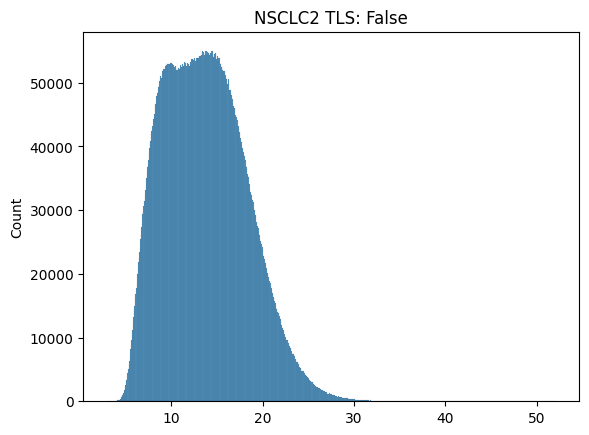

  0%|          | 0/173 [00:00<?, ?it/s]

n_neighboor : 1  - knn_edges:2968  -  mean distances:7.348467500214876   
n_neighboor : 2  - knn_edges:2968  -  mean distances:8.767082929608591   
n_neighboor : 3  - knn_edges:2968  -  mean distances:10.18320803386265   
n_neighboor : 4  - knn_edges:2968  -  mean distances:11.622661329441314   
n_neighboor : 5  - knn_edges:2968  -  mean distances:13.041192702931456   
n_neighboor : 6  - knn_edges:2968  -  mean distances:14.399859459843938   
n_neighboor : 7  - knn_edges:2968  -  mean distances:15.61568541042361   
n_neighboor : 8  - knn_edges:2968  -  mean distances:16.70880346634495   


  1%|          | 1/173 [00:41<1:57:50, 41.11s/it]

n_neighboor : 9  - knn_edges:2968  -  mean distances:17.7273442292375   
n_neighboor : 1  - knn_edges:3490  -  mean distances:7.197316937248214   
n_neighboor : 2  - knn_edges:3490  -  mean distances:8.361517348194164   
n_neighboor : 3  - knn_edges:3490  -  mean distances:9.50898622856466   
n_neighboor : 4  - knn_edges:3490  -  mean distances:10.754661614427796   
n_neighboor : 5  - knn_edges:3490  -  mean distances:12.061731613600697   
n_neighboor : 6  - knn_edges:3490  -  mean distances:13.300249767819631   
n_neighboor : 7  - knn_edges:3490  -  mean distances:14.454833094943433   
n_neighboor : 8  - knn_edges:3490  -  mean distances:15.454040595843061   


  1%|          | 2/173 [01:36<2:20:42, 49.37s/it]

n_neighboor : 9  - knn_edges:3490  -  mean distances:16.408387779487516   
n_neighboor : 1  - knn_edges:3914  -  mean distances:7.031701789695785   
n_neighboor : 2  - knn_edges:3914  -  mean distances:8.031717891316607   
n_neighboor : 3  - knn_edges:3914  -  mean distances:8.968478301317504   
n_neighboor : 4  - knn_edges:3914  -  mean distances:9.992510814054038   
n_neighboor : 5  - knn_edges:3914  -  mean distances:11.16494538852022   
n_neighboor : 6  - knn_edges:3914  -  mean distances:12.38966564604597   
n_neighboor : 7  - knn_edges:3914  -  mean distances:13.484261734850724   
n_neighboor : 8  - knn_edges:3914  -  mean distances:14.44517481717774   


  2%|▏         | 3/173 [02:45<2:46:04, 58.61s/it]

n_neighboor : 9  - knn_edges:3914  -  mean distances:15.300611048449912   
n_neighboor : 1  - knn_edges:4073  -  mean distances:6.796584920889674   
n_neighboor : 2  - knn_edges:4073  -  mean distances:7.784920702379439   
n_neighboor : 3  - knn_edges:4073  -  mean distances:8.725474732541947   
n_neighboor : 4  - knn_edges:4073  -  mean distances:9.70454380788782   
n_neighboor : 5  - knn_edges:4073  -  mean distances:10.808020720217808   
n_neighboor : 6  - knn_edges:4073  -  mean distances:11.97956769222269   
n_neighboor : 7  - knn_edges:4073  -  mean distances:13.044247218789026   
n_neighboor : 8  - knn_edges:4073  -  mean distances:13.976579346076878   


  2%|▏         | 4/173 [04:04<3:07:30, 66.57s/it]

n_neighboor : 9  - knn_edges:4073  -  mean distances:14.820843182709742   
n_neighboor : 1  - knn_edges:3550  -  mean distances:7.743613901285511   
n_neighboor : 2  - knn_edges:3550  -  mean distances:8.87228058325307   
n_neighboor : 3  - knn_edges:3550  -  mean distances:9.996367348106014   
n_neighboor : 4  - knn_edges:3550  -  mean distances:11.140582338784279   
n_neighboor : 5  - knn_edges:3550  -  mean distances:12.402144716848278   
n_neighboor : 6  - knn_edges:3550  -  mean distances:13.690024315511575   
n_neighboor : 7  - knn_edges:3550  -  mean distances:14.932278243704863   
n_neighboor : 8  - knn_edges:3550  -  mean distances:16.03069264755289   


  3%|▎         | 5/173 [05:06<3:01:23, 64.78s/it]

n_neighboor : 9  - knn_edges:3550  -  mean distances:17.012959057371344   
n_neighboor : 1  - knn_edges:3454  -  mean distances:7.056520598631091   
n_neighboor : 2  - knn_edges:3454  -  mean distances:8.224456696091911   
n_neighboor : 3  - knn_edges:3454  -  mean distances:9.356389260627443   
n_neighboor : 4  - knn_edges:3454  -  mean distances:10.5703655580529   
n_neighboor : 5  - knn_edges:3454  -  mean distances:11.900966256458979   
n_neighboor : 6  - knn_edges:3454  -  mean distances:13.144464542543957   
n_neighboor : 7  - knn_edges:3454  -  mean distances:14.266644496393342   
n_neighboor : 8  - knn_edges:3454  -  mean distances:15.271244472940959   


  3%|▎         | 6/173 [06:04<2:54:26, 62.67s/it]

n_neighboor : 9  - knn_edges:3454  -  mean distances:16.194541084263747   
n_neighboor : 1  - knn_edges:3495  -  mean distances:7.046639352424874   
n_neighboor : 2  - knn_edges:3495  -  mean distances:8.211807661861085   
n_neighboor : 3  - knn_edges:3495  -  mean distances:9.407697560411995   
n_neighboor : 4  - knn_edges:3495  -  mean distances:10.704987834235768   
n_neighboor : 5  - knn_edges:3495  -  mean distances:12.063099079337936   
n_neighboor : 6  - knn_edges:3495  -  mean distances:13.294933898388523   
n_neighboor : 7  - knn_edges:3495  -  mean distances:14.414262842047009   
n_neighboor : 8  - knn_edges:3495  -  mean distances:15.41011228509715   


  4%|▍         | 7/173 [07:04<2:50:44, 61.71s/it]

n_neighboor : 9  - knn_edges:3495  -  mean distances:16.34426020551065   
n_neighboor : 1  - knn_edges:3917  -  mean distances:6.8446579180415075   
n_neighboor : 2  - knn_edges:3917  -  mean distances:7.924136944224206   
n_neighboor : 3  - knn_edges:3917  -  mean distances:8.97029107476277   
n_neighboor : 4  - knn_edges:3917  -  mean distances:10.035822493440524   
n_neighboor : 5  - knn_edges:3917  -  mean distances:11.245595130674381   
n_neighboor : 6  - knn_edges:3917  -  mean distances:12.40084213133818   
n_neighboor : 7  - knn_edges:3917  -  mean distances:13.4988960055317   
n_neighboor : 8  - knn_edges:3917  -  mean distances:14.472030906124228   


  5%|▍         | 8/173 [08:20<3:01:44, 66.09s/it]

n_neighboor : 9  - knn_edges:3917  -  mean distances:15.329206407056029   
n_neighboor : 1  - knn_edges:5160  -  mean distances:6.660546229595868   
n_neighboor : 2  - knn_edges:5160  -  mean distances:7.527947401373966   
n_neighboor : 3  - knn_edges:5160  -  mean distances:8.402781847054912   
n_neighboor : 4  - knn_edges:5160  -  mean distances:9.313780806576567   
n_neighboor : 5  - knn_edges:5160  -  mean distances:10.37807543704467   
n_neighboor : 6  - knn_edges:5160  -  mean distances:11.512856923884994   
n_neighboor : 7  - knn_edges:5160  -  mean distances:12.546346012472908   
n_neighboor : 8  - knn_edges:5160  -  mean distances:13.479528048303289   


  5%|▌         | 9/173 [10:25<3:51:15, 84.61s/it]

n_neighboor : 9  - knn_edges:5160  -  mean distances:14.288324170155823   
n_neighboor : 1  - knn_edges:4039  -  mean distances:6.756787554660902   
n_neighboor : 2  - knn_edges:4039  -  mean distances:7.754838600003754   
n_neighboor : 3  - knn_edges:4039  -  mean distances:8.774375464966523   
n_neighboor : 4  - knn_edges:4039  -  mean distances:9.871541170116707   
n_neighboor : 5  - knn_edges:4039  -  mean distances:11.064573147864508   
n_neighboor : 6  - knn_edges:4039  -  mean distances:12.250271385779335   
n_neighboor : 7  - knn_edges:4039  -  mean distances:13.340873385235911   
n_neighboor : 8  - knn_edges:4039  -  mean distances:14.283382037641209   


  6%|▌         | 10/173 [11:39<3:41:13, 81.43s/it]

n_neighboor : 9  - knn_edges:4039  -  mean distances:15.138732878186538   
n_neighboor : 1  - knn_edges:2804  -  mean distances:7.074912641701327   
n_neighboor : 2  - knn_edges:2804  -  mean distances:8.58302299134416   
n_neighboor : 3  - knn_edges:2804  -  mean distances:10.070869426396632   
n_neighboor : 4  - knn_edges:2804  -  mean distances:11.48841128362349   
n_neighboor : 5  - knn_edges:2804  -  mean distances:12.914793029233149   
n_neighboor : 6  - knn_edges:2804  -  mean distances:14.341569722043644   
n_neighboor : 7  - knn_edges:2804  -  mean distances:15.60173425713806   
n_neighboor : 8  - knn_edges:2804  -  mean distances:16.727883765308295   


  6%|▋         | 11/173 [12:15<3:02:25, 67.57s/it]

n_neighboor : 9  - knn_edges:2804  -  mean distances:17.735833587228687   
n_neighboor : 1  - knn_edges:3261  -  mean distances:6.815627544486676   
n_neighboor : 2  - knn_edges:3261  -  mean distances:8.106020000968801   
n_neighboor : 3  - knn_edges:3261  -  mean distances:9.39198627453622   
n_neighboor : 4  - knn_edges:3261  -  mean distances:10.69346992210458   
n_neighboor : 5  - knn_edges:3261  -  mean distances:11.956681519976497   
n_neighboor : 6  - knn_edges:3261  -  mean distances:13.181604608222955   
n_neighboor : 7  - knn_edges:3261  -  mean distances:14.295695074396683   
n_neighboor : 8  - knn_edges:3261  -  mean distances:15.278482011782517   


  7%|▋         | 12/173 [13:05<2:46:38, 62.10s/it]

n_neighboor : 9  - knn_edges:3261  -  mean distances:16.19498127532276   
n_neighboor : 1  - knn_edges:2901  -  mean distances:7.553559909917998   
n_neighboor : 2  - knn_edges:2901  -  mean distances:8.935927408871713   
n_neighboor : 3  - knn_edges:2901  -  mean distances:10.309350523652993   
n_neighboor : 4  - knn_edges:2901  -  mean distances:11.685403799137601   
n_neighboor : 5  - knn_edges:2901  -  mean distances:13.120557435345928   
n_neighboor : 6  - knn_edges:2901  -  mean distances:14.516565161436244   
n_neighboor : 7  - knn_edges:2901  -  mean distances:15.752509709946269   
n_neighboor : 8  - knn_edges:2901  -  mean distances:16.85822442786371   


  8%|▊         | 13/173 [13:44<2:26:52, 55.08s/it]

n_neighboor : 9  - knn_edges:2901  -  mean distances:17.86183075197282   
n_neighboor : 1  - knn_edges:2904  -  mean distances:7.475332821047777   
n_neighboor : 2  - knn_edges:2904  -  mean distances:8.805702449437598   
n_neighboor : 3  - knn_edges:2904  -  mean distances:10.150904749522084   
n_neighboor : 4  - knn_edges:2904  -  mean distances:11.481284057825714   
n_neighboor : 5  - knn_edges:2904  -  mean distances:12.893243922809571   
n_neighboor : 6  - knn_edges:2904  -  mean distances:14.214931866054895   
n_neighboor : 7  - knn_edges:2904  -  mean distances:15.486217395377174   
n_neighboor : 8  - knn_edges:2904  -  mean distances:16.596688412092814   


  8%|▊         | 14/173 [14:23<2:13:30, 50.38s/it]

n_neighboor : 9  - knn_edges:2904  -  mean distances:17.62056170773453   
n_neighboor : 1  - knn_edges:3067  -  mean distances:7.4316142449232245   
n_neighboor : 2  - knn_edges:3067  -  mean distances:8.77369140126457   
n_neighboor : 3  - knn_edges:3067  -  mean distances:10.059380996973179   
n_neighboor : 4  - knn_edges:3067  -  mean distances:11.372233899800701   
n_neighboor : 5  - knn_edges:3067  -  mean distances:12.727792373878085   
n_neighboor : 6  - knn_edges:3067  -  mean distances:14.000576566852326   
n_neighboor : 7  - knn_edges:3067  -  mean distances:15.160381780483748   
n_neighboor : 8  - knn_edges:3067  -  mean distances:16.26633747776548   


  9%|▊         | 15/173 [15:08<2:07:48, 48.53s/it]

n_neighboor : 9  - knn_edges:3067  -  mean distances:17.26408699399782   
n_neighboor : 1  - knn_edges:3487  -  mean distances:6.824480630668375   
n_neighboor : 2  - knn_edges:3487  -  mean distances:7.962891660776971   
n_neighboor : 3  - knn_edges:3487  -  mean distances:9.047335482191212   
n_neighboor : 4  - knn_edges:3487  -  mean distances:10.203466857719583   
n_neighboor : 5  - knn_edges:3487  -  mean distances:11.456129776621438   
n_neighboor : 6  - knn_edges:3487  -  mean distances:12.6843367818426   
n_neighboor : 7  - knn_edges:3487  -  mean distances:13.805102518535191   
n_neighboor : 8  - knn_edges:3487  -  mean distances:14.78542184531273   


  9%|▉         | 16/173 [16:05<2:13:58, 51.20s/it]

n_neighboor : 9  - knn_edges:3487  -  mean distances:15.659047253722305   
n_neighboor : 1  - knn_edges:2229  -  mean distances:6.633394112742405   
n_neighboor : 2  - knn_edges:2229  -  mean distances:7.609528249122084   
n_neighboor : 3  - knn_edges:2229  -  mean distances:8.587987964705512   
n_neighboor : 4  - knn_edges:2229  -  mean distances:9.623124332909514   
n_neighboor : 5  - knn_edges:2229  -  mean distances:10.737190110813303   
n_neighboor : 6  - knn_edges:2229  -  mean distances:11.842311240501909   
n_neighboor : 7  - knn_edges:2229  -  mean distances:12.906280005686103   
n_neighboor : 8  - knn_edges:2229  -  mean distances:13.78223252547944   


 10%|▉         | 17/173 [16:28<1:50:41, 42.58s/it]

n_neighboor : 9  - knn_edges:2229  -  mean distances:14.626739442018444   
n_neighboor : 1  - knn_edges:2571  -  mean distances:7.237703189059322   
n_neighboor : 2  - knn_edges:2571  -  mean distances:8.703226937530234   
n_neighboor : 3  - knn_edges:2571  -  mean distances:10.112065549899711   
n_neighboor : 4  - knn_edges:2571  -  mean distances:11.558834644162935   
n_neighboor : 5  - knn_edges:2571  -  mean distances:13.00406407706164   
n_neighboor : 6  - knn_edges:2571  -  mean distances:14.362014194505514   
n_neighboor : 7  - knn_edges:2571  -  mean distances:15.587014750248866   
n_neighboor : 8  - knn_edges:2571  -  mean distances:16.724733499969403   


 10%|█         | 18/173 [16:58<1:40:54, 39.06s/it]

n_neighboor : 9  - knn_edges:2571  -  mean distances:17.79273210908986   
n_neighboor : 1  - knn_edges:4360  -  mean distances:6.701323255753623   
n_neighboor : 2  - knn_edges:4360  -  mean distances:7.625760353966266   
n_neighboor : 3  - knn_edges:4360  -  mean distances:8.55563506188226   
n_neighboor : 4  - knn_edges:4360  -  mean distances:9.534782098023685   
n_neighboor : 5  - knn_edges:4360  -  mean distances:10.647687371128873   
n_neighboor : 6  - knn_edges:4360  -  mean distances:11.803261757176378   
n_neighboor : 7  - knn_edges:4360  -  mean distances:12.840265753705923   
n_neighboor : 8  - knn_edges:4360  -  mean distances:13.757430959358521   


 11%|█         | 19/173 [18:34<2:23:39, 55.97s/it]

n_neighboor : 9  - knn_edges:4360  -  mean distances:14.567745716498719   
n_neighboor : 1  - knn_edges:3858  -  mean distances:6.935029522264061   
n_neighboor : 2  - knn_edges:3858  -  mean distances:8.101501223882131   
n_neighboor : 3  - knn_edges:3858  -  mean distances:9.271238126114708   
n_neighboor : 4  - knn_edges:3858  -  mean distances:10.494762215980094   
n_neighboor : 5  - knn_edges:3858  -  mean distances:11.798874690651456   
n_neighboor : 6  - knn_edges:3858  -  mean distances:13.028608309981875   
n_neighboor : 7  - knn_edges:3858  -  mean distances:14.114190429834455   
n_neighboor : 8  - knn_edges:3858  -  mean distances:15.09670508199373   


 12%|█▏        | 20/173 [19:46<2:35:27, 60.96s/it]

n_neighboor : 9  - knn_edges:3858  -  mean distances:15.999875642134567   
n_neighboor : 1  - knn_edges:4527  -  mean distances:6.680166806950422   
n_neighboor : 2  - knn_edges:4527  -  mean distances:7.707169815481005   
n_neighboor : 3  - knn_edges:4527  -  mean distances:8.716478794897919   
n_neighboor : 4  - knn_edges:4527  -  mean distances:9.71682159186313   
n_neighboor : 5  - knn_edges:4527  -  mean distances:10.87120774139593   
n_neighboor : 6  - knn_edges:4527  -  mean distances:12.031052338743056   
n_neighboor : 7  - knn_edges:4527  -  mean distances:13.087476722992898   
n_neighboor : 8  - knn_edges:4527  -  mean distances:13.998584802676284   


 12%|█▏        | 21/173 [21:28<3:05:00, 73.03s/it]

n_neighboor : 9  - knn_edges:4527  -  mean distances:14.809471428992111   
n_neighboor : 1  - knn_edges:3647  -  mean distances:6.994991816401231   
n_neighboor : 2  - knn_edges:3647  -  mean distances:8.10409172877378   
n_neighboor : 3  - knn_edges:3647  -  mean distances:9.20785155654118   
n_neighboor : 4  - knn_edges:3647  -  mean distances:10.385274308844826   
n_neighboor : 5  - knn_edges:3647  -  mean distances:11.644401499960113   
n_neighboor : 6  - knn_edges:3647  -  mean distances:12.867986437246245   
n_neighboor : 7  - knn_edges:3647  -  mean distances:13.96759775554016   
n_neighboor : 8  - knn_edges:3647  -  mean distances:14.952382796756536   


 13%|█▎        | 22/173 [22:32<2:57:25, 70.50s/it]

n_neighboor : 9  - knn_edges:3647  -  mean distances:15.84508805359903   
n_neighboor : 1  - knn_edges:4191  -  mean distances:6.885914090336105   
n_neighboor : 2  - knn_edges:4191  -  mean distances:7.931354522805853   
n_neighboor : 3  - knn_edges:4191  -  mean distances:8.938888333943378   
n_neighboor : 4  - knn_edges:4191  -  mean distances:9.983180459405606   
n_neighboor : 5  - knn_edges:4191  -  mean distances:11.152135475284886   
n_neighboor : 6  - knn_edges:4191  -  mean distances:12.333041301587652   
n_neighboor : 7  - knn_edges:4191  -  mean distances:13.422087651083192   
n_neighboor : 8  - knn_edges:4191  -  mean distances:14.366053756311503   


 13%|█▎        | 23/173 [23:59<3:08:33, 75.42s/it]

n_neighboor : 9  - knn_edges:4191  -  mean distances:15.249133166552426   
n_neighboor : 1  - knn_edges:2944  -  mean distances:7.666808607581119   
n_neighboor : 2  - knn_edges:2944  -  mean distances:9.000928927949838   
n_neighboor : 3  - knn_edges:2944  -  mean distances:10.288250272540823   
n_neighboor : 4  - knn_edges:2944  -  mean distances:11.58283098342517   
n_neighboor : 5  - knn_edges:2944  -  mean distances:12.986661518595133   
n_neighboor : 6  - knn_edges:2944  -  mean distances:14.334409029645833   
n_neighboor : 7  - knn_edges:2944  -  mean distances:15.582850717232661   
n_neighboor : 8  - knn_edges:2944  -  mean distances:16.68365497008026   


 14%|█▍        | 24/173 [24:41<2:42:20, 65.38s/it]

n_neighboor : 9  - knn_edges:2944  -  mean distances:17.728054147832708   
n_neighboor : 1  - knn_edges:4426  -  mean distances:6.658959042669195   
n_neighboor : 2  - knn_edges:4426  -  mean distances:7.593871418523393   
n_neighboor : 3  - knn_edges:4426  -  mean distances:8.526443316999584   
n_neighboor : 4  - knn_edges:4426  -  mean distances:9.524118921387485   
n_neighboor : 5  - knn_edges:4426  -  mean distances:10.657418483736558   
n_neighboor : 6  - knn_edges:4426  -  mean distances:11.799197750425545   
n_neighboor : 7  - knn_edges:4426  -  mean distances:12.856648699086143   
n_neighboor : 8  - knn_edges:4426  -  mean distances:13.77283218496323   


 14%|█▍        | 25/173 [26:19<3:05:23, 75.16s/it]

n_neighboor : 9  - knn_edges:4426  -  mean distances:14.579043238685319   
n_neighboor : 1  - knn_edges:3430  -  mean distances:7.410476686460486   
n_neighboor : 2  - knn_edges:3430  -  mean distances:8.595806012607966   
n_neighboor : 3  - knn_edges:3430  -  mean distances:9.717787299400388   
n_neighboor : 4  - knn_edges:3430  -  mean distances:10.935784628368301   
n_neighboor : 5  - knn_edges:3430  -  mean distances:12.229983477712153   
n_neighboor : 6  - knn_edges:3430  -  mean distances:13.529173914644984   
n_neighboor : 7  - knn_edges:3430  -  mean distances:14.71975579681686   
n_neighboor : 8  - knn_edges:3430  -  mean distances:15.790821453500879   


 15%|█▌        | 26/173 [27:16<2:50:52, 69.75s/it]

n_neighboor : 9  - knn_edges:3430  -  mean distances:16.78082168725143   
n_neighboor : 1  - knn_edges:2132  -  mean distances:6.757409727357092   
n_neighboor : 2  - knn_edges:2132  -  mean distances:8.05076806874096   
n_neighboor : 3  - knn_edges:2132  -  mean distances:9.377356334131768   
n_neighboor : 4  - knn_edges:2132  -  mean distances:10.73192969793428   
n_neighboor : 5  - knn_edges:2132  -  mean distances:11.965857320947594   
n_neighboor : 6  - knn_edges:2132  -  mean distances:13.221642486294769   
n_neighboor : 7  - knn_edges:2132  -  mean distances:14.351129243997187   
n_neighboor : 8  - knn_edges:2132  -  mean distances:15.367988595678668   


 16%|█▌        | 27/173 [27:38<2:14:33, 55.30s/it]

n_neighboor : 9  - knn_edges:2132  -  mean distances:16.351075521644784   
n_neighboor : 1  - knn_edges:3621  -  mean distances:7.008253905636561   
n_neighboor : 2  - knn_edges:3621  -  mean distances:8.166273035619106   
n_neighboor : 3  - knn_edges:3621  -  mean distances:9.311377353626364   
n_neighboor : 4  - knn_edges:3621  -  mean distances:10.491829557625147   
n_neighboor : 5  - knn_edges:3621  -  mean distances:11.759299418586627   
n_neighboor : 6  - knn_edges:3621  -  mean distances:13.028956288857632   
n_neighboor : 7  - knn_edges:3621  -  mean distances:14.168472689213953   
n_neighboor : 8  - knn_edges:3621  -  mean distances:15.171167089230506   


 16%|█▌        | 28/173 [28:43<2:20:42, 58.22s/it]

n_neighboor : 9  - knn_edges:3621  -  mean distances:16.08712731818073   
n_neighboor : 1  - knn_edges:3978  -  mean distances:7.05495375734016   
n_neighboor : 2  - knn_edges:3978  -  mean distances:8.154977653150493   
n_neighboor : 3  - knn_edges:3978  -  mean distances:9.17961601958188   
n_neighboor : 4  - knn_edges:3978  -  mean distances:10.26004518314342   
n_neighboor : 5  - knn_edges:3978  -  mean distances:11.453780315922357   
n_neighboor : 6  - knn_edges:3978  -  mean distances:12.645618570646471   
n_neighboor : 7  - knn_edges:3978  -  mean distances:13.776635221432288   
n_neighboor : 8  - knn_edges:3978  -  mean distances:14.732123515959405   


 17%|█▋        | 29/173 [30:00<2:33:18, 63.88s/it]

n_neighboor : 9  - knn_edges:3978  -  mean distances:15.615105106329949   
n_neighboor : 1  - knn_edges:2955  -  mean distances:7.039810840712403   
n_neighboor : 2  - knn_edges:2955  -  mean distances:8.284234254086842   
n_neighboor : 3  - knn_edges:2955  -  mean distances:9.506064238722004   
n_neighboor : 4  - knn_edges:2955  -  mean distances:10.809536855852164   
n_neighboor : 5  - knn_edges:2955  -  mean distances:12.11157333225895   
n_neighboor : 6  - knn_edges:2955  -  mean distances:13.394115890579297   
n_neighboor : 7  - knn_edges:2955  -  mean distances:14.554230459938363   
n_neighboor : 8  - knn_edges:2955  -  mean distances:15.602544315532784   


 17%|█▋        | 30/173 [30:42<2:16:47, 57.40s/it]

n_neighboor : 9  - knn_edges:2955  -  mean distances:16.559404203609034   
n_neighboor : 1  - knn_edges:1736  -  mean distances:7.1934780722280784   
n_neighboor : 2  - knn_edges:1736  -  mean distances:8.562807279650116   
n_neighboor : 3  - knn_edges:1736  -  mean distances:10.048617905989456   
n_neighboor : 4  - knn_edges:1736  -  mean distances:11.56841095271449   
n_neighboor : 5  - knn_edges:1736  -  mean distances:13.059299444172229   
n_neighboor : 6  - knn_edges:1736  -  mean distances:14.470657905560799   
n_neighboor : 7  - knn_edges:1736  -  mean distances:15.707343830028274   
n_neighboor : 8  - knn_edges:1736  -  mean distances:16.846006417467716   


 18%|█▊        | 31/173 [30:56<1:45:03, 44.39s/it]

n_neighboor : 9  - knn_edges:1736  -  mean distances:17.92581217094214   
n_neighboor : 1  - knn_edges:3694  -  mean distances:7.226207411336339   
n_neighboor : 2  - knn_edges:3694  -  mean distances:8.40363958961425   
n_neighboor : 3  - knn_edges:3694  -  mean distances:9.508186969946088   
n_neighboor : 4  - knn_edges:3694  -  mean distances:10.733495022324897   
n_neighboor : 5  - knn_edges:3694  -  mean distances:12.063743005518484   
n_neighboor : 6  - knn_edges:3694  -  mean distances:13.33859792247387   
n_neighboor : 7  - knn_edges:3694  -  mean distances:14.501426571942304   
n_neighboor : 8  - knn_edges:3694  -  mean distances:15.524879752867303   


 18%|█▊        | 32/173 [32:04<2:00:49, 51.42s/it]

n_neighboor : 9  - knn_edges:3694  -  mean distances:16.49413049787888   
n_neighboor : 1  - knn_edges:2890  -  mean distances:7.269455656646209   
n_neighboor : 2  - knn_edges:2890  -  mean distances:8.657823296781638   
n_neighboor : 3  - knn_edges:2890  -  mean distances:10.00195484892584   
n_neighboor : 4  - knn_edges:2890  -  mean distances:11.408827269622517   
n_neighboor : 5  - knn_edges:2890  -  mean distances:12.815883453729674   
n_neighboor : 6  - knn_edges:2890  -  mean distances:14.145954349284258   
n_neighboor : 7  - knn_edges:2890  -  mean distances:15.359630096682519   
n_neighboor : 8  - knn_edges:2890  -  mean distances:16.481194879338403   


 19%|█▉        | 33/173 [32:44<1:52:20, 48.15s/it]

n_neighboor : 9  - knn_edges:2890  -  mean distances:17.505621688428555   
n_neighboor : 1  - knn_edges:4048  -  mean distances:6.800926981070248   
n_neighboor : 2  - knn_edges:4048  -  mean distances:7.893153440022336   
n_neighboor : 3  - knn_edges:4048  -  mean distances:8.983029865605879   
n_neighboor : 4  - knn_edges:4048  -  mean distances:10.179255495274283   
n_neighboor : 5  - knn_edges:4048  -  mean distances:11.381047774659908   
n_neighboor : 6  - knn_edges:4048  -  mean distances:12.560091435054126   
n_neighboor : 7  - knn_edges:4048  -  mean distances:13.642482228765122   
n_neighboor : 8  - knn_edges:4048  -  mean distances:14.60304033490137   


 20%|█▉        | 34/173 [34:05<2:14:10, 57.92s/it]

n_neighboor : 9  - knn_edges:4048  -  mean distances:15.505839093303312   
n_neighboor : 1  - knn_edges:3943  -  mean distances:6.791822596013299   
n_neighboor : 2  - knn_edges:3943  -  mean distances:7.789883124210953   
n_neighboor : 3  - knn_edges:3943  -  mean distances:8.781285114448139   
n_neighboor : 4  - knn_edges:3943  -  mean distances:9.834110726796741   
n_neighboor : 5  - knn_edges:3943  -  mean distances:11.032535118945736   
n_neighboor : 6  - knn_edges:3943  -  mean distances:12.240724402691585   
n_neighboor : 7  - knn_edges:3943  -  mean distances:13.33369137449895   
n_neighboor : 8  - knn_edges:3943  -  mean distances:14.259679947324695   


 20%|██        | 35/173 [35:23<2:26:43, 63.79s/it]

n_neighboor : 9  - knn_edges:3943  -  mean distances:15.108848494926303   
n_neighboor : 1  - knn_edges:4254  -  mean distances:6.87801871558877   
n_neighboor : 2  - knn_edges:4254  -  mean distances:7.921344546822639   
n_neighboor : 3  - knn_edges:4254  -  mean distances:8.966376096546808   
n_neighboor : 4  - knn_edges:4254  -  mean distances:10.059825794033124   
n_neighboor : 5  - knn_edges:4254  -  mean distances:11.23349222132945   
n_neighboor : 6  - knn_edges:4254  -  mean distances:12.447392251294136   
n_neighboor : 7  - knn_edges:4254  -  mean distances:13.496383749555235   
n_neighboor : 8  - knn_edges:4254  -  mean distances:14.439661204276275   


 21%|██        | 36/173 [36:51<2:42:23, 71.12s/it]

n_neighboor : 9  - knn_edges:4254  -  mean distances:15.326087481299298   
n_neighboor : 1  - knn_edges:3491  -  mean distances:6.852284381226705   
n_neighboor : 2  - knn_edges:3491  -  mean distances:7.977312415607974   
n_neighboor : 3  - knn_edges:3491  -  mean distances:9.151925349380539   
n_neighboor : 4  - knn_edges:3491  -  mean distances:10.331107462691936   
n_neighboor : 5  - knn_edges:3491  -  mean distances:11.579093624632762   
n_neighboor : 6  - knn_edges:3491  -  mean distances:12.778392842506575   
n_neighboor : 7  - knn_edges:3491  -  mean distances:13.885677426011785   
n_neighboor : 8  - knn_edges:3491  -  mean distances:14.832664699992476   


 21%|██▏       | 37/173 [37:49<2:32:32, 67.29s/it]

n_neighboor : 9  - knn_edges:3491  -  mean distances:15.726787063272583   
n_neighboor : 1  - knn_edges:4880  -  mean distances:6.641317577221816   
n_neighboor : 2  - knn_edges:4880  -  mean distances:7.4826205252469835   
n_neighboor : 3  - knn_edges:4880  -  mean distances:8.348383969060915   
n_neighboor : 4  - knn_edges:4880  -  mean distances:9.257189474860445   
n_neighboor : 5  - knn_edges:4880  -  mean distances:10.331134783676868   
n_neighboor : 6  - knn_edges:4880  -  mean distances:11.443409907441747   
n_neighboor : 7  - knn_edges:4880  -  mean distances:12.461831014148254   
n_neighboor : 8  - knn_edges:4880  -  mean distances:13.346050604234803   


 22%|██▏       | 38/173 [39:44<3:03:29, 81.55s/it]

n_neighboor : 9  - knn_edges:4880  -  mean distances:14.122230705616715   
n_neighboor : 1  - knn_edges:3258  -  mean distances:7.61365095272087   
n_neighboor : 2  - knn_edges:3258  -  mean distances:8.753413482732729   
n_neighboor : 3  - knn_edges:3258  -  mean distances:9.8629542577903   
n_neighboor : 4  - knn_edges:3258  -  mean distances:11.034220630283276   
n_neighboor : 5  - knn_edges:3258  -  mean distances:12.298345290486202   
n_neighboor : 6  - knn_edges:3258  -  mean distances:13.611087416854147   
n_neighboor : 7  - knn_edges:3258  -  mean distances:14.792823731015893   
n_neighboor : 8  - knn_edges:3258  -  mean distances:15.833045221695384   


 23%|██▎       | 39/173 [40:34<2:40:56, 72.06s/it]

n_neighboor : 9  - knn_edges:3258  -  mean distances:16.798599405348636   
n_neighboor : 1  - knn_edges:2556  -  mean distances:7.279592849826108   
n_neighboor : 2  - knn_edges:2556  -  mean distances:8.719137150548994   
n_neighboor : 3  - knn_edges:2556  -  mean distances:10.138774586357602   
n_neighboor : 4  - knn_edges:2556  -  mean distances:11.582064184015591   
n_neighboor : 5  - knn_edges:2556  -  mean distances:13.016950428236505   
n_neighboor : 6  - knn_edges:2556  -  mean distances:14.37692878028204   
n_neighboor : 7  - knn_edges:2556  -  mean distances:15.647762563802868   
n_neighboor : 8  - knn_edges:2556  -  mean distances:16.816735997899478   


 23%|██▎       | 40/173 [41:05<2:12:19, 59.70s/it]

n_neighboor : 9  - knn_edges:2556  -  mean distances:17.829078757597454   
n_neighboor : 1  - knn_edges:2855  -  mean distances:8.08330240726347   
n_neighboor : 2  - knn_edges:2855  -  mean distances:9.468577669977094   
n_neighboor : 3  - knn_edges:2855  -  mean distances:10.84558393830114   
n_neighboor : 4  - knn_edges:2855  -  mean distances:12.302859715820524   
n_neighboor : 5  - knn_edges:2855  -  mean distances:13.73435927728008   
n_neighboor : 6  - knn_edges:2855  -  mean distances:15.104446548206292   
n_neighboor : 7  - knn_edges:2855  -  mean distances:16.369458318266663   
n_neighboor : 8  - knn_edges:2855  -  mean distances:17.512707245416276   


 24%|██▎       | 41/173 [41:44<1:57:58, 53.62s/it]

n_neighboor : 9  - knn_edges:2855  -  mean distances:18.556827404974854   
n_neighboor : 1  - knn_edges:3731  -  mean distances:6.7729141115277045   
n_neighboor : 2  - knn_edges:3731  -  mean distances:7.964284386544293   
n_neighboor : 3  - knn_edges:3731  -  mean distances:9.225164774821483   
n_neighboor : 4  - knn_edges:3731  -  mean distances:10.498406283323977   
n_neighboor : 5  - knn_edges:3731  -  mean distances:11.778536633825109   
n_neighboor : 6  - knn_edges:3731  -  mean distances:12.990893518767693   
n_neighboor : 7  - knn_edges:3731  -  mean distances:14.102881433259517   
n_neighboor : 8  - knn_edges:3731  -  mean distances:15.097214726441967   


 24%|██▍       | 42/173 [42:52<2:06:35, 57.98s/it]

n_neighboor : 9  - knn_edges:3731  -  mean distances:16.007118292688403   
n_neighboor : 1  - knn_edges:3000  -  mean distances:7.0085847862698465   
n_neighboor : 2  - knn_edges:3000  -  mean distances:8.245130552105717   
n_neighboor : 3  - knn_edges:3000  -  mean distances:9.439791587262182   
n_neighboor : 4  - knn_edges:3000  -  mean distances:10.693223874287881   
n_neighboor : 5  - knn_edges:3000  -  mean distances:11.978453506161285   
n_neighboor : 6  - knn_edges:3000  -  mean distances:13.229412023785132   
n_neighboor : 7  - knn_edges:3000  -  mean distances:14.395515767357681   
n_neighboor : 8  - knn_edges:3000  -  mean distances:15.389341440015196   


 25%|██▍       | 43/173 [43:36<1:55:58, 53.53s/it]

n_neighboor : 9  - knn_edges:3000  -  mean distances:16.340804108647667   
n_neighboor : 1  - knn_edges:3389  -  mean distances:7.099020634843681   
n_neighboor : 2  - knn_edges:3389  -  mean distances:8.23350226121616   
n_neighboor : 3  - knn_edges:3389  -  mean distances:9.29332838470029   
n_neighboor : 4  - knn_edges:3389  -  mean distances:10.412331038957674   
n_neighboor : 5  - knn_edges:3389  -  mean distances:11.664587427325392   
n_neighboor : 6  - knn_edges:3389  -  mean distances:12.896877230838891   
n_neighboor : 7  - knn_edges:3389  -  mean distances:14.029344345875497   
n_neighboor : 8  - knn_edges:3389  -  mean distances:15.046092013703435   


 25%|██▌       | 44/173 [44:32<1:56:56, 54.39s/it]

n_neighboor : 9  - knn_edges:3389  -  mean distances:15.972930790793844   
n_neighboor : 1  - knn_edges:2453  -  mean distances:7.057216983510915   
n_neighboor : 2  - knn_edges:2453  -  mean distances:8.20027439943193   
n_neighboor : 3  - knn_edges:2453  -  mean distances:9.41768237948159   
n_neighboor : 4  - knn_edges:2453  -  mean distances:10.687116110636309   
n_neighboor : 5  - knn_edges:2453  -  mean distances:11.966843457861144   
n_neighboor : 6  - knn_edges:2453  -  mean distances:13.254479656930254   
n_neighboor : 7  - knn_edges:2453  -  mean distances:14.386143764328137   
n_neighboor : 8  - knn_edges:2453  -  mean distances:15.421049757433115   


 26%|██▌       | 45/173 [45:01<1:39:50, 46.80s/it]

n_neighboor : 9  - knn_edges:2453  -  mean distances:16.317264669667896   
n_neighboor : 1  - knn_edges:3151  -  mean distances:7.629018426027954   
n_neighboor : 2  - knn_edges:3151  -  mean distances:8.856795106599417   
n_neighboor : 3  - knn_edges:3151  -  mean distances:10.085648899937295   
n_neighboor : 4  - knn_edges:3151  -  mean distances:11.347824195466439   
n_neighboor : 5  - knn_edges:3151  -  mean distances:12.664885645345267   
n_neighboor : 6  - knn_edges:3151  -  mean distances:13.987324500472297   
n_neighboor : 7  - knn_edges:3151  -  mean distances:15.21374971622763   
n_neighboor : 8  - knn_edges:3151  -  mean distances:16.32047966210575   


 27%|██▋       | 46/173 [45:50<1:40:14, 47.36s/it]

n_neighboor : 9  - knn_edges:3151  -  mean distances:17.312246311213837   
n_neighboor : 1  - knn_edges:3410  -  mean distances:7.169034298772349   
n_neighboor : 2  - knn_edges:3410  -  mean distances:8.288816947792943   
n_neighboor : 3  - knn_edges:3410  -  mean distances:9.443611369068313   
n_neighboor : 4  - knn_edges:3410  -  mean distances:10.628879729239173   
n_neighboor : 5  - knn_edges:3410  -  mean distances:11.882124852251664   
n_neighboor : 6  - knn_edges:3410  -  mean distances:13.117201845538146   
n_neighboor : 7  - knn_edges:3410  -  mean distances:14.271314451314526   
n_neighboor : 8  - knn_edges:3410  -  mean distances:15.273870353703607   


 27%|██▋       | 47/173 [46:46<1:45:23, 50.18s/it]

n_neighboor : 9  - knn_edges:3410  -  mean distances:16.241328550134863   
n_neighboor : 1  - knn_edges:3964  -  mean distances:6.885584028435676   
n_neighboor : 2  - knn_edges:3964  -  mean distances:7.894614306582912   
n_neighboor : 3  - knn_edges:3964  -  mean distances:8.916005946876684   
n_neighboor : 4  - knn_edges:3964  -  mean distances:9.970704113516586   
n_neighboor : 5  - knn_edges:3964  -  mean distances:11.158598452507647   
n_neighboor : 6  - knn_edges:3964  -  mean distances:12.346372616600451   
n_neighboor : 7  - knn_edges:3964  -  mean distances:13.45477704523367   
n_neighboor : 8  - knn_edges:3964  -  mean distances:14.403810640937234   


 28%|██▊       | 48/173 [48:03<2:00:42, 57.94s/it]

n_neighboor : 9  - knn_edges:3964  -  mean distances:15.287891386914916   
n_neighboor : 1  - knn_edges:3665  -  mean distances:6.910820183906932   
n_neighboor : 2  - knn_edges:3665  -  mean distances:7.99755916896731   
n_neighboor : 3  - knn_edges:3665  -  mean distances:9.122019507369828   
n_neighboor : 4  - knn_edges:3665  -  mean distances:10.263559814198107   
n_neighboor : 5  - knn_edges:3665  -  mean distances:11.488411661502068   
n_neighboor : 6  - knn_edges:3665  -  mean distances:12.71075357376442   
n_neighboor : 7  - knn_edges:3665  -  mean distances:13.789892165956743   
n_neighboor : 8  - knn_edges:3665  -  mean distances:14.767172305204019   


 28%|██▊       | 49/173 [49:07<2:03:45, 59.89s/it]

n_neighboor : 9  - knn_edges:3665  -  mean distances:15.664802471270114   
n_neighboor : 1  - knn_edges:3531  -  mean distances:6.660227963838705   
n_neighboor : 2  - knn_edges:3531  -  mean distances:7.856166043925963   
n_neighboor : 3  - knn_edges:3531  -  mean distances:9.132940317518155   
n_neighboor : 4  - knn_edges:3531  -  mean distances:10.466127321902317   
n_neighboor : 5  - knn_edges:3531  -  mean distances:11.731550374675631   
n_neighboor : 6  - knn_edges:3531  -  mean distances:12.961142722357257   
n_neighboor : 7  - knn_edges:3531  -  mean distances:14.031568232069304   
n_neighboor : 8  - knn_edges:3531  -  mean distances:14.986836622344939   


 29%|██▉       | 50/173 [50:07<2:03:08, 60.07s/it]

n_neighboor : 9  - knn_edges:3531  -  mean distances:15.897019608392473   
n_neighboor : 1  - knn_edges:4690  -  mean distances:6.712088291740978   
n_neighboor : 2  - knn_edges:4690  -  mean distances:7.581276102945447   
n_neighboor : 3  - knn_edges:4690  -  mean distances:8.451518759324419   
n_neighboor : 4  - knn_edges:4690  -  mean distances:9.378397713366928   
n_neighboor : 5  - knn_edges:4690  -  mean distances:10.464724780064175   
n_neighboor : 6  - knn_edges:4690  -  mean distances:11.625559884660403   
n_neighboor : 7  - knn_edges:4690  -  mean distances:12.698111316895316   
n_neighboor : 8  - knn_edges:4690  -  mean distances:13.585177926884722   


 29%|██▉       | 51/173 [51:54<2:30:12, 73.87s/it]

n_neighboor : 9  - knn_edges:4690  -  mean distances:14.388871769631   
n_neighboor : 1  - knn_edges:4194  -  mean distances:6.894188256903593   
n_neighboor : 2  - knn_edges:4194  -  mean distances:7.891955652975918   
n_neighboor : 3  - knn_edges:4194  -  mean distances:8.89173377290016   
n_neighboor : 4  - knn_edges:4194  -  mean distances:9.944188395942756   
n_neighboor : 5  - knn_edges:4194  -  mean distances:11.101340324035979   
n_neighboor : 6  - knn_edges:4194  -  mean distances:12.26613062174833   
n_neighboor : 7  - knn_edges:4194  -  mean distances:13.340844890365007   
n_neighboor : 8  - knn_edges:4194  -  mean distances:14.286806652294059   


 30%|███       | 52/173 [53:17<2:34:54, 76.81s/it]

n_neighboor : 9  - knn_edges:4194  -  mean distances:15.129207035160825   
n_neighboor : 1  - knn_edges:3456  -  mean distances:7.482107770188936   
n_neighboor : 2  - knn_edges:3456  -  mean distances:8.69808946708677   
n_neighboor : 3  - knn_edges:3456  -  mean distances:9.928761413263604   
n_neighboor : 4  - knn_edges:3456  -  mean distances:11.213445495178126   
n_neighboor : 5  - knn_edges:3456  -  mean distances:12.518839053820942   
n_neighboor : 6  - knn_edges:3456  -  mean distances:13.823521512063603   
n_neighboor : 7  - knn_edges:3456  -  mean distances:15.01909936029797   
n_neighboor : 8  - knn_edges:3456  -  mean distances:16.088090974837208   


 31%|███       | 53/173 [54:14<2:21:37, 70.81s/it]

n_neighboor : 9  - knn_edges:3456  -  mean distances:17.090173990099153   
n_neighboor : 1  - knn_edges:3677  -  mean distances:7.074074417287017   
n_neighboor : 2  - knn_edges:3677  -  mean distances:8.189833354867677   
n_neighboor : 3  - knn_edges:3677  -  mean distances:9.312197680315375   
n_neighboor : 4  - knn_edges:3677  -  mean distances:10.46063407527949   
n_neighboor : 5  - knn_edges:3677  -  mean distances:11.672066900894528   
n_neighboor : 6  - knn_edges:3677  -  mean distances:12.901227246435873   
n_neighboor : 7  - knn_edges:3677  -  mean distances:14.036028495245919   
n_neighboor : 8  - knn_edges:3677  -  mean distances:15.033032034229121   


 31%|███       | 54/173 [55:20<2:17:18, 69.23s/it]

n_neighboor : 9  - knn_edges:3677  -  mean distances:15.934720839663912   
n_neighboor : 1  - knn_edges:3969  -  mean distances:6.798250417156393   
n_neighboor : 2  - knn_edges:3969  -  mean distances:7.994851084060273   
n_neighboor : 3  - knn_edges:3969  -  mean distances:9.149417069399156   
n_neighboor : 4  - knn_edges:3969  -  mean distances:10.337238913042818   
n_neighboor : 5  - knn_edges:3969  -  mean distances:11.552621310956312   
n_neighboor : 6  - knn_edges:3969  -  mean distances:12.732768418049327   
n_neighboor : 7  - knn_edges:3969  -  mean distances:13.808444818719371   
n_neighboor : 8  - knn_edges:3969  -  mean distances:14.742490775967022   


 32%|███▏      | 55/173 [56:36<2:20:33, 71.47s/it]

n_neighboor : 9  - knn_edges:3969  -  mean distances:15.641083518611842   
n_neighboor : 1  - knn_edges:3617  -  mean distances:6.800488418187073   
n_neighboor : 2  - knn_edges:3617  -  mean distances:8.057117572236358   
n_neighboor : 3  - knn_edges:3617  -  mean distances:9.274854688967368   
n_neighboor : 4  - knn_edges:3617  -  mean distances:10.515247102706342   
n_neighboor : 5  - knn_edges:3617  -  mean distances:11.774968433745382   
n_neighboor : 6  - knn_edges:3617  -  mean distances:13.047130774448862   
n_neighboor : 7  - knn_edges:3617  -  mean distances:14.172753728132848   
n_neighboor : 8  - knn_edges:3617  -  mean distances:15.160542630130882   


 32%|███▏      | 56/173 [57:40<2:14:40, 69.06s/it]

n_neighboor : 9  - knn_edges:3617  -  mean distances:16.05759853816847   
n_neighboor : 1  - knn_edges:2213  -  mean distances:7.66990060045515   
n_neighboor : 2  - knn_edges:2213  -  mean distances:8.95873700825285   
n_neighboor : 3  - knn_edges:2213  -  mean distances:10.155397747251373   
n_neighboor : 4  - knn_edges:2213  -  mean distances:11.449694676752465   
n_neighboor : 5  - knn_edges:2213  -  mean distances:12.811746401937153   
n_neighboor : 6  - knn_edges:2213  -  mean distances:14.090656872097417   
n_neighboor : 7  - knn_edges:2213  -  mean distances:15.317916485611105   
n_neighboor : 8  - knn_edges:2213  -  mean distances:16.488318336843758   


 33%|███▎      | 57/173 [58:03<1:46:59, 55.34s/it]

n_neighboor : 9  - knn_edges:2213  -  mean distances:17.460803246431748   
n_neighboor : 1  - knn_edges:3118  -  mean distances:7.145993573658827   
n_neighboor : 2  - knn_edges:3118  -  mean distances:8.47849888974059   
n_neighboor : 3  - knn_edges:3118  -  mean distances:9.801522298624414   
n_neighboor : 4  - knn_edges:3118  -  mean distances:11.175882417842073   
n_neighboor : 5  - knn_edges:3118  -  mean distances:12.528046715517442   
n_neighboor : 6  - knn_edges:3118  -  mean distances:13.821865720247684   
n_neighboor : 7  - knn_edges:3118  -  mean distances:15.032009246529569   
n_neighboor : 8  - knn_edges:3118  -  mean distances:16.093410088721015   


 34%|███▎      | 58/173 [58:51<1:41:55, 53.18s/it]

n_neighboor : 9  - knn_edges:3118  -  mean distances:17.108004118798497   
n_neighboor : 1  - knn_edges:3099  -  mean distances:7.0354765396681795   
n_neighboor : 2  - knn_edges:3099  -  mean distances:8.485932047178032   
n_neighboor : 3  - knn_edges:3099  -  mean distances:9.888913081783828   
n_neighboor : 4  - knn_edges:3099  -  mean distances:11.293860938852426   
n_neighboor : 5  - knn_edges:3099  -  mean distances:12.666420769016879   
n_neighboor : 6  - knn_edges:3099  -  mean distances:13.936327145191452   
n_neighboor : 7  - knn_edges:3099  -  mean distances:15.091408127087542   
n_neighboor : 8  - knn_edges:3099  -  mean distances:16.1535999999167   


 34%|███▍      | 59/173 [59:38<1:37:34, 51.35s/it]

n_neighboor : 9  - knn_edges:3099  -  mean distances:17.146438413876872   
n_neighboor : 1  - knn_edges:3116  -  mean distances:7.086721265040604   
n_neighboor : 2  - knn_edges:3116  -  mean distances:8.172992794239576   
n_neighboor : 3  - knn_edges:3116  -  mean distances:9.284622045078734   
n_neighboor : 4  - knn_edges:3116  -  mean distances:10.485467228362923   
n_neighboor : 5  - knn_edges:3116  -  mean distances:11.75568107990996   
n_neighboor : 6  - knn_edges:3116  -  mean distances:13.05585843488113   
n_neighboor : 7  - knn_edges:3116  -  mean distances:14.242400094215773   
n_neighboor : 8  - knn_edges:3116  -  mean distances:15.28124191004963   


 35%|███▍      | 60/173 [1:00:26<1:34:27, 50.15s/it]

n_neighboor : 9  - knn_edges:3116  -  mean distances:16.233753358437536   
n_neighboor : 1  - knn_edges:2033  -  mean distances:7.184293621604895   
n_neighboor : 2  - knn_edges:2033  -  mean distances:8.240530391316724   
n_neighboor : 3  - knn_edges:2033  -  mean distances:9.288994173136452   
n_neighboor : 4  - knn_edges:2033  -  mean distances:10.433587010441512   
n_neighboor : 5  - knn_edges:2033  -  mean distances:11.639138227017305   
n_neighboor : 6  - knn_edges:2033  -  mean distances:12.907080577116458   
n_neighboor : 7  - knn_edges:2033  -  mean distances:14.015742016898262   
n_neighboor : 8  - knn_edges:2033  -  mean distances:15.062048112197532   


 35%|███▌      | 61/173 [1:00:45<1:16:39, 41.06s/it]

n_neighboor : 9  - knn_edges:2033  -  mean distances:15.967946420170103   
n_neighboor : 1  - knn_edges:3446  -  mean distances:7.634809846654715   
n_neighboor : 2  - knn_edges:3446  -  mean distances:8.715753004395626   
n_neighboor : 3  - knn_edges:3446  -  mean distances:9.762077333860706   
n_neighboor : 4  - knn_edges:3446  -  mean distances:10.863544087627387   
n_neighboor : 5  - knn_edges:3446  -  mean distances:12.103486417287396   
n_neighboor : 6  - knn_edges:3446  -  mean distances:13.419509311622013   
n_neighboor : 7  - knn_edges:3446  -  mean distances:14.613263857159954   
n_neighboor : 8  - knn_edges:3446  -  mean distances:15.691125812640896   


 36%|███▌      | 62/173 [1:01:45<1:26:01, 46.50s/it]

n_neighboor : 9  - knn_edges:3446  -  mean distances:16.660880391546083   
n_neighboor : 1  - knn_edges:2958  -  mean distances:7.205458309617883   
n_neighboor : 2  - knn_edges:2958  -  mean distances:8.483387704483384   
n_neighboor : 3  - knn_edges:2958  -  mean distances:9.775121063222945   
n_neighboor : 4  - knn_edges:2958  -  mean distances:11.078666035163405   
n_neighboor : 5  - knn_edges:2958  -  mean distances:12.433979121786946   
n_neighboor : 6  - knn_edges:2958  -  mean distances:13.783851623231149   
n_neighboor : 7  - knn_edges:2958  -  mean distances:14.957488847021313   
n_neighboor : 8  - knn_edges:2958  -  mean distances:16.017725930442683   


 36%|███▋      | 63/173 [1:02:27<1:23:11, 45.38s/it]

n_neighboor : 9  - knn_edges:2958  -  mean distances:17.010123751687445   
n_neighboor : 1  - knn_edges:3688  -  mean distances:6.735340276915444   
n_neighboor : 2  - knn_edges:3688  -  mean distances:7.774815818484062   
n_neighboor : 3  - knn_edges:3688  -  mean distances:8.84386203298139   
n_neighboor : 4  - knn_edges:3688  -  mean distances:9.996478648578073   
n_neighboor : 5  - knn_edges:3688  -  mean distances:11.219119317520683   
n_neighboor : 6  - knn_edges:3688  -  mean distances:12.411627444309993   
n_neighboor : 7  - knn_edges:3688  -  mean distances:13.47814069844792   
n_neighboor : 8  - knn_edges:3688  -  mean distances:14.441488746832079   


 37%|███▋      | 64/173 [1:03:34<1:33:50, 51.66s/it]

n_neighboor : 9  - knn_edges:3688  -  mean distances:15.315859188884263   
n_neighboor : 1  - knn_edges:3479  -  mean distances:6.581045979043254   
n_neighboor : 2  - knn_edges:3479  -  mean distances:7.92964796746979   
n_neighboor : 3  - knn_edges:3479  -  mean distances:9.191777694813567   
n_neighboor : 4  - knn_edges:3479  -  mean distances:10.387074385703592   
n_neighboor : 5  - knn_edges:3479  -  mean distances:11.600860694927725   
n_neighboor : 6  - knn_edges:3479  -  mean distances:12.797279080616129   
n_neighboor : 7  - knn_edges:3479  -  mean distances:13.882297032126143   
n_neighboor : 8  - knn_edges:3479  -  mean distances:14.850079398477062   


 38%|███▊      | 65/173 [1:04:32<1:36:46, 53.77s/it]

n_neighboor : 9  - knn_edges:3479  -  mean distances:15.789760874131384   
n_neighboor : 1  - knn_edges:4078  -  mean distances:6.840266362721079   
n_neighboor : 2  - knn_edges:4078  -  mean distances:7.846128972677183   
n_neighboor : 3  - knn_edges:4078  -  mean distances:8.848553166849875   
n_neighboor : 4  - knn_edges:4078  -  mean distances:9.911117462008368   
n_neighboor : 5  - knn_edges:4078  -  mean distances:11.078101084397643   
n_neighboor : 6  - knn_edges:4078  -  mean distances:12.254555974738205   
n_neighboor : 7  - knn_edges:4078  -  mean distances:13.316053904434744   
n_neighboor : 8  - knn_edges:4078  -  mean distances:14.243287848863798   


 38%|███▊      | 66/173 [1:05:53<1:50:00, 61.69s/it]

n_neighboor : 9  - knn_edges:4078  -  mean distances:15.102580096700953   
n_neighboor : 1  - knn_edges:3339  -  mean distances:7.076415159035144   
n_neighboor : 2  - knn_edges:3339  -  mean distances:8.317029893382275   
n_neighboor : 3  - knn_edges:3339  -  mean distances:9.554742812191135   
n_neighboor : 4  - knn_edges:3339  -  mean distances:10.817568200354348   
n_neighboor : 5  - knn_edges:3339  -  mean distances:12.162329534994472   
n_neighboor : 6  - knn_edges:3339  -  mean distances:13.395359892074366   
n_neighboor : 7  - knn_edges:3339  -  mean distances:14.53319395526337   
n_neighboor : 8  - knn_edges:3339  -  mean distances:15.584570514331398   


 39%|███▊      | 67/173 [1:06:46<1:44:28, 59.14s/it]

n_neighboor : 9  - knn_edges:3339  -  mean distances:16.524719706532053   
n_neighboor : 1  - knn_edges:3266  -  mean distances:6.969057566093546   
n_neighboor : 2  - knn_edges:3266  -  mean distances:8.240977652171859   
n_neighboor : 3  - knn_edges:3266  -  mean distances:9.512596350198148   
n_neighboor : 4  - knn_edges:3266  -  mean distances:10.82113373373987   
n_neighboor : 5  - knn_edges:3266  -  mean distances:12.17702280919016   
n_neighboor : 6  - knn_edges:3266  -  mean distances:13.471546435016398   
n_neighboor : 7  - knn_edges:3266  -  mean distances:14.628784231682035   
n_neighboor : 8  - knn_edges:3266  -  mean distances:15.680666366958393   


 39%|███▉      | 68/173 [1:07:38<1:39:53, 57.08s/it]

n_neighboor : 9  - knn_edges:3266  -  mean distances:16.6581604957925   
n_neighboor : 1  - knn_edges:2951  -  mean distances:7.466303681467732   
n_neighboor : 2  - knn_edges:2951  -  mean distances:8.85878307558383   
n_neighboor : 3  - knn_edges:2951  -  mean distances:10.22950634977619   
n_neighboor : 4  - knn_edges:2951  -  mean distances:11.611061697815606   
n_neighboor : 5  - knn_edges:2951  -  mean distances:13.008662383596214   
n_neighboor : 6  - knn_edges:2951  -  mean distances:14.354599181108334   
n_neighboor : 7  - knn_edges:2951  -  mean distances:15.584438995759765   
n_neighboor : 8  - knn_edges:2951  -  mean distances:16.67811503814757   


 40%|███▉      | 69/173 [1:08:21<1:31:28, 52.77s/it]

n_neighboor : 9  - knn_edges:2951  -  mean distances:17.682015154347177   
n_neighboor : 1  - knn_edges:3708  -  mean distances:6.6597825149619885   
n_neighboor : 2  - knn_edges:3708  -  mean distances:7.796928325228182   
n_neighboor : 3  - knn_edges:3708  -  mean distances:8.929311499730627   
n_neighboor : 4  - knn_edges:3708  -  mean distances:10.036200243056738   
n_neighboor : 5  - knn_edges:3708  -  mean distances:11.261024799984982   
n_neighboor : 6  - knn_edges:3708  -  mean distances:12.398493786245126   
n_neighboor : 7  - knn_edges:3708  -  mean distances:13.494003874927108   
n_neighboor : 8  - knn_edges:3708  -  mean distances:14.454061745416631   


 40%|████      | 70/173 [1:09:29<1:38:42, 57.50s/it]

n_neighboor : 9  - knn_edges:3708  -  mean distances:15.318345578764236   
n_neighboor : 1  - knn_edges:3373  -  mean distances:7.140183993107457   
n_neighboor : 2  - knn_edges:3373  -  mean distances:8.411594080804878   
n_neighboor : 3  - knn_edges:3373  -  mean distances:9.61379476403891   
n_neighboor : 4  - knn_edges:3373  -  mean distances:10.875159812123359   
n_neighboor : 5  - knn_edges:3373  -  mean distances:12.226121806609543   
n_neighboor : 6  - knn_edges:3373  -  mean distances:13.495872667324795   
n_neighboor : 7  - knn_edges:3373  -  mean distances:14.678984496595337   
n_neighboor : 8  - knn_edges:3373  -  mean distances:15.720911471953572   


 41%|████      | 71/173 [1:10:25<1:36:53, 57.00s/it]

n_neighboor : 9  - knn_edges:3373  -  mean distances:16.672689367049614   
n_neighboor : 1  - knn_edges:4000  -  mean distances:6.934919051738187   
n_neighboor : 2  - knn_edges:4000  -  mean distances:7.939346431940707   
n_neighboor : 3  - knn_edges:4000  -  mean distances:8.90462326566466   
n_neighboor : 4  - knn_edges:4000  -  mean distances:9.946417480851531   
n_neighboor : 5  - knn_edges:4000  -  mean distances:11.123426071190869   
n_neighboor : 6  - knn_edges:4000  -  mean distances:12.34888145729794   
n_neighboor : 7  - knn_edges:4000  -  mean distances:13.423175893143908   
n_neighboor : 8  - knn_edges:4000  -  mean distances:14.378231565548644   


 42%|████▏     | 72/173 [1:11:45<1:47:29, 63.85s/it]

n_neighboor : 9  - knn_edges:4000  -  mean distances:15.249074544361092   
n_neighboor : 1  - knn_edges:3278  -  mean distances:7.1016954462884705   
n_neighboor : 2  - knn_edges:3278  -  mean distances:8.390236301709244   
n_neighboor : 3  - knn_edges:3278  -  mean distances:9.672703119994358   
n_neighboor : 4  - knn_edges:3278  -  mean distances:11.002991342117722   
n_neighboor : 5  - knn_edges:3278  -  mean distances:12.303801454279727   
n_neighboor : 6  - knn_edges:3278  -  mean distances:13.573643109484298   
n_neighboor : 7  - knn_edges:3278  -  mean distances:14.712263114167888   
n_neighboor : 8  - knn_edges:3278  -  mean distances:15.802553771844675   


 42%|████▏     | 73/173 [1:12:37<1:40:37, 60.37s/it]

n_neighboor : 9  - knn_edges:3278  -  mean distances:16.78667354433104   
n_neighboor : 1  - knn_edges:3766  -  mean distances:7.107186407960338   
n_neighboor : 2  - knn_edges:3766  -  mean distances:8.278191449291441   
n_neighboor : 3  - knn_edges:3766  -  mean distances:9.444353178289314   
n_neighboor : 4  - knn_edges:3766  -  mean distances:10.655732897611623   
n_neighboor : 5  - knn_edges:3766  -  mean distances:11.93712480435272   
n_neighboor : 6  - knn_edges:3766  -  mean distances:13.148294410932357   
n_neighboor : 7  - knn_edges:3766  -  mean distances:14.26007259883964   
n_neighboor : 8  - knn_edges:3766  -  mean distances:15.280198764175003   


 43%|████▎     | 74/173 [1:13:48<1:45:00, 63.64s/it]

n_neighboor : 9  - knn_edges:3766  -  mean distances:16.214995858732777   
n_neighboor : 1  - knn_edges:4832  -  mean distances:6.581084711639384   
n_neighboor : 2  - knn_edges:4832  -  mean distances:7.503399260475553   
n_neighboor : 3  - knn_edges:4832  -  mean distances:8.416311029930714   
n_neighboor : 4  - knn_edges:4832  -  mean distances:9.40964730783224   
n_neighboor : 5  - knn_edges:4832  -  mean distances:10.53206351373344   
n_neighboor : 6  - knn_edges:4832  -  mean distances:11.64622810122453   
n_neighboor : 7  - knn_edges:4832  -  mean distances:12.656189684900488   
n_neighboor : 8  - knn_edges:4832  -  mean distances:13.547900000415227   


 43%|████▎     | 75/173 [1:15:44<2:09:29, 79.28s/it]

n_neighboor : 9  - knn_edges:4832  -  mean distances:14.369893251836594   
n_neighboor : 1  - knn_edges:3184  -  mean distances:7.119233774347353   
n_neighboor : 2  - knn_edges:3184  -  mean distances:8.37927979594599   
n_neighboor : 3  - knn_edges:3184  -  mean distances:9.614690092605846   
n_neighboor : 4  - knn_edges:3184  -  mean distances:10.834576599717364   
n_neighboor : 5  - knn_edges:3184  -  mean distances:12.128553703905812   
n_neighboor : 6  - knn_edges:3184  -  mean distances:13.426205547133465   
n_neighboor : 7  - knn_edges:3184  -  mean distances:14.627491695844933   
n_neighboor : 8  - knn_edges:3184  -  mean distances:15.67212428847939   


 44%|████▍     | 76/173 [1:16:33<1:53:20, 70.11s/it]

n_neighboor : 9  - knn_edges:3184  -  mean distances:16.604241733210262   
n_neighboor : 1  - knn_edges:3978  -  mean distances:6.668519296516591   
n_neighboor : 2  - knn_edges:3978  -  mean distances:7.871038769482826   
n_neighboor : 3  - knn_edges:3978  -  mean distances:9.02830885364949   
n_neighboor : 4  - knn_edges:3978  -  mean distances:10.192083956163513   
n_neighboor : 5  - knn_edges:3978  -  mean distances:11.378965085153595   
n_neighboor : 6  - knn_edges:3978  -  mean distances:12.549033047053916   
n_neighboor : 7  - knn_edges:3978  -  mean distances:13.582632717047074   
n_neighboor : 8  - knn_edges:3978  -  mean distances:14.533529805845935   


 45%|████▍     | 77/173 [1:17:52<1:56:20, 72.71s/it]

n_neighboor : 9  - knn_edges:3978  -  mean distances:15.406733801736852   
n_neighboor : 1  - knn_edges:3745  -  mean distances:6.8460424080201365   
n_neighboor : 2  - knn_edges:3745  -  mean distances:7.979472423580186   
n_neighboor : 3  - knn_edges:3745  -  mean distances:9.0807839524428   
n_neighboor : 4  - knn_edges:3745  -  mean distances:10.244850177947463   
n_neighboor : 5  - knn_edges:3745  -  mean distances:11.475889793324214   
n_neighboor : 6  - knn_edges:3745  -  mean distances:12.678600710449322   
n_neighboor : 7  - knn_edges:3745  -  mean distances:13.77108519352684   
n_neighboor : 8  - knn_edges:3745  -  mean distances:14.769297966722805   


 45%|████▌     | 78/173 [1:19:01<1:53:41, 71.81s/it]

n_neighboor : 9  - knn_edges:3745  -  mean distances:15.664911653435414   
n_neighboor : 1  - knn_edges:5834  -  mean distances:6.478219121256408   
n_neighboor : 2  - knn_edges:5834  -  mean distances:7.381382590531456   
n_neighboor : 3  - knn_edges:5834  -  mean distances:8.297473430747258   
n_neighboor : 4  - knn_edges:5834  -  mean distances:9.248881541229496   
n_neighboor : 5  - knn_edges:5834  -  mean distances:10.323706672160434   
n_neighboor : 6  - knn_edges:5834  -  mean distances:11.429269554537177   
n_neighboor : 7  - knn_edges:5834  -  mean distances:12.459621693779773   
n_neighboor : 8  - knn_edges:5834  -  mean distances:13.338087344848962   


 46%|████▌     | 79/173 [1:21:48<2:37:03, 100.25s/it]

n_neighboor : 9  - knn_edges:5834  -  mean distances:14.104099738859084   
n_neighboor : 1  - knn_edges:3877  -  mean distances:7.037788489311112   
n_neighboor : 2  - knn_edges:3877  -  mean distances:8.134343711440824   
n_neighboor : 3  - knn_edges:3877  -  mean distances:9.205184257919822   
n_neighboor : 4  - knn_edges:3877  -  mean distances:10.336966991231423   
n_neighboor : 5  - knn_edges:3877  -  mean distances:11.54107459691001   
n_neighboor : 6  - knn_edges:3877  -  mean distances:12.7953232585777   
n_neighboor : 7  - knn_edges:3877  -  mean distances:13.955476814573938   
n_neighboor : 8  - knn_edges:3877  -  mean distances:14.945457856807401   


 46%|████▌     | 80/173 [1:23:00<2:22:26, 91.89s/it] 

n_neighboor : 9  - knn_edges:3877  -  mean distances:15.831770905513162   
n_neighboor : 1  - knn_edges:4577  -  mean distances:6.609969954682293   
n_neighboor : 2  - knn_edges:4577  -  mean distances:7.599314811970786   
n_neighboor : 3  - knn_edges:4577  -  mean distances:8.57640408214976   
n_neighboor : 4  - knn_edges:4577  -  mean distances:9.595819332161364   
n_neighboor : 5  - knn_edges:4577  -  mean distances:10.724382032758104   
n_neighboor : 6  - knn_edges:4577  -  mean distances:11.897570426800852   
n_neighboor : 7  - knn_edges:4577  -  mean distances:12.91682480089585   
n_neighboor : 8  - knn_edges:4577  -  mean distances:13.858834151654422   


 47%|████▋     | 81/173 [1:24:43<2:25:52, 95.13s/it]

n_neighboor : 9  - knn_edges:4577  -  mean distances:14.675117970033714   
n_neighboor : 1  - knn_edges:3822  -  mean distances:7.166099953938343   
n_neighboor : 2  - knn_edges:3822  -  mean distances:8.27655452128119   
n_neighboor : 3  - knn_edges:3822  -  mean distances:9.353448454051644   
n_neighboor : 4  - knn_edges:3822  -  mean distances:10.5060583312664   
n_neighboor : 5  - knn_edges:3822  -  mean distances:11.758475334375838   
n_neighboor : 6  - knn_edges:3822  -  mean distances:13.007510503619578   
n_neighboor : 7  - knn_edges:3822  -  mean distances:14.124874246454132   
n_neighboor : 8  - knn_edges:3822  -  mean distances:15.138482770330585   


 47%|████▋     | 82/173 [1:25:54<2:13:20, 87.91s/it]

n_neighboor : 9  - knn_edges:3822  -  mean distances:16.071704863289384   
n_neighboor : 1  - knn_edges:4385  -  mean distances:6.778665705774029   
n_neighboor : 2  - knn_edges:4385  -  mean distances:7.7923738982060575   
n_neighboor : 3  - knn_edges:4385  -  mean distances:8.772450900129444   
n_neighboor : 4  - knn_edges:4385  -  mean distances:9.824539223157437   
n_neighboor : 5  - knn_edges:4385  -  mean distances:11.013781729173923   
n_neighboor : 6  - knn_edges:4385  -  mean distances:12.177568314410518   
n_neighboor : 7  - knn_edges:4385  -  mean distances:13.240019951144744   
n_neighboor : 8  - knn_edges:4385  -  mean distances:14.17193222557236   


 48%|████▊     | 83/173 [1:27:30<2:15:25, 90.28s/it]

n_neighboor : 9  - knn_edges:4385  -  mean distances:15.013730440478971   
n_neighboor : 1  - knn_edges:4040  -  mean distances:6.592632611317589   
n_neighboor : 2  - knn_edges:4040  -  mean distances:7.613063845179799   
n_neighboor : 3  - knn_edges:4040  -  mean distances:8.656014269571012   
n_neighboor : 4  - knn_edges:4040  -  mean distances:9.761611383352129   
n_neighboor : 5  - knn_edges:4040  -  mean distances:10.934918078253189   
n_neighboor : 6  - knn_edges:4040  -  mean distances:12.103632597738661   
n_neighboor : 7  - knn_edges:4040  -  mean distances:13.158442564155699   
n_neighboor : 8  - knn_edges:4040  -  mean distances:14.065887710575076   


 49%|████▊     | 84/173 [1:28:50<2:09:25, 87.25s/it]

n_neighboor : 9  - knn_edges:4040  -  mean distances:14.918117728116085   
n_neighboor : 1  - knn_edges:3912  -  mean distances:6.7996750919584406   
n_neighboor : 2  - knn_edges:3912  -  mean distances:7.733592435791212   
n_neighboor : 3  - knn_edges:3912  -  mean distances:8.691163435409004   
n_neighboor : 4  - knn_edges:3912  -  mean distances:9.710568740933605   
n_neighboor : 5  - knn_edges:3912  -  mean distances:10.782744211855809   
n_neighboor : 6  - knn_edges:3912  -  mean distances:11.962032191834506   
n_neighboor : 7  - knn_edges:3912  -  mean distances:12.99435352488245   
n_neighboor : 8  - knn_edges:3912  -  mean distances:13.914999523208545   


 49%|████▉     | 85/173 [1:30:06<2:02:43, 83.68s/it]

n_neighboor : 9  - knn_edges:3912  -  mean distances:14.76857248157091   
n_neighboor : 1  - knn_edges:3980  -  mean distances:6.691533043761589   
n_neighboor : 2  - knn_edges:3980  -  mean distances:7.749559281455764   
n_neighboor : 3  - knn_edges:3980  -  mean distances:8.814912264032875   
n_neighboor : 4  - knn_edges:3980  -  mean distances:9.948465233790154   
n_neighboor : 5  - knn_edges:3980  -  mean distances:11.145040359739836   
n_neighboor : 6  - knn_edges:3980  -  mean distances:12.286273163633512   
n_neighboor : 7  - knn_edges:3980  -  mean distances:13.341863366063553   
n_neighboor : 8  - knn_edges:3980  -  mean distances:14.279357832326024   


 50%|████▉     | 86/173 [1:31:24<1:59:03, 82.11s/it]

n_neighboor : 9  - knn_edges:3980  -  mean distances:15.122181216736012   
n_neighboor : 1  - knn_edges:3704  -  mean distances:7.028518118568793   
n_neighboor : 2  - knn_edges:3704  -  mean distances:8.18292497843589   
n_neighboor : 3  - knn_edges:3704  -  mean distances:9.29585172526297   
n_neighboor : 4  - knn_edges:3704  -  mean distances:10.49745031025114   
n_neighboor : 5  - knn_edges:3704  -  mean distances:11.761747220944242   
n_neighboor : 6  - knn_edges:3704  -  mean distances:13.004237659223618   
n_neighboor : 7  - knn_edges:3704  -  mean distances:14.122331026766863   
n_neighboor : 8  - knn_edges:3704  -  mean distances:15.103751768081716   


 50%|█████     | 87/173 [1:32:32<1:51:33, 77.83s/it]

n_neighboor : 9  - knn_edges:3704  -  mean distances:16.00365622760941   
n_neighboor : 1  - knn_edges:2665  -  mean distances:7.642337364373293   
n_neighboor : 2  - knn_edges:2665  -  mean distances:9.266124382773572   
n_neighboor : 3  - knn_edges:2665  -  mean distances:10.848822391391078   
n_neighboor : 4  - knn_edges:2665  -  mean distances:12.385432398700052   
n_neighboor : 5  - knn_edges:2665  -  mean distances:13.881632762256771   
n_neighboor : 6  - knn_edges:2665  -  mean distances:15.30561911243481   
n_neighboor : 7  - knn_edges:2665  -  mean distances:16.598650300425184   
n_neighboor : 8  - knn_edges:2665  -  mean distances:17.802043877976427   


 51%|█████     | 88/173 [1:33:07<1:32:05, 65.01s/it]

n_neighboor : 9  - knn_edges:2665  -  mean distances:18.92225615351557   
n_neighboor : 1  - knn_edges:3701  -  mean distances:6.990365806035946   
n_neighboor : 2  - knn_edges:3701  -  mean distances:8.15495383802796   
n_neighboor : 3  - knn_edges:3701  -  mean distances:9.301335673197181   
n_neighboor : 4  - knn_edges:3701  -  mean distances:10.510251029209526   
n_neighboor : 5  - knn_edges:3701  -  mean distances:11.79676868712923   
n_neighboor : 6  - knn_edges:3701  -  mean distances:13.030915860394936   
n_neighboor : 7  - knn_edges:3701  -  mean distances:14.173422279977046   
n_neighboor : 8  - knn_edges:3701  -  mean distances:15.171360236523121   


 51%|█████▏    | 89/173 [1:34:16<1:32:54, 66.37s/it]

n_neighboor : 9  - knn_edges:3701  -  mean distances:16.07153248515877   
n_neighboor : 1  - knn_edges:2565  -  mean distances:7.271027983603256   
n_neighboor : 2  - knn_edges:2565  -  mean distances:8.588761306760839   
n_neighboor : 3  - knn_edges:2565  -  mean distances:9.88162127028558   
n_neighboor : 4  - knn_edges:2565  -  mean distances:11.163358829649553   
n_neighboor : 5  - knn_edges:2565  -  mean distances:12.51846931089377   
n_neighboor : 6  - knn_edges:2565  -  mean distances:13.864679448861866   
n_neighboor : 7  - knn_edges:2565  -  mean distances:15.081662758477774   
n_neighboor : 8  - knn_edges:2565  -  mean distances:16.216411531964756   


 52%|█████▏    | 90/173 [1:34:48<1:17:33, 56.06s/it]

n_neighboor : 9  - knn_edges:2565  -  mean distances:17.189132499722255   
n_neighboor : 1  - knn_edges:187  -  mean distances:14.577607690366955   
n_neighboor : 2  - knn_edges:187  -  mean distances:23.356616715473645   
n_neighboor : 3  - knn_edges:187  -  mean distances:31.40949215173399   
n_neighboor : 4  - knn_edges:187  -  mean distances:41.04591490128464   
n_neighboor : 5  - knn_edges:187  -  mean distances:47.478350311524856   
n_neighboor : 6  - knn_edges:187  -  mean distances:54.27780240822061   
n_neighboor : 7  - knn_edges:187  -  mean distances:61.629666530471866   


 53%|█████▎    | 91/173 [1:34:49<53:45, 39.33s/it]  

n_neighboor : 8  - knn_edges:187  -  mean distances:66.84559909280635   
n_neighboor : 9  - knn_edges:187  -  mean distances:70.88832943388877   
n_neighboor : 1  - knn_edges:2583  -  mean distances:7.063569766726862   
n_neighboor : 2  - knn_edges:2583  -  mean distances:8.2131196341197   
n_neighboor : 3  - knn_edges:2583  -  mean distances:9.365504757176813   
n_neighboor : 4  - knn_edges:2583  -  mean distances:10.579777676396168   
n_neighboor : 5  - knn_edges:2583  -  mean distances:11.865407042557782   
n_neighboor : 6  - knn_edges:2583  -  mean distances:13.114758655044959   
n_neighboor : 7  - knn_edges:2583  -  mean distances:14.242643355733207   
n_neighboor : 8  - knn_edges:2583  -  mean distances:15.247211586868886   


 53%|█████▎    | 92/173 [1:35:22<50:40, 37.54s/it]

n_neighboor : 9  - knn_edges:2583  -  mean distances:16.154677326722855   
n_neighboor : 1  - knn_edges:5039  -  mean distances:6.795199838747173   
n_neighboor : 2  - knn_edges:5039  -  mean distances:7.670528786194768   
n_neighboor : 3  - knn_edges:5039  -  mean distances:8.504001480628945   
n_neighboor : 4  - knn_edges:5039  -  mean distances:9.389725786731404   
n_neighboor : 5  - knn_edges:5039  -  mean distances:10.458294080115852   
n_neighboor : 6  - knn_edges:5039  -  mean distances:11.624867952971622   
n_neighboor : 7  - knn_edges:5039  -  mean distances:12.72539240984701   
n_neighboor : 8  - knn_edges:5039  -  mean distances:13.65560901105093   


 54%|█████▍    | 93/173 [1:37:28<1:25:22, 64.03s/it]

n_neighboor : 9  - knn_edges:5039  -  mean distances:14.466307052503321   
n_neighboor : 1  - knn_edges:3677  -  mean distances:6.717495068741185   
n_neighboor : 2  - knn_edges:3677  -  mean distances:7.736137258244452   
n_neighboor : 3  - knn_edges:3677  -  mean distances:8.788353895862981   
n_neighboor : 4  - knn_edges:3677  -  mean distances:9.899458291712008   
n_neighboor : 5  - knn_edges:3677  -  mean distances:11.067286667318037   
n_neighboor : 6  - knn_edges:3677  -  mean distances:12.264511382936265   
n_neighboor : 7  - knn_edges:3677  -  mean distances:13.334934097020824   
n_neighboor : 8  - knn_edges:3677  -  mean distances:14.259113626529   


 54%|█████▍    | 94/173 [1:38:33<1:24:44, 64.36s/it]

n_neighboor : 9  - knn_edges:3677  -  mean distances:15.09330816745901   
n_neighboor : 1  - knn_edges:3741  -  mean distances:6.865410158718071   
n_neighboor : 2  - knn_edges:3741  -  mean distances:7.911775263488795   
n_neighboor : 3  - knn_edges:3741  -  mean distances:8.96330277175249   
n_neighboor : 4  - knn_edges:3741  -  mean distances:10.055280681851562   
n_neighboor : 5  - knn_edges:3741  -  mean distances:11.261828814686039   
n_neighboor : 6  - knn_edges:3741  -  mean distances:12.487284847190189   
n_neighboor : 7  - knn_edges:3741  -  mean distances:13.612601251542312   
n_neighboor : 8  - knn_edges:3741  -  mean distances:14.599493187755956   


 55%|█████▍    | 95/173 [1:39:41<1:25:14, 65.57s/it]

n_neighboor : 9  - knn_edges:3741  -  mean distances:15.445872908231891   
n_neighboor : 1  - knn_edges:3733  -  mean distances:6.961343248619995   
n_neighboor : 2  - knn_edges:3733  -  mean distances:8.079710391775482   
n_neighboor : 3  - knn_edges:3733  -  mean distances:9.16231121911356   
n_neighboor : 4  - knn_edges:3733  -  mean distances:10.303041666966923   
n_neighboor : 5  - knn_edges:3733  -  mean distances:11.541935707412323   
n_neighboor : 6  - knn_edges:3733  -  mean distances:12.772731433676128   
n_neighboor : 7  - knn_edges:3733  -  mean distances:13.893961051581122   
n_neighboor : 8  - knn_edges:3733  -  mean distances:14.880696396789249   


 55%|█████▌    | 96/173 [1:40:50<1:25:07, 66.33s/it]

n_neighboor : 9  - knn_edges:3733  -  mean distances:15.783160930664849   
n_neighboor : 1  - knn_edges:2883  -  mean distances:7.004529082078407   
n_neighboor : 2  - knn_edges:2883  -  mean distances:8.437019766456366   
n_neighboor : 3  - knn_edges:2883  -  mean distances:9.854166885223627   
n_neighboor : 4  - knn_edges:2883  -  mean distances:11.229418917879485   
n_neighboor : 5  - knn_edges:2883  -  mean distances:12.586785700644947   
n_neighboor : 6  - knn_edges:2883  -  mean distances:13.908206679124568   
n_neighboor : 7  - knn_edges:2883  -  mean distances:15.133131437924582   
n_neighboor : 8  - knn_edges:2883  -  mean distances:16.23003477035565   


 56%|█████▌    | 97/173 [1:41:30<1:14:07, 58.52s/it]

n_neighboor : 9  - knn_edges:2883  -  mean distances:17.21257187493472   
n_neighboor : 1  - knn_edges:1845  -  mean distances:8.121585586670067   
n_neighboor : 2  - knn_edges:1845  -  mean distances:9.931880492993654   
n_neighboor : 3  - knn_edges:1845  -  mean distances:11.623142980403909   
n_neighboor : 4  - knn_edges:1845  -  mean distances:13.377725352542488   
n_neighboor : 5  - knn_edges:1845  -  mean distances:15.092059396160973   
n_neighboor : 6  - knn_edges:1845  -  mean distances:16.724028913118833   
n_neighboor : 7  - knn_edges:1845  -  mean distances:18.21036985054045   
n_neighboor : 8  - knn_edges:1845  -  mean distances:19.530927994983426   


 57%|█████▋    | 98/173 [1:41:46<57:20, 45.87s/it]  

n_neighboor : 9  - knn_edges:1845  -  mean distances:20.787406547295127   
n_neighboor : 1  - knn_edges:4279  -  mean distances:7.091728555879213   
n_neighboor : 2  - knn_edges:4279  -  mean distances:8.071977216111256   
n_neighboor : 3  - knn_edges:4279  -  mean distances:9.045576551768281   
n_neighboor : 4  - knn_edges:4279  -  mean distances:10.07763118848099   
n_neighboor : 5  - knn_edges:4279  -  mean distances:11.24673971171795   
n_neighboor : 6  - knn_edges:4279  -  mean distances:12.433248106640955   
n_neighboor : 7  - knn_edges:4279  -  mean distances:13.580315704383372   
n_neighboor : 8  - knn_edges:4279  -  mean distances:14.544888718565458   


 57%|█████▋    | 99/173 [1:43:18<1:13:43, 59.78s/it]

n_neighboor : 9  - knn_edges:4279  -  mean distances:15.415959740427503   
n_neighboor : 1  - knn_edges:3661  -  mean distances:7.1240399414426925   
n_neighboor : 2  - knn_edges:3661  -  mean distances:8.22957840378001   
n_neighboor : 3  - knn_edges:3661  -  mean distances:9.308914742646776   
n_neighboor : 4  - knn_edges:3661  -  mean distances:10.426698245780633   
n_neighboor : 5  - knn_edges:3661  -  mean distances:11.639444345271746   
n_neighboor : 6  - knn_edges:3661  -  mean distances:12.870140313780295   
n_neighboor : 7  - knn_edges:3661  -  mean distances:14.009092548131115   
n_neighboor : 8  - knn_edges:3661  -  mean distances:15.024130048822137   


 58%|█████▊    | 100/173 [1:44:23<1:14:35, 61.31s/it]

n_neighboor : 9  - knn_edges:3661  -  mean distances:15.930445853384413   
n_neighboor : 1  - knn_edges:3670  -  mean distances:7.03506966406116   
n_neighboor : 2  - knn_edges:3670  -  mean distances:8.224331285446949   
n_neighboor : 3  - knn_edges:3670  -  mean distances:9.450666255060154   
n_neighboor : 4  - knn_edges:3670  -  mean distances:10.708061289683307   
n_neighboor : 5  - knn_edges:3670  -  mean distances:12.018333445858326   
n_neighboor : 6  - knn_edges:3670  -  mean distances:13.262627569066604   
n_neighboor : 7  - knn_edges:3670  -  mean distances:14.351216990637235   
n_neighboor : 8  - knn_edges:3670  -  mean distances:15.352290369542553   


 58%|█████▊    | 101/173 [1:45:30<1:15:20, 62.78s/it]

n_neighboor : 9  - knn_edges:3670  -  mean distances:16.267013843893462   
n_neighboor : 1  - knn_edges:2179  -  mean distances:7.796610863976723   
n_neighboor : 2  - knn_edges:2179  -  mean distances:9.41785387719627   
n_neighboor : 3  - knn_edges:2179  -  mean distances:11.032364506983399   
n_neighboor : 4  - knn_edges:2179  -  mean distances:12.611038152666023   
n_neighboor : 5  - knn_edges:2179  -  mean distances:14.207117635878745   
n_neighboor : 6  - knn_edges:2179  -  mean distances:15.684290616528514   
n_neighboor : 7  - knn_edges:2179  -  mean distances:17.040324010555544   
n_neighboor : 8  - knn_edges:2179  -  mean distances:18.313306939460038   


 59%|█████▉    | 102/173 [1:45:53<1:00:11, 50.86s/it]

n_neighboor : 9  - knn_edges:2179  -  mean distances:19.435577521158486   
n_neighboor : 1  - knn_edges:2345  -  mean distances:6.820929349228761   
n_neighboor : 2  - knn_edges:2345  -  mean distances:7.892045822771036   
n_neighboor : 3  - knn_edges:2345  -  mean distances:9.008400184013139   
n_neighboor : 4  - knn_edges:2345  -  mean distances:10.15855009172514   
n_neighboor : 5  - knn_edges:2345  -  mean distances:11.373012281951064   
n_neighboor : 6  - knn_edges:2345  -  mean distances:12.553946980175095   
n_neighboor : 7  - knn_edges:2345  -  mean distances:13.687611393935999   
n_neighboor : 8  - knn_edges:2345  -  mean distances:14.659654755401874   


 60%|█████▉    | 103/173 [1:46:20<50:56, 43.67s/it]  

n_neighboor : 9  - knn_edges:2345  -  mean distances:15.533715520434876   
n_neighboor : 1  - knn_edges:3556  -  mean distances:7.022425118827584   
n_neighboor : 2  - knn_edges:3556  -  mean distances:8.123534695590822   
n_neighboor : 3  - knn_edges:3556  -  mean distances:9.238776202616819   
n_neighboor : 4  - knn_edges:3556  -  mean distances:10.400881347455446   
n_neighboor : 5  - knn_edges:3556  -  mean distances:11.666365428574963   
n_neighboor : 6  - knn_edges:3556  -  mean distances:12.881338068418154   
n_neighboor : 7  - knn_edges:3556  -  mean distances:13.987134618538981   
n_neighboor : 8  - knn_edges:3556  -  mean distances:14.937741420476067   


 60%|██████    | 104/173 [1:47:22<56:45, 49.36s/it]

n_neighboor : 9  - knn_edges:3556  -  mean distances:15.848524603591043   
n_neighboor : 1  - knn_edges:3648  -  mean distances:7.094077183855838   
n_neighboor : 2  - knn_edges:3648  -  mean distances:8.216887853557557   
n_neighboor : 3  - knn_edges:3648  -  mean distances:9.359577090262965   
n_neighboor : 4  - knn_edges:3648  -  mean distances:10.51752191787763   
n_neighboor : 5  - knn_edges:3648  -  mean distances:11.72975626591722   
n_neighboor : 6  - knn_edges:3648  -  mean distances:12.944636884394718   
n_neighboor : 7  - knn_edges:3648  -  mean distances:14.066101833176663   
n_neighboor : 8  - knn_edges:3648  -  mean distances:15.057875563356976   


 61%|██████    | 105/173 [1:48:28<1:01:26, 54.21s/it]

n_neighboor : 9  - knn_edges:3648  -  mean distances:15.964742421665875   
n_neighboor : 1  - knn_edges:4119  -  mean distances:7.123659663629636   
n_neighboor : 2  - knn_edges:4119  -  mean distances:8.103887681231   
n_neighboor : 3  - knn_edges:4119  -  mean distances:9.103451654670648   
n_neighboor : 4  - knn_edges:4119  -  mean distances:10.178477362442887   
n_neighboor : 5  - knn_edges:4119  -  mean distances:11.35724485181102   
n_neighboor : 6  - knn_edges:4119  -  mean distances:12.564418586031069   
n_neighboor : 7  - knn_edges:4119  -  mean distances:13.676412820347219   
n_neighboor : 8  - knn_edges:4119  -  mean distances:14.644907182113919   


 61%|██████▏   | 106/173 [1:49:50<1:09:53, 62.58s/it]

n_neighboor : 9  - knn_edges:4119  -  mean distances:15.513006556534311   
n_neighboor : 1  - knn_edges:2670  -  mean distances:6.882528059314644   
n_neighboor : 2  - knn_edges:2670  -  mean distances:7.988048173311706   
n_neighboor : 3  - knn_edges:2670  -  mean distances:9.110865180569563   
n_neighboor : 4  - knn_edges:2670  -  mean distances:10.334394273009755   
n_neighboor : 5  - knn_edges:2670  -  mean distances:11.569545039332946   
n_neighboor : 6  - knn_edges:2670  -  mean distances:12.795961121134921   
n_neighboor : 7  - knn_edges:2670  -  mean distances:13.891716533175694   
n_neighboor : 8  - knn_edges:2670  -  mean distances:14.883973159954932   


 62%|██████▏   | 107/173 [1:50:25<59:46, 54.33s/it]  

n_neighboor : 9  - knn_edges:2670  -  mean distances:15.790467040966114   
n_neighboor : 1  - knn_edges:4277  -  mean distances:6.790534757244338   
n_neighboor : 2  - knn_edges:4277  -  mean distances:7.801335415793311   
n_neighboor : 3  - knn_edges:4277  -  mean distances:8.820856366397031   
n_neighboor : 4  - knn_edges:4277  -  mean distances:9.897143492759437   
n_neighboor : 5  - knn_edges:4277  -  mean distances:11.0321500666597   
n_neighboor : 6  - knn_edges:4277  -  mean distances:12.206478881137441   
n_neighboor : 7  - knn_edges:4277  -  mean distances:13.302808362823699   
n_neighboor : 8  - knn_edges:4277  -  mean distances:14.240512116753038   


 62%|██████▏   | 108/173 [1:51:55<1:10:26, 65.03s/it]

n_neighboor : 9  - knn_edges:4277  -  mean distances:15.102932546970049   
n_neighboor : 1  - knn_edges:3325  -  mean distances:6.730403579249834   
n_neighboor : 2  - knn_edges:3325  -  mean distances:7.870532423386979   
n_neighboor : 3  - knn_edges:3325  -  mean distances:9.003757540081683   
n_neighboor : 4  - knn_edges:3325  -  mean distances:10.14948861584692   
n_neighboor : 5  - knn_edges:3325  -  mean distances:11.380763253502696   
n_neighboor : 6  - knn_edges:3325  -  mean distances:12.596942720972743   
n_neighboor : 7  - knn_edges:3325  -  mean distances:13.677476260770895   
n_neighboor : 8  - knn_edges:3325  -  mean distances:14.642518938141873   


 63%|██████▎   | 109/173 [1:52:50<1:06:07, 62.00s/it]

n_neighboor : 9  - knn_edges:3325  -  mean distances:15.557222230370359   
n_neighboor : 1  - knn_edges:4692  -  mean distances:6.804944222901033   
n_neighboor : 2  - knn_edges:4692  -  mean distances:7.731948496008066   
n_neighboor : 3  - knn_edges:4692  -  mean distances:8.605829462123731   
n_neighboor : 4  - knn_edges:4692  -  mean distances:9.52771585739622   
n_neighboor : 5  - knn_edges:4692  -  mean distances:10.566897585152969   
n_neighboor : 6  - knn_edges:4692  -  mean distances:11.700856295708816   
n_neighboor : 7  - knn_edges:4692  -  mean distances:12.753865102701377   
n_neighboor : 8  - knn_edges:4692  -  mean distances:13.702154383953442   


 64%|██████▎   | 110/173 [1:54:37<1:19:13, 75.46s/it]

n_neighboor : 9  - knn_edges:4692  -  mean distances:14.523666358999053   
n_neighboor : 1  - knn_edges:3411  -  mean distances:7.143459678132566   
n_neighboor : 2  - knn_edges:3411  -  mean distances:8.279382034889966   
n_neighboor : 3  - knn_edges:3411  -  mean distances:9.411356828850456   
n_neighboor : 4  - knn_edges:3411  -  mean distances:10.57775717906449   
n_neighboor : 5  - knn_edges:3411  -  mean distances:11.834535012336135   
n_neighboor : 6  - knn_edges:3411  -  mean distances:13.10271539053791   
n_neighboor : 7  - knn_edges:3411  -  mean distances:14.235835346865102   
n_neighboor : 8  - knn_edges:3411  -  mean distances:15.257800184471334   


 64%|██████▍   | 111/173 [1:55:32<1:11:44, 69.42s/it]

n_neighboor : 9  - knn_edges:3411  -  mean distances:16.17821978483839   
n_neighboor : 1  - knn_edges:2288  -  mean distances:7.157718598970756   
n_neighboor : 2  - knn_edges:2288  -  mean distances:8.570627238589008   
n_neighboor : 3  - knn_edges:2288  -  mean distances:10.060017820188653   
n_neighboor : 4  - knn_edges:2288  -  mean distances:11.507449527903692   
n_neighboor : 5  - knn_edges:2288  -  mean distances:12.916217510723888   
n_neighboor : 6  - knn_edges:2288  -  mean distances:14.270627714230855   
n_neighboor : 7  - knn_edges:2288  -  mean distances:15.548194478728655   
n_neighboor : 8  - knn_edges:2288  -  mean distances:16.735943048855017   


 65%|██████▍   | 112/173 [1:55:57<57:10, 56.24s/it]  

n_neighboor : 9  - knn_edges:2288  -  mean distances:17.830917389927095   
n_neighboor : 1  - knn_edges:3457  -  mean distances:6.954113184022756   
n_neighboor : 2  - knn_edges:3457  -  mean distances:8.156722302168768   
n_neighboor : 3  - knn_edges:3457  -  mean distances:9.330630169707588   
n_neighboor : 4  - knn_edges:3457  -  mean distances:10.540066798745524   
n_neighboor : 5  - knn_edges:3457  -  mean distances:11.757561007643444   
n_neighboor : 6  - knn_edges:3457  -  mean distances:13.026495471531234   
n_neighboor : 7  - knn_edges:3457  -  mean distances:14.152416011655925   
n_neighboor : 8  - knn_edges:3457  -  mean distances:15.186997972785985   


 65%|██████▌   | 113/173 [1:56:56<56:48, 56.81s/it]

n_neighboor : 9  - knn_edges:3457  -  mean distances:16.092843193827708   
n_neighboor : 1  - knn_edges:3300  -  mean distances:6.934615942568408   
n_neighboor : 2  - knn_edges:3300  -  mean distances:8.083512782325261   
n_neighboor : 3  - knn_edges:3300  -  mean distances:9.249704632748564   
n_neighboor : 4  - knn_edges:3300  -  mean distances:10.458273218098434   
n_neighboor : 5  - knn_edges:3300  -  mean distances:11.749780693988622   
n_neighboor : 6  - knn_edges:3300  -  mean distances:12.99486631758174   
n_neighboor : 7  - knn_edges:3300  -  mean distances:14.125973306097967   
n_neighboor : 8  - knn_edges:3300  -  mean distances:15.109973204313482   


 66%|██████▌   | 114/173 [1:57:49<54:47, 55.73s/it]

n_neighboor : 9  - knn_edges:3300  -  mean distances:16.033521122906507   
n_neighboor : 1  - knn_edges:4959  -  mean distances:6.688548047050225   
n_neighboor : 2  - knn_edges:4959  -  mean distances:7.550477331570101   
n_neighboor : 3  - knn_edges:4959  -  mean distances:8.409582012400936   
n_neighboor : 4  - knn_edges:4959  -  mean distances:9.326954073587393   
n_neighboor : 5  - knn_edges:4959  -  mean distances:10.375762864313707   
n_neighboor : 6  - knn_edges:4959  -  mean distances:11.52433181103393   
n_neighboor : 7  - knn_edges:4959  -  mean distances:12.553452087879222   
n_neighboor : 8  - knn_edges:4959  -  mean distances:13.459590917551791   


 66%|██████▋   | 115/173 [1:59:50<1:12:57, 75.47s/it]

n_neighboor : 9  - knn_edges:4959  -  mean distances:14.259652491925282   
n_neighboor : 1  - knn_edges:4029  -  mean distances:6.894537692761176   
n_neighboor : 2  - knn_edges:4029  -  mean distances:7.85207900045261   
n_neighboor : 3  - knn_edges:4029  -  mean distances:8.819949797686693   
n_neighboor : 4  - knn_edges:4029  -  mean distances:9.834374874085672   
n_neighboor : 5  - knn_edges:4029  -  mean distances:10.955163101902777   
n_neighboor : 6  - knn_edges:4029  -  mean distances:12.156014562807247   
n_neighboor : 7  - knn_edges:4029  -  mean distances:13.237954800124983   
n_neighboor : 8  - knn_edges:4029  -  mean distances:14.214217701088668   


 67%|██████▋   | 116/173 [2:01:09<1:12:34, 76.40s/it]

n_neighboor : 9  - knn_edges:4029  -  mean distances:15.058337704490611   
n_neighboor : 1  - knn_edges:2380  -  mean distances:7.651403467148383   
n_neighboor : 2  - knn_edges:2380  -  mean distances:9.36185092747761   
n_neighboor : 3  - knn_edges:2380  -  mean distances:10.955460287155796   
n_neighboor : 4  - knn_edges:2380  -  mean distances:12.536492164637282   
n_neighboor : 5  - knn_edges:2380  -  mean distances:14.08612623517543   
n_neighboor : 6  - knn_edges:2380  -  mean distances:15.509374692419604   
n_neighboor : 7  - knn_edges:2380  -  mean distances:16.815620758329246   
n_neighboor : 8  - knn_edges:2380  -  mean distances:18.013174345919285   


 68%|██████▊   | 117/173 [2:01:36<57:31, 61.64s/it]  

n_neighboor : 9  - knn_edges:2380  -  mean distances:19.134637996991977   
n_neighboor : 1  - knn_edges:1528  -  mean distances:7.286146398282827   
n_neighboor : 2  - knn_edges:1528  -  mean distances:8.85280733955196   
n_neighboor : 3  - knn_edges:1528  -  mean distances:10.397966638358989   
n_neighboor : 4  - knn_edges:1528  -  mean distances:11.830589606899188   
n_neighboor : 5  - knn_edges:1528  -  mean distances:13.285083944100267   
n_neighboor : 6  - knn_edges:1528  -  mean distances:14.74230062365985   
n_neighboor : 7  - knn_edges:1528  -  mean distances:16.119540027447645   
n_neighboor : 8  - knn_edges:1528  -  mean distances:17.326405884871253   


 68%|██████▊   | 118/173 [2:01:47<42:41, 46.56s/it]

n_neighboor : 9  - knn_edges:1528  -  mean distances:18.416304177799113   
n_neighboor : 1  - knn_edges:4035  -  mean distances:6.8693337389884155   
n_neighboor : 2  - knn_edges:4035  -  mean distances:7.8567190414304005   
n_neighboor : 3  - knn_edges:4035  -  mean distances:8.814981467165037   
n_neighboor : 4  - knn_edges:4035  -  mean distances:9.852578911855517   
n_neighboor : 5  - knn_edges:4035  -  mean distances:11.025772419274148   
n_neighboor : 6  - knn_edges:4035  -  mean distances:12.208940628313727   
n_neighboor : 7  - knn_edges:4035  -  mean distances:13.310029158595347   
n_neighboor : 8  - knn_edges:4035  -  mean distances:14.239390041748473   


 69%|██████▉   | 119/173 [2:03:10<51:42, 57.46s/it]

n_neighboor : 9  - knn_edges:4035  -  mean distances:15.08916028861491   
n_neighboor : 1  - knn_edges:4973  -  mean distances:6.504329201680717   
n_neighboor : 2  - knn_edges:4973  -  mean distances:7.45411293539827   
n_neighboor : 3  - knn_edges:4973  -  mean distances:8.352025412906729   
n_neighboor : 4  - knn_edges:4973  -  mean distances:9.312349505150342   
n_neighboor : 5  - knn_edges:4973  -  mean distances:10.395340629303824   
n_neighboor : 6  - knn_edges:4973  -  mean distances:11.52921514572976   
n_neighboor : 7  - knn_edges:4973  -  mean distances:12.55948175983287   
n_neighboor : 8  - knn_edges:4973  -  mean distances:13.44828741362213   


 69%|██████▉   | 120/173 [2:05:12<1:07:52, 76.85s/it]

n_neighboor : 9  - knn_edges:4973  -  mean distances:14.240278378995079   
n_neighboor : 1  - knn_edges:3209  -  mean distances:7.056078083923961   
n_neighboor : 2  - knn_edges:3209  -  mean distances:8.41194440641783   
n_neighboor : 3  - knn_edges:3209  -  mean distances:9.739012341624901   
n_neighboor : 4  - knn_edges:3209  -  mean distances:11.032733803882008   
n_neighboor : 5  - knn_edges:3209  -  mean distances:12.35768287709266   
n_neighboor : 6  - knn_edges:3209  -  mean distances:13.652932246109314   
n_neighboor : 7  - knn_edges:3209  -  mean distances:14.837981939494489   
n_neighboor : 8  - knn_edges:3209  -  mean distances:15.898634706420383   


 70%|██████▉   | 121/173 [2:06:02<59:22, 68.51s/it]  

n_neighboor : 9  - knn_edges:3209  -  mean distances:16.864967362114612   
n_neighboor : 1  - knn_edges:2580  -  mean distances:7.578443942577245   
n_neighboor : 2  - knn_edges:2580  -  mean distances:9.01373258913638   
n_neighboor : 3  - knn_edges:2580  -  mean distances:10.442977664952561   
n_neighboor : 4  - knn_edges:2580  -  mean distances:11.966548426016173   
n_neighboor : 5  - knn_edges:2580  -  mean distances:13.457720885943688   
n_neighboor : 6  - knn_edges:2580  -  mean distances:14.826545382049073   
n_neighboor : 7  - knn_edges:2580  -  mean distances:16.152203835532482   
n_neighboor : 8  - knn_edges:2580  -  mean distances:17.35924363635537   


 71%|███████   | 122/173 [2:06:35<49:11, 57.86s/it]

n_neighboor : 9  - knn_edges:2580  -  mean distances:18.45310436444661   
n_neighboor : 1  - knn_edges:3136  -  mean distances:7.697773562229038   
n_neighboor : 2  - knn_edges:3136  -  mean distances:8.967069693095013   
n_neighboor : 3  - knn_edges:3136  -  mean distances:10.240704590665413   
n_neighboor : 4  - knn_edges:3136  -  mean distances:11.53575342361614   
n_neighboor : 5  - knn_edges:3136  -  mean distances:12.921437222524162   
n_neighboor : 6  - knn_edges:3136  -  mean distances:14.24033563491119   
n_neighboor : 7  - knn_edges:3136  -  mean distances:15.473421473603636   
n_neighboor : 8  - knn_edges:3136  -  mean distances:16.584414880341992   


 71%|███████   | 123/173 [2:07:24<46:06, 55.33s/it]

n_neighboor : 9  - knn_edges:3136  -  mean distances:17.606620898773222   
n_neighboor : 1  - knn_edges:4150  -  mean distances:6.734532851664495   
n_neighboor : 2  - knn_edges:4150  -  mean distances:7.684629526163582   
n_neighboor : 3  - knn_edges:4150  -  mean distances:8.649849900181907   
n_neighboor : 4  - knn_edges:4150  -  mean distances:9.666289394026103   
n_neighboor : 5  - knn_edges:4150  -  mean distances:10.815518674478641   
n_neighboor : 6  - knn_edges:4150  -  mean distances:11.988788971564654   
n_neighboor : 7  - knn_edges:4150  -  mean distances:13.052112062738212   
n_neighboor : 8  - knn_edges:4150  -  mean distances:13.975497601906932   


 72%|███████▏  | 124/173 [2:08:49<52:33, 64.35s/it]

n_neighboor : 9  - knn_edges:4150  -  mean distances:14.79874247740485   
n_neighboor : 1  - knn_edges:3415  -  mean distances:6.91678629911743   
n_neighboor : 2  - knn_edges:3415  -  mean distances:8.159047328078364   
n_neighboor : 3  - knn_edges:3415  -  mean distances:9.405175776737527   
n_neighboor : 4  - knn_edges:3415  -  mean distances:10.666141479970685   
n_neighboor : 5  - knn_edges:3415  -  mean distances:11.96430870380436   
n_neighboor : 6  - knn_edges:3415  -  mean distances:13.222371003426542   
n_neighboor : 7  - knn_edges:3415  -  mean distances:14.341961793534342   
n_neighboor : 8  - knn_edges:3415  -  mean distances:15.31870125990075   


 72%|███████▏  | 125/173 [2:09:47<49:50, 62.31s/it]

n_neighboor : 9  - knn_edges:3415  -  mean distances:16.246934446625392   
n_neighboor : 1  - knn_edges:4100  -  mean distances:6.7437030821481105   
n_neighboor : 2  - knn_edges:4100  -  mean distances:7.863094527931902   
n_neighboor : 3  - knn_edges:4100  -  mean distances:8.969640378867949   
n_neighboor : 4  - knn_edges:4100  -  mean distances:10.128347054137953   
n_neighboor : 5  - knn_edges:4100  -  mean distances:11.307025817617854   
n_neighboor : 6  - knn_edges:4100  -  mean distances:12.471333937784701   
n_neighboor : 7  - knn_edges:4100  -  mean distances:13.536342030408301   
n_neighboor : 8  - knn_edges:4100  -  mean distances:14.503161001621885   


 73%|███████▎  | 126/173 [2:11:10<53:40, 68.52s/it]

n_neighboor : 9  - knn_edges:4100  -  mean distances:15.374704966965197   
n_neighboor : 1  - knn_edges:3444  -  mean distances:7.207040805994651   
n_neighboor : 2  - knn_edges:3444  -  mean distances:8.482671119988943   
n_neighboor : 3  - knn_edges:3444  -  mean distances:9.749366737364527   
n_neighboor : 4  - knn_edges:3444  -  mean distances:11.002141186421486   
n_neighboor : 5  - knn_edges:3444  -  mean distances:12.362788805163051   
n_neighboor : 6  - knn_edges:3444  -  mean distances:13.60358799746397   
n_neighboor : 7  - knn_edges:3444  -  mean distances:14.76536772866113   
n_neighboor : 8  - knn_edges:3444  -  mean distances:15.826034768889235   


 73%|███████▎  | 127/173 [2:12:09<50:17, 65.60s/it]

n_neighboor : 9  - knn_edges:3444  -  mean distances:16.80664028894489   
n_neighboor : 1  - knn_edges:3580  -  mean distances:6.984980103307627   
n_neighboor : 2  - knn_edges:3580  -  mean distances:8.026459882295148   
n_neighboor : 3  - knn_edges:3580  -  mean distances:9.109917209777329   
n_neighboor : 4  - knn_edges:3580  -  mean distances:10.284846192648654   
n_neighboor : 5  - knn_edges:3580  -  mean distances:11.520764628200844   
n_neighboor : 6  - knn_edges:3580  -  mean distances:12.747989710987227   
n_neighboor : 7  - knn_edges:3580  -  mean distances:13.884054312108919   
n_neighboor : 8  - knn_edges:3580  -  mean distances:14.83732921433594   


 74%|███████▍  | 128/173 [2:13:12<48:45, 65.01s/it]

n_neighboor : 9  - knn_edges:3580  -  mean distances:15.727163972743607   
n_neighboor : 1  - knn_edges:2134  -  mean distances:7.632780056277293   
n_neighboor : 2  - knn_edges:2134  -  mean distances:8.889362630003275   
n_neighboor : 3  - knn_edges:2134  -  mean distances:10.264418807949022   
n_neighboor : 4  - knn_edges:2134  -  mean distances:11.615515415952176   
n_neighboor : 5  - knn_edges:2134  -  mean distances:12.971951339027514   
n_neighboor : 6  - knn_edges:2134  -  mean distances:14.375304898678701   
n_neighboor : 7  - knn_edges:2134  -  mean distances:15.610923679088744   
n_neighboor : 8  - knn_edges:2134  -  mean distances:16.725626402356074   


 75%|███████▍  | 129/173 [2:13:34<38:12, 52.11s/it]

n_neighboor : 9  - knn_edges:2134  -  mean distances:17.74826723728219   
n_neighboor : 1  - knn_edges:3527  -  mean distances:6.664332428973232   
n_neighboor : 2  - knn_edges:3527  -  mean distances:7.9675542337901515   
n_neighboor : 3  - knn_edges:3527  -  mean distances:9.270550741434569   
n_neighboor : 4  - knn_edges:3527  -  mean distances:10.600472303605278   
n_neighboor : 5  - knn_edges:3527  -  mean distances:11.88752631219334   
n_neighboor : 6  - knn_edges:3527  -  mean distances:13.074492347296522   
n_neighboor : 7  - knn_edges:3527  -  mean distances:14.162701116144724   
n_neighboor : 8  - knn_edges:3527  -  mean distances:15.158176053360267   


 75%|███████▌  | 130/173 [2:14:36<39:18, 54.86s/it]

n_neighboor : 9  - knn_edges:3527  -  mean distances:16.067115231209574   
n_neighboor : 1  - knn_edges:4221  -  mean distances:6.567113780713531   
n_neighboor : 2  - knn_edges:4221  -  mean distances:7.5414419572695195   
n_neighboor : 3  - knn_edges:4221  -  mean distances:8.528616975649246   
n_neighboor : 4  - knn_edges:4221  -  mean distances:9.580296653940572   
n_neighboor : 5  - knn_edges:4221  -  mean distances:10.736934248018338   
n_neighboor : 6  - knn_edges:4221  -  mean distances:11.87940725897478   
n_neighboor : 7  - knn_edges:4221  -  mean distances:12.900208450464927   
n_neighboor : 8  - knn_edges:4221  -  mean distances:13.811132379665004   


 76%|███████▌  | 131/173 [2:16:03<45:16, 64.68s/it]

n_neighboor : 9  - knn_edges:4221  -  mean distances:14.610117761723489   
n_neighboor : 1  - knn_edges:3243  -  mean distances:7.275725989997252   
n_neighboor : 2  - knn_edges:3243  -  mean distances:8.435705047783184   
n_neighboor : 3  - knn_edges:3243  -  mean distances:9.617487620943427   
n_neighboor : 4  - knn_edges:3243  -  mean distances:10.856611445765576   
n_neighboor : 5  - knn_edges:3243  -  mean distances:12.112207219211058   
n_neighboor : 6  - knn_edges:3243  -  mean distances:13.376678128349765   
n_neighboor : 7  - knn_edges:3243  -  mean distances:14.52287217052117   
n_neighboor : 8  - knn_edges:3243  -  mean distances:15.556857670757426   


 76%|███████▋  | 132/173 [2:16:54<41:26, 60.65s/it]

n_neighboor : 9  - knn_edges:3243  -  mean distances:16.496031633717582   
n_neighboor : 1  - knn_edges:3950  -  mean distances:6.862196915722875   
n_neighboor : 2  - knn_edges:3950  -  mean distances:7.994078109053635   
n_neighboor : 3  - knn_edges:3950  -  mean distances:9.132454223130503   
n_neighboor : 4  - knn_edges:3950  -  mean distances:10.35119685870665   
n_neighboor : 5  - knn_edges:3950  -  mean distances:11.59385118370774   
n_neighboor : 6  - knn_edges:3950  -  mean distances:12.800068442550495   
n_neighboor : 7  - knn_edges:3950  -  mean distances:13.890237925779672   
n_neighboor : 8  - knn_edges:3950  -  mean distances:14.870246299009272   


 77%|███████▋  | 133/173 [2:18:12<43:46, 65.66s/it]

n_neighboor : 9  - knn_edges:3950  -  mean distances:15.748879772745408   
n_neighboor : 1  - knn_edges:2720  -  mean distances:7.160898799936328   
n_neighboor : 2  - knn_edges:2720  -  mean distances:8.28839687001189   
n_neighboor : 3  - knn_edges:2720  -  mean distances:9.480583910159158   
n_neighboor : 4  - knn_edges:2720  -  mean distances:10.69778219448046   
n_neighboor : 5  - knn_edges:2720  -  mean distances:11.976596095776992   
n_neighboor : 6  - knn_edges:2720  -  mean distances:13.199289247326849   
n_neighboor : 7  - knn_edges:2720  -  mean distances:14.37271545806257   
n_neighboor : 8  - knn_edges:2720  -  mean distances:15.384691620418124   


 77%|███████▋  | 134/173 [2:18:48<36:54, 56.79s/it]

n_neighboor : 9  - knn_edges:2720  -  mean distances:16.29297738592639   
n_neighboor : 1  - knn_edges:3602  -  mean distances:7.143261045767953   
n_neighboor : 2  - knn_edges:3602  -  mean distances:8.237652931102582   
n_neighboor : 3  - knn_edges:3602  -  mean distances:9.281718969592664   
n_neighboor : 4  - knn_edges:3602  -  mean distances:10.376814126891624   
n_neighboor : 5  - knn_edges:3602  -  mean distances:11.58768033065128   
n_neighboor : 6  - knn_edges:3602  -  mean distances:12.81036964784297   
n_neighboor : 7  - knn_edges:3602  -  mean distances:13.953687237190673   
n_neighboor : 8  - knn_edges:3602  -  mean distances:14.966946758681955   


 78%|███████▊  | 135/173 [2:19:52<37:20, 58.97s/it]

n_neighboor : 9  - knn_edges:3602  -  mean distances:15.878239285889846   
n_neighboor : 1  - knn_edges:2751  -  mean distances:7.4776256918971304   
n_neighboor : 2  - knn_edges:2751  -  mean distances:9.041887379739055   
n_neighboor : 3  - knn_edges:2751  -  mean distances:10.526859367401492   
n_neighboor : 4  - knn_edges:2751  -  mean distances:12.058005322169057   
n_neighboor : 5  - knn_edges:2751  -  mean distances:13.504045192061486   
n_neighboor : 6  - knn_edges:2751  -  mean distances:14.916725188352808   
n_neighboor : 7  - knn_edges:2751  -  mean distances:16.216951563360837   
n_neighboor : 8  - knn_edges:2751  -  mean distances:17.339716486717556   


 79%|███████▊  | 136/173 [2:20:29<32:18, 52.40s/it]

n_neighboor : 9  - knn_edges:2751  -  mean distances:18.3795291133032   
n_neighboor : 1  - knn_edges:3485  -  mean distances:7.100303290623793   
n_neighboor : 2  - knn_edges:3485  -  mean distances:8.287463915365167   
n_neighboor : 3  - knn_edges:3485  -  mean distances:9.450878069218097   
n_neighboor : 4  - knn_edges:3485  -  mean distances:10.652946585754284   
n_neighboor : 5  - knn_edges:3485  -  mean distances:11.889298367207328   
n_neighboor : 6  - knn_edges:3485  -  mean distances:13.122713108731348   
n_neighboor : 7  - knn_edges:3485  -  mean distances:14.253329109731418   
n_neighboor : 8  - knn_edges:3485  -  mean distances:15.243752798873002   


 79%|███████▉  | 137/173 [2:21:30<32:54, 54.83s/it]

n_neighboor : 9  - knn_edges:3485  -  mean distances:16.187539298462877   
n_neighboor : 1  - knn_edges:3247  -  mean distances:7.046799388315785   
n_neighboor : 2  - knn_edges:3247  -  mean distances:8.24940143346931   
n_neighboor : 3  - knn_edges:3247  -  mean distances:9.454921118169182   
n_neighboor : 4  - knn_edges:3247  -  mean distances:10.693401192658447   
n_neighboor : 5  - knn_edges:3247  -  mean distances:11.954058676232844   
n_neighboor : 6  - knn_edges:3247  -  mean distances:13.197623927821276   
n_neighboor : 7  - knn_edges:3247  -  mean distances:14.360221816048512   
n_neighboor : 8  - knn_edges:3247  -  mean distances:15.370892343221815   


 80%|███████▉  | 138/173 [2:22:22<31:36, 54.19s/it]

n_neighboor : 9  - knn_edges:3247  -  mean distances:16.297061277932926   
n_neighboor : 1  - knn_edges:3851  -  mean distances:6.851336836165859   
n_neighboor : 2  - knn_edges:3851  -  mean distances:7.926589140613564   
n_neighboor : 3  - knn_edges:3851  -  mean distances:8.991780535206754   
n_neighboor : 4  - knn_edges:3851  -  mean distances:10.120623902987141   
n_neighboor : 5  - knn_edges:3851  -  mean distances:11.362605322972968   
n_neighboor : 6  - knn_edges:3851  -  mean distances:12.504981539108595   
n_neighboor : 7  - knn_edges:3851  -  mean distances:13.597990836811425   
n_neighboor : 8  - knn_edges:3851  -  mean distances:14.524445134623805   


 80%|████████  | 139/173 [2:23:37<34:09, 60.27s/it]

n_neighboor : 9  - knn_edges:3851  -  mean distances:15.408842581935833   
n_neighboor : 1  - knn_edges:3354  -  mean distances:7.339213456230825   
n_neighboor : 2  - knn_edges:3354  -  mean distances:8.426968364985946   
n_neighboor : 3  - knn_edges:3354  -  mean distances:9.51733127911121   
n_neighboor : 4  - knn_edges:3354  -  mean distances:10.649986417610586   
n_neighboor : 5  - knn_edges:3354  -  mean distances:11.915539111996523   
n_neighboor : 6  - knn_edges:3354  -  mean distances:13.211735434024064   
n_neighboor : 7  - knn_edges:3354  -  mean distances:14.395078136173638   
n_neighboor : 8  - knn_edges:3354  -  mean distances:15.42924170438842   


 81%|████████  | 140/173 [2:24:33<32:26, 58.98s/it]

n_neighboor : 9  - knn_edges:3354  -  mean distances:16.357777702856353   
n_neighboor : 1  - knn_edges:3426  -  mean distances:7.420035797285296   
n_neighboor : 2  - knn_edges:3426  -  mean distances:8.64978318143567   
n_neighboor : 3  - knn_edges:3426  -  mean distances:9.85587485085183   
n_neighboor : 4  - knn_edges:3426  -  mean distances:11.105511409355577   
n_neighboor : 5  - knn_edges:3426  -  mean distances:12.437302254151398   
n_neighboor : 6  - knn_edges:3426  -  mean distances:13.757108944429644   
n_neighboor : 7  - knn_edges:3426  -  mean distances:14.951500068186217   
n_neighboor : 8  - knn_edges:3426  -  mean distances:16.014936371449338   


 82%|████████▏ | 141/173 [2:25:31<31:23, 58.86s/it]

n_neighboor : 9  - knn_edges:3426  -  mean distances:16.99256900398072   
n_neighboor : 1  - knn_edges:2964  -  mean distances:7.110048579090514   
n_neighboor : 2  - knn_edges:2964  -  mean distances:8.5698859591256   
n_neighboor : 3  - knn_edges:2964  -  mean distances:9.972677982379711   
n_neighboor : 4  - knn_edges:2964  -  mean distances:11.307344190355773   
n_neighboor : 5  - knn_edges:2964  -  mean distances:12.703330215151212   
n_neighboor : 6  - knn_edges:2964  -  mean distances:13.972599371585202   
n_neighboor : 7  - knn_edges:2964  -  mean distances:15.184138627551292   
n_neighboor : 8  - knn_edges:2964  -  mean distances:16.292557797230316   


 82%|████████▏ | 142/173 [2:26:15<28:03, 54.30s/it]

n_neighboor : 9  - knn_edges:2964  -  mean distances:17.28068656235331   
n_neighboor : 1  - knn_edges:3430  -  mean distances:7.124901578896881   
n_neighboor : 2  - knn_edges:3430  -  mean distances:8.189877997976415   
n_neighboor : 3  - knn_edges:3430  -  mean distances:9.285483980231785   
n_neighboor : 4  - knn_edges:3430  -  mean distances:10.501213357234123   
n_neighboor : 5  - knn_edges:3430  -  mean distances:11.760076679453372   
n_neighboor : 6  - knn_edges:3430  -  mean distances:12.97991403701022   
n_neighboor : 7  - knn_edges:3430  -  mean distances:14.10019556321754   
n_neighboor : 8  - knn_edges:3430  -  mean distances:15.097951534507523   


 83%|████████▎ | 143/173 [2:27:14<27:50, 55.68s/it]

n_neighboor : 9  - knn_edges:3430  -  mean distances:16.0196900738573   
n_neighboor : 1  - knn_edges:3090  -  mean distances:7.408429791731796   
n_neighboor : 2  - knn_edges:3090  -  mean distances:8.709460634147781   
n_neighboor : 3  - knn_edges:3090  -  mean distances:10.053794696784154   
n_neighboor : 4  - knn_edges:3090  -  mean distances:11.46452699202951   
n_neighboor : 5  - knn_edges:3090  -  mean distances:12.906441409828773   
n_neighboor : 6  - knn_edges:3090  -  mean distances:14.24676179876417   
n_neighboor : 7  - knn_edges:3090  -  mean distances:15.451903881933019   
n_neighboor : 8  - knn_edges:3090  -  mean distances:16.528357177797563   


 83%|████████▎ | 144/173 [2:28:02<25:45, 53.30s/it]

n_neighboor : 9  - knn_edges:3090  -  mean distances:17.559108155414723   
n_neighboor : 1  - knn_edges:2128  -  mean distances:7.127876704482637   
n_neighboor : 2  - knn_edges:2128  -  mean distances:8.11157648667824   
n_neighboor : 3  - knn_edges:2128  -  mean distances:9.095522576619858   
n_neighboor : 4  - knn_edges:2128  -  mean distances:10.145288987091975   
n_neighboor : 5  - knn_edges:2128  -  mean distances:11.36416256148116   
n_neighboor : 6  - knn_edges:2128  -  mean distances:12.585768684960124   
n_neighboor : 7  - knn_edges:2128  -  mean distances:13.712211674769343   
n_neighboor : 8  - knn_edges:2128  -  mean distances:14.701234104729206   


 84%|████████▍ | 145/173 [2:28:24<20:30, 43.96s/it]

n_neighboor : 9  - knn_edges:2128  -  mean distances:15.598409404306   
n_neighboor : 1  - knn_edges:3300  -  mean distances:7.194827222700518   
n_neighboor : 2  - knn_edges:3300  -  mean distances:8.463689613616792   
n_neighboor : 3  - knn_edges:3300  -  mean distances:9.749638588924192   
n_neighboor : 4  - knn_edges:3300  -  mean distances:11.105416601235977   
n_neighboor : 5  - knn_edges:3300  -  mean distances:12.417330560024007   
n_neighboor : 6  - knn_edges:3300  -  mean distances:13.747227848536822   
n_neighboor : 7  - knn_edges:3300  -  mean distances:14.919365337985036   
n_neighboor : 8  - knn_edges:3300  -  mean distances:15.993847617522919   


 84%|████████▍ | 146/173 [2:29:19<21:19, 47.38s/it]

n_neighboor : 9  - knn_edges:3300  -  mean distances:16.966735655606424   
n_neighboor : 1  - knn_edges:4067  -  mean distances:7.031638748310519   
n_neighboor : 2  - knn_edges:4067  -  mean distances:8.018745658466507   
n_neighboor : 3  - knn_edges:4067  -  mean distances:9.044896619848881   
n_neighboor : 4  - knn_edges:4067  -  mean distances:10.126113343063066   
n_neighboor : 5  - knn_edges:4067  -  mean distances:11.332547096730655   
n_neighboor : 6  - knn_edges:4067  -  mean distances:12.56931056693422   
n_neighboor : 7  - knn_edges:4067  -  mean distances:13.665739074559353   
n_neighboor : 8  - knn_edges:4067  -  mean distances:14.664024484043042   


 85%|████████▍ | 147/173 [2:30:42<25:05, 57.90s/it]

n_neighboor : 9  - knn_edges:4067  -  mean distances:15.533928978629085   
n_neighboor : 1  - knn_edges:2821  -  mean distances:7.006502911446539   
n_neighboor : 2  - knn_edges:2821  -  mean distances:8.070248302715425   
n_neighboor : 3  - knn_edges:2821  -  mean distances:9.130475131215652   
n_neighboor : 4  - knn_edges:2821  -  mean distances:10.238415763726913   
n_neighboor : 5  - knn_edges:2821  -  mean distances:11.445799940067086   
n_neighboor : 6  - knn_edges:2821  -  mean distances:12.663049159139623   
n_neighboor : 7  - knn_edges:2821  -  mean distances:13.764875159690334   
n_neighboor : 8  - knn_edges:2821  -  mean distances:14.730363493772092   


 86%|████████▌ | 148/173 [2:31:20<21:43, 52.13s/it]

n_neighboor : 9  - knn_edges:2821  -  mean distances:15.64255982402637   
n_neighboor : 1  - knn_edges:3695  -  mean distances:7.012652175769265   
n_neighboor : 2  - knn_edges:3695  -  mean distances:8.078054128222426   
n_neighboor : 3  - knn_edges:3695  -  mean distances:9.091082473089982   
n_neighboor : 4  - knn_edges:3695  -  mean distances:10.169645689327643   
n_neighboor : 5  - knn_edges:3695  -  mean distances:11.35431561008633   
n_neighboor : 6  - knn_edges:3695  -  mean distances:12.561298045526197   
n_neighboor : 7  - knn_edges:3695  -  mean distances:13.647328081798468   
n_neighboor : 8  - knn_edges:3695  -  mean distances:14.591439933015838   


 86%|████████▌ | 149/173 [2:32:29<22:50, 57.10s/it]

n_neighboor : 9  - knn_edges:3695  -  mean distances:15.47474670671594   
n_neighboor : 1  - knn_edges:4132  -  mean distances:6.929523456620932   
n_neighboor : 2  - knn_edges:4132  -  mean distances:7.953986858270611   
n_neighboor : 3  - knn_edges:4132  -  mean distances:8.919303316785273   
n_neighboor : 4  - knn_edges:4132  -  mean distances:9.95266532224362   
n_neighboor : 5  - knn_edges:4132  -  mean distances:11.120363325368912   
n_neighboor : 6  - knn_edges:4132  -  mean distances:12.308925218897846   
n_neighboor : 7  - knn_edges:4132  -  mean distances:13.392634646626801   
n_neighboor : 8  - knn_edges:4132  -  mean distances:14.353048307925427   


 87%|████████▋ | 150/173 [2:33:54<25:05, 65.47s/it]

n_neighboor : 9  - knn_edges:4132  -  mean distances:15.216060414403229   
n_neighboor : 1  - knn_edges:2021  -  mean distances:6.965057124701564   
n_neighboor : 2  - knn_edges:2021  -  mean distances:8.146946686974482   
n_neighboor : 3  - knn_edges:2021  -  mean distances:9.35199710261602   
n_neighboor : 4  - knn_edges:2021  -  mean distances:10.639961874129547   
n_neighboor : 5  - knn_edges:2021  -  mean distances:11.95168531552701   
n_neighboor : 6  - knn_edges:2021  -  mean distances:13.268977290463507   
n_neighboor : 7  - knn_edges:2021  -  mean distances:14.470599422159799   
n_neighboor : 8  - knn_edges:2021  -  mean distances:15.466067205983384   


 87%|████████▋ | 151/173 [2:34:13<18:55, 51.63s/it]

n_neighboor : 9  - knn_edges:2021  -  mean distances:16.361777461690448   
n_neighboor : 1  - knn_edges:3370  -  mean distances:6.919722348792335   
n_neighboor : 2  - knn_edges:3370  -  mean distances:8.118734769247961   
n_neighboor : 3  - knn_edges:3370  -  mean distances:9.336263372833887   
n_neighboor : 4  - knn_edges:3370  -  mean distances:10.523654349923579   
n_neighboor : 5  - knn_edges:3370  -  mean distances:11.76903110122289   
n_neighboor : 6  - knn_edges:3370  -  mean distances:12.967817542594261   
n_neighboor : 7  - knn_edges:3370  -  mean distances:14.119409492974492   
n_neighboor : 8  - knn_edges:3370  -  mean distances:15.137084261326457   


 88%|████████▊ | 152/173 [2:35:09<18:31, 52.91s/it]

n_neighboor : 9  - knn_edges:3370  -  mean distances:16.06154360945127   
n_neighboor : 1  - knn_edges:4368  -  mean distances:6.577642730383879   
n_neighboor : 2  - knn_edges:4368  -  mean distances:7.684370818495087   
n_neighboor : 3  - knn_edges:4368  -  mean distances:8.757648752288443   
n_neighboor : 4  - knn_edges:4368  -  mean distances:9.861564121096315   
n_neighboor : 5  - knn_edges:4368  -  mean distances:11.014135503185397   
n_neighboor : 6  - knn_edges:4368  -  mean distances:12.162896326996952   
n_neighboor : 7  - knn_edges:4368  -  mean distances:13.180099776599887   
n_neighboor : 8  - knn_edges:4368  -  mean distances:14.121491212818178   


 88%|████████▊ | 153/173 [2:36:43<21:44, 65.23s/it]

n_neighboor : 9  - knn_edges:4368  -  mean distances:14.978820463153522   
n_neighboor : 1  - knn_edges:4096  -  mean distances:6.900844008708489   
n_neighboor : 2  - knn_edges:4096  -  mean distances:7.991408860418513   
n_neighboor : 3  - knn_edges:4096  -  mean distances:9.073631192224738   
n_neighboor : 4  - knn_edges:4096  -  mean distances:10.212960019736627   
n_neighboor : 5  - knn_edges:4096  -  mean distances:11.379988482903498   
n_neighboor : 6  - knn_edges:4096  -  mean distances:12.617228518324962   
n_neighboor : 7  - knn_edges:4096  -  mean distances:13.693957101940967   
n_neighboor : 8  - knn_edges:4096  -  mean distances:14.664589949513454   


 89%|████████▉ | 154/173 [2:38:04<22:08, 69.90s/it]

n_neighboor : 9  - knn_edges:4096  -  mean distances:15.55477254602432   
n_neighboor : 1  - knn_edges:3627  -  mean distances:7.125262057975179   
n_neighboor : 2  - knn_edges:3627  -  mean distances:8.210209025498322   
n_neighboor : 3  - knn_edges:3627  -  mean distances:9.362049153403044   
n_neighboor : 4  - knn_edges:3627  -  mean distances:10.530491171688357   
n_neighboor : 5  - knn_edges:3627  -  mean distances:11.805509163729136   
n_neighboor : 6  - knn_edges:3627  -  mean distances:13.070669116713566   
n_neighboor : 7  - knn_edges:3627  -  mean distances:14.191642343927017   
n_neighboor : 8  - knn_edges:3627  -  mean distances:15.212987420199536   


 90%|████████▉ | 155/173 [2:39:08<20:25, 68.10s/it]

n_neighboor : 9  - knn_edges:3627  -  mean distances:16.13209045472989   
n_neighboor : 1  - knn_edges:3280  -  mean distances:7.319202665130062   
n_neighboor : 2  - knn_edges:3280  -  mean distances:8.658532246405317   
n_neighboor : 3  - knn_edges:3280  -  mean distances:9.978796839217411   
n_neighboor : 4  - knn_edges:3280  -  mean distances:11.344322551793734   
n_neighboor : 5  - knn_edges:3280  -  mean distances:12.731883155821397   
n_neighboor : 6  - knn_edges:3280  -  mean distances:14.03669051635029   
n_neighboor : 7  - knn_edges:3280  -  mean distances:15.244496551394905   
n_neighboor : 8  - knn_edges:3280  -  mean distances:16.337525436505203   


 90%|█████████ | 156/173 [2:40:01<18:00, 63.55s/it]

n_neighboor : 9  - knn_edges:3280  -  mean distances:17.312847003500842   
n_neighboor : 1  - knn_edges:3329  -  mean distances:7.155930347209286   
n_neighboor : 2  - knn_edges:3329  -  mean distances:8.39144460641503   
n_neighboor : 3  - knn_edges:3329  -  mean distances:9.625893570891284   
n_neighboor : 4  - knn_edges:3329  -  mean distances:10.902584940385696   
n_neighboor : 5  - knn_edges:3329  -  mean distances:12.226283686547756   
n_neighboor : 6  - knn_edges:3329  -  mean distances:13.489516263534531   
n_neighboor : 7  - knn_edges:3329  -  mean distances:14.688317506566737   
n_neighboor : 8  - knn_edges:3329  -  mean distances:15.750002964760998   


 91%|█████████ | 157/173 [2:40:55<16:12, 60.79s/it]

n_neighboor : 9  - knn_edges:3329  -  mean distances:16.709128243160055   
n_neighboor : 1  - knn_edges:3754  -  mean distances:6.908729497612775   
n_neighboor : 2  - knn_edges:3754  -  mean distances:8.04439205434946   
n_neighboor : 3  - knn_edges:3754  -  mean distances:9.195981281715758   
n_neighboor : 4  - knn_edges:3754  -  mean distances:10.376329291722604   
n_neighboor : 5  - knn_edges:3754  -  mean distances:11.624214698527908   
n_neighboor : 6  - knn_edges:3754  -  mean distances:12.8288923199816   
n_neighboor : 7  - knn_edges:3754  -  mean distances:13.915650524712824   
n_neighboor : 8  - knn_edges:3754  -  mean distances:14.898622578139392   


 91%|█████████▏| 158/173 [2:42:05<15:53, 63.54s/it]

n_neighboor : 9  - knn_edges:3754  -  mean distances:15.833424375689747   
n_neighboor : 1  - knn_edges:3189  -  mean distances:7.397979175890457   
n_neighboor : 2  - knn_edges:3189  -  mean distances:8.654252849448971   
n_neighboor : 3  - knn_edges:3189  -  mean distances:9.931895180862991   
n_neighboor : 4  - knn_edges:3189  -  mean distances:11.312780576177166   
n_neighboor : 5  - knn_edges:3189  -  mean distances:12.689956128061967   
n_neighboor : 6  - knn_edges:3189  -  mean distances:14.011675696681273   
n_neighboor : 7  - knn_edges:3189  -  mean distances:15.200666872140864   
n_neighboor : 8  - knn_edges:3189  -  mean distances:16.26196589932387   


 92%|█████████▏| 159/173 [2:42:55<13:51, 59.41s/it]

n_neighboor : 9  - knn_edges:3189  -  mean distances:17.258615428364752   
n_neighboor : 1  - knn_edges:3315  -  mean distances:7.099725229069696   
n_neighboor : 2  - knn_edges:3315  -  mean distances:8.321694106869701   
n_neighboor : 3  - knn_edges:3315  -  mean distances:9.490825982341617   
n_neighboor : 4  - knn_edges:3315  -  mean distances:10.721680178880652   
n_neighboor : 5  - knn_edges:3315  -  mean distances:11.979017530690609   
n_neighboor : 6  - knn_edges:3315  -  mean distances:13.257782274274774   
n_neighboor : 7  - knn_edges:3315  -  mean distances:14.405134611482215   
n_neighboor : 8  - knn_edges:3315  -  mean distances:15.448291756633356   


 92%|█████████▏| 160/173 [2:43:50<12:35, 58.11s/it]

n_neighboor : 9  - knn_edges:3315  -  mean distances:16.397680044155017   
n_neighboor : 1  - knn_edges:4322  -  mean distances:6.875212868497343   
n_neighboor : 2  - knn_edges:4322  -  mean distances:7.8583286123548906   
n_neighboor : 3  - knn_edges:4322  -  mean distances:8.821472404229539   
n_neighboor : 4  - knn_edges:4322  -  mean distances:9.84716169066904   
n_neighboor : 5  - knn_edges:4322  -  mean distances:10.980370974083213   
n_neighboor : 6  - knn_edges:4322  -  mean distances:12.142085083662087   
n_neighboor : 7  - knn_edges:4322  -  mean distances:13.224326834959136   
n_neighboor : 8  - knn_edges:4322  -  mean distances:14.201652247803514   


 93%|█████████▎| 161/173 [2:45:22<13:40, 68.38s/it]

n_neighboor : 9  - knn_edges:4322  -  mean distances:15.068547409323866   
n_neighboor : 1  - knn_edges:3011  -  mean distances:6.954094606289023   
n_neighboor : 2  - knn_edges:3011  -  mean distances:8.031695333505352   
n_neighboor : 3  - knn_edges:3011  -  mean distances:9.137909718775205   
n_neighboor : 4  - knn_edges:3011  -  mean distances:10.310053303847141   
n_neighboor : 5  - knn_edges:3011  -  mean distances:11.595630249133864   
n_neighboor : 6  - knn_edges:3011  -  mean distances:12.7870231304112   
n_neighboor : 7  - knn_edges:3011  -  mean distances:13.884336926706558   
n_neighboor : 8  - knn_edges:3011  -  mean distances:14.866589545566448   


 94%|█████████▎| 162/173 [2:46:06<11:09, 60.88s/it]

n_neighboor : 9  - knn_edges:3011  -  mean distances:15.78769250010604   
n_neighboor : 1  - knn_edges:2938  -  mean distances:8.08189297103678   
n_neighboor : 2  - knn_edges:2938  -  mean distances:9.446704329147549   
n_neighboor : 3  - knn_edges:2938  -  mean distances:10.8019022910992   
n_neighboor : 4  - knn_edges:2938  -  mean distances:12.155880884040704   
n_neighboor : 5  - knn_edges:2938  -  mean distances:13.645307196078011   
n_neighboor : 6  - knn_edges:2938  -  mean distances:15.012218842809837   
n_neighboor : 7  - knn_edges:2938  -  mean distances:16.329192321166285   
n_neighboor : 8  - knn_edges:2938  -  mean distances:17.493469112446814   


 94%|█████████▍| 163/173 [2:46:48<09:14, 55.42s/it]

n_neighboor : 9  - knn_edges:2938  -  mean distances:18.562662243750864   
n_neighboor : 1  - knn_edges:2634  -  mean distances:7.359468040544868   
n_neighboor : 2  - knn_edges:2634  -  mean distances:9.006107722074521   
n_neighboor : 3  - knn_edges:2634  -  mean distances:10.590279066459347   
n_neighboor : 4  - knn_edges:2634  -  mean distances:12.17555783995345   
n_neighboor : 5  - knn_edges:2634  -  mean distances:13.628540072342792   
n_neighboor : 6  - knn_edges:2634  -  mean distances:15.00952356192179   
n_neighboor : 7  - knn_edges:2634  -  mean distances:16.274993546839646   
n_neighboor : 8  - knn_edges:2634  -  mean distances:17.421653476723158   


 95%|█████████▍| 164/173 [2:47:22<07:20, 48.97s/it]

n_neighboor : 9  - knn_edges:2634  -  mean distances:18.45468820759701   
n_neighboor : 1  - knn_edges:2028  -  mean distances:7.766983894193637   
n_neighboor : 2  - knn_edges:2028  -  mean distances:9.673577121468183   
n_neighboor : 3  - knn_edges:2028  -  mean distances:11.507122050903615   
n_neighboor : 4  - knn_edges:2028  -  mean distances:13.30321998881938   
n_neighboor : 5  - knn_edges:2028  -  mean distances:14.909604744231366   
n_neighboor : 6  - knn_edges:2028  -  mean distances:16.455896192044367   
n_neighboor : 7  - knn_edges:2028  -  mean distances:17.90140543166031   
n_neighboor : 8  - knn_edges:2028  -  mean distances:19.169877312226507   


 95%|█████████▌| 165/173 [2:47:42<05:22, 40.32s/it]

n_neighboor : 9  - knn_edges:2028  -  mean distances:20.376637753036434   
n_neighboor : 1  - knn_edges:3166  -  mean distances:7.241551783406679   
n_neighboor : 2  - knn_edges:3166  -  mean distances:8.447685985636701   
n_neighboor : 3  - knn_edges:3166  -  mean distances:9.693641565664105   
n_neighboor : 4  - knn_edges:3166  -  mean distances:11.002320224409518   
n_neighboor : 5  - knn_edges:3166  -  mean distances:12.375222527656307   
n_neighboor : 6  - knn_edges:3166  -  mean distances:13.67587489017708   
n_neighboor : 7  - knn_edges:3166  -  mean distances:14.849413600038961   
n_neighboor : 8  - knn_edges:3166  -  mean distances:15.90398859766959   


 96%|█████████▌| 166/173 [2:48:33<05:04, 43.51s/it]

n_neighboor : 9  - knn_edges:3166  -  mean distances:16.88054534745455   
n_neighboor : 1  - knn_edges:4503  -  mean distances:6.480439006834335   
n_neighboor : 2  - knn_edges:4503  -  mean distances:7.462121776416248   
n_neighboor : 3  - knn_edges:4503  -  mean distances:8.460725119171913   
n_neighboor : 4  - knn_edges:4503  -  mean distances:9.465180832316227   
n_neighboor : 5  - knn_edges:4503  -  mean distances:10.576456079958326   
n_neighboor : 6  - knn_edges:4503  -  mean distances:11.676549448155093   
n_neighboor : 7  - knn_edges:4503  -  mean distances:12.709348461954656   
n_neighboor : 8  - knn_edges:4503  -  mean distances:13.592137900840436   


 97%|█████████▋| 167/173 [2:50:14<06:04, 60.79s/it]

n_neighboor : 9  - knn_edges:4503  -  mean distances:14.39832637290852   
n_neighboor : 1  - knn_edges:3680  -  mean distances:7.061831091855101   
n_neighboor : 2  - knn_edges:3680  -  mean distances:8.09938382549635   
n_neighboor : 3  - knn_edges:3680  -  mean distances:9.084103465531243   
n_neighboor : 4  - knn_edges:3680  -  mean distances:10.159344368759559   
n_neighboor : 5  - knn_edges:3680  -  mean distances:11.36641152219753   
n_neighboor : 6  - knn_edges:3680  -  mean distances:12.590843001770113   
n_neighboor : 7  - knn_edges:3680  -  mean distances:13.705724557516387   
n_neighboor : 8  - knn_edges:3680  -  mean distances:14.662542939752644   


 97%|█████████▋| 168/173 [2:51:20<05:11, 62.35s/it]

n_neighboor : 9  - knn_edges:3680  -  mean distances:15.530753002805191   
n_neighboor : 1  - knn_edges:4208  -  mean distances:6.756680097067807   
n_neighboor : 2  - knn_edges:4208  -  mean distances:7.762283601394919   
n_neighboor : 3  - knn_edges:4208  -  mean distances:8.753770929397083   
n_neighboor : 4  - knn_edges:4208  -  mean distances:9.800851557040163   
n_neighboor : 5  - knn_edges:4208  -  mean distances:10.933289841266408   
n_neighboor : 6  - knn_edges:4208  -  mean distances:12.124163607665164   
n_neighboor : 7  - knn_edges:4208  -  mean distances:13.206943511058052   
n_neighboor : 8  - knn_edges:4208  -  mean distances:14.176612517504006   


 98%|█████████▊| 169/173 [2:52:48<04:40, 70.04s/it]

n_neighboor : 9  - knn_edges:4208  -  mean distances:15.040091280617556   
n_neighboor : 1  - knn_edges:3060  -  mean distances:7.290904250465119   
n_neighboor : 2  - knn_edges:3060  -  mean distances:8.544418537269923   
n_neighboor : 3  - knn_edges:3060  -  mean distances:9.7931972817406   
n_neighboor : 4  - knn_edges:3060  -  mean distances:11.103092458035654   
n_neighboor : 5  - knn_edges:3060  -  mean distances:12.51919321820501   
n_neighboor : 6  - knn_edges:3060  -  mean distances:13.845542981999168   
n_neighboor : 7  - knn_edges:3060  -  mean distances:15.011848632180898   
n_neighboor : 8  - knn_edges:3060  -  mean distances:16.06185841875185   


 98%|█████████▊| 170/173 [2:53:34<03:08, 62.76s/it]

n_neighboor : 9  - knn_edges:3060  -  mean distances:17.037501856943255   
n_neighboor : 1  - knn_edges:3548  -  mean distances:7.006885659926105   
n_neighboor : 2  - knn_edges:3548  -  mean distances:8.171335381276627   
n_neighboor : 3  - knn_edges:3548  -  mean distances:9.325975136683747   
n_neighboor : 4  - knn_edges:3548  -  mean distances:10.545387845459564   
n_neighboor : 5  - knn_edges:3548  -  mean distances:11.783190279287009   
n_neighboor : 6  - knn_edges:3548  -  mean distances:13.052228606577668   
n_neighboor : 7  - knn_edges:3548  -  mean distances:14.209274292950637   
n_neighboor : 8  - knn_edges:3548  -  mean distances:15.214910483388012   


 99%|█████████▉| 171/173 [2:54:38<02:05, 62.95s/it]

n_neighboor : 9  - knn_edges:3548  -  mean distances:16.140998441607632   
n_neighboor : 1  - knn_edges:3365  -  mean distances:7.145158670228889   
n_neighboor : 2  - knn_edges:3365  -  mean distances:8.438490970401192   
n_neighboor : 3  - knn_edges:3365  -  mean distances:9.698817190596108   
n_neighboor : 4  - knn_edges:3365  -  mean distances:10.924617718671666   
n_neighboor : 5  - knn_edges:3365  -  mean distances:12.21806771618986   
n_neighboor : 6  - knn_edges:3365  -  mean distances:13.453697895209904   
n_neighboor : 7  - knn_edges:3365  -  mean distances:14.581607826438443   
n_neighboor : 8  - knn_edges:3365  -  mean distances:15.585421997053754   


 99%|█████████▉| 172/173 [2:55:34<01:00, 60.95s/it]

n_neighboor : 9  - knn_edges:3365  -  mean distances:16.555864594306023   
n_neighboor : 1  - knn_edges:1884  -  mean distances:7.436576958895427   
n_neighboor : 2  - knn_edges:1884  -  mean distances:9.037296296740747   
n_neighboor : 3  - knn_edges:1884  -  mean distances:10.601840556082651   
n_neighboor : 4  - knn_edges:1884  -  mean distances:12.223156169895827   
n_neighboor : 5  - knn_edges:1884  -  mean distances:13.797849549405955   
n_neighboor : 6  - knn_edges:1884  -  mean distances:15.219910670031792   
n_neighboor : 7  - knn_edges:1884  -  mean distances:16.455117781169204   
n_neighboor : 8  - knn_edges:1884  -  mean distances:17.579611934756556   


100%|██████████| 173/173 [2:55:51<00:00, 60.99s/it]

n_neighboor : 9  - knn_edges:1884  -  mean distances:18.6310173326538   
Total distances for NSCLC2 TLS True: 4831194


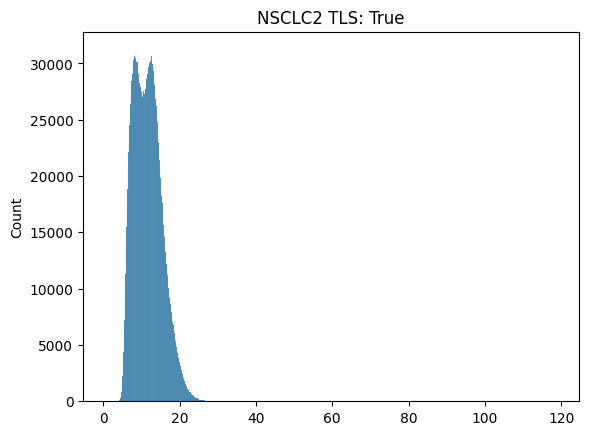

  0%|          | 0/440 [00:00<?, ?it/s]

n_neighboor : 1  - knn_edges:1536  -  mean distances:9.635000354131597   
n_neighboor : 2  - knn_edges:1536  -  mean distances:12.098955439489101   
n_neighboor : 3  - knn_edges:1536  -  mean distances:14.378783853437751   
n_neighboor : 4  - knn_edges:1536  -  mean distances:16.58613763180489   
n_neighboor : 5  - knn_edges:1536  -  mean distances:18.672572259958045   
n_neighboor : 6  - knn_edges:1536  -  mean distances:20.548959561214275   
n_neighboor : 7  - knn_edges:1536  -  mean distances:22.242366822134   
n_neighboor : 8  - knn_edges:1536  -  mean distances:23.883996233859666   


  0%|          | 1/440 [00:10<1:18:32, 10.73s/it]

n_neighboor : 9  - knn_edges:1536  -  mean distances:25.407980456696286   
n_neighboor : 1  - knn_edges:2665  -  mean distances:8.335217997007693   
n_neighboor : 2  - knn_edges:2665  -  mean distances:9.885595338580163   
n_neighboor : 3  - knn_edges:2665  -  mean distances:11.38842972829646   
n_neighboor : 4  - knn_edges:2665  -  mean distances:12.915282528716359   
n_neighboor : 5  - knn_edges:2665  -  mean distances:14.469857389614992   
n_neighboor : 6  - knn_edges:2665  -  mean distances:15.923407366028291   
n_neighboor : 7  - knn_edges:2665  -  mean distances:17.261108276440087   
n_neighboor : 8  - knn_edges:2665  -  mean distances:18.484519211778967   


  0%|          | 2/440 [00:44<2:59:17, 24.56s/it]

n_neighboor : 9  - knn_edges:2665  -  mean distances:19.608842594996354   
n_neighboor : 1  - knn_edges:2550  -  mean distances:8.50307584931817   
n_neighboor : 2  - knn_edges:2550  -  mean distances:10.068970547239358   
n_neighboor : 3  - knn_edges:2550  -  mean distances:11.617893699241751   
n_neighboor : 4  - knn_edges:2550  -  mean distances:13.132939917892264   
n_neighboor : 5  - knn_edges:2550  -  mean distances:14.708881549976795   
n_neighboor : 6  - knn_edges:2550  -  mean distances:16.226762190141518   
n_neighboor : 7  - knn_edges:2550  -  mean distances:17.563771619321532   
n_neighboor : 8  - knn_edges:2550  -  mean distances:18.842432980763718   


  1%|          | 3/440 [01:15<3:17:46, 27.15s/it]

n_neighboor : 9  - knn_edges:2550  -  mean distances:19.999784684871347   
n_neighboor : 1  - knn_edges:2636  -  mean distances:8.560260527697668   
n_neighboor : 2  - knn_edges:2636  -  mean distances:10.130172740763358   
n_neighboor : 3  - knn_edges:2636  -  mean distances:11.547515095986403   
n_neighboor : 4  - knn_edges:2636  -  mean distances:12.945052533815216   
n_neighboor : 5  - knn_edges:2636  -  mean distances:14.429171373393105   
n_neighboor : 6  - knn_edges:2636  -  mean distances:15.918690752161313   
n_neighboor : 7  - knn_edges:2636  -  mean distances:17.30439559753877   
n_neighboor : 8  - knn_edges:2636  -  mean distances:18.59680074098455   


  1%|          | 4/440 [01:48<3:34:13, 29.48s/it]

n_neighboor : 9  - knn_edges:2636  -  mean distances:19.736578874365566   
n_neighboor : 1  - knn_edges:2529  -  mean distances:8.53968350313176   
n_neighboor : 2  - knn_edges:2529  -  mean distances:9.985988060689541   
n_neighboor : 3  - knn_edges:2529  -  mean distances:11.4034222847762   
n_neighboor : 4  - knn_edges:2529  -  mean distances:12.868078599882919   
n_neighboor : 5  - knn_edges:2529  -  mean distances:14.344778057210393   
n_neighboor : 6  - knn_edges:2529  -  mean distances:15.846841347636003   
n_neighboor : 7  - knn_edges:2529  -  mean distances:17.248766244796236   
n_neighboor : 8  - knn_edges:2529  -  mean distances:18.54464168718379   


  1%|          | 5/440 [02:19<3:37:50, 30.05s/it]

n_neighboor : 9  - knn_edges:2529  -  mean distances:19.702595975154473   
n_neighboor : 1  - knn_edges:2461  -  mean distances:8.266362111071372   
n_neighboor : 2  - knn_edges:2461  -  mean distances:9.889949576704268   
n_neighboor : 3  - knn_edges:2461  -  mean distances:11.398541569627085   
n_neighboor : 4  - knn_edges:2461  -  mean distances:12.951133078770422   
n_neighboor : 5  - knn_edges:2461  -  mean distances:14.46934790732213   
n_neighboor : 6  - knn_edges:2461  -  mean distances:15.941537658741696   
n_neighboor : 7  - knn_edges:2461  -  mean distances:17.309822956276918   
n_neighboor : 8  - knn_edges:2461  -  mean distances:18.52746517198601   


  1%|▏         | 6/440 [02:48<3:34:23, 29.64s/it]

n_neighboor : 9  - knn_edges:2461  -  mean distances:19.690026562488317   
n_neighboor : 1  - knn_edges:2173  -  mean distances:8.610708408356404   
n_neighboor : 2  - knn_edges:2173  -  mean distances:10.51609160639978   
n_neighboor : 3  - knn_edges:2173  -  mean distances:12.362704807888683   
n_neighboor : 4  - knn_edges:2173  -  mean distances:14.125130626741177   
n_neighboor : 5  - knn_edges:2173  -  mean distances:15.865729816679583   
n_neighboor : 6  - knn_edges:2173  -  mean distances:17.45896827585717   
n_neighboor : 7  - knn_edges:2173  -  mean distances:18.906096830554755   
n_neighboor : 8  - knn_edges:2173  -  mean distances:20.248698286349594   


  2%|▏         | 7/440 [03:10<3:16:37, 27.25s/it]

n_neighboor : 9  - knn_edges:2173  -  mean distances:21.47211524637489   
n_neighboor : 1  - knn_edges:1733  -  mean distances:9.930922714000248   
n_neighboor : 2  - knn_edges:1733  -  mean distances:12.057376546109776   
n_neighboor : 3  - knn_edges:1733  -  mean distances:14.143321528103966   
n_neighboor : 4  - knn_edges:1733  -  mean distances:16.111663722236123   
n_neighboor : 5  - knn_edges:1733  -  mean distances:18.04493832553212   
n_neighboor : 6  - knn_edges:1733  -  mean distances:19.851365877142552   
n_neighboor : 7  - knn_edges:1733  -  mean distances:21.55325158345306   
n_neighboor : 8  - knn_edges:1733  -  mean distances:23.097258788091253   


  2%|▏         | 8/440 [03:24<2:45:46, 23.02s/it]

n_neighboor : 9  - knn_edges:1733  -  mean distances:24.507475858408082   
n_neighboor : 1  - knn_edges:2167  -  mean distances:8.577011263632082   
n_neighboor : 2  - knn_edges:2167  -  mean distances:10.3572216979158   
n_neighboor : 3  - knn_edges:2167  -  mean distances:12.156059734026877   
n_neighboor : 4  - knn_edges:2167  -  mean distances:13.843497813107996   
n_neighboor : 5  - knn_edges:2167  -  mean distances:15.508476129935108   
n_neighboor : 6  - knn_edges:2167  -  mean distances:17.093256498381372   
n_neighboor : 7  - knn_edges:2167  -  mean distances:18.542653768920765   
n_neighboor : 8  - knn_edges:2167  -  mean distances:19.883132298781174   


  2%|▏         | 9/440 [03:47<2:45:15, 23.01s/it]

n_neighboor : 9  - knn_edges:2167  -  mean distances:21.154872362426815   
n_neighboor : 1  - knn_edges:2003  -  mean distances:8.121680181037824   
n_neighboor : 2  - knn_edges:2003  -  mean distances:10.184317713024729   
n_neighboor : 3  - knn_edges:2003  -  mean distances:12.238106755162123   
n_neighboor : 4  - knn_edges:2003  -  mean distances:14.126419686157826   
n_neighboor : 5  - knn_edges:2003  -  mean distances:15.907706947244948   
n_neighboor : 6  - knn_edges:2003  -  mean distances:17.480090345257253   
n_neighboor : 7  - knn_edges:2003  -  mean distances:19.033878172689445   
n_neighboor : 8  - knn_edges:2003  -  mean distances:20.39315597435492   


  2%|▏         | 10/440 [04:06<2:35:49, 21.74s/it]

n_neighboor : 9  - knn_edges:2003  -  mean distances:21.668690250337697   
n_neighboor : 1  - knn_edges:2788  -  mean distances:8.325439724354034   
n_neighboor : 2  - knn_edges:2788  -  mean distances:9.73307285978268   
n_neighboor : 3  - knn_edges:2788  -  mean distances:11.078177866856658   
n_neighboor : 4  - knn_edges:2788  -  mean distances:12.462635650579175   
n_neighboor : 5  - knn_edges:2788  -  mean distances:13.896072238629129   
n_neighboor : 6  - knn_edges:2788  -  mean distances:15.331959013701868   
n_neighboor : 7  - knn_edges:2788  -  mean distances:16.662223691090265   
n_neighboor : 8  - knn_edges:2788  -  mean distances:17.869456750586632   


  2%|▎         | 11/440 [04:44<3:10:37, 26.66s/it]

n_neighboor : 9  - knn_edges:2788  -  mean distances:18.989793380832474   
n_neighboor : 1  - knn_edges:3811  -  mean distances:6.902960092329884   
n_neighboor : 2  - knn_edges:3811  -  mean distances:7.904601030840624   
n_neighboor : 3  - knn_edges:3811  -  mean distances:8.929120984093258   
n_neighboor : 4  - knn_edges:3811  -  mean distances:9.995846813192573   
n_neighboor : 5  - knn_edges:3811  -  mean distances:11.218249955380495   
n_neighboor : 6  - knn_edges:3811  -  mean distances:12.407134963562793   
n_neighboor : 7  - knn_edges:3811  -  mean distances:13.533884426963075   
n_neighboor : 8  - knn_edges:3811  -  mean distances:14.485696163641814   


  3%|▎         | 12/440 [05:53<4:43:16, 39.71s/it]

n_neighboor : 9  - knn_edges:3811  -  mean distances:15.358197126266212   
n_neighboor : 1  - knn_edges:2383  -  mean distances:8.319795364221264   
n_neighboor : 2  - knn_edges:2383  -  mean distances:10.06791211261309   
n_neighboor : 3  - knn_edges:2383  -  mean distances:11.757601121438615   
n_neighboor : 4  - knn_edges:2383  -  mean distances:13.502615394065232   
n_neighboor : 5  - knn_edges:2383  -  mean distances:15.180388166955977   
n_neighboor : 6  - knn_edges:2383  -  mean distances:16.66588825289317   
n_neighboor : 7  - knn_edges:2383  -  mean distances:18.037360090892754   
n_neighboor : 8  - knn_edges:2383  -  mean distances:19.308602344841024   


  3%|▎         | 13/440 [06:20<4:14:30, 35.76s/it]

n_neighboor : 9  - knn_edges:2383  -  mean distances:20.502739649012195   
n_neighboor : 1  - knn_edges:3594  -  mean distances:7.308238269728298   
n_neighboor : 2  - knn_edges:3594  -  mean distances:8.542641421525625   
n_neighboor : 3  - knn_edges:3594  -  mean distances:9.703173796410413   
n_neighboor : 4  - knn_edges:3594  -  mean distances:10.92733826714115   
n_neighboor : 5  - knn_edges:3594  -  mean distances:12.189224260850407   
n_neighboor : 6  - knn_edges:3594  -  mean distances:13.446467070985737   
n_neighboor : 7  - knn_edges:3594  -  mean distances:14.57389408036911   
n_neighboor : 8  - knn_edges:3594  -  mean distances:15.610799117405955   


  3%|▎         | 14/440 [07:22<5:10:33, 43.74s/it]

n_neighboor : 9  - knn_edges:3594  -  mean distances:16.554574280457604   
n_neighboor : 1  - knn_edges:2963  -  mean distances:8.134433600913429   
n_neighboor : 2  - knn_edges:2963  -  mean distances:9.5595332981973   
n_neighboor : 3  - knn_edges:2963  -  mean distances:10.897503640686216   
n_neighboor : 4  - knn_edges:2963  -  mean distances:12.247825351736035   
n_neighboor : 5  - knn_edges:2963  -  mean distances:13.706229071435427   
n_neighboor : 6  - knn_edges:2963  -  mean distances:15.110084600360427   
n_neighboor : 7  - knn_edges:2963  -  mean distances:16.463147928012102   
n_neighboor : 8  - knn_edges:2963  -  mean distances:17.61832491687961   


  3%|▎         | 15/440 [08:04<5:06:12, 43.23s/it]

n_neighboor : 9  - knn_edges:2963  -  mean distances:18.681263579781326   
n_neighboor : 1  - knn_edges:3458  -  mean distances:7.3880844618162   
n_neighboor : 2  - knn_edges:3458  -  mean distances:8.630438547150721   
n_neighboor : 3  - knn_edges:3458  -  mean distances:9.855219677750997   
n_neighboor : 4  - knn_edges:3458  -  mean distances:11.104050002811142   
n_neighboor : 5  - knn_edges:3458  -  mean distances:12.409378514355017   
n_neighboor : 6  - knn_edges:3458  -  mean distances:13.6351914440538   
n_neighboor : 7  - knn_edges:3458  -  mean distances:14.783162168204008   
n_neighboor : 8  - knn_edges:3458  -  mean distances:15.870334350999434   


  4%|▎         | 16/440 [09:02<5:36:27, 47.61s/it]

n_neighboor : 9  - knn_edges:3458  -  mean distances:16.84008067354923   
n_neighboor : 1  - knn_edges:3769  -  mean distances:7.330312295066635   
n_neighboor : 2  - knn_edges:3769  -  mean distances:8.470293785604504   
n_neighboor : 3  - knn_edges:3769  -  mean distances:9.558901519198935   
n_neighboor : 4  - knn_edges:3769  -  mean distances:10.73408210275055   
n_neighboor : 5  - knn_edges:3769  -  mean distances:11.982485040736345   
n_neighboor : 6  - knn_edges:3769  -  mean distances:13.26473265423151   
n_neighboor : 7  - knn_edges:3769  -  mean distances:14.373420791358834   
n_neighboor : 8  - knn_edges:3769  -  mean distances:15.379170668141859   


  4%|▍         | 17/440 [10:11<6:20:12, 53.93s/it]

n_neighboor : 9  - knn_edges:3769  -  mean distances:16.30982655671004   
n_neighboor : 1  - knn_edges:3643  -  mean distances:7.342161970881844   
n_neighboor : 2  - knn_edges:3643  -  mean distances:8.583026053895464   
n_neighboor : 3  - knn_edges:3643  -  mean distances:9.788360561999012   
n_neighboor : 4  - knn_edges:3643  -  mean distances:11.009566457772422   
n_neighboor : 5  - knn_edges:3643  -  mean distances:12.306871134204501   
n_neighboor : 6  - knn_edges:3643  -  mean distances:13.528399124211253   
n_neighboor : 7  - knn_edges:3643  -  mean distances:14.697220299962595   
n_neighboor : 8  - knn_edges:3643  -  mean distances:15.752602129831251   


  4%|▍         | 18/440 [11:15<6:41:11, 57.04s/it]

n_neighboor : 9  - knn_edges:3643  -  mean distances:16.710270786332213   
n_neighboor : 1  - knn_edges:2324  -  mean distances:7.253640529491019   
n_neighboor : 2  - knn_edges:2324  -  mean distances:8.78587897600745   
n_neighboor : 3  - knn_edges:2324  -  mean distances:10.343312623649815   
n_neighboor : 4  - knn_edges:2324  -  mean distances:11.940685543479201   
n_neighboor : 5  - knn_edges:2324  -  mean distances:13.45838520406432   
n_neighboor : 6  - knn_edges:2324  -  mean distances:14.868526170327506   
n_neighboor : 7  - knn_edges:2324  -  mean distances:16.16086528791217   
n_neighboor : 8  - knn_edges:2324  -  mean distances:17.312669931332497   


  4%|▍         | 19/440 [11:40<5:33:53, 47.58s/it]

n_neighboor : 9  - knn_edges:2324  -  mean distances:18.401348895652877   
n_neighboor : 1  - knn_edges:2835  -  mean distances:6.872054405918235   
n_neighboor : 2  - knn_edges:2835  -  mean distances:8.501730306741848   
n_neighboor : 3  - knn_edges:2835  -  mean distances:10.180537210748287   
n_neighboor : 4  - knn_edges:2835  -  mean distances:11.714461732694899   
n_neighboor : 5  - knn_edges:2835  -  mean distances:13.164690214944965   
n_neighboor : 6  - knn_edges:2835  -  mean distances:14.558021915672398   
n_neighboor : 7  - knn_edges:2835  -  mean distances:15.780541268177341   
n_neighboor : 8  - knn_edges:2835  -  mean distances:16.901452563380438   


  5%|▍         | 20/440 [12:20<5:16:13, 45.18s/it]

n_neighboor : 9  - knn_edges:2835  -  mean distances:17.95392510575061   
n_neighboor : 1  - knn_edges:1993  -  mean distances:7.503637895935777   
n_neighboor : 2  - knn_edges:1993  -  mean distances:9.620937216626588   
n_neighboor : 3  - knn_edges:1993  -  mean distances:11.613556089586359   
n_neighboor : 4  - knn_edges:1993  -  mean distances:13.48627382180473   
n_neighboor : 5  - knn_edges:1993  -  mean distances:15.25083484548773   
n_neighboor : 6  - knn_edges:1993  -  mean distances:16.821541276812006   
n_neighboor : 7  - knn_edges:1993  -  mean distances:18.273062108715166   
n_neighboor : 8  - knn_edges:1993  -  mean distances:19.64450823080747   


  5%|▍         | 21/440 [12:39<4:19:55, 37.22s/it]

n_neighboor : 9  - knn_edges:1993  -  mean distances:20.956579892191012   
n_neighboor : 1  - knn_edges:2208  -  mean distances:7.302841439039113   
n_neighboor : 2  - knn_edges:2208  -  mean distances:9.176968895575955   
n_neighboor : 3  - knn_edges:2208  -  mean distances:10.942714262716176   
n_neighboor : 4  - knn_edges:2208  -  mean distances:12.690884637596447   
n_neighboor : 5  - knn_edges:2208  -  mean distances:14.294922997851726   
n_neighboor : 6  - knn_edges:2208  -  mean distances:15.754151686747853   
n_neighboor : 7  - knn_edges:2208  -  mean distances:17.12690605647278   
n_neighboor : 8  - knn_edges:2208  -  mean distances:18.3783345315487   


  5%|▌         | 22/440 [13:03<3:51:27, 33.22s/it]

n_neighboor : 9  - knn_edges:2208  -  mean distances:19.577637202087352   
n_neighboor : 1  - knn_edges:4896  -  mean distances:6.659983603175207   
n_neighboor : 2  - knn_edges:4896  -  mean distances:7.550515696794081   
n_neighboor : 3  - knn_edges:4896  -  mean distances:8.384955032924221   
n_neighboor : 4  - knn_edges:4896  -  mean distances:9.333669812711436   
n_neighboor : 5  - knn_edges:4896  -  mean distances:10.415914803488754   
n_neighboor : 6  - knn_edges:4896  -  mean distances:11.557437370502074   
n_neighboor : 7  - knn_edges:4896  -  mean distances:12.620267768707569   
n_neighboor : 8  - knn_edges:4896  -  mean distances:13.510475833124026   


  5%|▌         | 23/440 [15:02<6:50:20, 59.04s/it]

n_neighboor : 9  - knn_edges:4896  -  mean distances:14.314956337237806   
n_neighboor : 1  - knn_edges:4619  -  mean distances:6.971801728299337   
n_neighboor : 2  - knn_edges:4619  -  mean distances:7.871467839729197   
n_neighboor : 3  - knn_edges:4619  -  mean distances:8.716366692609398   
n_neighboor : 4  - knn_edges:4619  -  mean distances:9.667611567766077   
n_neighboor : 5  - knn_edges:4619  -  mean distances:10.767115782419504   
n_neighboor : 6  - knn_edges:4619  -  mean distances:11.963220844452797   
n_neighboor : 7  - knn_edges:4619  -  mean distances:13.062889150022135   
n_neighboor : 8  - knn_edges:4619  -  mean distances:14.022916886228579   


  5%|▌         | 24/440 [16:44<8:19:40, 72.07s/it]

n_neighboor : 9  - knn_edges:4619  -  mean distances:14.860601668657337   
n_neighboor : 1  - knn_edges:2716  -  mean distances:8.190567276703772   
n_neighboor : 2  - knn_edges:2716  -  mean distances:9.614411669739392   
n_neighboor : 3  - knn_edges:2716  -  mean distances:11.047675574933772   
n_neighboor : 4  - knn_edges:2716  -  mean distances:12.583640869615468   
n_neighboor : 5  - knn_edges:2716  -  mean distances:14.117742379929116   
n_neighboor : 6  - knn_edges:2716  -  mean distances:15.575692445415228   
n_neighboor : 7  - knn_edges:2716  -  mean distances:16.912457702420284   
n_neighboor : 8  - knn_edges:2716  -  mean distances:18.09499999879781   


  6%|▌         | 25/440 [17:19<7:01:02, 60.87s/it]

n_neighboor : 9  - knn_edges:2716  -  mean distances:19.22568002839578   
n_neighboor : 1  - knn_edges:2233  -  mean distances:7.663299256651108   
n_neighboor : 2  - knn_edges:2233  -  mean distances:9.168101646444551   
n_neighboor : 3  - knn_edges:2233  -  mean distances:10.60672324770128   
n_neighboor : 4  - knn_edges:2233  -  mean distances:12.049220475355932   
n_neighboor : 5  - knn_edges:2233  -  mean distances:13.514376774813837   
n_neighboor : 6  - knn_edges:2233  -  mean distances:14.867769711871132   
n_neighboor : 7  - knn_edges:2233  -  mean distances:16.119258543606303   
n_neighboor : 8  - knn_edges:2233  -  mean distances:17.27109032492645   


  6%|▌         | 26/440 [17:43<5:42:58, 49.71s/it]

n_neighboor : 9  - knn_edges:2233  -  mean distances:18.374388022832427   
n_neighboor : 1  - knn_edges:2516  -  mean distances:8.72744817726825   
n_neighboor : 2  - knn_edges:2516  -  mean distances:10.19580193377717   
n_neighboor : 3  - knn_edges:2516  -  mean distances:11.644156193359   
n_neighboor : 4  - knn_edges:2516  -  mean distances:13.165976682588322   
n_neighboor : 5  - knn_edges:2516  -  mean distances:14.772736353216924   
n_neighboor : 6  - knn_edges:2516  -  mean distances:16.36213617101437   
n_neighboor : 7  - knn_edges:2516  -  mean distances:17.77184043421264   
n_neighboor : 8  - knn_edges:2516  -  mean distances:19.09389560049192   


  6%|▌         | 27/440 [18:13<5:03:01, 44.02s/it]

n_neighboor : 9  - knn_edges:2516  -  mean distances:20.25181354699715   
n_neighboor : 1  - knn_edges:4243  -  mean distances:7.176565349809778   
n_neighboor : 2  - knn_edges:4243  -  mean distances:8.180256803144873   
n_neighboor : 3  - knn_edges:4243  -  mean distances:9.158902334060745   
n_neighboor : 4  - knn_edges:4243  -  mean distances:10.193439573078173   
n_neighboor : 5  - knn_edges:4243  -  mean distances:11.336603570532377   
n_neighboor : 6  - knn_edges:4243  -  mean distances:12.535805074042536   
n_neighboor : 7  - knn_edges:4243  -  mean distances:13.64484063926145   
n_neighboor : 8  - knn_edges:4243  -  mean distances:14.647452609820192   


  6%|▋         | 28/440 [19:42<6:34:58, 57.52s/it]

n_neighboor : 9  - knn_edges:4243  -  mean distances:15.560239791520639   
n_neighboor : 1  - knn_edges:2872  -  mean distances:7.828313713004438   
n_neighboor : 2  - knn_edges:2872  -  mean distances:9.253932152737695   
n_neighboor : 3  - knn_edges:2872  -  mean distances:10.683623340992497   
n_neighboor : 4  - knn_edges:2872  -  mean distances:12.088171629790416   
n_neighboor : 5  - knn_edges:2872  -  mean distances:13.533519537223313   
n_neighboor : 6  - knn_edges:2872  -  mean distances:14.901423310151538   
n_neighboor : 7  - knn_edges:2872  -  mean distances:16.16338204132619   
n_neighboor : 8  - knn_edges:2872  -  mean distances:17.307965618182827   


  7%|▋         | 29/440 [20:22<5:57:07, 52.14s/it]

n_neighboor : 9  - knn_edges:2872  -  mean distances:18.344575077895815   
n_neighboor : 1  - knn_edges:3559  -  mean distances:7.739156421893447   
n_neighboor : 2  - knn_edges:3559  -  mean distances:8.900710892140912   
n_neighboor : 3  - knn_edges:3559  -  mean distances:10.016175462072995   
n_neighboor : 4  - knn_edges:3559  -  mean distances:11.166316359454674   
n_neighboor : 5  - knn_edges:3559  -  mean distances:12.453390067008813   
n_neighboor : 6  - knn_edges:3559  -  mean distances:13.763212800011097   
n_neighboor : 7  - knn_edges:3559  -  mean distances:15.002875296745994   
n_neighboor : 8  - knn_edges:3559  -  mean distances:16.06991898547719   


  7%|▋         | 30/440 [21:23<6:14:48, 54.85s/it]

n_neighboor : 9  - knn_edges:3559  -  mean distances:17.03692448260262   
n_neighboor : 1  - knn_edges:2927  -  mean distances:8.189587003853571   
n_neighboor : 2  - knn_edges:2927  -  mean distances:9.56537113743022   
n_neighboor : 3  - knn_edges:2927  -  mean distances:10.87889625609214   
n_neighboor : 4  - knn_edges:2927  -  mean distances:12.239483500933538   
n_neighboor : 5  - knn_edges:2927  -  mean distances:13.664840186806966   
n_neighboor : 6  - knn_edges:2927  -  mean distances:15.063603931306094   
n_neighboor : 7  - knn_edges:2927  -  mean distances:16.3617280236214   
n_neighboor : 8  - knn_edges:2927  -  mean distances:17.566695266627587   


  7%|▋         | 31/440 [22:04<5:45:44, 50.72s/it]

n_neighboor : 9  - knn_edges:2927  -  mean distances:18.65186816694605   
n_neighboor : 1  - knn_edges:2316  -  mean distances:9.250069440935071   
n_neighboor : 2  - knn_edges:2316  -  mean distances:10.862971274701335   
n_neighboor : 3  - knn_edges:2316  -  mean distances:12.422842831552973   
n_neighboor : 4  - knn_edges:2316  -  mean distances:14.023548280723203   
n_neighboor : 5  - knn_edges:2316  -  mean distances:15.683195842044478   
n_neighboor : 6  - knn_edges:2316  -  mean distances:17.289129908467462   
n_neighboor : 7  - knn_edges:2316  -  mean distances:18.739981206048924   
n_neighboor : 8  - knn_edges:2316  -  mean distances:20.09865398799039   


  7%|▋         | 32/440 [22:30<4:53:28, 43.16s/it]

n_neighboor : 9  - knn_edges:2316  -  mean distances:21.35396247255668   
n_neighboor : 1  - knn_edges:3139  -  mean distances:7.129200775091646   
n_neighboor : 2  - knn_edges:3139  -  mean distances:8.48474462751013   
n_neighboor : 3  - knn_edges:3139  -  mean distances:9.795050036823525   
n_neighboor : 4  - knn_edges:3139  -  mean distances:11.05356586466958   
n_neighboor : 5  - knn_edges:3139  -  mean distances:12.435947159678692   
n_neighboor : 6  - knn_edges:3139  -  mean distances:13.726306445489373   
n_neighboor : 7  - knn_edges:3139  -  mean distances:14.908585918093884   
n_neighboor : 8  - knn_edges:3139  -  mean distances:15.97743637453887   


  8%|▊         | 33/440 [23:18<5:02:53, 44.65s/it]

n_neighboor : 9  - knn_edges:3139  -  mean distances:16.95524051920662   
n_neighboor : 1  - knn_edges:1890  -  mean distances:7.532835729451715   
n_neighboor : 2  - knn_edges:1890  -  mean distances:9.04606400287646   
n_neighboor : 3  - knn_edges:1890  -  mean distances:10.526070397297058   
n_neighboor : 4  - knn_edges:1890  -  mean distances:11.961589547535135   
n_neighboor : 5  - knn_edges:1890  -  mean distances:13.4124437504588   
n_neighboor : 6  - knn_edges:1890  -  mean distances:14.830491438412574   
n_neighboor : 7  - knn_edges:1890  -  mean distances:16.09204169120262   
n_neighboor : 8  - knn_edges:1890  -  mean distances:17.25872976759334   


  8%|▊         | 34/440 [23:35<4:05:48, 36.33s/it]

n_neighboor : 9  - knn_edges:1890  -  mean distances:18.348440241601793   
n_neighboor : 1  - knn_edges:794  -  mean distances:8.733033946345786   
n_neighboor : 2  - knn_edges:794  -  mean distances:11.948808494887688   
n_neighboor : 3  - knn_edges:794  -  mean distances:14.84427847468251   
n_neighboor : 4  - knn_edges:794  -  mean distances:17.43807619844711   
n_neighboor : 5  - knn_edges:794  -  mean distances:19.696734839152068   
n_neighboor : 6  - knn_edges:794  -  mean distances:21.707696455492204   
n_neighboor : 7  - knn_edges:794  -  mean distances:23.621080538513823   
n_neighboor : 8  - knn_edges:794  -  mean distances:25.539115041551177   


  8%|▊         | 35/440 [23:38<2:57:19, 26.27s/it]

n_neighboor : 9  - knn_edges:794  -  mean distances:27.166064538199084   
n_neighboor : 1  - knn_edges:1982  -  mean distances:7.279202971508721   
n_neighboor : 2  - knn_edges:1982  -  mean distances:8.696414173299287   
n_neighboor : 3  - knn_edges:1982  -  mean distances:10.027993665839926   
n_neighboor : 4  - knn_edges:1982  -  mean distances:11.413757071398273   
n_neighboor : 5  - knn_edges:1982  -  mean distances:12.807863881780488   
n_neighboor : 6  - knn_edges:1982  -  mean distances:14.084957499242929   
n_neighboor : 7  - knn_edges:1982  -  mean distances:15.24957212550616   
n_neighboor : 8  - knn_edges:1982  -  mean distances:16.298029437384304   


  8%|▊         | 36/440 [23:57<2:43:12, 24.24s/it]

n_neighboor : 9  - knn_edges:1982  -  mean distances:17.30417647908925   
n_neighboor : 1  - knn_edges:2331  -  mean distances:7.809765450429864   
n_neighboor : 2  - knn_edges:2331  -  mean distances:9.411496703923607   
n_neighboor : 3  - knn_edges:2331  -  mean distances:10.95432627918015   
n_neighboor : 4  - knn_edges:2331  -  mean distances:12.500382515860585   
n_neighboor : 5  - knn_edges:2331  -  mean distances:14.044931654683824   
n_neighboor : 6  - knn_edges:2331  -  mean distances:15.45665955887435   
n_neighboor : 7  - knn_edges:2331  -  mean distances:16.770592823053853   
n_neighboor : 8  - knn_edges:2331  -  mean distances:17.962662734431035   


  8%|▊         | 37/440 [24:24<2:47:49, 24.99s/it]

n_neighboor : 9  - knn_edges:2331  -  mean distances:19.06490559753678   
n_neighboor : 1  - knn_edges:2752  -  mean distances:7.367866768899605   
n_neighboor : 2  - knn_edges:2752  -  mean distances:8.870653669121781   
n_neighboor : 3  - knn_edges:2752  -  mean distances:10.34888839789474   
n_neighboor : 4  - knn_edges:2752  -  mean distances:11.842981595356022   
n_neighboor : 5  - knn_edges:2752  -  mean distances:13.300402194044853   
n_neighboor : 6  - knn_edges:2752  -  mean distances:14.64450002235994   
n_neighboor : 7  - knn_edges:2752  -  mean distances:15.91381426170906   
n_neighboor : 8  - knn_edges:2752  -  mean distances:17.05421700846943   


  9%|▊         | 38/440 [25:01<3:11:40, 28.61s/it]

n_neighboor : 9  - knn_edges:2752  -  mean distances:18.107659210306174   
n_neighboor : 1  - knn_edges:1506  -  mean distances:9.184326882935396   
n_neighboor : 2  - knn_edges:1506  -  mean distances:11.058655690056652   
n_neighboor : 3  - knn_edges:1506  -  mean distances:12.898608020903149   
n_neighboor : 4  - knn_edges:1506  -  mean distances:14.722432936901937   
n_neighboor : 5  - knn_edges:1506  -  mean distances:16.578894544520686   
n_neighboor : 6  - knn_edges:1506  -  mean distances:18.25326853818917   
n_neighboor : 7  - knn_edges:1506  -  mean distances:19.740175936318845   
n_neighboor : 8  - knn_edges:1506  -  mean distances:21.174414121942895   


  9%|▉         | 39/440 [25:12<2:35:09, 23.21s/it]

n_neighboor : 9  - knn_edges:1506  -  mean distances:22.47476420493705   
n_neighboor : 1  - knn_edges:1757  -  mean distances:8.709674883840632   
n_neighboor : 2  - knn_edges:1757  -  mean distances:10.388178966026684   
n_neighboor : 3  - knn_edges:1757  -  mean distances:12.152851870804962   
n_neighboor : 4  - knn_edges:1757  -  mean distances:13.98063301204556   
n_neighboor : 5  - knn_edges:1757  -  mean distances:15.672897033983375   
n_neighboor : 6  - knn_edges:1757  -  mean distances:17.239884532034605   
n_neighboor : 7  - knn_edges:1757  -  mean distances:18.679425663802082   
n_neighboor : 8  - knn_edges:1757  -  mean distances:20.02806818589498   


  9%|▉         | 40/440 [25:27<2:18:27, 20.77s/it]

n_neighboor : 9  - knn_edges:1757  -  mean distances:21.29749416082898   
n_neighboor : 1  - knn_edges:3679  -  mean distances:7.767481030785474   
n_neighboor : 2  - knn_edges:3679  -  mean distances:9.062748992473995   
n_neighboor : 3  - knn_edges:3679  -  mean distances:10.33150277726635   
n_neighboor : 4  - knn_edges:3679  -  mean distances:11.72089803015553   
n_neighboor : 5  - knn_edges:3679  -  mean distances:13.093687885660584   
n_neighboor : 6  - knn_edges:3679  -  mean distances:14.471094168551758   
n_neighboor : 7  - knn_edges:3679  -  mean distances:15.744562314038227   
n_neighboor : 8  - knn_edges:3679  -  mean distances:16.83731920214398   


  9%|▉         | 41/440 [26:33<3:49:51, 34.56s/it]

n_neighboor : 9  - knn_edges:3679  -  mean distances:17.868697246298968   
n_neighboor : 1  - knn_edges:2965  -  mean distances:8.129890701508366   
n_neighboor : 2  - knn_edges:2965  -  mean distances:9.468061830360424   
n_neighboor : 3  - knn_edges:2965  -  mean distances:10.787637731533419   
n_neighboor : 4  - knn_edges:2965  -  mean distances:12.160549678467845   
n_neighboor : 5  - knn_edges:2965  -  mean distances:13.622875261351398   
n_neighboor : 6  - knn_edges:2965  -  mean distances:14.990901823521163   
n_neighboor : 7  - knn_edges:2965  -  mean distances:16.284523959673287   
n_neighboor : 8  - knn_edges:2965  -  mean distances:17.489086373909608   


 10%|▉         | 42/440 [27:16<4:04:45, 36.90s/it]

n_neighboor : 9  - knn_edges:2965  -  mean distances:18.573749873055373   
n_neighboor : 1  - knn_edges:1975  -  mean distances:9.285739198270266   
n_neighboor : 2  - knn_edges:1975  -  mean distances:11.173961512996755   
n_neighboor : 3  - knn_edges:1975  -  mean distances:12.961937740427237   
n_neighboor : 4  - knn_edges:1975  -  mean distances:14.79474689271483   
n_neighboor : 5  - knn_edges:1975  -  mean distances:16.624623376500104   
n_neighboor : 6  - knn_edges:1975  -  mean distances:18.283860642367525   
n_neighboor : 7  - knn_edges:1975  -  mean distances:19.803929904573213   
n_neighboor : 8  - knn_edges:1975  -  mean distances:21.240210589459394   


 10%|▉         | 43/440 [27:34<3:27:40, 31.39s/it]

n_neighboor : 9  - knn_edges:1975  -  mean distances:22.53374431100868   
n_neighboor : 1  - knn_edges:3272  -  mean distances:7.451281451011424   
n_neighboor : 2  - knn_edges:3272  -  mean distances:8.829953929812772   
n_neighboor : 3  - knn_edges:3272  -  mean distances:10.129849031345765   
n_neighboor : 4  - knn_edges:3272  -  mean distances:11.48184808810281   
n_neighboor : 5  - knn_edges:3272  -  mean distances:12.825891538773766   
n_neighboor : 6  - knn_edges:3272  -  mean distances:14.089723982496663   
n_neighboor : 7  - knn_edges:3272  -  mean distances:15.273534779867761   
n_neighboor : 8  - knn_edges:3272  -  mean distances:16.3592805740627   


 10%|█         | 44/440 [28:26<4:08:32, 37.66s/it]

n_neighboor : 9  - knn_edges:3272  -  mean distances:17.380634208560068   
n_neighboor : 1  - knn_edges:1805  -  mean distances:8.843387511143769   
n_neighboor : 2  - knn_edges:1805  -  mean distances:11.164279441050025   
n_neighboor : 3  - knn_edges:1805  -  mean distances:13.415069430026549   
n_neighboor : 4  - knn_edges:1805  -  mean distances:15.456248157644255   
n_neighboor : 5  - knn_edges:1805  -  mean distances:17.4035028406178   
n_neighboor : 6  - knn_edges:1805  -  mean distances:19.11447148571726   
n_neighboor : 7  - knn_edges:1805  -  mean distances:20.737726917608068   
n_neighboor : 8  - knn_edges:1805  -  mean distances:22.21428698462623   


 10%|█         | 45/440 [28:42<3:23:22, 30.89s/it]

n_neighboor : 9  - knn_edges:1805  -  mean distances:23.655435101403793   
n_neighboor : 1  - knn_edges:2705  -  mean distances:8.122241647663127   
n_neighboor : 2  - knn_edges:2705  -  mean distances:9.59293012420368   
n_neighboor : 3  - knn_edges:2705  -  mean distances:11.088498340088393   
n_neighboor : 4  - knn_edges:2705  -  mean distances:12.642154830414526   
n_neighboor : 5  - knn_edges:2705  -  mean distances:14.191661748394985   
n_neighboor : 6  - knn_edges:2705  -  mean distances:15.702582585231719   
n_neighboor : 7  - knn_edges:2705  -  mean distances:17.02266949431102   
n_neighboor : 8  - knn_edges:2705  -  mean distances:18.24640215825629   


 10%|█         | 46/440 [29:18<3:33:01, 32.44s/it]

n_neighboor : 9  - knn_edges:2705  -  mean distances:19.33558374840494   
n_neighboor : 1  - knn_edges:1220  -  mean distances:8.831096052624034   
n_neighboor : 2  - knn_edges:1220  -  mean distances:11.537760982236462   
n_neighboor : 3  - knn_edges:1220  -  mean distances:14.266992426465823   
n_neighboor : 4  - knn_edges:1220  -  mean distances:16.50977714997697   
n_neighboor : 5  - knn_edges:1220  -  mean distances:18.715278991444478   
n_neighboor : 6  - knn_edges:1220  -  mean distances:20.678908028656544   
n_neighboor : 7  - knn_edges:1220  -  mean distances:22.394317717750113   
n_neighboor : 8  - knn_edges:1220  -  mean distances:24.080873815098695   


 11%|█         | 47/440 [29:24<2:42:10, 24.76s/it]

n_neighboor : 9  - knn_edges:1220  -  mean distances:25.61451686486532   
n_neighboor : 1  - knn_edges:2114  -  mean distances:8.277853695386954   
n_neighboor : 2  - knn_edges:2114  -  mean distances:10.347689340420917   
n_neighboor : 3  - knn_edges:2114  -  mean distances:12.315586430302522   
n_neighboor : 4  - knn_edges:2114  -  mean distances:14.17942049121196   
n_neighboor : 5  - knn_edges:2114  -  mean distances:15.92906032378517   
n_neighboor : 6  - knn_edges:2114  -  mean distances:17.484036128194614   
n_neighboor : 7  - knn_edges:2114  -  mean distances:18.9056604433489   
n_neighboor : 8  - knn_edges:2114  -  mean distances:20.257818228791425   


 11%|█         | 48/440 [29:46<2:35:48, 23.85s/it]

n_neighboor : 9  - knn_edges:2114  -  mean distances:21.496539256580167   
n_neighboor : 1  - knn_edges:2096  -  mean distances:7.860131811248701   
n_neighboor : 2  - knn_edges:2096  -  mean distances:9.787445316342557   
n_neighboor : 3  - knn_edges:2096  -  mean distances:11.637649497262048   
n_neighboor : 4  - knn_edges:2096  -  mean distances:13.394715702316757   
n_neighboor : 5  - knn_edges:2096  -  mean distances:15.05075292516447   
n_neighboor : 6  - knn_edges:2096  -  mean distances:16.569633405319394   
n_neighboor : 7  - knn_edges:2096  -  mean distances:17.963926296973593   
n_neighboor : 8  - knn_edges:2096  -  mean distances:19.196503651634725   


 11%|█         | 49/440 [30:07<2:30:17, 23.06s/it]

n_neighboor : 9  - knn_edges:2096  -  mean distances:20.366572785786076   
n_neighboor : 1  - knn_edges:1215  -  mean distances:9.783828315878134   
n_neighboor : 2  - knn_edges:1215  -  mean distances:12.766708508621267   
n_neighboor : 3  - knn_edges:1215  -  mean distances:15.427866188730105   
n_neighboor : 4  - knn_edges:1215  -  mean distances:17.942237535605965   
n_neighboor : 5  - knn_edges:1215  -  mean distances:20.195782253714604   
n_neighboor : 6  - knn_edges:1215  -  mean distances:22.25716682651992   
n_neighboor : 7  - knn_edges:1215  -  mean distances:24.11767136721077   
n_neighboor : 8  - knn_edges:1215  -  mean distances:25.852323390760446   


 11%|█▏        | 50/440 [30:14<1:58:05, 18.17s/it]

n_neighboor : 9  - knn_edges:1215  -  mean distances:27.413106721645043   
n_neighboor : 1  - knn_edges:2898  -  mean distances:8.53909176302383   
n_neighboor : 2  - knn_edges:2898  -  mean distances:9.874998913767529   
n_neighboor : 3  - knn_edges:2898  -  mean distances:11.124397124627727   
n_neighboor : 4  - knn_edges:2898  -  mean distances:12.433945481033014   
n_neighboor : 5  - knn_edges:2898  -  mean distances:13.888634478887203   
n_neighboor : 6  - knn_edges:2898  -  mean distances:15.32533353112867   
n_neighboor : 7  - knn_edges:2898  -  mean distances:16.670076657003815   
n_neighboor : 8  - knn_edges:2898  -  mean distances:17.862371831692105   


 12%|█▏        | 51/440 [30:56<2:42:52, 25.12s/it]

n_neighboor : 9  - knn_edges:2898  -  mean distances:18.953000453856117   
n_neighboor : 1  - knn_edges:2881  -  mean distances:8.48714416640722   
n_neighboor : 2  - knn_edges:2881  -  mean distances:9.85105871792905   
n_neighboor : 3  - knn_edges:2881  -  mean distances:11.09515554783113   
n_neighboor : 4  - knn_edges:2881  -  mean distances:12.422915974538666   
n_neighboor : 5  - knn_edges:2881  -  mean distances:13.842000290581543   
n_neighboor : 6  - knn_edges:2881  -  mean distances:15.294969498951817   
n_neighboor : 7  - knn_edges:2881  -  mean distances:16.588042459245425   
n_neighboor : 8  - knn_edges:2881  -  mean distances:17.78450883158231   


 12%|█▏        | 52/440 [31:36<3:12:35, 29.78s/it]

n_neighboor : 9  - knn_edges:2881  -  mean distances:18.874306903167177   
n_neighboor : 1  - knn_edges:2585  -  mean distances:7.854531612921942   
n_neighboor : 2  - knn_edges:2585  -  mean distances:9.415601781440742   
n_neighboor : 3  - knn_edges:2585  -  mean distances:10.967040753239042   
n_neighboor : 4  - knn_edges:2585  -  mean distances:12.497513177359318   
n_neighboor : 5  - knn_edges:2585  -  mean distances:14.054085270167912   
n_neighboor : 6  - knn_edges:2585  -  mean distances:15.519275153239715   
n_neighboor : 7  - knn_edges:2585  -  mean distances:16.817053664786094   
n_neighboor : 8  - knn_edges:2585  -  mean distances:18.08233359316309   


 12%|█▏        | 53/440 [32:09<3:17:04, 30.55s/it]

n_neighboor : 9  - knn_edges:2585  -  mean distances:19.175619722654645   
n_neighboor : 1  - knn_edges:3053  -  mean distances:7.750298372000175   
n_neighboor : 2  - knn_edges:3053  -  mean distances:9.113950951061845   
n_neighboor : 3  - knn_edges:3053  -  mean distances:10.409161528708989   
n_neighboor : 4  - knn_edges:3053  -  mean distances:11.750035227749112   
n_neighboor : 5  - knn_edges:3053  -  mean distances:13.15417331525435   
n_neighboor : 6  - knn_edges:3053  -  mean distances:14.51561299951102   
n_neighboor : 7  - knn_edges:3053  -  mean distances:15.78511478023994   
n_neighboor : 8  - knn_edges:3053  -  mean distances:16.912032505237654   


 12%|█▏        | 54/440 [32:54<3:45:28, 35.05s/it]

n_neighboor : 9  - knn_edges:3053  -  mean distances:17.972180598738095   
n_neighboor : 1  - knn_edges:2197  -  mean distances:8.403319633903173   
n_neighboor : 2  - knn_edges:2197  -  mean distances:10.349989785353332   
n_neighboor : 3  - knn_edges:2197  -  mean distances:12.111316835190785   
n_neighboor : 4  - knn_edges:2197  -  mean distances:13.979864292183569   
n_neighboor : 5  - knn_edges:2197  -  mean distances:15.760935704665872   
n_neighboor : 6  - knn_edges:2197  -  mean distances:17.383966241807567   
n_neighboor : 7  - knn_edges:2197  -  mean distances:18.784216382768843   
n_neighboor : 8  - knn_edges:2197  -  mean distances:20.13190893254871   


 12%|█▎        | 55/440 [33:17<3:21:15, 31.36s/it]

n_neighboor : 9  - knn_edges:2197  -  mean distances:21.41126488316252   
n_neighboor : 1  - knn_edges:2705  -  mean distances:7.226872935674445   
n_neighboor : 2  - knn_edges:2705  -  mean distances:9.046481752436666   
n_neighboor : 3  - knn_edges:2705  -  mean distances:10.808554655537861   
n_neighboor : 4  - knn_edges:2705  -  mean distances:12.489390812435655   
n_neighboor : 5  - knn_edges:2705  -  mean distances:14.068149935477312   
n_neighboor : 6  - knn_edges:2705  -  mean distances:15.450617812413821   
n_neighboor : 7  - knn_edges:2705  -  mean distances:16.761896606399446   
n_neighboor : 8  - knn_edges:2705  -  mean distances:17.918446321833475   


 13%|█▎        | 56/440 [33:52<3:28:24, 32.56s/it]

n_neighboor : 9  - knn_edges:2705  -  mean distances:19.056520572368534   
n_neighboor : 1  - knn_edges:3144  -  mean distances:7.629208622339718   
n_neighboor : 2  - knn_edges:3144  -  mean distances:8.988683090563836   
n_neighboor : 3  - knn_edges:3144  -  mean distances:10.30110687093514   
n_neighboor : 4  - knn_edges:3144  -  mean distances:11.738157321989222   
n_neighboor : 5  - knn_edges:3144  -  mean distances:13.182815019102728   
n_neighboor : 6  - knn_edges:3144  -  mean distances:14.51868394258113   
n_neighboor : 7  - knn_edges:3144  -  mean distances:15.751603379120416   
n_neighboor : 8  - knn_edges:3144  -  mean distances:16.855750930821426   


 13%|█▎        | 57/440 [34:40<3:56:55, 37.12s/it]

n_neighboor : 9  - knn_edges:3144  -  mean distances:17.90570014066607   
n_neighboor : 1  - knn_edges:2908  -  mean distances:7.711288370595271   
n_neighboor : 2  - knn_edges:2908  -  mean distances:9.201243107142956   
n_neighboor : 3  - knn_edges:2908  -  mean distances:10.703682938340805   
n_neighboor : 4  - knn_edges:2908  -  mean distances:12.26073973100582   
n_neighboor : 5  - knn_edges:2908  -  mean distances:13.754978172385622   
n_neighboor : 6  - knn_edges:2908  -  mean distances:15.14383615187725   
n_neighboor : 7  - knn_edges:2908  -  mean distances:16.40090014854866   
n_neighboor : 8  - knn_edges:2908  -  mean distances:17.55037868438586   


 13%|█▎        | 58/440 [35:20<4:02:05, 38.03s/it]

n_neighboor : 9  - knn_edges:2908  -  mean distances:18.643381804108   
n_neighboor : 1  - knn_edges:2865  -  mean distances:7.454856530385515   
n_neighboor : 2  - knn_edges:2865  -  mean distances:8.987370409943248   
n_neighboor : 3  - knn_edges:2865  -  mean distances:10.522400358530026   
n_neighboor : 4  - knn_edges:2865  -  mean distances:12.044352566425742   
n_neighboor : 5  - knn_edges:2865  -  mean distances:13.5130836764222   
n_neighboor : 6  - knn_edges:2865  -  mean distances:14.866305824050233   
n_neighboor : 7  - knn_edges:2865  -  mean distances:16.12971234484053   
n_neighboor : 8  - knn_edges:2865  -  mean distances:17.28062985414476   


 13%|█▎        | 59/440 [35:59<4:03:15, 38.31s/it]

n_neighboor : 9  - knn_edges:2865  -  mean distances:18.38685568141885   
n_neighboor : 1  - knn_edges:2420  -  mean distances:8.288605034827643   
n_neighboor : 2  - knn_edges:2420  -  mean distances:9.955081553495024   
n_neighboor : 3  - knn_edges:2420  -  mean distances:11.583935337368759   
n_neighboor : 4  - knn_edges:2420  -  mean distances:13.242142904010736   
n_neighboor : 5  - knn_edges:2420  -  mean distances:14.905469115869499   
n_neighboor : 6  - knn_edges:2420  -  mean distances:16.441320696608923   
n_neighboor : 7  - knn_edges:2420  -  mean distances:17.80984989561781   
n_neighboor : 8  - knn_edges:2420  -  mean distances:19.041405328389395   


 14%|█▎        | 60/440 [36:27<3:42:45, 35.17s/it]

n_neighboor : 9  - knn_edges:2420  -  mean distances:20.175101717691415   
n_neighboor : 1  - knn_edges:2399  -  mean distances:8.016416623549729   
n_neighboor : 2  - knn_edges:2399  -  mean distances:9.688946987388574   
n_neighboor : 3  - knn_edges:2399  -  mean distances:11.295753746444493   
n_neighboor : 4  - knn_edges:2399  -  mean distances:12.879240086082136   
n_neighboor : 5  - knn_edges:2399  -  mean distances:14.459509006124714   
n_neighboor : 6  - knn_edges:2399  -  mean distances:15.902868161526861   
n_neighboor : 7  - knn_edges:2399  -  mean distances:17.25236434604119   
n_neighboor : 8  - knn_edges:2399  -  mean distances:18.49325185259599   


 14%|█▍        | 61/440 [36:55<3:27:51, 32.91s/it]

n_neighboor : 9  - knn_edges:2399  -  mean distances:19.64787710719366   
n_neighboor : 1  - knn_edges:2391  -  mean distances:8.259862069604264   
n_neighboor : 2  - knn_edges:2391  -  mean distances:9.894614800932708   
n_neighboor : 3  - knn_edges:2391  -  mean distances:11.461285289677027   
n_neighboor : 4  - knn_edges:2391  -  mean distances:13.171680846688083   
n_neighboor : 5  - knn_edges:2391  -  mean distances:14.841071834941292   
n_neighboor : 6  - knn_edges:2391  -  mean distances:16.330635677119176   
n_neighboor : 7  - knn_edges:2391  -  mean distances:17.710149898786177   
n_neighboor : 8  - knn_edges:2391  -  mean distances:18.912458980444438   


 14%|█▍        | 62/440 [37:22<3:16:40, 31.22s/it]

n_neighboor : 9  - knn_edges:2391  -  mean distances:20.09088943953199   
n_neighboor : 1  - knn_edges:2869  -  mean distances:8.193803527411928   
n_neighboor : 2  - knn_edges:2869  -  mean distances:9.517596644802554   
n_neighboor : 3  - knn_edges:2869  -  mean distances:10.744091726137382   
n_neighboor : 4  - knn_edges:2869  -  mean distances:11.984368793475502   
n_neighboor : 5  - knn_edges:2869  -  mean distances:13.304764732095984   
n_neighboor : 6  - knn_edges:2869  -  mean distances:14.67229996545067   
n_neighboor : 7  - knn_edges:2869  -  mean distances:16.025102154765158   
n_neighboor : 8  - knn_edges:2869  -  mean distances:17.18558800689286   


 14%|█▍        | 63/440 [38:01<3:32:01, 33.74s/it]

n_neighboor : 9  - knn_edges:2869  -  mean distances:18.249251944150757   
n_neighboor : 1  - knn_edges:3103  -  mean distances:8.207985966849538   
n_neighboor : 2  - knn_edges:3103  -  mean distances:9.569273574525202   
n_neighboor : 3  - knn_edges:3103  -  mean distances:10.785932956283673   
n_neighboor : 4  - knn_edges:3103  -  mean distances:12.011697873018285   
n_neighboor : 5  - knn_edges:3103  -  mean distances:13.35455304885019   
n_neighboor : 6  - knn_edges:3103  -  mean distances:14.653884689793841   
n_neighboor : 7  - knn_edges:3103  -  mean distances:15.935690564319119   
n_neighboor : 8  - knn_edges:3103  -  mean distances:17.126687244020765   


 15%|█▍        | 64/440 [38:47<3:54:18, 37.39s/it]

n_neighboor : 9  - knn_edges:3103  -  mean distances:18.223665388195624   
n_neighboor : 1  - knn_edges:856  -  mean distances:9.211293071612397   
n_neighboor : 2  - knn_edges:856  -  mean distances:12.972853045431506   
n_neighboor : 3  - knn_edges:856  -  mean distances:16.211751741602683   
n_neighboor : 4  - knn_edges:856  -  mean distances:18.9267289609284   
n_neighboor : 5  - knn_edges:856  -  mean distances:21.393292969534183   
n_neighboor : 6  - knn_edges:856  -  mean distances:23.66834477744506   
n_neighboor : 7  - knn_edges:856  -  mean distances:25.633983636920103   
n_neighboor : 8  - knn_edges:856  -  mean distances:27.616640343551914   


 15%|█▍        | 65/440 [38:51<2:49:33, 27.13s/it]

n_neighboor : 9  - knn_edges:856  -  mean distances:29.41406660554859   
n_neighboor : 1  - knn_edges:3027  -  mean distances:7.539280618215101   
n_neighboor : 2  - knn_edges:3027  -  mean distances:8.827238119030843   
n_neighboor : 3  - knn_edges:3027  -  mean distances:10.102372132414544   
n_neighboor : 4  - knn_edges:3027  -  mean distances:11.416521692213843   
n_neighboor : 5  - knn_edges:3027  -  mean distances:12.797133344772888   
n_neighboor : 6  - knn_edges:3027  -  mean distances:14.14411980673573   
n_neighboor : 7  - knn_edges:3027  -  mean distances:15.367671980188005   
n_neighboor : 8  - knn_edges:3027  -  mean distances:16.4881341380404   


 15%|█▌        | 66/440 [39:35<3:20:48, 32.21s/it]

n_neighboor : 9  - knn_edges:3027  -  mean distances:17.503333372583942   
n_neighboor : 1  - knn_edges:2753  -  mean distances:7.977488657018408   
n_neighboor : 2  - knn_edges:2753  -  mean distances:9.339400722499544   
n_neighboor : 3  - knn_edges:2753  -  mean distances:10.676815294551323   
n_neighboor : 4  - knn_edges:2753  -  mean distances:12.06765340254104   
n_neighboor : 5  - knn_edges:2753  -  mean distances:13.477544425648965   
n_neighboor : 6  - knn_edges:2753  -  mean distances:14.897626327466464   
n_neighboor : 7  - knn_edges:2753  -  mean distances:16.182719617320647   
n_neighboor : 8  - knn_edges:2753  -  mean distances:17.357686329871864   


 15%|█▌        | 67/440 [40:11<3:27:06, 33.31s/it]

n_neighboor : 9  - knn_edges:2753  -  mean distances:18.41481270184773   
n_neighboor : 1  - knn_edges:2684  -  mean distances:7.912225102503783   
n_neighboor : 2  - knn_edges:2684  -  mean distances:9.286322149735872   
n_neighboor : 3  - knn_edges:2684  -  mean distances:10.556330283850734   
n_neighboor : 4  - knn_edges:2684  -  mean distances:11.88984937964581   
n_neighboor : 5  - knn_edges:2684  -  mean distances:13.236757873665265   
n_neighboor : 6  - knn_edges:2684  -  mean distances:14.583457858903781   
n_neighboor : 7  - knn_edges:2684  -  mean distances:15.88420431058063   
n_neighboor : 8  - knn_edges:2684  -  mean distances:17.032401812775365   


 15%|█▌        | 68/440 [40:46<3:29:46, 33.84s/it]

n_neighboor : 9  - knn_edges:2684  -  mean distances:18.063225892856558   
n_neighboor : 1  - knn_edges:2176  -  mean distances:8.21932015492194   
n_neighboor : 2  - knn_edges:2176  -  mean distances:9.729948509708588   
n_neighboor : 3  - knn_edges:2176  -  mean distances:11.215200027409978   
n_neighboor : 4  - knn_edges:2176  -  mean distances:12.730096352169408   
n_neighboor : 5  - knn_edges:2176  -  mean distances:14.313461172961787   
n_neighboor : 6  - knn_edges:2176  -  mean distances:15.774223365087849   
n_neighboor : 7  - knn_edges:2176  -  mean distances:17.10779059273675   
n_neighboor : 8  - knn_edges:2176  -  mean distances:18.329418121324096   


 16%|█▌        | 69/440 [41:08<3:07:55, 30.39s/it]

n_neighboor : 9  - knn_edges:2176  -  mean distances:19.436466918192455   
n_neighboor : 1  - knn_edges:4428  -  mean distances:6.836956113578525   
n_neighboor : 2  - knn_edges:4428  -  mean distances:7.867785046349773   
n_neighboor : 3  - knn_edges:4428  -  mean distances:8.835064860720564   
n_neighboor : 4  - knn_edges:4428  -  mean distances:9.868357622497617   
n_neighboor : 5  - knn_edges:4428  -  mean distances:11.045309484839104   
n_neighboor : 6  - knn_edges:4428  -  mean distances:12.22834317206648   
n_neighboor : 7  - knn_edges:4428  -  mean distances:13.296811646349   
n_neighboor : 8  - knn_edges:4428  -  mean distances:14.230865516219994   


 16%|█▌        | 70/440 [42:43<5:07:19, 49.84s/it]

n_neighboor : 9  - knn_edges:4428  -  mean distances:15.094125831274404   
n_neighboor : 1  - knn_edges:3864  -  mean distances:7.063465993406389   
n_neighboor : 2  - knn_edges:3864  -  mean distances:8.177368412165222   
n_neighboor : 3  - knn_edges:3864  -  mean distances:9.254184765848205   
n_neighboor : 4  - knn_edges:3864  -  mean distances:10.418153424891058   
n_neighboor : 5  - knn_edges:3864  -  mean distances:11.68547447832294   
n_neighboor : 6  - knn_edges:3864  -  mean distances:12.941902150692082   
n_neighboor : 7  - knn_edges:3864  -  mean distances:14.065230165707826   
n_neighboor : 8  - knn_edges:3864  -  mean distances:15.073977393972466   


 16%|█▌        | 71/440 [43:53<5:43:32, 55.86s/it]

n_neighboor : 9  - knn_edges:3864  -  mean distances:15.990704752897315   
n_neighboor : 1  - knn_edges:3790  -  mean distances:7.659771401470161   
n_neighboor : 2  - knn_edges:3790  -  mean distances:8.788584533857204   
n_neighboor : 3  - knn_edges:3790  -  mean distances:9.853209761584449   
n_neighboor : 4  - knn_edges:3790  -  mean distances:10.940325000101   
n_neighboor : 5  - knn_edges:3790  -  mean distances:12.16848290590574   
n_neighboor : 6  - knn_edges:3790  -  mean distances:13.486859918947887   
n_neighboor : 7  - knn_edges:3790  -  mean distances:14.667883103378495   
n_neighboor : 8  - knn_edges:3790  -  mean distances:15.741356337203008   


 16%|█▋        | 72/440 [45:00<6:03:47, 59.31s/it]

n_neighboor : 9  - knn_edges:3790  -  mean distances:16.702068978304766   
n_neighboor : 1  - knn_edges:2746  -  mean distances:8.01973618542326   
n_neighboor : 2  - knn_edges:2746  -  mean distances:9.579781120836408   
n_neighboor : 3  - knn_edges:2746  -  mean distances:11.093058145737942   
n_neighboor : 4  - knn_edges:2746  -  mean distances:12.54557479617857   
n_neighboor : 5  - knn_edges:2746  -  mean distances:14.06597585939191   
n_neighboor : 6  - knn_edges:2746  -  mean distances:15.498958835146203   
n_neighboor : 7  - knn_edges:2746  -  mean distances:16.852634788600103   
n_neighboor : 8  - knn_edges:2746  -  mean distances:18.051535514778287   


 17%|█▋        | 73/440 [45:36<5:18:51, 52.13s/it]

n_neighboor : 9  - knn_edges:2746  -  mean distances:19.203754635878507   
n_neighboor : 1  - knn_edges:2983  -  mean distances:7.724562173568158   
n_neighboor : 2  - knn_edges:2983  -  mean distances:9.164422899559463   
n_neighboor : 3  - knn_edges:2983  -  mean distances:10.534445153243544   
n_neighboor : 4  - knn_edges:2983  -  mean distances:11.931166746060395   
n_neighboor : 5  - knn_edges:2983  -  mean distances:13.34681498567507   
n_neighboor : 6  - knn_edges:2983  -  mean distances:14.702015129470306   
n_neighboor : 7  - knn_edges:2983  -  mean distances:15.956630567335987   
n_neighboor : 8  - knn_edges:2983  -  mean distances:17.0992785335041   


 17%|█▋        | 74/440 [46:19<5:00:52, 49.32s/it]

n_neighboor : 9  - knn_edges:2983  -  mean distances:18.16401050080359   
n_neighboor : 1  - knn_edges:4570  -  mean distances:6.874829495712416   
n_neighboor : 2  - knn_edges:4570  -  mean distances:7.800692185521255   
n_neighboor : 3  - knn_edges:4570  -  mean distances:8.719844131985624   
n_neighboor : 4  - knn_edges:4570  -  mean distances:9.695286736612115   
n_neighboor : 5  - knn_edges:4570  -  mean distances:10.822122702440414   
n_neighboor : 6  - knn_edges:4570  -  mean distances:11.991199336122357   
n_neighboor : 7  - knn_edges:4570  -  mean distances:13.073058055239485   
n_neighboor : 8  - knn_edges:4570  -  mean distances:14.016869801518022   


 17%|█▋        | 75/440 [47:59<6:32:27, 64.51s/it]

n_neighboor : 9  - knn_edges:4570  -  mean distances:14.856850547292293   
n_neighboor : 1  - knn_edges:2382  -  mean distances:7.984220625974275   
n_neighboor : 2  - knn_edges:2382  -  mean distances:9.862592670952797   
n_neighboor : 3  - knn_edges:2382  -  mean distances:11.72398652482927   
n_neighboor : 4  - knn_edges:2382  -  mean distances:13.438922760149326   
n_neighboor : 5  - knn_edges:2382  -  mean distances:15.09040817998802   
n_neighboor : 6  - knn_edges:2382  -  mean distances:16.602981208077644   
n_neighboor : 7  - knn_edges:2382  -  mean distances:17.981725414411304   
n_neighboor : 8  - knn_edges:2382  -  mean distances:19.268097384260336   


 17%|█▋        | 76/440 [48:24<5:21:09, 52.94s/it]

n_neighboor : 9  - knn_edges:2382  -  mean distances:20.44788717463523   
n_neighboor : 1  - knn_edges:2368  -  mean distances:8.188983525413299   
n_neighboor : 2  - knn_edges:2368  -  mean distances:9.875630454866315   
n_neighboor : 3  - knn_edges:2368  -  mean distances:11.503272519107954   
n_neighboor : 4  - knn_edges:2368  -  mean distances:13.142474482243918   
n_neighboor : 5  - knn_edges:2368  -  mean distances:14.720728103700758   
n_neighboor : 6  - knn_edges:2368  -  mean distances:16.256667957815697   
n_neighboor : 7  - knn_edges:2368  -  mean distances:17.67661391932155   
n_neighboor : 8  - knn_edges:2368  -  mean distances:18.97987804509217   


 18%|█▊        | 77/440 [48:52<4:33:41, 45.24s/it]

n_neighboor : 9  - knn_edges:2368  -  mean distances:20.166718200091363   
n_neighboor : 1  - knn_edges:2182  -  mean distances:8.376932854720106   
n_neighboor : 2  - knn_edges:2182  -  mean distances:10.318548364106347   
n_neighboor : 3  - knn_edges:2182  -  mean distances:12.136845766059784   
n_neighboor : 4  - knn_edges:2182  -  mean distances:13.786108830379769   
n_neighboor : 5  - knn_edges:2182  -  mean distances:15.483280277373012   
n_neighboor : 6  - knn_edges:2182  -  mean distances:17.103245636476142   
n_neighboor : 7  - knn_edges:2182  -  mean distances:18.538026002565996   
n_neighboor : 8  - knn_edges:2182  -  mean distances:19.879729625915676   


 18%|█▊        | 78/440 [49:14<3:52:10, 38.48s/it]

n_neighboor : 9  - knn_edges:2182  -  mean distances:21.13234958152814   
n_neighboor : 1  - knn_edges:2680  -  mean distances:7.357984153492847   
n_neighboor : 2  - knn_edges:2680  -  mean distances:8.972495518863195   
n_neighboor : 3  - knn_edges:2680  -  mean distances:10.479770903344157   
n_neighboor : 4  - knn_edges:2680  -  mean distances:12.01047405999685   
n_neighboor : 5  - knn_edges:2680  -  mean distances:13.495846379661629   
n_neighboor : 6  - knn_edges:2680  -  mean distances:14.838063300614756   
n_neighboor : 7  - knn_edges:2680  -  mean distances:16.098579981658407   
n_neighboor : 8  - knn_edges:2680  -  mean distances:17.216402288163646   


 18%|█▊        | 79/440 [49:49<3:44:50, 37.37s/it]

n_neighboor : 9  - knn_edges:2680  -  mean distances:18.22904795224002   
n_neighboor : 1  - knn_edges:1976  -  mean distances:7.276272753717669   
n_neighboor : 2  - knn_edges:1976  -  mean distances:9.179196929186283   
n_neighboor : 3  - knn_edges:1976  -  mean distances:11.064760517838014   
n_neighboor : 4  - knn_edges:1976  -  mean distances:12.838252895050127   
n_neighboor : 5  - knn_edges:1976  -  mean distances:14.43441083282416   
n_neighboor : 6  - knn_edges:1976  -  mean distances:15.896179253600092   
n_neighboor : 7  - knn_edges:1976  -  mean distances:17.20141238444506   
n_neighboor : 8  - knn_edges:1976  -  mean distances:18.4173639825311   


 18%|█▊        | 80/440 [50:08<3:10:11, 31.70s/it]

n_neighboor : 9  - knn_edges:1976  -  mean distances:19.580515798833137   
n_neighboor : 1  - knn_edges:1941  -  mean distances:7.948063796930633   
n_neighboor : 2  - knn_edges:1941  -  mean distances:10.19991379235955   
n_neighboor : 3  - knn_edges:1941  -  mean distances:12.194969756789929   
n_neighboor : 4  - knn_edges:1941  -  mean distances:14.17487548015348   
n_neighboor : 5  - knn_edges:1941  -  mean distances:15.933945408727519   
n_neighboor : 6  - knn_edges:1941  -  mean distances:17.507699080679096   
n_neighboor : 7  - knn_edges:1941  -  mean distances:19.00092077423388   
n_neighboor : 8  - knn_edges:1941  -  mean distances:20.394572570249185   


 18%|█▊        | 81/440 [50:26<2:45:26, 27.65s/it]

n_neighboor : 9  - knn_edges:1941  -  mean distances:21.718919809298203   
n_neighboor : 1  - knn_edges:1387  -  mean distances:9.021721486289197   
n_neighboor : 2  - knn_edges:1387  -  mean distances:11.651944564152297   
n_neighboor : 3  - knn_edges:1387  -  mean distances:14.181028809670803   
n_neighboor : 4  - knn_edges:1387  -  mean distances:16.622347761609582   
n_neighboor : 5  - knn_edges:1387  -  mean distances:18.76108264526334   
n_neighboor : 6  - knn_edges:1387  -  mean distances:20.751636609482087   
n_neighboor : 7  - knn_edges:1387  -  mean distances:22.60380753777696   
n_neighboor : 8  - knn_edges:1387  -  mean distances:24.288262173655273   


 19%|█▊        | 82/440 [50:35<2:11:25, 22.03s/it]

n_neighboor : 9  - knn_edges:1387  -  mean distances:25.873431033805925   
n_neighboor : 1  - knn_edges:909  -  mean distances:10.104039013820435   
n_neighboor : 2  - knn_edges:909  -  mean distances:13.813062605407273   
n_neighboor : 3  - knn_edges:909  -  mean distances:17.003431249298547   
n_neighboor : 4  - knn_edges:909  -  mean distances:19.9703503033233   
n_neighboor : 5  - knn_edges:909  -  mean distances:22.69186458648741   
n_neighboor : 6  - knn_edges:909  -  mean distances:25.1102107165572   
n_neighboor : 7  - knn_edges:909  -  mean distances:27.35761992914353   
n_neighboor : 8  - knn_edges:909  -  mean distances:29.412243491611182   


 19%|█▉        | 83/440 [50:38<1:38:16, 16.52s/it]

n_neighboor : 9  - knn_edges:909  -  mean distances:31.320684045175213   
n_neighboor : 1  - knn_edges:835  -  mean distances:10.572836957206409   
n_neighboor : 2  - knn_edges:835  -  mean distances:14.581312422824604   
n_neighboor : 3  - knn_edges:835  -  mean distances:17.989899479156804   
n_neighboor : 4  - knn_edges:835  -  mean distances:21.194682780814805   
n_neighboor : 5  - knn_edges:835  -  mean distances:23.889687310296566   
n_neighboor : 6  - knn_edges:835  -  mean distances:26.38294786459443   
n_neighboor : 7  - knn_edges:835  -  mean distances:28.89983157628852   
n_neighboor : 8  - knn_edges:835  -  mean distances:31.098892725918788   


 19%|█▉        | 84/440 [50:42<1:14:06, 12.49s/it]

n_neighboor : 9  - knn_edges:835  -  mean distances:33.24970232799742   
n_neighboor : 1  - knn_edges:7078  -  mean distances:7.073644090654749   
n_neighboor : 2  - knn_edges:7078  -  mean distances:8.275569518551212   
n_neighboor : 3  - knn_edges:7078  -  mean distances:9.485608843865396   
n_neighboor : 4  - knn_edges:7078  -  mean distances:10.745082034312754   
n_neighboor : 5  - knn_edges:7078  -  mean distances:12.023924640404934   
n_neighboor : 6  - knn_edges:7078  -  mean distances:13.311821059054948   
n_neighboor : 7  - knn_edges:7078  -  mean distances:14.479010215736405   
n_neighboor : 8  - knn_edges:7078  -  mean distances:15.52542702444239   


 19%|█▉        | 85/440 [54:41<7:57:11, 80.65s/it]

n_neighboor : 9  - knn_edges:7078  -  mean distances:16.503502671213823   
n_neighboor : 1  - knn_edges:3851  -  mean distances:7.464255531771181   
n_neighboor : 2  - knn_edges:3851  -  mean distances:8.54801244864883   
n_neighboor : 3  - knn_edges:3851  -  mean distances:9.594663390728886   
n_neighboor : 4  - knn_edges:3851  -  mean distances:10.674535118757394   
n_neighboor : 5  - knn_edges:3851  -  mean distances:11.848557817436513   
n_neighboor : 6  - knn_edges:3851  -  mean distances:13.107432422764244   
n_neighboor : 7  - knn_edges:3851  -  mean distances:14.280039754456206   
n_neighboor : 8  - knn_edges:3851  -  mean distances:15.31062629949678   


 20%|█▉        | 86/440 [55:50<7:34:56, 77.11s/it]

n_neighboor : 9  - knn_edges:3851  -  mean distances:16.274056610269415   
n_neighboor : 1  - knn_edges:3343  -  mean distances:7.456855464705289   
n_neighboor : 2  - knn_edges:3343  -  mean distances:8.63000109825258   
n_neighboor : 3  - knn_edges:3343  -  mean distances:9.778297210963064   
n_neighboor : 4  - knn_edges:3343  -  mean distances:10.924214384635928   
n_neighboor : 5  - knn_edges:3343  -  mean distances:12.196345269091143   
n_neighboor : 6  - knn_edges:3343  -  mean distances:13.4903368520849   
n_neighboor : 7  - knn_edges:3343  -  mean distances:14.70308192687978   
n_neighboor : 8  - knn_edges:3343  -  mean distances:15.75669973131712   


 20%|█▉        | 87/440 [56:43<6:50:16, 69.74s/it]

n_neighboor : 9  - knn_edges:3343  -  mean distances:16.742038835683072   
n_neighboor : 1  - knn_edges:3108  -  mean distances:7.4618599924486295   
n_neighboor : 2  - knn_edges:3108  -  mean distances:8.805495728570767   
n_neighboor : 3  - knn_edges:3108  -  mean distances:10.078924172322944   
n_neighboor : 4  - knn_edges:3108  -  mean distances:11.400822026641478   
n_neighboor : 5  - knn_edges:3108  -  mean distances:12.752801394193051   
n_neighboor : 6  - knn_edges:3108  -  mean distances:14.009128307205438   
n_neighboor : 7  - knn_edges:3108  -  mean distances:15.160865305890013   
n_neighboor : 8  - knn_edges:3108  -  mean distances:16.276544227702683   


 20%|██        | 88/440 [57:28<6:06:49, 62.53s/it]

n_neighboor : 9  - knn_edges:3108  -  mean distances:17.285370737923657   
n_neighboor : 1  - knn_edges:2554  -  mean distances:8.196071613838463   
n_neighboor : 2  - knn_edges:2554  -  mean distances:9.727129040106744   
n_neighboor : 3  - knn_edges:2554  -  mean distances:11.302486655949531   
n_neighboor : 4  - knn_edges:2554  -  mean distances:12.926004364975674   
n_neighboor : 5  - knn_edges:2554  -  mean distances:14.523133681875358   
n_neighboor : 6  - knn_edges:2554  -  mean distances:15.98935485741615   
n_neighboor : 7  - knn_edges:2554  -  mean distances:17.327415039757334   
n_neighboor : 8  - knn_edges:2554  -  mean distances:18.555463341884078   


 20%|██        | 89/440 [58:00<5:11:40, 53.28s/it]

n_neighboor : 9  - knn_edges:2554  -  mean distances:19.68617361771067   
n_neighboor : 1  - knn_edges:2836  -  mean distances:8.507338154112672   
n_neighboor : 2  - knn_edges:2836  -  mean distances:9.907569278257638   
n_neighboor : 3  - knn_edges:2836  -  mean distances:11.243406004197903   
n_neighboor : 4  - knn_edges:2836  -  mean distances:12.631452324042149   
n_neighboor : 5  - knn_edges:2836  -  mean distances:14.109059185624545   
n_neighboor : 6  - knn_edges:2836  -  mean distances:15.562646523505228   
n_neighboor : 7  - knn_edges:2836  -  mean distances:16.86341187035457   
n_neighboor : 8  - knn_edges:2836  -  mean distances:18.074090267586264   


 20%|██        | 90/440 [58:39<4:45:46, 48.99s/it]

n_neighboor : 9  - knn_edges:2836  -  mean distances:19.225752570260763   
n_neighboor : 1  - knn_edges:3110  -  mean distances:7.708574132390446   
n_neighboor : 2  - knn_edges:3110  -  mean distances:9.074131918924564   
n_neighboor : 3  - knn_edges:3110  -  mean distances:10.460785766648495   
n_neighboor : 4  - knn_edges:3110  -  mean distances:11.827011919674293   
n_neighboor : 5  - knn_edges:3110  -  mean distances:13.246229798838462   
n_neighboor : 6  - knn_edges:3110  -  mean distances:14.596573131714146   
n_neighboor : 7  - knn_edges:3110  -  mean distances:15.80698242069531   
n_neighboor : 8  - knn_edges:3110  -  mean distances:16.916632291141944   


 21%|██        | 91/440 [59:26<4:41:11, 48.34s/it]

n_neighboor : 9  - knn_edges:3110  -  mean distances:17.959018831270384   
n_neighboor : 1  - knn_edges:3279  -  mean distances:6.673274959064651   
n_neighboor : 2  - knn_edges:3279  -  mean distances:8.346623267818735   
n_neighboor : 3  - knn_edges:3279  -  mean distances:9.890005039404091   
n_neighboor : 4  - knn_edges:3279  -  mean distances:11.3126413134406   
n_neighboor : 5  - knn_edges:3279  -  mean distances:12.721395614799528   
n_neighboor : 6  - knn_edges:3279  -  mean distances:14.021978504068812   
n_neighboor : 7  - knn_edges:3279  -  mean distances:15.228855736397323   
n_neighboor : 8  - knn_edges:3279  -  mean distances:16.30965998405027   


 21%|██        | 92/440 [1:00:18<4:46:59, 49.48s/it]

n_neighboor : 9  - knn_edges:3279  -  mean distances:17.32395769699869   
n_neighboor : 1  - knn_edges:3562  -  mean distances:6.8196720430649655   
n_neighboor : 2  - knn_edges:3562  -  mean distances:8.139690686381337   
n_neighboor : 3  - knn_edges:3562  -  mean distances:9.3751422019936   
n_neighboor : 4  - knn_edges:3562  -  mean distances:10.656020142625467   
n_neighboor : 5  - knn_edges:3562  -  mean distances:11.920330370107335   
n_neighboor : 6  - knn_edges:3562  -  mean distances:13.10339999200079   
n_neighboor : 7  - knn_edges:3562  -  mean distances:14.204274612201207   
n_neighboor : 8  - knn_edges:3562  -  mean distances:15.228008322549593   


 21%|██        | 93/440 [1:01:20<5:08:24, 53.33s/it]

n_neighboor : 9  - knn_edges:3562  -  mean distances:16.16536012124667   
n_neighboor : 1  - knn_edges:2543  -  mean distances:6.826192282237464   
n_neighboor : 2  - knn_edges:2543  -  mean distances:8.223163175929066   
n_neighboor : 3  - knn_edges:2543  -  mean distances:9.596733575716776   
n_neighboor : 4  - knn_edges:2543  -  mean distances:11.000925271645553   
n_neighboor : 5  - knn_edges:2543  -  mean distances:12.354476827443104   
n_neighboor : 6  - knn_edges:2543  -  mean distances:13.592944395808027   
n_neighboor : 7  - knn_edges:2543  -  mean distances:14.69916107560545   
n_neighboor : 8  - knn_edges:2543  -  mean distances:15.812924655434632   


 21%|██▏       | 94/440 [1:01:52<4:29:23, 46.71s/it]

n_neighboor : 9  - knn_edges:2543  -  mean distances:16.78213252381659   
n_neighboor : 1  - knn_edges:2974  -  mean distances:7.411144609276745   
n_neighboor : 2  - knn_edges:2974  -  mean distances:8.65475409760601   
n_neighboor : 3  - knn_edges:2974  -  mean distances:9.928290728956743   
n_neighboor : 4  - knn_edges:2974  -  mean distances:11.288947403137112   
n_neighboor : 5  - knn_edges:2974  -  mean distances:12.71437409289378   
n_neighboor : 6  - knn_edges:2974  -  mean distances:13.980117389183496   
n_neighboor : 7  - knn_edges:2974  -  mean distances:15.174401534806332   
n_neighboor : 8  - knn_edges:2974  -  mean distances:16.262785197417482   


 22%|██▏       | 95/440 [1:02:36<4:23:53, 45.90s/it]

n_neighboor : 9  - knn_edges:2974  -  mean distances:17.27086758540347   
n_neighboor : 1  - knn_edges:2706  -  mean distances:7.518934284509904   
n_neighboor : 2  - knn_edges:2706  -  mean distances:9.093320746990582   
n_neighboor : 3  - knn_edges:2706  -  mean distances:10.713168896820948   
n_neighboor : 4  - knn_edges:2706  -  mean distances:12.335699482521894   
n_neighboor : 5  - knn_edges:2706  -  mean distances:13.914218263370865   
n_neighboor : 6  - knn_edges:2706  -  mean distances:15.347200940695945   
n_neighboor : 7  - knn_edges:2706  -  mean distances:16.62041900420267   
n_neighboor : 8  - knn_edges:2706  -  mean distances:17.809065868587123   


 22%|██▏       | 96/440 [1:03:12<4:06:37, 43.01s/it]

n_neighboor : 9  - knn_edges:2706  -  mean distances:18.922047223251244   
n_neighboor : 1  - knn_edges:3228  -  mean distances:7.5385372824700525   
n_neighboor : 2  - knn_edges:3228  -  mean distances:8.758008957017795   
n_neighboor : 3  - knn_edges:3228  -  mean distances:10.010112809946683   
n_neighboor : 4  - knn_edges:3228  -  mean distances:11.398722158509033   
n_neighboor : 5  - knn_edges:3228  -  mean distances:12.82525169739841   
n_neighboor : 6  - knn_edges:3228  -  mean distances:14.163781456793432   
n_neighboor : 7  - knn_edges:3228  -  mean distances:15.375984986006072   
n_neighboor : 8  - knn_edges:3228  -  mean distances:16.468254075682975   


 22%|██▏       | 97/440 [1:04:04<4:20:53, 45.64s/it]

n_neighboor : 9  - knn_edges:3228  -  mean distances:17.4690257042509   
n_neighboor : 1  - knn_edges:2398  -  mean distances:8.650378449932782   
n_neighboor : 2  - knn_edges:2398  -  mean distances:10.20256073998526   
n_neighboor : 3  - knn_edges:2398  -  mean distances:11.707579864857557   
n_neighboor : 4  - knn_edges:2398  -  mean distances:13.230219448285174   
n_neighboor : 5  - knn_edges:2398  -  mean distances:14.843909307310541   
n_neighboor : 6  - knn_edges:2398  -  mean distances:16.34835761780122   
n_neighboor : 7  - knn_edges:2398  -  mean distances:17.77880219987518   
n_neighboor : 8  - knn_edges:2398  -  mean distances:19.048993340643698   


 22%|██▏       | 98/440 [1:04:32<3:49:53, 40.33s/it]

n_neighboor : 9  - knn_edges:2398  -  mean distances:20.22353435930485   
n_neighboor : 1  - knn_edges:2798  -  mean distances:8.23742100733145   
n_neighboor : 2  - knn_edges:2798  -  mean distances:9.61866793785317   
n_neighboor : 3  - knn_edges:2798  -  mean distances:10.973393425995718   
n_neighboor : 4  - knn_edges:2798  -  mean distances:12.307565736141186   
n_neighboor : 5  - knn_edges:2798  -  mean distances:13.772858077999988   
n_neighboor : 6  - knn_edges:2798  -  mean distances:15.223985022080623   
n_neighboor : 7  - knn_edges:2798  -  mean distances:16.570150505666334   
n_neighboor : 8  - knn_edges:2798  -  mean distances:17.75468372251321   


 22%|██▎       | 99/440 [1:05:11<3:47:03, 39.95s/it]

n_neighboor : 9  - knn_edges:2798  -  mean distances:18.80136600394927   
n_neighboor : 1  - knn_edges:2856  -  mean distances:8.07517346009639   
n_neighboor : 2  - knn_edges:2856  -  mean distances:9.391404631517878   
n_neighboor : 3  - knn_edges:2856  -  mean distances:10.743871840149573   
n_neighboor : 4  - knn_edges:2856  -  mean distances:12.110416080104777   
n_neighboor : 5  - knn_edges:2856  -  mean distances:13.535126446432399   
n_neighboor : 6  - knn_edges:2856  -  mean distances:14.91386545958944   
n_neighboor : 7  - knn_edges:2856  -  mean distances:16.229937975676183   
n_neighboor : 8  - knn_edges:2856  -  mean distances:17.42381589027672   


 23%|██▎       | 100/440 [1:05:51<3:47:19, 40.12s/it]

n_neighboor : 9  - knn_edges:2856  -  mean distances:18.49770863679729   
n_neighboor : 1  - knn_edges:4699  -  mean distances:6.851850779241063   
n_neighboor : 2  - knn_edges:4699  -  mean distances:7.790114786046676   
n_neighboor : 3  - knn_edges:4699  -  mean distances:8.719849754805399   
n_neighboor : 4  - knn_edges:4699  -  mean distances:9.693679894910556   
n_neighboor : 5  - knn_edges:4699  -  mean distances:10.788025217937923   
n_neighboor : 6  - knn_edges:4699  -  mean distances:11.957566139401456   
n_neighboor : 7  - knn_edges:4699  -  mean distances:13.047627848395946   
n_neighboor : 8  - knn_edges:4699  -  mean distances:14.00345601198039   


 23%|██▎       | 101/440 [1:07:40<5:43:26, 60.79s/it]

n_neighboor : 9  - knn_edges:4699  -  mean distances:14.86862248435872   
n_neighboor : 1  - knn_edges:4854  -  mean distances:6.752639192000616   
n_neighboor : 2  - knn_edges:4854  -  mean distances:7.700866854367804   
n_neighboor : 3  - knn_edges:4854  -  mean distances:8.622909855458   
n_neighboor : 4  - knn_edges:4854  -  mean distances:9.634361849393471   
n_neighboor : 5  - knn_edges:4854  -  mean distances:10.772315316286827   
n_neighboor : 6  - knn_edges:4854  -  mean distances:11.900197062267916   
n_neighboor : 7  - knn_edges:4854  -  mean distances:12.914352464174957   
n_neighboor : 8  - knn_edges:4854  -  mean distances:13.818213821528278   


 23%|██▎       | 102/440 [1:09:34<7:12:31, 76.78s/it]

n_neighboor : 9  - knn_edges:4854  -  mean distances:14.666959731541134   
n_neighboor : 1  - knn_edges:3926  -  mean distances:7.22037976643903   
n_neighboor : 2  - knn_edges:3926  -  mean distances:8.299411530668266   
n_neighboor : 3  - knn_edges:3926  -  mean distances:9.35925139076808   
n_neighboor : 4  - knn_edges:3926  -  mean distances:10.48144599449167   
n_neighboor : 5  - knn_edges:3926  -  mean distances:11.723024371862804   
n_neighboor : 6  - knn_edges:3926  -  mean distances:12.962252045982039   
n_neighboor : 7  - knn_edges:3926  -  mean distances:14.067226371756584   
n_neighboor : 8  - knn_edges:3926  -  mean distances:15.063080138758766   


 23%|██▎       | 103/440 [1:10:48<7:06:19, 75.90s/it]

n_neighboor : 9  - knn_edges:3926  -  mean distances:15.999051295232292   
n_neighboor : 1  - knn_edges:3447  -  mean distances:7.443819305249398   
n_neighboor : 2  - knn_edges:3447  -  mean distances:8.734168500286206   
n_neighboor : 3  - knn_edges:3447  -  mean distances:9.960245282327769   
n_neighboor : 4  - knn_edges:3447  -  mean distances:11.15999296794316   
n_neighboor : 5  - knn_edges:3447  -  mean distances:12.420123585020805   
n_neighboor : 6  - knn_edges:3447  -  mean distances:13.673838689340382   
n_neighboor : 7  - knn_edges:3447  -  mean distances:14.858119310689741   
n_neighboor : 8  - knn_edges:3447  -  mean distances:15.91650620556335   


 24%|██▎       | 104/440 [1:11:45<6:32:41, 70.12s/it]

n_neighboor : 9  - knn_edges:3447  -  mean distances:16.913534465027592   
n_neighboor : 1  - knn_edges:4053  -  mean distances:7.149125053117819   
n_neighboor : 2  - knn_edges:4053  -  mean distances:8.262079848854237   
n_neighboor : 3  - knn_edges:4053  -  mean distances:9.317393105500011   
n_neighboor : 4  - knn_edges:4053  -  mean distances:10.387563978255802   
n_neighboor : 5  - knn_edges:4053  -  mean distances:11.574554617337345   
n_neighboor : 6  - knn_edges:4053  -  mean distances:12.762415259696681   
n_neighboor : 7  - knn_edges:4053  -  mean distances:13.874065965333546   
n_neighboor : 8  - knn_edges:4053  -  mean distances:14.905656780272446   


 24%|██▍       | 105/440 [1:13:05<6:48:05, 73.09s/it]

n_neighboor : 9  - knn_edges:4053  -  mean distances:15.835244075571438   
n_neighboor : 1  - knn_edges:4073  -  mean distances:6.997691101967886   
n_neighboor : 2  - knn_edges:4073  -  mean distances:8.133045672831123   
n_neighboor : 3  - knn_edges:4073  -  mean distances:9.244208465174735   
n_neighboor : 4  - knn_edges:4073  -  mean distances:10.37880499911362   
n_neighboor : 5  - knn_edges:4073  -  mean distances:11.571268603659696   
n_neighboor : 6  - knn_edges:4073  -  mean distances:12.78732086430711   
n_neighboor : 7  - knn_edges:4073  -  mean distances:13.901820494793228   
n_neighboor : 8  - knn_edges:4073  -  mean distances:14.901656283382103   


 24%|██▍       | 106/440 [1:14:28<7:03:20, 76.05s/it]

n_neighboor : 9  - knn_edges:4073  -  mean distances:15.838058931224252   
n_neighboor : 1  - knn_edges:4713  -  mean distances:6.396975338320082   
n_neighboor : 2  - knn_edges:4713  -  mean distances:7.379740930376633   
n_neighboor : 3  - knn_edges:4713  -  mean distances:8.393614156360478   
n_neighboor : 4  - knn_edges:4713  -  mean distances:9.443235332542383   
n_neighboor : 5  - knn_edges:4713  -  mean distances:10.610900304686922   
n_neighboor : 6  - knn_edges:4713  -  mean distances:11.72252509904079   
n_neighboor : 7  - knn_edges:4713  -  mean distances:12.712127272752374   
n_neighboor : 8  - knn_edges:4713  -  mean distances:13.602330326453579   


 24%|██▍       | 107/440 [1:16:15<7:53:45, 85.36s/it]

n_neighboor : 9  - knn_edges:4713  -  mean distances:14.403977878407822   
n_neighboor : 1  - knn_edges:2430  -  mean distances:7.711410275457546   
n_neighboor : 2  - knn_edges:2430  -  mean distances:9.353886278731188   
n_neighboor : 3  - knn_edges:2430  -  mean distances:10.976251557066336   
n_neighboor : 4  - knn_edges:2430  -  mean distances:12.61649517159183   
n_neighboor : 5  - knn_edges:2430  -  mean distances:14.141587521168583   
n_neighboor : 6  - knn_edges:2430  -  mean distances:15.590613561495305   
n_neighboor : 7  - knn_edges:2430  -  mean distances:16.959339248642472   
n_neighboor : 8  - knn_edges:2430  -  mean distances:18.138212704057025   


 25%|██▍       | 108/440 [1:16:42<6:16:11, 67.99s/it]

n_neighboor : 9  - knn_edges:2430  -  mean distances:19.233304000685926   
n_neighboor : 1  - knn_edges:2105  -  mean distances:8.20529595259473   
n_neighboor : 2  - knn_edges:2105  -  mean distances:10.285627604982665   
n_neighboor : 3  - knn_edges:2105  -  mean distances:12.264802382876674   
n_neighboor : 4  - knn_edges:2105  -  mean distances:14.130214702209011   
n_neighboor : 5  - knn_edges:2105  -  mean distances:15.877543997190845   
n_neighboor : 6  - knn_edges:2105  -  mean distances:17.488842693147568   
n_neighboor : 7  - knn_edges:2105  -  mean distances:18.987160241187276   
n_neighboor : 8  - knn_edges:2105  -  mean distances:20.368912504647554   


 25%|██▍       | 109/440 [1:17:04<4:57:49, 53.99s/it]

n_neighboor : 9  - knn_edges:2105  -  mean distances:21.622069677612288   
n_neighboor : 1  - knn_edges:1633  -  mean distances:9.216678170692733   
n_neighboor : 2  - knn_edges:1633  -  mean distances:11.607930765641443   
n_neighboor : 3  - knn_edges:1633  -  mean distances:13.909891718489428   
n_neighboor : 4  - knn_edges:1633  -  mean distances:16.067434221446867   
n_neighboor : 5  - knn_edges:1633  -  mean distances:18.005606564599816   
n_neighboor : 6  - knn_edges:1633  -  mean distances:19.83563593739572   
n_neighboor : 7  - knn_edges:1633  -  mean distances:21.625280333372846   
n_neighboor : 8  - knn_edges:1633  -  mean distances:23.18497634994793   


 25%|██▌       | 110/440 [1:17:16<3:48:28, 41.54s/it]

n_neighboor : 9  - knn_edges:1633  -  mean distances:24.610858674985256   
n_neighboor : 1  - knn_edges:2834  -  mean distances:6.9222402355413575   
n_neighboor : 2  - knn_edges:2834  -  mean distances:8.251685974508568   
n_neighboor : 3  - knn_edges:2834  -  mean distances:9.587261181016062   
n_neighboor : 4  - knn_edges:2834  -  mean distances:10.920518965578369   
n_neighboor : 5  - knn_edges:2834  -  mean distances:12.290712973935165   
n_neighboor : 6  - knn_edges:2834  -  mean distances:13.584811208004055   
n_neighboor : 7  - knn_edges:2834  -  mean distances:14.79119425147765   
n_neighboor : 8  - knn_edges:2834  -  mean distances:15.822243978655179   


 25%|██▌       | 111/440 [1:17:56<3:44:48, 41.00s/it]

n_neighboor : 9  - knn_edges:2834  -  mean distances:16.81170181509987   
n_neighboor : 1  - knn_edges:2541  -  mean distances:7.375774590768909   
n_neighboor : 2  - knn_edges:2541  -  mean distances:8.624008220821638   
n_neighboor : 3  - knn_edges:2541  -  mean distances:9.89297917834812   
n_neighboor : 4  - knn_edges:2541  -  mean distances:11.123601424688971   
n_neighboor : 5  - knn_edges:2541  -  mean distances:12.478249521242846   
n_neighboor : 6  - knn_edges:2541  -  mean distances:13.74618096198785   
n_neighboor : 7  - knn_edges:2541  -  mean distances:14.941530568576407   
n_neighboor : 8  - knn_edges:2541  -  mean distances:16.012603850529437   


 25%|██▌       | 112/440 [1:18:27<3:27:41, 37.99s/it]

n_neighboor : 9  - knn_edges:2541  -  mean distances:17.00331170319222   
n_neighboor : 1  - knn_edges:1694  -  mean distances:8.584367633773114   
n_neighboor : 2  - knn_edges:1694  -  mean distances:10.685134642126226   
n_neighboor : 3  - knn_edges:1694  -  mean distances:12.649920627033756   
n_neighboor : 4  - knn_edges:1694  -  mean distances:14.580982661453268   
n_neighboor : 5  - knn_edges:1694  -  mean distances:16.409960910555345   
n_neighboor : 6  - knn_edges:1694  -  mean distances:18.095305995298524   
n_neighboor : 7  - knn_edges:1694  -  mean distances:19.655978774242268   
n_neighboor : 8  - knn_edges:1694  -  mean distances:21.079722920440116   


 26%|██▌       | 113/440 [1:18:40<2:47:12, 30.68s/it]

n_neighboor : 9  - knn_edges:1694  -  mean distances:22.389478713820015   
n_neighboor : 1  - knn_edges:3097  -  mean distances:7.093585413094741   
n_neighboor : 2  - knn_edges:3097  -  mean distances:8.677011664608413   
n_neighboor : 3  - knn_edges:3097  -  mean distances:10.136057740720652   
n_neighboor : 4  - knn_edges:3097  -  mean distances:11.519926320790539   
n_neighboor : 5  - knn_edges:3097  -  mean distances:12.883674509072115   
n_neighboor : 6  - knn_edges:3097  -  mean distances:14.198436445842516   
n_neighboor : 7  - knn_edges:3097  -  mean distances:15.395468972891525   
n_neighboor : 8  - knn_edges:3097  -  mean distances:16.511827909054407   


 26%|██▌       | 114/440 [1:19:27<3:13:28, 35.61s/it]

n_neighboor : 9  - knn_edges:3097  -  mean distances:17.527093692969487   
n_neighboor : 1  - knn_edges:3034  -  mean distances:7.749412133726736   
n_neighboor : 2  - knn_edges:3034  -  mean distances:9.102304237893362   
n_neighboor : 3  - knn_edges:3034  -  mean distances:10.487027177952088   
n_neighboor : 4  - knn_edges:3034  -  mean distances:11.920297821553657   
n_neighboor : 5  - knn_edges:3034  -  mean distances:13.34653826460232   
n_neighboor : 6  - knn_edges:3034  -  mean distances:14.707473487889363   
n_neighboor : 7  - knn_edges:3034  -  mean distances:15.934035230364058   
n_neighboor : 8  - knn_edges:3034  -  mean distances:17.062706413393464   


 26%|██▌       | 115/440 [1:20:12<3:26:42, 38.16s/it]

n_neighboor : 9  - knn_edges:3034  -  mean distances:18.098370755950953   
n_neighboor : 1  - knn_edges:1780  -  mean distances:8.414788944436621   
n_neighboor : 2  - knn_edges:1780  -  mean distances:10.490221165247823   
n_neighboor : 3  - knn_edges:1780  -  mean distances:12.595633929261655   
n_neighboor : 4  - knn_edges:1780  -  mean distances:14.562282429259024   
n_neighboor : 5  - knn_edges:1780  -  mean distances:16.427967225044103   
n_neighboor : 6  - knn_edges:1780  -  mean distances:18.143161563084007   
n_neighboor : 7  - knn_edges:1780  -  mean distances:19.67167558253231   
n_neighboor : 8  - knn_edges:1780  -  mean distances:21.134672766286876   


 26%|██▋       | 116/440 [1:20:26<2:48:04, 31.13s/it]

n_neighboor : 9  - knn_edges:1780  -  mean distances:22.46164059961058   
n_neighboor : 1  - knn_edges:1732  -  mean distances:7.8998299496510525   
n_neighboor : 2  - knn_edges:1732  -  mean distances:10.246258235141735   
n_neighboor : 3  - knn_edges:1732  -  mean distances:12.362261422389166   
n_neighboor : 4  - knn_edges:1732  -  mean distances:14.396906010153433   
n_neighboor : 5  - knn_edges:1732  -  mean distances:16.12900469976892   
n_neighboor : 6  - knn_edges:1732  -  mean distances:17.775336179290733   
n_neighboor : 7  - knn_edges:1732  -  mean distances:19.259218655042737   
n_neighboor : 8  - knn_edges:1732  -  mean distances:20.69713346692303   


 27%|██▋       | 117/440 [1:20:40<2:20:12, 26.05s/it]

n_neighboor : 9  - knn_edges:1732  -  mean distances:22.0082309928904   
n_neighboor : 1  - knn_edges:1048  -  mean distances:7.583704626819757   
n_neighboor : 2  - knn_edges:1048  -  mean distances:10.068698979763152   
n_neighboor : 3  - knn_edges:1048  -  mean distances:12.326560185905006   
n_neighboor : 4  - knn_edges:1048  -  mean distances:14.280420406531302   
n_neighboor : 5  - knn_edges:1048  -  mean distances:16.197260771856836   
n_neighboor : 6  - knn_edges:1048  -  mean distances:17.90009602093805   
n_neighboor : 7  - knn_edges:1048  -  mean distances:19.428355773726167   
n_neighboor : 8  - knn_edges:1048  -  mean distances:20.827340082052565   


 27%|██▋       | 118/440 [1:20:45<1:45:55, 19.74s/it]

n_neighboor : 9  - knn_edges:1048  -  mean distances:22.160183412438993   
n_neighboor : 1  - knn_edges:1835  -  mean distances:6.731959249423612   
n_neighboor : 2  - knn_edges:1835  -  mean distances:8.704938341050523   
n_neighboor : 3  - knn_edges:1835  -  mean distances:10.552412623354856   
n_neighboor : 4  - knn_edges:1835  -  mean distances:12.2580664850277   
n_neighboor : 5  - knn_edges:1835  -  mean distances:13.721445106429256   
n_neighboor : 6  - knn_edges:1835  -  mean distances:15.129241050185083   
n_neighboor : 7  - knn_edges:1835  -  mean distances:16.463553743945003   
n_neighboor : 8  - knn_edges:1835  -  mean distances:17.691196097684507   


 27%|██▋       | 119/440 [1:21:02<1:39:54, 18.67s/it]

n_neighboor : 9  - knn_edges:1835  -  mean distances:18.792435081987687   
n_neighboor : 1  - knn_edges:736  -  mean distances:7.477174324383533   
n_neighboor : 2  - knn_edges:736  -  mean distances:10.082628612704859   
n_neighboor : 3  - knn_edges:736  -  mean distances:12.83952580058913   
n_neighboor : 4  - knn_edges:736  -  mean distances:15.240033480050935   
n_neighboor : 5  - knn_edges:736  -  mean distances:17.441833793917795   
n_neighboor : 6  - knn_edges:736  -  mean distances:19.296539392949775   
n_neighboor : 7  - knn_edges:736  -  mean distances:21.101348935590348   
n_neighboor : 8  - knn_edges:736  -  mean distances:22.817473384641886   


 27%|██▋       | 120/440 [1:21:04<1:13:29, 13.78s/it]

n_neighboor : 9  - knn_edges:736  -  mean distances:24.37163778858361   
n_neighboor : 1  - knn_edges:3484  -  mean distances:7.297035063665372   
n_neighboor : 2  - knn_edges:3484  -  mean distances:8.405288037885983   
n_neighboor : 3  - knn_edges:3484  -  mean distances:9.423489599190203   
n_neighboor : 4  - knn_edges:3484  -  mean distances:10.49305416488815   
n_neighboor : 5  - knn_edges:3484  -  mean distances:11.707856014923847   
n_neighboor : 6  - knn_edges:3484  -  mean distances:12.983750903697274   
n_neighboor : 7  - knn_edges:3484  -  mean distances:14.19107921044214   
n_neighboor : 8  - knn_edges:3484  -  mean distances:15.264518307659282   


 28%|██▊       | 121/440 [1:22:04<2:26:13, 27.50s/it]

n_neighboor : 9  - knn_edges:3484  -  mean distances:16.168928603695253   
n_neighboor : 1  - knn_edges:2726  -  mean distances:7.90921829521437   
n_neighboor : 2  - knn_edges:2726  -  mean distances:9.388905634171143   
n_neighboor : 3  - knn_edges:2726  -  mean distances:10.876035713803512   
n_neighboor : 4  - knn_edges:2726  -  mean distances:12.40220429836904   
n_neighboor : 5  - knn_edges:2726  -  mean distances:13.898871520662084   
n_neighboor : 6  - knn_edges:2726  -  mean distances:15.316002211485836   
n_neighboor : 7  - knn_edges:2726  -  mean distances:16.622008746201143   
n_neighboor : 8  - knn_edges:2726  -  mean distances:17.781853445900303   


 28%|██▊       | 122/440 [1:22:39<2:37:36, 29.74s/it]

n_neighboor : 9  - knn_edges:2726  -  mean distances:18.88281253041713   
n_neighboor : 1  - knn_edges:2854  -  mean distances:7.9688576888317115   
n_neighboor : 2  - knn_edges:2854  -  mean distances:9.487417117839401   
n_neighboor : 3  - knn_edges:2854  -  mean distances:10.908104380002774   
n_neighboor : 4  - knn_edges:2854  -  mean distances:12.355335290748535   
n_neighboor : 5  - knn_edges:2854  -  mean distances:13.832622544570674   
n_neighboor : 6  - knn_edges:2854  -  mean distances:15.210246501167004   
n_neighboor : 7  - knn_edges:2854  -  mean distances:16.49424736832595   
n_neighboor : 8  - knn_edges:2854  -  mean distances:17.720047605648624   


 28%|██▊       | 123/440 [1:23:18<2:52:11, 32.59s/it]

n_neighboor : 9  - knn_edges:2854  -  mean distances:18.830889448141598   
n_neighboor : 1  - knn_edges:1114  -  mean distances:8.67032813938603   
n_neighboor : 2  - knn_edges:1114  -  mean distances:12.018974023793717   
n_neighboor : 3  - knn_edges:1114  -  mean distances:14.725269699498792   
n_neighboor : 4  - knn_edges:1114  -  mean distances:17.12957505136999   
n_neighboor : 5  - knn_edges:1114  -  mean distances:19.248073150485062   
n_neighboor : 6  - knn_edges:1114  -  mean distances:21.20537755380145   
n_neighboor : 7  - knn_edges:1114  -  mean distances:23.063876970088874   
n_neighboor : 8  - knn_edges:1114  -  mean distances:24.83134408084036   


 28%|██▊       | 124/440 [1:23:23<2:08:52, 24.47s/it]

n_neighboor : 9  - knn_edges:1114  -  mean distances:26.553219679867173   
n_neighboor : 1  - knn_edges:2294  -  mean distances:7.348775081201868   
n_neighboor : 2  - knn_edges:2294  -  mean distances:9.10734768533531   
n_neighboor : 3  - knn_edges:2294  -  mean distances:10.823670197281112   
n_neighboor : 4  - knn_edges:2294  -  mean distances:12.495571388948086   
n_neighboor : 5  - knn_edges:2294  -  mean distances:14.089786900617494   
n_neighboor : 6  - knn_edges:2294  -  mean distances:15.547759866102432   
n_neighboor : 7  - knn_edges:2294  -  mean distances:16.84902167492438   
n_neighboor : 8  - knn_edges:2294  -  mean distances:18.053895740447256   


 28%|██▊       | 125/440 [1:23:49<2:09:57, 24.75s/it]

n_neighboor : 9  - knn_edges:2294  -  mean distances:19.218505790454948   
n_neighboor : 1  - knn_edges:1930  -  mean distances:8.157846106479898   
n_neighboor : 2  - knn_edges:1930  -  mean distances:10.469765762041858   
n_neighboor : 3  - knn_edges:1930  -  mean distances:12.63563772165623   
n_neighboor : 4  - knn_edges:1930  -  mean distances:14.587792723612619   
n_neighboor : 5  - knn_edges:1930  -  mean distances:16.40242685830504   
n_neighboor : 6  - knn_edges:1930  -  mean distances:18.042866179200225   
n_neighboor : 7  - knn_edges:1930  -  mean distances:19.557434433751748   
n_neighboor : 8  - knn_edges:1930  -  mean distances:20.94087710129686   


 29%|██▊       | 126/440 [1:24:06<1:58:06, 22.57s/it]

n_neighboor : 9  - knn_edges:1930  -  mean distances:22.2430298288321   
n_neighboor : 1  - knn_edges:1688  -  mean distances:8.74345703631029   
n_neighboor : 2  - knn_edges:1688  -  mean distances:10.700667983201612   
n_neighboor : 3  - knn_edges:1688  -  mean distances:12.587222727165052   
n_neighboor : 4  - knn_edges:1688  -  mean distances:14.426042800465712   
n_neighboor : 5  - knn_edges:1688  -  mean distances:16.23220791595113   
n_neighboor : 6  - knn_edges:1688  -  mean distances:17.846329024501053   
n_neighboor : 7  - knn_edges:1688  -  mean distances:19.361289202996186   
n_neighboor : 8  - knn_edges:1688  -  mean distances:20.78060224327421   


 29%|██▉       | 127/440 [1:24:19<1:43:13, 19.79s/it]

n_neighboor : 9  - knn_edges:1688  -  mean distances:22.095755303920917   
n_neighboor : 1  - knn_edges:2086  -  mean distances:8.73921030391306   
n_neighboor : 2  - knn_edges:2086  -  mean distances:10.440126783000578   
n_neighboor : 3  - knn_edges:2086  -  mean distances:12.073676790293913   
n_neighboor : 4  - knn_edges:2086  -  mean distances:13.734047137163243   
n_neighboor : 5  - knn_edges:2086  -  mean distances:15.415623600166596   
n_neighboor : 6  - knn_edges:2086  -  mean distances:16.989993092551977   
n_neighboor : 7  - knn_edges:2086  -  mean distances:18.490277067786394   
n_neighboor : 8  - knn_edges:2086  -  mean distances:19.78223503728168   


 29%|██▉       | 128/440 [1:24:40<1:44:17, 20.06s/it]

n_neighboor : 9  - knn_edges:2086  -  mean distances:20.989738252444607   
n_neighboor : 1  - knn_edges:2294  -  mean distances:8.707796010977804   
n_neighboor : 2  - knn_edges:2294  -  mean distances:10.452458498376709   
n_neighboor : 3  - knn_edges:2294  -  mean distances:12.187248899084693   
n_neighboor : 4  - knn_edges:2294  -  mean distances:13.949694182066764   
n_neighboor : 5  - knn_edges:2294  -  mean distances:15.617425599062251   
n_neighboor : 6  - knn_edges:2294  -  mean distances:17.17596569480166   
n_neighboor : 7  - knn_edges:2294  -  mean distances:18.593118143150605   
n_neighboor : 8  - knn_edges:2294  -  mean distances:19.912253488101204   


 29%|██▉       | 129/440 [1:25:05<1:51:42, 21.55s/it]

n_neighboor : 9  - knn_edges:2294  -  mean distances:21.13493163913731   
n_neighboor : 1  - knn_edges:3365  -  mean distances:7.994415961016389   
n_neighboor : 2  - knn_edges:3365  -  mean distances:9.224935272529184   
n_neighboor : 3  - knn_edges:3365  -  mean distances:10.339606747557223   
n_neighboor : 4  - knn_edges:3365  -  mean distances:11.50452539225216   
n_neighboor : 5  - knn_edges:3365  -  mean distances:12.878886452235216   
n_neighboor : 6  - knn_edges:3365  -  mean distances:14.219379439139356   
n_neighboor : 7  - knn_edges:3365  -  mean distances:15.455797465675285   
n_neighboor : 8  - knn_edges:3365  -  mean distances:16.588410791622298   


 30%|██▉       | 130/440 [1:25:59<2:41:50, 31.32s/it]

n_neighboor : 9  - knn_edges:3365  -  mean distances:17.574284773677494   
n_neighboor : 1  - knn_edges:3049  -  mean distances:8.223999020129352   
n_neighboor : 2  - knn_edges:3049  -  mean distances:9.506126077578394   
n_neighboor : 3  - knn_edges:3049  -  mean distances:10.743460024543689   
n_neighboor : 4  - knn_edges:3049  -  mean distances:12.08106792400243   
n_neighboor : 5  - knn_edges:3049  -  mean distances:13.491745417165868   
n_neighboor : 6  - knn_edges:3049  -  mean distances:14.897855706838437   
n_neighboor : 7  - knn_edges:3049  -  mean distances:16.14673097962339   
n_neighboor : 8  - knn_edges:3049  -  mean distances:17.337741370218136   


 30%|██▉       | 131/440 [1:26:44<3:01:10, 35.18s/it]

n_neighboor : 9  - knn_edges:3049  -  mean distances:18.381257772380238   
n_neighboor : 1  - knn_edges:3729  -  mean distances:7.640887568803882   
n_neighboor : 2  - knn_edges:3729  -  mean distances:8.73599621440016   
n_neighboor : 3  - knn_edges:3729  -  mean distances:9.843756356156566   
n_neighboor : 4  - knn_edges:3729  -  mean distances:11.038143978561092   
n_neighboor : 5  - knn_edges:3729  -  mean distances:12.293137089903919   
n_neighboor : 6  - knn_edges:3729  -  mean distances:13.596519863567936   
n_neighboor : 7  - knn_edges:3729  -  mean distances:14.757676002158934   
n_neighboor : 8  - knn_edges:3729  -  mean distances:15.80172946991555   


 30%|███       | 132/440 [1:27:50<3:48:22, 44.49s/it]

n_neighboor : 9  - knn_edges:3729  -  mean distances:16.780463155076728   
n_neighboor : 1  - knn_edges:4693  -  mean distances:6.914363527901049   
n_neighboor : 2  - knn_edges:4693  -  mean distances:7.812326123675896   
n_neighboor : 3  - knn_edges:4693  -  mean distances:8.677569163344453   
n_neighboor : 4  - knn_edges:4693  -  mean distances:9.565308845068717   
n_neighboor : 5  - knn_edges:4693  -  mean distances:10.665553153975432   
n_neighboor : 6  - knn_edges:4693  -  mean distances:11.845723263388868   
n_neighboor : 7  - knn_edges:4693  -  mean distances:12.949280827341147   
n_neighboor : 8  - knn_edges:4693  -  mean distances:13.899321889814873   


 30%|███       | 133/440 [1:29:33<5:18:37, 62.27s/it]

n_neighboor : 9  - knn_edges:4693  -  mean distances:14.724739669703188   
n_neighboor : 1  - knn_edges:3216  -  mean distances:7.079226474062026   
n_neighboor : 2  - knn_edges:3216  -  mean distances:8.483298437365294   
n_neighboor : 3  - knn_edges:3216  -  mean distances:9.86890820723571   
n_neighboor : 4  - knn_edges:3216  -  mean distances:11.192120357068974   
n_neighboor : 5  - knn_edges:3216  -  mean distances:12.531558702224016   
n_neighboor : 6  - knn_edges:3216  -  mean distances:13.794780924133708   
n_neighboor : 7  - knn_edges:3216  -  mean distances:14.950764762021276   
n_neighboor : 8  - knn_edges:3216  -  mean distances:16.008437426335227   


 30%|███       | 134/440 [1:30:21<4:55:41, 57.98s/it]

n_neighboor : 9  - knn_edges:3216  -  mean distances:16.995525528116207   
n_neighboor : 1  - knn_edges:2035  -  mean distances:8.752171169415707   
n_neighboor : 2  - knn_edges:2035  -  mean distances:10.725186266424792   
n_neighboor : 3  - knn_edges:2035  -  mean distances:12.701123277532625   
n_neighboor : 4  - knn_edges:2035  -  mean distances:14.64875814566676   
n_neighboor : 5  - knn_edges:2035  -  mean distances:16.4866489791526   
n_neighboor : 6  - knn_edges:2035  -  mean distances:18.200960162653562   
n_neighboor : 7  - knn_edges:2035  -  mean distances:19.70275877234037   
n_neighboor : 8  - knn_edges:2035  -  mean distances:21.090016012186233   


 31%|███       | 135/440 [1:30:41<3:56:04, 46.44s/it]

n_neighboor : 9  - knn_edges:2035  -  mean distances:22.471572684158637   
n_neighboor : 1  - knn_edges:1888  -  mean distances:7.24251245396919   
n_neighboor : 2  - knn_edges:1888  -  mean distances:8.858908699395162   
n_neighboor : 3  - knn_edges:1888  -  mean distances:10.462206478329797   
n_neighboor : 4  - knn_edges:1888  -  mean distances:12.054690700113472   
n_neighboor : 5  - knn_edges:1888  -  mean distances:13.556519370926996   
n_neighboor : 6  - knn_edges:1888  -  mean distances:15.00797449503252   
n_neighboor : 7  - knn_edges:1888  -  mean distances:16.37941075897813   
n_neighboor : 8  - knn_edges:1888  -  mean distances:17.60747674086899   


 31%|███       | 136/440 [1:30:58<3:10:10, 37.53s/it]

n_neighboor : 9  - knn_edges:1888  -  mean distances:18.723943109288022   
n_neighboor : 1  - knn_edges:484  -  mean distances:12.130414280389584   
n_neighboor : 2  - knn_edges:484  -  mean distances:18.407328553726195   
n_neighboor : 3  - knn_edges:484  -  mean distances:23.307173865557715   
n_neighboor : 4  - knn_edges:484  -  mean distances:27.3835549815575   
n_neighboor : 5  - knn_edges:484  -  mean distances:30.725563415434802   
n_neighboor : 6  - knn_edges:484  -  mean distances:34.23719099497113   
n_neighboor : 7  - knn_edges:484  -  mean distances:37.53693491584795   
n_neighboor : 8  - knn_edges:484  -  mean distances:40.43873424285361   


 31%|███       | 137/440 [1:30:59<2:14:23, 26.61s/it]

n_neighboor : 9  - knn_edges:484  -  mean distances:43.03541633317404   
n_neighboor : 1  - knn_edges:2002  -  mean distances:8.587502086791707   
n_neighboor : 2  - knn_edges:2002  -  mean distances:10.708094171410746   
n_neighboor : 3  - knn_edges:2002  -  mean distances:12.770806853724709   
n_neighboor : 4  - knn_edges:2002  -  mean distances:14.763850921532576   
n_neighboor : 5  - knn_edges:2002  -  mean distances:16.60665692736184   
n_neighboor : 6  - knn_edges:2002  -  mean distances:18.35918167772149   
n_neighboor : 7  - knn_edges:2002  -  mean distances:19.917978220259617   
n_neighboor : 8  - knn_edges:2002  -  mean distances:21.267260790872186   


 31%|███▏      | 138/440 [1:31:18<2:02:48, 24.40s/it]

n_neighboor : 9  - knn_edges:2002  -  mean distances:22.598591229589402   
n_neighboor : 1  - knn_edges:3364  -  mean distances:7.072834649407549   
n_neighboor : 2  - knn_edges:3364  -  mean distances:8.3599987929649   
n_neighboor : 3  - knn_edges:3364  -  mean distances:9.598821795908583   
n_neighboor : 4  - knn_edges:3364  -  mean distances:10.863000320059225   
n_neighboor : 5  - knn_edges:3364  -  mean distances:12.215609653274962   
n_neighboor : 6  - knn_edges:3364  -  mean distances:13.474897450887767   
n_neighboor : 7  - knn_edges:3364  -  mean distances:14.64642176766211   
n_neighboor : 8  - knn_edges:3364  -  mean distances:15.66421725853563   


 32%|███▏      | 139/440 [1:32:13<2:47:50, 33.46s/it]

n_neighboor : 9  - knn_edges:3364  -  mean distances:16.596656717621993   
n_neighboor : 1  - knn_edges:2438  -  mean distances:8.527148247355216   
n_neighboor : 2  - knn_edges:2438  -  mean distances:10.087235267903804   
n_neighboor : 3  - knn_edges:2438  -  mean distances:11.648992923159723   
n_neighboor : 4  - knn_edges:2438  -  mean distances:13.374662255646676   
n_neighboor : 5  - knn_edges:2438  -  mean distances:15.076937930503044   
n_neighboor : 6  - knn_edges:2438  -  mean distances:16.579703769145407   
n_neighboor : 7  - knn_edges:2438  -  mean distances:17.990069218562343   
n_neighboor : 8  - knn_edges:2438  -  mean distances:19.278192910196474   


 32%|███▏      | 140/440 [1:32:41<2:39:27, 31.89s/it]

n_neighboor : 9  - knn_edges:2438  -  mean distances:20.49357008010431   
n_neighboor : 1  - knn_edges:2065  -  mean distances:8.395027809471733   
n_neighboor : 2  - knn_edges:2065  -  mean distances:10.404393988782509   
n_neighboor : 3  - knn_edges:2065  -  mean distances:12.406180054748921   
n_neighboor : 4  - knn_edges:2065  -  mean distances:14.310866681162945   
n_neighboor : 5  - knn_edges:2065  -  mean distances:16.083946098579826   
n_neighboor : 6  - knn_edges:2065  -  mean distances:17.723474705268853   
n_neighboor : 7  - knn_edges:2065  -  mean distances:19.20101125336897   
n_neighboor : 8  - knn_edges:2065  -  mean distances:20.570256434001518   


 32%|███▏      | 141/440 [1:33:01<2:21:38, 28.42s/it]

n_neighboor : 9  - knn_edges:2065  -  mean distances:21.825000770665667   
n_neighboor : 1  - knn_edges:2846  -  mean distances:8.219083332860759   
n_neighboor : 2  - knn_edges:2846  -  mean distances:9.596947749908699   
n_neighboor : 3  - knn_edges:2846  -  mean distances:10.955273138957473   
n_neighboor : 4  - knn_edges:2846  -  mean distances:12.364456703846157   
n_neighboor : 5  - knn_edges:2846  -  mean distances:13.852544575094328   
n_neighboor : 6  - knn_edges:2846  -  mean distances:15.264043958336364   
n_neighboor : 7  - knn_edges:2846  -  mean distances:16.58867892256539   
n_neighboor : 8  - knn_edges:2846  -  mean distances:17.762950975642873   


 32%|███▏      | 142/440 [1:33:40<2:37:15, 31.66s/it]

n_neighboor : 9  - knn_edges:2846  -  mean distances:18.86677317981601   
n_neighboor : 1  - knn_edges:4058  -  mean distances:7.174069709430862   
n_neighboor : 2  - knn_edges:4058  -  mean distances:8.217281451437211   
n_neighboor : 3  - knn_edges:4058  -  mean distances:9.191623923950262   
n_neighboor : 4  - knn_edges:4058  -  mean distances:10.238315234469065   
n_neighboor : 5  - knn_edges:4058  -  mean distances:11.46186248073155   
n_neighboor : 6  - knn_edges:4058  -  mean distances:12.72824259846897   
n_neighboor : 7  - knn_edges:4058  -  mean distances:13.90194013537877   
n_neighboor : 8  - knn_edges:4058  -  mean distances:14.896610792671147   


 32%|███▎      | 143/440 [1:35:00<3:48:17, 46.12s/it]

n_neighboor : 9  - knn_edges:4058  -  mean distances:15.775990313617186   
n_neighboor : 1  - knn_edges:2059  -  mean distances:7.963231110072792   
n_neighboor : 2  - knn_edges:2059  -  mean distances:9.883299677960208   
n_neighboor : 3  - knn_edges:2059  -  mean distances:11.845460237542165   
n_neighboor : 4  - knn_edges:2059  -  mean distances:13.726587651825174   
n_neighboor : 5  - knn_edges:2059  -  mean distances:15.501708604770602   
n_neighboor : 6  - knn_edges:2059  -  mean distances:17.025906154767934   
n_neighboor : 7  - knn_edges:2059  -  mean distances:18.530569046854456   
n_neighboor : 8  - knn_edges:2059  -  mean distances:19.780727819333674   


 33%|███▎      | 144/440 [1:35:20<3:08:16, 38.16s/it]

n_neighboor : 9  - knn_edges:2059  -  mean distances:21.028156971249896   
n_neighboor : 1  - knn_edges:1830  -  mean distances:9.230827727428672   
n_neighboor : 2  - knn_edges:1830  -  mean distances:11.22348343283712   
n_neighboor : 3  - knn_edges:1830  -  mean distances:13.192581590064886   
n_neighboor : 4  - knn_edges:1830  -  mean distances:15.210663560031911   
n_neighboor : 5  - knn_edges:1830  -  mean distances:17.156717658799213   
n_neighboor : 6  - knn_edges:1830  -  mean distances:18.935590453781217   
n_neighboor : 7  - knn_edges:1830  -  mean distances:20.49145918387546   
n_neighboor : 8  - knn_edges:1830  -  mean distances:21.930013213833416   


 33%|███▎      | 145/440 [1:35:36<2:34:47, 31.48s/it]

n_neighboor : 9  - knn_edges:1830  -  mean distances:23.294956742958693   
n_neighboor : 1  - knn_edges:1832  -  mean distances:9.546453964905975   
n_neighboor : 2  - knn_edges:1832  -  mean distances:11.42891374154729   
n_neighboor : 3  - knn_edges:1832  -  mean distances:13.386041685688163   
n_neighboor : 4  - knn_edges:1832  -  mean distances:15.354198498107287   
n_neighboor : 5  - knn_edges:1832  -  mean distances:17.215158430720628   
n_neighboor : 6  - knn_edges:1832  -  mean distances:19.031256291264906   
n_neighboor : 7  - knn_edges:1832  -  mean distances:20.651440441263304   
n_neighboor : 8  - knn_edges:1832  -  mean distances:22.151234896930195   


 33%|███▎      | 146/440 [1:35:52<2:11:19, 26.80s/it]

n_neighboor : 9  - knn_edges:1832  -  mean distances:23.463180016270254   
n_neighboor : 1  - knn_edges:1654  -  mean distances:7.876813770960133   
n_neighboor : 2  - knn_edges:1654  -  mean distances:10.435372784714566   
n_neighboor : 3  - knn_edges:1654  -  mean distances:12.817419722723432   
n_neighboor : 4  - knn_edges:1654  -  mean distances:14.893384666330883   
n_neighboor : 5  - knn_edges:1654  -  mean distances:16.87188313485023   
n_neighboor : 6  - knn_edges:1654  -  mean distances:18.590306810618117   
n_neighboor : 7  - knn_edges:1654  -  mean distances:20.284430413731847   
n_neighboor : 8  - knn_edges:1654  -  mean distances:21.842441139044915   


 33%|███▎      | 147/440 [1:36:05<1:50:45, 22.68s/it]

n_neighboor : 9  - knn_edges:1654  -  mean distances:23.368004482771138   
n_neighboor : 1  - knn_edges:1881  -  mean distances:7.866479685764935   
n_neighboor : 2  - knn_edges:1881  -  mean distances:10.092128764120643   
n_neighboor : 3  - knn_edges:1881  -  mean distances:12.271726984830055   
n_neighboor : 4  - knn_edges:1881  -  mean distances:14.315138941073775   
n_neighboor : 5  - knn_edges:1881  -  mean distances:16.100886647432883   
n_neighboor : 6  - knn_edges:1881  -  mean distances:17.78608924672922   
n_neighboor : 7  - knn_edges:1881  -  mean distances:19.357612365628132   
n_neighboor : 8  - knn_edges:1881  -  mean distances:20.836240643923276   


 34%|███▎      | 148/440 [1:36:22<1:42:14, 21.01s/it]

n_neighboor : 9  - knn_edges:1881  -  mean distances:22.20773866407166   
n_neighboor : 1  - knn_edges:2138  -  mean distances:7.6842587270970455   
n_neighboor : 2  - knn_edges:2138  -  mean distances:9.498789878282484   
n_neighboor : 3  - knn_edges:2138  -  mean distances:11.226075595581497   
n_neighboor : 4  - knn_edges:2138  -  mean distances:13.012780032223771   
n_neighboor : 5  - knn_edges:2138  -  mean distances:14.661890374647141   
n_neighboor : 6  - knn_edges:2138  -  mean distances:16.193737081247107   
n_neighboor : 7  - knn_edges:2138  -  mean distances:17.560596811176346   
n_neighboor : 8  - knn_edges:2138  -  mean distances:18.807239267052502   


 34%|███▍      | 149/440 [1:36:44<1:43:31, 21.34s/it]

n_neighboor : 9  - knn_edges:2138  -  mean distances:20.030188148517134   
n_neighboor : 1  - knn_edges:3742  -  mean distances:7.2484963197364705   
n_neighboor : 2  - knn_edges:3742  -  mean distances:8.382571722003814   
n_neighboor : 3  - knn_edges:3742  -  mean distances:9.569498045632416   
n_neighboor : 4  - knn_edges:3742  -  mean distances:10.799643949912161   
n_neighboor : 5  - knn_edges:3742  -  mean distances:12.10644253996484   
n_neighboor : 6  - knn_edges:3742  -  mean distances:13.362559230909902   
n_neighboor : 7  - knn_edges:3742  -  mean distances:14.482567899640664   
n_neighboor : 8  - knn_edges:3742  -  mean distances:15.512014702097128   


 34%|███▍      | 150/440 [1:37:52<2:50:47, 35.34s/it]

n_neighboor : 9  - knn_edges:3742  -  mean distances:16.47734717448579   
n_neighboor : 1  - knn_edges:2773  -  mean distances:7.587623767078417   
n_neighboor : 2  - knn_edges:2773  -  mean distances:9.194555089200914   
n_neighboor : 3  - knn_edges:2773  -  mean distances:10.750254464291787   
n_neighboor : 4  - knn_edges:2773  -  mean distances:12.382191985027024   
n_neighboor : 5  - knn_edges:2773  -  mean distances:13.983812911240388   
n_neighboor : 6  - knn_edges:2773  -  mean distances:15.38848873695378   
n_neighboor : 7  - knn_edges:2773  -  mean distances:16.653661728678344   
n_neighboor : 8  - knn_edges:2773  -  mean distances:17.84058978622987   


 34%|███▍      | 151/440 [1:38:28<2:51:33, 35.62s/it]

n_neighboor : 9  - knn_edges:2773  -  mean distances:18.96513619782928   
n_neighboor : 1  - knn_edges:2974  -  mean distances:7.6935617716539975   
n_neighboor : 2  - knn_edges:2974  -  mean distances:8.980878090359472   
n_neighboor : 3  - knn_edges:2974  -  mean distances:10.276446093690128   
n_neighboor : 4  - knn_edges:2974  -  mean distances:11.617877326362043   
n_neighboor : 5  - knn_edges:2974  -  mean distances:13.104379917000383   
n_neighboor : 6  - knn_edges:2974  -  mean distances:14.483455245136069   
n_neighboor : 7  - knn_edges:2974  -  mean distances:15.723049332929385   
n_neighboor : 8  - knn_edges:2974  -  mean distances:16.83267999642407   


 35%|███▍      | 152/440 [1:39:11<3:01:18, 37.77s/it]

n_neighboor : 9  - knn_edges:2974  -  mean distances:17.849972494274   
n_neighboor : 1  - knn_edges:1169  -  mean distances:8.989660212314694   
n_neighboor : 2  - knn_edges:1169  -  mean distances:11.88534806167471   
n_neighboor : 3  - knn_edges:1169  -  mean distances:14.471784064898225   
n_neighboor : 4  - knn_edges:1169  -  mean distances:16.8136093292591   
n_neighboor : 5  - knn_edges:1169  -  mean distances:18.771052814111833   
n_neighboor : 6  - knn_edges:1169  -  mean distances:20.82318690162412   
n_neighboor : 7  - knn_edges:1169  -  mean distances:22.546926804461773   
n_neighboor : 8  - knn_edges:1169  -  mean distances:24.158876251314094   


 35%|███▍      | 153/440 [1:39:17<2:15:26, 28.32s/it]

n_neighboor : 9  - knn_edges:1169  -  mean distances:25.6744082715318   
n_neighboor : 1  - knn_edges:1235  -  mean distances:9.191497522564145   
n_neighboor : 2  - knn_edges:1235  -  mean distances:12.343509089972052   
n_neighboor : 3  - knn_edges:1235  -  mean distances:15.146409195895552   
n_neighboor : 4  - knn_edges:1235  -  mean distances:17.591960800733567   
n_neighboor : 5  - knn_edges:1235  -  mean distances:19.990985201167973   
n_neighboor : 6  - knn_edges:1235  -  mean distances:22.160708658992384   
n_neighboor : 7  - knn_edges:1235  -  mean distances:24.131875354067695   
n_neighboor : 8  - knn_edges:1235  -  mean distances:25.93942984270187   


 35%|███▌      | 154/440 [1:39:24<1:44:44, 21.97s/it]

n_neighboor : 9  - knn_edges:1235  -  mean distances:27.708071685951545   
n_neighboor : 1  - knn_edges:1149  -  mean distances:8.773152443975853   
n_neighboor : 2  - knn_edges:1149  -  mean distances:12.046163407899853   
n_neighboor : 3  - knn_edges:1149  -  mean distances:14.879928531461843   
n_neighboor : 4  - knn_edges:1149  -  mean distances:17.470667131462104   
n_neighboor : 5  - knn_edges:1149  -  mean distances:19.693203950701413   
n_neighboor : 6  - knn_edges:1149  -  mean distances:21.683019892477294   
n_neighboor : 7  - knn_edges:1149  -  mean distances:23.59440852302698   
n_neighboor : 8  - knn_edges:1149  -  mean distances:25.323074474802613   


 35%|███▌      | 155/440 [1:39:31<1:21:50, 17.23s/it]

n_neighboor : 9  - knn_edges:1149  -  mean distances:26.949757658071462   
n_neighboor : 1  - knn_edges:2874  -  mean distances:7.48406633040517   
n_neighboor : 2  - knn_edges:2874  -  mean distances:8.884478120661289   
n_neighboor : 3  - knn_edges:2874  -  mean distances:10.269106873004477   
n_neighboor : 4  - knn_edges:2874  -  mean distances:11.684475712283634   
n_neighboor : 5  - knn_edges:2874  -  mean distances:13.102641071563788   
n_neighboor : 6  - knn_edges:2874  -  mean distances:14.469510395837867   
n_neighboor : 7  - knn_edges:2874  -  mean distances:15.70047424111689   
n_neighboor : 8  - knn_edges:2874  -  mean distances:16.79079457527235   


 35%|███▌      | 156/440 [1:40:12<1:55:32, 24.41s/it]

n_neighboor : 9  - knn_edges:2874  -  mean distances:17.84386512786372   
n_neighboor : 1  - knn_edges:3872  -  mean distances:6.960551795584376   
n_neighboor : 2  - knn_edges:3872  -  mean distances:8.045182930857232   
n_neighboor : 3  - knn_edges:3872  -  mean distances:9.13821051711282   
n_neighboor : 4  - knn_edges:3872  -  mean distances:10.291862577104684   
n_neighboor : 5  - knn_edges:3872  -  mean distances:11.518840893583773   
n_neighboor : 6  - knn_edges:3872  -  mean distances:12.69671035823681   
n_neighboor : 7  - knn_edges:3872  -  mean distances:13.816846895681964   
n_neighboor : 8  - knn_edges:3872  -  mean distances:14.823016343054812   


 36%|███▌      | 157/440 [1:41:25<3:03:32, 38.91s/it]

n_neighboor : 9  - knn_edges:3872  -  mean distances:15.724861352155644   
n_neighboor : 1  - knn_edges:2147  -  mean distances:7.7015042476555635   
n_neighboor : 2  - knn_edges:2147  -  mean distances:9.38139427335505   
n_neighboor : 3  - knn_edges:2147  -  mean distances:11.097002387745178   
n_neighboor : 4  - knn_edges:2147  -  mean distances:12.844553047525059   
n_neighboor : 5  - knn_edges:2147  -  mean distances:14.486960247565284   
n_neighboor : 6  - knn_edges:2147  -  mean distances:16.013742190764614   
n_neighboor : 7  - knn_edges:2147  -  mean distances:17.330801833218924   
n_neighboor : 8  - knn_edges:2147  -  mean distances:18.58233169102027   


 36%|███▌      | 158/440 [1:41:46<2:38:19, 33.69s/it]

n_neighboor : 9  - knn_edges:2147  -  mean distances:19.784873773621058   
n_neighboor : 1  - knn_edges:2127  -  mean distances:8.43214586584651   
n_neighboor : 2  - knn_edges:2127  -  mean distances:10.374400226089561   
n_neighboor : 3  - knn_edges:2127  -  mean distances:12.279218759007074   
n_neighboor : 4  - knn_edges:2127  -  mean distances:14.138665357605143   
n_neighboor : 5  - knn_edges:2127  -  mean distances:15.855624142609374   
n_neighboor : 6  - knn_edges:2127  -  mean distances:17.490645906347826   
n_neighboor : 7  - knn_edges:2127  -  mean distances:18.9656418169471   
n_neighboor : 8  - knn_edges:2127  -  mean distances:20.320049144193106   


 36%|███▌      | 159/440 [1:42:08<2:21:21, 30.18s/it]

n_neighboor : 9  - knn_edges:2127  -  mean distances:21.582853874611086   
n_neighboor : 1  - knn_edges:2495  -  mean distances:8.368637182451236   
n_neighboor : 2  - knn_edges:2495  -  mean distances:10.079854030536877   
n_neighboor : 3  - knn_edges:2495  -  mean distances:11.662170384753674   
n_neighboor : 4  - knn_edges:2495  -  mean distances:13.259992283850968   
n_neighboor : 5  - knn_edges:2495  -  mean distances:14.82716467563611   
n_neighboor : 6  - knn_edges:2495  -  mean distances:16.276602795116464   
n_neighboor : 7  - knn_edges:2495  -  mean distances:17.636123220123558   
n_neighboor : 8  - knn_edges:2495  -  mean distances:18.93210465133835   


 36%|███▋      | 160/440 [1:42:38<2:20:17, 30.06s/it]

n_neighboor : 9  - knn_edges:2495  -  mean distances:20.140475374859857   
n_neighboor : 1  - knn_edges:3568  -  mean distances:7.429641920262746   
n_neighboor : 2  - knn_edges:3568  -  mean distances:8.569754480824752   
n_neighboor : 3  - knn_edges:3568  -  mean distances:9.666869130487013   
n_neighboor : 4  - knn_edges:3568  -  mean distances:10.829740406965861   
n_neighboor : 5  - knn_edges:3568  -  mean distances:12.034043476407154   
n_neighboor : 6  - knn_edges:3568  -  mean distances:13.269883452486564   
n_neighboor : 7  - knn_edges:3568  -  mean distances:14.422875260933292   
n_neighboor : 8  - knn_edges:3568  -  mean distances:15.463509504307394   


 37%|███▋      | 161/440 [1:43:40<3:03:55, 39.55s/it]

n_neighboor : 9  - knn_edges:3568  -  mean distances:16.41776429247335   
n_neighboor : 1  - knn_edges:1251  -  mean distances:9.086291580927801   
n_neighboor : 2  - knn_edges:1251  -  mean distances:12.14480513602887   
n_neighboor : 3  - knn_edges:1251  -  mean distances:14.906658529410674   
n_neighboor : 4  - knn_edges:1251  -  mean distances:17.40984106528775   
n_neighboor : 5  - knn_edges:1251  -  mean distances:19.577283654299265   
n_neighboor : 6  - knn_edges:1251  -  mean distances:21.61624199179397   
n_neighboor : 7  - knn_edges:1251  -  mean distances:23.48648946208506   
n_neighboor : 8  - knn_edges:1251  -  mean distances:25.250329100637003   


 37%|███▋      | 162/440 [1:43:47<2:17:59, 29.78s/it]

n_neighboor : 9  - knn_edges:1251  -  mean distances:26.86818390625978   
n_neighboor : 1  - knn_edges:1898  -  mean distances:8.47757302811651   
n_neighboor : 2  - knn_edges:1898  -  mean distances:10.424603976422741   
n_neighboor : 3  - knn_edges:1898  -  mean distances:12.43349469519803   
n_neighboor : 4  - knn_edges:1898  -  mean distances:14.360981342723694   
n_neighboor : 5  - knn_edges:1898  -  mean distances:16.192133615227814   
n_neighboor : 6  - knn_edges:1898  -  mean distances:17.82764087086987   
n_neighboor : 7  - knn_edges:1898  -  mean distances:19.30990702855818   
n_neighboor : 8  - knn_edges:1898  -  mean distances:20.69220274479984   


 37%|███▋      | 163/440 [1:44:04<2:00:30, 26.10s/it]

n_neighboor : 9  - knn_edges:1898  -  mean distances:21.998000236573866   
n_neighboor : 1  - knn_edges:1641  -  mean distances:8.125698656024246   
n_neighboor : 2  - knn_edges:1641  -  mean distances:9.911857298676955   
n_neighboor : 3  - knn_edges:1641  -  mean distances:11.66977189268819   
n_neighboor : 4  - knn_edges:1641  -  mean distances:13.491326508375261   
n_neighboor : 5  - knn_edges:1641  -  mean distances:15.185953921526862   
n_neighboor : 6  - knn_edges:1641  -  mean distances:16.706510091963526   
n_neighboor : 7  - knn_edges:1641  -  mean distances:18.118942536700303   
n_neighboor : 8  - knn_edges:1641  -  mean distances:19.465512537243868   


 37%|███▋      | 164/440 [1:44:17<1:41:52, 22.15s/it]

n_neighboor : 9  - knn_edges:1641  -  mean distances:20.68189197987098   
n_neighboor : 1  - knn_edges:2275  -  mean distances:8.778202984664004   
n_neighboor : 2  - knn_edges:2275  -  mean distances:10.539069715908642   
n_neighboor : 3  - knn_edges:2275  -  mean distances:12.19346735714226   
n_neighboor : 4  - knn_edges:2275  -  mean distances:13.915219928395826   
n_neighboor : 5  - knn_edges:2275  -  mean distances:15.645317277274355   
n_neighboor : 6  - knn_edges:2275  -  mean distances:17.229747270282136   
n_neighboor : 7  - knn_edges:2275  -  mean distances:18.678739851204266   
n_neighboor : 8  - knn_edges:2275  -  mean distances:20.010685809877717   


 38%|███▊      | 165/440 [1:44:42<1:45:23, 22.99s/it]

n_neighboor : 9  - knn_edges:2275  -  mean distances:21.257048098709387   
n_neighboor : 1  - knn_edges:2226  -  mean distances:8.504520933974199   
n_neighboor : 2  - knn_edges:2226  -  mean distances:10.248736868230973   
n_neighboor : 3  - knn_edges:2226  -  mean distances:11.996127611197675   
n_neighboor : 4  - knn_edges:2226  -  mean distances:13.707996194798412   
n_neighboor : 5  - knn_edges:2226  -  mean distances:15.440349367351349   
n_neighboor : 6  - knn_edges:2226  -  mean distances:16.98061113926664   
n_neighboor : 7  - knn_edges:2226  -  mean distances:18.47708014643974   
n_neighboor : 8  - knn_edges:2226  -  mean distances:19.823815243764408   


 38%|███▊      | 166/440 [1:45:06<1:46:04, 23.23s/it]

n_neighboor : 9  - knn_edges:2226  -  mean distances:21.050291879496527   
n_neighboor : 1  - knn_edges:2269  -  mean distances:8.65179097865933   
n_neighboor : 2  - knn_edges:2269  -  mean distances:10.445274248437581   
n_neighboor : 3  - knn_edges:2269  -  mean distances:12.24727291080295   
n_neighboor : 4  - knn_edges:2269  -  mean distances:13.935213337414982   
n_neighboor : 5  - knn_edges:2269  -  mean distances:15.575015936618781   
n_neighboor : 6  - knn_edges:2269  -  mean distances:17.1711005911759   
n_neighboor : 7  - knn_edges:2269  -  mean distances:18.613439463336736   
n_neighboor : 8  - knn_edges:2269  -  mean distances:19.946962954022556   


 38%|███▊      | 167/440 [1:45:30<1:47:40, 23.66s/it]

n_neighboor : 9  - knn_edges:2269  -  mean distances:21.182993517600885   
n_neighboor : 1  - knn_edges:4013  -  mean distances:6.994682619206409   
n_neighboor : 2  - knn_edges:4013  -  mean distances:8.132788601759263   
n_neighboor : 3  - knn_edges:4013  -  mean distances:9.22273712336286   
n_neighboor : 4  - knn_edges:4013  -  mean distances:10.371174598548768   
n_neighboor : 5  - knn_edges:4013  -  mean distances:11.572595610639299   
n_neighboor : 6  - knn_edges:4013  -  mean distances:12.730834917625488   
n_neighboor : 7  - knn_edges:4013  -  mean distances:13.831221685934704   
n_neighboor : 8  - knn_edges:4013  -  mean distances:14.813553405840509   


 38%|███▊      | 168/440 [1:46:49<3:01:29, 40.03s/it]

n_neighboor : 9  - knn_edges:4013  -  mean distances:15.7182458017168   
n_neighboor : 1  - knn_edges:2957  -  mean distances:7.894525595227342   
n_neighboor : 2  - knn_edges:2957  -  mean distances:9.351366840075755   
n_neighboor : 3  - knn_edges:2957  -  mean distances:10.716331468007182   
n_neighboor : 4  - knn_edges:2957  -  mean distances:12.140586234811973   
n_neighboor : 5  - knn_edges:2957  -  mean distances:13.509524427069403   
n_neighboor : 6  - knn_edges:2957  -  mean distances:14.923869786575448   
n_neighboor : 7  - knn_edges:2957  -  mean distances:16.17526148794389   
n_neighboor : 8  - knn_edges:2957  -  mean distances:17.353596978758773   


 38%|███▊      | 169/440 [1:47:29<3:01:38, 40.21s/it]

n_neighboor : 9  - knn_edges:2957  -  mean distances:18.447166445577032   
n_neighboor : 1  - knn_edges:2512  -  mean distances:7.815797791922967   
n_neighboor : 2  - knn_edges:2512  -  mean distances:9.198528994153184   
n_neighboor : 3  - knn_edges:2512  -  mean distances:10.555414733293212   
n_neighboor : 4  - knn_edges:2512  -  mean distances:11.884426934220167   
n_neighboor : 5  - knn_edges:2512  -  mean distances:13.252383395678097   
n_neighboor : 6  - knn_edges:2512  -  mean distances:14.616051987967525   
n_neighboor : 7  - knn_edges:2512  -  mean distances:15.856827634662285   
n_neighboor : 8  - knn_edges:2512  -  mean distances:16.987792211073266   


 39%|███▊      | 170/440 [1:47:59<2:47:25, 37.21s/it]

n_neighboor : 9  - knn_edges:2512  -  mean distances:18.042330500438652   
n_neighboor : 1  - knn_edges:1621  -  mean distances:10.271580795594573   
n_neighboor : 2  - knn_edges:1621  -  mean distances:12.394372913093306   
n_neighboor : 3  - knn_edges:1621  -  mean distances:14.562025742839584   
n_neighboor : 4  - knn_edges:1621  -  mean distances:16.715125935828524   
n_neighboor : 5  - knn_edges:1621  -  mean distances:18.77946791363423   
n_neighboor : 6  - knn_edges:1621  -  mean distances:20.641935031433476   
n_neighboor : 7  - knn_edges:1621  -  mean distances:22.332146247495015   
n_neighboor : 8  - knn_edges:1621  -  mean distances:23.8504763334234   


 39%|███▉      | 171/440 [1:48:12<2:13:26, 29.76s/it]

n_neighboor : 9  - knn_edges:1621  -  mean distances:25.35256970900541   
n_neighboor : 1  - knn_edges:1551  -  mean distances:9.403136968432799   
n_neighboor : 2  - knn_edges:1551  -  mean distances:11.125130694638573   
n_neighboor : 3  - knn_edges:1551  -  mean distances:12.797290470230617   
n_neighboor : 4  - knn_edges:1551  -  mean distances:14.567940359609711   
n_neighboor : 5  - knn_edges:1551  -  mean distances:16.412613968703347   
n_neighboor : 6  - knn_edges:1551  -  mean distances:18.174896327622   
n_neighboor : 7  - knn_edges:1551  -  mean distances:19.678603354232116   
n_neighboor : 8  - knn_edges:1551  -  mean distances:21.06543704186546   


 39%|███▉      | 172/440 [1:48:23<1:48:24, 24.27s/it]

n_neighboor : 9  - knn_edges:1551  -  mean distances:22.34146108922514   
n_neighboor : 1  - knn_edges:1617  -  mean distances:10.390819162884343   
n_neighboor : 2  - knn_edges:1617  -  mean distances:12.524891058512488   
n_neighboor : 3  - knn_edges:1617  -  mean distances:14.770510175068607   
n_neighboor : 4  - knn_edges:1617  -  mean distances:16.997095216758137   
n_neighboor : 5  - knn_edges:1617  -  mean distances:19.203322707350914   
n_neighboor : 6  - knn_edges:1617  -  mean distances:21.122574721567748   
n_neighboor : 7  - knn_edges:1617  -  mean distances:22.860840413775414   
n_neighboor : 8  - knn_edges:1617  -  mean distances:24.496971913333333   


 39%|███▉      | 173/440 [1:48:36<1:32:25, 20.77s/it]

n_neighboor : 9  - knn_edges:1617  -  mean distances:25.99330914986308   
n_neighboor : 1  - knn_edges:5746  -  mean distances:8.873085241984407   
n_neighboor : 2  - knn_edges:5746  -  mean distances:10.710568493822059   
n_neighboor : 3  - knn_edges:5746  -  mean distances:12.461634752610724   
n_neighboor : 4  - knn_edges:5746  -  mean distances:14.177771456990937   
n_neighboor : 5  - knn_edges:5746  -  mean distances:15.901674895064616   
n_neighboor : 6  - knn_edges:5746  -  mean distances:17.513075112635654   
n_neighboor : 7  - knn_edges:5746  -  mean distances:18.971259999033904   
n_neighboor : 8  - knn_edges:5746  -  mean distances:20.320462298989984   


 40%|███▉      | 174/440 [1:51:17<4:38:36, 62.84s/it]

n_neighboor : 9  - knn_edges:5746  -  mean distances:21.56212636133028   
n_neighboor : 1  - knn_edges:2049  -  mean distances:8.142907821036903   
n_neighboor : 2  - knn_edges:2049  -  mean distances:10.017355556418599   
n_neighboor : 3  - knn_edges:2049  -  mean distances:11.924038560130187   
n_neighboor : 4  - knn_edges:2049  -  mean distances:13.816426041657717   
n_neighboor : 5  - knn_edges:2049  -  mean distances:15.5895297951209   
n_neighboor : 6  - knn_edges:2049  -  mean distances:17.201530635599728   
n_neighboor : 7  - knn_edges:2049  -  mean distances:18.605818450836917   
n_neighboor : 8  - knn_edges:2049  -  mean distances:20.022477645889246   


 40%|███▉      | 175/440 [1:51:36<3:39:23, 49.67s/it]

n_neighboor : 9  - knn_edges:2049  -  mean distances:21.30574914952014   
n_neighboor : 1  - knn_edges:2468  -  mean distances:7.68447434319652   
n_neighboor : 2  - knn_edges:2468  -  mean distances:9.352342350348765   
n_neighboor : 3  - knn_edges:2468  -  mean distances:11.058898998599192   
n_neighboor : 4  - knn_edges:2468  -  mean distances:12.725564311773708   
n_neighboor : 5  - knn_edges:2468  -  mean distances:14.365216836339481   
n_neighboor : 6  - knn_edges:2468  -  mean distances:15.914426446989811   
n_neighboor : 7  - knn_edges:2468  -  mean distances:17.304243507652792   
n_neighboor : 8  - knn_edges:2468  -  mean distances:18.61207321582012   


 40%|████      | 176/440 [1:52:05<3:12:02, 43.65s/it]

n_neighboor : 9  - knn_edges:2468  -  mean distances:19.74172426244719   
n_neighboor : 1  - knn_edges:1739  -  mean distances:8.047516155809703   
n_neighboor : 2  - knn_edges:1739  -  mean distances:9.957209851857598   
n_neighboor : 3  - knn_edges:1739  -  mean distances:11.732546572293614   
n_neighboor : 4  - knn_edges:1739  -  mean distances:13.656038430223063   
n_neighboor : 5  - knn_edges:1739  -  mean distances:15.466117013943899   
n_neighboor : 6  - knn_edges:1739  -  mean distances:17.091442469159   
n_neighboor : 7  - knn_edges:1739  -  mean distances:18.59573952456501   
n_neighboor : 8  - knn_edges:1739  -  mean distances:20.014645419310764   


 40%|████      | 177/440 [1:52:20<2:32:40, 34.83s/it]

n_neighboor : 9  - knn_edges:1739  -  mean distances:21.314576322193755   
n_neighboor : 1  - knn_edges:2700  -  mean distances:7.708875058202874   
n_neighboor : 2  - knn_edges:2700  -  mean distances:9.138242597597   
n_neighboor : 3  - knn_edges:2700  -  mean distances:10.66474654649615   
n_neighboor : 4  - knn_edges:2700  -  mean distances:12.189852153278752   
n_neighboor : 5  - knn_edges:2700  -  mean distances:13.704570170115042   
n_neighboor : 6  - knn_edges:2700  -  mean distances:15.112914543613114   
n_neighboor : 7  - knn_edges:2700  -  mean distances:16.39874272070467   
n_neighboor : 8  - knn_edges:2700  -  mean distances:17.559565451580042   


 40%|████      | 178/440 [1:52:55<2:32:55, 35.02s/it]

n_neighboor : 9  - knn_edges:2700  -  mean distances:18.66601079366704   
n_neighboor : 1  - knn_edges:2233  -  mean distances:8.155316845564863   
n_neighboor : 2  - knn_edges:2233  -  mean distances:9.74230002105332   
n_neighboor : 3  - knn_edges:2233  -  mean distances:11.303722253032587   
n_neighboor : 4  - knn_edges:2233  -  mean distances:13.02928657007965   
n_neighboor : 5  - knn_edges:2233  -  mean distances:14.619477707074807   
n_neighboor : 6  - knn_edges:2233  -  mean distances:16.16236924706265   
n_neighboor : 7  - knn_edges:2233  -  mean distances:17.551941565373717   
n_neighboor : 8  - knn_edges:2233  -  mean distances:18.783493912363657   


 41%|████      | 179/440 [1:53:19<2:17:31, 31.61s/it]

n_neighboor : 9  - knn_edges:2233  -  mean distances:20.03246893530226   
n_neighboor : 1  - knn_edges:4534  -  mean distances:6.632631987285537   
n_neighboor : 2  - knn_edges:4534  -  mean distances:7.570633725213691   
n_neighboor : 3  - knn_edges:4534  -  mean distances:8.525758547164381   
n_neighboor : 4  - knn_edges:4534  -  mean distances:9.53742751787066   
n_neighboor : 5  - knn_edges:4534  -  mean distances:10.647102185932901   
n_neighboor : 6  - knn_edges:4534  -  mean distances:11.792117935377245   
n_neighboor : 7  - knn_edges:4534  -  mean distances:12.818042534789162   
n_neighboor : 8  - knn_edges:4534  -  mean distances:13.715741075578599   


 41%|████      | 180/440 [1:54:59<3:46:28, 52.26s/it]

n_neighboor : 9  - knn_edges:4534  -  mean distances:14.53287977499486   
n_neighboor : 1  - knn_edges:1728  -  mean distances:7.2742850990127055   
n_neighboor : 2  - knn_edges:1728  -  mean distances:9.26160760126903   
n_neighboor : 3  - knn_edges:1728  -  mean distances:11.278699379028614   
n_neighboor : 4  - knn_edges:1728  -  mean distances:13.165125200526994   
n_neighboor : 5  - knn_edges:1728  -  mean distances:14.928483649562237   
n_neighboor : 6  - knn_edges:1728  -  mean distances:16.62147978699354   
n_neighboor : 7  - knn_edges:1728  -  mean distances:18.105153921499443   
n_neighboor : 8  - knn_edges:1728  -  mean distances:19.473605380980672   


 41%|████      | 181/440 [1:55:13<2:55:25, 40.64s/it]

n_neighboor : 9  - knn_edges:1728  -  mean distances:20.815376592906677   
n_neighboor : 1  - knn_edges:1101  -  mean distances:8.558329731618535   
n_neighboor : 2  - knn_edges:1101  -  mean distances:11.528103230845254   
n_neighboor : 3  - knn_edges:1101  -  mean distances:14.314394759659777   
n_neighboor : 4  - knn_edges:1101  -  mean distances:16.665062445227694   
n_neighboor : 5  - knn_edges:1101  -  mean distances:18.905411930602423   
n_neighboor : 6  - knn_edges:1101  -  mean distances:20.847724150020007   
n_neighboor : 7  - knn_edges:1101  -  mean distances:22.561611737081662   
n_neighboor : 8  - knn_edges:1101  -  mean distances:24.170719303541166   


 41%|████▏     | 182/440 [1:55:18<2:09:18, 30.07s/it]

n_neighboor : 9  - knn_edges:1101  -  mean distances:25.732554169444814   
n_neighboor : 1  - knn_edges:1097  -  mean distances:8.285504299798784   
n_neighboor : 2  - knn_edges:1097  -  mean distances:11.225258873074129   
n_neighboor : 3  - knn_edges:1097  -  mean distances:13.8499540881731   
n_neighboor : 4  - knn_edges:1097  -  mean distances:16.276109668178496   
n_neighboor : 5  - knn_edges:1097  -  mean distances:18.560583238204853   
n_neighboor : 6  - knn_edges:1097  -  mean distances:20.576448671177545   
n_neighboor : 7  - knn_edges:1097  -  mean distances:22.424051175099912   
n_neighboor : 8  - knn_edges:1097  -  mean distances:24.183393595441913   


 42%|████▏     | 183/440 [1:55:24<1:37:21, 22.73s/it]

n_neighboor : 9  - knn_edges:1097  -  mean distances:25.764881768543507   
n_neighboor : 1  - knn_edges:2130  -  mean distances:8.532570866571586   
n_neighboor : 2  - knn_edges:2130  -  mean distances:10.45796613660689   
n_neighboor : 3  - knn_edges:2130  -  mean distances:12.338045860579443   
n_neighboor : 4  - knn_edges:2130  -  mean distances:14.140270255419876   
n_neighboor : 5  - knn_edges:2130  -  mean distances:15.921842935691018   
n_neighboor : 6  - knn_edges:2130  -  mean distances:17.52108591754697   
n_neighboor : 7  - knn_edges:2130  -  mean distances:19.023037258710282   
n_neighboor : 8  - knn_edges:2130  -  mean distances:20.43078480302955   


 42%|████▏     | 184/440 [1:55:46<1:36:23, 22.59s/it]

n_neighboor : 9  - knn_edges:2130  -  mean distances:21.681521698176063   
n_neighboor : 1  - knn_edges:1955  -  mean distances:8.610762560442664   
n_neighboor : 2  - knn_edges:1955  -  mean distances:10.505601565718228   
n_neighboor : 3  - knn_edges:1955  -  mean distances:12.47766629508645   
n_neighboor : 4  - knn_edges:1955  -  mean distances:14.411920951973029   
n_neighboor : 5  - knn_edges:1955  -  mean distances:16.15953201918835   
n_neighboor : 6  - knn_edges:1955  -  mean distances:17.790845028352383   
n_neighboor : 7  - knn_edges:1955  -  mean distances:19.330930974840065   
n_neighboor : 8  - knn_edges:1955  -  mean distances:20.701035096997444   


 42%|████▏     | 185/440 [1:56:05<1:31:13, 21.47s/it]

n_neighboor : 9  - knn_edges:1955  -  mean distances:22.034394674313926   
n_neighboor : 1  - knn_edges:2538  -  mean distances:8.446222580363283   
n_neighboor : 2  - knn_edges:2538  -  mean distances:9.914298491538528   
n_neighboor : 3  - knn_edges:2538  -  mean distances:11.414824246069093   
n_neighboor : 4  - knn_edges:2538  -  mean distances:12.956428578618517   
n_neighboor : 5  - knn_edges:2538  -  mean distances:14.536784996005375   
n_neighboor : 6  - knn_edges:2538  -  mean distances:15.989067751894984   
n_neighboor : 7  - knn_edges:2538  -  mean distances:17.36869827959032   
n_neighboor : 8  - knn_edges:2538  -  mean distances:18.636286015249194   


 42%|████▏     | 186/440 [1:56:36<1:43:08, 24.36s/it]

n_neighboor : 9  - knn_edges:2538  -  mean distances:19.75728640613652   
n_neighboor : 1  - knn_edges:2814  -  mean distances:7.2601155195500215   
n_neighboor : 2  - knn_edges:2814  -  mean distances:8.995354594801901   
n_neighboor : 3  - knn_edges:2814  -  mean distances:10.726273415120087   
n_neighboor : 4  - knn_edges:2814  -  mean distances:12.332797523346432   
n_neighboor : 5  - knn_edges:2814  -  mean distances:13.824074983324085   
n_neighboor : 6  - knn_edges:2814  -  mean distances:15.245582064607763   
n_neighboor : 7  - knn_edges:2814  -  mean distances:16.50638746913558   
n_neighboor : 8  - knn_edges:2814  -  mean distances:17.65998413172778   


 42%|████▎     | 187/440 [1:57:15<2:01:06, 28.72s/it]

n_neighboor : 9  - knn_edges:2814  -  mean distances:18.75204208374927   
n_neighboor : 1  - knn_edges:2685  -  mean distances:6.783306656078986   
n_neighboor : 2  - knn_edges:2685  -  mean distances:8.209818156595244   
n_neighboor : 3  - knn_edges:2685  -  mean distances:9.565118819715671   
n_neighboor : 4  - knn_edges:2685  -  mean distances:10.92454497608484   
n_neighboor : 5  - knn_edges:2685  -  mean distances:12.261066589278661   
n_neighboor : 6  - knn_edges:2685  -  mean distances:13.558870246854502   
n_neighboor : 7  - knn_edges:2685  -  mean distances:14.72221387949726   
n_neighboor : 8  - knn_edges:2685  -  mean distances:15.786440842855225   


 43%|████▎     | 188/440 [1:57:50<2:08:27, 30.58s/it]

n_neighboor : 9  - knn_edges:2685  -  mean distances:16.751082059805   
n_neighboor : 1  - knn_edges:2205  -  mean distances:7.500242470841121   
n_neighboor : 2  - knn_edges:2205  -  mean distances:9.743760257233564   
n_neighboor : 3  - knn_edges:2205  -  mean distances:11.80244516124567   
n_neighboor : 4  - knn_edges:2205  -  mean distances:13.634337945401054   
n_neighboor : 5  - knn_edges:2205  -  mean distances:15.34150112368406   
n_neighboor : 6  - knn_edges:2205  -  mean distances:16.830999830485865   
n_neighboor : 7  - knn_edges:2205  -  mean distances:18.21138553971085   
n_neighboor : 8  - knn_edges:2205  -  mean distances:19.503846708432317   


 43%|████▎     | 189/440 [1:58:13<1:58:55, 28.43s/it]

n_neighboor : 9  - knn_edges:2205  -  mean distances:20.75189034659366   
n_neighboor : 1  - knn_edges:3543  -  mean distances:7.416590232062341   
n_neighboor : 2  - knn_edges:3543  -  mean distances:8.691116451738361   
n_neighboor : 3  - knn_edges:3543  -  mean distances:9.907903073342307   
n_neighboor : 4  - knn_edges:3543  -  mean distances:11.157468635745966   
n_neighboor : 5  - knn_edges:3543  -  mean distances:12.438764668971933   
n_neighboor : 6  - knn_edges:3543  -  mean distances:13.69191003692763   
n_neighboor : 7  - knn_edges:3543  -  mean distances:14.878154411507085   
n_neighboor : 8  - knn_edges:3543  -  mean distances:15.944618868104868   


 43%|████▎     | 190/440 [1:59:14<2:39:25, 38.26s/it]

n_neighboor : 9  - knn_edges:3543  -  mean distances:16.95726844528573   
n_neighboor : 1  - knn_edges:2953  -  mean distances:7.346283227217134   
n_neighboor : 2  - knn_edges:2953  -  mean distances:8.845932830722468   
n_neighboor : 3  - knn_edges:2953  -  mean distances:10.348046595038802   
n_neighboor : 4  - knn_edges:2953  -  mean distances:11.875410032053638   
n_neighboor : 5  - knn_edges:2953  -  mean distances:13.325590166688459   
n_neighboor : 6  - knn_edges:2953  -  mean distances:14.681088544756038   
n_neighboor : 7  - knn_edges:2953  -  mean distances:15.907940197196705   
n_neighboor : 8  - knn_edges:2953  -  mean distances:17.04667975456501   


 43%|████▎     | 191/440 [1:59:56<2:42:20, 39.12s/it]

n_neighboor : 9  - knn_edges:2953  -  mean distances:18.143955508136944   
n_neighboor : 1  - knn_edges:2656  -  mean distances:7.596026820988073   
n_neighboor : 2  - knn_edges:2656  -  mean distances:9.330970179253844   
n_neighboor : 3  - knn_edges:2656  -  mean distances:10.941472071795943   
n_neighboor : 4  - knn_edges:2656  -  mean distances:12.58489171294355   
n_neighboor : 5  - knn_edges:2656  -  mean distances:14.168457733668117   
n_neighboor : 6  - knn_edges:2656  -  mean distances:15.616324622791213   
n_neighboor : 7  - knn_edges:2656  -  mean distances:16.90301548215436   
n_neighboor : 8  - knn_edges:2656  -  mean distances:18.0809993445935   


 44%|████▎     | 192/440 [2:00:30<2:35:53, 37.71s/it]

n_neighboor : 9  - knn_edges:2656  -  mean distances:19.216333161715003   
n_neighboor : 1  - knn_edges:2667  -  mean distances:7.713995979131133   
n_neighboor : 2  - knn_edges:2667  -  mean distances:9.537998194728186   
n_neighboor : 3  - knn_edges:2667  -  mean distances:11.221147854944295   
n_neighboor : 4  - knn_edges:2667  -  mean distances:12.852998278393288   
n_neighboor : 5  - knn_edges:2667  -  mean distances:14.400527566341504   
n_neighboor : 6  - knn_edges:2667  -  mean distances:15.841494061762884   
n_neighboor : 7  - knn_edges:2667  -  mean distances:17.15020288138023   
n_neighboor : 8  - knn_edges:2667  -  mean distances:18.34183330540763   


 44%|████▍     | 193/440 [2:01:05<2:31:25, 36.78s/it]

n_neighboor : 9  - knn_edges:2667  -  mean distances:19.445017413071994   
n_neighboor : 1  - knn_edges:2805  -  mean distances:7.563128710739199   
n_neighboor : 2  - knn_edges:2805  -  mean distances:9.13263229837575   
n_neighboor : 3  - knn_edges:2805  -  mean distances:10.648259739899672   
n_neighboor : 4  - knn_edges:2805  -  mean distances:12.13366769205347   
n_neighboor : 5  - knn_edges:2805  -  mean distances:13.577146131837655   
n_neighboor : 6  - knn_edges:2805  -  mean distances:15.013600112653467   
n_neighboor : 7  - knn_edges:2805  -  mean distances:16.266246574893195   
n_neighboor : 8  - knn_edges:2805  -  mean distances:17.44049328509842   


 44%|████▍     | 194/440 [2:01:43<2:32:26, 37.18s/it]

n_neighboor : 9  - knn_edges:2805  -  mean distances:18.485762055723217   
n_neighboor : 1  - knn_edges:1889  -  mean distances:8.656467179243045   
n_neighboor : 2  - knn_edges:1889  -  mean distances:10.994317872222766   
n_neighboor : 3  - knn_edges:1889  -  mean distances:13.10621117984358   
n_neighboor : 4  - knn_edges:1889  -  mean distances:15.2246214550066   
n_neighboor : 5  - knn_edges:1889  -  mean distances:17.08471464022431   
n_neighboor : 6  - knn_edges:1889  -  mean distances:18.747335618713745   
n_neighboor : 7  - knn_edges:1889  -  mean distances:20.2892749075023   
n_neighboor : 8  - knn_edges:1889  -  mean distances:21.73157341425488   


 44%|████▍     | 195/440 [2:02:00<2:07:16, 31.17s/it]

n_neighboor : 9  - knn_edges:1889  -  mean distances:23.103728362301435   
n_neighboor : 1  - knn_edges:3385  -  mean distances:7.233197296139215   
n_neighboor : 2  - knn_edges:3385  -  mean distances:8.49891207983966   
n_neighboor : 3  - knn_edges:3385  -  mean distances:9.677896224313121   
n_neighboor : 4  - knn_edges:3385  -  mean distances:10.913688368929376   
n_neighboor : 5  - knn_edges:3385  -  mean distances:12.202477387690001   
n_neighboor : 6  - knn_edges:3385  -  mean distances:13.449488891186139   
n_neighboor : 7  - knn_edges:3385  -  mean distances:14.565606869422973   
n_neighboor : 8  - knn_edges:3385  -  mean distances:15.61875293816973   


 45%|████▍     | 196/440 [2:02:56<2:37:49, 38.81s/it]

n_neighboor : 9  - knn_edges:3385  -  mean distances:16.59065106219428   
n_neighboor : 1  - knn_edges:2408  -  mean distances:7.594153487568801   
n_neighboor : 2  - knn_edges:2408  -  mean distances:8.768516623080234   
n_neighboor : 3  - knn_edges:2408  -  mean distances:9.911751195981125   
n_neighboor : 4  - knn_edges:2408  -  mean distances:11.079208065396495   
n_neighboor : 5  - knn_edges:2408  -  mean distances:12.34622201498156   
n_neighboor : 6  - knn_edges:2408  -  mean distances:13.62515278222709   
n_neighboor : 7  - knn_edges:2408  -  mean distances:14.833596994893252   
n_neighboor : 8  - knn_edges:2408  -  mean distances:15.942561137819185   


 45%|████▍     | 197/440 [2:03:24<2:23:10, 35.35s/it]

n_neighboor : 9  - knn_edges:2408  -  mean distances:16.940919448215045   
n_neighboor : 1  - knn_edges:3396  -  mean distances:7.835626269289091   
n_neighboor : 2  - knn_edges:3396  -  mean distances:9.054820985412903   
n_neighboor : 3  - knn_edges:3396  -  mean distances:10.188835618614755   
n_neighboor : 4  - knn_edges:3396  -  mean distances:11.371596788865007   
n_neighboor : 5  - knn_edges:3396  -  mean distances:12.637403744330461   
n_neighboor : 6  - knn_edges:3396  -  mean distances:13.972261167380172   
n_neighboor : 7  - knn_edges:3396  -  mean distances:15.20471891751181   
n_neighboor : 8  - knn_edges:3396  -  mean distances:16.341961751350347   


 45%|████▌     | 198/440 [2:04:22<2:50:27, 42.26s/it]

n_neighboor : 9  - knn_edges:3396  -  mean distances:17.34897572819958   
n_neighboor : 1  - knn_edges:2705  -  mean distances:7.326857892815471   
n_neighboor : 2  - knn_edges:2705  -  mean distances:8.819625904714425   
n_neighboor : 3  - knn_edges:2705  -  mean distances:10.272174760254867   
n_neighboor : 4  - knn_edges:2705  -  mean distances:11.782638577734398   
n_neighboor : 5  - knn_edges:2705  -  mean distances:13.262274784921201   
n_neighboor : 6  - knn_edges:2705  -  mean distances:14.622127276979391   
n_neighboor : 7  - knn_edges:2705  -  mean distances:15.833492299907602   
n_neighboor : 8  - knn_edges:2705  -  mean distances:16.985985336686113   


 45%|████▌     | 199/440 [2:04:56<2:39:03, 39.60s/it]

n_neighboor : 9  - knn_edges:2705  -  mean distances:18.029750358916825   
n_neighboor : 1  - knn_edges:1530  -  mean distances:8.093485737693864   
n_neighboor : 2  - knn_edges:1530  -  mean distances:10.808420226499331   
n_neighboor : 3  - knn_edges:1530  -  mean distances:13.266357606971525   
n_neighboor : 4  - knn_edges:1530  -  mean distances:15.468490145967218   
n_neighboor : 5  - knn_edges:1530  -  mean distances:17.403009656121366   
n_neighboor : 6  - knn_edges:1530  -  mean distances:19.231346784929   
n_neighboor : 7  - knn_edges:1530  -  mean distances:20.879165494805815   
n_neighboor : 8  - knn_edges:1530  -  mean distances:22.48067338552779   


 45%|████▌     | 200/440 [2:05:06<2:03:42, 30.93s/it]

n_neighboor : 9  - knn_edges:1530  -  mean distances:23.897647997265672   
n_neighboor : 1  - knn_edges:2352  -  mean distances:7.417505268917619   
n_neighboor : 2  - knn_edges:2352  -  mean distances:9.25783770307835   
n_neighboor : 3  - knn_edges:2352  -  mean distances:11.052492148613663   
n_neighboor : 4  - knn_edges:2352  -  mean distances:12.784174891204515   
n_neighboor : 5  - knn_edges:2352  -  mean distances:14.414512217308475   
n_neighboor : 6  - knn_edges:2352  -  mean distances:15.91386061296763   
n_neighboor : 7  - knn_edges:2352  -  mean distances:17.274701917960243   
n_neighboor : 8  - knn_edges:2352  -  mean distances:18.531092562327064   


 46%|████▌     | 201/440 [2:05:33<1:57:41, 29.55s/it]

n_neighboor : 9  - knn_edges:2352  -  mean distances:19.687829303853036   
n_neighboor : 1  - knn_edges:722  -  mean distances:9.299652357135768   
n_neighboor : 2  - knn_edges:722  -  mean distances:12.386062097654342   
n_neighboor : 3  - knn_edges:722  -  mean distances:15.198640282087212   
n_neighboor : 4  - knn_edges:722  -  mean distances:17.960490168021852   
n_neighboor : 5  - knn_edges:722  -  mean distances:20.360916852693695   
n_neighboor : 6  - knn_edges:722  -  mean distances:22.540588773958316   
n_neighboor : 7  - knn_edges:722  -  mean distances:24.396482922797325   
n_neighboor : 8  - knn_edges:722  -  mean distances:26.243125478284153   


 46%|████▌     | 202/440 [2:05:35<1:24:44, 21.36s/it]

n_neighboor : 9  - knn_edges:722  -  mean distances:28.062466687951954   
n_neighboor : 1  - knn_edges:1186  -  mean distances:9.231623731362848   
n_neighboor : 2  - knn_edges:1186  -  mean distances:11.362687384468662   
n_neighboor : 3  - knn_edges:1186  -  mean distances:13.351874517704504   
n_neighboor : 4  - knn_edges:1186  -  mean distances:15.411945584773786   
n_neighboor : 5  - knn_edges:1186  -  mean distances:17.272788963783604   
n_neighboor : 6  - knn_edges:1186  -  mean distances:19.018457608890678   
n_neighboor : 7  - knn_edges:1186  -  mean distances:20.67535749991975   
n_neighboor : 8  - knn_edges:1186  -  mean distances:22.191362026092094   


 46%|████▌     | 203/440 [2:05:41<1:06:39, 16.88s/it]

n_neighboor : 9  - knn_edges:1186  -  mean distances:23.64446322170005   
n_neighboor : 1  - knn_edges:1644  -  mean distances:8.425863156269635   
n_neighboor : 2  - knn_edges:1644  -  mean distances:10.846216763783957   
n_neighboor : 3  - knn_edges:1644  -  mean distances:13.165037551825744   
n_neighboor : 4  - knn_edges:1644  -  mean distances:15.350316288007216   
n_neighboor : 5  - knn_edges:1644  -  mean distances:17.25783722635967   
n_neighboor : 6  - knn_edges:1644  -  mean distances:19.01938697897371   
n_neighboor : 7  - knn_edges:1644  -  mean distances:20.553073925987157   
n_neighboor : 8  - knn_edges:1644  -  mean distances:22.084227814344207   


 46%|████▋     | 204/440 [2:05:54<1:01:21, 15.60s/it]

n_neighboor : 9  - knn_edges:1644  -  mean distances:23.38621135898058   
n_neighboor : 1  - knn_edges:3881  -  mean distances:7.33017357871929   
n_neighboor : 2  - knn_edges:3881  -  mean distances:8.412312108551056   
n_neighboor : 3  - knn_edges:3881  -  mean distances:9.458802060888644   
n_neighboor : 4  - knn_edges:3881  -  mean distances:10.554516638216706   
n_neighboor : 5  - knn_edges:3881  -  mean distances:11.786642442079774   
n_neighboor : 6  - knn_edges:3881  -  mean distances:13.030478568790754   
n_neighboor : 7  - knn_edges:3881  -  mean distances:14.184908379642087   
n_neighboor : 8  - knn_edges:3881  -  mean distances:15.20470589425945   


 47%|████▋     | 205/440 [2:07:07<2:09:06, 32.96s/it]

n_neighboor : 9  - knn_edges:3881  -  mean distances:16.143059935187875   
n_neighboor : 1  - knn_edges:3425  -  mean distances:7.441666286836771   
n_neighboor : 2  - knn_edges:3425  -  mean distances:8.686621182438282   
n_neighboor : 3  - knn_edges:3425  -  mean distances:9.920324079356199   
n_neighboor : 4  - knn_edges:3425  -  mean distances:11.214105105087539   
n_neighboor : 5  - knn_edges:3425  -  mean distances:12.551921353911238   
n_neighboor : 6  - knn_edges:3425  -  mean distances:13.84970581433902   
n_neighboor : 7  - knn_edges:3425  -  mean distances:15.061369960906763   
n_neighboor : 8  - knn_edges:3425  -  mean distances:16.133616338354347   


 47%|████▋     | 206/440 [2:08:02<2:33:24, 39.34s/it]

n_neighboor : 9  - knn_edges:3425  -  mean distances:17.125169261092587   
n_neighboor : 1  - knn_edges:3397  -  mean distances:7.5428963141339125   
n_neighboor : 2  - knn_edges:3397  -  mean distances:8.795759865628641   
n_neighboor : 3  - knn_edges:3397  -  mean distances:10.045311258954634   
n_neighboor : 4  - knn_edges:3397  -  mean distances:11.38369332611584   
n_neighboor : 5  - knn_edges:3397  -  mean distances:12.749953503313161   
n_neighboor : 6  - knn_edges:3397  -  mean distances:14.037603224100977   
n_neighboor : 7  - knn_edges:3397  -  mean distances:15.259805829805448   
n_neighboor : 8  - knn_edges:3397  -  mean distances:16.355606898043973   


 47%|████▋     | 207/440 [2:08:55<2:49:44, 43.71s/it]

n_neighboor : 9  - knn_edges:3397  -  mean distances:17.367889640891352   
n_neighboor : 1  - knn_edges:2878  -  mean distances:8.2652052404701   
n_neighboor : 2  - knn_edges:2878  -  mean distances:9.603100672619638   
n_neighboor : 3  - knn_edges:2878  -  mean distances:10.965271783536759   
n_neighboor : 4  - knn_edges:2878  -  mean distances:12.400110338299793   
n_neighboor : 5  - knn_edges:2878  -  mean distances:13.916825166009634   
n_neighboor : 6  - knn_edges:2878  -  mean distances:15.381254696282049   
n_neighboor : 7  - knn_edges:2878  -  mean distances:16.740887069006135   
n_neighboor : 8  - knn_edges:2878  -  mean distances:17.917269000365   


 47%|████▋     | 208/440 [2:09:34<2:43:01, 42.16s/it]

n_neighboor : 9  - knn_edges:2878  -  mean distances:19.0136884507973   
n_neighboor : 1  - knn_edges:2641  -  mean distances:8.163130629803883   
n_neighboor : 2  - knn_edges:2641  -  mean distances:9.722635360927951   
n_neighboor : 3  - knn_edges:2641  -  mean distances:11.285492936301498   
n_neighboor : 4  - knn_edges:2641  -  mean distances:12.854084124927521   
n_neighboor : 5  - knn_edges:2641  -  mean distances:14.482229620489218   
n_neighboor : 6  - knn_edges:2641  -  mean distances:15.966523915141057   
n_neighboor : 7  - knn_edges:2641  -  mean distances:17.316524975106645   
n_neighboor : 8  - knn_edges:2641  -  mean distances:18.586672649993048   


 48%|████▊     | 209/440 [2:10:07<2:31:21, 39.31s/it]

n_neighboor : 9  - knn_edges:2641  -  mean distances:19.732830767375347   
n_neighboor : 1  - knn_edges:1844  -  mean distances:7.870096949291835   
n_neighboor : 2  - knn_edges:1844  -  mean distances:10.303444181034964   
n_neighboor : 3  - knn_edges:1844  -  mean distances:12.545719801116078   
n_neighboor : 4  - knn_edges:1844  -  mean distances:14.609582988488278   
n_neighboor : 5  - knn_edges:1844  -  mean distances:16.44637563744372   
n_neighboor : 6  - knn_edges:1844  -  mean distances:18.087292159976002   
n_neighboor : 7  - knn_edges:1844  -  mean distances:19.585302351176956   
n_neighboor : 8  - knn_edges:1844  -  mean distances:21.025920634783073   


 48%|████▊     | 210/440 [2:10:22<2:03:21, 32.18s/it]

n_neighboor : 9  - knn_edges:1844  -  mean distances:22.35770105428964   
n_neighboor : 1  - knn_edges:3789  -  mean distances:6.8487347624280295   
n_neighboor : 2  - knn_edges:3789  -  mean distances:7.9975359818173954   
n_neighboor : 3  - knn_edges:3789  -  mean distances:9.119097734767493   
n_neighboor : 4  - knn_edges:3789  -  mean distances:10.322223705699166   
n_neighboor : 5  - knn_edges:3789  -  mean distances:11.589405802182375   
n_neighboor : 6  - knn_edges:3789  -  mean distances:12.829030789849758   
n_neighboor : 7  - knn_edges:3789  -  mean distances:13.906792760801004   
n_neighboor : 8  - knn_edges:3789  -  mean distances:14.875830587334653   


 48%|████▊     | 211/440 [2:11:31<2:44:38, 43.14s/it]

n_neighboor : 9  - knn_edges:3789  -  mean distances:15.76847598434347   
n_neighboor : 1  - knn_edges:3280  -  mean distances:7.133698901022872   
n_neighboor : 2  - knn_edges:3280  -  mean distances:8.407884413959632   
n_neighboor : 3  - knn_edges:3280  -  mean distances:9.69812796195345   
n_neighboor : 4  - knn_edges:3280  -  mean distances:11.024421377704613   
n_neighboor : 5  - knn_edges:3280  -  mean distances:12.385094624460931   
n_neighboor : 6  - knn_edges:3280  -  mean distances:13.716638795473001   
n_neighboor : 7  - knn_edges:3280  -  mean distances:14.90995083817367   
n_neighboor : 8  - knn_edges:3280  -  mean distances:15.98717229531203   


 48%|████▊     | 212/440 [2:12:20<2:51:12, 45.05s/it]

n_neighboor : 9  - knn_edges:3280  -  mean distances:16.983785896691987   
n_neighboor : 1  - knn_edges:2695  -  mean distances:7.87559264274376   
n_neighboor : 2  - knn_edges:2695  -  mean distances:9.420927292779108   
n_neighboor : 3  - knn_edges:2695  -  mean distances:10.874112440204973   
n_neighboor : 4  - knn_edges:2695  -  mean distances:12.387908783861349   
n_neighboor : 5  - knn_edges:2695  -  mean distances:13.913241515125343   
n_neighboor : 6  - knn_edges:2695  -  mean distances:15.334799824275613   
n_neighboor : 7  - knn_edges:2695  -  mean distances:16.677646911353886   
n_neighboor : 8  - knn_edges:2695  -  mean distances:17.862387858938177   


 48%|████▊     | 213/440 [2:12:54<2:37:22, 41.59s/it]

n_neighboor : 9  - knn_edges:2695  -  mean distances:18.976720795892366   
n_neighboor : 1  - knn_edges:3084  -  mean distances:7.79665056643931   
n_neighboor : 2  - knn_edges:3084  -  mean distances:9.17399423266804   
n_neighboor : 3  - knn_edges:3084  -  mean distances:10.50423433257629   
n_neighboor : 4  - knn_edges:3084  -  mean distances:11.893817519969028   
n_neighboor : 5  - knn_edges:3084  -  mean distances:13.349024508116873   
n_neighboor : 6  - knn_edges:3084  -  mean distances:14.76107179235699   
n_neighboor : 7  - knn_edges:3084  -  mean distances:16.009765218175804   
n_neighboor : 8  - knn_edges:3084  -  mean distances:17.128519750578715   


 49%|████▊     | 214/440 [2:13:39<2:40:15, 42.55s/it]

n_neighboor : 9  - knn_edges:3084  -  mean distances:18.19149282673688   
n_neighboor : 1  - knn_edges:2893  -  mean distances:7.770514047986486   
n_neighboor : 2  - knn_edges:2893  -  mean distances:9.235739959549825   
n_neighboor : 3  - knn_edges:2893  -  mean distances:10.567559310934564   
n_neighboor : 4  - knn_edges:2893  -  mean distances:11.92999406605705   
n_neighboor : 5  - knn_edges:2893  -  mean distances:13.357762421472213   
n_neighboor : 6  - knn_edges:2893  -  mean distances:14.759790017043462   
n_neighboor : 7  - knn_edges:2893  -  mean distances:16.068357843402985   
n_neighboor : 8  - knn_edges:2893  -  mean distances:17.24228271304347   


 49%|████▉     | 215/440 [2:14:18<2:35:33, 41.48s/it]

n_neighboor : 9  - knn_edges:2893  -  mean distances:18.28578012056485   
n_neighboor : 1  - knn_edges:2386  -  mean distances:8.87829636968053   
n_neighboor : 2  - knn_edges:2386  -  mean distances:10.455758335081798   
n_neighboor : 3  - knn_edges:2386  -  mean distances:12.003929463495524   
n_neighboor : 4  - knn_edges:2386  -  mean distances:13.58881283879002   
n_neighboor : 5  - knn_edges:2386  -  mean distances:15.19910565580195   
n_neighboor : 6  - knn_edges:2386  -  mean distances:16.814575191034894   
n_neighboor : 7  - knn_edges:2386  -  mean distances:18.249312781134595   
n_neighboor : 8  - knn_edges:2386  -  mean distances:19.507999819008788   


 49%|████▉     | 216/440 [2:14:44<2:17:57, 36.95s/it]

n_neighboor : 9  - knn_edges:2386  -  mean distances:20.715560750728763   
n_neighboor : 1  - knn_edges:2388  -  mean distances:8.732667843445498   
n_neighboor : 2  - knn_edges:2388  -  mean distances:10.251978931939988   
n_neighboor : 3  - knn_edges:2388  -  mean distances:11.752347017419453   
n_neighboor : 4  - knn_edges:2388  -  mean distances:13.378327681543121   
n_neighboor : 5  - knn_edges:2388  -  mean distances:15.066544247099003   
n_neighboor : 6  - knn_edges:2388  -  mean distances:16.61657632539977   
n_neighboor : 7  - knn_edges:2388  -  mean distances:17.999400847593908   
n_neighboor : 8  - knn_edges:2388  -  mean distances:19.259082247498007   


 49%|████▉     | 217/440 [2:15:11<2:05:36, 33.80s/it]

n_neighboor : 9  - knn_edges:2388  -  mean distances:20.413918781380396   
n_neighboor : 1  - knn_edges:2325  -  mean distances:8.76154878087305   
n_neighboor : 2  - knn_edges:2325  -  mean distances:10.415809488176091   
n_neighboor : 3  - knn_edges:2325  -  mean distances:12.023648312261955   
n_neighboor : 4  - knn_edges:2325  -  mean distances:13.722433711311922   
n_neighboor : 5  - knn_edges:2325  -  mean distances:15.376890637896926   
n_neighboor : 6  - knn_edges:2325  -  mean distances:16.960390202721378   
n_neighboor : 7  - knn_edges:2325  -  mean distances:18.377721049400993   
n_neighboor : 8  - knn_edges:2325  -  mean distances:19.71374327949034   


 50%|████▉     | 218/440 [2:15:36<1:55:40, 31.26s/it]

n_neighboor : 9  - knn_edges:2325  -  mean distances:20.910929022819555   
n_neighboor : 1  - knn_edges:2371  -  mean distances:7.054432215463445   
n_neighboor : 2  - knn_edges:2371  -  mean distances:8.81267387384255   
n_neighboor : 3  - knn_edges:2371  -  mean distances:10.542726336373422   
n_neighboor : 4  - knn_edges:2371  -  mean distances:12.167314934305056   
n_neighboor : 5  - knn_edges:2371  -  mean distances:13.671263930695453   
n_neighboor : 6  - knn_edges:2371  -  mean distances:15.06219107011444   
n_neighboor : 7  - knn_edges:2371  -  mean distances:16.283367654682095   
n_neighboor : 8  - knn_edges:2371  -  mean distances:17.45854467255517   


 50%|████▉     | 219/440 [2:16:02<1:49:36, 29.76s/it]

n_neighboor : 9  - knn_edges:2371  -  mean distances:18.549074547063494   
n_neighboor : 1  - knn_edges:493  -  mean distances:8.506224643095749   
n_neighboor : 2  - knn_edges:493  -  mean distances:9.968408205914203   
n_neighboor : 3  - knn_edges:493  -  mean distances:11.3574469090638   
n_neighboor : 4  - knn_edges:493  -  mean distances:12.785152061207423   
n_neighboor : 5  - knn_edges:493  -  mean distances:14.308310382036527   
n_neighboor : 6  - knn_edges:493  -  mean distances:15.707291267169664   
n_neighboor : 7  - knn_edges:493  -  mean distances:16.97434107077798   
n_neighboor : 8  - knn_edges:493  -  mean distances:18.20688620318284   


 50%|█████     | 220/440 [2:16:03<1:17:38, 21.17s/it]

n_neighboor : 9  - knn_edges:493  -  mean distances:19.317689848547598   
n_neighboor : 1  - knn_edges:3100  -  mean distances:8.105130132856136   
n_neighboor : 2  - knn_edges:3100  -  mean distances:9.413169910971954   
n_neighboor : 3  - knn_edges:3100  -  mean distances:10.64906221758355   
n_neighboor : 4  - knn_edges:3100  -  mean distances:11.946915094950684   
n_neighboor : 5  - knn_edges:3100  -  mean distances:13.315870177429323   
n_neighboor : 6  - knn_edges:3100  -  mean distances:14.717296492125548   
n_neighboor : 7  - knn_edges:3100  -  mean distances:15.988927879032852   
n_neighboor : 8  - knn_edges:3100  -  mean distances:17.15512985149473   


 50%|█████     | 221/440 [2:16:49<1:43:45, 28.43s/it]

n_neighboor : 9  - knn_edges:3100  -  mean distances:18.188954989239033   
n_neighboor : 1  - knn_edges:2061  -  mean distances:9.077411573257555   
n_neighboor : 2  - knn_edges:2061  -  mean distances:10.729528869195212   
n_neighboor : 3  - knn_edges:2061  -  mean distances:12.30672788849719   
n_neighboor : 4  - knn_edges:2061  -  mean distances:13.899125622442222   
n_neighboor : 5  - knn_edges:2061  -  mean distances:15.624293436127935   
n_neighboor : 6  - knn_edges:2061  -  mean distances:17.26559730594845   
n_neighboor : 7  - knn_edges:2061  -  mean distances:18.784831141629468   
n_neighboor : 8  - knn_edges:2061  -  mean distances:20.201355198071877   


 50%|█████     | 222/440 [2:17:08<1:33:12, 25.65s/it]

n_neighboor : 9  - knn_edges:2061  -  mean distances:21.443229322607408   
n_neighboor : 1  - knn_edges:1796  -  mean distances:8.93584548890078   
n_neighboor : 2  - knn_edges:1796  -  mean distances:10.589614902342356   
n_neighboor : 3  - knn_edges:1796  -  mean distances:12.255685958527222   
n_neighboor : 4  - knn_edges:1796  -  mean distances:13.984071146759328   
n_neighboor : 5  - knn_edges:1796  -  mean distances:15.744134157983849   
n_neighboor : 6  - knn_edges:1796  -  mean distances:17.387370291265782   
n_neighboor : 7  - knn_edges:1796  -  mean distances:18.942061324232125   
n_neighboor : 8  - knn_edges:1796  -  mean distances:20.31695949317474   


 51%|█████     | 223/440 [2:17:23<1:21:13, 22.46s/it]

n_neighboor : 9  - knn_edges:1796  -  mean distances:21.607645850249234   
n_neighboor : 1  - knn_edges:1777  -  mean distances:9.029580652254879   
n_neighboor : 2  - knn_edges:1777  -  mean distances:11.22146795760433   
n_neighboor : 3  - knn_edges:1777  -  mean distances:13.24855617560222   
n_neighboor : 4  - knn_edges:1777  -  mean distances:15.242571734052559   
n_neighboor : 5  - knn_edges:1777  -  mean distances:17.174161181391046   
n_neighboor : 6  - knn_edges:1777  -  mean distances:18.935941323504334   
n_neighboor : 7  - knn_edges:1777  -  mean distances:20.52838828552706   
n_neighboor : 8  - knn_edges:1777  -  mean distances:21.995940549270923   


 51%|█████     | 224/440 [2:17:38<1:12:27, 20.13s/it]

n_neighboor : 9  - knn_edges:1777  -  mean distances:23.362839601042662   
n_neighboor : 1  - knn_edges:1920  -  mean distances:8.461070312650193   
n_neighboor : 2  - knn_edges:1920  -  mean distances:10.528004940913316   
n_neighboor : 3  - knn_edges:1920  -  mean distances:12.624197932296912   
n_neighboor : 4  - knn_edges:1920  -  mean distances:14.646917830946538   
n_neighboor : 5  - knn_edges:1920  -  mean distances:16.41830960892792   
n_neighboor : 6  - knn_edges:1920  -  mean distances:18.108861303349155   
n_neighboor : 7  - knn_edges:1920  -  mean distances:19.65822451550195   
n_neighboor : 8  - knn_edges:1920  -  mean distances:21.005863441639853   


 51%|█████     | 225/440 [2:17:55<1:08:52, 19.22s/it]

n_neighboor : 9  - knn_edges:1920  -  mean distances:22.32508622328103   
n_neighboor : 1  - knn_edges:2244  -  mean distances:7.787297974626575   
n_neighboor : 2  - knn_edges:2244  -  mean distances:9.69294352258803   
n_neighboor : 3  - knn_edges:2244  -  mean distances:11.605567028452239   
n_neighboor : 4  - knn_edges:2244  -  mean distances:13.379971464326932   
n_neighboor : 5  - knn_edges:2244  -  mean distances:15.064154686024379   
n_neighboor : 6  - knn_edges:2244  -  mean distances:16.63283617890868   
n_neighboor : 7  - knn_edges:2244  -  mean distances:18.05895105865914   
n_neighboor : 8  - knn_edges:2244  -  mean distances:19.404809000975725   


 51%|█████▏    | 226/440 [2:18:18<1:13:12, 20.52s/it]

n_neighboor : 9  - knn_edges:2244  -  mean distances:20.618671356853117   
n_neighboor : 1  - knn_edges:2487  -  mean distances:7.735074445997684   
n_neighboor : 2  - knn_edges:2487  -  mean distances:9.271619305732388   
n_neighboor : 3  - knn_edges:2487  -  mean distances:10.81448454348327   
n_neighboor : 4  - knn_edges:2487  -  mean distances:12.272777043451791   
n_neighboor : 5  - knn_edges:2487  -  mean distances:13.746598361237538   
n_neighboor : 6  - knn_edges:2487  -  mean distances:15.232307675956404   
n_neighboor : 7  - knn_edges:2487  -  mean distances:16.555661989684264   
n_neighboor : 8  - knn_edges:2487  -  mean distances:17.787020251319795   


 52%|█████▏    | 227/440 [2:18:47<1:21:49, 23.05s/it]

n_neighboor : 9  - knn_edges:2487  -  mean distances:18.924062076053566   
n_neighboor : 1  - knn_edges:2404  -  mean distances:8.32504152898934   
n_neighboor : 2  - knn_edges:2404  -  mean distances:10.116255341663322   
n_neighboor : 3  - knn_edges:2404  -  mean distances:11.824409835958868   
n_neighboor : 4  - knn_edges:2404  -  mean distances:13.550783985758134   
n_neighboor : 5  - knn_edges:2404  -  mean distances:15.154165540821335   
n_neighboor : 6  - knn_edges:2404  -  mean distances:16.652254304906265   
n_neighboor : 7  - knn_edges:2404  -  mean distances:18.030671333801454   
n_neighboor : 8  - knn_edges:2404  -  mean distances:19.3057387109183   


 52%|█████▏    | 228/440 [2:19:14<1:25:31, 24.21s/it]

n_neighboor : 9  - knn_edges:2404  -  mean distances:20.510561833278643   
n_neighboor : 1  - knn_edges:3062  -  mean distances:7.522125259760706   
n_neighboor : 2  - knn_edges:3062  -  mean distances:8.981986539490725   
n_neighboor : 3  - knn_edges:3062  -  mean distances:10.450457869555814   
n_neighboor : 4  - knn_edges:3062  -  mean distances:11.912869697154589   
n_neighboor : 5  - knn_edges:3062  -  mean distances:13.293527461069976   
n_neighboor : 6  - knn_edges:3062  -  mean distances:14.652465680148712   
n_neighboor : 7  - knn_edges:3062  -  mean distances:15.927500831708647   
n_neighboor : 8  - knn_edges:3062  -  mean distances:17.0508351069069   


 52%|█████▏    | 229/440 [2:19:58<1:45:53, 30.11s/it]

n_neighboor : 9  - knn_edges:3062  -  mean distances:18.099614711619484   
n_neighboor : 1  - knn_edges:3568  -  mean distances:7.495790649292744   
n_neighboor : 2  - knn_edges:3568  -  mean distances:8.73267708385338   
n_neighboor : 3  - knn_edges:3568  -  mean distances:9.910809500645362   
n_neighboor : 4  - knn_edges:3568  -  mean distances:11.13093203808581   
n_neighboor : 5  - knn_edges:3568  -  mean distances:12.43773806410249   
n_neighboor : 6  - knn_edges:3568  -  mean distances:13.717751883534383   
n_neighboor : 7  - knn_edges:3568  -  mean distances:14.923981460730857   
n_neighboor : 8  - knn_edges:3568  -  mean distances:16.01152996045365   


 52%|█████▏    | 230/440 [2:20:57<2:16:06, 38.89s/it]

n_neighboor : 9  - knn_edges:3568  -  mean distances:16.972976014269687   
n_neighboor : 1  - knn_edges:3030  -  mean distances:7.587663719488648   
n_neighboor : 2  - knn_edges:3030  -  mean distances:9.007495937555651   
n_neighboor : 3  - knn_edges:3030  -  mean distances:10.341763614641009   
n_neighboor : 4  - knn_edges:3030  -  mean distances:11.72538904855271   
n_neighboor : 5  - knn_edges:3030  -  mean distances:13.143225291731051   
n_neighboor : 6  - knn_edges:3030  -  mean distances:14.499128352645354   
n_neighboor : 7  - knn_edges:3030  -  mean distances:15.720544749217488   
n_neighboor : 8  - knn_edges:3030  -  mean distances:16.841275527799738   


 52%|█████▎    | 231/440 [2:21:39<2:18:32, 39.77s/it]

n_neighboor : 9  - knn_edges:3030  -  mean distances:17.874499539351522   
n_neighboor : 1  - knn_edges:3936  -  mean distances:7.157175403400604   
n_neighboor : 2  - knn_edges:3936  -  mean distances:8.23185089399384   
n_neighboor : 3  - knn_edges:3936  -  mean distances:9.293926655217847   
n_neighboor : 4  - knn_edges:3936  -  mean distances:10.438877899319204   
n_neighboor : 5  - knn_edges:3936  -  mean distances:11.640141787596848   
n_neighboor : 6  - knn_edges:3936  -  mean distances:12.837276660629504   
n_neighboor : 7  - knn_edges:3936  -  mean distances:13.936254649374378   
n_neighboor : 8  - knn_edges:3936  -  mean distances:14.89751701745821   


 53%|█████▎    | 232/440 [2:22:52<2:52:04, 49.64s/it]

n_neighboor : 9  - knn_edges:3936  -  mean distances:15.818307012543299   
n_neighboor : 1  - knn_edges:2700  -  mean distances:7.943531073198428   
n_neighboor : 2  - knn_edges:2700  -  mean distances:9.619173876288782   
n_neighboor : 3  - knn_edges:2700  -  mean distances:11.210386190371116   
n_neighboor : 4  - knn_edges:2700  -  mean distances:12.754524039987228   
n_neighboor : 5  - knn_edges:2700  -  mean distances:14.319578111955892   
n_neighboor : 6  - knn_edges:2700  -  mean distances:15.790361709858908   
n_neighboor : 7  - knn_edges:2700  -  mean distances:17.11730150661403   
n_neighboor : 8  - knn_edges:2700  -  mean distances:18.349540248147722   


 53%|█████▎    | 233/440 [2:23:25<2:34:03, 44.66s/it]

n_neighboor : 9  - knn_edges:2700  -  mean distances:19.484820649143696   
n_neighboor : 1  - knn_edges:2319  -  mean distances:8.354125615709362   
n_neighboor : 2  - knn_edges:2319  -  mean distances:10.178616189653566   
n_neighboor : 3  - knn_edges:2319  -  mean distances:12.002173114278174   
n_neighboor : 4  - knn_edges:2319  -  mean distances:13.725935532523321   
n_neighboor : 5  - knn_edges:2319  -  mean distances:15.432162468212214   
n_neighboor : 6  - knn_edges:2319  -  mean distances:16.993192977992646   
n_neighboor : 7  - knn_edges:2319  -  mean distances:18.379544291314826   
n_neighboor : 8  - knn_edges:2319  -  mean distances:19.72832717301303   


 53%|█████▎    | 234/440 [2:23:50<2:13:34, 38.91s/it]

n_neighboor : 9  - knn_edges:2319  -  mean distances:20.975296821439862   
n_neighboor : 1  - knn_edges:1944  -  mean distances:8.603047632460447   
n_neighboor : 2  - knn_edges:1944  -  mean distances:10.834133763749824   
n_neighboor : 3  - knn_edges:1944  -  mean distances:12.994214457002164   
n_neighboor : 4  - knn_edges:1944  -  mean distances:15.088219039810166   
n_neighboor : 5  - knn_edges:1944  -  mean distances:17.02450706622144   
n_neighboor : 6  - knn_edges:1944  -  mean distances:18.714406998546888   
n_neighboor : 7  - knn_edges:1944  -  mean distances:20.243872190318562   
n_neighboor : 8  - knn_edges:1944  -  mean distances:21.640666109691125   


 53%|█████▎    | 235/440 [2:24:08<1:51:19, 32.58s/it]

n_neighboor : 9  - knn_edges:1944  -  mean distances:22.975510048167187   
n_neighboor : 1  - knn_edges:4211  -  mean distances:6.856025104231687   
n_neighboor : 2  - knn_edges:4211  -  mean distances:7.93035020965448   
n_neighboor : 3  - knn_edges:4211  -  mean distances:8.948774350527692   
n_neighboor : 4  - knn_edges:4211  -  mean distances:10.059313396567118   
n_neighboor : 5  - knn_edges:4211  -  mean distances:11.236383548900314   
n_neighboor : 6  - knn_edges:4211  -  mean distances:12.414829990656067   
n_neighboor : 7  - knn_edges:4211  -  mean distances:13.492290989392767   
n_neighboor : 8  - knn_edges:4211  -  mean distances:14.471013091316768   


 54%|█████▎    | 236/440 [2:25:33<2:43:43, 48.15s/it]

n_neighboor : 9  - knn_edges:4211  -  mean distances:15.346141196387798   
n_neighboor : 1  - knn_edges:3684  -  mean distances:6.823749642606451   
n_neighboor : 2  - knn_edges:3684  -  mean distances:7.91132239324537   
n_neighboor : 3  - knn_edges:3684  -  mean distances:8.980224596204387   
n_neighboor : 4  - knn_edges:3684  -  mean distances:10.09893080944227   
n_neighboor : 5  - knn_edges:3684  -  mean distances:11.340950565932213   
n_neighboor : 6  - knn_edges:3684  -  mean distances:12.556747054662912   
n_neighboor : 7  - knn_edges:3684  -  mean distances:13.630268188327584   
n_neighboor : 8  - knn_edges:3684  -  mean distances:14.60726666763509   


 54%|█████▍    | 237/440 [2:26:35<2:57:10, 52.37s/it]

n_neighboor : 9  - knn_edges:3684  -  mean distances:15.480832424484532   
n_neighboor : 1  - knn_edges:2866  -  mean distances:6.892107390732217   
n_neighboor : 2  - knn_edges:2866  -  mean distances:8.478410604155922   
n_neighboor : 3  - knn_edges:2866  -  mean distances:10.064901433426279   
n_neighboor : 4  - knn_edges:2866  -  mean distances:11.62143053504066   
n_neighboor : 5  - knn_edges:2866  -  mean distances:13.05968705849838   
n_neighboor : 6  - knn_edges:2866  -  mean distances:14.380851971465303   
n_neighboor : 7  - knn_edges:2866  -  mean distances:15.563712411670437   
n_neighboor : 8  - knn_edges:2866  -  mean distances:16.674879366989803   


 54%|█████▍    | 238/440 [2:27:12<2:41:20, 47.92s/it]

n_neighboor : 9  - knn_edges:2866  -  mean distances:17.71232456460471   
n_neighboor : 1  - knn_edges:2602  -  mean distances:7.3264237234329785   
n_neighboor : 2  - knn_edges:2602  -  mean distances:9.11085696453292   
n_neighboor : 3  - knn_edges:2602  -  mean distances:10.88318455667114   
n_neighboor : 4  - knn_edges:2602  -  mean distances:12.636493511204373   
n_neighboor : 5  - knn_edges:2602  -  mean distances:14.324403814599586   
n_neighboor : 6  - knn_edges:2602  -  mean distances:15.78311165687762   
n_neighboor : 7  - knn_edges:2602  -  mean distances:17.11574145679545   
n_neighboor : 8  - knn_edges:2602  -  mean distances:18.347316955005137   


 54%|█████▍    | 239/440 [2:27:45<2:24:43, 43.20s/it]

n_neighboor : 9  - knn_edges:2602  -  mean distances:19.500642503776486   
n_neighboor : 1  - knn_edges:2782  -  mean distances:7.866653387354914   
n_neighboor : 2  - knn_edges:2782  -  mean distances:9.338574002119485   
n_neighboor : 3  - knn_edges:2782  -  mean distances:10.817873305579745   
n_neighboor : 4  - knn_edges:2782  -  mean distances:12.413947493703093   
n_neighboor : 5  - knn_edges:2782  -  mean distances:13.989389808076787   
n_neighboor : 6  - knn_edges:2782  -  mean distances:15.453575758698396   
n_neighboor : 7  - knn_edges:2782  -  mean distances:16.74452311035462   
n_neighboor : 8  - knn_edges:2782  -  mean distances:17.921319710433853   


 55%|█████▍    | 240/440 [2:28:21<2:17:19, 41.20s/it]

n_neighboor : 9  - knn_edges:2782  -  mean distances:18.995876647062406   
n_neighboor : 1  - knn_edges:4032  -  mean distances:6.682432613856662   
n_neighboor : 2  - knn_edges:4032  -  mean distances:7.580865126415686   
n_neighboor : 3  - knn_edges:4032  -  mean distances:8.417327502688359   
n_neighboor : 4  - knn_edges:4032  -  mean distances:9.31765858582362   
n_neighboor : 5  - knn_edges:4032  -  mean distances:10.336690876699537   
n_neighboor : 6  - knn_edges:4032  -  mean distances:11.479020427604677   
n_neighboor : 7  - knn_edges:4032  -  mean distances:12.560504840095717   
n_neighboor : 8  - knn_edges:4032  -  mean distances:13.49409159943169   


 55%|█████▍    | 241/440 [2:29:37<2:51:22, 51.67s/it]

n_neighboor : 9  - knn_edges:4032  -  mean distances:14.292638687819924   
n_neighboor : 1  - knn_edges:2935  -  mean distances:7.8627269077501225   
n_neighboor : 2  - knn_edges:2935  -  mean distances:9.22052088432718   
n_neighboor : 3  - knn_edges:2935  -  mean distances:10.596903550501331   
n_neighboor : 4  - knn_edges:2935  -  mean distances:11.986553984959516   
n_neighboor : 5  - knn_edges:2935  -  mean distances:13.416077485971758   
n_neighboor : 6  - knn_edges:2935  -  mean distances:14.7993518271147   
n_neighboor : 7  - knn_edges:2935  -  mean distances:16.101370248613076   
n_neighboor : 8  - knn_edges:2935  -  mean distances:17.223025611514252   


 55%|█████▌    | 242/440 [2:30:17<2:38:20, 47.98s/it]

n_neighboor : 9  - knn_edges:2935  -  mean distances:18.30309727448894   
n_neighboor : 1  - knn_edges:1764  -  mean distances:9.347988118470694   
n_neighboor : 2  - knn_edges:1764  -  mean distances:11.468715931126797   
n_neighboor : 3  - knn_edges:1764  -  mean distances:13.536319497078004   
n_neighboor : 4  - knn_edges:1764  -  mean distances:15.468125624392506   
n_neighboor : 5  - knn_edges:1764  -  mean distances:17.338649048765173   
n_neighboor : 6  - knn_edges:1764  -  mean distances:19.132606867012697   
n_neighboor : 7  - knn_edges:1764  -  mean distances:20.744072420822164   
n_neighboor : 8  - knn_edges:1764  -  mean distances:22.25038024771414   


 55%|█████▌    | 243/440 [2:30:31<2:04:17, 37.86s/it]

n_neighboor : 9  - knn_edges:1764  -  mean distances:23.61319278226612   
n_neighboor : 1  - knn_edges:2297  -  mean distances:8.870392090682914   
n_neighboor : 2  - knn_edges:2297  -  mean distances:10.618219521545095   
n_neighboor : 3  - knn_edges:2297  -  mean distances:12.24648449263292   
n_neighboor : 4  - knn_edges:2297  -  mean distances:14.017130659809068   
n_neighboor : 5  - knn_edges:2297  -  mean distances:15.710618597698208   
n_neighboor : 6  - knn_edges:2297  -  mean distances:17.255125598060477   
n_neighboor : 7  - knn_edges:2297  -  mean distances:18.674060492301866   
n_neighboor : 8  - knn_edges:2297  -  mean distances:20.048578989938978   


 55%|█████▌    | 244/440 [2:30:56<1:50:56, 33.96s/it]

n_neighboor : 9  - knn_edges:2297  -  mean distances:21.31819719133687   
n_neighboor : 1  - knn_edges:3047  -  mean distances:7.625176890807896   
n_neighboor : 2  - knn_edges:3047  -  mean distances:8.882523578068703   
n_neighboor : 3  - knn_edges:3047  -  mean distances:10.131871227312882   
n_neighboor : 4  - knn_edges:3047  -  mean distances:11.44718937082812   
n_neighboor : 5  - knn_edges:3047  -  mean distances:12.839751657086945   
n_neighboor : 6  - knn_edges:3047  -  mean distances:14.178873329474879   
n_neighboor : 7  - knn_edges:3047  -  mean distances:15.381176968463937   
n_neighboor : 8  - knn_edges:3047  -  mean distances:16.447069652022954   


 56%|█████▌    | 245/440 [2:31:40<2:00:06, 36.96s/it]

n_neighboor : 9  - knn_edges:3047  -  mean distances:17.43675161354041   
n_neighboor : 1  - knn_edges:3969  -  mean distances:7.187578630020196   
n_neighboor : 2  - knn_edges:3969  -  mean distances:8.292806407363557   
n_neighboor : 3  - knn_edges:3969  -  mean distances:9.324909913046305   
n_neighboor : 4  - knn_edges:3969  -  mean distances:10.411720281401161   
n_neighboor : 5  - knn_edges:3969  -  mean distances:11.628977692275557   
n_neighboor : 6  - knn_edges:3969  -  mean distances:12.809489452224282   
n_neighboor : 7  - knn_edges:3969  -  mean distances:13.948575108296756   
n_neighboor : 8  - knn_edges:3969  -  mean distances:14.960386939791137   


 56%|█████▌    | 246/440 [2:32:57<2:38:41, 49.08s/it]

n_neighboor : 9  - knn_edges:3969  -  mean distances:15.875481375786505   
n_neighboor : 1  - knn_edges:3965  -  mean distances:6.938315102020849   
n_neighboor : 2  - knn_edges:3965  -  mean distances:7.928312890668518   
n_neighboor : 3  - knn_edges:3965  -  mean distances:8.901930641357897   
n_neighboor : 4  - knn_edges:3965  -  mean distances:9.94752074471332   
n_neighboor : 5  - knn_edges:3965  -  mean distances:11.10792089171228   
n_neighboor : 6  - knn_edges:3965  -  mean distances:12.292098603425222   
n_neighboor : 7  - knn_edges:3965  -  mean distances:13.356677937546504   
n_neighboor : 8  - knn_edges:3965  -  mean distances:14.329483281307644   


 56%|█████▌    | 247/440 [2:34:10<3:00:53, 56.23s/it]

n_neighboor : 9  - knn_edges:3965  -  mean distances:15.206933715882508   
n_neighboor : 1  - knn_edges:1409  -  mean distances:8.696708637574835   
n_neighboor : 2  - knn_edges:1409  -  mean distances:10.995301504397402   
n_neighboor : 3  - knn_edges:1409  -  mean distances:13.235315799455684   
n_neighboor : 4  - knn_edges:1409  -  mean distances:15.36408578066848   
n_neighboor : 5  - knn_edges:1409  -  mean distances:17.35695109772101   
n_neighboor : 6  - knn_edges:1409  -  mean distances:19.243311324839176   
n_neighboor : 7  - knn_edges:1409  -  mean distances:20.92951403659889   
n_neighboor : 8  - knn_edges:1409  -  mean distances:22.401817174318087   


 56%|█████▋    | 248/440 [2:34:19<2:14:17, 41.97s/it]

n_neighboor : 9  - knn_edges:1409  -  mean distances:23.901355731991   
n_neighboor : 1  - knn_edges:2023  -  mean distances:8.321530950034063   
n_neighboor : 2  - knn_edges:2023  -  mean distances:10.082651757459207   
n_neighboor : 3  - knn_edges:2023  -  mean distances:11.834372197354073   
n_neighboor : 4  - knn_edges:2023  -  mean distances:13.590377758722369   
n_neighboor : 5  - knn_edges:2023  -  mean distances:15.23330848673665   
n_neighboor : 6  - knn_edges:2023  -  mean distances:16.804539008172842   
n_neighboor : 7  - knn_edges:2023  -  mean distances:18.27774900757376   
n_neighboor : 8  - knn_edges:2023  -  mean distances:19.591307821708465   


 57%|█████▋    | 249/440 [2:34:38<1:51:44, 35.10s/it]

n_neighboor : 9  - knn_edges:2023  -  mean distances:20.784221300198173   
n_neighboor : 1  - knn_edges:2048  -  mean distances:8.321309264418673   
n_neighboor : 2  - knn_edges:2048  -  mean distances:9.994155915690651   
n_neighboor : 3  - knn_edges:2048  -  mean distances:11.61398888124748   
n_neighboor : 4  - knn_edges:2048  -  mean distances:13.261529851137656   
n_neighboor : 5  - knn_edges:2048  -  mean distances:14.880112416546561   
n_neighboor : 6  - knn_edges:2048  -  mean distances:16.426930671312554   
n_neighboor : 7  - knn_edges:2048  -  mean distances:17.797423832533227   
n_neighboor : 8  - knn_edges:2048  -  mean distances:19.086055130395593   


 57%|█████▋    | 250/440 [2:34:58<1:36:44, 30.55s/it]

n_neighboor : 9  - knn_edges:2048  -  mean distances:20.248235041078914   
n_neighboor : 1  - knn_edges:3273  -  mean distances:7.757734335434157   
n_neighboor : 2  - knn_edges:3273  -  mean distances:9.005572747191625   
n_neighboor : 3  - knn_edges:3273  -  mean distances:10.19908894298992   
n_neighboor : 4  - knn_edges:3273  -  mean distances:11.52998090785573   
n_neighboor : 5  - knn_edges:3273  -  mean distances:12.932125482224846   
n_neighboor : 6  - knn_edges:3273  -  mean distances:14.270339276169004   
n_neighboor : 7  - knn_edges:3273  -  mean distances:15.452299999864586   
n_neighboor : 8  - knn_edges:3273  -  mean distances:16.544281745993402   


 57%|█████▋    | 251/440 [2:35:49<1:55:34, 36.69s/it]

n_neighboor : 9  - knn_edges:3273  -  mean distances:17.5574571057446   
n_neighboor : 1  - knn_edges:2971  -  mean distances:7.749586824873455   
n_neighboor : 2  - knn_edges:2971  -  mean distances:9.201520222098248   
n_neighboor : 3  - knn_edges:2971  -  mean distances:10.668092281780956   
n_neighboor : 4  - knn_edges:2971  -  mean distances:12.145982102170276   
n_neighboor : 5  - knn_edges:2971  -  mean distances:13.61373216428756   
n_neighboor : 6  - knn_edges:2971  -  mean distances:15.036522651760965   
n_neighboor : 7  - knn_edges:2971  -  mean distances:16.303608963358712   
n_neighboor : 8  - knn_edges:2971  -  mean distances:17.419816144710285   


 57%|█████▋    | 252/440 [2:36:30<1:59:17, 38.07s/it]

n_neighboor : 9  - knn_edges:2971  -  mean distances:18.466777196078322   
n_neighboor : 1  - knn_edges:3320  -  mean distances:7.381929822794486   
n_neighboor : 2  - knn_edges:3320  -  mean distances:8.72904978516796   
n_neighboor : 3  - knn_edges:3320  -  mean distances:10.030521926996244   
n_neighboor : 4  - knn_edges:3320  -  mean distances:11.387121389685928   
n_neighboor : 5  - knn_edges:3320  -  mean distances:12.757592137699161   
n_neighboor : 6  - knn_edges:3320  -  mean distances:14.074918443505716   
n_neighboor : 7  - knn_edges:3320  -  mean distances:15.249181473785393   
n_neighboor : 8  - knn_edges:3320  -  mean distances:16.329432115875303   


 57%|█████▊    | 253/440 [2:37:22<2:11:31, 42.20s/it]

n_neighboor : 9  - knn_edges:3320  -  mean distances:17.351504189253788   
n_neighboor : 1  - knn_edges:732  -  mean distances:7.578790670566034   
n_neighboor : 2  - knn_edges:732  -  mean distances:9.759347612186222   
n_neighboor : 3  - knn_edges:732  -  mean distances:11.8465035352366   
n_neighboor : 4  - knn_edges:732  -  mean distances:13.745624121996173   
n_neighboor : 5  - knn_edges:732  -  mean distances:15.548945927661173   
n_neighboor : 6  - knn_edges:732  -  mean distances:17.112156139651518   
n_neighboor : 7  - knn_edges:732  -  mean distances:18.595581170383262   
n_neighboor : 8  - knn_edges:732  -  mean distances:20.017538144578225   


 58%|█████▊    | 254/440 [2:37:24<1:33:44, 30.24s/it]

n_neighboor : 9  - knn_edges:732  -  mean distances:21.39304883121634   
n_neighboor : 1  - knn_edges:1085  -  mean distances:8.334607816188816   
n_neighboor : 2  - knn_edges:1085  -  mean distances:10.705396838874123   
n_neighboor : 3  - knn_edges:1085  -  mean distances:13.21999964382504   
n_neighboor : 4  - knn_edges:1085  -  mean distances:15.526868560210868   
n_neighboor : 5  - knn_edges:1085  -  mean distances:17.66501065452524   
n_neighboor : 6  - knn_edges:1085  -  mean distances:19.50685196938667   
n_neighboor : 7  - knn_edges:1085  -  mean distances:21.276437587802672   
n_neighboor : 8  - knn_edges:1085  -  mean distances:22.897972048291305   


 58%|█████▊    | 255/440 [2:37:29<1:10:15, 22.79s/it]

n_neighboor : 9  - knn_edges:1085  -  mean distances:24.49654874299306   
n_neighboor : 1  - knn_edges:1091  -  mean distances:7.931371379546206   
n_neighboor : 2  - knn_edges:1091  -  mean distances:10.185755471947097   
n_neighboor : 3  - knn_edges:1091  -  mean distances:12.383251875646101   
n_neighboor : 4  - knn_edges:1091  -  mean distances:14.486119642373431   
n_neighboor : 5  - knn_edges:1091  -  mean distances:16.433862224633515   
n_neighboor : 6  - knn_edges:1091  -  mean distances:18.24312653818632   
n_neighboor : 7  - knn_edges:1091  -  mean distances:19.94974573207281   
n_neighboor : 8  - knn_edges:1091  -  mean distances:21.443462193687687   


 58%|█████▊    | 256/440 [2:37:35<53:59, 17.60s/it]  

n_neighboor : 9  - knn_edges:1091  -  mean distances:22.88875189402036   
n_neighboor : 1  - knn_edges:1867  -  mean distances:8.235454677196422   
n_neighboor : 2  - knn_edges:1867  -  mean distances:9.991511253456425   
n_neighboor : 3  - knn_edges:1867  -  mean distances:11.801849384782837   
n_neighboor : 4  - knn_edges:1867  -  mean distances:13.578636102130167   
n_neighboor : 5  - knn_edges:1867  -  mean distances:15.344383935592608   
n_neighboor : 6  - knn_edges:1867  -  mean distances:16.97179223485043   
n_neighboor : 7  - knn_edges:1867  -  mean distances:18.37500473399437   
n_neighboor : 8  - knn_edges:1867  -  mean distances:19.73644611920093   


 58%|█████▊    | 257/440 [2:37:52<53:02, 17.39s/it]

n_neighboor : 9  - knn_edges:1867  -  mean distances:20.974760534624043   
n_neighboor : 1  - knn_edges:2282  -  mean distances:8.107997915248264   
n_neighboor : 2  - knn_edges:2282  -  mean distances:9.747055698789493   
n_neighboor : 3  - knn_edges:2282  -  mean distances:11.43648621571963   
n_neighboor : 4  - knn_edges:2282  -  mean distances:13.161696522068684   
n_neighboor : 5  - knn_edges:2282  -  mean distances:14.840784927386949   
n_neighboor : 6  - knn_edges:2282  -  mean distances:16.38669511013055   
n_neighboor : 7  - knn_edges:2282  -  mean distances:17.79191019180361   
n_neighboor : 8  - knn_edges:2282  -  mean distances:19.11165882222452   


 59%|█████▊    | 258/440 [2:38:17<59:57, 19.77s/it]

n_neighboor : 9  - knn_edges:2282  -  mean distances:20.32123962799267   
n_neighboor : 1  - knn_edges:2909  -  mean distances:8.143700653708468   
n_neighboor : 2  - knn_edges:2909  -  mean distances:9.762605515046259   
n_neighboor : 3  - knn_edges:2909  -  mean distances:11.376805567651735   
n_neighboor : 4  - knn_edges:2909  -  mean distances:13.058311295923975   
n_neighboor : 5  - knn_edges:2909  -  mean distances:14.648203876009081   
n_neighboor : 6  - knn_edges:2909  -  mean distances:16.118646619937678   
n_neighboor : 7  - knn_edges:2909  -  mean distances:17.476861702826316   
n_neighboor : 8  - knn_edges:2909  -  mean distances:18.689694306872823   


 59%|█████▉    | 259/440 [2:38:59<1:19:20, 26.30s/it]

n_neighboor : 9  - knn_edges:2909  -  mean distances:19.859422289900465   
n_neighboor : 1  - knn_edges:5011  -  mean distances:6.693490421467939   
n_neighboor : 2  - knn_edges:5011  -  mean distances:7.997701178388168   
n_neighboor : 3  - knn_edges:5011  -  mean distances:9.229841821620939   
n_neighboor : 4  - knn_edges:5011  -  mean distances:10.486306611529928   
n_neighboor : 5  - knn_edges:5011  -  mean distances:11.746065733279083   
n_neighboor : 6  - knn_edges:5011  -  mean distances:12.941532967450332   
n_neighboor : 7  - knn_edges:5011  -  mean distances:14.021349385651435   
n_neighboor : 8  - knn_edges:5011  -  mean distances:15.004858899721398   


 59%|█████▉    | 260/440 [2:41:01<2:45:22, 55.12s/it]

n_neighboor : 9  - knn_edges:5011  -  mean distances:15.936654614486542   
n_neighboor : 1  - knn_edges:3278  -  mean distances:8.520704765777204   
n_neighboor : 2  - knn_edges:3278  -  mean distances:10.107181984559949   
n_neighboor : 3  - knn_edges:3278  -  mean distances:11.663559313363828   
n_neighboor : 4  - knn_edges:3278  -  mean distances:13.242401628294065   
n_neighboor : 5  - knn_edges:3278  -  mean distances:14.843930758869266   
n_neighboor : 6  - knn_edges:3278  -  mean distances:16.388964729593244   
n_neighboor : 7  - knn_edges:3278  -  mean distances:17.82671845230881   
n_neighboor : 8  - knn_edges:3278  -  mean distances:19.091158377357434   


 59%|█████▉    | 261/440 [2:41:52<2:40:27, 53.79s/it]

n_neighboor : 9  - knn_edges:3278  -  mean distances:20.266779601466858   
n_neighboor : 1  - knn_edges:134  -  mean distances:10.366879822076093   
n_neighboor : 2  - knn_edges:134  -  mean distances:15.3868002711554   
n_neighboor : 3  - knn_edges:134  -  mean distances:20.18348514959183   
n_neighboor : 4  - knn_edges:134  -  mean distances:24.585935173390315   
n_neighboor : 5  - knn_edges:134  -  mean distances:28.25557951403185   
n_neighboor : 6  - knn_edges:134  -  mean distances:32.2490594506669   
n_neighboor : 7  - knn_edges:134  -  mean distances:35.32551724270176   
n_neighboor : 8  - knn_edges:134  -  mean distances:38.44809707866785   


 60%|█████▉    | 262/440 [2:41:52<1:51:53, 37.72s/it]

n_neighboor : 9  - knn_edges:134  -  mean distances:41.67504389757393   
n_neighboor : 1  - knn_edges:7441  -  mean distances:7.257170614751219   
n_neighboor : 2  - knn_edges:7441  -  mean distances:8.76223639159417   
n_neighboor : 3  - knn_edges:7441  -  mean distances:10.190578853471985   
n_neighboor : 4  - knn_edges:7441  -  mean distances:11.680686109099126   
n_neighboor : 5  - knn_edges:7441  -  mean distances:13.103344639937216   
n_neighboor : 6  - knn_edges:7441  -  mean distances:14.439044471484697   
n_neighboor : 7  - knn_edges:7441  -  mean distances:15.65081303370562   
n_neighboor : 8  - knn_edges:7441  -  mean distances:16.78180063186231   


 60%|█████▉    | 263/440 [2:46:10<5:05:48, 103.67s/it]

n_neighboor : 9  - knn_edges:7441  -  mean distances:17.840856246738984   
n_neighboor : 1  - knn_edges:2462  -  mean distances:8.610593474225245   
n_neighboor : 2  - knn_edges:2462  -  mean distances:10.084141530075403   
n_neighboor : 3  - knn_edges:2462  -  mean distances:11.541724884883052   
n_neighboor : 4  - knn_edges:2462  -  mean distances:13.005296225325253   
n_neighboor : 5  - knn_edges:2462  -  mean distances:14.544592316846112   
n_neighboor : 6  - knn_edges:2462  -  mean distances:16.056151349113787   
n_neighboor : 7  - knn_edges:2462  -  mean distances:17.48021265151501   
n_neighboor : 8  - knn_edges:2462  -  mean distances:18.737663060266563   


 60%|██████    | 264/440 [2:46:36<3:56:26, 80.60s/it] 

n_neighboor : 9  - knn_edges:2462  -  mean distances:19.854746557821013   
n_neighboor : 1  - knn_edges:3816  -  mean distances:7.435061938930668   
n_neighboor : 2  - knn_edges:3816  -  mean distances:8.5004682499485   
n_neighboor : 3  - knn_edges:3816  -  mean distances:9.54267538987019   
n_neighboor : 4  - knn_edges:3816  -  mean distances:10.643461781590377   
n_neighboor : 5  - knn_edges:3816  -  mean distances:11.843327962701446   
n_neighboor : 6  - knn_edges:3816  -  mean distances:13.108182874064866   
n_neighboor : 7  - knn_edges:3816  -  mean distances:14.279971016905789   
n_neighboor : 8  - knn_edges:3816  -  mean distances:15.293999296652444   


 60%|██████    | 265/440 [2:47:45<3:44:44, 77.06s/it]

n_neighboor : 9  - knn_edges:3816  -  mean distances:16.21291754103042   
n_neighboor : 1  - knn_edges:2622  -  mean distances:7.641933567469035   
n_neighboor : 2  - knn_edges:2622  -  mean distances:8.910042622729472   
n_neighboor : 3  - knn_edges:2622  -  mean distances:10.086406200190536   
n_neighboor : 4  - knn_edges:2622  -  mean distances:11.32167513776064   
n_neighboor : 5  - knn_edges:2622  -  mean distances:12.621841488420257   
n_neighboor : 6  - knn_edges:2622  -  mean distances:13.954978747291435   
n_neighboor : 7  - knn_edges:2622  -  mean distances:15.159887260012189   
n_neighboor : 8  - knn_edges:2622  -  mean distances:16.225716360486402   


 60%|██████    | 266/440 [2:48:17<3:04:17, 63.55s/it]

n_neighboor : 9  - knn_edges:2622  -  mean distances:17.246509776653017   
n_neighboor : 1  - knn_edges:3462  -  mean distances:7.416983722366497   
n_neighboor : 2  - knn_edges:3462  -  mean distances:8.65578013845954   
n_neighboor : 3  - knn_edges:3462  -  mean distances:9.84303765743997   
n_neighboor : 4  - knn_edges:3462  -  mean distances:11.120336252755575   
n_neighboor : 5  - knn_edges:3462  -  mean distances:12.471337851295868   
n_neighboor : 6  - knn_edges:3462  -  mean distances:13.720239592169754   
n_neighboor : 7  - knn_edges:3462  -  mean distances:14.889891711207609   
n_neighboor : 8  - knn_edges:3462  -  mean distances:15.95543272950826   


 61%|██████    | 267/440 [2:49:15<2:58:28, 61.90s/it]

n_neighboor : 9  - knn_edges:3462  -  mean distances:16.942671928498356   
n_neighboor : 1  - knn_edges:2322  -  mean distances:8.713280822784194   
n_neighboor : 2  - knn_edges:2322  -  mean distances:10.358628486548879   
n_neighboor : 3  - knn_edges:2322  -  mean distances:12.007442763513769   
n_neighboor : 4  - knn_edges:2322  -  mean distances:13.672368615148605   
n_neighboor : 5  - knn_edges:2322  -  mean distances:15.333467096501698   
n_neighboor : 6  - knn_edges:2322  -  mean distances:16.888334363003924   
n_neighboor : 7  - knn_edges:2322  -  mean distances:18.297605607053008   
n_neighboor : 8  - knn_edges:2322  -  mean distances:19.588728955896844   


 61%|██████    | 268/440 [2:49:40<2:25:38, 50.81s/it]

n_neighboor : 9  - knn_edges:2322  -  mean distances:20.82362162577644   
n_neighboor : 1  - knn_edges:2496  -  mean distances:8.226016016072974   
n_neighboor : 2  - knn_edges:2496  -  mean distances:9.745176149595432   
n_neighboor : 3  - knn_edges:2496  -  mean distances:11.232961247254895   
n_neighboor : 4  - knn_edges:2496  -  mean distances:12.707182277401637   
n_neighboor : 5  - knn_edges:2496  -  mean distances:14.205481496465351   
n_neighboor : 6  - knn_edges:2496  -  mean distances:15.670024321709784   
n_neighboor : 7  - knn_edges:2496  -  mean distances:16.99422848901796   
n_neighboor : 8  - knn_edges:2496  -  mean distances:18.211563508991812   


 61%|██████    | 269/440 [2:50:09<2:06:06, 44.25s/it]

n_neighboor : 9  - knn_edges:2496  -  mean distances:19.362324804437087   
n_neighboor : 1  - knn_edges:1754  -  mean distances:8.917156753046871   
n_neighboor : 2  - knn_edges:1754  -  mean distances:10.591395444404421   
n_neighboor : 3  - knn_edges:1754  -  mean distances:12.258844114187655   
n_neighboor : 4  - knn_edges:1754  -  mean distances:13.981326715560005   
n_neighboor : 5  - knn_edges:1754  -  mean distances:15.684953947205184   
n_neighboor : 6  - knn_edges:1754  -  mean distances:17.31361280834363   
n_neighboor : 7  - knn_edges:1754  -  mean distances:18.793487052485396   
n_neighboor : 8  - knn_edges:1754  -  mean distances:20.076880076038716   


 61%|██████▏   | 270/440 [2:50:23<1:39:49, 35.23s/it]

n_neighboor : 9  - knn_edges:1754  -  mean distances:21.283477858814088   
n_neighboor : 1  - knn_edges:1474  -  mean distances:8.741335778564418   
n_neighboor : 2  - knn_edges:1474  -  mean distances:11.361398710048494   
n_neighboor : 3  - knn_edges:1474  -  mean distances:13.804969748456399   
n_neighboor : 4  - knn_edges:1474  -  mean distances:16.067752239320313   
n_neighboor : 5  - knn_edges:1474  -  mean distances:18.154684128254726   
n_neighboor : 6  - knn_edges:1474  -  mean distances:20.02404320233094   
n_neighboor : 7  - knn_edges:1474  -  mean distances:21.704443245398124   
n_neighboor : 8  - knn_edges:1474  -  mean distances:23.290208388042434   


 62%|██████▏   | 271/440 [2:50:34<1:18:06, 27.73s/it]

n_neighboor : 9  - knn_edges:1474  -  mean distances:24.815332700707067   
n_neighboor : 1  - knn_edges:1474  -  mean distances:8.455028834231612   
n_neighboor : 2  - knn_edges:1474  -  mean distances:10.547299902357372   
n_neighboor : 3  - knn_edges:1474  -  mean distances:12.634370606157379   
n_neighboor : 4  - knn_edges:1474  -  mean distances:14.515881291652203   
n_neighboor : 5  - knn_edges:1474  -  mean distances:16.407559939645132   
n_neighboor : 6  - knn_edges:1474  -  mean distances:18.115325986452614   
n_neighboor : 7  - knn_edges:1474  -  mean distances:19.593138388617827   
n_neighboor : 8  - knn_edges:1474  -  mean distances:21.022991085724925   


 62%|██████▏   | 272/440 [2:50:44<1:03:01, 22.51s/it]

n_neighboor : 9  - knn_edges:1474  -  mean distances:22.421177677859202   
n_neighboor : 1  - knn_edges:1627  -  mean distances:8.08340403321327   
n_neighboor : 2  - knn_edges:1627  -  mean distances:10.307992938677996   
n_neighboor : 3  - knn_edges:1627  -  mean distances:12.38941807192848   
n_neighboor : 4  - knn_edges:1627  -  mean distances:14.415220877793272   
n_neighboor : 5  - knn_edges:1627  -  mean distances:16.224230954610626   
n_neighboor : 6  - knn_edges:1627  -  mean distances:17.815947571080994   
n_neighboor : 7  - knn_edges:1627  -  mean distances:19.324676416598923   
n_neighboor : 8  - knn_edges:1627  -  mean distances:20.76183274102084   


 62%|██████▏   | 273/440 [2:50:57<54:35, 19.61s/it]  

n_neighboor : 9  - knn_edges:1627  -  mean distances:22.088889732373506   
n_neighboor : 1  - knn_edges:2092  -  mean distances:8.080218843951698   
n_neighboor : 2  - knn_edges:2092  -  mean distances:10.088772113715427   
n_neighboor : 3  - knn_edges:2092  -  mean distances:12.052586907832744   
n_neighboor : 4  - knn_edges:2092  -  mean distances:13.958692123986111   
n_neighboor : 5  - knn_edges:2092  -  mean distances:15.750921201142374   
n_neighboor : 6  - knn_edges:2092  -  mean distances:17.372151452123326   
n_neighboor : 7  - knn_edges:2092  -  mean distances:18.84271315578086   
n_neighboor : 8  - knn_edges:2092  -  mean distances:20.22276565886685   


 62%|██████▏   | 274/440 [2:51:18<55:57, 20.23s/it]

n_neighboor : 9  - knn_edges:2092  -  mean distances:21.50987776348905   
n_neighboor : 1  - knn_edges:2030  -  mean distances:8.843020727920411   
n_neighboor : 2  - knn_edges:2030  -  mean distances:10.860648477509729   
n_neighboor : 3  - knn_edges:2030  -  mean distances:12.729128147314889   
n_neighboor : 4  - knn_edges:2030  -  mean distances:14.637592339057898   
n_neighboor : 5  - knn_edges:2030  -  mean distances:16.424065448336663   
n_neighboor : 6  - knn_edges:2030  -  mean distances:18.05522732932621   
n_neighboor : 7  - knn_edges:2030  -  mean distances:19.545470165520225   
n_neighboor : 8  - knn_edges:2030  -  mean distances:20.93813723296696   


 62%|██████▎   | 275/440 [2:51:38<55:29, 20.18s/it]

n_neighboor : 9  - knn_edges:2030  -  mean distances:22.26359340598456   
n_neighboor : 1  - knn_edges:2840  -  mean distances:7.685307283588975   
n_neighboor : 2  - knn_edges:2840  -  mean distances:9.202608061172974   
n_neighboor : 3  - knn_edges:2840  -  mean distances:10.642693788768991   
n_neighboor : 4  - knn_edges:2840  -  mean distances:12.126030653540884   
n_neighboor : 5  - knn_edges:2840  -  mean distances:13.614322608911499   
n_neighboor : 6  - knn_edges:2840  -  mean distances:15.015449940529594   
n_neighboor : 7  - knn_edges:2840  -  mean distances:16.261592886684817   
n_neighboor : 8  - knn_edges:2840  -  mean distances:17.455862333186392   


 63%|██████▎   | 276/440 [2:52:18<1:10:53, 25.94s/it]

n_neighboor : 9  - knn_edges:2840  -  mean distances:18.511635634018575   
n_neighboor : 1  - knn_edges:2133  -  mean distances:7.438755354826399   
n_neighboor : 2  - knn_edges:2133  -  mean distances:9.290555992097602   
n_neighboor : 3  - knn_edges:2133  -  mean distances:11.073424074468587   
n_neighboor : 4  - knn_edges:2133  -  mean distances:12.840991803591256   
n_neighboor : 5  - knn_edges:2133  -  mean distances:14.449340634667253   
n_neighboor : 6  - knn_edges:2133  -  mean distances:15.899022154472352   
n_neighboor : 7  - knn_edges:2133  -  mean distances:17.213395535560736   
n_neighboor : 8  - knn_edges:2133  -  mean distances:18.47335643989976   


 63%|██████▎   | 277/440 [2:52:40<1:07:05, 24.70s/it]

n_neighboor : 9  - knn_edges:2133  -  mean distances:19.66053409734041   
n_neighboor : 1  - knn_edges:3389  -  mean distances:6.8166071448337515   
n_neighboor : 2  - knn_edges:3389  -  mean distances:8.03279531071044   
n_neighboor : 3  - knn_edges:3389  -  mean distances:9.243124278308885   
n_neighboor : 4  - knn_edges:3389  -  mean distances:10.510101112552851   
n_neighboor : 5  - knn_edges:3389  -  mean distances:11.751846072310142   
n_neighboor : 6  - knn_edges:3389  -  mean distances:12.943950001930324   
n_neighboor : 7  - knn_edges:3389  -  mean distances:14.061664452895885   
n_neighboor : 8  - knn_edges:3389  -  mean distances:15.059226320617084   


 63%|██████▎   | 278/440 [2:53:36<1:32:31, 34.27s/it]

n_neighboor : 9  - knn_edges:3389  -  mean distances:15.949098480351896   
n_neighboor : 1  - knn_edges:1617  -  mean distances:7.720838760785205   
n_neighboor : 2  - knn_edges:1617  -  mean distances:10.17424532420352   
n_neighboor : 3  - knn_edges:1617  -  mean distances:12.275886270496931   
n_neighboor : 4  - knn_edges:1617  -  mean distances:14.341489427276796   
n_neighboor : 5  - knn_edges:1617  -  mean distances:16.11400536285997   
n_neighboor : 6  - knn_edges:1617  -  mean distances:17.75765861898091   
n_neighboor : 7  - knn_edges:1617  -  mean distances:19.321479555930374   
n_neighboor : 8  - knn_edges:1617  -  mean distances:20.780312216538583   


 63%|██████▎   | 279/440 [2:53:48<1:14:09, 27.64s/it]

n_neighboor : 9  - knn_edges:1617  -  mean distances:22.109785421890244   
n_neighboor : 1  - knn_edges:2027  -  mean distances:8.362282876084857   
n_neighboor : 2  - knn_edges:2027  -  mean distances:10.660061534131163   
n_neighboor : 3  - knn_edges:2027  -  mean distances:12.740269814359355   
n_neighboor : 4  - knn_edges:2027  -  mean distances:14.609633218157722   
n_neighboor : 5  - knn_edges:2027  -  mean distances:16.487307605284762   
n_neighboor : 6  - knn_edges:2027  -  mean distances:18.14270131766652   
n_neighboor : 7  - knn_edges:2027  -  mean distances:19.671035342186972   
n_neighboor : 8  - knn_edges:2027  -  mean distances:21.05802470988633   


 64%|██████▎   | 280/440 [2:54:08<1:07:23, 25.27s/it]

n_neighboor : 9  - knn_edges:2027  -  mean distances:22.358019917010168   
n_neighboor : 1  - knn_edges:2885  -  mean distances:7.21272904976909   
n_neighboor : 2  - knn_edges:2885  -  mean distances:8.885042881323264   
n_neighboor : 3  - knn_edges:2885  -  mean distances:10.428724208838538   
n_neighboor : 4  - knn_edges:2885  -  mean distances:12.018062818966618   
n_neighboor : 5  - knn_edges:2885  -  mean distances:13.49017086447906   
n_neighboor : 6  - knn_edges:2885  -  mean distances:14.877289372505349   
n_neighboor : 7  - knn_edges:2885  -  mean distances:16.08175830150541   
n_neighboor : 8  - knn_edges:2885  -  mean distances:17.24070752305887   


 64%|██████▍   | 281/440 [2:54:49<1:19:14, 29.90s/it]

n_neighboor : 9  - knn_edges:2885  -  mean distances:18.315901266832952   
n_neighboor : 1  - knn_edges:1958  -  mean distances:8.238346748060303   
n_neighboor : 2  - knn_edges:1958  -  mean distances:10.507725895878744   
n_neighboor : 3  - knn_edges:1958  -  mean distances:12.624819224912597   
n_neighboor : 4  - knn_edges:1958  -  mean distances:14.67584887483642   
n_neighboor : 5  - knn_edges:1958  -  mean distances:16.421676680198672   
n_neighboor : 6  - knn_edges:1958  -  mean distances:18.075678513843823   
n_neighboor : 7  - knn_edges:1958  -  mean distances:19.45676304172808   
n_neighboor : 8  - knn_edges:1958  -  mean distances:20.90150104130783   


 64%|██████▍   | 282/440 [2:55:07<1:09:35, 26.43s/it]

n_neighboor : 9  - knn_edges:1958  -  mean distances:22.239935714984387   
n_neighboor : 1  - knn_edges:3443  -  mean distances:6.75305849523687   
n_neighboor : 2  - knn_edges:3443  -  mean distances:8.144433017928048   
n_neighboor : 3  - knn_edges:3443  -  mean distances:9.462639160834645   
n_neighboor : 4  - knn_edges:3443  -  mean distances:10.803570613845174   
n_neighboor : 5  - knn_edges:3443  -  mean distances:12.153374775422972   
n_neighboor : 6  - knn_edges:3443  -  mean distances:13.426974071245644   
n_neighboor : 7  - knn_edges:3443  -  mean distances:14.552655791819072   
n_neighboor : 8  - knn_edges:3443  -  mean distances:15.616891910395687   


 64%|██████▍   | 283/440 [2:56:06<1:34:26, 36.09s/it]

n_neighboor : 9  - knn_edges:3443  -  mean distances:16.536537009629807   
n_neighboor : 1  - knn_edges:2470  -  mean distances:7.97682780085353   
n_neighboor : 2  - knn_edges:2470  -  mean distances:9.577269036885092   
n_neighboor : 3  - knn_edges:2470  -  mean distances:11.114246141758395   
n_neighboor : 4  - knn_edges:2470  -  mean distances:12.655640177041928   
n_neighboor : 5  - knn_edges:2470  -  mean distances:14.175590426361373   
n_neighboor : 6  - knn_edges:2470  -  mean distances:15.65562742385768   
n_neighboor : 7  - knn_edges:2470  -  mean distances:16.96483679552636   
n_neighboor : 8  - knn_edges:2470  -  mean distances:18.21321330721478   


 65%|██████▍   | 284/440 [2:56:35<1:28:29, 34.03s/it]

n_neighboor : 9  - knn_edges:2470  -  mean distances:19.312580423856765   
n_neighboor : 1  - knn_edges:2779  -  mean distances:7.149924862403444   
n_neighboor : 2  - knn_edges:2779  -  mean distances:8.818059096525452   
n_neighboor : 3  - knn_edges:2779  -  mean distances:10.430223632643541   
n_neighboor : 4  - knn_edges:2779  -  mean distances:11.974191575751005   
n_neighboor : 5  - knn_edges:2779  -  mean distances:13.427993300308039   
n_neighboor : 6  - knn_edges:2779  -  mean distances:14.794612046903254   
n_neighboor : 7  - knn_edges:2779  -  mean distances:16.06009581219349   
n_neighboor : 8  - knn_edges:2779  -  mean distances:17.175355468577237   


 65%|██████▍   | 285/440 [2:57:13<1:30:58, 35.21s/it]

n_neighboor : 9  - knn_edges:2779  -  mean distances:18.23281171072731   
n_neighboor : 1  - knn_edges:3671  -  mean distances:7.491370073363115   
n_neighboor : 2  - knn_edges:3671  -  mean distances:8.605198519160679   
n_neighboor : 3  - knn_edges:3671  -  mean distances:9.670724965049773   
n_neighboor : 4  - knn_edges:3671  -  mean distances:10.780429710842233   
n_neighboor : 5  - knn_edges:3671  -  mean distances:12.020975965929155   
n_neighboor : 6  - knn_edges:3671  -  mean distances:13.26257337970663   
n_neighboor : 7  - knn_edges:3671  -  mean distances:14.464420676353669   
n_neighboor : 8  - knn_edges:3671  -  mean distances:15.523199598258017   


 65%|██████▌   | 286/440 [2:58:20<1:54:49, 44.74s/it]

n_neighboor : 9  - knn_edges:3671  -  mean distances:16.488379719357148   
n_neighboor : 1  - knn_edges:2557  -  mean distances:7.898750863201858   
n_neighboor : 2  - knn_edges:2557  -  mean distances:9.34617313287373   
n_neighboor : 3  - knn_edges:2557  -  mean distances:10.750753481493861   
n_neighboor : 4  - knn_edges:2557  -  mean distances:12.208599490666318   
n_neighboor : 5  - knn_edges:2557  -  mean distances:13.730919019151766   
n_neighboor : 6  - knn_edges:2557  -  mean distances:15.136856166113168   
n_neighboor : 7  - knn_edges:2557  -  mean distances:16.43144336516372   
n_neighboor : 8  - knn_edges:2557  -  mean distances:17.62499915762685   


 65%|██████▌   | 287/440 [2:58:51<1:43:42, 40.67s/it]

n_neighboor : 9  - knn_edges:2557  -  mean distances:18.75024278035992   
n_neighboor : 1  - knn_edges:1727  -  mean distances:8.385865277294902   
n_neighboor : 2  - knn_edges:1727  -  mean distances:10.424173410196854   
n_neighboor : 3  - knn_edges:1727  -  mean distances:12.429158096619409   
n_neighboor : 4  - knn_edges:1727  -  mean distances:14.172149546667901   
n_neighboor : 5  - knn_edges:1727  -  mean distances:15.925941583511014   
n_neighboor : 6  - knn_edges:1727  -  mean distances:17.543622621964033   
n_neighboor : 7  - knn_edges:1727  -  mean distances:19.020563373876875   
n_neighboor : 8  - knn_edges:1727  -  mean distances:20.36882860748471   


 65%|██████▌   | 288/440 [2:59:05<1:23:01, 32.77s/it]

n_neighboor : 9  - knn_edges:1727  -  mean distances:21.702360929328975   
n_neighboor : 1  - knn_edges:1669  -  mean distances:9.56776635966832   
n_neighboor : 2  - knn_edges:1669  -  mean distances:11.505977175961492   
n_neighboor : 3  - knn_edges:1669  -  mean distances:13.393335601478912   
n_neighboor : 4  - knn_edges:1669  -  mean distances:15.29749552641611   
n_neighboor : 5  - knn_edges:1669  -  mean distances:17.16622129818019   
n_neighboor : 6  - knn_edges:1669  -  mean distances:18.97743440228885   
n_neighboor : 7  - knn_edges:1669  -  mean distances:20.550611223074107   
n_neighboor : 8  - knn_edges:1669  -  mean distances:22.045330643190727   


 66%|██████▌   | 289/440 [2:59:19<1:07:40, 26.89s/it]

n_neighboor : 9  - knn_edges:1669  -  mean distances:23.423669571015196   
n_neighboor : 1  - knn_edges:2158  -  mean distances:8.014819444321947   
n_neighboor : 2  - knn_edges:2158  -  mean distances:9.973628789109114   
n_neighboor : 3  - knn_edges:2158  -  mean distances:11.787276865807497   
n_neighboor : 4  - knn_edges:2158  -  mean distances:13.502003186069741   
n_neighboor : 5  - knn_edges:2158  -  mean distances:15.229287826699627   
n_neighboor : 6  - knn_edges:2158  -  mean distances:16.80304555684942   
n_neighboor : 7  - knn_edges:2158  -  mean distances:18.17441577086976   
n_neighboor : 8  - knn_edges:2158  -  mean distances:19.462378859578706   


 66%|██████▌   | 290/440 [2:59:42<1:04:52, 25.95s/it]

n_neighboor : 9  - knn_edges:2158  -  mean distances:20.70193466629962   
n_neighboor : 1  - knn_edges:2282  -  mean distances:8.9162266176879   
n_neighboor : 2  - knn_edges:2282  -  mean distances:10.561054502350116   
n_neighboor : 3  - knn_edges:2282  -  mean distances:12.119883246163205   
n_neighboor : 4  - knn_edges:2282  -  mean distances:13.660700210800355   
n_neighboor : 5  - knn_edges:2282  -  mean distances:15.286841918889584   
n_neighboor : 6  - knn_edges:2282  -  mean distances:16.820042909877536   
n_neighboor : 7  - knn_edges:2282  -  mean distances:18.28925036701452   
n_neighboor : 8  - knn_edges:2282  -  mean distances:19.631267845408495   


 66%|██████▌   | 291/440 [3:00:08<1:04:05, 25.81s/it]

n_neighboor : 9  - knn_edges:2282  -  mean distances:20.868529884128343   
n_neighboor : 1  - knn_edges:3599  -  mean distances:7.0865648240396935   
n_neighboor : 2  - knn_edges:3599  -  mean distances:8.295591974668127   
n_neighboor : 3  - knn_edges:3599  -  mean distances:9.434170145978504   
n_neighboor : 4  - knn_edges:3599  -  mean distances:10.61661424392871   
n_neighboor : 5  - knn_edges:3599  -  mean distances:11.901078226211515   
n_neighboor : 6  - knn_edges:3599  -  mean distances:13.188213103363518   
n_neighboor : 7  - knn_edges:3599  -  mean distances:14.349449537716911   
n_neighboor : 8  - knn_edges:3599  -  mean distances:15.385433956807686   


 66%|██████▋   | 292/440 [3:01:12<1:32:19, 37.43s/it]

n_neighboor : 9  - knn_edges:3599  -  mean distances:16.315821616863456   
n_neighboor : 1  - knn_edges:2747  -  mean distances:8.28500574704872   
n_neighboor : 2  - knn_edges:2747  -  mean distances:9.745331232618827   
n_neighboor : 3  - knn_edges:2747  -  mean distances:11.134725234737356   
n_neighboor : 4  - knn_edges:2747  -  mean distances:12.541550114791384   
n_neighboor : 5  - knn_edges:2747  -  mean distances:13.984928122630654   
n_neighboor : 6  - knn_edges:2747  -  mean distances:15.417181011462656   
n_neighboor : 7  - knn_edges:2747  -  mean distances:16.78461037785104   
n_neighboor : 8  - knn_edges:2747  -  mean distances:18.00781994590272   


 67%|██████▋   | 293/440 [3:01:49<1:30:53, 37.10s/it]

n_neighboor : 9  - knn_edges:2747  -  mean distances:19.12654621828025   
n_neighboor : 1  - knn_edges:3334  -  mean distances:7.481480248376576   
n_neighboor : 2  - knn_edges:3334  -  mean distances:8.700746645680965   
n_neighboor : 3  - knn_edges:3334  -  mean distances:9.905239092849087   
n_neighboor : 4  - knn_edges:3334  -  mean distances:11.112992688010008   
n_neighboor : 5  - knn_edges:3334  -  mean distances:12.394779368644882   
n_neighboor : 6  - knn_edges:3334  -  mean distances:13.664983582791109   
n_neighboor : 7  - knn_edges:3334  -  mean distances:14.87208027088299   
n_neighboor : 8  - knn_edges:3334  -  mean distances:15.939474064709124   


 67%|██████▋   | 294/440 [3:02:44<1:43:35, 42.57s/it]

n_neighboor : 9  - knn_edges:3334  -  mean distances:16.95249971620029   
n_neighboor : 1  - knn_edges:3138  -  mean distances:7.5799965556201006   
n_neighboor : 2  - knn_edges:3138  -  mean distances:8.912042156475632   
n_neighboor : 3  - knn_edges:3138  -  mean distances:10.241091536131439   
n_neighboor : 4  - knn_edges:3138  -  mean distances:11.65321118651263   
n_neighboor : 5  - knn_edges:3138  -  mean distances:13.087700812246169   
n_neighboor : 6  - knn_edges:3138  -  mean distances:14.44453474799944   
n_neighboor : 7  - knn_edges:3138  -  mean distances:15.6665811527142   
n_neighboor : 8  - knn_edges:3138  -  mean distances:16.750100406294482   


 67%|██████▋   | 295/440 [3:03:32<1:47:04, 44.30s/it]

n_neighboor : 9  - knn_edges:3138  -  mean distances:17.793632858185333   
n_neighboor : 1  - knn_edges:2877  -  mean distances:7.817445611850264   
n_neighboor : 2  - knn_edges:2877  -  mean distances:9.22138258160532   
n_neighboor : 3  - knn_edges:2877  -  mean distances:10.600279088742713   
n_neighboor : 4  - knn_edges:2877  -  mean distances:12.071874220774538   
n_neighboor : 5  - knn_edges:2877  -  mean distances:13.54487791373896   
n_neighboor : 6  - knn_edges:2877  -  mean distances:14.897208151946206   
n_neighboor : 7  - knn_edges:2877  -  mean distances:16.12122260408395   
n_neighboor : 8  - knn_edges:2877  -  mean distances:17.294594949339285   


 67%|██████▋   | 296/440 [3:04:13<1:43:48, 43.25s/it]

n_neighboor : 9  - knn_edges:2877  -  mean distances:18.390103163045104   
n_neighboor : 1  - knn_edges:3090  -  mean distances:7.616719714185981   
n_neighboor : 2  - knn_edges:3090  -  mean distances:9.09513218899593   
n_neighboor : 3  - knn_edges:3090  -  mean distances:10.4293108138624   
n_neighboor : 4  - knn_edges:3090  -  mean distances:11.844013194701668   
n_neighboor : 5  - knn_edges:3090  -  mean distances:13.258274799260388   
n_neighboor : 6  - knn_edges:3090  -  mean distances:14.591273974980641   
n_neighboor : 7  - knn_edges:3090  -  mean distances:15.79881128779607   
n_neighboor : 8  - knn_edges:3090  -  mean distances:16.8910098082986   


 68%|██████▊   | 297/440 [3:05:00<1:45:48, 44.39s/it]

n_neighboor : 9  - knn_edges:3090  -  mean distances:17.927517548024042   
n_neighboor : 1  - knn_edges:1801  -  mean distances:8.31475987492129   
n_neighboor : 2  - knn_edges:1801  -  mean distances:10.239163456661116   
n_neighboor : 3  - knn_edges:1801  -  mean distances:12.094536257526896   
n_neighboor : 4  - knn_edges:1801  -  mean distances:13.94704883407587   
n_neighboor : 5  - knn_edges:1801  -  mean distances:15.740955016332016   
n_neighboor : 6  - knn_edges:1801  -  mean distances:17.32654195865051   
n_neighboor : 7  - knn_edges:1801  -  mean distances:18.795997255561044   
n_neighboor : 8  - knn_edges:1801  -  mean distances:20.220616860701593   


 68%|██████▊   | 298/440 [3:05:16<1:24:32, 35.72s/it]

n_neighboor : 9  - knn_edges:1801  -  mean distances:21.55599086737597   
n_neighboor : 1  - knn_edges:3005  -  mean distances:7.619695994369917   
n_neighboor : 2  - knn_edges:3005  -  mean distances:9.165639898971591   
n_neighboor : 3  - knn_edges:3005  -  mean distances:10.627969368220539   
n_neighboor : 4  - knn_edges:3005  -  mean distances:12.030298814853357   
n_neighboor : 5  - knn_edges:3005  -  mean distances:13.452457383262775   
n_neighboor : 6  - knn_edges:3005  -  mean distances:14.832657454461874   
n_neighboor : 7  - knn_edges:3005  -  mean distances:16.08752835300124   
n_neighboor : 8  - knn_edges:3005  -  mean distances:17.215598636398493   


 68%|██████▊   | 299/440 [3:06:01<1:30:23, 38.47s/it]

n_neighboor : 9  - knn_edges:3005  -  mean distances:18.2618859236788   
n_neighboor : 1  - knn_edges:2181  -  mean distances:8.622147392352538   
n_neighboor : 2  - knn_edges:2181  -  mean distances:10.493033993130311   
n_neighboor : 3  - knn_edges:2181  -  mean distances:12.255251924335495   
n_neighboor : 4  - knn_edges:2181  -  mean distances:13.959074232288923   
n_neighboor : 5  - knn_edges:2181  -  mean distances:15.695366166677017   
n_neighboor : 6  - knn_edges:2181  -  mean distances:17.263999159058933   
n_neighboor : 7  - knn_edges:2181  -  mean distances:18.728900996692577   
n_neighboor : 8  - knn_edges:2181  -  mean distances:20.05525759577004   


 68%|██████▊   | 300/440 [3:06:24<1:19:19, 34.00s/it]

n_neighboor : 9  - knn_edges:2181  -  mean distances:21.28818776212911   
n_neighboor : 1  - knn_edges:841  -  mean distances:9.13651807967218   
n_neighboor : 2  - knn_edges:841  -  mean distances:12.063201854574638   
n_neighboor : 3  - knn_edges:841  -  mean distances:14.825018662224664   
n_neighboor : 4  - knn_edges:841  -  mean distances:17.117368083829984   
n_neighboor : 5  - knn_edges:841  -  mean distances:19.26997305953775   
n_neighboor : 6  - knn_edges:841  -  mean distances:21.139278974497053   
n_neighboor : 7  - knn_edges:841  -  mean distances:22.935348178973452   
n_neighboor : 8  - knn_edges:841  -  mean distances:24.620904005742325   


 68%|██████▊   | 301/440 [3:06:27<57:19, 24.75s/it]  

n_neighboor : 9  - knn_edges:841  -  mean distances:26.091527153125366   
n_neighboor : 1  - knn_edges:1337  -  mean distances:7.172496335998139   
n_neighboor : 2  - knn_edges:1337  -  mean distances:8.843229886688675   
n_neighboor : 3  - knn_edges:1337  -  mean distances:10.478726732828022   
n_neighboor : 4  - knn_edges:1337  -  mean distances:12.036810614165853   
n_neighboor : 5  - knn_edges:1337  -  mean distances:13.504999465893537   
n_neighboor : 6  - knn_edges:1337  -  mean distances:14.878755360542662   
n_neighboor : 7  - knn_edges:1337  -  mean distances:16.16480624386659   
n_neighboor : 8  - knn_edges:1337  -  mean distances:17.365891599596416   


 69%|██████▊   | 302/440 [3:06:36<45:46, 19.90s/it]

n_neighboor : 9  - knn_edges:1337  -  mean distances:18.508073519614143   
n_neighboor : 1  - knn_edges:3134  -  mean distances:7.559170566009716   
n_neighboor : 2  - knn_edges:3134  -  mean distances:8.93860501206357   
n_neighboor : 3  - knn_edges:3134  -  mean distances:10.229209896571891   
n_neighboor : 4  - knn_edges:3134  -  mean distances:11.53995741447261   
n_neighboor : 5  - knn_edges:3134  -  mean distances:12.893180728542706   
n_neighboor : 6  - knn_edges:3134  -  mean distances:14.196170879637739   
n_neighboor : 7  - knn_edges:3134  -  mean distances:15.43942549971046   
n_neighboor : 8  - knn_edges:3134  -  mean distances:16.561992693950675   


 69%|██████▉   | 303/440 [3:07:26<1:06:23, 29.08s/it]

n_neighboor : 9  - knn_edges:3134  -  mean distances:17.60792185795571   
n_neighboor : 1  - knn_edges:2495  -  mean distances:7.870857185074743   
n_neighboor : 2  - knn_edges:2495  -  mean distances:9.417631760052283   
n_neighboor : 3  - knn_edges:2495  -  mean distances:11.030364349456919   
n_neighboor : 4  - knn_edges:2495  -  mean distances:12.644003029377968   
n_neighboor : 5  - knn_edges:2495  -  mean distances:14.235234937589519   
n_neighboor : 6  - knn_edges:2495  -  mean distances:15.70787389393013   
n_neighboor : 7  - knn_edges:2495  -  mean distances:17.07221951484466   
n_neighboor : 8  - knn_edges:2495  -  mean distances:18.26582685698698   


 69%|██████▉   | 304/440 [3:07:58<1:07:24, 29.74s/it]

n_neighboor : 9  - knn_edges:2495  -  mean distances:19.39283438582824   
n_neighboor : 1  - knn_edges:2410  -  mean distances:7.873822827048255   
n_neighboor : 2  - knn_edges:2410  -  mean distances:9.621666049106086   
n_neighboor : 3  - knn_edges:2410  -  mean distances:11.31209040450846   
n_neighboor : 4  - knn_edges:2410  -  mean distances:12.989450474035271   
n_neighboor : 5  - knn_edges:2410  -  mean distances:14.608855469286885   
n_neighboor : 6  - knn_edges:2410  -  mean distances:16.094384039589407   
n_neighboor : 7  - knn_edges:2410  -  mean distances:17.487641593102172   
n_neighboor : 8  - knn_edges:2410  -  mean distances:18.768626721493966   


 69%|██████▉   | 305/440 [3:08:27<1:06:35, 29.60s/it]

n_neighboor : 9  - knn_edges:2410  -  mean distances:19.958379545957353   
n_neighboor : 1  - knn_edges:2748  -  mean distances:7.873968635937054   
n_neighboor : 2  - knn_edges:2748  -  mean distances:9.467246489987854   
n_neighboor : 3  - knn_edges:2748  -  mean distances:11.049960137583271   
n_neighboor : 4  - knn_edges:2748  -  mean distances:12.654451347226846   
n_neighboor : 5  - knn_edges:2748  -  mean distances:14.218040173434023   
n_neighboor : 6  - knn_edges:2748  -  mean distances:15.64615231525005   
n_neighboor : 7  - knn_edges:2748  -  mean distances:16.98346776574868   
n_neighboor : 8  - knn_edges:2748  -  mean distances:18.18609717785356   


 70%|██████▉   | 306/440 [3:09:05<1:11:29, 32.01s/it]

n_neighboor : 9  - knn_edges:2748  -  mean distances:19.304353342507884   
n_neighboor : 1  - knn_edges:3522  -  mean distances:7.060039034503512   
n_neighboor : 2  - knn_edges:3522  -  mean distances:8.393674388994066   
n_neighboor : 3  - knn_edges:3522  -  mean distances:9.712460682589933   
n_neighboor : 4  - knn_edges:3522  -  mean distances:11.063467677177156   
n_neighboor : 5  - knn_edges:3522  -  mean distances:12.398211079764636   
n_neighboor : 6  - knn_edges:3522  -  mean distances:13.625680643289739   
n_neighboor : 7  - knn_edges:3522  -  mean distances:14.789823768368985   
n_neighboor : 8  - knn_edges:3522  -  mean distances:15.838147499354877   


 70%|██████▉   | 307/440 [3:10:07<1:30:57, 41.04s/it]

n_neighboor : 9  - knn_edges:3522  -  mean distances:16.806139131701986   
n_neighboor : 1  - knn_edges:2833  -  mean distances:7.286456604278094   
n_neighboor : 2  - knn_edges:2833  -  mean distances:8.816638958993124   
n_neighboor : 3  - knn_edges:2833  -  mean distances:10.289549861145504   
n_neighboor : 4  - knn_edges:2833  -  mean distances:11.723727790854843   
n_neighboor : 5  - knn_edges:2833  -  mean distances:13.110726899130684   
n_neighboor : 6  - knn_edges:2833  -  mean distances:14.449870421187661   
n_neighboor : 7  - knn_edges:2833  -  mean distances:15.681451032164432   
n_neighboor : 8  - knn_edges:2833  -  mean distances:16.81824027656568   


 70%|███████   | 308/440 [3:10:45<1:28:42, 40.32s/it]

n_neighboor : 9  - knn_edges:2833  -  mean distances:17.87992647631582   
n_neighboor : 1  - knn_edges:1459  -  mean distances:7.477169568211951   
n_neighboor : 2  - knn_edges:1459  -  mean distances:9.77493696320803   
n_neighboor : 3  - knn_edges:1459  -  mean distances:11.907637426991089   
n_neighboor : 4  - knn_edges:1459  -  mean distances:13.786884876335886   
n_neighboor : 5  - knn_edges:1459  -  mean distances:15.54039009462255   
n_neighboor : 6  - knn_edges:1459  -  mean distances:17.04904433216132   
n_neighboor : 7  - knn_edges:1459  -  mean distances:18.54228333454868   
n_neighboor : 8  - knn_edges:1459  -  mean distances:19.873701880640063   


 70%|███████   | 309/440 [3:10:56<1:08:19, 31.29s/it]

n_neighboor : 9  - knn_edges:1459  -  mean distances:21.12017469302378   
n_neighboor : 1  - knn_edges:2381  -  mean distances:7.561411174645972   
n_neighboor : 2  - knn_edges:2381  -  mean distances:9.450410610994377   
n_neighboor : 3  - knn_edges:2381  -  mean distances:11.17521043982842   
n_neighboor : 4  - knn_edges:2381  -  mean distances:12.837286322901893   
n_neighboor : 5  - knn_edges:2381  -  mean distances:14.448221063148965   
n_neighboor : 6  - knn_edges:2381  -  mean distances:15.933854905884955   
n_neighboor : 7  - knn_edges:2381  -  mean distances:17.289599309180705   
n_neighboor : 8  - knn_edges:2381  -  mean distances:18.536973483942486   


 70%|███████   | 310/440 [3:11:23<1:05:30, 30.23s/it]

n_neighboor : 9  - knn_edges:2381  -  mean distances:19.684255050505637   
n_neighboor : 1  - knn_edges:1131  -  mean distances:8.77431935295382   
n_neighboor : 2  - knn_edges:1131  -  mean distances:11.94721946468827   
n_neighboor : 3  - knn_edges:1131  -  mean distances:15.039805364765597   
n_neighboor : 4  - knn_edges:1131  -  mean distances:17.687757673852172   
n_neighboor : 5  - knn_edges:1131  -  mean distances:19.9611563300465   
n_neighboor : 6  - knn_edges:1131  -  mean distances:22.133796982709395   
n_neighboor : 7  - knn_edges:1131  -  mean distances:23.999783715009293   
n_neighboor : 8  - knn_edges:1131  -  mean distances:25.826330969017413   


 71%|███████   | 311/440 [3:11:29<49:20, 22.95s/it]  

n_neighboor : 9  - knn_edges:1131  -  mean distances:27.60477093615234   
n_neighboor : 1  - knn_edges:2386  -  mean distances:8.22532360787698   
n_neighboor : 2  - knn_edges:2386  -  mean distances:9.928884582544251   
n_neighboor : 3  - knn_edges:2386  -  mean distances:11.683265949952153   
n_neighboor : 4  - knn_edges:2386  -  mean distances:13.483873214561902   
n_neighboor : 5  - knn_edges:2386  -  mean distances:15.156623686835049   
n_neighboor : 6  - knn_edges:2386  -  mean distances:16.702190116968794   
n_neighboor : 7  - knn_edges:2386  -  mean distances:18.07952387671605   
n_neighboor : 8  - knn_edges:2386  -  mean distances:19.371643576135593   


 71%|███████   | 312/440 [3:11:57<52:07, 24.44s/it]

n_neighboor : 9  - knn_edges:2386  -  mean distances:20.533773310400836   
n_neighboor : 1  - knn_edges:3449  -  mean distances:6.936993474474978   
n_neighboor : 2  - knn_edges:3449  -  mean distances:8.279041317743637   
n_neighboor : 3  - knn_edges:3449  -  mean distances:9.607323934026994   
n_neighboor : 4  - knn_edges:3449  -  mean distances:10.865837084261038   
n_neighboor : 5  - knn_edges:3449  -  mean distances:12.173778474320383   
n_neighboor : 6  - knn_edges:3449  -  mean distances:13.432872847743829   
n_neighboor : 7  - knn_edges:3449  -  mean distances:14.566568296882147   
n_neighboor : 8  - knn_edges:3449  -  mean distances:15.603000487358955   


 71%|███████   | 313/440 [3:12:56<1:13:19, 34.64s/it]

n_neighboor : 9  - knn_edges:3449  -  mean distances:16.549457490597483   
n_neighboor : 1  - knn_edges:3386  -  mean distances:7.004972816372279   
n_neighboor : 2  - knn_edges:3386  -  mean distances:8.265535509412542   
n_neighboor : 3  - knn_edges:3386  -  mean distances:9.56390063910865   
n_neighboor : 4  - knn_edges:3386  -  mean distances:10.857283802480115   
n_neighboor : 5  - knn_edges:3386  -  mean distances:12.166311098892946   
n_neighboor : 6  - knn_edges:3386  -  mean distances:13.415145320708458   
n_neighboor : 7  - knn_edges:3386  -  mean distances:14.599799202084789   
n_neighboor : 8  - knn_edges:3386  -  mean distances:15.612061658243677   


 71%|███████▏  | 314/440 [3:13:50<1:25:25, 40.68s/it]

n_neighboor : 9  - knn_edges:3386  -  mean distances:16.590369202597074   
n_neighboor : 1  - knn_edges:2521  -  mean distances:7.719387331773048   
n_neighboor : 2  - knn_edges:2521  -  mean distances:9.55146591310713   
n_neighboor : 3  - knn_edges:2521  -  mean distances:11.370641724357055   
n_neighboor : 4  - knn_edges:2521  -  mean distances:13.099662588337685   
n_neighboor : 5  - knn_edges:2521  -  mean distances:14.724075480997609   
n_neighboor : 6  - knn_edges:2521  -  mean distances:16.21983062073055   
n_neighboor : 7  - knn_edges:2521  -  mean distances:17.550052717274355   
n_neighboor : 8  - knn_edges:2521  -  mean distances:18.75546183884459   


 72%|███████▏  | 315/440 [3:14:21<1:18:40, 37.76s/it]

n_neighboor : 9  - knn_edges:2521  -  mean distances:19.934377425081255   
n_neighboor : 1  - knn_edges:3509  -  mean distances:6.680047366502763   
n_neighboor : 2  - knn_edges:3509  -  mean distances:7.605337849296888   
n_neighboor : 3  - knn_edges:3509  -  mean distances:8.51918653572008   
n_neighboor : 4  - knn_edges:3509  -  mean distances:9.534529394744027   
n_neighboor : 5  - knn_edges:3509  -  mean distances:10.666701242485761   
n_neighboor : 6  - knn_edges:3509  -  mean distances:11.851276477512156   
n_neighboor : 7  - knn_edges:3509  -  mean distances:12.912261116399883   
n_neighboor : 8  - knn_edges:3509  -  mean distances:13.852271777039958   


 72%|███████▏  | 316/440 [3:15:23<1:32:35, 44.80s/it]

n_neighboor : 9  - knn_edges:3509  -  mean distances:14.676159792522459   
n_neighboor : 1  - knn_edges:1779  -  mean distances:8.226102585859808   
n_neighboor : 2  - knn_edges:1779  -  mean distances:9.941722092987542   
n_neighboor : 3  - knn_edges:1779  -  mean distances:11.659648979044208   
n_neighboor : 4  - knn_edges:1779  -  mean distances:13.376338564437814   
n_neighboor : 5  - knn_edges:1779  -  mean distances:15.0754575098771   
n_neighboor : 6  - knn_edges:1779  -  mean distances:16.60911349288635   
n_neighboor : 7  - knn_edges:1779  -  mean distances:18.104524593699992   
n_neighboor : 8  - knn_edges:1779  -  mean distances:19.45516935957985   


 72%|███████▏  | 317/440 [3:15:37<1:13:13, 35.72s/it]

n_neighboor : 9  - knn_edges:1779  -  mean distances:20.696080902232477   
n_neighboor : 1  - knn_edges:2599  -  mean distances:8.090339117504993   
n_neighboor : 2  - knn_edges:2599  -  mean distances:9.619155292405361   
n_neighboor : 3  - knn_edges:2599  -  mean distances:11.135682312557583   
n_neighboor : 4  - knn_edges:2599  -  mean distances:12.713410779607408   
n_neighboor : 5  - knn_edges:2599  -  mean distances:14.161074920704403   
n_neighboor : 6  - knn_edges:2599  -  mean distances:15.633089014890148   
n_neighboor : 7  - knn_edges:2599  -  mean distances:16.975374056492242   
n_neighboor : 8  - knn_edges:2599  -  mean distances:18.19812831638291   


 72%|███████▏  | 318/440 [3:16:09<1:10:16, 34.56s/it]

n_neighboor : 9  - knn_edges:2599  -  mean distances:19.33014651128242   
n_neighboor : 1  - knn_edges:2987  -  mean distances:8.007425095532124   
n_neighboor : 2  - knn_edges:2987  -  mean distances:9.46788139121203   
n_neighboor : 3  - knn_edges:2987  -  mean distances:10.875437243605635   
n_neighboor : 4  - knn_edges:2987  -  mean distances:12.298847002962436   
n_neighboor : 5  - knn_edges:2987  -  mean distances:13.754180355965284   
n_neighboor : 6  - knn_edges:2987  -  mean distances:15.122600509905013   
n_neighboor : 7  - knn_edges:2987  -  mean distances:16.447518928524232   
n_neighboor : 8  - knn_edges:2987  -  mean distances:17.64785610950649   


 72%|███████▎  | 319/440 [3:16:51<1:14:17, 36.84s/it]

n_neighboor : 9  - knn_edges:2987  -  mean distances:18.744108812110188   
n_neighboor : 1  - knn_edges:1104  -  mean distances:7.47488565963567   
n_neighboor : 2  - knn_edges:1104  -  mean distances:9.035598088026962   
n_neighboor : 3  - knn_edges:1104  -  mean distances:10.52622217986736   
n_neighboor : 4  - knn_edges:1104  -  mean distances:12.01386743353933   
n_neighboor : 5  - knn_edges:1104  -  mean distances:13.518635894066156   
n_neighboor : 6  - knn_edges:1104  -  mean distances:14.926267512463111   
n_neighboor : 7  - knn_edges:1104  -  mean distances:16.217102018722574   
n_neighboor : 8  - knn_edges:1104  -  mean distances:17.37950580178546   


 73%|███████▎  | 320/440 [3:16:57<54:53, 27.44s/it]  

n_neighboor : 9  - knn_edges:1104  -  mean distances:18.429497120561965   
n_neighboor : 1  - knn_edges:804  -  mean distances:7.2015514939772345   
n_neighboor : 2  - knn_edges:804  -  mean distances:8.63297603047973   
n_neighboor : 3  - knn_edges:804  -  mean distances:10.017536042793644   
n_neighboor : 4  - knn_edges:804  -  mean distances:11.462288319782914   
n_neighboor : 5  - knn_edges:804  -  mean distances:12.86494487813621   
n_neighboor : 6  - knn_edges:804  -  mean distances:14.18592895452434   
n_neighboor : 7  - knn_edges:804  -  mean distances:15.411034818381985   
n_neighboor : 8  - knn_edges:804  -  mean distances:16.53469748029915   


 73%|███████▎  | 321/440 [3:17:00<39:48, 20.07s/it]

n_neighboor : 9  - knn_edges:804  -  mean distances:17.531969833127025   
n_neighboor : 1  - knn_edges:880  -  mean distances:6.8811183035197905   
n_neighboor : 2  - knn_edges:880  -  mean distances:8.052140709461648   
n_neighboor : 3  - knn_edges:880  -  mean distances:9.159967721268599   
n_neighboor : 4  - knn_edges:880  -  mean distances:10.323456977373999   
n_neighboor : 5  - knn_edges:880  -  mean distances:11.633266851877655   
n_neighboor : 6  - knn_edges:880  -  mean distances:12.892554915739598   
n_neighboor : 7  - knn_edges:880  -  mean distances:14.091063617030196   
n_neighboor : 8  - knn_edges:880  -  mean distances:15.094586334160356   


 73%|███████▎  | 323/440 [3:17:03<20:38, 10.58s/it]

n_neighboor : 9  - knn_edges:880  -  mean distances:16.02675111977425   
n_neighboor : 1  - knn_edges:12  -  mean distances:79.07397262319759   
n_neighboor : 2  - knn_edges:12  -  mean distances:151.68012801473762   
n_neighboor : 3  - knn_edges:12  -  mean distances:181.8261885175719   
n_neighboor : 4  - knn_edges:12  -  mean distances:225.77019803466064   
n_neighboor : 5  - knn_edges:12  -  mean distances:241.90036969200133   
n_neighboor : 6  - knn_edges:12  -  mean distances:296.2450199455087   
n_neighboor : 7  - knn_edges:12  -  mean distances:320.7431300271345   
n_neighboor : 8  - knn_edges:12  -  mean distances:402.0957962162113   
n_neighboor : 9  - knn_edges:12  -  mean distances:457.1423311163774   
n_neighboor : 1  - knn_edges:2356  -  mean distances:7.969959889920478   
n_neighboor : 2  - knn_edges:2356  -  mean distances:9.648917403379967   
n_neighboor : 3  - knn_edges:2356  -  mean distances:11.252177538048826   
n_neighboor : 4  - knn_edges:2356  -  mean distances:

 74%|███████▎  | 324/440 [3:17:29<29:07, 15.07s/it]

n_neighboor : 9  - knn_edges:2356  -  mean distances:19.82120725845744   
n_neighboor : 1  - knn_edges:1750  -  mean distances:8.106052384196934   
n_neighboor : 2  - knn_edges:1750  -  mean distances:9.690194615798127   
n_neighboor : 3  - knn_edges:1750  -  mean distances:11.165307609114507   
n_neighboor : 4  - knn_edges:1750  -  mean distances:12.644325778188984   
n_neighboor : 5  - knn_edges:1750  -  mean distances:14.162688260537857   
n_neighboor : 6  - knn_edges:1750  -  mean distances:15.665054609580263   
n_neighboor : 7  - knn_edges:1750  -  mean distances:17.007615403147874   
n_neighboor : 8  - knn_edges:1750  -  mean distances:18.2083458606213   


 74%|███████▍  | 325/440 [3:17:43<28:24, 14.82s/it]

n_neighboor : 9  - knn_edges:1750  -  mean distances:19.32296343510882   
n_neighboor : 1  - knn_edges:2923  -  mean distances:6.599695333518927   
n_neighboor : 2  - knn_edges:2923  -  mean distances:7.492184155466241   
n_neighboor : 3  - knn_edges:2923  -  mean distances:8.3412495634525   
n_neighboor : 4  - knn_edges:2923  -  mean distances:9.26690475201842   
n_neighboor : 5  - knn_edges:2923  -  mean distances:10.34095933319285   
n_neighboor : 6  - knn_edges:2923  -  mean distances:11.448158898754155   
n_neighboor : 7  - knn_edges:2923  -  mean distances:12.463390961911221   
n_neighboor : 8  - knn_edges:2923  -  mean distances:13.350872172400063   


 74%|███████▍  | 326/440 [3:18:23<42:33, 22.40s/it]

n_neighboor : 9  - knn_edges:2923  -  mean distances:14.13698161895034   
n_neighboor : 1  - knn_edges:2514  -  mean distances:6.999076217118402   
n_neighboor : 2  - knn_edges:2514  -  mean distances:8.14827778451425   
n_neighboor : 3  - knn_edges:2514  -  mean distances:9.302019667888255   
n_neighboor : 4  - knn_edges:2514  -  mean distances:10.502440374937315   
n_neighboor : 5  - knn_edges:2514  -  mean distances:11.716408713919925   
n_neighboor : 6  - knn_edges:2514  -  mean distances:12.954679572507514   
n_neighboor : 7  - knn_edges:2514  -  mean distances:14.07005721912596   
n_neighboor : 8  - knn_edges:2514  -  mean distances:15.052626409879858   


 74%|███████▍  | 327/440 [3:18:53<46:19, 24.60s/it]

n_neighboor : 9  - knn_edges:2514  -  mean distances:15.975731803842569   
n_neighboor : 1  - knn_edges:2836  -  mean distances:7.562562212013976   
n_neighboor : 2  - knn_edges:2836  -  mean distances:8.982998541276418   
n_neighboor : 3  - knn_edges:2836  -  mean distances:10.372221475939375   
n_neighboor : 4  - knn_edges:2836  -  mean distances:11.801874878821137   
n_neighboor : 5  - knn_edges:2836  -  mean distances:13.206468416891784   
n_neighboor : 6  - knn_edges:2836  -  mean distances:14.504474978319054   
n_neighboor : 7  - knn_edges:2836  -  mean distances:15.731526747789236   
n_neighboor : 8  - knn_edges:2836  -  mean distances:16.812080767211633   


 75%|███████▍  | 328/440 [3:19:30<53:14, 28.52s/it]

n_neighboor : 9  - knn_edges:2836  -  mean distances:17.850368294633306   
n_neighboor : 1  - knn_edges:3064  -  mean distances:7.443217000110853   
n_neighboor : 2  - knn_edges:3064  -  mean distances:8.956457897723183   
n_neighboor : 3  - knn_edges:3064  -  mean distances:10.416466155336817   
n_neighboor : 4  - knn_edges:3064  -  mean distances:11.93201878332972   
n_neighboor : 5  - knn_edges:3064  -  mean distances:13.383238967303065   
n_neighboor : 6  - knn_edges:3064  -  mean distances:14.712155311246258   
n_neighboor : 7  - knn_edges:3064  -  mean distances:15.886594686510247   
n_neighboor : 8  - knn_edges:3064  -  mean distances:17.028558512817714   


 75%|███████▍  | 329/440 [3:20:14<1:01:22, 33.17s/it]

n_neighboor : 9  - knn_edges:3064  -  mean distances:18.06190885979347   
n_neighboor : 1  - knn_edges:3267  -  mean distances:7.304924298119392   
n_neighboor : 2  - knn_edges:3267  -  mean distances:8.47296656205137   
n_neighboor : 3  - knn_edges:3267  -  mean distances:9.607572437958753   
n_neighboor : 4  - knn_edges:3267  -  mean distances:10.842717893118909   
n_neighboor : 5  - knn_edges:3267  -  mean distances:12.158650013264987   
n_neighboor : 6  - knn_edges:3267  -  mean distances:13.462351002314552   
n_neighboor : 7  - knn_edges:3267  -  mean distances:14.637470313601485   
n_neighboor : 8  - knn_edges:3267  -  mean distances:15.661457453130236   


 75%|███████▌  | 330/440 [3:21:04<1:09:47, 38.07s/it]

n_neighboor : 9  - knn_edges:3267  -  mean distances:16.621281344345157   
n_neighboor : 1  - knn_edges:1942  -  mean distances:8.230232850672028   
n_neighboor : 2  - knn_edges:1942  -  mean distances:9.994900452719317   
n_neighboor : 3  - knn_edges:1942  -  mean distances:11.900280810748965   
n_neighboor : 4  - knn_edges:1942  -  mean distances:13.706266542793164   
n_neighboor : 5  - knn_edges:1942  -  mean distances:15.501250366594995   
n_neighboor : 6  - knn_edges:1942  -  mean distances:17.062126456399643   
n_neighboor : 7  - knn_edges:1942  -  mean distances:18.591261594764504   
n_neighboor : 8  - knn_edges:1942  -  mean distances:19.972890810861294   


 75%|███████▌  | 331/440 [3:21:21<57:55, 31.89s/it]  

n_neighboor : 9  - knn_edges:1942  -  mean distances:21.221858405707835   
n_neighboor : 1  - knn_edges:1873  -  mean distances:8.309538811837147   
n_neighboor : 2  - knn_edges:1873  -  mean distances:10.134992815293728   
n_neighboor : 3  - knn_edges:1873  -  mean distances:12.099334356128761   
n_neighboor : 4  - knn_edges:1873  -  mean distances:14.084457483286984   
n_neighboor : 5  - knn_edges:1873  -  mean distances:15.900618785315052   
n_neighboor : 6  - knn_edges:1873  -  mean distances:17.643296913488044   
n_neighboor : 7  - knn_edges:1873  -  mean distances:19.101450272077315   
n_neighboor : 8  - knn_edges:1873  -  mean distances:20.478887522967508   


 75%|███████▌  | 332/440 [3:21:38<49:02, 27.25s/it]

n_neighboor : 9  - knn_edges:1873  -  mean distances:21.86836790756585   
n_neighboor : 1  - knn_edges:1967  -  mean distances:8.340814837454436   
n_neighboor : 2  - knn_edges:1967  -  mean distances:10.185861581889638   
n_neighboor : 3  - knn_edges:1967  -  mean distances:12.084585921356542   
n_neighboor : 4  - knn_edges:1967  -  mean distances:13.978775293212239   
n_neighboor : 5  - knn_edges:1967  -  mean distances:15.78885171014529   
n_neighboor : 6  - knn_edges:1967  -  mean distances:17.390231901874596   
n_neighboor : 7  - knn_edges:1967  -  mean distances:18.89464055045773   
n_neighboor : 8  - knn_edges:1967  -  mean distances:20.280197957748666   


 76%|███████▌  | 333/440 [3:21:56<43:37, 24.46s/it]

n_neighboor : 9  - knn_edges:1967  -  mean distances:21.584070899032113   
n_neighboor : 1  - knn_edges:1491  -  mean distances:8.119309312626228   
n_neighboor : 2  - knn_edges:1491  -  mean distances:9.596172100273982   
n_neighboor : 3  - knn_edges:1491  -  mean distances:11.06747278336945   
n_neighboor : 4  - knn_edges:1491  -  mean distances:12.510472755340553   
n_neighboor : 5  - knn_edges:1491  -  mean distances:13.992971927830945   
n_neighboor : 6  - knn_edges:1491  -  mean distances:15.490573218371184   
n_neighboor : 7  - knn_edges:1491  -  mean distances:16.869810649818405   
n_neighboor : 8  - knn_edges:1491  -  mean distances:18.099256677574854   


 76%|███████▌  | 334/440 [3:22:06<35:39, 20.18s/it]

n_neighboor : 9  - knn_edges:1491  -  mean distances:19.26521633230239   
n_neighboor : 1  - knn_edges:833  -  mean distances:7.214692348936277   
n_neighboor : 2  - knn_edges:833  -  mean distances:8.845472359986093   
n_neighboor : 3  - knn_edges:833  -  mean distances:10.4165336354924   
n_neighboor : 4  - knn_edges:833  -  mean distances:11.960318297750643   
n_neighboor : 5  - knn_edges:833  -  mean distances:13.48582843756864   
n_neighboor : 6  - knn_edges:833  -  mean distances:14.935570700608311   
n_neighboor : 7  - knn_edges:833  -  mean distances:16.184201026843596   
n_neighboor : 8  - knn_edges:833  -  mean distances:17.388622200699054   


 76%|███████▌  | 335/440 [3:22:09<26:19, 15.04s/it]

n_neighboor : 9  - knn_edges:833  -  mean distances:18.536440533093675   
n_neighboor : 1  - knn_edges:1624  -  mean distances:8.911108834716451   
n_neighboor : 2  - knn_edges:1624  -  mean distances:11.016851231767667   
n_neighboor : 3  - knn_edges:1624  -  mean distances:13.138586861697828   
n_neighboor : 4  - knn_edges:1624  -  mean distances:15.297390248894494   
n_neighboor : 5  - knn_edges:1624  -  mean distances:17.34335060973079   
n_neighboor : 6  - knn_edges:1624  -  mean distances:19.048024156015487   
n_neighboor : 7  - knn_edges:1624  -  mean distances:20.637776339007658   
n_neighboor : 8  - knn_edges:1624  -  mean distances:22.209460163787725   


 76%|███████▋  | 336/440 [3:22:21<24:30, 14.14s/it]

n_neighboor : 9  - knn_edges:1624  -  mean distances:23.657453562062326   
n_neighboor : 1  - knn_edges:1948  -  mean distances:8.785162844882727   
n_neighboor : 2  - knn_edges:1948  -  mean distances:10.638378341652256   
n_neighboor : 3  - knn_edges:1948  -  mean distances:12.504347862359738   
n_neighboor : 4  - knn_edges:1948  -  mean distances:14.449955308650402   
n_neighboor : 5  - knn_edges:1948  -  mean distances:16.250515461129964   
n_neighboor : 6  - knn_edges:1948  -  mean distances:17.9544904389101   
n_neighboor : 7  - knn_edges:1948  -  mean distances:19.489868169971736   
n_neighboor : 8  - knn_edges:1948  -  mean distances:20.93153422100257   


 77%|███████▋  | 337/440 [3:22:39<26:08, 15.23s/it]

n_neighboor : 9  - knn_edges:1948  -  mean distances:22.238005345326943   
n_neighboor : 1  - knn_edges:2007  -  mean distances:8.252331005096144   
n_neighboor : 2  - knn_edges:2007  -  mean distances:10.289426198846732   
n_neighboor : 3  - knn_edges:2007  -  mean distances:12.250564190753197   
n_neighboor : 4  - knn_edges:2007  -  mean distances:14.233463363249555   
n_neighboor : 5  - knn_edges:2007  -  mean distances:16.02626335077096   
n_neighboor : 6  - knn_edges:2007  -  mean distances:17.680936550062935   
n_neighboor : 7  - knn_edges:2007  -  mean distances:19.213173792502822   
n_neighboor : 8  - knn_edges:2007  -  mean distances:20.59194061462161   


 77%|███████▋  | 338/440 [3:22:58<27:44, 16.32s/it]

n_neighboor : 9  - knn_edges:2007  -  mean distances:21.852927588183224   
n_neighboor : 1  - knn_edges:2873  -  mean distances:7.895330552812741   
n_neighboor : 2  - knn_edges:2873  -  mean distances:9.205398019962646   
n_neighboor : 3  - knn_edges:2873  -  mean distances:10.453949567056583   
n_neighboor : 4  - knn_edges:2873  -  mean distances:11.82592974458388   
n_neighboor : 5  - knn_edges:2873  -  mean distances:13.240692664909036   
n_neighboor : 6  - knn_edges:2873  -  mean distances:14.615514741611383   
n_neighboor : 7  - knn_edges:2873  -  mean distances:15.850693297830608   
n_neighboor : 8  - knn_edges:2873  -  mean distances:16.992416712962996   


 77%|███████▋  | 339/440 [3:23:36<38:40, 22.97s/it]

n_neighboor : 9  - knn_edges:2873  -  mean distances:18.027092964580703   
n_neighboor : 1  - knn_edges:2746  -  mean distances:8.120140401811293   
n_neighboor : 2  - knn_edges:2746  -  mean distances:9.439850384832148   
n_neighboor : 3  - knn_edges:2746  -  mean distances:10.725214623539614   
n_neighboor : 4  - knn_edges:2746  -  mean distances:12.103826406460415   
n_neighboor : 5  - knn_edges:2746  -  mean distances:13.5305108152693   
n_neighboor : 6  - knn_edges:2746  -  mean distances:14.95337756577239   
n_neighboor : 7  - knn_edges:2746  -  mean distances:16.258883796284906   
n_neighboor : 8  - knn_edges:2746  -  mean distances:17.433877209835188   


 77%|███████▋  | 340/440 [3:24:11<44:25, 26.65s/it]

n_neighboor : 9  - knn_edges:2746  -  mean distances:18.51178045515459   
n_neighboor : 1  - knn_edges:2163  -  mean distances:8.921661782099381   
n_neighboor : 2  - knn_edges:2163  -  mean distances:10.57105777242863   
n_neighboor : 3  - knn_edges:2163  -  mean distances:12.168514345740798   
n_neighboor : 4  - knn_edges:2163  -  mean distances:13.90622129355438   
n_neighboor : 5  - knn_edges:2163  -  mean distances:15.606807477893812   
n_neighboor : 6  - knn_edges:2163  -  mean distances:17.2098923913311   
n_neighboor : 7  - knn_edges:2163  -  mean distances:18.622407944840578   
n_neighboor : 8  - knn_edges:2163  -  mean distances:19.977298888363727   


 78%|███████▊  | 341/440 [3:24:34<41:47, 25.33s/it]

n_neighboor : 9  - knn_edges:2163  -  mean distances:21.21426317875045   
n_neighboor : 1  - knn_edges:4061  -  mean distances:7.3179750244784705   
n_neighboor : 2  - knn_edges:4061  -  mean distances:8.709750497959197   
n_neighboor : 3  - knn_edges:4061  -  mean distances:10.209417004119478   
n_neighboor : 4  - knn_edges:4061  -  mean distances:11.690177578179055   
n_neighboor : 5  - knn_edges:4061  -  mean distances:13.198920716286905   
n_neighboor : 6  - knn_edges:4061  -  mean distances:14.576113480983896   
n_neighboor : 7  - knn_edges:4061  -  mean distances:15.828268119956014   
n_neighboor : 8  - knn_edges:4061  -  mean distances:16.96710224163799   


 78%|███████▊  | 342/440 [3:25:53<1:07:59, 41.63s/it]

n_neighboor : 9  - knn_edges:4061  -  mean distances:18.053731210364955   
n_neighboor : 1  - knn_edges:3269  -  mean distances:6.49112183069471   
n_neighboor : 2  - knn_edges:3269  -  mean distances:7.951874040526073   
n_neighboor : 3  - knn_edges:3269  -  mean distances:9.407246089152014   
n_neighboor : 4  - knn_edges:3269  -  mean distances:10.754278053559624   
n_neighboor : 5  - knn_edges:3269  -  mean distances:12.082706052423289   
n_neighboor : 6  - knn_edges:3269  -  mean distances:13.291758101111752   
n_neighboor : 7  - knn_edges:3269  -  mean distances:14.393330755208908   
n_neighboor : 8  - knn_edges:3269  -  mean distances:15.405622123544642   


 78%|███████▊  | 343/440 [3:26:45<1:12:06, 44.60s/it]

n_neighboor : 9  - knn_edges:3269  -  mean distances:16.338270623886917   
n_neighboor : 1  - knn_edges:1042  -  mean distances:9.268882682571867   
n_neighboor : 2  - knn_edges:1042  -  mean distances:12.091283134097734   
n_neighboor : 3  - knn_edges:1042  -  mean distances:14.89308603645882   
n_neighboor : 4  - knn_edges:1042  -  mean distances:17.43303928082744   
n_neighboor : 5  - knn_edges:1042  -  mean distances:19.792672736350244   
n_neighboor : 6  - knn_edges:1042  -  mean distances:21.92114566355921   
n_neighboor : 7  - knn_edges:1042  -  mean distances:23.69952631247209   
n_neighboor : 8  - knn_edges:1042  -  mean distances:25.545101425621702   


 78%|███████▊  | 344/440 [3:26:50<52:28, 32.79s/it]  

n_neighboor : 9  - knn_edges:1042  -  mean distances:27.226771118892525   
n_neighboor : 1  - knn_edges:1831  -  mean distances:8.520639781635955   
n_neighboor : 2  - knn_edges:1831  -  mean distances:10.484446080912893   
n_neighboor : 3  - knn_edges:1831  -  mean distances:12.308324261149858   
n_neighboor : 4  - knn_edges:1831  -  mean distances:14.145776464975846   
n_neighboor : 5  - knn_edges:1831  -  mean distances:15.905727876572971   
n_neighboor : 6  - knn_edges:1831  -  mean distances:17.61724921685743   
n_neighboor : 7  - knn_edges:1831  -  mean distances:19.113605036528167   
n_neighboor : 8  - knn_edges:1831  -  mean distances:20.505161821761156   


 78%|███████▊  | 345/440 [3:27:07<44:13, 27.93s/it]

n_neighboor : 9  - knn_edges:1831  -  mean distances:21.79782221422512   
n_neighboor : 1  - knn_edges:1420  -  mean distances:8.92687460392102   
n_neighboor : 2  - knn_edges:1420  -  mean distances:11.477674441775907   
n_neighboor : 3  - knn_edges:1420  -  mean distances:13.733704531934654   
n_neighboor : 4  - knn_edges:1420  -  mean distances:15.976988595430559   
n_neighboor : 5  - knn_edges:1420  -  mean distances:17.952660048337112   
n_neighboor : 6  - knn_edges:1420  -  mean distances:19.876684383847262   
n_neighboor : 7  - knn_edges:1420  -  mean distances:21.610033264517167   
n_neighboor : 8  - knn_edges:1420  -  mean distances:23.243971599958588   


 79%|███████▊  | 346/440 [3:27:16<35:14, 22.50s/it]

n_neighboor : 9  - knn_edges:1420  -  mean distances:24.678951000965718   
n_neighboor : 1  - knn_edges:2142  -  mean distances:9.241966111117863   
n_neighboor : 2  - knn_edges:2142  -  mean distances:11.041527108596636   
n_neighboor : 3  - knn_edges:2142  -  mean distances:12.778068299843438   
n_neighboor : 4  - knn_edges:2142  -  mean distances:14.551302822497068   
n_neighboor : 5  - knn_edges:2142  -  mean distances:16.36911602064226   
n_neighboor : 6  - knn_edges:2142  -  mean distances:18.03971755700405   
n_neighboor : 7  - knn_edges:2142  -  mean distances:19.517234640574703   
n_neighboor : 8  - knn_edges:2142  -  mean distances:20.917354215295305   


 79%|███████▉  | 347/440 [3:27:39<34:58, 22.57s/it]

n_neighboor : 9  - knn_edges:2142  -  mean distances:22.190473531807495   
n_neighboor : 1  - knn_edges:2432  -  mean distances:7.696168425440001   
n_neighboor : 2  - knn_edges:2432  -  mean distances:9.550252930318084   
n_neighboor : 3  - knn_edges:2432  -  mean distances:11.276656509636819   
n_neighboor : 4  - knn_edges:2432  -  mean distances:12.852076259772284   
n_neighboor : 5  - knn_edges:2432  -  mean distances:14.40926678514937   
n_neighboor : 6  - knn_edges:2432  -  mean distances:15.862666365748025   
n_neighboor : 7  - knn_edges:2432  -  mean distances:17.227594792052912   
n_neighboor : 8  - knn_edges:2432  -  mean distances:18.43457438254545   


 79%|███████▉  | 348/440 [3:28:08<37:35, 24.52s/it]

n_neighboor : 9  - knn_edges:2432  -  mean distances:19.6334750666569   
n_neighboor : 1  - knn_edges:2361  -  mean distances:8.285388932311287   
n_neighboor : 2  - knn_edges:2361  -  mean distances:10.20093221569446   
n_neighboor : 3  - knn_edges:2361  -  mean distances:12.018395419068863   
n_neighboor : 4  - knn_edges:2361  -  mean distances:13.783370144621657   
n_neighboor : 5  - knn_edges:2361  -  mean distances:15.43944657727498   
n_neighboor : 6  - knn_edges:2361  -  mean distances:16.891964283981807   
n_neighboor : 7  - knn_edges:2361  -  mean distances:18.266009612845316   
n_neighboor : 8  - knn_edges:2361  -  mean distances:19.607233196415166   


 79%|███████▉  | 349/440 [3:28:36<38:45, 25.55s/it]

n_neighboor : 9  - knn_edges:2361  -  mean distances:20.839347320300735   
n_neighboor : 1  - knn_edges:2374  -  mean distances:8.912858520979588   
n_neighboor : 2  - knn_edges:2374  -  mean distances:10.501125541335927   
n_neighboor : 3  - knn_edges:2374  -  mean distances:12.10296903828687   
n_neighboor : 4  - knn_edges:2374  -  mean distances:13.690885824655476   
n_neighboor : 5  - knn_edges:2374  -  mean distances:15.344490979128423   
n_neighboor : 6  - knn_edges:2374  -  mean distances:16.907150353388012   
n_neighboor : 7  - knn_edges:2374  -  mean distances:18.314942703115108   
n_neighboor : 8  - knn_edges:2374  -  mean distances:19.649918541039874   


 80%|███████▉  | 350/440 [3:29:04<39:23, 26.26s/it]

n_neighboor : 9  - knn_edges:2374  -  mean distances:20.83794563673462   
n_neighboor : 1  - knn_edges:2792  -  mean distances:8.345610694842357   
n_neighboor : 2  - knn_edges:2792  -  mean distances:9.793944176055668   
n_neighboor : 3  - knn_edges:2792  -  mean distances:11.182565364920652   
n_neighboor : 4  - knn_edges:2792  -  mean distances:12.549457890181804   
n_neighboor : 5  - knn_edges:2792  -  mean distances:13.990300446313972   
n_neighboor : 6  - knn_edges:2792  -  mean distances:15.396341380561399   
n_neighboor : 7  - knn_edges:2792  -  mean distances:16.7549568484312   
n_neighboor : 8  - knn_edges:2792  -  mean distances:17.954701473744876   


 80%|███████▉  | 351/440 [3:29:43<44:43, 30.15s/it]

n_neighboor : 9  - knn_edges:2792  -  mean distances:19.06869915847915   
n_neighboor : 1  - knn_edges:2905  -  mean distances:8.2655483027533   
n_neighboor : 2  - knn_edges:2905  -  mean distances:9.595610787993346   
n_neighboor : 3  - knn_edges:2905  -  mean distances:10.90384843764267   
n_neighboor : 4  - knn_edges:2905  -  mean distances:12.30126608556467   
n_neighboor : 5  - knn_edges:2905  -  mean distances:13.725568216294176   
n_neighboor : 6  - knn_edges:2905  -  mean distances:15.126082896446057   
n_neighboor : 7  - knn_edges:2905  -  mean distances:16.38408782176644   
n_neighboor : 8  - knn_edges:2905  -  mean distances:17.52944001637537   


 80%|████████  | 352/440 [3:30:26<49:38, 33.85s/it]

n_neighboor : 9  - knn_edges:2905  -  mean distances:18.594680787258305   
n_neighboor : 1  - knn_edges:2578  -  mean distances:7.499310591194799   
n_neighboor : 2  - knn_edges:2578  -  mean distances:8.706821935059914   
n_neighboor : 3  - knn_edges:2578  -  mean distances:9.836119528697418   
n_neighboor : 4  - knn_edges:2578  -  mean distances:10.967535358088726   
n_neighboor : 5  - knn_edges:2578  -  mean distances:12.250749664618441   
n_neighboor : 6  - knn_edges:2578  -  mean distances:13.544071994256493   
n_neighboor : 7  - knn_edges:2578  -  mean distances:14.709833771809835   
n_neighboor : 8  - knn_edges:2578  -  mean distances:15.768998297321039   


 80%|████████  | 353/440 [3:30:59<48:43, 33.61s/it]

n_neighboor : 9  - knn_edges:2578  -  mean distances:16.751147517323517   
n_neighboor : 1  - knn_edges:2770  -  mean distances:7.533431115747774   
n_neighboor : 2  - knn_edges:2770  -  mean distances:8.7588167784426   
n_neighboor : 3  - knn_edges:2770  -  mean distances:9.97411094946247   
n_neighboor : 4  - knn_edges:2770  -  mean distances:11.217926919443313   
n_neighboor : 5  - knn_edges:2770  -  mean distances:12.552373779519723   
n_neighboor : 6  - knn_edges:2770  -  mean distances:13.858642752530612   
n_neighboor : 7  - knn_edges:2770  -  mean distances:15.059769317594343   
n_neighboor : 8  - knn_edges:2770  -  mean distances:16.14985108002422   


 80%|████████  | 354/440 [3:31:38<50:27, 35.21s/it]

n_neighboor : 9  - knn_edges:2770  -  mean distances:17.139461408270357   
n_neighboor : 1  - knn_edges:2484  -  mean distances:7.086875221339582   
n_neighboor : 2  - knn_edges:2484  -  mean distances:8.64782891551532   
n_neighboor : 3  - knn_edges:2484  -  mean distances:10.167715986022822   
n_neighboor : 4  - knn_edges:2484  -  mean distances:11.71513561659882   
n_neighboor : 5  - knn_edges:2484  -  mean distances:13.168352997162202   
n_neighboor : 6  - knn_edges:2484  -  mean distances:14.533912586673333   
n_neighboor : 7  - knn_edges:2484  -  mean distances:15.735803709380168   
n_neighboor : 8  - knn_edges:2484  -  mean distances:16.867231484543566   


 81%|████████  | 355/440 [3:32:09<48:05, 33.94s/it]

n_neighboor : 9  - knn_edges:2484  -  mean distances:17.892464797988662   
n_neighboor : 1  - knn_edges:2941  -  mean distances:6.940799013508793   
n_neighboor : 2  - knn_edges:2941  -  mean distances:8.185521052852273   
n_neighboor : 3  - knn_edges:2941  -  mean distances:9.374053318782119   
n_neighboor : 4  - knn_edges:2941  -  mean distances:10.56410675167023   
n_neighboor : 5  - knn_edges:2941  -  mean distances:11.835689483297509   
n_neighboor : 6  - knn_edges:2941  -  mean distances:13.038011191290124   
n_neighboor : 7  - knn_edges:2941  -  mean distances:14.157973284321008   
n_neighboor : 8  - knn_edges:2941  -  mean distances:15.142254870009198   


 81%|████████  | 356/440 [3:32:52<51:30, 36.79s/it]

n_neighboor : 9  - knn_edges:2941  -  mean distances:16.100958185259874   
n_neighboor : 1  - knn_edges:2457  -  mean distances:8.422497316648276   
n_neighboor : 2  - knn_edges:2457  -  mean distances:10.022578578030629   
n_neighboor : 3  - knn_edges:2457  -  mean distances:11.552739124755695   
n_neighboor : 4  - knn_edges:2457  -  mean distances:13.141020081551734   
n_neighboor : 5  - knn_edges:2457  -  mean distances:14.706071734640487   
n_neighboor : 6  - knn_edges:2457  -  mean distances:16.212515099570922   
n_neighboor : 7  - knn_edges:2457  -  mean distances:17.641197653251684   
n_neighboor : 8  - knn_edges:2457  -  mean distances:18.860527778523732   


 81%|████████  | 357/440 [3:33:22<48:06, 34.78s/it]

n_neighboor : 9  - knn_edges:2457  -  mean distances:20.04530166917016   
n_neighboor : 1  - knn_edges:1799  -  mean distances:7.74703919659237   
n_neighboor : 2  - knn_edges:1799  -  mean distances:9.185509989340225   
n_neighboor : 3  - knn_edges:1799  -  mean distances:10.59765804251298   
n_neighboor : 4  - knn_edges:1799  -  mean distances:12.026546540463832   
n_neighboor : 5  - knn_edges:1799  -  mean distances:13.518849197365382   
n_neighboor : 6  - knn_edges:1799  -  mean distances:14.879507875245512   
n_neighboor : 7  - knn_edges:1799  -  mean distances:16.14481411295683   
n_neighboor : 8  - knn_edges:1799  -  mean distances:17.316871922164967   


 81%|████████▏ | 358/440 [3:33:39<39:56, 29.22s/it]

n_neighboor : 9  - knn_edges:1799  -  mean distances:18.45066142842789   
n_neighboor : 1  - knn_edges:3786  -  mean distances:7.335781051984214   
n_neighboor : 2  - knn_edges:3786  -  mean distances:8.843695114197129   
n_neighboor : 3  - knn_edges:3786  -  mean distances:10.338963980734228   
n_neighboor : 4  - knn_edges:3786  -  mean distances:11.760928436094158   
n_neighboor : 5  - knn_edges:3786  -  mean distances:13.157161308488716   
n_neighboor : 6  - knn_edges:3786  -  mean distances:14.455573161992652   
n_neighboor : 7  - knn_edges:3786  -  mean distances:15.684435969540052   
n_neighboor : 8  - knn_edges:3786  -  mean distances:16.806005429227678   


 82%|████████▏ | 359/440 [3:34:50<56:36, 41.93s/it]

n_neighboor : 9  - knn_edges:3786  -  mean distances:17.822746323491838   
n_neighboor : 1  - knn_edges:2292  -  mean distances:7.587073572529135   
n_neighboor : 2  - knn_edges:2292  -  mean distances:8.829334614066864   
n_neighboor : 3  - knn_edges:2292  -  mean distances:10.103770026614109   
n_neighboor : 4  - knn_edges:2292  -  mean distances:11.366152360074159   
n_neighboor : 5  - knn_edges:2292  -  mean distances:12.638445470917118   
n_neighboor : 6  - knn_edges:2292  -  mean distances:13.936200391821663   
n_neighboor : 7  - knn_edges:2292  -  mean distances:15.089287875922253   
n_neighboor : 8  - knn_edges:2292  -  mean distances:16.24129219260683   


 82%|████████▏ | 360/440 [3:35:16<49:18, 36.98s/it]

n_neighboor : 9  - knn_edges:2292  -  mean distances:17.2566274437146   
n_neighboor : 1  - knn_edges:1782  -  mean distances:8.99675570059151   
n_neighboor : 2  - knn_edges:1782  -  mean distances:11.126341901930145   
n_neighboor : 3  - knn_edges:1782  -  mean distances:13.135377786240191   
n_neighboor : 4  - knn_edges:1782  -  mean distances:15.243305722871321   
n_neighboor : 5  - knn_edges:1782  -  mean distances:17.212916852578456   
n_neighboor : 6  - knn_edges:1782  -  mean distances:18.923685127516173   
n_neighboor : 7  - knn_edges:1782  -  mean distances:20.54507334449324   
n_neighboor : 8  - knn_edges:1782  -  mean distances:22.05160729147692   


 82%|████████▏ | 361/440 [3:35:31<40:16, 30.59s/it]

n_neighboor : 9  - knn_edges:1782  -  mean distances:23.464400191659408   
n_neighboor : 1  - knn_edges:2613  -  mean distances:8.41794458692605   
n_neighboor : 2  - knn_edges:2613  -  mean distances:9.943568726703264   
n_neighboor : 3  - knn_edges:2613  -  mean distances:11.417707988136272   
n_neighboor : 4  - knn_edges:2613  -  mean distances:13.02774350676767   
n_neighboor : 5  - knn_edges:2613  -  mean distances:14.5848406415937   
n_neighboor : 6  - knn_edges:2613  -  mean distances:16.038432479852   
n_neighboor : 7  - knn_edges:2613  -  mean distances:17.383265692560077   
n_neighboor : 8  - knn_edges:2613  -  mean distances:18.644628532339308   


 82%|████████▏ | 362/440 [3:36:05<40:56, 31.49s/it]

n_neighboor : 9  - knn_edges:2613  -  mean distances:19.831247757756834   
n_neighboor : 1  - knn_edges:2158  -  mean distances:8.380172012620733   
n_neighboor : 2  - knn_edges:2158  -  mean distances:10.396258276245124   
n_neighboor : 3  - knn_edges:2158  -  mean distances:12.299643635799526   
n_neighboor : 4  - knn_edges:2158  -  mean distances:14.10961349582936   
n_neighboor : 5  - knn_edges:2158  -  mean distances:15.81945531785437   
n_neighboor : 6  - knn_edges:2158  -  mean distances:17.401398570428995   
n_neighboor : 7  - knn_edges:2158  -  mean distances:18.873855527815653   
n_neighboor : 8  - knn_edges:2158  -  mean distances:20.197172726437028   


 82%|████████▎ | 363/440 [3:36:28<37:20, 29.10s/it]

n_neighboor : 9  - knn_edges:2158  -  mean distances:21.462743852451148   
n_neighboor : 1  - knn_edges:2841  -  mean distances:7.3681509652084465   
n_neighboor : 2  - knn_edges:2841  -  mean distances:9.036530979134426   
n_neighboor : 3  - knn_edges:2841  -  mean distances:10.632490205035062   
n_neighboor : 4  - knn_edges:2841  -  mean distances:12.251786763895936   
n_neighboor : 5  - knn_edges:2841  -  mean distances:13.806878734937419   
n_neighboor : 6  - knn_edges:2841  -  mean distances:15.158632611594346   
n_neighboor : 7  - knn_edges:2841  -  mean distances:16.403986867773355   
n_neighboor : 8  - knn_edges:2841  -  mean distances:17.585734555341904   


 83%|████████▎ | 364/440 [3:37:09<41:08, 32.48s/it]

n_neighboor : 9  - knn_edges:2841  -  mean distances:18.717315553250877   
n_neighboor : 1  - knn_edges:3450  -  mean distances:7.445763796715341   
n_neighboor : 2  - knn_edges:3450  -  mean distances:8.716537538856917   
n_neighboor : 3  - knn_edges:3450  -  mean distances:9.962910179854541   
n_neighboor : 4  - knn_edges:3450  -  mean distances:11.238687676983702   
n_neighboor : 5  - knn_edges:3450  -  mean distances:12.609104687046102   
n_neighboor : 6  - knn_edges:3450  -  mean distances:13.891152016723394   
n_neighboor : 7  - knn_edges:3450  -  mean distances:15.058351793415197   
n_neighboor : 8  - knn_edges:3450  -  mean distances:16.138912650210752   


 83%|████████▎ | 365/440 [3:38:08<50:36, 40.49s/it]

n_neighboor : 9  - knn_edges:3450  -  mean distances:17.119470710977417   
n_neighboor : 1  - knn_edges:1855  -  mean distances:7.779815207145483   
n_neighboor : 2  - knn_edges:1855  -  mean distances:9.282656148265913   
n_neighboor : 3  - knn_edges:1855  -  mean distances:10.71732992875122   
n_neighboor : 4  - knn_edges:1855  -  mean distances:12.158914901769851   
n_neighboor : 5  - knn_edges:1855  -  mean distances:13.684800820907519   
n_neighboor : 6  - knn_edges:1855  -  mean distances:15.102929479450005   
n_neighboor : 7  - knn_edges:1855  -  mean distances:16.36257629699623   
n_neighboor : 8  - knn_edges:1855  -  mean distances:17.584657564033677   


 83%|████████▎ | 366/440 [3:38:24<41:01, 33.27s/it]

n_neighboor : 9  - knn_edges:1855  -  mean distances:18.663091415745253   
n_neighboor : 1  - knn_edges:2287  -  mean distances:8.398032899433012   
n_neighboor : 2  - knn_edges:2287  -  mean distances:10.183032905966938   
n_neighboor : 3  - knn_edges:2287  -  mean distances:11.909488037633535   
n_neighboor : 4  - knn_edges:2287  -  mean distances:13.659580343852475   
n_neighboor : 5  - knn_edges:2287  -  mean distances:15.302609261167182   
n_neighboor : 6  - knn_edges:2287  -  mean distances:16.895414059969912   
n_neighboor : 7  - knn_edges:2287  -  mean distances:18.277678199728786   
n_neighboor : 8  - knn_edges:2287  -  mean distances:19.60714307661185   


 83%|████████▎ | 367/440 [3:38:50<37:50, 31.11s/it]

n_neighboor : 9  - knn_edges:2287  -  mean distances:20.851277024531626   
n_neighboor : 1  - knn_edges:2803  -  mean distances:8.172225043920397   
n_neighboor : 2  - knn_edges:2803  -  mean distances:9.664340380783202   
n_neighboor : 3  - knn_edges:2803  -  mean distances:11.071017865835781   
n_neighboor : 4  - knn_edges:2803  -  mean distances:12.471362768824129   
n_neighboor : 5  - knn_edges:2803  -  mean distances:13.888180278601434   
n_neighboor : 6  - knn_edges:2803  -  mean distances:15.333682458876819   
n_neighboor : 7  - knn_edges:2803  -  mean distances:16.648875042940006   
n_neighboor : 8  - knn_edges:2803  -  mean distances:17.886615085994013   


 84%|████████▎ | 368/440 [3:39:30<40:20, 33.62s/it]

n_neighboor : 9  - knn_edges:2803  -  mean distances:18.9964121222299   
n_neighboor : 1  - knn_edges:2713  -  mean distances:7.977991562371021   
n_neighboor : 2  - knn_edges:2713  -  mean distances:9.526177821239347   
n_neighboor : 3  - knn_edges:2713  -  mean distances:11.071859833111857   
n_neighboor : 4  - knn_edges:2713  -  mean distances:12.587898532089104   
n_neighboor : 5  - knn_edges:2713  -  mean distances:14.13272770987107   
n_neighboor : 6  - knn_edges:2713  -  mean distances:15.551604555951833   
n_neighboor : 7  - knn_edges:2713  -  mean distances:16.846830635029736   
n_neighboor : 8  - knn_edges:2713  -  mean distances:18.032462098255273   


 84%|████████▍ | 369/440 [3:40:07<41:05, 34.73s/it]

n_neighboor : 9  - knn_edges:2713  -  mean distances:19.121298660227392   
n_neighboor : 1  - knn_edges:382  -  mean distances:8.82676393570648   
n_neighboor : 2  - knn_edges:382  -  mean distances:10.94903174011131   
n_neighboor : 3  - knn_edges:382  -  mean distances:13.22113707897275   
n_neighboor : 4  - knn_edges:382  -  mean distances:15.510384702737571   
n_neighboor : 5  - knn_edges:382  -  mean distances:17.65447056721395   
n_neighboor : 6  - knn_edges:382  -  mean distances:19.50051621861235   
n_neighboor : 7  - knn_edges:382  -  mean distances:21.263255639971725   
n_neighboor : 8  - knn_edges:382  -  mean distances:22.86696928672912   


 84%|████████▍ | 370/440 [3:40:08<28:38, 24.55s/it]

n_neighboor : 9  - knn_edges:382  -  mean distances:24.491940279693054   
n_neighboor : 1  - knn_edges:1772  -  mean distances:8.65923559816302   
n_neighboor : 2  - knn_edges:1772  -  mean distances:10.596208699960343   
n_neighboor : 3  - knn_edges:1772  -  mean distances:12.479350253309152   
n_neighboor : 4  - knn_edges:1772  -  mean distances:14.302682413629578   
n_neighboor : 5  - knn_edges:1772  -  mean distances:16.068154205873377   
n_neighboor : 6  - knn_edges:1772  -  mean distances:17.682232122869493   
n_neighboor : 7  - knn_edges:1772  -  mean distances:19.123992369425267   
n_neighboor : 8  - knn_edges:1772  -  mean distances:20.523236415570477   


 84%|████████▍ | 371/440 [3:40:24<25:09, 21.87s/it]

n_neighboor : 9  - knn_edges:1772  -  mean distances:21.857867178157985   
n_neighboor : 1  - knn_edges:1617  -  mean distances:8.74221281128081   
n_neighboor : 2  - knn_edges:1617  -  mean distances:11.190796600829321   
n_neighboor : 3  - knn_edges:1617  -  mean distances:13.509796087484984   
n_neighboor : 4  - knn_edges:1617  -  mean distances:15.824154313164524   
n_neighboor : 5  - knn_edges:1617  -  mean distances:17.834287491868178   
n_neighboor : 6  - knn_edges:1617  -  mean distances:19.637952992155004   
n_neighboor : 7  - knn_edges:1617  -  mean distances:21.355560651017914   
n_neighboor : 8  - knn_edges:1617  -  mean distances:22.84790496521319   


 85%|████████▍ | 372/440 [3:40:37<21:47, 19.23s/it]

n_neighboor : 9  - knn_edges:1617  -  mean distances:24.293355642050123   
n_neighboor : 1  - knn_edges:1135  -  mean distances:9.840986893881377   
n_neighboor : 2  - knn_edges:1135  -  mean distances:13.04219305246906   
n_neighboor : 3  - knn_edges:1135  -  mean distances:16.006522911484772   
n_neighboor : 4  - knn_edges:1135  -  mean distances:18.629761734218665   
n_neighboor : 5  - knn_edges:1135  -  mean distances:21.06930610711688   
n_neighboor : 6  - knn_edges:1135  -  mean distances:23.02563546814447   
n_neighboor : 7  - knn_edges:1135  -  mean distances:25.03341829016009   
n_neighboor : 8  - knn_edges:1135  -  mean distances:26.924793470824444   


 85%|████████▍ | 373/440 [3:40:43<17:06, 15.33s/it]

n_neighboor : 9  - knn_edges:1135  -  mean distances:28.603780299090495   
n_neighboor : 1  - knn_edges:1644  -  mean distances:8.786911322990195   
n_neighboor : 2  - knn_edges:1644  -  mean distances:10.881853752778403   
n_neighboor : 3  - knn_edges:1644  -  mean distances:13.086719505451388   
n_neighboor : 4  - knn_edges:1644  -  mean distances:15.145790680553448   
n_neighboor : 5  - knn_edges:1644  -  mean distances:17.00211904300292   
n_neighboor : 6  - knn_edges:1644  -  mean distances:18.757026244002336   
n_neighboor : 7  - knn_edges:1644  -  mean distances:20.314836627393955   
n_neighboor : 8  - knn_edges:1644  -  mean distances:21.81954223009451   


 85%|████████▌ | 374/440 [3:40:56<16:11, 14.73s/it]

n_neighboor : 9  - knn_edges:1644  -  mean distances:23.179130566841696   
n_neighboor : 1  - knn_edges:1581  -  mean distances:9.651688958736123   
n_neighboor : 2  - knn_edges:1581  -  mean distances:11.841767226121238   
n_neighboor : 3  - knn_edges:1581  -  mean distances:13.977317450647316   
n_neighboor : 4  - knn_edges:1581  -  mean distances:16.181764257624824   
n_neighboor : 5  - knn_edges:1581  -  mean distances:18.20804265981877   
n_neighboor : 6  - knn_edges:1581  -  mean distances:20.112725531726507   
n_neighboor : 7  - knn_edges:1581  -  mean distances:21.8551177667834   
n_neighboor : 8  - knn_edges:1581  -  mean distances:23.390924628128285   


 85%|████████▌ | 375/440 [3:41:09<15:11, 14.03s/it]

n_neighboor : 9  - knn_edges:1581  -  mean distances:24.883919170060455   
n_neighboor : 1  - knn_edges:1146  -  mean distances:11.76914142816319   
n_neighboor : 2  - knn_edges:1146  -  mean distances:14.482010145830893   
n_neighboor : 3  - knn_edges:1146  -  mean distances:17.108222853435613   
n_neighboor : 4  - knn_edges:1146  -  mean distances:19.71407166117448   
n_neighboor : 5  - knn_edges:1146  -  mean distances:22.13457709832286   
n_neighboor : 6  - knn_edges:1146  -  mean distances:24.35410551246796   
n_neighboor : 7  - knn_edges:1146  -  mean distances:26.428050718761327   
n_neighboor : 8  - knn_edges:1146  -  mean distances:28.33982783277839   


 85%|████████▌ | 376/440 [3:41:15<12:28, 11.69s/it]

n_neighboor : 9  - knn_edges:1146  -  mean distances:30.109820617750028   
n_neighboor : 1  - knn_edges:1078  -  mean distances:10.09254268717262   
n_neighboor : 2  - knn_edges:1078  -  mean distances:12.539767971626771   
n_neighboor : 3  - knn_edges:1078  -  mean distances:14.962379156529856   
n_neighboor : 4  - knn_edges:1078  -  mean distances:17.317250294354327   
n_neighboor : 5  - knn_edges:1078  -  mean distances:19.472326620666323   
n_neighboor : 6  - knn_edges:1078  -  mean distances:21.51343370850092   
n_neighboor : 7  - knn_edges:1078  -  mean distances:23.393274023416968   
n_neighboor : 8  - knn_edges:1078  -  mean distances:25.143152882454114   


 86%|████████▌ | 377/440 [3:41:20<10:18,  9.83s/it]

n_neighboor : 9  - knn_edges:1078  -  mean distances:26.668097652444768   
n_neighboor : 1  - knn_edges:3764  -  mean distances:7.100523054022306   
n_neighboor : 2  - knn_edges:3764  -  mean distances:8.248152884973404   
n_neighboor : 3  - knn_edges:3764  -  mean distances:9.38167496054359   
n_neighboor : 4  - knn_edges:3764  -  mean distances:10.652697882023478   
n_neighboor : 5  - knn_edges:3764  -  mean distances:11.953980537457701   
n_neighboor : 6  - knn_edges:3764  -  mean distances:13.228956427149662   
n_neighboor : 7  - knn_edges:3764  -  mean distances:14.336106441584795   
n_neighboor : 8  - knn_edges:3764  -  mean distances:15.341250676508142   


 86%|████████▌ | 378/440 [3:42:30<28:49, 27.90s/it]

n_neighboor : 9  - knn_edges:3764  -  mean distances:16.260961566929893   
n_neighboor : 1  - knn_edges:3128  -  mean distances:7.7038784241696705   
n_neighboor : 2  - knn_edges:3128  -  mean distances:9.00802085186117   
n_neighboor : 3  - knn_edges:3128  -  mean distances:10.396768103670613   
n_neighboor : 4  - knn_edges:3128  -  mean distances:11.85965222466349   
n_neighboor : 5  - knn_edges:3128  -  mean distances:13.289951961204382   
n_neighboor : 6  - knn_edges:3128  -  mean distances:14.686146526613323   
n_neighboor : 7  - knn_edges:3128  -  mean distances:15.881299226398596   
n_neighboor : 8  - knn_edges:3128  -  mean distances:17.016751063415867   


 86%|████████▌ | 379/440 [3:43:17<34:08, 33.59s/it]

n_neighboor : 9  - knn_edges:3128  -  mean distances:18.06309595281571   
n_neighboor : 1  - knn_edges:2858  -  mean distances:7.465797097978283   
n_neighboor : 2  - knn_edges:2858  -  mean distances:9.004414034468923   
n_neighboor : 3  - knn_edges:2858  -  mean distances:10.460564117155673   
n_neighboor : 4  - knn_edges:2858  -  mean distances:12.003143385779385   
n_neighboor : 5  - knn_edges:2858  -  mean distances:13.508958342298902   
n_neighboor : 6  - knn_edges:2858  -  mean distances:14.852264349920725   
n_neighboor : 7  - knn_edges:2858  -  mean distances:16.10235688730149   
n_neighboor : 8  - knn_edges:2858  -  mean distances:17.25353948000392   


 86%|████████▋ | 380/440 [3:43:57<35:23, 35.40s/it]

n_neighboor : 9  - knn_edges:2858  -  mean distances:18.298375023768617   
n_neighboor : 1  - knn_edges:1766  -  mean distances:9.058719383630393   
n_neighboor : 2  - knn_edges:1766  -  mean distances:11.333512970177823   
n_neighboor : 3  - knn_edges:1766  -  mean distances:13.556237720990486   
n_neighboor : 4  - knn_edges:1766  -  mean distances:15.521040483260753   
n_neighboor : 5  - knn_edges:1766  -  mean distances:17.419542183738294   
n_neighboor : 6  - knn_edges:1766  -  mean distances:19.214606034933436   
n_neighboor : 7  - knn_edges:1766  -  mean distances:20.83316765281423   
n_neighboor : 8  - knn_edges:1766  -  mean distances:22.281574407724804   


 87%|████████▋ | 381/440 [3:44:13<28:58, 29.46s/it]

n_neighboor : 9  - knn_edges:1766  -  mean distances:23.70447594864065   
n_neighboor : 1  - knn_edges:822  -  mean distances:9.876612407716989   
n_neighboor : 2  - knn_edges:822  -  mean distances:13.389983540951874   
n_neighboor : 3  - knn_edges:822  -  mean distances:16.787428413878704   
n_neighboor : 4  - knn_edges:822  -  mean distances:19.962087342091344   
n_neighboor : 5  - knn_edges:822  -  mean distances:22.776657928019322   
n_neighboor : 6  - knn_edges:822  -  mean distances:25.299595864085536   
n_neighboor : 7  - knn_edges:822  -  mean distances:27.55392688994024   
n_neighboor : 8  - knn_edges:822  -  mean distances:29.737694296696244   


 87%|████████▋ | 382/440 [3:44:16<20:50, 21.55s/it]

n_neighboor : 9  - knn_edges:822  -  mean distances:31.812399449559635   
n_neighboor : 1  - knn_edges:2416  -  mean distances:7.934446888078072   
n_neighboor : 2  - knn_edges:2416  -  mean distances:9.803616167025384   
n_neighboor : 3  - knn_edges:2416  -  mean distances:11.536127546890965   
n_neighboor : 4  - knn_edges:2416  -  mean distances:13.24519986243355   
n_neighboor : 5  - knn_edges:2416  -  mean distances:14.78307451774488   
n_neighboor : 6  - knn_edges:2416  -  mean distances:16.34032672000031   
n_neighboor : 7  - knn_edges:2416  -  mean distances:17.731230426829004   
n_neighboor : 8  - knn_edges:2416  -  mean distances:19.018695074712436   


 87%|████████▋ | 383/440 [3:44:45<22:36, 23.80s/it]

n_neighboor : 9  - knn_edges:2416  -  mean distances:20.20346814719171   
n_neighboor : 1  - knn_edges:2337  -  mean distances:8.098180433510004   
n_neighboor : 2  - knn_edges:2337  -  mean distances:9.869222169879638   
n_neighboor : 3  - knn_edges:2337  -  mean distances:11.638344419995827   
n_neighboor : 4  - knn_edges:2337  -  mean distances:13.351449984315016   
n_neighboor : 5  - knn_edges:2337  -  mean distances:14.949525904023393   
n_neighboor : 6  - knn_edges:2337  -  mean distances:16.47055335135199   
n_neighboor : 7  - knn_edges:2337  -  mean distances:17.827823477353096   
n_neighboor : 8  - knn_edges:2337  -  mean distances:19.14652813596031   


 87%|████████▋ | 384/440 [3:45:12<23:14, 24.89s/it]

n_neighboor : 9  - knn_edges:2337  -  mean distances:20.289077412280893   
n_neighboor : 1  - knn_edges:2139  -  mean distances:8.572059432643934   
n_neighboor : 2  - knn_edges:2139  -  mean distances:10.559614178271142   
n_neighboor : 3  - knn_edges:2139  -  mean distances:12.421245188708808   
n_neighboor : 4  - knn_edges:2139  -  mean distances:14.240913066417178   
n_neighboor : 5  - knn_edges:2139  -  mean distances:16.007799033897623   
n_neighboor : 6  - knn_edges:2139  -  mean distances:17.645897879530725   
n_neighboor : 7  - knn_edges:2139  -  mean distances:19.146735812599303   
n_neighboor : 8  - knn_edges:2139  -  mean distances:20.495347966987982   


 88%|████████▊ | 385/440 [3:45:35<22:18, 24.33s/it]

n_neighboor : 9  - knn_edges:2139  -  mean distances:21.799402753389224   
n_neighboor : 1  - knn_edges:2233  -  mean distances:8.216075306552328   
n_neighboor : 2  - knn_edges:2233  -  mean distances:10.062834040645075   
n_neighboor : 3  - knn_edges:2233  -  mean distances:11.773260659488187   
n_neighboor : 4  - knn_edges:2233  -  mean distances:13.541760152581992   
n_neighboor : 5  - knn_edges:2233  -  mean distances:15.190896853369551   
n_neighboor : 6  - knn_edges:2233  -  mean distances:16.718531756032807   
n_neighboor : 7  - knn_edges:2233  -  mean distances:18.13957368072977   
n_neighboor : 8  - knn_edges:2233  -  mean distances:19.461931200403207   


 88%|████████▊ | 386/440 [3:46:00<22:01, 24.48s/it]

n_neighboor : 9  - knn_edges:2233  -  mean distances:20.71756087730036   
n_neighboor : 1  - knn_edges:2568  -  mean distances:7.645194718872016   
n_neighboor : 2  - knn_edges:2568  -  mean distances:9.121906954349507   
n_neighboor : 3  - knn_edges:2568  -  mean distances:10.486192069760017   
n_neighboor : 4  - knn_edges:2568  -  mean distances:11.857321060079645   
n_neighboor : 5  - knn_edges:2568  -  mean distances:13.248959721513975   
n_neighboor : 6  - knn_edges:2568  -  mean distances:14.61645861566504   
n_neighboor : 7  - knn_edges:2568  -  mean distances:15.8576699374123   
n_neighboor : 8  - knn_edges:2568  -  mean distances:16.997131774697735   


 88%|████████▊ | 387/440 [3:46:35<24:25, 27.65s/it]

n_neighboor : 9  - knn_edges:2568  -  mean distances:18.057350354583964   
n_neighboor : 1  - knn_edges:2812  -  mean distances:7.4883692894635745   
n_neighboor : 2  - knn_edges:2812  -  mean distances:9.163455694577536   
n_neighboor : 3  - knn_edges:2812  -  mean distances:10.715222127042702   
n_neighboor : 4  - knn_edges:2812  -  mean distances:12.19531949445857   
n_neighboor : 5  - knn_edges:2812  -  mean distances:13.693678155028186   
n_neighboor : 6  - knn_edges:2812  -  mean distances:15.054654443659969   
n_neighboor : 7  - knn_edges:2812  -  mean distances:16.35612943834915   
n_neighboor : 8  - knn_edges:2812  -  mean distances:17.533091174829043   


 88%|████████▊ | 388/440 [3:47:15<27:15, 31.46s/it]

n_neighboor : 9  - knn_edges:2812  -  mean distances:18.611737414100084   
n_neighboor : 1  - knn_edges:1431  -  mean distances:7.634190696897838   
n_neighboor : 2  - knn_edges:1431  -  mean distances:9.323022948534486   
n_neighboor : 3  - knn_edges:1431  -  mean distances:10.987189197706547   
n_neighboor : 4  - knn_edges:1431  -  mean distances:12.558153905167442   
n_neighboor : 5  - knn_edges:1431  -  mean distances:14.073230604804637   
n_neighboor : 6  - knn_edges:1431  -  mean distances:15.490423144171396   
n_neighboor : 7  - knn_edges:1431  -  mean distances:16.854361181824462   
n_neighboor : 8  - knn_edges:1431  -  mean distances:18.03781896091041   


 88%|████████▊ | 389/440 [3:47:25<21:17, 25.04s/it]

n_neighboor : 9  - knn_edges:1431  -  mean distances:19.196720877142475   
n_neighboor : 1  - knn_edges:2089  -  mean distances:8.420633213222683   
n_neighboor : 2  - knn_edges:2089  -  mean distances:10.670392442439557   
n_neighboor : 3  - knn_edges:2089  -  mean distances:12.714518557756037   
n_neighboor : 4  - knn_edges:2089  -  mean distances:14.60486694060341   
n_neighboor : 5  - knn_edges:2089  -  mean distances:16.42524680687978   
n_neighboor : 6  - knn_edges:2089  -  mean distances:18.052864127201417   
n_neighboor : 7  - knn_edges:2089  -  mean distances:19.568222452884726   
n_neighboor : 8  - knn_edges:2089  -  mean distances:20.90317856532419   


 89%|████████▊ | 390/440 [3:47:47<20:04, 24.10s/it]

n_neighboor : 9  - knn_edges:2089  -  mean distances:22.17142797065025   
n_neighboor : 1  - knn_edges:2659  -  mean distances:8.253254483734407   
n_neighboor : 2  - knn_edges:2659  -  mean distances:9.761181704552223   
n_neighboor : 3  - knn_edges:2659  -  mean distances:11.243494443607544   
n_neighboor : 4  - knn_edges:2659  -  mean distances:12.74256769390689   
n_neighboor : 5  - knn_edges:2659  -  mean distances:14.342514700075906   
n_neighboor : 6  - knn_edges:2659  -  mean distances:15.75808036791478   
n_neighboor : 7  - knn_edges:2659  -  mean distances:17.134710260528543   
n_neighboor : 8  - knn_edges:2659  -  mean distances:18.3399158949722   


 89%|████████▉ | 391/440 [3:48:23<22:34, 27.65s/it]

n_neighboor : 9  - knn_edges:2659  -  mean distances:19.466560718721418   
n_neighboor : 1  - knn_edges:2199  -  mean distances:8.147907038277886   
n_neighboor : 2  - knn_edges:2199  -  mean distances:10.17723026060594   
n_neighboor : 3  - knn_edges:2199  -  mean distances:12.119140312076043   
n_neighboor : 4  - knn_edges:2199  -  mean distances:14.031100330526186   
n_neighboor : 5  - knn_edges:2199  -  mean distances:15.777134852825874   
n_neighboor : 6  - knn_edges:2199  -  mean distances:17.34999948177465   
n_neighboor : 7  - knn_edges:2199  -  mean distances:18.820590031012593   
n_neighboor : 8  - knn_edges:2199  -  mean distances:20.128997906698846   


 89%|████████▉ | 392/440 [3:48:48<21:22, 26.73s/it]

n_neighboor : 9  - knn_edges:2199  -  mean distances:21.420458265840974   
n_neighboor : 1  - knn_edges:3165  -  mean distances:7.217408023497441   
n_neighboor : 2  - knn_edges:3165  -  mean distances:8.637004047032482   
n_neighboor : 3  - knn_edges:3165  -  mean distances:9.982077658742634   
n_neighboor : 4  - knn_edges:3165  -  mean distances:11.369429463508945   
n_neighboor : 5  - knn_edges:3165  -  mean distances:12.757166377070012   
n_neighboor : 6  - knn_edges:3165  -  mean distances:14.077419817564374   
n_neighboor : 7  - knn_edges:3165  -  mean distances:15.295612065496577   
n_neighboor : 8  - knn_edges:3165  -  mean distances:16.350406600897344   


 89%|████████▉ | 393/440 [3:49:39<26:35, 33.95s/it]

n_neighboor : 9  - knn_edges:3165  -  mean distances:17.375675673295916   
n_neighboor : 1  - knn_edges:2197  -  mean distances:7.9092697626367325   
n_neighboor : 2  - knn_edges:2197  -  mean distances:9.804633096477497   
n_neighboor : 3  - knn_edges:2197  -  mean distances:11.635678974852253   
n_neighboor : 4  - knn_edges:2197  -  mean distances:13.407949047406253   
n_neighboor : 5  - knn_edges:2197  -  mean distances:15.057547009371051   
n_neighboor : 6  - knn_edges:2197  -  mean distances:16.512966980143524   
n_neighboor : 7  - knn_edges:2197  -  mean distances:17.901664289121502   
n_neighboor : 8  - knn_edges:2197  -  mean distances:19.188812284566904   


 90%|████████▉ | 394/440 [3:50:02<23:40, 30.88s/it]

n_neighboor : 9  - knn_edges:2197  -  mean distances:20.38532152891461   
n_neighboor : 1  - knn_edges:2603  -  mean distances:7.602415694015116   
n_neighboor : 2  - knn_edges:2603  -  mean distances:9.194075793083288   
n_neighboor : 3  - knn_edges:2603  -  mean distances:10.786668974110036   
n_neighboor : 4  - knn_edges:2603  -  mean distances:12.47907575681142   
n_neighboor : 5  - knn_edges:2603  -  mean distances:14.10167492519999   
n_neighboor : 6  - knn_edges:2603  -  mean distances:15.566048102225652   
n_neighboor : 7  - knn_edges:2603  -  mean distances:16.81146757356419   
n_neighboor : 8  - knn_edges:2603  -  mean distances:18.01427625311298   


 90%|████████▉ | 395/440 [3:50:37<23:58, 31.96s/it]

n_neighboor : 9  - knn_edges:2603  -  mean distances:19.124425870929084   
n_neighboor : 1  - knn_edges:3044  -  mean distances:7.836318609856551   
n_neighboor : 2  - knn_edges:3044  -  mean distances:9.175460168271368   
n_neighboor : 3  - knn_edges:3044  -  mean distances:10.413142141500428   
n_neighboor : 4  - knn_edges:3044  -  mean distances:11.657887315107919   
n_neighboor : 5  - knn_edges:3044  -  mean distances:13.047478366846976   
n_neighboor : 6  - knn_edges:3044  -  mean distances:14.483066237619658   
n_neighboor : 7  - knn_edges:3044  -  mean distances:15.748204794240372   
n_neighboor : 8  - knn_edges:3044  -  mean distances:16.86736683284648   


 90%|█████████ | 396/440 [3:51:24<26:50, 36.59s/it]

n_neighboor : 9  - knn_edges:3044  -  mean distances:17.92371514423877   
n_neighboor : 1  - knn_edges:3839  -  mean distances:7.475938524525953   
n_neighboor : 2  - knn_edges:3839  -  mean distances:8.543058292809947   
n_neighboor : 3  - knn_edges:3839  -  mean distances:9.50157262134212   
n_neighboor : 4  - knn_edges:3839  -  mean distances:10.500628141119938   
n_neighboor : 5  - knn_edges:3839  -  mean distances:11.664632068628359   
n_neighboor : 6  - knn_edges:3839  -  mean distances:12.920353102565729   
n_neighboor : 7  - knn_edges:3839  -  mean distances:14.135667013554274   
n_neighboor : 8  - knn_edges:3839  -  mean distances:15.196934389745087   


 90%|█████████ | 397/440 [3:52:37<34:03, 47.52s/it]

n_neighboor : 9  - knn_edges:3839  -  mean distances:16.147684666382457   
n_neighboor : 1  - knn_edges:2885  -  mean distances:7.973426448578224   
n_neighboor : 2  - knn_edges:2885  -  mean distances:9.356886237462758   
n_neighboor : 3  - knn_edges:2885  -  mean distances:10.566119526529535   
n_neighboor : 4  - knn_edges:2885  -  mean distances:11.82918110633631   
n_neighboor : 5  - knn_edges:2885  -  mean distances:13.183695166472472   
n_neighboor : 6  - knn_edges:2885  -  mean distances:14.572939314606439   
n_neighboor : 7  - knn_edges:2885  -  mean distances:15.931321321336942   
n_neighboor : 8  - knn_edges:2885  -  mean distances:17.09609438896286   


 90%|█████████ | 398/440 [3:53:18<31:56, 45.62s/it]

n_neighboor : 9  - knn_edges:2885  -  mean distances:18.132558015150135   
n_neighboor : 1  - knn_edges:2844  -  mean distances:6.966482726115216   
n_neighboor : 2  - knn_edges:2844  -  mean distances:8.342931703473933   
n_neighboor : 3  - knn_edges:2844  -  mean distances:9.73443617335445   
n_neighboor : 4  - knn_edges:2844  -  mean distances:11.13992180676476   
n_neighboor : 5  - knn_edges:2844  -  mean distances:12.51298983574813   
n_neighboor : 6  - knn_edges:2844  -  mean distances:13.806658708302274   
n_neighboor : 7  - knn_edges:2844  -  mean distances:14.971952121946451   
n_neighboor : 8  - knn_edges:2844  -  mean distances:16.07556488449696   


 91%|█████████ | 399/440 [3:53:59<30:14, 44.25s/it]

n_neighboor : 9  - knn_edges:2844  -  mean distances:17.087620592283947   
n_neighboor : 1  - knn_edges:3158  -  mean distances:7.03024562381105   
n_neighboor : 2  - knn_edges:3158  -  mean distances:8.410550138103066   
n_neighboor : 3  - knn_edges:3158  -  mean distances:9.818799374284627   
n_neighboor : 4  - knn_edges:3158  -  mean distances:11.29141216884315   
n_neighboor : 5  - knn_edges:3158  -  mean distances:12.671130807154581   
n_neighboor : 6  - knn_edges:3158  -  mean distances:13.962071289973323   
n_neighboor : 7  - knn_edges:3158  -  mean distances:15.10282454561184   
n_neighboor : 8  - knn_edges:3158  -  mean distances:16.19296282811988   


 91%|█████████ | 400/440 [3:54:49<30:36, 45.91s/it]

n_neighboor : 9  - knn_edges:3158  -  mean distances:17.20072920943039   
n_neighboor : 1  - knn_edges:3425  -  mean distances:6.874682625366882   
n_neighboor : 2  - knn_edges:3425  -  mean distances:8.214496662924482   
n_neighboor : 3  - knn_edges:3425  -  mean distances:9.557499802867186   
n_neighboor : 4  - knn_edges:3425  -  mean distances:10.924603334865262   
n_neighboor : 5  - knn_edges:3425  -  mean distances:12.257919442702475   
n_neighboor : 6  - knn_edges:3425  -  mean distances:13.538889374998144   
n_neighboor : 7  - knn_edges:3425  -  mean distances:14.68235588440443   
n_neighboor : 8  - knn_edges:3425  -  mean distances:15.713820378547666   


 91%|█████████ | 401/440 [3:55:48<32:21, 49.77s/it]

n_neighboor : 9  - knn_edges:3425  -  mean distances:16.685662722011283   
n_neighboor : 1  - knn_edges:1397  -  mean distances:9.376290317897574   
n_neighboor : 2  - knn_edges:1397  -  mean distances:11.553404973970926   
n_neighboor : 3  - knn_edges:1397  -  mean distances:13.724052302347381   
n_neighboor : 4  - knn_edges:1397  -  mean distances:15.780074968373857   
n_neighboor : 5  - knn_edges:1397  -  mean distances:17.754026366929068   
n_neighboor : 6  - knn_edges:1397  -  mean distances:19.45737571832499   
n_neighboor : 7  - knn_edges:1397  -  mean distances:21.172806386366375   
n_neighboor : 8  - knn_edges:1397  -  mean distances:22.669793229949043   


 91%|█████████▏| 402/440 [3:55:57<23:50, 37.65s/it]

n_neighboor : 9  - knn_edges:1397  -  mean distances:24.050538328558986   
n_neighboor : 1  - knn_edges:2723  -  mean distances:8.678015441596056   
n_neighboor : 2  - knn_edges:2723  -  mean distances:10.082468749517883   
n_neighboor : 3  - knn_edges:2723  -  mean distances:11.432579889979817   
n_neighboor : 4  - knn_edges:2723  -  mean distances:12.897293289639023   
n_neighboor : 5  - knn_edges:2723  -  mean distances:14.447705575659912   
n_neighboor : 6  - knn_edges:2723  -  mean distances:15.979219975025678   
n_neighboor : 7  - knn_edges:2723  -  mean distances:17.355329274536796   
n_neighboor : 8  - knn_edges:2723  -  mean distances:18.545384841581942   


 92%|█████████▏| 403/440 [3:56:35<23:12, 37.63s/it]

n_neighboor : 9  - knn_edges:2723  -  mean distances:19.66217982052475   
n_neighboor : 1  - knn_edges:2209  -  mean distances:8.564028031660552   
n_neighboor : 2  - knn_edges:2209  -  mean distances:10.417375341257669   
n_neighboor : 3  - knn_edges:2209  -  mean distances:12.199969287617295   
n_neighboor : 4  - knn_edges:2209  -  mean distances:14.006789156582315   
n_neighboor : 5  - knn_edges:2209  -  mean distances:15.757977973381026   
n_neighboor : 6  - knn_edges:2209  -  mean distances:17.309338505159282   
n_neighboor : 7  - knn_edges:2209  -  mean distances:18.73094405641523   
n_neighboor : 8  - knn_edges:2209  -  mean distances:20.069254155987835   


 92%|█████████▏| 404/440 [3:57:00<20:16, 33.79s/it]

n_neighboor : 9  - knn_edges:2209  -  mean distances:21.29229038193709   
n_neighboor : 1  - knn_edges:2366  -  mean distances:8.184178265285034   
n_neighboor : 2  - knn_edges:2366  -  mean distances:9.834380358903736   
n_neighboor : 3  - knn_edges:2366  -  mean distances:11.439124283192553   
n_neighboor : 4  - knn_edges:2366  -  mean distances:13.122449314688948   
n_neighboor : 5  - knn_edges:2366  -  mean distances:14.68791375142295   
n_neighboor : 6  - knn_edges:2366  -  mean distances:16.195690988369595   
n_neighboor : 7  - knn_edges:2366  -  mean distances:17.5905950618439   
n_neighboor : 8  - knn_edges:2366  -  mean distances:18.814955667395065   


 92%|█████████▏| 405/440 [3:57:28<18:48, 32.23s/it]

n_neighboor : 9  - knn_edges:2366  -  mean distances:19.997063024463387   
n_neighboor : 1  - knn_edges:1508  -  mean distances:9.692050443752587   
n_neighboor : 2  - knn_edges:1508  -  mean distances:12.03595202835144   
n_neighboor : 3  - knn_edges:1508  -  mean distances:14.313353999865914   
n_neighboor : 4  - knn_edges:1508  -  mean distances:16.501438552767063   
n_neighboor : 5  - knn_edges:1508  -  mean distances:18.511733166229657   
n_neighboor : 6  - knn_edges:1508  -  mean distances:20.428539073016058   
n_neighboor : 7  - knn_edges:1508  -  mean distances:22.066793494397402   
n_neighboor : 8  - knn_edges:1508  -  mean distances:23.53861501310515   


 92%|█████████▏| 406/440 [3:57:40<14:43, 25.98s/it]

n_neighboor : 9  - knn_edges:1508  -  mean distances:25.067735734511974   
n_neighboor : 1  - knn_edges:1880  -  mean distances:9.073476675858013   
n_neighboor : 2  - knn_edges:1880  -  mean distances:10.913349191327866   
n_neighboor : 3  - knn_edges:1880  -  mean distances:12.705823394223529   
n_neighboor : 4  - knn_edges:1880  -  mean distances:14.486730624537069   
n_neighboor : 5  - knn_edges:1880  -  mean distances:16.14720943352395   
n_neighboor : 6  - knn_edges:1880  -  mean distances:17.733869916030663   
n_neighboor : 7  - knn_edges:1880  -  mean distances:19.193159740912673   
n_neighboor : 8  - knn_edges:1880  -  mean distances:20.533641674874673   


 92%|█████████▎| 407/440 [3:57:58<12:56, 23.53s/it]

n_neighboor : 9  - knn_edges:1880  -  mean distances:21.840663800364673   
n_neighboor : 1  - knn_edges:2908  -  mean distances:7.185746674349188   
n_neighboor : 2  - knn_edges:2908  -  mean distances:8.337635887113917   
n_neighboor : 3  - knn_edges:2908  -  mean distances:9.536389530935368   
n_neighboor : 4  - knn_edges:2908  -  mean distances:10.796668856905775   
n_neighboor : 5  - knn_edges:2908  -  mean distances:12.115306814440256   
n_neighboor : 6  - knn_edges:2908  -  mean distances:13.364578366636428   
n_neighboor : 7  - knn_edges:2908  -  mean distances:14.539612876588675   
n_neighboor : 8  - knn_edges:2908  -  mean distances:15.562083771728425   


 93%|█████████▎| 408/440 [3:58:40<15:33, 29.17s/it]

n_neighboor : 9  - knn_edges:2908  -  mean distances:16.540066491838292   
n_neighboor : 1  - knn_edges:1029  -  mean distances:9.095607483182171   
n_neighboor : 2  - knn_edges:1029  -  mean distances:12.502740809561548   
n_neighboor : 3  - knn_edges:1029  -  mean distances:15.345956936196883   
n_neighboor : 4  - knn_edges:1029  -  mean distances:18.048617832246002   
n_neighboor : 5  - knn_edges:1029  -  mean distances:20.55861282751354   
n_neighboor : 6  - knn_edges:1029  -  mean distances:22.73227872950015   
n_neighboor : 7  - knn_edges:1029  -  mean distances:24.730749021800698   
n_neighboor : 8  - knn_edges:1029  -  mean distances:26.647581829802167   


 93%|█████████▎| 409/440 [3:58:45<11:18, 21.89s/it]

n_neighboor : 9  - knn_edges:1029  -  mean distances:28.492195775728387   
n_neighboor : 1  - knn_edges:3135  -  mean distances:7.292192408948755   
n_neighboor : 2  - knn_edges:3135  -  mean distances:8.58603417843898   
n_neighboor : 3  - knn_edges:3135  -  mean distances:9.853923644460313   
n_neighboor : 4  - knn_edges:3135  -  mean distances:11.100261660229876   
n_neighboor : 5  - knn_edges:3135  -  mean distances:12.481284458407037   
n_neighboor : 6  - knn_edges:3135  -  mean distances:13.824710384493603   
n_neighboor : 7  - knn_edges:3135  -  mean distances:14.994821051051051   
n_neighboor : 8  - knn_edges:3135  -  mean distances:16.084403583399517   


 93%|█████████▎| 410/440 [3:59:33<14:50, 29.67s/it]

n_neighboor : 9  - knn_edges:3135  -  mean distances:17.104590196567887   
n_neighboor : 1  - knn_edges:1648  -  mean distances:8.36414056303887   
n_neighboor : 2  - knn_edges:1648  -  mean distances:10.852486195699623   
n_neighboor : 3  - knn_edges:1648  -  mean distances:13.222968124747418   
n_neighboor : 4  - knn_edges:1648  -  mean distances:15.26720534000233   
n_neighboor : 5  - knn_edges:1648  -  mean distances:17.190461258175304   
n_neighboor : 6  - knn_edges:1648  -  mean distances:18.95724337693785   
n_neighboor : 7  - knn_edges:1648  -  mean distances:20.593175711569526   
n_neighboor : 8  - knn_edges:1648  -  mean distances:22.092586915297716   


 93%|█████████▎| 411/440 [3:59:46<11:54, 24.65s/it]

n_neighboor : 9  - knn_edges:1648  -  mean distances:23.445921403716447   
n_neighboor : 1  - knn_edges:1929  -  mean distances:7.755036852851969   
n_neighboor : 2  - knn_edges:1929  -  mean distances:10.008996563134762   
n_neighboor : 3  - knn_edges:1929  -  mean distances:12.140372159032035   
n_neighboor : 4  - knn_edges:1929  -  mean distances:14.193119111997282   
n_neighboor : 5  - knn_edges:1929  -  mean distances:16.04472409913226   
n_neighboor : 6  - knn_edges:1929  -  mean distances:17.6822724016049   
n_neighboor : 7  - knn_edges:1929  -  mean distances:19.226598941928238   
n_neighboor : 8  - knn_edges:1929  -  mean distances:20.626236087147568   


 94%|█████████▎| 412/440 [4:00:04<10:34, 22.66s/it]

n_neighboor : 9  - knn_edges:1929  -  mean distances:21.995579878964485   
n_neighboor : 1  - knn_edges:1749  -  mean distances:8.316148580897442   
n_neighboor : 2  - knn_edges:1749  -  mean distances:10.03889359222975   
n_neighboor : 3  - knn_edges:1749  -  mean distances:11.772821358661602   
n_neighboor : 4  - knn_edges:1749  -  mean distances:13.524936438501255   
n_neighboor : 5  - knn_edges:1749  -  mean distances:15.216615497791029   
n_neighboor : 6  - knn_edges:1749  -  mean distances:16.809494248725215   
n_neighboor : 7  - knn_edges:1749  -  mean distances:18.32864555732028   
n_neighboor : 8  - knn_edges:1749  -  mean distances:19.677609461739845   


 94%|█████████▍| 413/440 [4:00:19<09:09, 20.35s/it]

n_neighboor : 9  - knn_edges:1749  -  mean distances:20.922010352016237   
n_neighboor : 1  - knn_edges:2263  -  mean distances:8.16980786948755   
n_neighboor : 2  - knn_edges:2263  -  mean distances:9.924177892006243   
n_neighboor : 3  - knn_edges:2263  -  mean distances:11.549014580883016   
n_neighboor : 4  - knn_edges:2263  -  mean distances:13.186208452160743   
n_neighboor : 5  - knn_edges:2263  -  mean distances:14.827135858834982   
n_neighboor : 6  - knn_edges:2263  -  mean distances:16.391434782968826   
n_neighboor : 7  - knn_edges:2263  -  mean distances:17.81047455676154   
n_neighboor : 8  - knn_edges:2263  -  mean distances:19.09497780164543   


 94%|█████████▍| 414/440 [4:00:44<09:24, 21.72s/it]

n_neighboor : 9  - knn_edges:2263  -  mean distances:20.270203520572153   
n_neighboor : 1  - knn_edges:1883  -  mean distances:8.198428092389632   
n_neighboor : 2  - knn_edges:1883  -  mean distances:10.245121721844098   
n_neighboor : 3  - knn_edges:1883  -  mean distances:12.24230896665157   
n_neighboor : 4  - knn_edges:1883  -  mean distances:14.16876870132011   
n_neighboor : 5  - knn_edges:1883  -  mean distances:15.902011929980903   
n_neighboor : 6  - knn_edges:1883  -  mean distances:17.543584544818156   
n_neighboor : 7  - knn_edges:1883  -  mean distances:19.012149817560672   
n_neighboor : 8  - knn_edges:1883  -  mean distances:20.432767114875087   


 94%|█████████▍| 415/440 [4:01:02<08:36, 20.65s/it]

n_neighboor : 9  - knn_edges:1883  -  mean distances:21.699166924041823   
n_neighboor : 1  - knn_edges:2378  -  mean distances:8.041395429896221   
n_neighboor : 2  - knn_edges:2378  -  mean distances:9.719765491949069   
n_neighboor : 3  - knn_edges:2378  -  mean distances:11.23248167549641   
n_neighboor : 4  - knn_edges:2378  -  mean distances:12.751768834374424   
n_neighboor : 5  - knn_edges:2378  -  mean distances:14.31747331562297   
n_neighboor : 6  - knn_edges:2378  -  mean distances:15.854139634287986   
n_neighboor : 7  - knn_edges:2378  -  mean distances:17.25768875581203   
n_neighboor : 8  - knn_edges:2378  -  mean distances:18.572300786973333   


 95%|█████████▍| 416/440 [4:01:29<09:06, 22.77s/it]

n_neighboor : 9  - knn_edges:2378  -  mean distances:19.747204056406108   
n_neighboor : 1  - knn_edges:701  -  mean distances:12.885471527578462   
n_neighboor : 2  - knn_edges:701  -  mean distances:16.903146193916253   
n_neighboor : 3  - knn_edges:701  -  mean distances:20.64771226559805   
n_neighboor : 4  - knn_edges:701  -  mean distances:24.035762210390573   
n_neighboor : 5  - knn_edges:701  -  mean distances:27.077583820922186   
n_neighboor : 6  - knn_edges:701  -  mean distances:30.050101303783944   
n_neighboor : 7  - knn_edges:701  -  mean distances:32.625705594513725   
n_neighboor : 8  - knn_edges:701  -  mean distances:35.09417040694804   


 95%|█████████▍| 417/440 [4:01:32<06:21, 16.59s/it]

n_neighboor : 9  - knn_edges:701  -  mean distances:37.41130179109436   
n_neighboor : 1  - knn_edges:603  -  mean distances:12.994565806337796   
n_neighboor : 2  - knn_edges:603  -  mean distances:17.42702829104145   
n_neighboor : 3  - knn_edges:603  -  mean distances:21.079005696125922   
n_neighboor : 4  - knn_edges:603  -  mean distances:24.504772902725204   
n_neighboor : 5  - knn_edges:603  -  mean distances:27.395185700817553   
n_neighboor : 6  - knn_edges:603  -  mean distances:30.017979031047613   
n_neighboor : 7  - knn_edges:603  -  mean distances:32.56583215583822   
n_neighboor : 8  - knn_edges:603  -  mean distances:34.988555388337204   


 95%|█████████▌| 418/440 [4:01:33<04:26, 12.11s/it]

n_neighboor : 9  - knn_edges:603  -  mean distances:37.188721368714084   
n_neighboor : 1  - knn_edges:734  -  mean distances:12.2800621268174   
n_neighboor : 2  - knn_edges:734  -  mean distances:16.162571724960078   
n_neighboor : 3  - knn_edges:734  -  mean distances:19.35808795528695   
n_neighboor : 4  - knn_edges:734  -  mean distances:22.587881846757845   
n_neighboor : 5  - knn_edges:734  -  mean distances:25.55960431970074   
n_neighboor : 6  - knn_edges:734  -  mean distances:28.342826420546814   
n_neighboor : 7  - knn_edges:734  -  mean distances:30.6482917086355   
n_neighboor : 8  - knn_edges:734  -  mean distances:32.920281029325906   


 95%|█████████▌| 419/440 [4:01:36<03:12,  9.19s/it]

n_neighboor : 9  - knn_edges:734  -  mean distances:35.08691872750329   
n_neighboor : 1  - knn_edges:3111  -  mean distances:7.208320275839577   
n_neighboor : 2  - knn_edges:3111  -  mean distances:8.630929016700712   
n_neighboor : 3  - knn_edges:3111  -  mean distances:9.986602628885914   
n_neighboor : 4  - knn_edges:3111  -  mean distances:11.30499651050787   
n_neighboor : 5  - knn_edges:3111  -  mean distances:12.698056026491923   
n_neighboor : 6  - knn_edges:3111  -  mean distances:13.980632269964493   
n_neighboor : 7  - knn_edges:3111  -  mean distances:15.165275363155821   
n_neighboor : 8  - knn_edges:3111  -  mean distances:16.2652552286526   


 95%|█████████▌| 420/440 [4:02:22<06:49, 20.46s/it]

n_neighboor : 9  - knn_edges:3111  -  mean distances:17.254210172837677   
n_neighboor : 1  - knn_edges:4293  -  mean distances:6.905456849725945   
n_neighboor : 2  - knn_edges:4293  -  mean distances:7.941783420314665   
n_neighboor : 3  - knn_edges:4293  -  mean distances:8.970523648454103   
n_neighboor : 4  - knn_edges:4293  -  mean distances:10.054893604258472   
n_neighboor : 5  - knn_edges:4293  -  mean distances:11.177504976599778   
n_neighboor : 6  - knn_edges:4293  -  mean distances:12.34955146080257   
n_neighboor : 7  - knn_edges:4293  -  mean distances:13.388037975011878   
n_neighboor : 8  - knn_edges:4293  -  mean distances:14.320821248916939   


 96%|█████████▌| 421/440 [4:03:51<12:58, 40.97s/it]

n_neighboor : 9  - knn_edges:4293  -  mean distances:15.2072267297302   
n_neighboor : 1  - knn_edges:3190  -  mean distances:7.998146904128373   
n_neighboor : 2  - knn_edges:3190  -  mean distances:9.292684260889928   
n_neighboor : 3  - knn_edges:3190  -  mean distances:10.488211904712653   
n_neighboor : 4  - knn_edges:3190  -  mean distances:11.73886572954701   
n_neighboor : 5  - knn_edges:3190  -  mean distances:13.071587316580983   
n_neighboor : 6  - knn_edges:3190  -  mean distances:14.39723510139793   
n_neighboor : 7  - knn_edges:3190  -  mean distances:15.609217724288436   
n_neighboor : 8  - knn_edges:3190  -  mean distances:16.738511590727864   


 96%|█████████▌| 422/440 [4:04:39<12:52, 42.90s/it]

n_neighboor : 9  - knn_edges:3190  -  mean distances:17.787272546684356   
n_neighboor : 1  - knn_edges:2208  -  mean distances:8.27210018706926   
n_neighboor : 2  - knn_edges:2208  -  mean distances:10.193801964426486   
n_neighboor : 3  - knn_edges:2208  -  mean distances:12.028696942492282   
n_neighboor : 4  - knn_edges:2208  -  mean distances:13.831260277173524   
n_neighboor : 5  - knn_edges:2208  -  mean distances:15.545314721033881   
n_neighboor : 6  - knn_edges:2208  -  mean distances:17.16122083810771   
n_neighboor : 7  - knn_edges:2208  -  mean distances:18.577774816572347   
n_neighboor : 8  - knn_edges:2208  -  mean distances:19.907474289122764   


 96%|█████████▌| 423/440 [4:05:01<10:27, 36.89s/it]

n_neighboor : 9  - knn_edges:2208  -  mean distances:21.213651011901383   
n_neighboor : 1  - knn_edges:3903  -  mean distances:7.307620996217201   
n_neighboor : 2  - knn_edges:3903  -  mean distances:8.429174929730964   
n_neighboor : 3  - knn_edges:3903  -  mean distances:9.516666267871102   
n_neighboor : 4  - knn_edges:3903  -  mean distances:10.64443119280653   
n_neighboor : 5  - knn_edges:3903  -  mean distances:11.87092999772316   
n_neighboor : 6  - knn_edges:3903  -  mean distances:13.130847626361662   
n_neighboor : 7  - knn_edges:3903  -  mean distances:14.288015782796444   
n_neighboor : 8  - knn_edges:3903  -  mean distances:15.33900575024156   


 96%|█████████▋| 424/440 [4:06:16<12:49, 48.10s/it]

n_neighboor : 9  - knn_edges:3903  -  mean distances:16.24398558950085   
n_neighboor : 1  - knn_edges:2439  -  mean distances:7.793112381563419   
n_neighboor : 2  - knn_edges:2439  -  mean distances:9.481914123445543   
n_neighboor : 3  - knn_edges:2439  -  mean distances:11.130226241885456   
n_neighboor : 4  - knn_edges:2439  -  mean distances:12.856659160485226   
n_neighboor : 5  - knn_edges:2439  -  mean distances:14.508707336861494   
n_neighboor : 6  - knn_edges:2439  -  mean distances:16.062094408357492   
n_neighboor : 7  - knn_edges:2439  -  mean distances:17.403119465630763   
n_neighboor : 8  - knn_edges:2439  -  mean distances:18.66990200630859   


 97%|█████████▋| 425/440 [4:06:44<10:34, 42.27s/it]

n_neighboor : 9  - knn_edges:2439  -  mean distances:19.853489506570483   
n_neighboor : 1  - knn_edges:2590  -  mean distances:7.317647000506358   
n_neighboor : 2  - knn_edges:2590  -  mean distances:9.0460158583137   
n_neighboor : 3  - knn_edges:2590  -  mean distances:10.690380710636312   
n_neighboor : 4  - knn_edges:2590  -  mean distances:12.325299715928098   
n_neighboor : 5  - knn_edges:2590  -  mean distances:13.891210334556245   
n_neighboor : 6  - knn_edges:2590  -  mean distances:15.313971072089076   
n_neighboor : 7  - knn_edges:2590  -  mean distances:16.62325685325988   
n_neighboor : 8  - knn_edges:2590  -  mean distances:17.788581777174223   


 97%|█████████▋| 426/440 [4:07:18<09:16, 39.73s/it]

n_neighboor : 9  - knn_edges:2590  -  mean distances:18.89506142404617   
n_neighboor : 1  - knn_edges:3576  -  mean distances:7.168153802646975   
n_neighboor : 2  - knn_edges:3576  -  mean distances:8.430859086336241   
n_neighboor : 3  - knn_edges:3576  -  mean distances:9.601295753245497   
n_neighboor : 4  - knn_edges:3576  -  mean distances:10.896971269973914   
n_neighboor : 5  - knn_edges:3576  -  mean distances:12.207666512350652   
n_neighboor : 6  - knn_edges:3576  -  mean distances:13.432936047103484   
n_neighboor : 7  - knn_edges:3576  -  mean distances:14.585703936277046   
n_neighboor : 8  - knn_edges:3576  -  mean distances:15.598211508058077   


 97%|█████████▋| 427/440 [4:08:22<10:12, 47.08s/it]

n_neighboor : 9  - knn_edges:3576  -  mean distances:16.58089297192126   
n_neighboor : 1  - knn_edges:1935  -  mean distances:8.416655032449988   
n_neighboor : 2  - knn_edges:1935  -  mean distances:10.280483496294758   
n_neighboor : 3  - knn_edges:1935  -  mean distances:12.113589423958704   
n_neighboor : 4  - knn_edges:1935  -  mean distances:13.88635854919533   
n_neighboor : 5  - knn_edges:1935  -  mean distances:15.580786846948138   
n_neighboor : 6  - knn_edges:1935  -  mean distances:17.1928524706494   
n_neighboor : 7  - knn_edges:1935  -  mean distances:18.64703367884007   
n_neighboor : 8  - knn_edges:1935  -  mean distances:20.022434037533973   


 97%|█████████▋| 428/440 [4:08:40<07:40, 38.35s/it]

n_neighboor : 9  - knn_edges:1935  -  mean distances:21.354467963143104   
n_neighboor : 1  - knn_edges:1556  -  mean distances:8.02908694145653   
n_neighboor : 2  - knn_edges:1556  -  mean distances:9.843123425809804   
n_neighboor : 3  - knn_edges:1556  -  mean distances:11.6748267290736   
n_neighboor : 4  - knn_edges:1556  -  mean distances:13.42910401266775   
n_neighboor : 5  - knn_edges:1556  -  mean distances:15.151930438310862   
n_neighboor : 6  - knn_edges:1556  -  mean distances:16.760853334033463   
n_neighboor : 7  - knn_edges:1556  -  mean distances:18.14997646235106   
n_neighboor : 8  - knn_edges:1556  -  mean distances:19.47228202415743   


 98%|█████████▊| 429/440 [4:08:52<05:34, 30.43s/it]

n_neighboor : 9  - knn_edges:1556  -  mean distances:20.72263901688238   
n_neighboor : 1  - knn_edges:3014  -  mean distances:7.667070557241695   
n_neighboor : 2  - knn_edges:3014  -  mean distances:9.091476576853621   
n_neighboor : 3  - knn_edges:3014  -  mean distances:10.43931412131757   
n_neighboor : 4  - knn_edges:3014  -  mean distances:11.85796901315112   
n_neighboor : 5  - knn_edges:3014  -  mean distances:13.307506198607829   
n_neighboor : 6  - knn_edges:3014  -  mean distances:14.716922914600385   
n_neighboor : 7  - knn_edges:3014  -  mean distances:15.937831982802575   
n_neighboor : 8  - knn_edges:3014  -  mean distances:17.062021644070466   


 98%|█████████▊| 430/440 [4:09:38<05:49, 34.92s/it]

n_neighboor : 9  - knn_edges:3014  -  mean distances:18.122052540094927   
n_neighboor : 1  - knn_edges:3088  -  mean distances:7.379479673676421   
n_neighboor : 2  - knn_edges:3088  -  mean distances:8.774942929850138   
n_neighboor : 3  - knn_edges:3088  -  mean distances:10.166032198489042   
n_neighboor : 4  - knn_edges:3088  -  mean distances:11.608025223163542   
n_neighboor : 5  - knn_edges:3088  -  mean distances:13.00998027310861   
n_neighboor : 6  - knn_edges:3088  -  mean distances:14.334367823875208   
n_neighboor : 7  - knn_edges:3088  -  mean distances:15.550411317937165   
n_neighboor : 8  - knn_edges:3088  -  mean distances:16.682272037845696   


 98%|█████████▊| 431/440 [4:10:25<05:47, 38.62s/it]

n_neighboor : 9  - knn_edges:3088  -  mean distances:17.702787293624933   
n_neighboor : 1  - knn_edges:3421  -  mean distances:7.455640712521809   
n_neighboor : 2  - knn_edges:3421  -  mean distances:8.660648373982552   
n_neighboor : 3  - knn_edges:3421  -  mean distances:9.900674460071293   
n_neighboor : 4  - knn_edges:3421  -  mean distances:11.145444720956846   
n_neighboor : 5  - knn_edges:3421  -  mean distances:12.466719992496666   
n_neighboor : 6  - knn_edges:3421  -  mean distances:13.730192812245273   
n_neighboor : 7  - knn_edges:3421  -  mean distances:14.89151895045949   
n_neighboor : 8  - knn_edges:3421  -  mean distances:15.929400627508501   


 98%|█████████▊| 432/440 [4:11:23<05:54, 44.29s/it]

n_neighboor : 9  - knn_edges:3421  -  mean distances:16.908881015442795   
n_neighboor : 1  - knn_edges:2753  -  mean distances:8.262884756302254   
n_neighboor : 2  - knn_edges:2753  -  mean distances:9.693986589892534   
n_neighboor : 3  - knn_edges:2753  -  mean distances:11.139528005120681   
n_neighboor : 4  - knn_edges:2753  -  mean distances:12.587038121090302   
n_neighboor : 5  - knn_edges:2753  -  mean distances:14.06216319206061   
n_neighboor : 6  - knn_edges:2753  -  mean distances:15.521622417113312   
n_neighboor : 7  - knn_edges:2753  -  mean distances:16.86088469116825   
n_neighboor : 8  - knn_edges:2753  -  mean distances:18.078456767333282   


 98%|█████████▊| 433/440 [4:12:00<04:54, 42.12s/it]

n_neighboor : 9  - knn_edges:2753  -  mean distances:19.189126967684185   
n_neighboor : 1  - knn_edges:3210  -  mean distances:7.785722807901771   
n_neighboor : 2  - knn_edges:3210  -  mean distances:9.058771699699903   
n_neighboor : 3  - knn_edges:3210  -  mean distances:10.301620762898501   
n_neighboor : 4  - knn_edges:3210  -  mean distances:11.598857918002343   
n_neighboor : 5  - knn_edges:3210  -  mean distances:12.971371636468097   
n_neighboor : 6  - knn_edges:3210  -  mean distances:14.308787130766538   
n_neighboor : 7  - knn_edges:3210  -  mean distances:15.544053614543422   
n_neighboor : 8  - knn_edges:3210  -  mean distances:16.657572386254994   


 99%|█████████▊| 434/440 [4:12:51<04:30, 45.03s/it]

n_neighboor : 9  - knn_edges:3210  -  mean distances:17.6910627827059   
n_neighboor : 1  - knn_edges:3846  -  mean distances:7.148311702380276   
n_neighboor : 2  - knn_edges:3846  -  mean distances:8.296057266552722   
n_neighboor : 3  - knn_edges:3846  -  mean distances:9.42633322119074   
n_neighboor : 4  - knn_edges:3846  -  mean distances:10.597710912622787   
n_neighboor : 5  - knn_edges:3846  -  mean distances:11.881668353079583   
n_neighboor : 6  - knn_edges:3846  -  mean distances:13.122007752327807   
n_neighboor : 7  - knn_edges:3846  -  mean distances:14.253792179729018   
n_neighboor : 8  - knn_edges:3846  -  mean distances:15.248860042122764   


 99%|█████████▉| 435/440 [4:14:02<04:24, 52.83s/it]

n_neighboor : 9  - knn_edges:3846  -  mean distances:16.186053431098273   
n_neighboor : 1  - knn_edges:3321  -  mean distances:7.609051607789152   
n_neighboor : 2  - knn_edges:3321  -  mean distances:8.933713375757417   
n_neighboor : 3  - knn_edges:3321  -  mean distances:10.213179429862123   
n_neighboor : 4  - knn_edges:3321  -  mean distances:11.556321848164377   
n_neighboor : 5  - knn_edges:3321  -  mean distances:12.904697258094652   
n_neighboor : 6  - knn_edges:3321  -  mean distances:14.231308583670844   
n_neighboor : 7  - knn_edges:3321  -  mean distances:15.446726582928552   
n_neighboor : 8  - knn_edges:3321  -  mean distances:16.547022218916783   


 99%|█████████▉| 436/440 [4:14:57<03:32, 53.23s/it]

n_neighboor : 9  - knn_edges:3321  -  mean distances:17.563083392197033   
n_neighboor : 1  - knn_edges:3719  -  mean distances:7.157504075107131   
n_neighboor : 2  - knn_edges:3719  -  mean distances:8.325972754738514   
n_neighboor : 3  - knn_edges:3719  -  mean distances:9.498504664005551   
n_neighboor : 4  - knn_edges:3719  -  mean distances:10.688058764228126   
n_neighboor : 5  - knn_edges:3719  -  mean distances:11.969244577603755   
n_neighboor : 6  - knn_edges:3719  -  mean distances:13.209048683703955   
n_neighboor : 7  - knn_edges:3719  -  mean distances:14.35546855091456   
n_neighboor : 8  - knn_edges:3719  -  mean distances:15.397406222278907   


 99%|█████████▉| 437/440 [4:16:03<02:51, 57.08s/it]

n_neighboor : 9  - knn_edges:3719  -  mean distances:16.322871741188408   
n_neighboor : 1  - knn_edges:2819  -  mean distances:7.40393874227064   
n_neighboor : 2  - knn_edges:2819  -  mean distances:8.769745280356757   
n_neighboor : 3  - knn_edges:2819  -  mean distances:10.040805393056734   
n_neighboor : 4  - knn_edges:2819  -  mean distances:11.367857349197742   
n_neighboor : 5  - knn_edges:2819  -  mean distances:12.699192015047863   
n_neighboor : 6  - knn_edges:2819  -  mean distances:13.997862064132104   
n_neighboor : 7  - knn_edges:2819  -  mean distances:15.25540018488652   
n_neighboor : 8  - knn_edges:2819  -  mean distances:16.3854617120252   


100%|█████████▉| 438/440 [4:16:40<01:42, 51.23s/it]

n_neighboor : 9  - knn_edges:2819  -  mean distances:17.39979346074993   
n_neighboor : 1  - knn_edges:2637  -  mean distances:7.709532993322907   
n_neighboor : 2  - knn_edges:2637  -  mean distances:9.083578142914144   
n_neighboor : 3  - knn_edges:2637  -  mean distances:10.411835475077382   
n_neighboor : 4  - knn_edges:2637  -  mean distances:11.773468197335605   
n_neighboor : 5  - knn_edges:2637  -  mean distances:13.174485688256306   
n_neighboor : 6  - knn_edges:2637  -  mean distances:14.534730605180966   
n_neighboor : 7  - knn_edges:2637  -  mean distances:15.765721477275354   
n_neighboor : 8  - knn_edges:2637  -  mean distances:16.888474177830766   


100%|█████████▉| 439/440 [4:17:14<00:46, 46.06s/it]

n_neighboor : 9  - knn_edges:2637  -  mean distances:17.972106039609713   
n_neighboor : 1  - knn_edges:1528  -  mean distances:9.2032209803134   
n_neighboor : 2  - knn_edges:1528  -  mean distances:11.378281022555287   
n_neighboor : 3  - knn_edges:1528  -  mean distances:13.481576243425307   
n_neighboor : 4  - knn_edges:1528  -  mean distances:15.566493665242671   
n_neighboor : 5  - knn_edges:1528  -  mean distances:17.542322317753936   
n_neighboor : 6  - knn_edges:1528  -  mean distances:19.42696181538076   
n_neighboor : 7  - knn_edges:1528  -  mean distances:21.09771200382117   
n_neighboor : 8  - knn_edges:1528  -  mean distances:22.645040193792934   


100%|██████████| 440/440 [4:17:26<00:00, 35.10s/it]

n_neighboor : 9  - knn_edges:1528  -  mean distances:24.071929376303714   
Total distances for NSCLC TLS False: 9010869


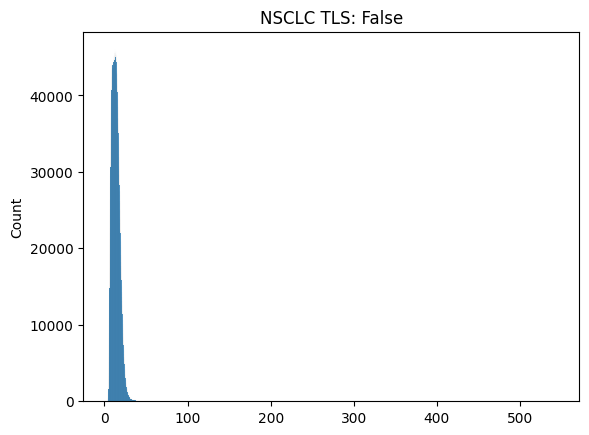

  0%|          | 0/49 [00:00<?, ?it/s]

n_neighboor : 1  - knn_edges:4168  -  mean distances:6.842519756668411   
n_neighboor : 2  - knn_edges:4168  -  mean distances:7.808902856207254   
n_neighboor : 3  - knn_edges:4168  -  mean distances:8.774415885951228   
n_neighboor : 4  - knn_edges:4168  -  mean distances:9.820867236166446   
n_neighboor : 5  - knn_edges:4168  -  mean distances:10.968503573367176   
n_neighboor : 6  - knn_edges:4168  -  mean distances:12.154099160721676   
n_neighboor : 7  - knn_edges:4168  -  mean distances:13.234917201419906   
n_neighboor : 8  - knn_edges:4168  -  mean distances:14.18276655843501   


  2%|▏         | 1/49 [01:18<1:02:55, 78.65s/it]

n_neighboor : 9  - knn_edges:4168  -  mean distances:15.065198897683812   
n_neighboor : 1  - knn_edges:2804  -  mean distances:7.6771373995062095   
n_neighboor : 2  - knn_edges:2804  -  mean distances:9.127866737372731   
n_neighboor : 3  - knn_edges:2804  -  mean distances:10.51798828099549   
n_neighboor : 4  - knn_edges:2804  -  mean distances:12.000073245631999   
n_neighboor : 5  - knn_edges:2804  -  mean distances:13.44293387551385   
n_neighboor : 6  - knn_edges:2804  -  mean distances:14.848796057756397   
n_neighboor : 7  - knn_edges:2804  -  mean distances:16.113426841611098   
n_neighboor : 8  - knn_edges:2804  -  mean distances:17.246077663373743   


  4%|▍         | 2/49 [01:54<41:47, 53.35s/it]  

n_neighboor : 9  - knn_edges:2804  -  mean distances:18.304500510198285   
n_neighboor : 1  - knn_edges:4525  -  mean distances:6.812660623577351   
n_neighboor : 2  - knn_edges:4525  -  mean distances:7.788828373888001   
n_neighboor : 3  - knn_edges:4525  -  mean distances:8.726249876474665   
n_neighboor : 4  - knn_edges:4525  -  mean distances:9.706481051590611   
n_neighboor : 5  - knn_edges:4525  -  mean distances:10.82324408920954   
n_neighboor : 6  - knn_edges:4525  -  mean distances:11.971125676044638   
n_neighboor : 7  - knn_edges:4525  -  mean distances:13.007269578536848   
n_neighboor : 8  - knn_edges:4525  -  mean distances:13.937565842373939   


  6%|▌         | 3/49 [03:29<55:31, 72.42s/it]

n_neighboor : 9  - knn_edges:4525  -  mean distances:14.797712527043819   
n_neighboor : 1  - knn_edges:3232  -  mean distances:7.025859169770162   
n_neighboor : 2  - knn_edges:3232  -  mean distances:8.250136792512796   
n_neighboor : 3  - knn_edges:3232  -  mean distances:9.460018271383067   
n_neighboor : 4  - knn_edges:3232  -  mean distances:10.723255889697283   
n_neighboor : 5  - knn_edges:3232  -  mean distances:12.011801466831544   
n_neighboor : 6  - knn_edges:3232  -  mean distances:13.26541024024099   
n_neighboor : 7  - knn_edges:3232  -  mean distances:14.446460833743005   
n_neighboor : 8  - knn_edges:3232  -  mean distances:15.508322063254573   


  8%|▊         | 4/49 [04:17<47:04, 62.77s/it]

n_neighboor : 9  - knn_edges:3232  -  mean distances:16.465960154558264   
n_neighboor : 1  - knn_edges:3610  -  mean distances:7.073749041040218   
n_neighboor : 2  - knn_edges:3610  -  mean distances:8.163143455616638   
n_neighboor : 3  - knn_edges:3610  -  mean distances:9.264879232950985   
n_neighboor : 4  - knn_edges:3610  -  mean distances:10.438528393824825   
n_neighboor : 5  - knn_edges:3610  -  mean distances:11.672378354986453   
n_neighboor : 6  - knn_edges:3610  -  mean distances:12.864978113501266   
n_neighboor : 7  - knn_edges:3610  -  mean distances:13.97291871878943   
n_neighboor : 8  - knn_edges:3610  -  mean distances:14.976743986474819   


 10%|█         | 5/49 [05:18<45:36, 62.19s/it]

n_neighboor : 9  - knn_edges:3610  -  mean distances:15.877354944917322   
n_neighboor : 1  - knn_edges:2225  -  mean distances:6.478338122384203   
n_neighboor : 2  - knn_edges:2225  -  mean distances:7.507166987618864   
n_neighboor : 3  - knn_edges:2225  -  mean distances:8.525068816589378   
n_neighboor : 4  - knn_edges:2225  -  mean distances:9.591466655866295   
n_neighboor : 5  - knn_edges:2225  -  mean distances:10.74659363317679   
n_neighboor : 6  - knn_edges:2225  -  mean distances:11.94352249852334   
n_neighboor : 7  - knn_edges:2225  -  mean distances:13.004461333078225   
n_neighboor : 8  - knn_edges:2225  -  mean distances:13.915828743097602   


 12%|█▏        | 6/49 [05:41<34:57, 48.77s/it]

n_neighboor : 9  - knn_edges:2225  -  mean distances:14.737814864161138   
n_neighboor : 1  - knn_edges:5987  -  mean distances:6.180127004744923   
n_neighboor : 2  - knn_edges:5987  -  mean distances:6.956270808809853   
n_neighboor : 3  - knn_edges:5987  -  mean distances:7.689933095744244   
n_neighboor : 4  - knn_edges:5987  -  mean distances:8.492076831253428   
n_neighboor : 5  - knn_edges:5987  -  mean distances:9.460470356563333   
n_neighboor : 6  - knn_edges:5987  -  mean distances:10.504351723342047   
n_neighboor : 7  - knn_edges:5987  -  mean distances:11.497943194434471   
n_neighboor : 8  - knn_edges:5987  -  mean distances:12.323602421343875   


 14%|█▍        | 7/49 [08:30<1:01:36, 88.02s/it]

n_neighboor : 9  - knn_edges:5987  -  mean distances:13.06449090894172   
n_neighboor : 1  - knn_edges:3374  -  mean distances:7.225367918663756   
n_neighboor : 2  - knn_edges:3374  -  mean distances:8.477468021807649   
n_neighboor : 3  - knn_edges:3374  -  mean distances:9.68913462877705   
n_neighboor : 4  - knn_edges:3374  -  mean distances:10.971841917982072   
n_neighboor : 5  - knn_edges:3374  -  mean distances:12.28952806380917   
n_neighboor : 6  - knn_edges:3374  -  mean distances:13.585033421071303   
n_neighboor : 7  - knn_edges:3374  -  mean distances:14.75891978494514   
n_neighboor : 8  - knn_edges:3374  -  mean distances:15.823841867730234   


 16%|█▋        | 8/49 [09:22<52:18, 76.55s/it]  

n_neighboor : 9  - knn_edges:3374  -  mean distances:16.802563985932952   
n_neighboor : 1  - knn_edges:4372  -  mean distances:6.669614615888794   
n_neighboor : 2  - knn_edges:4372  -  mean distances:7.584419753385496   
n_neighboor : 3  - knn_edges:4372  -  mean distances:8.485403822598315   
n_neighboor : 4  - knn_edges:4372  -  mean distances:9.478972887404536   
n_neighboor : 5  - knn_edges:4372  -  mean distances:10.597719705294427   
n_neighboor : 6  - knn_edges:4372  -  mean distances:11.777981781322561   
n_neighboor : 7  - knn_edges:4372  -  mean distances:12.840323088872294   
n_neighboor : 8  - knn_edges:4372  -  mean distances:13.73737143278428   


 18%|█▊        | 9/49 [10:52<53:59, 81.00s/it]

n_neighboor : 9  - knn_edges:4372  -  mean distances:14.55660847624831   
n_neighboor : 1  - knn_edges:3615  -  mean distances:6.852772506590279   
n_neighboor : 2  - knn_edges:3615  -  mean distances:7.932696745957618   
n_neighboor : 3  - knn_edges:3615  -  mean distances:8.978278660087089   
n_neighboor : 4  - knn_edges:3615  -  mean distances:10.088360926350822   
n_neighboor : 5  - knn_edges:3615  -  mean distances:11.30046570382688   
n_neighboor : 6  - knn_edges:3615  -  mean distances:12.506032716202899   
n_neighboor : 7  - knn_edges:3615  -  mean distances:13.630854165885824   
n_neighboor : 8  - knn_edges:3615  -  mean distances:14.590658626107642   


 20%|██        | 10/49 [11:54<48:42, 74.94s/it]

n_neighboor : 9  - knn_edges:3615  -  mean distances:15.444035061601527   
n_neighboor : 1  - knn_edges:4054  -  mean distances:6.853691500177394   
n_neighboor : 2  - knn_edges:4054  -  mean distances:7.939854880927322   
n_neighboor : 3  - knn_edges:4054  -  mean distances:9.000393603641387   
n_neighboor : 4  - knn_edges:4054  -  mean distances:10.082489073342211   
n_neighboor : 5  - knn_edges:4054  -  mean distances:11.28182343360837   
n_neighboor : 6  - knn_edges:4054  -  mean distances:12.465352890493103   
n_neighboor : 7  - knn_edges:4054  -  mean distances:13.536280352139887   
n_neighboor : 8  - knn_edges:4054  -  mean distances:14.498661061180146   


 22%|██▏       | 11/49 [13:11<48:00, 75.79s/it]

n_neighboor : 9  - knn_edges:4054  -  mean distances:15.373256337377105   
n_neighboor : 1  - knn_edges:3971  -  mean distances:6.856747807675153   
n_neighboor : 2  - knn_edges:3971  -  mean distances:7.971272278484787   
n_neighboor : 3  - knn_edges:3971  -  mean distances:9.097088912363994   
n_neighboor : 4  - knn_edges:3971  -  mean distances:10.309741564522962   
n_neighboor : 5  - knn_edges:3971  -  mean distances:11.526530850663127   
n_neighboor : 6  - knn_edges:3971  -  mean distances:12.731639894743957   
n_neighboor : 7  - knn_edges:3971  -  mean distances:13.838633578864993   
n_neighboor : 8  - knn_edges:3971  -  mean distances:14.83625357246038   


 24%|██▍       | 12/49 [14:26<46:34, 75.53s/it]

n_neighboor : 9  - knn_edges:3971  -  mean distances:15.720903722218612   
n_neighboor : 1  - knn_edges:3980  -  mean distances:6.888075770141753   
n_neighboor : 2  - knn_edges:3980  -  mean distances:7.974743625054594   
n_neighboor : 3  - knn_edges:3980  -  mean distances:9.036531809703714   
n_neighboor : 4  - knn_edges:3980  -  mean distances:10.101697330082747   
n_neighboor : 5  - knn_edges:3980  -  mean distances:11.290090193868894   
n_neighboor : 6  - knn_edges:3980  -  mean distances:12.476823352073247   
n_neighboor : 7  - knn_edges:3980  -  mean distances:13.535488489901757   
n_neighboor : 8  - knn_edges:3980  -  mean distances:14.518604623670237   


 27%|██▋       | 13/49 [15:41<45:09, 75.26s/it]

n_neighboor : 9  - knn_edges:3980  -  mean distances:15.39205563449432   
n_neighboor : 1  - knn_edges:1509  -  mean distances:9.449214749489467   
n_neighboor : 2  - knn_edges:1509  -  mean distances:11.970000048082833   
n_neighboor : 3  - knn_edges:1509  -  mean distances:14.323504374778718   
n_neighboor : 4  - knn_edges:1509  -  mean distances:16.52422262148018   
n_neighboor : 5  - knn_edges:1509  -  mean distances:18.53410387897328   
n_neighboor : 6  - knn_edges:1509  -  mean distances:20.45315931162514   
n_neighboor : 7  - knn_edges:1509  -  mean distances:22.201586148884495   
n_neighboor : 8  - knn_edges:1509  -  mean distances:23.814759835063892   


 29%|██▊       | 14/49 [15:51<32:25, 55.59s/it]

n_neighboor : 9  - knn_edges:1509  -  mean distances:25.33534826397257   
n_neighboor : 1  - knn_edges:3145  -  mean distances:7.694605397579374   
n_neighboor : 2  - knn_edges:3145  -  mean distances:9.020065649782076   
n_neighboor : 3  - knn_edges:3145  -  mean distances:10.339662967595554   
n_neighboor : 4  - knn_edges:3145  -  mean distances:11.64472439128915   
n_neighboor : 5  - knn_edges:3145  -  mean distances:12.993615202112926   
n_neighboor : 6  - knn_edges:3145  -  mean distances:14.3587433079777   
n_neighboor : 7  - knn_edges:3145  -  mean distances:15.568570450528934   
n_neighboor : 8  - knn_edges:3145  -  mean distances:16.72068078253628   


 31%|███       | 15/49 [16:38<30:02, 53.02s/it]

n_neighboor : 9  - knn_edges:3145  -  mean distances:17.741209463738436   
n_neighboor : 1  - knn_edges:3898  -  mean distances:7.4036031407630345   
n_neighboor : 2  - knn_edges:3898  -  mean distances:8.478831580708489   
n_neighboor : 3  - knn_edges:3898  -  mean distances:9.527739433968282   
n_neighboor : 4  - knn_edges:3898  -  mean distances:10.60431455481092   
n_neighboor : 5  - knn_edges:3898  -  mean distances:11.823802241699424   
n_neighboor : 6  - knn_edges:3898  -  mean distances:13.066753243108833   
n_neighboor : 7  - knn_edges:3898  -  mean distances:14.2414748341917   
n_neighboor : 8  - knn_edges:3898  -  mean distances:15.259855731909363   


 33%|███▎      | 16/49 [17:50<32:14, 58.62s/it]

n_neighboor : 9  - knn_edges:3898  -  mean distances:16.168341808572166   
n_neighboor : 1  - knn_edges:2316  -  mean distances:8.66696649957809   
n_neighboor : 2  - knn_edges:2316  -  mean distances:10.32854250691292   
n_neighboor : 3  - knn_edges:2316  -  mean distances:12.011518221558287   
n_neighboor : 4  - knn_edges:2316  -  mean distances:13.731706369899966   
n_neighboor : 5  - knn_edges:2316  -  mean distances:15.459690068655465   
n_neighboor : 6  - knn_edges:2316  -  mean distances:17.059903558586388   
n_neighboor : 7  - knn_edges:2316  -  mean distances:18.49177922167449   
n_neighboor : 8  - knn_edges:2316  -  mean distances:19.744682004782568   


 35%|███▍      | 17/49 [18:15<25:50, 48.45s/it]

n_neighboor : 9  - knn_edges:2316  -  mean distances:20.966633977570815   
n_neighboor : 1  - knn_edges:2269  -  mean distances:8.424601254532913   
n_neighboor : 2  - knn_edges:2269  -  mean distances:10.23452535428322   
n_neighboor : 3  - knn_edges:2269  -  mean distances:11.93129231524494   
n_neighboor : 4  - knn_edges:2269  -  mean distances:13.734065668682977   
n_neighboor : 5  - knn_edges:2269  -  mean distances:15.436693218601082   
n_neighboor : 6  - knn_edges:2269  -  mean distances:17.00442406002484   
n_neighboor : 7  - knn_edges:2269  -  mean distances:18.43232709972766   
n_neighboor : 8  - knn_edges:2269  -  mean distances:19.728033971986147   


 37%|███▋      | 18/49 [18:39<21:16, 41.18s/it]

n_neighboor : 9  - knn_edges:2269  -  mean distances:20.95912053265335   
n_neighboor : 1  - knn_edges:3535  -  mean distances:7.251411686894906   
n_neighboor : 2  - knn_edges:3535  -  mean distances:8.452253707970916   
n_neighboor : 3  - knn_edges:3535  -  mean distances:9.629391441830554   
n_neighboor : 4  - knn_edges:3535  -  mean distances:10.83130004938111   
n_neighboor : 5  - knn_edges:3535  -  mean distances:12.127479841933482   
n_neighboor : 6  - knn_edges:3535  -  mean distances:13.424969609870358   
n_neighboor : 7  - knn_edges:3535  -  mean distances:14.579118911851774   
n_neighboor : 8  - knn_edges:3535  -  mean distances:15.627946744195404   


 39%|███▉      | 19/49 [19:39<23:27, 46.91s/it]

n_neighboor : 9  - knn_edges:3535  -  mean distances:16.569131636592417   
n_neighboor : 1  - knn_edges:3249  -  mean distances:7.420535684145773   
n_neighboor : 2  - knn_edges:3249  -  mean distances:8.605283698712148   
n_neighboor : 3  - knn_edges:3249  -  mean distances:9.753713784730548   
n_neighboor : 4  - knn_edges:3249  -  mean distances:10.982812865337731   
n_neighboor : 5  - knn_edges:3249  -  mean distances:12.27558022541827   
n_neighboor : 6  - knn_edges:3249  -  mean distances:13.596520706768185   
n_neighboor : 7  - knn_edges:3249  -  mean distances:14.806364600083196   
n_neighboor : 8  - knn_edges:3249  -  mean distances:15.862329177981795   


 41%|████      | 20/49 [20:31<23:24, 48.44s/it]

n_neighboor : 9  - knn_edges:3249  -  mean distances:16.8332197211284   
n_neighboor : 1  - knn_edges:3705  -  mean distances:7.412948369082868   
n_neighboor : 2  - knn_edges:3705  -  mean distances:8.556782063547814   
n_neighboor : 3  - knn_edges:3705  -  mean distances:9.616853711679715   
n_neighboor : 4  - knn_edges:3705  -  mean distances:10.734330901927407   
n_neighboor : 5  - knn_edges:3705  -  mean distances:11.949324194806511   
n_neighboor : 6  - knn_edges:3705  -  mean distances:13.214276540292948   
n_neighboor : 7  - knn_edges:3705  -  mean distances:14.398516813621866   
n_neighboor : 8  - knn_edges:3705  -  mean distances:15.461582911827675   


 43%|████▎     | 21/49 [21:36<24:54, 53.37s/it]

n_neighboor : 9  - knn_edges:3705  -  mean distances:16.392802455908832   
n_neighboor : 1  - knn_edges:3218  -  mean distances:7.354389764138653   
n_neighboor : 2  - knn_edges:3218  -  mean distances:8.784167940276602   
n_neighboor : 3  - knn_edges:3218  -  mean distances:10.15183004702863   
n_neighboor : 4  - knn_edges:3218  -  mean distances:11.552466946994507   
n_neighboor : 5  - knn_edges:3218  -  mean distances:12.92400018948254   
n_neighboor : 6  - knn_edges:3218  -  mean distances:14.263993930592816   
n_neighboor : 7  - knn_edges:3218  -  mean distances:15.476949950494964   
n_neighboor : 8  - knn_edges:3218  -  mean distances:16.576155714480723   


 45%|████▍     | 22/49 [22:25<23:22, 51.96s/it]

n_neighboor : 9  - knn_edges:3218  -  mean distances:17.594299223773522   
n_neighboor : 1  - knn_edges:2576  -  mean distances:7.775073939409346   
n_neighboor : 2  - knn_edges:2576  -  mean distances:9.05465867652284   
n_neighboor : 3  - knn_edges:2576  -  mean distances:10.412480073600838   
n_neighboor : 4  - knn_edges:2576  -  mean distances:11.863246082778204   
n_neighboor : 5  - knn_edges:2576  -  mean distances:13.3601377454721   
n_neighboor : 6  - knn_edges:2576  -  mean distances:14.747669150940157   
n_neighboor : 7  - knn_edges:2576  -  mean distances:16.083129196741098   
n_neighboor : 8  - knn_edges:2576  -  mean distances:17.235047565642176   


 47%|████▋     | 23/49 [22:56<19:48, 45.73s/it]

n_neighboor : 9  - knn_edges:2576  -  mean distances:18.26842979219453   
n_neighboor : 1  - knn_edges:3272  -  mean distances:6.570238780881895   
n_neighboor : 2  - knn_edges:3272  -  mean distances:7.908551467085516   
n_neighboor : 3  - knn_edges:3272  -  mean distances:9.244971113742627   
n_neighboor : 4  - knn_edges:3272  -  mean distances:10.546411585793923   
n_neighboor : 5  - knn_edges:3272  -  mean distances:11.801152383966894   
n_neighboor : 6  - knn_edges:3272  -  mean distances:12.961012460155443   
n_neighboor : 7  - knn_edges:3272  -  mean distances:14.029460936768968   
n_neighboor : 8  - knn_edges:3272  -  mean distances:15.04059934442409   


 49%|████▉     | 24/49 [23:48<19:52, 47.70s/it]

n_neighboor : 9  - knn_edges:3272  -  mean distances:16.0157002470858   
n_neighboor : 1  - knn_edges:3208  -  mean distances:7.760281224006212   
n_neighboor : 2  - knn_edges:3208  -  mean distances:9.18648980785647   
n_neighboor : 3  - knn_edges:3208  -  mean distances:10.513463649079045   
n_neighboor : 4  - knn_edges:3208  -  mean distances:11.862769645415858   
n_neighboor : 5  - knn_edges:3208  -  mean distances:13.246985388119747   
n_neighboor : 6  - knn_edges:3208  -  mean distances:14.563939042282074   
n_neighboor : 7  - knn_edges:3208  -  mean distances:15.818247791092654   
n_neighboor : 8  - knn_edges:3208  -  mean distances:16.967960603660604   


 51%|█████     | 25/49 [24:37<19:15, 48.13s/it]

n_neighboor : 9  - knn_edges:3208  -  mean distances:18.003851555192345   
n_neighboor : 1  - knn_edges:3157  -  mean distances:6.921105061749597   
n_neighboor : 2  - knn_edges:3157  -  mean distances:7.989822858911817   
n_neighboor : 3  - knn_edges:3157  -  mean distances:9.0601414840574   
n_neighboor : 4  - knn_edges:3157  -  mean distances:10.1684440482489   
n_neighboor : 5  - knn_edges:3157  -  mean distances:11.413914627822509   
n_neighboor : 6  - knn_edges:3157  -  mean distances:12.63055678336521   
n_neighboor : 7  - knn_edges:3157  -  mean distances:13.732102894989088   
n_neighboor : 8  - knn_edges:3157  -  mean distances:14.733524480205393   


 53%|█████▎    | 26/49 [25:24<18:20, 47.83s/it]

n_neighboor : 9  - knn_edges:3157  -  mean distances:15.63680537553077   
n_neighboor : 1  - knn_edges:3701  -  mean distances:7.012578857358779   
n_neighboor : 2  - knn_edges:3701  -  mean distances:8.173583876305596   
n_neighboor : 3  - knn_edges:3701  -  mean distances:9.299278973455257   
n_neighboor : 4  - knn_edges:3701  -  mean distances:10.431509912186018   
n_neighboor : 5  - knn_edges:3701  -  mean distances:11.662494307652208   
n_neighboor : 6  - knn_edges:3701  -  mean distances:12.86969275004244   
n_neighboor : 7  - knn_edges:3701  -  mean distances:13.99764063185527   
n_neighboor : 8  - knn_edges:3701  -  mean distances:14.974128823059587   


 55%|█████▌    | 27/49 [26:32<19:44, 53.86s/it]

n_neighboor : 9  - knn_edges:3701  -  mean distances:15.890175943946852   
n_neighboor : 1  - knn_edges:3768  -  mean distances:7.01538755570905   
n_neighboor : 2  - knn_edges:3768  -  mean distances:8.103638609581047   
n_neighboor : 3  - knn_edges:3768  -  mean distances:9.154043817441467   
n_neighboor : 4  - knn_edges:3768  -  mean distances:10.264639515391044   
n_neighboor : 5  - knn_edges:3768  -  mean distances:11.422563230220618   
n_neighboor : 6  - knn_edges:3768  -  mean distances:12.648462312835642   
n_neighboor : 7  - knn_edges:3768  -  mean distances:13.816019055615712   
n_neighboor : 8  - knn_edges:3768  -  mean distances:14.839541723853825   


 57%|█████▋    | 28/49 [27:39<20:13, 57.79s/it]

n_neighboor : 9  - knn_edges:3768  -  mean distances:15.749725370477854   
n_neighboor : 1  - knn_edges:1806  -  mean distances:6.72568625900935   
n_neighboor : 2  - knn_edges:1806  -  mean distances:7.758480308901874   
n_neighboor : 3  - knn_edges:1806  -  mean distances:8.759083351755375   
n_neighboor : 4  - knn_edges:1806  -  mean distances:9.789200445162825   
n_neighboor : 5  - knn_edges:1806  -  mean distances:10.91606065509131   
n_neighboor : 6  - knn_edges:1806  -  mean distances:12.090597991154203   
n_neighboor : 7  - knn_edges:1806  -  mean distances:13.194774379756593   
n_neighboor : 8  - knn_edges:1806  -  mean distances:14.195887835265568   


 59%|█████▉    | 29/49 [27:54<14:56, 44.85s/it]

n_neighboor : 9  - knn_edges:1806  -  mean distances:15.074425315509632   
n_neighboor : 1  - knn_edges:2682  -  mean distances:7.534225920381805   
n_neighboor : 2  - knn_edges:2682  -  mean distances:9.124836157128563   
n_neighboor : 3  - knn_edges:2682  -  mean distances:10.673504472119708   
n_neighboor : 4  - knn_edges:2682  -  mean distances:12.222065270574035   
n_neighboor : 5  - knn_edges:2682  -  mean distances:13.70137753339288   
n_neighboor : 6  - knn_edges:2682  -  mean distances:15.024313237215193   
n_neighboor : 7  - knn_edges:2682  -  mean distances:16.28371109249064   
n_neighboor : 8  - knn_edges:2682  -  mean distances:17.44725737901194   


 61%|██████    | 30/49 [28:28<13:09, 41.56s/it]

n_neighboor : 9  - knn_edges:2682  -  mean distances:18.564410911083687   
n_neighboor : 1  - knn_edges:319  -  mean distances:9.563371481446397   
n_neighboor : 2  - knn_edges:319  -  mean distances:12.602944470000576   
n_neighboor : 3  - knn_edges:319  -  mean distances:15.536073432954613   
n_neighboor : 4  - knn_edges:319  -  mean distances:17.971852579647358   
n_neighboor : 5  - knn_edges:319  -  mean distances:20.236273134688194   
n_neighboor : 6  - knn_edges:319  -  mean distances:22.176763147660644   
n_neighboor : 7  - knn_edges:319  -  mean distances:24.16462962266372   


 63%|██████▎   | 31/49 [28:28<08:46, 29.26s/it]

n_neighboor : 8  - knn_edges:319  -  mean distances:26.085347387457276   
n_neighboor : 9  - knn_edges:319  -  mean distances:27.83793477674872   
n_neighboor : 1  - knn_edges:3941  -  mean distances:6.55885458942783   
n_neighboor : 2  - knn_edges:3941  -  mean distances:7.510630842648913   
n_neighboor : 3  - knn_edges:3941  -  mean distances:8.44805153985658   
n_neighboor : 4  - knn_edges:3941  -  mean distances:9.434103604342011   
n_neighboor : 5  - knn_edges:3941  -  mean distances:10.518284875416985   
n_neighboor : 6  - knn_edges:3941  -  mean distances:11.687069065102392   
n_neighboor : 7  - knn_edges:3941  -  mean distances:12.721675326468901   
n_neighboor : 8  - knn_edges:3941  -  mean distances:13.609087523142657   


 65%|██████▌   | 32/49 [29:43<12:07, 42.78s/it]

n_neighboor : 9  - knn_edges:3941  -  mean distances:14.428658649422042   
n_neighboor : 1  - knn_edges:1411  -  mean distances:7.173729212166597   
n_neighboor : 2  - knn_edges:1411  -  mean distances:8.31838763542459   
n_neighboor : 3  - knn_edges:1411  -  mean distances:9.488535522325757   
n_neighboor : 4  - knn_edges:1411  -  mean distances:10.711576624996454   
n_neighboor : 5  - knn_edges:1411  -  mean distances:12.002884261337687   
n_neighboor : 6  - knn_edges:1411  -  mean distances:13.25918241828919   
n_neighboor : 7  - knn_edges:1411  -  mean distances:14.403359219668879   
n_neighboor : 8  - knn_edges:1411  -  mean distances:15.4148781704136   


 67%|██████▋   | 33/49 [29:52<08:41, 32.60s/it]

n_neighboor : 9  - knn_edges:1411  -  mean distances:16.380841413225316   
n_neighboor : 1  - knn_edges:2678  -  mean distances:8.264684604360205   
n_neighboor : 2  - knn_edges:2678  -  mean distances:9.631539623463501   
n_neighboor : 3  - knn_edges:2678  -  mean distances:10.932775406168085   
n_neighboor : 4  - knn_edges:2678  -  mean distances:12.262002543729777   
n_neighboor : 5  - knn_edges:2678  -  mean distances:13.740061695897733   
n_neighboor : 6  - knn_edges:2678  -  mean distances:15.152721910467084   
n_neighboor : 7  - knn_edges:2678  -  mean distances:16.445398189174206   
n_neighboor : 8  - knn_edges:2678  -  mean distances:17.627011126342477   


 69%|██████▉   | 34/49 [30:26<08:17, 33.18s/it]

n_neighboor : 9  - knn_edges:2678  -  mean distances:18.723873641407778   
n_neighboor : 1  - knn_edges:2836  -  mean distances:7.955337545796269   
n_neighboor : 2  - knn_edges:2836  -  mean distances:9.336733842732693   
n_neighboor : 3  - knn_edges:2836  -  mean distances:10.693944228537216   
n_neighboor : 4  - knn_edges:2836  -  mean distances:12.049562404923554   
n_neighboor : 5  - knn_edges:2836  -  mean distances:13.45561709523076   
n_neighboor : 6  - knn_edges:2836  -  mean distances:14.870899267202825   
n_neighboor : 7  - knn_edges:2836  -  mean distances:16.159857801829567   
n_neighboor : 8  - knn_edges:2836  -  mean distances:17.333011857654988   


 71%|███████▏  | 35/49 [31:05<08:07, 34.84s/it]

n_neighboor : 9  - knn_edges:2836  -  mean distances:18.419058493799504   
n_neighboor : 1  - knn_edges:4411  -  mean distances:6.773926823332662   
n_neighboor : 2  - knn_edges:4411  -  mean distances:7.694811987366076   
n_neighboor : 3  - knn_edges:4411  -  mean distances:8.601835543207166   
n_neighboor : 4  - knn_edges:4411  -  mean distances:9.581997071745793   
n_neighboor : 5  - knn_edges:4411  -  mean distances:10.715595623262228   
n_neighboor : 6  - knn_edges:4411  -  mean distances:11.886994840403732   
n_neighboor : 7  - knn_edges:4411  -  mean distances:12.957423309097598   
n_neighboor : 8  - knn_edges:4411  -  mean distances:13.908106059869068   


 73%|███████▎  | 36/49 [32:38<11:18, 52.22s/it]

n_neighboor : 9  - knn_edges:4411  -  mean distances:14.703405436975585   
n_neighboor : 1  - knn_edges:2295  -  mean distances:7.07474429668058   
n_neighboor : 2  - knn_edges:2295  -  mean distances:8.341199872852366   
n_neighboor : 3  - knn_edges:2295  -  mean distances:9.684841121624345   
n_neighboor : 4  - knn_edges:2295  -  mean distances:11.054757422404165   
n_neighboor : 5  - knn_edges:2295  -  mean distances:12.4258074036575   
n_neighboor : 6  - knn_edges:2295  -  mean distances:13.741422678801774   
n_neighboor : 7  - knn_edges:2295  -  mean distances:14.913789269816498   
n_neighboor : 8  - knn_edges:2295  -  mean distances:15.960522725702512   


 76%|███████▌  | 37/49 [33:02<08:45, 43.78s/it]

n_neighboor : 9  - knn_edges:2295  -  mean distances:16.978650275795278   
n_neighboor : 1  - knn_edges:2470  -  mean distances:7.96092608920835   
n_neighboor : 2  - knn_edges:2470  -  mean distances:9.498394647121948   
n_neighboor : 3  - knn_edges:2470  -  mean distances:11.010941653429496   
n_neighboor : 4  - knn_edges:2470  -  mean distances:12.529194696030297   
n_neighboor : 5  - knn_edges:2470  -  mean distances:14.046394598907012   
n_neighboor : 6  - knn_edges:2470  -  mean distances:15.512125829870804   
n_neighboor : 7  - knn_edges:2470  -  mean distances:16.87039319568887   
n_neighboor : 8  - knn_edges:2470  -  mean distances:18.082239744702928   


 78%|███████▊  | 38/49 [33:31<07:13, 39.37s/it]

n_neighboor : 9  - knn_edges:2470  -  mean distances:19.220698411518704   
n_neighboor : 1  - knn_edges:2617  -  mean distances:7.045414903335365   
n_neighboor : 2  - knn_edges:2617  -  mean distances:8.663135294603784   
n_neighboor : 3  - knn_edges:2617  -  mean distances:10.17540478072819   
n_neighboor : 4  - knn_edges:2617  -  mean distances:11.654131438908674   
n_neighboor : 5  - knn_edges:2617  -  mean distances:13.080392471214418   
n_neighboor : 6  - knn_edges:2617  -  mean distances:14.450911201648582   
n_neighboor : 7  - knn_edges:2617  -  mean distances:15.653132045892285   
n_neighboor : 8  - knn_edges:2617  -  mean distances:16.764880115012318   


 80%|███████▉  | 39/49 [34:03<06:13, 37.34s/it]

n_neighboor : 9  - knn_edges:2617  -  mean distances:17.823799361154535   
n_neighboor : 1  - knn_edges:3368  -  mean distances:7.744560338232258   
n_neighboor : 2  - knn_edges:3368  -  mean distances:8.947494045502417   
n_neighboor : 3  - knn_edges:3368  -  mean distances:10.098994093897042   
n_neighboor : 4  - knn_edges:3368  -  mean distances:11.329668695184457   
n_neighboor : 5  - knn_edges:3368  -  mean distances:12.610313778944079   
n_neighboor : 6  - knn_edges:3368  -  mean distances:13.906634373274581   
n_neighboor : 7  - knn_edges:3368  -  mean distances:15.119570278705295   
n_neighboor : 8  - knn_edges:3368  -  mean distances:16.222564620364395   


 82%|████████▏ | 40/49 [34:58<06:21, 42.37s/it]

n_neighboor : 9  - knn_edges:3368  -  mean distances:17.217821038772097   
n_neighboor : 1  - knn_edges:2793  -  mean distances:7.231391715043916   
n_neighboor : 2  - knn_edges:2793  -  mean distances:8.6180288925168   
n_neighboor : 3  - knn_edges:2793  -  mean distances:9.999882420943948   
n_neighboor : 4  - knn_edges:2793  -  mean distances:11.408927179202417   
n_neighboor : 5  - knn_edges:2793  -  mean distances:12.82888755369514   
n_neighboor : 6  - knn_edges:2793  -  mean distances:14.212107226161043   
n_neighboor : 7  - knn_edges:2793  -  mean distances:15.427831686425852   
n_neighboor : 8  - knn_edges:2793  -  mean distances:16.51651181314428   


 84%|████████▎ | 41/49 [35:34<05:24, 40.55s/it]

n_neighboor : 9  - knn_edges:2793  -  mean distances:17.541458549375534   
n_neighboor : 1  - knn_edges:3828  -  mean distances:7.013861034238007   
n_neighboor : 2  - knn_edges:3828  -  mean distances:8.20682875457308   
n_neighboor : 3  - knn_edges:3828  -  mean distances:9.405958288071586   
n_neighboor : 4  - knn_edges:3828  -  mean distances:10.613082149487234   
n_neighboor : 5  - knn_edges:3828  -  mean distances:11.852099674641575   
n_neighboor : 6  - knn_edges:3828  -  mean distances:13.04245813949104   
n_neighboor : 7  - knn_edges:3828  -  mean distances:14.145831247311525   
n_neighboor : 8  - knn_edges:3828  -  mean distances:15.128152483930178   


 86%|████████▌ | 42/49 [36:44<05:46, 49.55s/it]

n_neighboor : 9  - knn_edges:3828  -  mean distances:16.042584450604004   
n_neighboor : 1  - knn_edges:2676  -  mean distances:7.172068262716989   
n_neighboor : 2  - knn_edges:2676  -  mean distances:8.686541416930186   
n_neighboor : 3  - knn_edges:2676  -  mean distances:10.267491121761465   
n_neighboor : 4  - knn_edges:2676  -  mean distances:11.8371325775279   
n_neighboor : 5  - knn_edges:2676  -  mean distances:13.28553322316267   
n_neighboor : 6  - knn_edges:2676  -  mean distances:14.676835460594615   
n_neighboor : 7  - knn_edges:2676  -  mean distances:15.95498176716663   
n_neighboor : 8  - knn_edges:2676  -  mean distances:17.1172270039572   


 88%|████████▊ | 43/49 [37:16<04:25, 44.25s/it]

n_neighboor : 9  - knn_edges:2676  -  mean distances:18.1997802432496   
n_neighboor : 1  - knn_edges:4257  -  mean distances:6.699591392853118   
n_neighboor : 2  - knn_edges:4257  -  mean distances:7.663417101369101   
n_neighboor : 3  - knn_edges:4257  -  mean distances:8.637713599582167   
n_neighboor : 4  - knn_edges:4257  -  mean distances:9.67118145327693   
n_neighboor : 5  - knn_edges:4257  -  mean distances:10.818480467580118   
n_neighboor : 6  - knn_edges:4257  -  mean distances:11.993881072293707   
n_neighboor : 7  - knn_edges:4257  -  mean distances:13.066145271933136   
n_neighboor : 8  - knn_edges:4257  -  mean distances:13.986623059305321   


 90%|████████▉ | 44/49 [38:45<04:47, 57.47s/it]

n_neighboor : 9  - knn_edges:4257  -  mean distances:14.817924306983185   
n_neighboor : 1  - knn_edges:3626  -  mean distances:6.832541288782401   
n_neighboor : 2  - knn_edges:3626  -  mean distances:8.050505258272425   
n_neighboor : 3  - knn_edges:3626  -  mean distances:9.295380107900204   
n_neighboor : 4  - knn_edges:3626  -  mean distances:10.615237219226604   
n_neighboor : 5  - knn_edges:3626  -  mean distances:11.93292453265799   
n_neighboor : 6  - knn_edges:3626  -  mean distances:13.14063690905463   
n_neighboor : 7  - knn_edges:3626  -  mean distances:14.231460290289109   
n_neighboor : 8  - knn_edges:3626  -  mean distances:15.238941846622797   


 92%|█████████▏| 45/49 [39:48<03:56, 59.16s/it]

n_neighboor : 9  - knn_edges:3626  -  mean distances:16.189269484697647   
n_neighboor : 1  - knn_edges:2707  -  mean distances:7.557160513273315   
n_neighboor : 2  - knn_edges:2707  -  mean distances:9.064387793262375   
n_neighboor : 3  - knn_edges:2707  -  mean distances:10.570055073631023   
n_neighboor : 4  - knn_edges:2707  -  mean distances:12.081466067220058   
n_neighboor : 5  - knn_edges:2707  -  mean distances:13.57956979695575   
n_neighboor : 6  - knn_edges:2707  -  mean distances:14.97335867534377   
n_neighboor : 7  - knn_edges:2707  -  mean distances:16.24655803384326   
n_neighboor : 8  - knn_edges:2707  -  mean distances:17.402006370456792   


 94%|█████████▍| 46/49 [40:23<02:35, 51.92s/it]

n_neighboor : 9  - knn_edges:2707  -  mean distances:18.44582445356602   
n_neighboor : 1  - knn_edges:3253  -  mean distances:7.402386254263016   
n_neighboor : 2  - knn_edges:3253  -  mean distances:8.502524577573523   
n_neighboor : 3  - knn_edges:3253  -  mean distances:9.614198862074963   
n_neighboor : 4  - knn_edges:3253  -  mean distances:10.8545974154276   
n_neighboor : 5  - knn_edges:3253  -  mean distances:12.158578670409623   
n_neighboor : 6  - knn_edges:3253  -  mean distances:13.41080212384339   
n_neighboor : 7  - knn_edges:3253  -  mean distances:14.604621639481575   
n_neighboor : 8  - knn_edges:3253  -  mean distances:15.640048958080225   


 96%|█████████▌| 47/49 [41:16<01:44, 52.18s/it]

n_neighboor : 9  - knn_edges:3253  -  mean distances:16.592108066652152   
n_neighboor : 1  - knn_edges:3924  -  mean distances:7.049989153903933   
n_neighboor : 2  - knn_edges:3924  -  mean distances:8.065442508787472   
n_neighboor : 3  - knn_edges:3924  -  mean distances:9.03118583502308   
n_neighboor : 4  - knn_edges:3924  -  mean distances:10.093292907680368   
n_neighboor : 5  - knn_edges:3924  -  mean distances:11.24628870464247   
n_neighboor : 6  - knn_edges:3924  -  mean distances:12.471164320971177   
n_neighboor : 7  - knn_edges:3924  -  mean distances:13.626374168419591   
n_neighboor : 8  - knn_edges:3924  -  mean distances:14.597369576663185   


 98%|█████████▊| 48/49 [42:31<00:59, 59.29s/it]

n_neighboor : 9  - knn_edges:3924  -  mean distances:15.475668596512037   
n_neighboor : 1  - knn_edges:3212  -  mean distances:7.536080657331385   
n_neighboor : 2  - knn_edges:3212  -  mean distances:8.735228799487627   
n_neighboor : 3  - knn_edges:3212  -  mean distances:9.862031400625899   
n_neighboor : 4  - knn_edges:3212  -  mean distances:11.025246246360867   
n_neighboor : 5  - knn_edges:3212  -  mean distances:12.333510590706481   
n_neighboor : 6  - knn_edges:3212  -  mean distances:13.599843592485978   
n_neighboor : 7  - knn_edges:3212  -  mean distances:14.772743327841539   
n_neighboor : 8  - knn_edges:3212  -  mean distances:15.830863950539637   


100%|██████████| 49/49 [43:22<00:00, 53.10s/it]

n_neighboor : 9  - knn_edges:3212  -  mean distances:16.80909023812935   
Total distances for NSCLC TLS True: 1276062


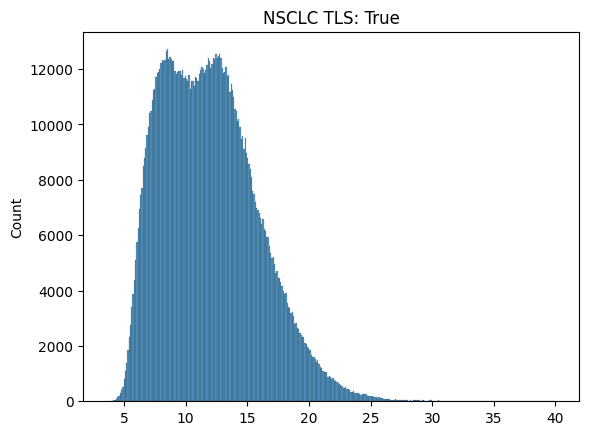

  0%|          | 0/709 [00:00<?, ?it/s]

n_neighboor : 1  - knn_edges:1874  -  mean distances:9.08607097820101   
n_neighboor : 2  - knn_edges:1874  -  mean distances:11.010893611137526   
n_neighboor : 3  - knn_edges:1874  -  mean distances:12.961434833065303   
n_neighboor : 4  - knn_edges:1874  -  mean distances:14.838155743568063   
n_neighboor : 5  - knn_edges:1874  -  mean distances:16.64048226899053   
n_neighboor : 6  - knn_edges:1874  -  mean distances:18.32242644102544   
n_neighboor : 7  - knn_edges:1874  -  mean distances:19.91016427309842   
n_neighboor : 8  - knn_edges:1874  -  mean distances:21.409936185646814   


  0%|          | 1/709 [00:16<3:17:19, 16.72s/it]

n_neighboor : 9  - knn_edges:1874  -  mean distances:22.725485910545824   
n_neighboor : 1  - knn_edges:2002  -  mean distances:9.17329361004085   
n_neighboor : 2  - knn_edges:2002  -  mean distances:11.139086886396488   
n_neighboor : 3  - knn_edges:2002  -  mean distances:12.938382815848094   
n_neighboor : 4  - knn_edges:2002  -  mean distances:14.801416122363973   
n_neighboor : 5  - knn_edges:2002  -  mean distances:16.618233008200857   
n_neighboor : 6  - knn_edges:2002  -  mean distances:18.324566276092913   
n_neighboor : 7  - knn_edges:2002  -  mean distances:19.898795794007384   
n_neighboor : 8  - knn_edges:2002  -  mean distances:21.299974685473728   


  0%|          | 2/709 [00:35<3:32:10, 18.01s/it]

n_neighboor : 9  - knn_edges:2002  -  mean distances:22.626160397212207   
n_neighboor : 1  - knn_edges:2516  -  mean distances:8.338245711110394   
n_neighboor : 2  - knn_edges:2516  -  mean distances:10.043508721188937   
n_neighboor : 3  - knn_edges:2516  -  mean distances:11.727383969773348   
n_neighboor : 4  - knn_edges:2516  -  mean distances:13.372550194419913   
n_neighboor : 5  - knn_edges:2516  -  mean distances:14.96328622014688   
n_neighboor : 6  - knn_edges:2516  -  mean distances:16.502347582135066   
n_neighboor : 7  - knn_edges:2516  -  mean distances:17.862522250305684   
n_neighboor : 8  - knn_edges:2516  -  mean distances:19.115762636036997   


  0%|          | 3/709 [01:06<4:38:38, 23.68s/it]

n_neighboor : 9  - knn_edges:2516  -  mean distances:20.305127103498997   
n_neighboor : 1  - knn_edges:2478  -  mean distances:8.75447651641411   
n_neighboor : 2  - knn_edges:2478  -  mean distances:10.359536955524856   
n_neighboor : 3  - knn_edges:2478  -  mean distances:11.895858484142648   
n_neighboor : 4  - knn_edges:2478  -  mean distances:13.456993229784386   
n_neighboor : 5  - knn_edges:2478  -  mean distances:15.06767513168012   
n_neighboor : 6  - knn_edges:2478  -  mean distances:16.547206687089798   
n_neighboor : 7  - knn_edges:2478  -  mean distances:17.89200220491873   
n_neighboor : 8  - knn_edges:2478  -  mean distances:19.15229064867677   


  1%|          | 4/709 [01:35<5:05:14, 25.98s/it]

n_neighboor : 9  - knn_edges:2478  -  mean distances:20.366969840414306   
n_neighboor : 1  - knn_edges:2789  -  mean distances:8.295420927094925   
n_neighboor : 2  - knn_edges:2789  -  mean distances:9.739801293283291   
n_neighboor : 3  - knn_edges:2789  -  mean distances:11.115481606003856   
n_neighboor : 4  - knn_edges:2789  -  mean distances:12.485480286899048   
n_neighboor : 5  - knn_edges:2789  -  mean distances:13.950273307758277   
n_neighboor : 6  - knn_edges:2789  -  mean distances:15.366807664155296   
n_neighboor : 7  - knn_edges:2789  -  mean distances:16.710646398291644   
n_neighboor : 8  - knn_edges:2789  -  mean distances:17.898908816744083   


  1%|          | 5/709 [02:12<5:52:43, 30.06s/it]

n_neighboor : 9  - knn_edges:2789  -  mean distances:18.990993883123775   
n_neighboor : 1  - knn_edges:2748  -  mean distances:8.0758721690147   
n_neighboor : 2  - knn_edges:2748  -  mean distances:9.591230794471857   
n_neighboor : 3  - knn_edges:2748  -  mean distances:11.132155913750026   
n_neighboor : 4  - knn_edges:2748  -  mean distances:12.654397225353224   
n_neighboor : 5  - knn_edges:2748  -  mean distances:14.148517887477846   
n_neighboor : 6  - knn_edges:2748  -  mean distances:15.564722881299767   
n_neighboor : 7  - knn_edges:2748  -  mean distances:16.88277594664138   
n_neighboor : 8  - knn_edges:2748  -  mean distances:18.082941544894453   


  1%|          | 6/709 [02:48<6:15:25, 32.04s/it]

n_neighboor : 9  - knn_edges:2748  -  mean distances:19.183913779164367   
n_neighboor : 1  - knn_edges:767  -  mean distances:8.361540192956108   
n_neighboor : 2  - knn_edges:767  -  mean distances:10.019295966708262   
n_neighboor : 3  - knn_edges:767  -  mean distances:11.591159473064682   
n_neighboor : 4  - knn_edges:767  -  mean distances:13.077287809763309   
n_neighboor : 5  - knn_edges:767  -  mean distances:14.712930614485373   
n_neighboor : 6  - knn_edges:767  -  mean distances:16.190278112537634   
n_neighboor : 7  - knn_edges:767  -  mean distances:17.598762639677503   
n_neighboor : 8  - knn_edges:767  -  mean distances:18.836958639029437   


  1%|          | 7/709 [02:51<4:22:15, 22.42s/it]

n_neighboor : 9  - knn_edges:767  -  mean distances:19.984602510184263   
n_neighboor : 1  - knn_edges:683  -  mean distances:8.323393202692033   
n_neighboor : 2  - knn_edges:683  -  mean distances:10.254994177720445   
n_neighboor : 3  - knn_edges:683  -  mean distances:12.118413271268388   
n_neighboor : 4  - knn_edges:683  -  mean distances:13.85158051633289   
n_neighboor : 5  - knn_edges:683  -  mean distances:15.693874852937054   
n_neighboor : 6  - knn_edges:683  -  mean distances:17.354509945648974   
n_neighboor : 7  - knn_edges:683  -  mean distances:18.798131248609455   
n_neighboor : 8  - knn_edges:683  -  mean distances:20.19277874238812   


  1%|          | 8/709 [02:53<3:06:14, 15.94s/it]

n_neighboor : 9  - knn_edges:683  -  mean distances:21.470659392099428   
n_neighboor : 1  - knn_edges:2738  -  mean distances:8.0845421077394   
n_neighboor : 2  - knn_edges:2738  -  mean distances:9.674177313507037   
n_neighboor : 3  - knn_edges:2738  -  mean distances:11.063897408379601   
n_neighboor : 4  - knn_edges:2738  -  mean distances:12.400959168362698   
n_neighboor : 5  - knn_edges:2738  -  mean distances:13.811731971890415   
n_neighboor : 6  - knn_edges:2738  -  mean distances:15.199867997064075   
n_neighboor : 7  - knn_edges:2738  -  mean distances:16.499405475329016   
n_neighboor : 8  - knn_edges:2738  -  mean distances:17.731689100147303   


  1%|▏         | 9/709 [03:30<4:22:28, 22.50s/it]

n_neighboor : 9  - knn_edges:2738  -  mean distances:18.86489793196089   
n_neighboor : 1  - knn_edges:2666  -  mean distances:8.385487524410559   
n_neighboor : 2  - knn_edges:2666  -  mean distances:9.878327132609078   
n_neighboor : 3  - knn_edges:2666  -  mean distances:11.269198554815302   
n_neighboor : 4  - knn_edges:2666  -  mean distances:12.730482595770841   
n_neighboor : 5  - knn_edges:2666  -  mean distances:14.243136407942352   
n_neighboor : 6  - knn_edges:2666  -  mean distances:15.717422791282111   
n_neighboor : 7  - knn_edges:2666  -  mean distances:17.02729228688562   
n_neighboor : 8  - knn_edges:2666  -  mean distances:18.26604550025444   


  1%|▏         | 10/709 [04:03<4:58:52, 25.65s/it]

n_neighboor : 9  - knn_edges:2666  -  mean distances:19.396507371531865   
n_neighboor : 1  - knn_edges:2765  -  mean distances:7.983133317255303   
n_neighboor : 2  - knn_edges:2765  -  mean distances:9.540635671422327   
n_neighboor : 3  - knn_edges:2765  -  mean distances:10.971416234132558   
n_neighboor : 4  - knn_edges:2765  -  mean distances:12.4038206386064   
n_neighboor : 5  - knn_edges:2765  -  mean distances:13.818389802592524   
n_neighboor : 6  - knn_edges:2765  -  mean distances:15.202212366653926   
n_neighboor : 7  - knn_edges:2765  -  mean distances:16.514848938570903   
n_neighboor : 8  - knn_edges:2765  -  mean distances:17.73497562525017   


  2%|▏         | 11/709 [04:38<5:33:30, 28.67s/it]

n_neighboor : 9  - knn_edges:2765  -  mean distances:18.86917568365127   
n_neighboor : 1  - knn_edges:3892  -  mean distances:7.193219455597187   
n_neighboor : 2  - knn_edges:3892  -  mean distances:8.237882391270857   
n_neighboor : 3  - knn_edges:3892  -  mean distances:9.213888672063861   
n_neighboor : 4  - knn_edges:3892  -  mean distances:10.259661184405115   
n_neighboor : 5  - knn_edges:3892  -  mean distances:11.438306264739909   
n_neighboor : 6  - knn_edges:3892  -  mean distances:12.666451029545062   
n_neighboor : 7  - knn_edges:3892  -  mean distances:13.765789217752625   
n_neighboor : 8  - knn_edges:3892  -  mean distances:14.778344046480584   


  2%|▏         | 12/709 [05:48<7:57:34, 41.11s/it]

n_neighboor : 9  - knn_edges:3892  -  mean distances:15.666197246586755   
n_neighboor : 1  - knn_edges:4600  -  mean distances:6.827452177592432   
n_neighboor : 2  - knn_edges:4600  -  mean distances:7.7730510222309   
n_neighboor : 3  - knn_edges:4600  -  mean distances:8.695846039978354   
n_neighboor : 4  - knn_edges:4600  -  mean distances:9.651572548456764   
n_neighboor : 5  - knn_edges:4600  -  mean distances:10.753022319435756   
n_neighboor : 6  - knn_edges:4600  -  mean distances:11.893187171157852   
n_neighboor : 7  - knn_edges:4600  -  mean distances:12.953109868963365   
n_neighboor : 8  - knn_edges:4600  -  mean distances:13.869266485198276   


  2%|▏         | 13/709 [07:24<11:12:17, 57.96s/it]

n_neighboor : 9  - knn_edges:4600  -  mean distances:14.712404835300331   
n_neighboor : 1  - knn_edges:1793  -  mean distances:8.919863683424566   
n_neighboor : 2  - knn_edges:1793  -  mean distances:10.884405430437635   
n_neighboor : 3  - knn_edges:1793  -  mean distances:12.918783292354656   
n_neighboor : 4  - knn_edges:1793  -  mean distances:14.922145670708286   
n_neighboor : 5  - knn_edges:1793  -  mean distances:16.777350967669854   
n_neighboor : 6  - knn_edges:1793  -  mean distances:18.523701016908134   
n_neighboor : 7  - knn_edges:1793  -  mean distances:20.184802743920102   
n_neighboor : 8  - knn_edges:1793  -  mean distances:21.61684633360758   


  2%|▏         | 14/709 [07:39<8:38:15, 44.74s/it] 

n_neighboor : 9  - knn_edges:1793  -  mean distances:22.96275652356405   
n_neighboor : 1  - knn_edges:2513  -  mean distances:8.451818812535842   
n_neighboor : 2  - knn_edges:2513  -  mean distances:10.043783953349541   
n_neighboor : 3  - knn_edges:2513  -  mean distances:11.58055851847422   
n_neighboor : 4  - knn_edges:2513  -  mean distances:13.153668084930075   
n_neighboor : 5  - knn_edges:2513  -  mean distances:14.711370751729612   
n_neighboor : 6  - knn_edges:2513  -  mean distances:16.22862111856517   
n_neighboor : 7  - knn_edges:2513  -  mean distances:17.58679372346336   
n_neighboor : 8  - knn_edges:2513  -  mean distances:18.82931846878355   


  2%|▏         | 15/709 [08:08<7:44:54, 40.19s/it]

n_neighboor : 9  - knn_edges:2513  -  mean distances:19.951402695912304   
n_neighboor : 1  - knn_edges:2685  -  mean distances:7.12332766261934   
n_neighboor : 2  - knn_edges:2685  -  mean distances:8.454863871874437   
n_neighboor : 3  - knn_edges:2685  -  mean distances:9.855634396123946   
n_neighboor : 4  - knn_edges:2685  -  mean distances:11.344495941108507   
n_neighboor : 5  - knn_edges:2685  -  mean distances:12.788225027789226   
n_neighboor : 6  - knn_edges:2685  -  mean distances:14.12072345032538   
n_neighboor : 7  - knn_edges:2685  -  mean distances:15.336059340451591   
n_neighboor : 8  - knn_edges:2685  -  mean distances:16.42707279619238   


  2%|▏         | 16/709 [08:42<7:22:24, 38.30s/it]

n_neighboor : 9  - knn_edges:2685  -  mean distances:17.51403881463671   
n_neighboor : 1  - knn_edges:1914  -  mean distances:6.9687588674861445   
n_neighboor : 2  - knn_edges:1914  -  mean distances:9.033880095793602   
n_neighboor : 3  - knn_edges:1914  -  mean distances:10.918254590133795   
n_neighboor : 4  - knn_edges:1914  -  mean distances:12.68600930510741   
n_neighboor : 5  - knn_edges:1914  -  mean distances:14.260499624987357   
n_neighboor : 6  - knn_edges:1914  -  mean distances:15.74539556286604   
n_neighboor : 7  - knn_edges:1914  -  mean distances:17.13159098475674   
n_neighboor : 8  - knn_edges:1914  -  mean distances:18.353374476462555   


  2%|▏         | 17/709 [09:00<6:09:23, 32.03s/it]

n_neighboor : 9  - knn_edges:1914  -  mean distances:19.576777964747794   
n_neighboor : 1  - knn_edges:2541  -  mean distances:7.036463311870497   
n_neighboor : 2  - knn_edges:2541  -  mean distances:8.639518874698071   
n_neighboor : 3  - knn_edges:2541  -  mean distances:10.235210314323087   
n_neighboor : 4  - knn_edges:2541  -  mean distances:11.780435783898614   
n_neighboor : 5  - knn_edges:2541  -  mean distances:13.279545989383989   
n_neighboor : 6  - knn_edges:2541  -  mean distances:14.638878843702257   
n_neighboor : 7  - knn_edges:2541  -  mean distances:15.905932435931803   
n_neighboor : 8  - knn_edges:2541  -  mean distances:17.060004962051664   


  3%|▎         | 18/709 [09:32<6:08:48, 32.02s/it]

n_neighboor : 9  - knn_edges:2541  -  mean distances:18.15115845296943   
n_neighboor : 1  - knn_edges:3402  -  mean distances:7.012837902264591   
n_neighboor : 2  - knn_edges:3402  -  mean distances:8.290128395766763   
n_neighboor : 3  - knn_edges:3402  -  mean distances:9.535132852829097   
n_neighboor : 4  - knn_edges:3402  -  mean distances:10.778401510467793   
n_neighboor : 5  - knn_edges:3402  -  mean distances:12.09639633090966   
n_neighboor : 6  - knn_edges:3402  -  mean distances:13.325037861747026   
n_neighboor : 7  - knn_edges:3402  -  mean distances:14.457873500379048   
n_neighboor : 8  - knn_edges:3402  -  mean distances:15.50101228129257   


  3%|▎         | 19/709 [10:29<7:35:56, 39.65s/it]

n_neighboor : 9  - knn_edges:3402  -  mean distances:16.46138671440804   
n_neighboor : 1  - knn_edges:3345  -  mean distances:7.27300331827892   
n_neighboor : 2  - knn_edges:3345  -  mean distances:8.559938165197233   
n_neighboor : 3  - knn_edges:3345  -  mean distances:9.833778596911849   
n_neighboor : 4  - knn_edges:3345  -  mean distances:11.084024105166108   
n_neighboor : 5  - knn_edges:3345  -  mean distances:12.371460830110014   
n_neighboor : 6  - knn_edges:3345  -  mean distances:13.644506321922263   
n_neighboor : 7  - knn_edges:3345  -  mean distances:14.850481324479743   
n_neighboor : 8  - knn_edges:3345  -  mean distances:15.922941488013475   


  3%|▎         | 20/709 [11:24<8:27:02, 44.15s/it]

n_neighboor : 9  - knn_edges:3345  -  mean distances:16.905054628898892   
n_neighboor : 1  - knn_edges:3403  -  mean distances:7.3248951348177584   
n_neighboor : 2  - knn_edges:3403  -  mean distances:8.629902333751387   
n_neighboor : 3  - knn_edges:3403  -  mean distances:9.833503410997492   
n_neighboor : 4  - knn_edges:3403  -  mean distances:11.125623296110003   
n_neighboor : 5  - knn_edges:3403  -  mean distances:12.520037625629445   
n_neighboor : 6  - knn_edges:3403  -  mean distances:13.837316197006452   
n_neighboor : 7  - knn_edges:3403  -  mean distances:14.981815237850284   
n_neighboor : 8  - knn_edges:3403  -  mean distances:16.086515454271133   


  3%|▎         | 21/709 [12:20<9:08:35, 47.84s/it]

n_neighboor : 9  - knn_edges:3403  -  mean distances:17.056276339903118   
n_neighboor : 1  - knn_edges:3054  -  mean distances:7.6079338512811905   
n_neighboor : 2  - knn_edges:3054  -  mean distances:9.08392938628412   
n_neighboor : 3  - knn_edges:3054  -  mean distances:10.466044064111642   
n_neighboor : 4  - knn_edges:3054  -  mean distances:11.885055948635738   
n_neighboor : 5  - knn_edges:3054  -  mean distances:13.311222095134909   
n_neighboor : 6  - knn_edges:3054  -  mean distances:14.709826164128478   
n_neighboor : 7  - knn_edges:3054  -  mean distances:15.9782765876327   
n_neighboor : 8  - knn_edges:3054  -  mean distances:17.127056797350576   


  3%|▎         | 22/709 [13:05<8:59:08, 47.09s/it]

n_neighboor : 9  - knn_edges:3054  -  mean distances:18.200431443769656   
n_neighboor : 1  - knn_edges:3859  -  mean distances:7.574275455121753   
n_neighboor : 2  - knn_edges:3859  -  mean distances:8.705401234115524   
n_neighboor : 3  - knn_edges:3859  -  mean distances:9.781395796935618   
n_neighboor : 4  - knn_edges:3859  -  mean distances:10.881354674976617   
n_neighboor : 5  - knn_edges:3859  -  mean distances:12.093776333537571   
n_neighboor : 6  - knn_edges:3859  -  mean distances:13.3370628050243   
n_neighboor : 7  - knn_edges:3859  -  mean distances:14.519021530204302   
n_neighboor : 8  - knn_edges:3859  -  mean distances:15.584411058579649   


  3%|▎         | 23/709 [14:18<10:26:17, 54.78s/it]

n_neighboor : 9  - knn_edges:3859  -  mean distances:16.54242738442866   
n_neighboor : 1  - knn_edges:3564  -  mean distances:7.539264974745202   
n_neighboor : 2  - knn_edges:3564  -  mean distances:8.653542151625457   
n_neighboor : 3  - knn_edges:3564  -  mean distances:9.685744385158351   
n_neighboor : 4  - knn_edges:3564  -  mean distances:10.786664398238438   
n_neighboor : 5  - knn_edges:3564  -  mean distances:12.0357547119153   
n_neighboor : 6  - knn_edges:3564  -  mean distances:13.280813765528885   
n_neighboor : 7  - knn_edges:3564  -  mean distances:14.439658543646582   
n_neighboor : 8  - knn_edges:3564  -  mean distances:15.487685370636003   


  3%|▎         | 24/709 [15:19<10:46:52, 56.66s/it]

n_neighboor : 9  - knn_edges:3564  -  mean distances:16.41592811969859   
n_neighboor : 1  - knn_edges:3654  -  mean distances:7.785404341832608   
n_neighboor : 2  - knn_edges:3654  -  mean distances:8.960266306764233   
n_neighboor : 3  - knn_edges:3654  -  mean distances:10.081113636949437   
n_neighboor : 4  - knn_edges:3654  -  mean distances:11.224687810803067   
n_neighboor : 5  - knn_edges:3654  -  mean distances:12.455145612684662   
n_neighboor : 6  - knn_edges:3654  -  mean distances:13.726833144051383   
n_neighboor : 7  - knn_edges:3654  -  mean distances:14.925811237550844   
n_neighboor : 8  - knn_edges:3654  -  mean distances:16.03933417890143   


  4%|▎         | 25/709 [16:24<11:14:42, 59.19s/it]

n_neighboor : 9  - knn_edges:3654  -  mean distances:17.054398664278292   
n_neighboor : 1  - knn_edges:2736  -  mean distances:7.337572751304851   
n_neighboor : 2  - knn_edges:2736  -  mean distances:9.110210546555573   
n_neighboor : 3  - knn_edges:2736  -  mean distances:10.751316009909983   
n_neighboor : 4  - knn_edges:2736  -  mean distances:12.301703760777407   
n_neighboor : 5  - knn_edges:2736  -  mean distances:13.860382919308346   
n_neighboor : 6  - knn_edges:2736  -  mean distances:15.32588487388665   
n_neighboor : 7  - knn_edges:2736  -  mean distances:16.634400096559816   
n_neighboor : 8  - knn_edges:2736  -  mean distances:17.867857012758787   


  4%|▎         | 26/709 [17:01<9:55:39, 52.33s/it] 

n_neighboor : 9  - knn_edges:2736  -  mean distances:18.9667792637204   
n_neighboor : 1  - knn_edges:2893  -  mean distances:8.157215107758443   
n_neighboor : 2  - knn_edges:2893  -  mean distances:9.62482606211006   
n_neighboor : 3  - knn_edges:2893  -  mean distances:10.99524235560842   
n_neighboor : 4  - knn_edges:2893  -  mean distances:12.366902027396865   
n_neighboor : 5  - knn_edges:2893  -  mean distances:13.836436567234037   
n_neighboor : 6  - knn_edges:2893  -  mean distances:15.279425372215853   
n_neighboor : 7  - knn_edges:2893  -  mean distances:16.61957983627354   
n_neighboor : 8  - knn_edges:2893  -  mean distances:17.81181068224655   


  4%|▍         | 27/709 [17:42<9:17:51, 49.08s/it]

n_neighboor : 9  - knn_edges:2893  -  mean distances:18.918847693913253   
n_neighboor : 1  - knn_edges:1876  -  mean distances:8.728322648557398   
n_neighboor : 2  - knn_edges:1876  -  mean distances:11.082308716011658   
n_neighboor : 3  - knn_edges:1876  -  mean distances:13.144110201872898   
n_neighboor : 4  - knn_edges:1876  -  mean distances:15.17677555324421   
n_neighboor : 5  - knn_edges:1876  -  mean distances:17.088457956300328   
n_neighboor : 6  - knn_edges:1876  -  mean distances:18.877623676782825   
n_neighboor : 7  - knn_edges:1876  -  mean distances:20.523302153817323   
n_neighboor : 8  - knn_edges:1876  -  mean distances:21.97574415044483   


  4%|▍         | 28/709 [17:59<7:28:08, 39.48s/it]

n_neighboor : 9  - knn_edges:1876  -  mean distances:23.319679335733838   
n_neighboor : 1  - knn_edges:3199  -  mean distances:7.87634301389924   
n_neighboor : 2  - knn_edges:3199  -  mean distances:9.221432428589099   
n_neighboor : 3  - knn_edges:3199  -  mean distances:10.472046033418152   
n_neighboor : 4  - knn_edges:3199  -  mean distances:11.761489082634498   
n_neighboor : 5  - knn_edges:3199  -  mean distances:13.098333151222299   
n_neighboor : 6  - knn_edges:3199  -  mean distances:14.45948641885997   
n_neighboor : 7  - knn_edges:3199  -  mean distances:15.705387234146807   
n_neighboor : 8  - knn_edges:3199  -  mean distances:16.829014636004082   


  4%|▍         | 29/709 [18:51<8:08:27, 43.10s/it]

n_neighboor : 9  - knn_edges:3199  -  mean distances:17.873826668618864   
n_neighboor : 1  - knn_edges:2433  -  mean distances:8.125538717926215   
n_neighboor : 2  - knn_edges:2433  -  mean distances:9.855445640949444   
n_neighboor : 3  - knn_edges:2433  -  mean distances:11.467928276884392   
n_neighboor : 4  - knn_edges:2433  -  mean distances:13.155579712521405   
n_neighboor : 5  - knn_edges:2433  -  mean distances:14.764494959683478   
n_neighboor : 6  - knn_edges:2433  -  mean distances:16.32168915092074   
n_neighboor : 7  - knn_edges:2433  -  mean distances:17.682807726829402   
n_neighboor : 8  - knn_edges:2433  -  mean distances:19.00341578409875   


  4%|▍         | 30/709 [19:20<7:19:51, 38.87s/it]

n_neighboor : 9  - knn_edges:2433  -  mean distances:20.25165475529216   
n_neighboor : 1  - knn_edges:2056  -  mean distances:8.815184145673074   
n_neighboor : 2  - knn_edges:2056  -  mean distances:10.705877856518496   
n_neighboor : 3  - knn_edges:2056  -  mean distances:12.471312710548581   
n_neighboor : 4  - knn_edges:2056  -  mean distances:14.160106311597298   
n_neighboor : 5  - knn_edges:2056  -  mean distances:15.902549226980431   
n_neighboor : 6  - knn_edges:2056  -  mean distances:17.55099053466925   
n_neighboor : 7  - knn_edges:2056  -  mean distances:19.03942959563316   
n_neighboor : 8  - knn_edges:2056  -  mean distances:20.461248482916254   


  4%|▍         | 31/709 [19:40<6:16:43, 33.34s/it]

n_neighboor : 9  - knn_edges:2056  -  mean distances:21.74191452428993   
n_neighboor : 1  - knn_edges:1886  -  mean distances:7.946912756838949   
n_neighboor : 2  - knn_edges:1886  -  mean distances:10.254830280808877   
n_neighboor : 3  - knn_edges:1886  -  mean distances:12.443743406054953   
n_neighboor : 4  - knn_edges:1886  -  mean distances:14.576028393259547   
n_neighboor : 5  - knn_edges:1886  -  mean distances:16.39381919094533   
n_neighboor : 6  - knn_edges:1886  -  mean distances:18.08015118615737   
n_neighboor : 7  - knn_edges:1886  -  mean distances:19.655117433552146   
n_neighboor : 8  - knn_edges:1886  -  mean distances:21.11277017089398   


  5%|▍         | 32/709 [19:57<5:20:45, 28.43s/it]

n_neighboor : 9  - knn_edges:1886  -  mean distances:22.44897831918436   
n_neighboor : 1  - knn_edges:1885  -  mean distances:8.53711001284401   
n_neighboor : 2  - knn_edges:1885  -  mean distances:10.759338071218062   
n_neighboor : 3  - knn_edges:1885  -  mean distances:12.93049721218356   
n_neighboor : 4  - knn_edges:1885  -  mean distances:15.058639121596197   
n_neighboor : 5  - knn_edges:1885  -  mean distances:17.05102412577323   
n_neighboor : 6  - knn_edges:1885  -  mean distances:18.722199211840096   
n_neighboor : 7  - knn_edges:1885  -  mean distances:20.28858743904322   
n_neighboor : 8  - knn_edges:1885  -  mean distances:21.696779935785447   


  5%|▍         | 33/709 [20:14<4:41:51, 25.02s/it]

n_neighboor : 9  - knn_edges:1885  -  mean distances:23.125272987418025   
n_neighboor : 1  - knn_edges:1792  -  mean distances:8.405192999731117   
n_neighboor : 2  - knn_edges:1792  -  mean distances:10.779154062908274   
n_neighboor : 3  - knn_edges:1792  -  mean distances:13.176677331819501   
n_neighboor : 4  - knn_edges:1792  -  mean distances:15.346326036751467   
n_neighboor : 5  - knn_edges:1792  -  mean distances:17.269902208588388   
n_neighboor : 6  - knn_edges:1792  -  mean distances:18.98912598669983   
n_neighboor : 7  - knn_edges:1792  -  mean distances:20.607821496613493   
n_neighboor : 8  - knn_edges:1792  -  mean distances:22.068031217943   


  5%|▍         | 34/709 [20:29<4:08:30, 22.09s/it]

n_neighboor : 9  - knn_edges:1792  -  mean distances:23.51049618206695   
n_neighboor : 1  - knn_edges:1217  -  mean distances:9.885018778982683   
n_neighboor : 2  - knn_edges:1217  -  mean distances:13.02155804469351   
n_neighboor : 3  - knn_edges:1217  -  mean distances:15.901765959654679   
n_neighboor : 4  - knn_edges:1217  -  mean distances:18.49564935637485   
n_neighboor : 5  - knn_edges:1217  -  mean distances:20.70481282444744   
n_neighboor : 6  - knn_edges:1217  -  mean distances:22.853021475965875   
n_neighboor : 7  - knn_edges:1217  -  mean distances:24.914923106301256   
n_neighboor : 8  - knn_edges:1217  -  mean distances:26.739477232837217   


  5%|▍         | 35/709 [20:36<3:16:55, 17.53s/it]

n_neighboor : 9  - knn_edges:1217  -  mean distances:28.493975916961364   
n_neighboor : 1  - knn_edges:1708  -  mean distances:8.204372621980374   
n_neighboor : 2  - knn_edges:1708  -  mean distances:10.028752886622582   
n_neighboor : 3  - knn_edges:1708  -  mean distances:11.742671693921997   
n_neighboor : 4  - knn_edges:1708  -  mean distances:13.382467404411155   
n_neighboor : 5  - knn_edges:1708  -  mean distances:15.062164197747398   
n_neighboor : 6  - knn_edges:1708  -  mean distances:16.642408222752838   
n_neighboor : 7  - knn_edges:1708  -  mean distances:18.132115496301793   
n_neighboor : 8  - knn_edges:1708  -  mean distances:19.464203737668655   


  5%|▌         | 36/709 [20:50<3:04:55, 16.49s/it]

n_neighboor : 9  - knn_edges:1708  -  mean distances:20.67597412313253   
n_neighboor : 1  - knn_edges:1578  -  mean distances:8.689447229312947   
n_neighboor : 2  - knn_edges:1578  -  mean distances:10.728633328200786   
n_neighboor : 3  - knn_edges:1578  -  mean distances:12.649266141755488   
n_neighboor : 4  - knn_edges:1578  -  mean distances:14.511907194729162   
n_neighboor : 5  - knn_edges:1578  -  mean distances:16.33417855270891   
n_neighboor : 6  - knn_edges:1578  -  mean distances:18.018343141071302   
n_neighboor : 7  - knn_edges:1578  -  mean distances:19.662903627002272   
n_neighboor : 8  - knn_edges:1578  -  mean distances:21.072993478042264   


  5%|▌         | 37/709 [21:02<2:48:58, 15.09s/it]

n_neighboor : 9  - knn_edges:1578  -  mean distances:22.42178241160935   
n_neighboor : 1  - knn_edges:2944  -  mean distances:8.029927323394924   
n_neighboor : 2  - knn_edges:2944  -  mean distances:9.4475701768277   
n_neighboor : 3  - knn_edges:2944  -  mean distances:10.858023013595167   
n_neighboor : 4  - knn_edges:2944  -  mean distances:12.279344593186591   
n_neighboor : 5  - knn_edges:2944  -  mean distances:13.72688215031748   
n_neighboor : 6  - knn_edges:2944  -  mean distances:15.132395642912027   
n_neighboor : 7  - knn_edges:2944  -  mean distances:16.444034816688358   
n_neighboor : 8  - knn_edges:2944  -  mean distances:17.611417854982363   


  5%|▌         | 38/709 [21:44<4:19:31, 23.21s/it]

n_neighboor : 9  - knn_edges:2944  -  mean distances:18.695727267824882   
n_neighboor : 1  - knn_edges:2446  -  mean distances:8.406597127767467   
n_neighboor : 2  - knn_edges:2446  -  mean distances:10.095635720362159   
n_neighboor : 3  - knn_edges:2446  -  mean distances:11.77904554860206   
n_neighboor : 4  - knn_edges:2446  -  mean distances:13.435232457641106   
n_neighboor : 5  - knn_edges:2446  -  mean distances:15.038101687092869   
n_neighboor : 6  - knn_edges:2446  -  mean distances:16.54850302090996   
n_neighboor : 7  - knn_edges:2446  -  mean distances:17.930936069990253   
n_neighboor : 8  - knn_edges:2446  -  mean distances:19.2245834446894   


  6%|▌         | 39/709 [22:13<4:36:05, 24.72s/it]

n_neighboor : 9  - knn_edges:2446  -  mean distances:20.40500984540199   
n_neighboor : 1  - knn_edges:2354  -  mean distances:8.0623541316591   
n_neighboor : 2  - knn_edges:2354  -  mean distances:9.951943794594758   
n_neighboor : 3  - knn_edges:2354  -  mean distances:11.752497141635475   
n_neighboor : 4  - knn_edges:2354  -  mean distances:13.508203873644346   
n_neighboor : 5  - knn_edges:2354  -  mean distances:15.277015947487914   
n_neighboor : 6  - knn_edges:2354  -  mean distances:16.795278788017743   
n_neighboor : 7  - knn_edges:2354  -  mean distances:18.263685617123436   
n_neighboor : 8  - knn_edges:2354  -  mean distances:19.58042148791528   


  6%|▌         | 40/709 [22:39<4:40:37, 25.17s/it]

n_neighboor : 9  - knn_edges:2354  -  mean distances:20.800068773899554   
n_neighboor : 1  - knn_edges:1438  -  mean distances:10.664434435077087   
n_neighboor : 2  - knn_edges:1438  -  mean distances:13.190450296272838   
n_neighboor : 3  - knn_edges:1438  -  mean distances:15.514613282804826   
n_neighboor : 4  - knn_edges:1438  -  mean distances:17.701915883724368   
n_neighboor : 5  - knn_edges:1438  -  mean distances:19.87111706038548   
n_neighboor : 6  - knn_edges:1438  -  mean distances:21.88786637128795   
n_neighboor : 7  - knn_edges:1438  -  mean distances:23.749526974887875   
n_neighboor : 8  - knn_edges:1438  -  mean distances:25.3751299372879   


  6%|▌         | 41/709 [22:48<3:47:40, 20.45s/it]

n_neighboor : 9  - knn_edges:1438  -  mean distances:27.066138587997507   
n_neighboor : 1  - knn_edges:1655  -  mean distances:10.127340664316769   
n_neighboor : 2  - knn_edges:1655  -  mean distances:12.30199671783594   
n_neighboor : 3  - knn_edges:1655  -  mean distances:14.391538870502796   
n_neighboor : 4  - knn_edges:1655  -  mean distances:16.417139556746058   
n_neighboor : 5  - knn_edges:1655  -  mean distances:18.39337437727992   
n_neighboor : 6  - knn_edges:1655  -  mean distances:20.242808800349046   
n_neighboor : 7  - knn_edges:1655  -  mean distances:21.913976074307477   
n_neighboor : 8  - knn_edges:1655  -  mean distances:23.508291387527695   


  6%|▌         | 42/709 [23:01<3:21:37, 18.14s/it]

n_neighboor : 9  - knn_edges:1655  -  mean distances:24.997074449016317   
n_neighboor : 1  - knn_edges:1447  -  mean distances:10.006009321426715   
n_neighboor : 2  - knn_edges:1447  -  mean distances:12.616614768307045   
n_neighboor : 3  - knn_edges:1447  -  mean distances:14.988075062744938   
n_neighboor : 4  - knn_edges:1447  -  mean distances:17.198960341674123   
n_neighboor : 5  - knn_edges:1447  -  mean distances:19.310060873876687   
n_neighboor : 6  - knn_edges:1447  -  mean distances:21.363159346484544   
n_neighboor : 7  - knn_edges:1447  -  mean distances:23.077129520859643   
n_neighboor : 8  - knn_edges:1447  -  mean distances:24.77184813783727   


  6%|▌         | 43/709 [23:11<2:53:08, 15.60s/it]

n_neighboor : 9  - knn_edges:1447  -  mean distances:26.27626703444193   
n_neighboor : 1  - knn_edges:1441  -  mean distances:8.553423806454399   
n_neighboor : 2  - knn_edges:1441  -  mean distances:11.737413226263982   
n_neighboor : 3  - knn_edges:1441  -  mean distances:14.490692341474341   
n_neighboor : 4  - knn_edges:1441  -  mean distances:16.897355424775323   
n_neighboor : 5  - knn_edges:1441  -  mean distances:19.03925683310364   
n_neighboor : 6  - knn_edges:1441  -  mean distances:21.07450102763425   
n_neighboor : 7  - knn_edges:1441  -  mean distances:22.91059172622675   
n_neighboor : 8  - knn_edges:1441  -  mean distances:24.64274471491169   


  6%|▌         | 44/709 [23:20<2:33:08, 13.82s/it]

n_neighboor : 9  - knn_edges:1441  -  mean distances:26.212724249866785   
n_neighboor : 1  - knn_edges:1768  -  mean distances:8.643824908364335   
n_neighboor : 2  - knn_edges:1768  -  mean distances:11.013121862980967   
n_neighboor : 3  - knn_edges:1768  -  mean distances:13.297319904580132   
n_neighboor : 4  - knn_edges:1768  -  mean distances:15.523761329539333   
n_neighboor : 5  - knn_edges:1768  -  mean distances:17.4996805174737   
n_neighboor : 6  - knn_edges:1768  -  mean distances:19.22458581508069   
n_neighboor : 7  - knn_edges:1768  -  mean distances:20.864794721517505   
n_neighboor : 8  - knn_edges:1768  -  mean distances:22.460841480254803   


  6%|▋         | 45/709 [23:35<2:35:46, 14.08s/it]

n_neighboor : 9  - knn_edges:1768  -  mean distances:23.87410110984606   
n_neighboor : 1  - knn_edges:1658  -  mean distances:8.843045175129406   
n_neighboor : 2  - knn_edges:1658  -  mean distances:11.282461167034153   
n_neighboor : 3  - knn_edges:1658  -  mean distances:13.627773071152005   
n_neighboor : 4  - knn_edges:1658  -  mean distances:15.85939716238774   
n_neighboor : 5  - knn_edges:1658  -  mean distances:17.777667776104657   
n_neighboor : 6  - knn_edges:1658  -  mean distances:19.52972307318862   
n_neighboor : 7  - knn_edges:1658  -  mean distances:21.218239833836947   
n_neighboor : 8  - knn_edges:1658  -  mean distances:22.728053777588617   


  6%|▋         | 46/709 [23:48<2:31:29, 13.71s/it]

n_neighboor : 9  - knn_edges:1658  -  mean distances:24.199689514283286   
n_neighboor : 1  - knn_edges:2634  -  mean distances:7.725715324434471   
n_neighboor : 2  - knn_edges:2634  -  mean distances:9.288033540119043   
n_neighboor : 3  - knn_edges:2634  -  mean distances:10.834676723917303   
n_neighboor : 4  - knn_edges:2634  -  mean distances:12.393391193644367   
n_neighboor : 5  - knn_edges:2634  -  mean distances:13.925474072717789   
n_neighboor : 6  - knn_edges:2634  -  mean distances:15.355339376799844   
n_neighboor : 7  - knn_edges:2634  -  mean distances:16.677796667462957   
n_neighboor : 8  - knn_edges:2634  -  mean distances:17.905971892096844   


  7%|▋         | 47/709 [24:21<3:34:31, 19.44s/it]

n_neighboor : 9  - knn_edges:2634  -  mean distances:19.050793961385484   
n_neighboor : 1  - knn_edges:2670  -  mean distances:7.468713142163068   
n_neighboor : 2  - knn_edges:2670  -  mean distances:9.02554095077799   
n_neighboor : 3  - knn_edges:2670  -  mean distances:10.48210059667842   
n_neighboor : 4  - knn_edges:2670  -  mean distances:11.989347300339627   
n_neighboor : 5  - knn_edges:2670  -  mean distances:13.468637342173304   
n_neighboor : 6  - knn_edges:2670  -  mean distances:14.915636441471827   
n_neighboor : 7  - knn_edges:2670  -  mean distances:16.203911145724256   
n_neighboor : 8  - knn_edges:2670  -  mean distances:17.346518581342966   


  7%|▋         | 48/709 [24:54<4:20:27, 23.64s/it]

n_neighboor : 9  - knn_edges:2670  -  mean distances:18.42925094010897   
n_neighboor : 1  - knn_edges:2588  -  mean distances:8.102421517448034   
n_neighboor : 2  - knn_edges:2588  -  mean distances:9.575130073277478   
n_neighboor : 3  - knn_edges:2588  -  mean distances:10.948724601399592   
n_neighboor : 4  - knn_edges:2588  -  mean distances:12.442286916261025   
n_neighboor : 5  - knn_edges:2588  -  mean distances:13.943706112353345   
n_neighboor : 6  - knn_edges:2588  -  mean distances:15.36425397730982   
n_neighboor : 7  - knn_edges:2588  -  mean distances:16.688876318258433   
n_neighboor : 8  - knn_edges:2588  -  mean distances:17.876548772358564   


  7%|▋         | 49/709 [25:26<4:46:08, 26.01s/it]

n_neighboor : 9  - knn_edges:2588  -  mean distances:18.983288972222045   
n_neighboor : 1  - knn_edges:2062  -  mean distances:7.6577992020546795   
n_neighboor : 2  - knn_edges:2062  -  mean distances:9.859805475314982   
n_neighboor : 3  - knn_edges:2062  -  mean distances:11.854493725720786   
n_neighboor : 4  - knn_edges:2062  -  mean distances:13.661247397712549   
n_neighboor : 5  - knn_edges:2062  -  mean distances:15.33917349467384   
n_neighboor : 6  - knn_edges:2062  -  mean distances:16.84072407334959   
n_neighboor : 7  - knn_edges:2062  -  mean distances:18.272995158239112   
n_neighboor : 8  - knn_edges:2062  -  mean distances:19.61759831602207   


  7%|▋         | 50/709 [25:46<4:25:49, 24.20s/it]

n_neighboor : 9  - knn_edges:2062  -  mean distances:20.882000279594717   
n_neighboor : 1  - knn_edges:2250  -  mean distances:7.566176385629989   
n_neighboor : 2  - knn_edges:2250  -  mean distances:9.727061681517139   
n_neighboor : 3  - knn_edges:2250  -  mean distances:11.663778184263052   
n_neighboor : 4  - knn_edges:2250  -  mean distances:13.435772058463668   
n_neighboor : 5  - knn_edges:2250  -  mean distances:15.112038961626757   
n_neighboor : 6  - knn_edges:2250  -  mean distances:16.61844212509325   
n_neighboor : 7  - knn_edges:2250  -  mean distances:17.989354707660606   
n_neighboor : 8  - knn_edges:2250  -  mean distances:19.236994945256086   


  7%|▋         | 51/709 [26:09<4:24:13, 24.09s/it]

n_neighboor : 9  - knn_edges:2250  -  mean distances:20.47513605365871   
n_neighboor : 1  - knn_edges:1866  -  mean distances:8.108383927658197   
n_neighboor : 2  - knn_edges:1866  -  mean distances:10.303913251326799   
n_neighboor : 3  - knn_edges:1866  -  mean distances:12.240653184922609   
n_neighboor : 4  - knn_edges:1866  -  mean distances:14.18290248485944   
n_neighboor : 5  - knn_edges:1866  -  mean distances:15.983585360988656   
n_neighboor : 6  - knn_edges:1866  -  mean distances:17.580222944619603   
n_neighboor : 7  - knn_edges:1866  -  mean distances:19.075091224753443   
n_neighboor : 8  - knn_edges:1866  -  mean distances:20.505041899049452   


  7%|▋         | 52/709 [26:26<3:58:05, 21.74s/it]

n_neighboor : 9  - knn_edges:1866  -  mean distances:21.83101568138213   
n_neighboor : 1  - knn_edges:2570  -  mean distances:7.817711974396642   
n_neighboor : 2  - knn_edges:2570  -  mean distances:9.535920411317026   
n_neighboor : 3  - knn_edges:2570  -  mean distances:11.141949383411657   
n_neighboor : 4  - knn_edges:2570  -  mean distances:12.728826983935766   
n_neighboor : 5  - knn_edges:2570  -  mean distances:14.271992144087971   
n_neighboor : 6  - knn_edges:2570  -  mean distances:15.73507766832755   
n_neighboor : 7  - knn_edges:2570  -  mean distances:17.03835579489281   
n_neighboor : 8  - knn_edges:2570  -  mean distances:18.291340213356325   


  7%|▋         | 53/709 [26:57<4:29:50, 24.68s/it]

n_neighboor : 9  - knn_edges:2570  -  mean distances:19.428348720900328   
n_neighboor : 1  - knn_edges:3253  -  mean distances:7.6525760875204325   
n_neighboor : 2  - knn_edges:3253  -  mean distances:8.945597689851345   
n_neighboor : 3  - knn_edges:3253  -  mean distances:10.198416480915046   
n_neighboor : 4  - knn_edges:3253  -  mean distances:11.484115610235573   
n_neighboor : 5  - knn_edges:3253  -  mean distances:12.87256355010453   
n_neighboor : 6  - knn_edges:3253  -  mean distances:14.16805389784323   
n_neighboor : 7  - knn_edges:3253  -  mean distances:15.425208236263078   
n_neighboor : 8  - knn_edges:3253  -  mean distances:16.52635880213697   


  8%|▊         | 54/709 [27:48<5:54:32, 32.48s/it]

n_neighboor : 9  - knn_edges:3253  -  mean distances:17.5566637260658   
n_neighboor : 1  - knn_edges:2831  -  mean distances:7.237242498477622   
n_neighboor : 2  - knn_edges:2831  -  mean distances:8.56417405371973   
n_neighboor : 3  - knn_edges:2831  -  mean distances:9.811540358392627   
n_neighboor : 4  - knn_edges:2831  -  mean distances:11.118054770373162   
n_neighboor : 5  - knn_edges:2831  -  mean distances:12.438988393754192   
n_neighboor : 6  - knn_edges:2831  -  mean distances:13.745231524742255   
n_neighboor : 7  - knn_edges:2831  -  mean distances:14.925527868989706   
n_neighboor : 8  - knn_edges:2831  -  mean distances:15.99831878969742   


  8%|▊         | 55/709 [28:25<6:07:53, 33.75s/it]

n_neighboor : 9  - knn_edges:2831  -  mean distances:16.99704216270434   
n_neighboor : 1  - knn_edges:3240  -  mean distances:7.984648972358157   
n_neighboor : 2  - knn_edges:3240  -  mean distances:9.249548735174887   
n_neighboor : 3  - knn_edges:3240  -  mean distances:10.448132926854644   
n_neighboor : 4  - knn_edges:3240  -  mean distances:11.689767787218457   
n_neighboor : 5  - knn_edges:3240  -  mean distances:13.068296777202582   
n_neighboor : 6  - knn_edges:3240  -  mean distances:14.402122880311287   
n_neighboor : 7  - knn_edges:3240  -  mean distances:15.639637137380216   
n_neighboor : 8  - knn_edges:3240  -  mean distances:16.770601982997213   


  8%|▊         | 56/709 [29:14<6:58:17, 38.43s/it]

n_neighboor : 9  - knn_edges:3240  -  mean distances:17.81354133859968   
n_neighboor : 1  - knn_edges:3171  -  mean distances:8.091552008528888   
n_neighboor : 2  - knn_edges:3171  -  mean distances:9.415893739061298   
n_neighboor : 3  - knn_edges:3171  -  mean distances:10.625929314901278   
n_neighboor : 4  - knn_edges:3171  -  mean distances:11.880997450114792   
n_neighboor : 5  - knn_edges:3171  -  mean distances:13.229427600554148   
n_neighboor : 6  - knn_edges:3171  -  mean distances:14.580652630826204   
n_neighboor : 7  - knn_edges:3171  -  mean distances:15.862929545377222   
n_neighboor : 8  - knn_edges:3171  -  mean distances:17.0075263787068   


  8%|▊         | 57/709 [30:01<7:24:15, 40.88s/it]

n_neighboor : 9  - knn_edges:3171  -  mean distances:18.073947289654903   
n_neighboor : 1  - knn_edges:3206  -  mean distances:7.856801813237547   
n_neighboor : 2  - knn_edges:3206  -  mean distances:9.164857213490997   
n_neighboor : 3  - knn_edges:3206  -  mean distances:10.410795730680341   
n_neighboor : 4  - knn_edges:3206  -  mean distances:11.693584148083087   
n_neighboor : 5  - knn_edges:3206  -  mean distances:13.076255044826082   
n_neighboor : 6  - knn_edges:3206  -  mean distances:14.41932196150655   
n_neighboor : 7  - knn_edges:3206  -  mean distances:15.682641726471358   
n_neighboor : 8  - knn_edges:3206  -  mean distances:16.789693851517765   


  8%|▊         | 58/709 [30:49<7:46:59, 43.04s/it]

n_neighboor : 9  - knn_edges:3206  -  mean distances:17.823112890986348   
n_neighboor : 1  - knn_edges:1803  -  mean distances:7.885480453479329   
n_neighboor : 2  - knn_edges:1803  -  mean distances:9.55528391785903   
n_neighboor : 3  - knn_edges:1803  -  mean distances:11.162331226922438   
n_neighboor : 4  - knn_edges:1803  -  mean distances:12.787974697314874   
n_neighboor : 5  - knn_edges:1803  -  mean distances:14.307167082654155   
n_neighboor : 6  - knn_edges:1803  -  mean distances:15.751726740630929   
n_neighboor : 7  - knn_edges:1803  -  mean distances:17.063354944427413   
n_neighboor : 8  - knn_edges:1803  -  mean distances:18.31593431895942   


  8%|▊         | 59/709 [31:04<6:15:00, 34.62s/it]

n_neighboor : 9  - knn_edges:1803  -  mean distances:19.419341469009506   
n_neighboor : 1  - knn_edges:2480  -  mean distances:7.293382863524834   
n_neighboor : 2  - knn_edges:2480  -  mean distances:8.577936256338777   
n_neighboor : 3  - knn_edges:2480  -  mean distances:9.86842085930908   
n_neighboor : 4  - knn_edges:2480  -  mean distances:11.12688085018066   
n_neighboor : 5  - knn_edges:2480  -  mean distances:12.416253933218837   
n_neighboor : 6  - knn_edges:2480  -  mean distances:13.647427796128405   
n_neighboor : 7  - knn_edges:2480  -  mean distances:14.864069786462217   
n_neighboor : 8  - knn_edges:2480  -  mean distances:15.947640244428513   


  8%|▊         | 60/709 [31:32<5:55:31, 32.87s/it]

n_neighboor : 9  - knn_edges:2480  -  mean distances:16.94177180518367   
n_neighboor : 1  - knn_edges:2636  -  mean distances:7.824956208379143   
n_neighboor : 2  - knn_edges:2636  -  mean distances:9.3111186602312   
n_neighboor : 3  - knn_edges:2636  -  mean distances:10.715970872571221   
n_neighboor : 4  - knn_edges:2636  -  mean distances:12.171106049235597   
n_neighboor : 5  - knn_edges:2636  -  mean distances:13.672085355384402   
n_neighboor : 6  - knn_edges:2636  -  mean distances:15.040037780062974   
n_neighboor : 7  - knn_edges:2636  -  mean distances:16.312161642160383   
n_neighboor : 8  - knn_edges:2636  -  mean distances:17.441631070373802   


  9%|▊         | 61/709 [32:05<5:54:30, 32.82s/it]

n_neighboor : 9  - knn_edges:2636  -  mean distances:18.54216772299597   
n_neighboor : 1  - knn_edges:2635  -  mean distances:7.98698877152713   
n_neighboor : 2  - knn_edges:2635  -  mean distances:9.558107113745407   
n_neighboor : 3  - knn_edges:2635  -  mean distances:11.158182932365495   
n_neighboor : 4  - knn_edges:2635  -  mean distances:12.74414005538395   
n_neighboor : 5  - knn_edges:2635  -  mean distances:14.313300626764553   
n_neighboor : 6  - knn_edges:2635  -  mean distances:15.739763674022992   
n_neighboor : 7  - knn_edges:2635  -  mean distances:17.079089998634522   
n_neighboor : 8  - knn_edges:2635  -  mean distances:18.27369898945923   


  9%|▊         | 62/709 [32:38<5:54:41, 32.89s/it]

n_neighboor : 9  - knn_edges:2635  -  mean distances:19.38186588916892   
n_neighboor : 1  - knn_edges:2392  -  mean distances:7.887106674677039   
n_neighboor : 2  - knn_edges:2392  -  mean distances:9.690186701428665   
n_neighboor : 3  - knn_edges:2392  -  mean distances:11.3905384753014   
n_neighboor : 4  - knn_edges:2392  -  mean distances:13.097779843824195   
n_neighboor : 5  - knn_edges:2392  -  mean distances:14.64979458322534   
n_neighboor : 6  - knn_edges:2392  -  mean distances:16.181504427387818   
n_neighboor : 7  - knn_edges:2392  -  mean distances:17.5040145220585   
n_neighboor : 8  - knn_edges:2392  -  mean distances:18.72473480773735   


  9%|▉         | 63/709 [33:05<5:35:40, 31.18s/it]

n_neighboor : 9  - knn_edges:2392  -  mean distances:19.894054584303973   
n_neighboor : 1  - knn_edges:2890  -  mean distances:7.8641977064667365   
n_neighboor : 2  - knn_edges:2890  -  mean distances:9.317236473482856   
n_neighboor : 3  - knn_edges:2890  -  mean distances:10.68859633170457   
n_neighboor : 4  - knn_edges:2890  -  mean distances:12.098549582234908   
n_neighboor : 5  - knn_edges:2890  -  mean distances:13.532671247178813   
n_neighboor : 6  - knn_edges:2890  -  mean distances:14.917143326177651   
n_neighboor : 7  - knn_edges:2890  -  mean distances:16.20996606410665   
n_neighboor : 8  - knn_edges:2890  -  mean distances:17.36875478398977   


  9%|▉         | 64/709 [33:46<6:05:45, 34.02s/it]

n_neighboor : 9  - knn_edges:2890  -  mean distances:18.43839189360652   
n_neighboor : 1  - knn_edges:2812  -  mean distances:8.460345641671704   
n_neighboor : 2  - knn_edges:2812  -  mean distances:9.85591163478613   
n_neighboor : 3  - knn_edges:2812  -  mean distances:11.2212949191108   
n_neighboor : 4  - knn_edges:2812  -  mean distances:12.567510389658757   
n_neighboor : 5  - knn_edges:2812  -  mean distances:14.055188342764705   
n_neighboor : 6  - knn_edges:2812  -  mean distances:15.515402747254655   
n_neighboor : 7  - knn_edges:2812  -  mean distances:16.875074881495088   
n_neighboor : 8  - knn_edges:2812  -  mean distances:18.122807796013095   


  9%|▉         | 65/709 [34:25<6:20:26, 35.45s/it]

n_neighboor : 9  - knn_edges:2812  -  mean distances:19.24686485545577   
n_neighboor : 1  - knn_edges:3393  -  mean distances:7.786134667135087   
n_neighboor : 2  - knn_edges:3393  -  mean distances:9.023095385722366   
n_neighboor : 3  - knn_edges:3393  -  mean distances:10.192576299146577   
n_neighboor : 4  - knn_edges:3393  -  mean distances:11.388505023237817   
n_neighboor : 5  - knn_edges:3393  -  mean distances:12.688198540204889   
n_neighboor : 6  - knn_edges:3393  -  mean distances:14.042415797857137   
n_neighboor : 7  - knn_edges:3393  -  mean distances:15.261672665003738   
n_neighboor : 8  - knn_edges:3393  -  mean distances:16.399150404901434   


  9%|▉         | 66/709 [35:18<7:18:20, 40.90s/it]

n_neighboor : 9  - knn_edges:3393  -  mean distances:17.392146086314668   
n_neighboor : 1  - knn_edges:2367  -  mean distances:8.400464891095513   
n_neighboor : 2  - knn_edges:2367  -  mean distances:9.982743098683727   
n_neighboor : 3  - knn_edges:2367  -  mean distances:11.45130711041605   
n_neighboor : 4  - knn_edges:2367  -  mean distances:12.937138598868014   
n_neighboor : 5  - knn_edges:2367  -  mean distances:14.443481113652386   
n_neighboor : 6  - knn_edges:2367  -  mean distances:15.915465581761923   
n_neighboor : 7  - knn_edges:2367  -  mean distances:17.26048417127078   
n_neighboor : 8  - knn_edges:2367  -  mean distances:18.48192227657906   


  9%|▉         | 67/709 [35:43<6:26:14, 36.10s/it]

n_neighboor : 9  - knn_edges:2367  -  mean distances:19.636833343395825   
n_neighboor : 1  - knn_edges:3850  -  mean distances:7.3070897538148385   
n_neighboor : 2  - knn_edges:3850  -  mean distances:8.423296719127787   
n_neighboor : 3  - knn_edges:3850  -  mean distances:9.510739894894396   
n_neighboor : 4  - knn_edges:3850  -  mean distances:10.657490068627178   
n_neighboor : 5  - knn_edges:3850  -  mean distances:11.89081210931096   
n_neighboor : 6  - knn_edges:3850  -  mean distances:13.195825093419316   
n_neighboor : 7  - knn_edges:3850  -  mean distances:14.34124639887446   
n_neighboor : 8  - knn_edges:3850  -  mean distances:15.3671316298805   


 10%|▉         | 68/709 [36:53<8:13:25, 46.19s/it]

n_neighboor : 9  - knn_edges:3850  -  mean distances:16.3014934573936   
n_neighboor : 1  - knn_edges:4675  -  mean distances:6.762946754033474   
n_neighboor : 2  - knn_edges:4675  -  mean distances:7.721462936620984   
n_neighboor : 3  - knn_edges:4675  -  mean distances:8.649269228494182   
n_neighboor : 4  - knn_edges:4675  -  mean distances:9.630031148392872   
n_neighboor : 5  - knn_edges:4675  -  mean distances:10.762695857622516   
n_neighboor : 6  - knn_edges:4675  -  mean distances:11.951126963932051   
n_neighboor : 7  - knn_edges:4675  -  mean distances:13.027565182204874   
n_neighboor : 8  - knn_edges:4675  -  mean distances:13.958559298569414   


 10%|▉         | 69/709 [38:37<11:16:26, 63.42s/it]

n_neighboor : 9  - knn_edges:4675  -  mean distances:14.799410580900421   
n_neighboor : 1  - knn_edges:4508  -  mean distances:6.817723938763952   
n_neighboor : 2  - knn_edges:4508  -  mean distances:7.810164643755804   
n_neighboor : 3  - knn_edges:4508  -  mean distances:8.783317481295976   
n_neighboor : 4  - knn_edges:4508  -  mean distances:9.820093375420507   
n_neighboor : 5  - knn_edges:4508  -  mean distances:11.007099782326081   
n_neighboor : 6  - knn_edges:4508  -  mean distances:12.167937084450436   
n_neighboor : 7  - knn_edges:4508  -  mean distances:13.244932577103853   
n_neighboor : 8  - knn_edges:4508  -  mean distances:14.207254192999294   


 10%|▉         | 70/709 [40:11<12:55:07, 72.78s/it]

n_neighboor : 9  - knn_edges:4508  -  mean distances:15.077034682896718   
n_neighboor : 1  - knn_edges:2063  -  mean distances:8.89535055295675   
n_neighboor : 2  - knn_edges:2063  -  mean distances:10.85645574856483   
n_neighboor : 3  - knn_edges:2063  -  mean distances:12.73244642379205   
n_neighboor : 4  - knn_edges:2063  -  mean distances:14.545981226295034   
n_neighboor : 5  - knn_edges:2063  -  mean distances:16.31194367425217   
n_neighboor : 6  - knn_edges:2063  -  mean distances:18.00825184060401   
n_neighboor : 7  - knn_edges:2063  -  mean distances:19.532274968147657   
n_neighboor : 8  - knn_edges:2063  -  mean distances:20.925792160498847   


 10%|█         | 71/709 [40:30<10:01:51, 56.60s/it]

n_neighboor : 9  - knn_edges:2063  -  mean distances:22.302780702810335   
n_neighboor : 1  - knn_edges:2423  -  mean distances:8.91558533491661   
n_neighboor : 2  - knn_edges:2423  -  mean distances:10.455218007240244   
n_neighboor : 3  - knn_edges:2423  -  mean distances:11.860523338768433   
n_neighboor : 4  - knn_edges:2423  -  mean distances:13.322049028867518   
n_neighboor : 5  - knn_edges:2423  -  mean distances:14.955361953538423   
n_neighboor : 6  - knn_edges:2423  -  mean distances:16.539173326336382   
n_neighboor : 7  - knn_edges:2423  -  mean distances:17.992090009770713   
n_neighboor : 8  - knn_edges:2423  -  mean distances:19.295478755332116   


 10%|█         | 72/709 [40:57<8:27:14, 47.78s/it] 

n_neighboor : 9  - knn_edges:2423  -  mean distances:20.4438157025408   
n_neighboor : 1  - knn_edges:2308  -  mean distances:8.195721070530848   
n_neighboor : 2  - knn_edges:2308  -  mean distances:10.027256818213944   
n_neighboor : 3  - knn_edges:2308  -  mean distances:11.71431059683964   
n_neighboor : 4  - knn_edges:2308  -  mean distances:13.3477772227739   
n_neighboor : 5  - knn_edges:2308  -  mean distances:15.01377793922756   
n_neighboor : 6  - knn_edges:2308  -  mean distances:16.572992644070908   
n_neighboor : 7  - knn_edges:2308  -  mean distances:17.911827768733126   
n_neighboor : 8  - knn_edges:2308  -  mean distances:19.196723070274405   


 10%|█         | 73/709 [41:22<7:13:18, 40.88s/it]

n_neighboor : 9  - knn_edges:2308  -  mean distances:20.393132739932522   
n_neighboor : 1  - knn_edges:3092  -  mean distances:7.980943038844229   
n_neighboor : 2  - knn_edges:3092  -  mean distances:9.289266006994808   
n_neighboor : 3  - knn_edges:3092  -  mean distances:10.556301581878186   
n_neighboor : 4  - knn_edges:3092  -  mean distances:11.830045500613318   
n_neighboor : 5  - knn_edges:3092  -  mean distances:13.149586398354625   
n_neighboor : 6  - knn_edges:3092  -  mean distances:14.538824728666295   
n_neighboor : 7  - knn_edges:3092  -  mean distances:15.780118265034735   
n_neighboor : 8  - knn_edges:3092  -  mean distances:16.893175605088498   


 10%|█         | 74/709 [42:07<7:26:08, 42.15s/it]

n_neighboor : 9  - knn_edges:3092  -  mean distances:17.95351786796791   
n_neighboor : 1  - knn_edges:2977  -  mean distances:8.228979973708524   
n_neighboor : 2  - knn_edges:2977  -  mean distances:9.621996190248762   
n_neighboor : 3  - knn_edges:2977  -  mean distances:10.986031095941335   
n_neighboor : 4  - knn_edges:2977  -  mean distances:12.319790848322153   
n_neighboor : 5  - knn_edges:2977  -  mean distances:13.72177053839131   
n_neighboor : 6  - knn_edges:2977  -  mean distances:15.116138117564562   
n_neighboor : 7  - knn_edges:2977  -  mean distances:16.395025727886292   
n_neighboor : 8  - knn_edges:2977  -  mean distances:17.565901676782147   


 11%|█         | 75/709 [42:49<7:22:52, 41.91s/it]

n_neighboor : 9  - knn_edges:2977  -  mean distances:18.659836171558833   
n_neighboor : 1  - knn_edges:3616  -  mean distances:7.772260765727224   
n_neighboor : 2  - knn_edges:3616  -  mean distances:8.967042022732128   
n_neighboor : 3  - knn_edges:3616  -  mean distances:10.068445699169578   
n_neighboor : 4  - knn_edges:3616  -  mean distances:11.25220697431058   
n_neighboor : 5  - knn_edges:3616  -  mean distances:12.501082845377615   
n_neighboor : 6  - knn_edges:3616  -  mean distances:13.748182043531793   
n_neighboor : 7  - knn_edges:3616  -  mean distances:14.959619934005321   
n_neighboor : 8  - knn_edges:3616  -  mean distances:16.061341518987376   


 11%|█         | 76/709 [43:50<8:22:46, 47.66s/it]

n_neighboor : 9  - knn_edges:3616  -  mean distances:17.062379106712935   
n_neighboor : 1  - knn_edges:2990  -  mean distances:7.7560030069768775   
n_neighboor : 2  - knn_edges:2990  -  mean distances:9.086659286239582   
n_neighboor : 3  - knn_edges:2990  -  mean distances:10.392134618199307   
n_neighboor : 4  - knn_edges:2990  -  mean distances:11.75570567878317   
n_neighboor : 5  - knn_edges:2990  -  mean distances:13.187882216227074   
n_neighboor : 6  - knn_edges:2990  -  mean distances:14.573631926187073   
n_neighboor : 7  - knn_edges:2990  -  mean distances:15.812099762579429   
n_neighboor : 8  - knn_edges:2990  -  mean distances:16.918130214500593   


 11%|█         | 77/709 [44:31<8:01:21, 45.70s/it]

n_neighboor : 9  - knn_edges:2990  -  mean distances:17.93551511136511   
n_neighboor : 1  - knn_edges:2259  -  mean distances:7.782191462160756   
n_neighboor : 2  - knn_edges:2259  -  mean distances:9.647290278661513   
n_neighboor : 3  - knn_edges:2259  -  mean distances:11.494008842850459   
n_neighboor : 4  - knn_edges:2259  -  mean distances:13.246303302946348   
n_neighboor : 5  - knn_edges:2259  -  mean distances:14.922442606741019   
n_neighboor : 6  - knn_edges:2259  -  mean distances:16.38214930907581   
n_neighboor : 7  - knn_edges:2259  -  mean distances:17.772461000595104   
n_neighboor : 8  - knn_edges:2259  -  mean distances:19.04815463311652   


 11%|█         | 78/709 [44:55<6:51:12, 39.10s/it]

n_neighboor : 9  - knn_edges:2259  -  mean distances:20.292588566125037   
n_neighboor : 1  - knn_edges:3121  -  mean distances:7.526635757570876   
n_neighboor : 2  - knn_edges:3121  -  mean distances:8.957926259602978   
n_neighboor : 3  - knn_edges:3121  -  mean distances:10.417252946811125   
n_neighboor : 4  - knn_edges:3121  -  mean distances:11.832506241578944   
n_neighboor : 5  - knn_edges:3121  -  mean distances:13.21968408916238   
n_neighboor : 6  - knn_edges:3121  -  mean distances:14.569770193517789   
n_neighboor : 7  - knn_edges:3121  -  mean distances:15.820356107381468   
n_neighboor : 8  - knn_edges:3121  -  mean distances:16.947718196276128   


 11%|█         | 79/709 [45:40<7:10:48, 41.03s/it]

n_neighboor : 9  - knn_edges:3121  -  mean distances:17.994079588627315   
n_neighboor : 1  - knn_edges:2263  -  mean distances:8.207892194733068   
n_neighboor : 2  - knn_edges:2263  -  mean distances:10.039770919719002   
n_neighboor : 3  - knn_edges:2263  -  mean distances:11.693462091644658   
n_neighboor : 4  - knn_edges:2263  -  mean distances:13.351157445552225   
n_neighboor : 5  - knn_edges:2263  -  mean distances:14.986574237080045   
n_neighboor : 6  - knn_edges:2263  -  mean distances:16.603129492768907   
n_neighboor : 7  - knn_edges:2263  -  mean distances:18.05530096910247   
n_neighboor : 8  - knn_edges:2263  -  mean distances:19.31710399131267   


 11%|█▏        | 80/709 [46:04<6:15:30, 35.82s/it]

n_neighboor : 9  - knn_edges:2263  -  mean distances:20.535390284109724   
n_neighboor : 1  - knn_edges:2478  -  mean distances:7.853910191974332   
n_neighboor : 2  - knn_edges:2478  -  mean distances:9.593549099841953   
n_neighboor : 3  - knn_edges:2478  -  mean distances:11.219484071677211   
n_neighboor : 4  - knn_edges:2478  -  mean distances:12.867691415688013   
n_neighboor : 5  - knn_edges:2478  -  mean distances:14.506845373608622   
n_neighboor : 6  - knn_edges:2478  -  mean distances:15.98673952916938   
n_neighboor : 7  - knn_edges:2478  -  mean distances:17.334116125709194   
n_neighboor : 8  - knn_edges:2478  -  mean distances:18.562311655007505   


 11%|█▏        | 81/709 [46:32<5:51:59, 33.63s/it]

n_neighboor : 9  - knn_edges:2478  -  mean distances:19.715622799995092   
n_neighboor : 1  - knn_edges:2609  -  mean distances:8.054010338281694   
n_neighboor : 2  - knn_edges:2609  -  mean distances:9.690240862300104   
n_neighboor : 3  - knn_edges:2609  -  mean distances:11.295711275911845   
n_neighboor : 4  - knn_edges:2609  -  mean distances:12.930441668402182   
n_neighboor : 5  - knn_edges:2609  -  mean distances:14.488928653633828   
n_neighboor : 6  - knn_edges:2609  -  mean distances:15.989644756138606   
n_neighboor : 7  - knn_edges:2609  -  mean distances:17.349019134880965   
n_neighboor : 8  - knn_edges:2609  -  mean distances:18.55974388979981   


 12%|█▏        | 82/709 [47:04<5:46:07, 33.12s/it]

n_neighboor : 9  - knn_edges:2609  -  mean distances:19.7344070895803   
n_neighboor : 1  - knn_edges:1641  -  mean distances:9.035670979080738   
n_neighboor : 2  - knn_edges:1641  -  mean distances:10.952394336594688   
n_neighboor : 3  - knn_edges:1641  -  mean distances:12.856647962363967   
n_neighboor : 4  - knn_edges:1641  -  mean distances:14.751658033803574   
n_neighboor : 5  - knn_edges:1641  -  mean distances:16.598558067303077   
n_neighboor : 6  - knn_edges:1641  -  mean distances:18.215550151491342   
n_neighboor : 7  - knn_edges:1641  -  mean distances:19.727120266983814   
n_neighboor : 8  - knn_edges:1641  -  mean distances:21.14150349832481   


 12%|█▏        | 83/709 [47:16<4:40:23, 26.88s/it]

n_neighboor : 9  - knn_edges:1641  -  mean distances:22.452263067746646   
n_neighboor : 1  - knn_edges:2426  -  mean distances:7.795609202197104   
n_neighboor : 2  - knn_edges:2426  -  mean distances:9.136214202954859   
n_neighboor : 3  - knn_edges:2426  -  mean distances:10.467677111814076   
n_neighboor : 4  - knn_edges:2426  -  mean distances:11.860916541500293   
n_neighboor : 5  - knn_edges:2426  -  mean distances:13.35005933350823   
n_neighboor : 6  - knn_edges:2426  -  mean distances:14.754461828556513   
n_neighboor : 7  - knn_edges:2426  -  mean distances:16.000845449415376   
n_neighboor : 8  - knn_edges:2426  -  mean distances:17.142536861972975   


 12%|█▏        | 84/709 [47:44<4:42:41, 27.14s/it]

n_neighboor : 9  - knn_edges:2426  -  mean distances:18.189203930208674   
n_neighboor : 1  - knn_edges:1814  -  mean distances:8.43630950956935   
n_neighboor : 2  - knn_edges:1814  -  mean distances:10.52377152740308   
n_neighboor : 3  - knn_edges:1814  -  mean distances:12.63956634250025   
n_neighboor : 4  - knn_edges:1814  -  mean distances:14.587792562308024   
n_neighboor : 5  - knn_edges:1814  -  mean distances:16.44721164928688   
n_neighboor : 6  - knn_edges:1814  -  mean distances:18.04591759369981   
n_neighboor : 7  - knn_edges:1814  -  mean distances:19.59096846081357   
n_neighboor : 8  - knn_edges:1814  -  mean distances:20.98610915231634   


 12%|█▏        | 85/709 [47:59<4:04:32, 23.51s/it]

n_neighboor : 9  - knn_edges:1814  -  mean distances:22.303257574491962   
n_neighboor : 1  - knn_edges:4039  -  mean distances:7.409497895577788   
n_neighboor : 2  - knn_edges:4039  -  mean distances:8.50380142081282   
n_neighboor : 3  - knn_edges:4039  -  mean distances:9.539889695581792   
n_neighboor : 4  - knn_edges:4039  -  mean distances:10.608801420647243   
n_neighboor : 5  - knn_edges:4039  -  mean distances:11.77493085023641   
n_neighboor : 6  - knn_edges:4039  -  mean distances:12.987032426955732   
n_neighboor : 7  - knn_edges:4039  -  mean distances:14.107628006553625   
n_neighboor : 8  - knn_edges:4039  -  mean distances:15.163681321680343   


 12%|█▏        | 86/709 [49:17<6:51:49, 39.66s/it]

n_neighboor : 9  - knn_edges:4039  -  mean distances:16.094517926458227   
n_neighboor : 1  - knn_edges:3804  -  mean distances:7.498589800967603   
n_neighboor : 2  - knn_edges:3804  -  mean distances:8.650165706215532   
n_neighboor : 3  - knn_edges:3804  -  mean distances:9.735966461766909   
n_neighboor : 4  - knn_edges:3804  -  mean distances:10.877309635657324   
n_neighboor : 5  - knn_edges:3804  -  mean distances:12.093082485179307   
n_neighboor : 6  - knn_edges:3804  -  mean distances:13.351544520773963   
n_neighboor : 7  - knn_edges:3804  -  mean distances:14.505324622206198   
n_neighboor : 8  - knn_edges:3804  -  mean distances:15.518991155631907   


 12%|█▏        | 87/709 [50:23<8:13:31, 47.61s/it]

n_neighboor : 9  - knn_edges:3804  -  mean distances:16.451299794744237   
n_neighboor : 1  - knn_edges:4161  -  mean distances:7.3038037211677835   
n_neighboor : 2  - knn_edges:4161  -  mean distances:8.39201578255746   
n_neighboor : 3  - knn_edges:4161  -  mean distances:9.394776422242861   
n_neighboor : 4  - knn_edges:4161  -  mean distances:10.468645884343287   
n_neighboor : 5  - knn_edges:4161  -  mean distances:11.634320690041934   
n_neighboor : 6  - knn_edges:4161  -  mean distances:12.839853912314426   
n_neighboor : 7  - knn_edges:4161  -  mean distances:13.982649329602596   
n_neighboor : 8  - knn_edges:4161  -  mean distances:15.020886865088425   


 12%|█▏        | 88/709 [51:43<9:53:28, 57.34s/it]

n_neighboor : 9  - knn_edges:4161  -  mean distances:15.946613124063479   
n_neighboor : 1  - knn_edges:3694  -  mean distances:7.095619096573914   
n_neighboor : 2  - knn_edges:3694  -  mean distances:8.291973884521484   
n_neighboor : 3  - knn_edges:3694  -  mean distances:9.426576307717076   
n_neighboor : 4  - knn_edges:3694  -  mean distances:10.586959227022149   
n_neighboor : 5  - knn_edges:3694  -  mean distances:11.861070450380703   
n_neighboor : 6  - knn_edges:3694  -  mean distances:13.085387593762512   
n_neighboor : 7  - knn_edges:3694  -  mean distances:14.232092434912376   
n_neighboor : 8  - knn_edges:3694  -  mean distances:15.251009654763708   


 13%|█▎        | 89/709 [52:48<10:16:01, 59.62s/it]

n_neighboor : 9  - knn_edges:3694  -  mean distances:16.19031053396734   
n_neighboor : 1  - knn_edges:2637  -  mean distances:7.467396359382535   
n_neighboor : 2  - knn_edges:2637  -  mean distances:8.807104622297954   
n_neighboor : 3  - knn_edges:2637  -  mean distances:10.0892147323643   
n_neighboor : 4  - knn_edges:2637  -  mean distances:11.444140593562006   
n_neighboor : 5  - knn_edges:2637  -  mean distances:12.847084352776394   
n_neighboor : 6  - knn_edges:2637  -  mean distances:14.212449380287008   
n_neighboor : 7  - knn_edges:2637  -  mean distances:15.440343085487273   
n_neighboor : 8  - knn_edges:2637  -  mean distances:16.577941733261664   


 13%|█▎        | 90/709 [53:21<8:52:35, 51.62s/it] 

n_neighboor : 9  - knn_edges:2637  -  mean distances:17.615490195676397   
n_neighboor : 1  - knn_edges:3212  -  mean distances:7.408144247198685   
n_neighboor : 2  - knn_edges:3212  -  mean distances:8.845015322931708   
n_neighboor : 3  - knn_edges:3212  -  mean distances:10.184908655617992   
n_neighboor : 4  - knn_edges:3212  -  mean distances:11.541524624221873   
n_neighboor : 5  - knn_edges:3212  -  mean distances:12.862666604958743   
n_neighboor : 6  - knn_edges:3212  -  mean distances:14.156723246870715   
n_neighboor : 7  - knn_edges:3212  -  mean distances:15.370661354800417   
n_neighboor : 8  - knn_edges:3212  -  mean distances:16.489789855459314   


 13%|█▎        | 91/709 [54:12<8:49:08, 51.37s/it]

n_neighboor : 9  - knn_edges:3212  -  mean distances:17.533793445361056   
n_neighboor : 1  - knn_edges:1267  -  mean distances:10.540382582461302   
n_neighboor : 2  - knn_edges:1267  -  mean distances:13.233037864459337   
n_neighboor : 3  - knn_edges:1267  -  mean distances:15.698511973649756   
n_neighboor : 4  - knn_edges:1267  -  mean distances:17.985177327908062   
n_neighboor : 5  - knn_edges:1267  -  mean distances:20.15889822993413   
n_neighboor : 6  - knn_edges:1267  -  mean distances:22.22951207782123   
n_neighboor : 7  - knn_edges:1267  -  mean distances:24.17581184168408   
n_neighboor : 8  - knn_edges:1267  -  mean distances:25.957607247077146   


 13%|█▎        | 92/709 [54:19<6:32:16, 38.15s/it]

n_neighboor : 9  - knn_edges:1267  -  mean distances:27.516922283326227   
n_neighboor : 1  - knn_edges:1858  -  mean distances:9.361356305368412   
n_neighboor : 2  - knn_edges:1858  -  mean distances:11.574205425903477   
n_neighboor : 3  - knn_edges:1858  -  mean distances:13.521716489365284   
n_neighboor : 4  - knn_edges:1858  -  mean distances:15.383205621334637   
n_neighboor : 5  - knn_edges:1858  -  mean distances:17.23666316965644   
n_neighboor : 6  - knn_edges:1858  -  mean distances:18.917136229675492   
n_neighboor : 7  - knn_edges:1858  -  mean distances:20.511659404484643   
n_neighboor : 8  - knn_edges:1858  -  mean distances:21.94198766852773   


 13%|█▎        | 93/709 [54:35<5:23:42, 31.53s/it]

n_neighboor : 9  - knn_edges:1858  -  mean distances:23.2903004054255   
n_neighboor : 1  - knn_edges:1272  -  mean distances:10.595623072173968   
n_neighboor : 2  - knn_edges:1272  -  mean distances:13.429704559388858   
n_neighboor : 3  - knn_edges:1272  -  mean distances:15.959161713833385   
n_neighboor : 4  - knn_edges:1272  -  mean distances:18.411604466209386   
n_neighboor : 5  - knn_edges:1272  -  mean distances:20.6337735512798   
n_neighboor : 6  - knn_edges:1272  -  mean distances:22.705921965677796   
n_neighboor : 7  - knn_edges:1272  -  mean distances:24.633988695257223   
n_neighboor : 8  - knn_edges:1272  -  mean distances:26.42494250358454   


 13%|█▎        | 94/709 [54:42<4:09:19, 24.32s/it]

n_neighboor : 9  - knn_edges:1272  -  mean distances:28.07521961633257   
n_neighboor : 1  - knn_edges:1538  -  mean distances:8.654379561865909   
n_neighboor : 2  - knn_edges:1538  -  mean distances:10.976990305715669   
n_neighboor : 3  - knn_edges:1538  -  mean distances:13.0520632254065   
n_neighboor : 4  - knn_edges:1538  -  mean distances:15.039472443002314   
n_neighboor : 5  - knn_edges:1538  -  mean distances:16.97617113797935   
n_neighboor : 6  - knn_edges:1538  -  mean distances:18.75635187368358   
n_neighboor : 7  - knn_edges:1538  -  mean distances:20.357822532235133   
n_neighboor : 8  - knn_edges:1538  -  mean distances:21.912161926244977   


 13%|█▎        | 95/709 [54:54<3:29:11, 20.44s/it]

n_neighboor : 9  - knn_edges:1538  -  mean distances:23.31642867405962   
n_neighboor : 1  - knn_edges:1311  -  mean distances:9.094617491183342   
n_neighboor : 2  - knn_edges:1311  -  mean distances:11.422205934051297   
n_neighboor : 3  - knn_edges:1311  -  mean distances:13.522153236501309   
n_neighboor : 4  - knn_edges:1311  -  mean distances:15.605573604885421   
n_neighboor : 5  - knn_edges:1311  -  mean distances:17.707007102216743   
n_neighboor : 6  - knn_edges:1311  -  mean distances:19.568938951853234   
n_neighboor : 7  - knn_edges:1311  -  mean distances:21.378676090437214   
n_neighboor : 8  - knn_edges:1311  -  mean distances:22.98007842789797   


 14%|█▎        | 96/709 [55:02<2:50:51, 16.72s/it]

n_neighboor : 9  - knn_edges:1311  -  mean distances:24.447927279450948   
n_neighboor : 1  - knn_edges:1602  -  mean distances:8.71641908310651   
n_neighboor : 2  - knn_edges:1602  -  mean distances:10.680667747227469   
n_neighboor : 3  - knn_edges:1602  -  mean distances:12.637202090874396   
n_neighboor : 4  - knn_edges:1602  -  mean distances:14.54623499874677   
n_neighboor : 5  - knn_edges:1602  -  mean distances:16.37889232324415   
n_neighboor : 6  - knn_edges:1602  -  mean distances:18.187073543038693   
n_neighboor : 7  - knn_edges:1602  -  mean distances:19.784586760175973   
n_neighboor : 8  - knn_edges:1602  -  mean distances:21.31293929861199   


 14%|█▎        | 97/709 [55:14<2:37:10, 15.41s/it]

n_neighboor : 9  - knn_edges:1602  -  mean distances:22.729959050332305   
n_neighboor : 1  - knn_edges:2206  -  mean distances:7.9093054417528545   
n_neighboor : 2  - knn_edges:2206  -  mean distances:9.594911023369358   
n_neighboor : 3  - knn_edges:2206  -  mean distances:11.182944371812342   
n_neighboor : 4  - knn_edges:2206  -  mean distances:12.702372966713483   
n_neighboor : 5  - knn_edges:2206  -  mean distances:14.196845225025108   
n_neighboor : 6  - knn_edges:2206  -  mean distances:15.677747853586169   
n_neighboor : 7  - knn_edges:2206  -  mean distances:17.00427012188414   
n_neighboor : 8  - knn_edges:2206  -  mean distances:18.197327573763133   


 14%|█▍        | 98/709 [55:38<3:01:24, 17.81s/it]

n_neighboor : 9  - knn_edges:2206  -  mean distances:19.333522047687527   
n_neighboor : 1  - knn_edges:1242  -  mean distances:8.627820770348178   
n_neighboor : 2  - knn_edges:1242  -  mean distances:10.740429637782109   
n_neighboor : 3  - knn_edges:1242  -  mean distances:12.623443538049457   
n_neighboor : 4  - knn_edges:1242  -  mean distances:14.360031992753605   
n_neighboor : 5  - knn_edges:1242  -  mean distances:16.12616657263661   
n_neighboor : 6  - knn_edges:1242  -  mean distances:17.796218785255505   
n_neighboor : 7  - knn_edges:1242  -  mean distances:19.30756938838935   
n_neighboor : 8  - knn_edges:1242  -  mean distances:20.691983059155408   


 14%|█▍        | 99/709 [55:45<2:28:25, 14.60s/it]

n_neighboor : 9  - knn_edges:1242  -  mean distances:21.992425845137532   
n_neighboor : 1  - knn_edges:1396  -  mean distances:8.681136077721224   
n_neighboor : 2  - knn_edges:1396  -  mean distances:11.03969180993334   
n_neighboor : 3  - knn_edges:1396  -  mean distances:13.182693413174606   
n_neighboor : 4  - knn_edges:1396  -  mean distances:15.237211480812562   
n_neighboor : 5  - knn_edges:1396  -  mean distances:17.3309160807774   
n_neighboor : 6  - knn_edges:1396  -  mean distances:19.11621970757628   
n_neighboor : 7  - knn_edges:1396  -  mean distances:20.776410485616616   
n_neighboor : 8  - knn_edges:1396  -  mean distances:22.325441895113077   


 14%|█▍        | 100/709 [55:54<2:11:24, 12.95s/it]

n_neighboor : 9  - knn_edges:1396  -  mean distances:23.783315645281046   
n_neighboor : 1  - knn_edges:2764  -  mean distances:7.597600708215474   
n_neighboor : 2  - knn_edges:2764  -  mean distances:9.209231323940744   
n_neighboor : 3  - knn_edges:2764  -  mean distances:10.74100200582918   
n_neighboor : 4  - knn_edges:2764  -  mean distances:12.285043613363309   
n_neighboor : 5  - knn_edges:2764  -  mean distances:13.809601736235201   
n_neighboor : 6  - knn_edges:2764  -  mean distances:15.219427490801225   
n_neighboor : 7  - knn_edges:2764  -  mean distances:16.53074733662634   
n_neighboor : 8  - knn_edges:2764  -  mean distances:17.753229373833687   


 14%|█▍        | 101/709 [56:31<3:23:59, 20.13s/it]

n_neighboor : 9  - knn_edges:2764  -  mean distances:18.821844222675047   
n_neighboor : 1  - knn_edges:3479  -  mean distances:7.286335799257008   
n_neighboor : 2  - knn_edges:3479  -  mean distances:8.557180858767639   
n_neighboor : 3  - knn_edges:3479  -  mean distances:9.829037680856437   
n_neighboor : 4  - knn_edges:3479  -  mean distances:11.125570393187532   
n_neighboor : 5  - knn_edges:3479  -  mean distances:12.465851399179922   
n_neighboor : 6  - knn_edges:3479  -  mean distances:13.718082683513504   
n_neighboor : 7  - knn_edges:3479  -  mean distances:14.87914533695966   
n_neighboor : 8  - knn_edges:3479  -  mean distances:15.939831889194991   


 14%|█▍        | 102/709 [57:29<5:18:18, 31.46s/it]

n_neighboor : 9  - knn_edges:3479  -  mean distances:16.910156948828508   
n_neighboor : 1  - knn_edges:2952  -  mean distances:7.3495430558477315   
n_neighboor : 2  - knn_edges:2952  -  mean distances:8.98277858955882   
n_neighboor : 3  - knn_edges:2952  -  mean distances:10.492090349805105   
n_neighboor : 4  - knn_edges:2952  -  mean distances:12.030768411104782   
n_neighboor : 5  - knn_edges:2952  -  mean distances:13.448983978170086   
n_neighboor : 6  - knn_edges:2952  -  mean distances:14.778279109673509   
n_neighboor : 7  - knn_edges:2952  -  mean distances:16.04189850953241   
n_neighboor : 8  - knn_edges:2952  -  mean distances:17.19434973649771   


 15%|█▍        | 103/709 [58:09<5:45:48, 34.24s/it]

n_neighboor : 9  - knn_edges:2952  -  mean distances:18.247033247968027   
n_neighboor : 1  - knn_edges:3311  -  mean distances:7.757127023847357   
n_neighboor : 2  - knn_edges:3311  -  mean distances:9.008713401278378   
n_neighboor : 3  - knn_edges:3311  -  mean distances:10.220104238799948   
n_neighboor : 4  - knn_edges:3311  -  mean distances:11.499031481749691   
n_neighboor : 5  - knn_edges:3311  -  mean distances:12.854297724714051   
n_neighboor : 6  - knn_edges:3311  -  mean distances:14.211145555072626   
n_neighboor : 7  - knn_edges:3311  -  mean distances:15.453920025778675   
n_neighboor : 8  - knn_edges:3311  -  mean distances:16.564784381119956   


 15%|█▍        | 104/709 [59:01<6:38:36, 39.53s/it]

n_neighboor : 9  - knn_edges:3311  -  mean distances:17.586147705850284   
n_neighboor : 1  - knn_edges:3145  -  mean distances:7.6915757211680305   
n_neighboor : 2  - knn_edges:3145  -  mean distances:9.036816962101108   
n_neighboor : 3  - knn_edges:3145  -  mean distances:10.338883125351915   
n_neighboor : 4  - knn_edges:3145  -  mean distances:11.656933902586385   
n_neighboor : 5  - knn_edges:3145  -  mean distances:13.051114432373296   
n_neighboor : 6  - knn_edges:3145  -  mean distances:14.429310763497416   
n_neighboor : 7  - knn_edges:3145  -  mean distances:15.649058319965658   
n_neighboor : 8  - knn_edges:3145  -  mean distances:16.74221323140354   


 15%|█▍        | 105/709 [59:48<6:59:47, 41.70s/it]

n_neighboor : 9  - knn_edges:3145  -  mean distances:17.772149239024003   
n_neighboor : 1  - knn_edges:3970  -  mean distances:7.215778916596527   
n_neighboor : 2  - knn_edges:3970  -  mean distances:8.33193548471367   
n_neighboor : 3  - knn_edges:3970  -  mean distances:9.397940480669503   
n_neighboor : 4  - knn_edges:3970  -  mean distances:10.505042688088226   
n_neighboor : 5  - knn_edges:3970  -  mean distances:11.745223878043017   
n_neighboor : 6  - knn_edges:3970  -  mean distances:12.973841383222133   
n_neighboor : 7  - knn_edges:3970  -  mean distances:14.075512438073389   
n_neighboor : 8  - knn_edges:3970  -  mean distances:15.113059600464977   


 15%|█▍        | 106/709 [1:01:02<8:36:43, 51.42s/it]

n_neighboor : 9  - knn_edges:3970  -  mean distances:16.03483383645122   
n_neighboor : 1  - knn_edges:2781  -  mean distances:7.582439797355639   
n_neighboor : 2  - knn_edges:2781  -  mean distances:9.173835089232401   
n_neighboor : 3  - knn_edges:2781  -  mean distances:10.741040886619077   
n_neighboor : 4  - knn_edges:2781  -  mean distances:12.246226960779538   
n_neighboor : 5  - knn_edges:2781  -  mean distances:13.795472285266866   
n_neighboor : 6  - knn_edges:2781  -  mean distances:15.167325647479116   
n_neighboor : 7  - knn_edges:2781  -  mean distances:16.425383293560238   
n_neighboor : 8  - knn_edges:2781  -  mean distances:17.603545665114027   


 15%|█▌        | 107/709 [1:01:38<7:48:17, 46.67s/it]

n_neighboor : 9  - knn_edges:2781  -  mean distances:18.69828406150983   
n_neighboor : 1  - knn_edges:1445  -  mean distances:7.244052018737966   
n_neighboor : 2  - knn_edges:1445  -  mean distances:8.766360679098442   
n_neighboor : 3  - knn_edges:1445  -  mean distances:10.22562857563315   
n_neighboor : 4  - knn_edges:1445  -  mean distances:11.692776066233847   
n_neighboor : 5  - knn_edges:1445  -  mean distances:13.170700763329867   
n_neighboor : 6  - knn_edges:1445  -  mean distances:14.491443429460588   
n_neighboor : 7  - knn_edges:1445  -  mean distances:15.751907547336204   
n_neighboor : 8  - knn_edges:1445  -  mean distances:16.920539851479965   


 15%|█▌        | 108/709 [1:01:47<5:56:07, 35.55s/it]

n_neighboor : 9  - knn_edges:1445  -  mean distances:17.938880233589305   
n_neighboor : 1  - knn_edges:1026  -  mean distances:8.69076248775244   
n_neighboor : 2  - knn_edges:1026  -  mean distances:11.476589318172927   
n_neighboor : 3  - knn_edges:1026  -  mean distances:14.128741874601946   
n_neighboor : 4  - knn_edges:1026  -  mean distances:16.561903350716438   
n_neighboor : 5  - knn_edges:1026  -  mean distances:18.694431175591234   
n_neighboor : 6  - knn_edges:1026  -  mean distances:20.55240248349257   
n_neighboor : 7  - knn_edges:1026  -  mean distances:22.367435392585865   
n_neighboor : 8  - knn_edges:1026  -  mean distances:24.101153550579166   


 15%|█▌        | 109/709 [1:01:52<4:23:16, 26.33s/it]

n_neighboor : 9  - knn_edges:1026  -  mean distances:25.69702329951495   
n_neighboor : 1  - knn_edges:3811  -  mean distances:6.799932631289836   
n_neighboor : 2  - knn_edges:3811  -  mean distances:8.092217920480046   
n_neighboor : 3  - knn_edges:3811  -  mean distances:9.396876057331955   
n_neighboor : 4  - knn_edges:3811  -  mean distances:10.750725554349517   
n_neighboor : 5  - knn_edges:3811  -  mean distances:12.070394410950875   
n_neighboor : 6  - knn_edges:3811  -  mean distances:13.304148309544367   
n_neighboor : 7  - knn_edges:3811  -  mean distances:14.400443178107398   
n_neighboor : 8  - knn_edges:3811  -  mean distances:15.37945726148181   


 16%|█▌        | 110/709 [1:03:03<6:35:26, 39.61s/it]

n_neighboor : 9  - knn_edges:3811  -  mean distances:16.304026619832285   
n_neighboor : 1  - knn_edges:2896  -  mean distances:7.550650847650636   
n_neighboor : 2  - knn_edges:2896  -  mean distances:9.112513704573848   
n_neighboor : 3  - knn_edges:2896  -  mean distances:10.619529812612218   
n_neighboor : 4  - knn_edges:2896  -  mean distances:12.154274826725894   
n_neighboor : 5  - knn_edges:2896  -  mean distances:13.621189764953574   
n_neighboor : 6  - knn_edges:2896  -  mean distances:14.995322963460438   
n_neighboor : 7  - knn_edges:2896  -  mean distances:16.22231308894636   
n_neighboor : 8  - knn_edges:2896  -  mean distances:17.35256156224352   


 16%|█▌        | 111/709 [1:03:41<6:32:06, 39.34s/it]

n_neighboor : 9  - knn_edges:2896  -  mean distances:18.409572810809255   
n_neighboor : 1  - knn_edges:3775  -  mean distances:6.690048555194151   
n_neighboor : 2  - knn_edges:3775  -  mean distances:7.93030758037864   
n_neighboor : 3  - knn_edges:3775  -  mean distances:9.162683743395682   
n_neighboor : 4  - knn_edges:3775  -  mean distances:10.434502835557884   
n_neighboor : 5  - knn_edges:3775  -  mean distances:11.734454963495512   
n_neighboor : 6  - knn_edges:3775  -  mean distances:12.926805312755617   
n_neighboor : 7  - knn_edges:3775  -  mean distances:14.029816663390333   
n_neighboor : 8  - knn_edges:3775  -  mean distances:15.016007585752233   


 16%|█▌        | 112/709 [1:04:49<7:55:57, 47.83s/it]

n_neighboor : 9  - knn_edges:3775  -  mean distances:15.930230051664308   
n_neighboor : 1  - knn_edges:2323  -  mean distances:8.483296220187109   
n_neighboor : 2  - knn_edges:2323  -  mean distances:10.142114234686318   
n_neighboor : 3  - knn_edges:2323  -  mean distances:11.724860692038014   
n_neighboor : 4  - knn_edges:2323  -  mean distances:13.26923635694762   
n_neighboor : 5  - knn_edges:2323  -  mean distances:14.82853464789792   
n_neighboor : 6  - knn_edges:2323  -  mean distances:16.38020179464197   
n_neighboor : 7  - knn_edges:2323  -  mean distances:17.763350214190787   
n_neighboor : 8  - knn_edges:2323  -  mean distances:19.0597131406914   


 16%|█▌        | 113/709 [1:05:14<6:47:05, 40.98s/it]

n_neighboor : 9  - knn_edges:2323  -  mean distances:20.307985262892046   
n_neighboor : 1  - knn_edges:2057  -  mean distances:8.999213452254823   
n_neighboor : 2  - knn_edges:2057  -  mean distances:10.791218163876728   
n_neighboor : 3  - knn_edges:2057  -  mean distances:12.465911499886758   
n_neighboor : 4  - knn_edges:2057  -  mean distances:14.11421717900226   
n_neighboor : 5  - knn_edges:2057  -  mean distances:15.858837801135612   
n_neighboor : 6  - knn_edges:2057  -  mean distances:17.513243717761842   
n_neighboor : 7  - knn_edges:2057  -  mean distances:19.044927128671457   
n_neighboor : 8  - knn_edges:2057  -  mean distances:20.368711782340803   


 16%|█▌        | 114/709 [1:05:34<5:44:26, 34.73s/it]

n_neighboor : 9  - knn_edges:2057  -  mean distances:21.65119651187025   
n_neighboor : 1  - knn_edges:1795  -  mean distances:8.475411671519893   
n_neighboor : 2  - knn_edges:1795  -  mean distances:10.166770460913531   
n_neighboor : 3  - knn_edges:1795  -  mean distances:11.810347534870314   
n_neighboor : 4  - knn_edges:1795  -  mean distances:13.423953781402906   
n_neighboor : 5  - knn_edges:1795  -  mean distances:15.097199757364269   
n_neighboor : 6  - knn_edges:1795  -  mean distances:16.693807956983676   
n_neighboor : 7  - knn_edges:1795  -  mean distances:18.1622937627376   
n_neighboor : 8  - knn_edges:1795  -  mean distances:19.410756696300457   


 16%|█▌        | 115/709 [1:05:49<4:46:05, 28.90s/it]

n_neighboor : 9  - knn_edges:1795  -  mean distances:20.617276917815854   
n_neighboor : 1  - knn_edges:2433  -  mean distances:7.9769719224882785   
n_neighboor : 2  - knn_edges:2433  -  mean distances:9.756750265559088   
n_neighboor : 3  - knn_edges:2433  -  mean distances:11.469875621603649   
n_neighboor : 4  - knn_edges:2433  -  mean distances:13.174240084817542   
n_neighboor : 5  - knn_edges:2433  -  mean distances:14.819304095095271   
n_neighboor : 6  - knn_edges:2433  -  mean distances:16.321425040367387   
n_neighboor : 7  - knn_edges:2433  -  mean distances:17.720573567020548   
n_neighboor : 8  - knn_edges:2433  -  mean distances:18.95969307006614   


 16%|█▋        | 116/709 [1:06:18<4:43:53, 28.72s/it]

n_neighboor : 9  - knn_edges:2433  -  mean distances:20.140927067952475   
n_neighboor : 1  - knn_edges:2063  -  mean distances:8.383493368601691   
n_neighboor : 2  - knn_edges:2063  -  mean distances:10.36298956913672   
n_neighboor : 3  - knn_edges:2063  -  mean distances:12.282921691187697   
n_neighboor : 4  - knn_edges:2063  -  mean distances:14.111433321278502   
n_neighboor : 5  - knn_edges:2063  -  mean distances:15.836744207895283   
n_neighboor : 6  - knn_edges:2063  -  mean distances:17.466719760887322   
n_neighboor : 7  - knn_edges:2063  -  mean distances:19.030989111813128   
n_neighboor : 8  - knn_edges:2063  -  mean distances:20.387555153120392   


 17%|█▋        | 117/709 [1:06:38<4:17:41, 26.12s/it]

n_neighboor : 9  - knn_edges:2063  -  mean distances:21.716333667323067   
n_neighboor : 1  - knn_edges:1833  -  mean distances:8.368102488095493   
n_neighboor : 2  - knn_edges:1833  -  mean distances:10.717963816617194   
n_neighboor : 3  - knn_edges:1833  -  mean distances:12.897925326986254   
n_neighboor : 4  - knn_edges:1833  -  mean distances:14.925564114235527   
n_neighboor : 5  - knn_edges:1833  -  mean distances:16.85831112880851   
n_neighboor : 6  - knn_edges:1833  -  mean distances:18.573912613062696   
n_neighboor : 7  - knn_edges:1833  -  mean distances:20.195351218464438   
n_neighboor : 8  - knn_edges:1833  -  mean distances:21.672518844595995   


 17%|█▋        | 118/709 [1:06:54<3:47:25, 23.09s/it]

n_neighboor : 9  - knn_edges:1833  -  mean distances:23.093081106021216   
n_neighboor : 1  - knn_edges:3376  -  mean distances:7.6919731350278555   
n_neighboor : 2  - knn_edges:3376  -  mean distances:8.935548503962922   
n_neighboor : 3  - knn_edges:3376  -  mean distances:10.116132583225491   
n_neighboor : 4  - knn_edges:3376  -  mean distances:11.320392633252046   
n_neighboor : 5  - knn_edges:3376  -  mean distances:12.63273929013809   
n_neighboor : 6  - knn_edges:3376  -  mean distances:13.91045439672647   
n_neighboor : 7  - knn_edges:3376  -  mean distances:15.111485580492742   
n_neighboor : 8  - knn_edges:3376  -  mean distances:16.187997944015855   


 17%|█▋        | 119/709 [1:07:49<5:20:24, 32.58s/it]

n_neighboor : 9  - knn_edges:3376  -  mean distances:17.167123677225266   
n_neighboor : 1  - knn_edges:2886  -  mean distances:8.40554619920418   
n_neighboor : 2  - knn_edges:2886  -  mean distances:9.790763025729508   
n_neighboor : 3  - knn_edges:2886  -  mean distances:11.090534690880455   
n_neighboor : 4  - knn_edges:2886  -  mean distances:12.426241037150096   
n_neighboor : 5  - knn_edges:2886  -  mean distances:13.782947304507436   
n_neighboor : 6  - knn_edges:2886  -  mean distances:15.183682825727354   
n_neighboor : 7  - knn_edges:2886  -  mean distances:16.508341975691337   
n_neighboor : 8  - knn_edges:2886  -  mean distances:17.710057137902048   


 17%|█▋        | 120/709 [1:08:28<5:39:33, 34.59s/it]

n_neighboor : 9  - knn_edges:2886  -  mean distances:18.809372321105098   
n_neighboor : 1  - knn_edges:4032  -  mean distances:7.221999076575218   
n_neighboor : 2  - knn_edges:4032  -  mean distances:8.336164787988515   
n_neighboor : 3  - knn_edges:4032  -  mean distances:9.39120906009498   
n_neighboor : 4  - knn_edges:4032  -  mean distances:10.520239972913414   
n_neighboor : 5  - knn_edges:4032  -  mean distances:11.707388810089512   
n_neighboor : 6  - knn_edges:4032  -  mean distances:12.93452047817671   
n_neighboor : 7  - knn_edges:4032  -  mean distances:14.101936720423165   
n_neighboor : 8  - knn_edges:4032  -  mean distances:15.106815748748597   


 17%|█▋        | 121/709 [1:09:45<7:43:23, 47.28s/it]

n_neighboor : 9  - knn_edges:4032  -  mean distances:16.03627086210819   
n_neighboor : 1  - knn_edges:2818  -  mean distances:8.15000267612449   
n_neighboor : 2  - knn_edges:2818  -  mean distances:9.600390291470456   
n_neighboor : 3  - knn_edges:2818  -  mean distances:10.960901825503269   
n_neighboor : 4  - knn_edges:2818  -  mean distances:12.31449358676667   
n_neighboor : 5  - knn_edges:2818  -  mean distances:13.774828726360562   
n_neighboor : 6  - knn_edges:2818  -  mean distances:15.139562591839663   
n_neighboor : 7  - knn_edges:2818  -  mean distances:16.46047971368187   
n_neighboor : 8  - knn_edges:2818  -  mean distances:17.659373358387437   


 17%|█▋        | 122/709 [1:10:22<7:12:16, 44.18s/it]

n_neighboor : 9  - knn_edges:2818  -  mean distances:18.742763677480898   
n_neighboor : 1  - knn_edges:2640  -  mean distances:7.736542966327351   
n_neighboor : 2  - knn_edges:2640  -  mean distances:9.22322139173761   
n_neighboor : 3  - knn_edges:2640  -  mean distances:10.725211471139987   
n_neighboor : 4  - knn_edges:2640  -  mean distances:12.257252078671598   
n_neighboor : 5  - knn_edges:2640  -  mean distances:13.797365344579774   
n_neighboor : 6  - knn_edges:2640  -  mean distances:15.178628139814666   
n_neighboor : 7  - knn_edges:2640  -  mean distances:16.505433473597446   
n_neighboor : 8  - knn_edges:2640  -  mean distances:17.704717730840326   


 17%|█▋        | 123/709 [1:10:54<6:36:26, 40.59s/it]

n_neighboor : 9  - knn_edges:2640  -  mean distances:18.808516957539677   
n_neighboor : 1  - knn_edges:2987  -  mean distances:8.147496831869367   
n_neighboor : 2  - knn_edges:2987  -  mean distances:9.531867717902136   
n_neighboor : 3  - knn_edges:2987  -  mean distances:10.864984562472873   
n_neighboor : 4  - knn_edges:2987  -  mean distances:12.196894873199696   
n_neighboor : 5  - knn_edges:2987  -  mean distances:13.605101372917575   
n_neighboor : 6  - knn_edges:2987  -  mean distances:15.025161602961026   
n_neighboor : 7  - knn_edges:2987  -  mean distances:16.340125288624506   
n_neighboor : 8  - knn_edges:2987  -  mean distances:17.53066328789467   


 17%|█▋        | 124/709 [1:11:35<6:37:33, 40.77s/it]

n_neighboor : 9  - knn_edges:2987  -  mean distances:18.59679985750964   
n_neighboor : 1  - knn_edges:1976  -  mean distances:8.23413156700113   
n_neighboor : 2  - knn_edges:1976  -  mean distances:9.907274482561583   
n_neighboor : 3  - knn_edges:1976  -  mean distances:11.628969090125759   
n_neighboor : 4  - knn_edges:1976  -  mean distances:13.405885338276331   
n_neighboor : 5  - knn_edges:1976  -  mean distances:15.098031409932583   
n_neighboor : 6  - knn_edges:1976  -  mean distances:16.65951151048338   
n_neighboor : 7  - knn_edges:1976  -  mean distances:18.106436369511428   
n_neighboor : 8  - knn_edges:1976  -  mean distances:19.34647000863993   


 18%|█▊        | 125/709 [1:11:53<5:30:05, 33.91s/it]

n_neighboor : 9  - knn_edges:1976  -  mean distances:20.52080567120507   
n_neighboor : 1  - knn_edges:2934  -  mean distances:7.7843932237158615   
n_neighboor : 2  - knn_edges:2934  -  mean distances:9.103206999846023   
n_neighboor : 3  - knn_edges:2934  -  mean distances:10.435288600113479   
n_neighboor : 4  - knn_edges:2934  -  mean distances:11.843362078478313   
n_neighboor : 5  - knn_edges:2934  -  mean distances:13.242428150445237   
n_neighboor : 6  - knn_edges:2934  -  mean distances:14.62118977582987   
n_neighboor : 7  - knn_edges:2934  -  mean distances:15.9151271425988   
n_neighboor : 8  - knn_edges:2934  -  mean distances:17.0764038021699   


 18%|█▊        | 126/709 [1:12:34<5:49:06, 35.93s/it]

n_neighboor : 9  - knn_edges:2934  -  mean distances:18.100270516028143   
n_neighboor : 1  - knn_edges:1410  -  mean distances:8.934239713439327   
n_neighboor : 2  - knn_edges:1410  -  mean distances:11.21751460234774   
n_neighboor : 3  - knn_edges:1410  -  mean distances:13.522826977363911   
n_neighboor : 4  - knn_edges:1410  -  mean distances:15.663803206989382   
n_neighboor : 5  - knn_edges:1410  -  mean distances:17.620889234386613   
n_neighboor : 6  - knn_edges:1410  -  mean distances:19.379907535445852   
n_neighboor : 7  - knn_edges:1410  -  mean distances:21.04165509658096   
n_neighboor : 8  - knn_edges:1410  -  mean distances:22.484687011616675   


 18%|█▊        | 127/709 [1:12:43<4:30:12, 27.86s/it]

n_neighboor : 9  - knn_edges:1410  -  mean distances:23.914188377872772   
n_neighboor : 1  - knn_edges:3987  -  mean distances:7.322889204593109   
n_neighboor : 2  - knn_edges:3987  -  mean distances:8.43435843709303   
n_neighboor : 3  - knn_edges:3987  -  mean distances:9.508553560055336   
n_neighboor : 4  - knn_edges:3987  -  mean distances:10.629263269798011   
n_neighboor : 5  - knn_edges:3987  -  mean distances:11.85220815753485   
n_neighboor : 6  - knn_edges:3987  -  mean distances:13.082035481686717   
n_neighboor : 7  - knn_edges:3987  -  mean distances:14.241591670859478   
n_neighboor : 8  - knn_edges:3987  -  mean distances:15.263831380815338   


 18%|█▊        | 128/709 [1:13:57<6:45:03, 41.83s/it]

n_neighboor : 9  - knn_edges:3987  -  mean distances:16.200549022738088   
n_neighboor : 1  - knn_edges:4296  -  mean distances:7.202920455139073   
n_neighboor : 2  - knn_edges:4296  -  mean distances:8.231995154082462   
n_neighboor : 3  - knn_edges:4296  -  mean distances:9.203460683560392   
n_neighboor : 4  - knn_edges:4296  -  mean distances:10.215597228182514   
n_neighboor : 5  - knn_edges:4296  -  mean distances:11.37897763543436   
n_neighboor : 6  - knn_edges:4296  -  mean distances:12.561532540096518   
n_neighboor : 7  - knn_edges:4296  -  mean distances:13.697989943123908   
n_neighboor : 8  - knn_edges:4296  -  mean distances:14.688463191449232   


 18%|█▊        | 129/709 [1:15:21<8:46:08, 54.43s/it]

n_neighboor : 9  - knn_edges:4296  -  mean distances:15.601825430188617   
n_neighboor : 1  - knn_edges:4577  -  mean distances:6.944817049341947   
n_neighboor : 2  - knn_edges:4577  -  mean distances:7.908688937551057   
n_neighboor : 3  - knn_edges:4577  -  mean distances:8.86310987075789   
n_neighboor : 4  - knn_edges:4577  -  mean distances:9.87865995023686   
n_neighboor : 5  - knn_edges:4577  -  mean distances:10.995724628174079   
n_neighboor : 6  - knn_edges:4577  -  mean distances:12.193143887768109   
n_neighboor : 7  - knn_edges:4577  -  mean distances:13.25396148413053   
n_neighboor : 8  - knn_edges:4577  -  mean distances:14.196906230119692   


 18%|█▊        | 130/709 [1:16:56<10:42:17, 66.56s/it]

n_neighboor : 9  - knn_edges:4577  -  mean distances:15.048764301445459   
n_neighboor : 1  - knn_edges:3295  -  mean distances:7.787832162806029   
n_neighboor : 2  - knn_edges:3295  -  mean distances:9.111010371692167   
n_neighboor : 3  - knn_edges:3295  -  mean distances:10.299433543436473   
n_neighboor : 4  - knn_edges:3295  -  mean distances:11.587446664000762   
n_neighboor : 5  - knn_edges:3295  -  mean distances:12.902290324171759   
n_neighboor : 6  - knn_edges:3295  -  mean distances:14.229635840497364   
n_neighboor : 7  - knn_edges:3295  -  mean distances:15.463115886345127   
n_neighboor : 8  - knn_edges:3295  -  mean distances:16.57651556073598   


 18%|█▊        | 131/709 [1:17:45<9:50:38, 61.31s/it] 

n_neighboor : 9  - knn_edges:3295  -  mean distances:17.585856123516983   
n_neighboor : 1  - knn_edges:3114  -  mean distances:8.074348517869579   
n_neighboor : 2  - knn_edges:3114  -  mean distances:9.470333537449227   
n_neighboor : 3  - knn_edges:3114  -  mean distances:10.756070004925185   
n_neighboor : 4  - knn_edges:3114  -  mean distances:12.029929996594285   
n_neighboor : 5  - knn_edges:3114  -  mean distances:13.379272548146286   
n_neighboor : 6  - knn_edges:3114  -  mean distances:14.737274307366304   
n_neighboor : 7  - knn_edges:3114  -  mean distances:16.003974873319883   
n_neighboor : 8  - knn_edges:3114  -  mean distances:17.157373862139963   


 19%|█▊        | 132/709 [1:18:31<9:04:31, 56.62s/it]

n_neighboor : 9  - knn_edges:3114  -  mean distances:18.225324628388464   
n_neighboor : 1  - knn_edges:3803  -  mean distances:7.525079667708911   
n_neighboor : 2  - knn_edges:3803  -  mean distances:8.650520937613262   
n_neighboor : 3  - knn_edges:3803  -  mean distances:9.72198840595328   
n_neighboor : 4  - knn_edges:3803  -  mean distances:10.841654777922097   
n_neighboor : 5  - knn_edges:3803  -  mean distances:12.050488515096161   
n_neighboor : 6  - knn_edges:3803  -  mean distances:13.271419666423668   
n_neighboor : 7  - knn_edges:3803  -  mean distances:14.42698753400391   
n_neighboor : 8  - knn_edges:3803  -  mean distances:15.50740999891119   


 19%|█▉        | 133/709 [1:19:41<9:42:48, 60.71s/it]

n_neighboor : 9  - knn_edges:3803  -  mean distances:16.462923820936133   
n_neighboor : 1  - knn_edges:1813  -  mean distances:8.881522463757742   
n_neighboor : 2  - knn_edges:1813  -  mean distances:10.990048383866396   
n_neighboor : 3  - knn_edges:1813  -  mean distances:12.987261218121045   
n_neighboor : 4  - knn_edges:1813  -  mean distances:14.969461780146755   
n_neighboor : 5  - knn_edges:1813  -  mean distances:16.829454185239488   
n_neighboor : 6  - knn_edges:1813  -  mean distances:18.613585536223095   
n_neighboor : 7  - knn_edges:1813  -  mean distances:20.146794312266895   
n_neighboor : 8  - knn_edges:1813  -  mean distances:21.612528322356468   


 19%|█▉        | 134/709 [1:19:55<7:29:09, 46.87s/it]

n_neighboor : 9  - knn_edges:1813  -  mean distances:23.00237635071937   
n_neighboor : 1  - knn_edges:2049  -  mean distances:8.78129476983611   
n_neighboor : 2  - knn_edges:2049  -  mean distances:10.476132898787128   
n_neighboor : 3  - knn_edges:2049  -  mean distances:12.022590076875552   
n_neighboor : 4  - knn_edges:2049  -  mean distances:13.680520292742385   
n_neighboor : 5  - knn_edges:2049  -  mean distances:15.408509008417488   
n_neighboor : 6  - knn_edges:2049  -  mean distances:17.03462308577204   
n_neighboor : 7  - knn_edges:2049  -  mean distances:18.52449159673109   
n_neighboor : 8  - knn_edges:2049  -  mean distances:19.87160718772864   


 19%|█▉        | 135/709 [1:20:15<6:09:39, 38.64s/it]

n_neighboor : 9  - knn_edges:2049  -  mean distances:21.110734040551282   
n_neighboor : 1  - knn_edges:2514  -  mean distances:8.62653816271732   
n_neighboor : 2  - knn_edges:2514  -  mean distances:10.058566713873905   
n_neighboor : 3  - knn_edges:2514  -  mean distances:11.421781983015686   
n_neighboor : 4  - knn_edges:2514  -  mean distances:12.831721396886929   
n_neighboor : 5  - knn_edges:2514  -  mean distances:14.347603539230263   
n_neighboor : 6  - knn_edges:2514  -  mean distances:15.859039123309135   
n_neighboor : 7  - knn_edges:2514  -  mean distances:17.272699919767433   
n_neighboor : 8  - knn_edges:2514  -  mean distances:18.518189241780494   


 19%|█▉        | 136/709 [1:20:44<5:42:43, 35.89s/it]

n_neighboor : 9  - knn_edges:2514  -  mean distances:19.660918965760825   
n_neighboor : 1  - knn_edges:1359  -  mean distances:9.780064206960908   
n_neighboor : 2  - knn_edges:1359  -  mean distances:11.953374892373327   
n_neighboor : 3  - knn_edges:1359  -  mean distances:14.019320515313298   
n_neighboor : 4  - knn_edges:1359  -  mean distances:16.165990986472075   
n_neighboor : 5  - knn_edges:1359  -  mean distances:18.169143429120037   
n_neighboor : 6  - knn_edges:1359  -  mean distances:20.155088138696286   
n_neighboor : 7  - knn_edges:1359  -  mean distances:21.965948525620984   
n_neighboor : 8  - knn_edges:1359  -  mean distances:23.69503077238307   


 19%|█▉        | 137/709 [1:20:53<4:23:13, 27.61s/it]

n_neighboor : 9  - knn_edges:1359  -  mean distances:25.23100775190968   
n_neighboor : 1  - knn_edges:2362  -  mean distances:8.507946943259045   
n_neighboor : 2  - knn_edges:2362  -  mean distances:10.064108167160173   
n_neighboor : 3  - knn_edges:2362  -  mean distances:11.554225471721788   
n_neighboor : 4  - knn_edges:2362  -  mean distances:13.103092425573609   
n_neighboor : 5  - knn_edges:2362  -  mean distances:14.695163622933174   
n_neighboor : 6  - knn_edges:2362  -  mean distances:16.174927689211223   
n_neighboor : 7  - knn_edges:2362  -  mean distances:17.51935849496351   
n_neighboor : 8  - knn_edges:2362  -  mean distances:18.825304792993666   


 19%|█▉        | 138/709 [1:21:19<4:20:00, 27.32s/it]

n_neighboor : 9  - knn_edges:2362  -  mean distances:19.99136623840999   
n_neighboor : 1  - knn_edges:1794  -  mean distances:8.913017846650623   
n_neighboor : 2  - knn_edges:1794  -  mean distances:10.944416805268311   
n_neighboor : 3  - knn_edges:1794  -  mean distances:12.869651640047028   
n_neighboor : 4  - knn_edges:1794  -  mean distances:14.647303633083373   
n_neighboor : 5  - knn_edges:1794  -  mean distances:16.406596721306705   
n_neighboor : 6  - knn_edges:1794  -  mean distances:18.109355099855826   
n_neighboor : 7  - knn_edges:1794  -  mean distances:19.630899065351105   
n_neighboor : 8  - knn_edges:1794  -  mean distances:21.111847988848837   


 20%|█▉        | 139/709 [1:21:34<3:44:27, 23.63s/it]

n_neighboor : 9  - knn_edges:1794  -  mean distances:22.409418777146758   
n_neighboor : 1  - knn_edges:2184  -  mean distances:8.99353081943331   
n_neighboor : 2  - knn_edges:2184  -  mean distances:10.663107830072304   
n_neighboor : 3  - knn_edges:2184  -  mean distances:12.207181489779451   
n_neighboor : 4  - knn_edges:2184  -  mean distances:13.726482055589697   
n_neighboor : 5  - knn_edges:2184  -  mean distances:15.363096521151128   
n_neighboor : 6  - knn_edges:2184  -  mean distances:16.912577500491956   
n_neighboor : 7  - knn_edges:2184  -  mean distances:18.388166990636368   
n_neighboor : 8  - knn_edges:2184  -  mean distances:19.689458131954012   


 20%|█▉        | 140/709 [1:21:57<3:40:38, 23.27s/it]

n_neighboor : 9  - knn_edges:2184  -  mean distances:20.93095568649314   
n_neighboor : 1  - knn_edges:1987  -  mean distances:8.390166001186493   
n_neighboor : 2  - knn_edges:1987  -  mean distances:10.10838084007891   
n_neighboor : 3  - knn_edges:1987  -  mean distances:11.948203076608692   
n_neighboor : 4  - knn_edges:1987  -  mean distances:13.816941130322656   
n_neighboor : 5  - knn_edges:1987  -  mean distances:15.546143543841366   
n_neighboor : 6  - knn_edges:1987  -  mean distances:17.200082499145758   
n_neighboor : 7  - knn_edges:1987  -  mean distances:18.721253621500875   
n_neighboor : 8  - knn_edges:1987  -  mean distances:20.181361713916882   


 20%|█▉        | 141/709 [1:22:15<3:26:11, 21.78s/it]

n_neighboor : 9  - knn_edges:1987  -  mean distances:21.491151032146746   
n_neighboor : 1  - knn_edges:1893  -  mean distances:8.955638349973933   
n_neighboor : 2  - knn_edges:1893  -  mean distances:10.931396625130612   
n_neighboor : 3  - knn_edges:1893  -  mean distances:12.92048024045171   
n_neighboor : 4  - knn_edges:1893  -  mean distances:14.763821146963627   
n_neighboor : 5  - knn_edges:1893  -  mean distances:16.688075675370097   
n_neighboor : 6  - knn_edges:1893  -  mean distances:18.4303354132392   
n_neighboor : 7  - knn_edges:1893  -  mean distances:19.932050037094193   
n_neighboor : 8  - knn_edges:1893  -  mean distances:21.407417101272273   


 20%|██        | 142/709 [1:22:32<3:11:04, 20.22s/it]

n_neighboor : 9  - knn_edges:1893  -  mean distances:22.771930621239466   
n_neighboor : 1  - knn_edges:3078  -  mean distances:7.847647477511736   
n_neighboor : 2  - knn_edges:3078  -  mean distances:9.180134411620118   
n_neighboor : 3  - knn_edges:3078  -  mean distances:10.486346701023963   
n_neighboor : 4  - knn_edges:3078  -  mean distances:11.827179915769223   
n_neighboor : 5  - knn_edges:3078  -  mean distances:13.206389249561617   
n_neighboor : 6  - knn_edges:3078  -  mean distances:14.587911984160664   
n_neighboor : 7  - knn_edges:3078  -  mean distances:15.8370266307541   
n_neighboor : 8  - knn_edges:3078  -  mean distances:17.02024992676134   


 20%|██        | 143/709 [1:23:16<4:18:30, 27.40s/it]

n_neighboor : 9  - knn_edges:3078  -  mean distances:18.04444982140683   
n_neighboor : 1  - knn_edges:2507  -  mean distances:7.9163962222236   
n_neighboor : 2  - knn_edges:2507  -  mean distances:9.341683557709217   
n_neighboor : 3  - knn_edges:2507  -  mean distances:10.62361201611128   
n_neighboor : 4  - knn_edges:2507  -  mean distances:11.97033717584417   
n_neighboor : 5  - knn_edges:2507  -  mean distances:13.38034161701906   
n_neighboor : 6  - knn_edges:2507  -  mean distances:14.798694955953227   
n_neighboor : 7  - knn_edges:2507  -  mean distances:16.113380318849746   
n_neighboor : 8  - knn_edges:2507  -  mean distances:17.27934292658169   


 20%|██        | 144/709 [1:23:44<4:21:41, 27.79s/it]

n_neighboor : 9  - knn_edges:2507  -  mean distances:18.35125083781689   
n_neighboor : 1  - knn_edges:3170  -  mean distances:7.638838594053919   
n_neighboor : 2  - knn_edges:3170  -  mean distances:8.908865119643883   
n_neighboor : 3  - knn_edges:3170  -  mean distances:10.096736853143417   
n_neighboor : 4  - knn_edges:3170  -  mean distances:11.371820200513572   
n_neighboor : 5  - knn_edges:3170  -  mean distances:12.710327972296144   
n_neighboor : 6  - knn_edges:3170  -  mean distances:14.005037004566441   
n_neighboor : 7  - knn_edges:3170  -  mean distances:15.233632425944622   
n_neighboor : 8  - knn_edges:3170  -  mean distances:16.34733680871913   


 20%|██        | 145/709 [1:24:31<5:14:40, 33.48s/it]

n_neighboor : 9  - knn_edges:3170  -  mean distances:17.355232772825154   
n_neighboor : 1  - knn_edges:2953  -  mean distances:7.3288471151139065   
n_neighboor : 2  - knn_edges:2953  -  mean distances:8.767783217168164   
n_neighboor : 3  - knn_edges:2953  -  mean distances:10.111222748373502   
n_neighboor : 4  - knn_edges:2953  -  mean distances:11.512648409018338   
n_neighboor : 5  - knn_edges:2953  -  mean distances:12.893828045163119   
n_neighboor : 6  - knn_edges:2953  -  mean distances:14.227860751237962   
n_neighboor : 7  - knn_edges:2953  -  mean distances:15.430920280634014   
n_neighboor : 8  - knn_edges:2953  -  mean distances:16.59358093268328   


 21%|██        | 146/709 [1:25:11<5:32:19, 35.42s/it]

n_neighboor : 9  - knn_edges:2953  -  mean distances:17.630681482891468   
n_neighboor : 1  - knn_edges:3556  -  mean distances:6.876561125367932   
n_neighboor : 2  - knn_edges:3556  -  mean distances:8.166429967577818   
n_neighboor : 3  - knn_edges:3556  -  mean distances:9.436855005317971   
n_neighboor : 4  - knn_edges:3556  -  mean distances:10.730871874098005   
n_neighboor : 5  - knn_edges:3556  -  mean distances:12.03241567438476   
n_neighboor : 6  - knn_edges:3556  -  mean distances:13.26428021917874   
n_neighboor : 7  - knn_edges:3556  -  mean distances:14.372481725342123   
n_neighboor : 8  - knn_edges:3556  -  mean distances:15.428651708148259   


 21%|██        | 147/709 [1:26:09<6:36:22, 42.32s/it]

n_neighboor : 9  - knn_edges:3556  -  mean distances:16.41235531374086   
n_neighboor : 1  - knn_edges:2277  -  mean distances:7.8967972513660785   
n_neighboor : 2  - knn_edges:2277  -  mean distances:9.633270077043909   
n_neighboor : 3  - knn_edges:2277  -  mean distances:11.239246959395468   
n_neighboor : 4  - knn_edges:2277  -  mean distances:12.858539765102822   
n_neighboor : 5  - knn_edges:2277  -  mean distances:14.452211743667416   
n_neighboor : 6  - knn_edges:2277  -  mean distances:15.908843487065596   
n_neighboor : 7  - knn_edges:2277  -  mean distances:17.25264086656514   
n_neighboor : 8  - knn_edges:2277  -  mean distances:18.513277577617444   


 21%|██        | 148/709 [1:26:33<5:42:32, 36.63s/it]

n_neighboor : 9  - knn_edges:2277  -  mean distances:19.655094758341153   
n_neighboor : 1  - knn_edges:1745  -  mean distances:8.275043803460935   
n_neighboor : 2  - knn_edges:1745  -  mean distances:10.694265910888472   
n_neighboor : 3  - knn_edges:1745  -  mean distances:12.88341790534097   
n_neighboor : 4  - knn_edges:1745  -  mean distances:14.934121165532947   
n_neighboor : 5  - knn_edges:1745  -  mean distances:16.867331665322748   
n_neighboor : 6  - knn_edges:1745  -  mean distances:18.56003890875739   
n_neighboor : 7  - knn_edges:1745  -  mean distances:20.142648027034486   
n_neighboor : 8  - knn_edges:1745  -  mean distances:21.628673471406415   


 21%|██        | 149/709 [1:26:47<4:38:36, 29.85s/it]

n_neighboor : 9  - knn_edges:1745  -  mean distances:22.99487079064724   
n_neighboor : 1  - knn_edges:1655  -  mean distances:8.943075389239885   
n_neighboor : 2  - knn_edges:1655  -  mean distances:11.387469829987712   
n_neighboor : 3  - knn_edges:1655  -  mean distances:13.660112074354272   
n_neighboor : 4  - knn_edges:1655  -  mean distances:15.744184793351039   
n_neighboor : 5  - knn_edges:1655  -  mean distances:17.652979052141813   
n_neighboor : 6  - knn_edges:1655  -  mean distances:19.40370014020628   
n_neighboor : 7  - knn_edges:1655  -  mean distances:21.116565139024047   
n_neighboor : 8  - knn_edges:1655  -  mean distances:22.658107151015678   


 21%|██        | 150/709 [1:27:00<3:50:29, 24.74s/it]

n_neighboor : 9  - knn_edges:1655  -  mean distances:24.04686752193497   
n_neighboor : 1  - knn_edges:2395  -  mean distances:7.801387407443063   
n_neighboor : 2  - knn_edges:2395  -  mean distances:9.64802259262753   
n_neighboor : 3  - knn_edges:2395  -  mean distances:11.380672578570026   
n_neighboor : 4  - knn_edges:2395  -  mean distances:13.069326177956953   
n_neighboor : 5  - knn_edges:2395  -  mean distances:14.704470661738615   
n_neighboor : 6  - knn_edges:2395  -  mean distances:16.205122593603278   
n_neighboor : 7  - knn_edges:2395  -  mean distances:17.60677591824724   
n_neighboor : 8  - knn_edges:2395  -  mean distances:18.86003307942071   


 21%|██▏       | 151/709 [1:27:27<3:56:17, 25.41s/it]

n_neighboor : 9  - knn_edges:2395  -  mean distances:20.006763574752988   
n_neighboor : 1  - knn_edges:2461  -  mean distances:7.733140898837835   
n_neighboor : 2  - knn_edges:2461  -  mean distances:9.491907214382877   
n_neighboor : 3  - knn_edges:2461  -  mean distances:11.157320770686717   
n_neighboor : 4  - knn_edges:2461  -  mean distances:12.894607938969958   
n_neighboor : 5  - knn_edges:2461  -  mean distances:14.532908050274225   
n_neighboor : 6  - knn_edges:2461  -  mean distances:15.966892955940912   
n_neighboor : 7  - knn_edges:2461  -  mean distances:17.32502363741341   
n_neighboor : 8  - knn_edges:2461  -  mean distances:18.5977152996091   


 21%|██▏       | 152/709 [1:27:55<4:04:35, 26.35s/it]

n_neighboor : 9  - knn_edges:2461  -  mean distances:19.77033465441008   
n_neighboor : 1  - knn_edges:3996  -  mean distances:7.061249523777934   
n_neighboor : 2  - knn_edges:3996  -  mean distances:8.212041329981677   
n_neighboor : 3  - knn_edges:3996  -  mean distances:9.361950469273763   
n_neighboor : 4  - knn_edges:3996  -  mean distances:10.542409595339898   
n_neighboor : 5  - knn_edges:3996  -  mean distances:11.802971544958249   
n_neighboor : 6  - knn_edges:3996  -  mean distances:13.011501774354862   
n_neighboor : 7  - knn_edges:3996  -  mean distances:14.14123734883037   
n_neighboor : 8  - knn_edges:3996  -  mean distances:15.136519320017179   


 22%|██▏       | 153/709 [1:29:10<6:19:26, 40.95s/it]

n_neighboor : 9  - knn_edges:3996  -  mean distances:16.07136925697039   
n_neighboor : 1  - knn_edges:2037  -  mean distances:8.123716013003957   
n_neighboor : 2  - knn_edges:2037  -  mean distances:10.241344534426089   
n_neighboor : 3  - knn_edges:2037  -  mean distances:12.229236779255183   
n_neighboor : 4  - knn_edges:2037  -  mean distances:14.093858285861879   
n_neighboor : 5  - knn_edges:2037  -  mean distances:15.79959911697524   
n_neighboor : 6  - knn_edges:2037  -  mean distances:17.416522578421628   
n_neighboor : 7  - knn_edges:2037  -  mean distances:18.90586339785917   
n_neighboor : 8  - knn_edges:2037  -  mean distances:20.26158193024391   


 22%|██▏       | 154/709 [1:29:29<5:16:06, 34.17s/it]

n_neighboor : 9  - knn_edges:2037  -  mean distances:21.56970807822661   
n_neighboor : 1  - knn_edges:1884  -  mean distances:8.929069942109384   
n_neighboor : 2  - knn_edges:1884  -  mean distances:10.978621836593133   
n_neighboor : 3  - knn_edges:1884  -  mean distances:12.921082049012572   
n_neighboor : 4  - knn_edges:1884  -  mean distances:14.938791050548547   
n_neighboor : 5  - knn_edges:1884  -  mean distances:16.779334126244876   
n_neighboor : 6  - knn_edges:1884  -  mean distances:18.444375440785066   
n_neighboor : 7  - knn_edges:1884  -  mean distances:20.026174585137447   
n_neighboor : 8  - knn_edges:1884  -  mean distances:21.49213155899081   


 22%|██▏       | 155/709 [1:29:45<4:26:01, 28.81s/it]

n_neighboor : 9  - knn_edges:1884  -  mean distances:22.86607686752408   
n_neighboor : 1  - knn_edges:1375  -  mean distances:8.738641101401877   
n_neighboor : 2  - knn_edges:1375  -  mean distances:11.25242455804524   
n_neighboor : 3  - knn_edges:1375  -  mean distances:13.664644342955022   
n_neighboor : 4  - knn_edges:1375  -  mean distances:15.948106623390615   
n_neighboor : 5  - knn_edges:1375  -  mean distances:17.978557764618486   
n_neighboor : 6  - knn_edges:1375  -  mean distances:19.796058184658605   
n_neighboor : 7  - knn_edges:1375  -  mean distances:21.48427394496224   
n_neighboor : 8  - knn_edges:1375  -  mean distances:23.02480434900411   


 22%|██▏       | 156/709 [1:29:54<3:30:08, 22.80s/it]

n_neighboor : 9  - knn_edges:1375  -  mean distances:24.522721973601847   
n_neighboor : 1  - knn_edges:2159  -  mean distances:7.869212084099596   
n_neighboor : 2  - knn_edges:2159  -  mean distances:9.759329290853174   
n_neighboor : 3  - knn_edges:2159  -  mean distances:11.561775891963366   
n_neighboor : 4  - knn_edges:2159  -  mean distances:13.351233259200303   
n_neighboor : 5  - knn_edges:2159  -  mean distances:15.019106281167105   
n_neighboor : 6  - knn_edges:2159  -  mean distances:16.519600438973356   
n_neighboor : 7  - knn_edges:2159  -  mean distances:17.908625032808082   
n_neighboor : 8  - knn_edges:2159  -  mean distances:19.216005452813175   


 22%|██▏       | 157/709 [1:30:16<3:28:25, 22.65s/it]

n_neighboor : 9  - knn_edges:2159  -  mean distances:20.406347675440422   
n_neighboor : 1  - knn_edges:3048  -  mean distances:7.834930562601748   
n_neighboor : 2  - knn_edges:3048  -  mean distances:9.216343390483438   
n_neighboor : 3  - knn_edges:3048  -  mean distances:10.603754350763277   
n_neighboor : 4  - knn_edges:3048  -  mean distances:12.007221363470737   
n_neighboor : 5  - knn_edges:3048  -  mean distances:13.430905196807744   
n_neighboor : 6  - knn_edges:3048  -  mean distances:14.789190256513272   
n_neighboor : 7  - knn_edges:3048  -  mean distances:15.985033484151096   
n_neighboor : 8  - knn_edges:3048  -  mean distances:17.13490717465859   


 22%|██▏       | 158/709 [1:31:00<4:26:19, 29.00s/it]

n_neighboor : 9  - knn_edges:3048  -  mean distances:18.18958576900033   
n_neighboor : 1  - knn_edges:2355  -  mean distances:8.537753814914069   
n_neighboor : 2  - knn_edges:2355  -  mean distances:10.200694748096561   
n_neighboor : 3  - knn_edges:2355  -  mean distances:11.857646231882404   
n_neighboor : 4  - knn_edges:2355  -  mean distances:13.557893919592034   
n_neighboor : 5  - knn_edges:2355  -  mean distances:15.2220253595262   
n_neighboor : 6  - knn_edges:2355  -  mean distances:16.718782795666467   
n_neighboor : 7  - knn_edges:2355  -  mean distances:18.096056597001102   
n_neighboor : 8  - knn_edges:2355  -  mean distances:19.393322106017656   


 22%|██▏       | 159/709 [1:31:25<4:16:14, 27.95s/it]

n_neighboor : 9  - knn_edges:2355  -  mean distances:20.59465215892399   
n_neighboor : 1  - knn_edges:2247  -  mean distances:8.546414748121542   
n_neighboor : 2  - knn_edges:2247  -  mean distances:10.302419734724458   
n_neighboor : 3  - knn_edges:2247  -  mean distances:12.089055976015375   
n_neighboor : 4  - knn_edges:2247  -  mean distances:13.855230009601344   
n_neighboor : 5  - knn_edges:2247  -  mean distances:15.515685597912151   
n_neighboor : 6  - knn_edges:2247  -  mean distances:17.05434913096065   
n_neighboor : 7  - knn_edges:2247  -  mean distances:18.4517450018561   
n_neighboor : 8  - knn_edges:2247  -  mean distances:19.779404069242922   


 23%|██▎       | 160/709 [1:31:49<4:03:41, 26.63s/it]

n_neighboor : 9  - knn_edges:2247  -  mean distances:21.015666058122708   
n_neighboor : 1  - knn_edges:2412  -  mean distances:8.578655462066607   
n_neighboor : 2  - knn_edges:2412  -  mean distances:10.094188617019592   
n_neighboor : 3  - knn_edges:2412  -  mean distances:11.471067943623837   
n_neighboor : 4  - knn_edges:2412  -  mean distances:12.855275661625546   
n_neighboor : 5  - knn_edges:2412  -  mean distances:14.379818226929885   
n_neighboor : 6  - knn_edges:2412  -  mean distances:15.844222425102679   
n_neighboor : 7  - knn_edges:2412  -  mean distances:17.26416139402614   
n_neighboor : 8  - knn_edges:2412  -  mean distances:18.512735135070706   


 23%|██▎       | 161/709 [1:32:16<4:05:22, 26.87s/it]

n_neighboor : 9  - knn_edges:2412  -  mean distances:19.632638085909377   
n_neighboor : 1  - knn_edges:2762  -  mean distances:8.211698510129088   
n_neighboor : 2  - knn_edges:2762  -  mean distances:9.734545435127764   
n_neighboor : 3  - knn_edges:2762  -  mean distances:11.136103221779749   
n_neighboor : 4  - knn_edges:2762  -  mean distances:12.572971462136039   
n_neighboor : 5  - knn_edges:2762  -  mean distances:14.046318123967556   
n_neighboor : 6  - knn_edges:2762  -  mean distances:15.507741382319077   
n_neighboor : 7  - knn_edges:2762  -  mean distances:16.863392712738307   
n_neighboor : 8  - knn_edges:2762  -  mean distances:18.07911686770476   


 23%|██▎       | 162/709 [1:32:52<4:29:07, 29.52s/it]

n_neighboor : 9  - knn_edges:2762  -  mean distances:19.25125761507388   
n_neighboor : 1  - knn_edges:3087  -  mean distances:7.7994210573823874   
n_neighboor : 2  - knn_edges:3087  -  mean distances:9.133472794657127   
n_neighboor : 3  - knn_edges:3087  -  mean distances:10.541246086255123   
n_neighboor : 4  - knn_edges:3087  -  mean distances:11.880576335339816   
n_neighboor : 5  - knn_edges:3087  -  mean distances:13.299406664992445   
n_neighboor : 6  - knn_edges:3087  -  mean distances:14.68978596405726   
n_neighboor : 7  - knn_edges:3087  -  mean distances:15.97128116270185   
n_neighboor : 8  - knn_edges:3087  -  mean distances:17.11289769582277   


 23%|██▎       | 163/709 [1:33:37<5:09:47, 34.04s/it]

n_neighboor : 9  - knn_edges:3087  -  mean distances:18.157650471856744   
n_neighboor : 1  - knn_edges:2320  -  mean distances:8.26843271161794   
n_neighboor : 2  - knn_edges:2320  -  mean distances:10.011913207097209   
n_neighboor : 3  - knn_edges:2320  -  mean distances:11.68295490713196   
n_neighboor : 4  - knn_edges:2320  -  mean distances:13.380716495149388   
n_neighboor : 5  - knn_edges:2320  -  mean distances:15.123057351903785   
n_neighboor : 6  - knn_edges:2320  -  mean distances:16.74887190688293   
n_neighboor : 7  - knn_edges:2320  -  mean distances:18.216810945513284   
n_neighboor : 8  - knn_edges:2320  -  mean distances:19.490815766191528   


 23%|██▎       | 164/709 [1:34:01<4:44:10, 31.29s/it]

n_neighboor : 9  - knn_edges:2320  -  mean distances:20.696909952273035   
n_neighboor : 1  - knn_edges:1906  -  mean distances:8.406927188276672   
n_neighboor : 2  - knn_edges:1906  -  mean distances:10.321618869260881   
n_neighboor : 3  - knn_edges:1906  -  mean distances:12.227541156266332   
n_neighboor : 4  - knn_edges:1906  -  mean distances:14.144404034633999   
n_neighboor : 5  - knn_edges:1906  -  mean distances:15.956640881735703   
n_neighboor : 6  - knn_edges:1906  -  mean distances:17.68236818984894   
n_neighboor : 7  - knn_edges:1906  -  mean distances:19.191418842695075   
n_neighboor : 8  - knn_edges:1906  -  mean distances:20.57288458403862   


 23%|██▎       | 165/709 [1:34:19<4:05:16, 27.05s/it]

n_neighboor : 9  - knn_edges:1906  -  mean distances:21.878503680662636   
n_neighboor : 1  - knn_edges:2490  -  mean distances:8.679040152290787   
n_neighboor : 2  - knn_edges:2490  -  mean distances:10.239886089210295   
n_neighboor : 3  - knn_edges:2490  -  mean distances:11.769990291629135   
n_neighboor : 4  - knn_edges:2490  -  mean distances:13.304996468225418   
n_neighboor : 5  - knn_edges:2490  -  mean distances:14.884989860883028   
n_neighboor : 6  - knn_edges:2490  -  mean distances:16.4637126129408   
n_neighboor : 7  - knn_edges:2490  -  mean distances:17.83880523794316   
n_neighboor : 8  - knn_edges:2490  -  mean distances:19.181494860713023   


 23%|██▎       | 166/709 [1:34:48<4:10:35, 27.69s/it]

n_neighboor : 9  - knn_edges:2490  -  mean distances:20.389464661023492   
n_neighboor : 1  - knn_edges:2500  -  mean distances:8.847956259945217   
n_neighboor : 2  - knn_edges:2500  -  mean distances:10.425727236957268   
n_neighboor : 3  - knn_edges:2500  -  mean distances:11.90766198433504   
n_neighboor : 4  - knn_edges:2500  -  mean distances:13.376016634726652   
n_neighboor : 5  - knn_edges:2500  -  mean distances:14.900153314883362   
n_neighboor : 6  - knn_edges:2500  -  mean distances:16.406963654434396   
n_neighboor : 7  - knn_edges:2500  -  mean distances:17.868074786595137   
n_neighboor : 8  - knn_edges:2500  -  mean distances:19.142157959007612   


 24%|██▎       | 167/709 [1:35:17<4:15:11, 28.25s/it]

n_neighboor : 9  - knn_edges:2500  -  mean distances:20.356461290899606   
n_neighboor : 1  - knn_edges:2450  -  mean distances:8.863803817258596   
n_neighboor : 2  - knn_edges:2450  -  mean distances:10.48782618677209   
n_neighboor : 3  - knn_edges:2450  -  mean distances:12.052942241596803   
n_neighboor : 4  - knn_edges:2450  -  mean distances:13.577165716094578   
n_neighboor : 5  - knn_edges:2450  -  mean distances:15.175199236570752   
n_neighboor : 6  - knn_edges:2450  -  mean distances:16.689699056250106   
n_neighboor : 7  - knn_edges:2450  -  mean distances:18.16239913182889   
n_neighboor : 8  - knn_edges:2450  -  mean distances:19.490901299657896   


 24%|██▎       | 168/709 [1:35:45<4:14:24, 28.21s/it]

n_neighboor : 9  - knn_edges:2450  -  mean distances:20.69468143844954   
n_neighboor : 1  - knn_edges:1905  -  mean distances:8.713885627411857   
n_neighboor : 2  - knn_edges:1905  -  mean distances:10.953975959061784   
n_neighboor : 3  - knn_edges:1905  -  mean distances:13.003882051197692   
n_neighboor : 4  - knn_edges:1905  -  mean distances:14.872696618097335   
n_neighboor : 5  - knn_edges:1905  -  mean distances:16.752244038196935   
n_neighboor : 6  - knn_edges:1905  -  mean distances:18.46423185562489   
n_neighboor : 7  - knn_edges:1905  -  mean distances:20.025822216702842   
n_neighboor : 8  - knn_edges:1905  -  mean distances:21.469278148005685   


 24%|██▍       | 169/709 [1:36:02<3:43:18, 24.81s/it]

n_neighboor : 9  - knn_edges:1905  -  mean distances:22.765559302427633   
n_neighboor : 1  - knn_edges:3341  -  mean distances:7.8533615519176365   
n_neighboor : 2  - knn_edges:3341  -  mean distances:9.139603796905515   
n_neighboor : 3  - knn_edges:3341  -  mean distances:10.383775629451891   
n_neighboor : 4  - knn_edges:3341  -  mean distances:11.638042025588149   
n_neighboor : 5  - knn_edges:3341  -  mean distances:12.971835500386213   
n_neighboor : 6  - knn_edges:3341  -  mean distances:14.3492221075364   
n_neighboor : 7  - knn_edges:3341  -  mean distances:15.588556785694859   
n_neighboor : 8  - knn_edges:3341  -  mean distances:16.680048619150842   


 24%|██▍       | 170/709 [1:36:55<4:57:53, 33.16s/it]

n_neighboor : 9  - knn_edges:3341  -  mean distances:17.712953022964307   
n_neighboor : 1  - knn_edges:2847  -  mean distances:8.028883861502623   
n_neighboor : 2  - knn_edges:2847  -  mean distances:9.537225841693763   
n_neighboor : 3  - knn_edges:2847  -  mean distances:10.993073402727216   
n_neighboor : 4  - knn_edges:2847  -  mean distances:12.499158573189552   
n_neighboor : 5  - knn_edges:2847  -  mean distances:13.985655288831696   
n_neighboor : 6  - knn_edges:2847  -  mean distances:15.395935778186328   
n_neighboor : 7  - knn_edges:2847  -  mean distances:16.700396141641907   
n_neighboor : 8  - knn_edges:2847  -  mean distances:17.895367488039746   


 24%|██▍       | 171/709 [1:37:32<5:07:58, 34.35s/it]

n_neighboor : 9  - knn_edges:2847  -  mean distances:18.977683237333476   
n_neighboor : 1  - knn_edges:2682  -  mean distances:8.275456793036565   
n_neighboor : 2  - knn_edges:2682  -  mean distances:9.788850770094658   
n_neighboor : 3  - knn_edges:2682  -  mean distances:11.265078309553983   
n_neighboor : 4  - knn_edges:2682  -  mean distances:12.800090586283348   
n_neighboor : 5  - knn_edges:2682  -  mean distances:14.324792568453146   
n_neighboor : 6  - knn_edges:2682  -  mean distances:15.800682617984855   
n_neighboor : 7  - knn_edges:2682  -  mean distances:17.15869871066042   
n_neighboor : 8  - knn_edges:2682  -  mean distances:18.412710315700828   


 24%|██▍       | 172/709 [1:38:06<5:05:18, 34.11s/it]

n_neighboor : 9  - knn_edges:2682  -  mean distances:19.569693002111293   
n_neighboor : 1  - knn_edges:2374  -  mean distances:7.752361253381087   
n_neighboor : 2  - knn_edges:2374  -  mean distances:9.339517312276785   
n_neighboor : 3  - knn_edges:2374  -  mean distances:10.926053366960675   
n_neighboor : 4  - knn_edges:2374  -  mean distances:12.495818211278767   
n_neighboor : 5  - knn_edges:2374  -  mean distances:13.99842160489716   
n_neighboor : 6  - knn_edges:2374  -  mean distances:15.374306978525832   
n_neighboor : 7  - knn_edges:2374  -  mean distances:16.67493421175612   
n_neighboor : 8  - knn_edges:2374  -  mean distances:17.865589953893572   


 24%|██▍       | 173/709 [1:38:32<4:43:34, 31.74s/it]

n_neighboor : 9  - knn_edges:2374  -  mean distances:18.979883249081468   
n_neighboor : 1  - knn_edges:2490  -  mean distances:7.641950200424593   
n_neighboor : 2  - knn_edges:2490  -  mean distances:9.209485887005618   
n_neighboor : 3  - knn_edges:2490  -  mean distances:10.735378988713894   
n_neighboor : 4  - knn_edges:2490  -  mean distances:12.22765243988586   
n_neighboor : 5  - knn_edges:2490  -  mean distances:13.65953695019126   
n_neighboor : 6  - knn_edges:2490  -  mean distances:15.025500061873386   
n_neighboor : 7  - knn_edges:2490  -  mean distances:16.3461992922762   
n_neighboor : 8  - knn_edges:2490  -  mean distances:17.52517174007916   


 25%|██▍       | 174/709 [1:39:01<4:35:39, 30.92s/it]

n_neighboor : 9  - knn_edges:2490  -  mean distances:18.633089211301783   
n_neighboor : 1  - knn_edges:2780  -  mean distances:7.563017103040472   
n_neighboor : 2  - knn_edges:2780  -  mean distances:8.919871003084701   
n_neighboor : 3  - knn_edges:2780  -  mean distances:10.257326005726128   
n_neighboor : 4  - knn_edges:2780  -  mean distances:11.654176640233347   
n_neighboor : 5  - knn_edges:2780  -  mean distances:13.120179935039216   
n_neighboor : 6  - knn_edges:2780  -  mean distances:14.507875721310258   
n_neighboor : 7  - knn_edges:2780  -  mean distances:15.760579304700775   
n_neighboor : 8  - knn_edges:2780  -  mean distances:16.885630827312326   


 25%|██▍       | 175/709 [1:39:37<4:49:03, 32.48s/it]

n_neighboor : 9  - knn_edges:2780  -  mean distances:17.929071174765422   
n_neighboor : 1  - knn_edges:3124  -  mean distances:8.182282868130926   
n_neighboor : 2  - knn_edges:3124  -  mean distances:9.688597908007722   
n_neighboor : 3  - knn_edges:3124  -  mean distances:11.075208784074695   
n_neighboor : 4  - knn_edges:3124  -  mean distances:12.483647285574204   
n_neighboor : 5  - knn_edges:3124  -  mean distances:13.98300990014381   
n_neighboor : 6  - knn_edges:3124  -  mean distances:15.423344379666815   
n_neighboor : 7  - knn_edges:3124  -  mean distances:16.77377952814087   
n_neighboor : 8  - knn_edges:3124  -  mean distances:17.99582501080556   


 25%|██▍       | 176/709 [1:40:23<5:24:37, 36.54s/it]

n_neighboor : 9  - knn_edges:3124  -  mean distances:19.116742772427056   
n_neighboor : 1  - knn_edges:3400  -  mean distances:7.190088235241692   
n_neighboor : 2  - knn_edges:3400  -  mean distances:8.67598761357045   
n_neighboor : 3  - knn_edges:3400  -  mean distances:10.097646812596315   
n_neighboor : 4  - knn_edges:3400  -  mean distances:11.545698340814992   
n_neighboor : 5  - knn_edges:3400  -  mean distances:12.962848675694337   
n_neighboor : 6  - knn_edges:3400  -  mean distances:14.281987427151648   
n_neighboor : 7  - knn_edges:3400  -  mean distances:15.481775439927274   
n_neighboor : 8  - knn_edges:3400  -  mean distances:16.6000096657481   


 25%|██▍       | 177/709 [1:41:17<6:09:09, 41.63s/it]

n_neighboor : 9  - knn_edges:3400  -  mean distances:17.665569049087523   
n_neighboor : 1  - knn_edges:2429  -  mean distances:6.741104124374595   
n_neighboor : 2  - knn_edges:2429  -  mean distances:7.796984617298899   
n_neighboor : 3  - knn_edges:2429  -  mean distances:8.784137782089806   
n_neighboor : 4  - knn_edges:2429  -  mean distances:9.861925473890267   
n_neighboor : 5  - knn_edges:2429  -  mean distances:11.047159649391151   
n_neighboor : 6  - knn_edges:2429  -  mean distances:12.254745230195146   
n_neighboor : 7  - knn_edges:2429  -  mean distances:13.355691953438685   
n_neighboor : 8  - knn_edges:2429  -  mean distances:14.314026618981552   


 25%|██▌       | 178/709 [1:41:43<5:28:54, 37.16s/it]

n_neighboor : 9  - knn_edges:2429  -  mean distances:15.14704854411611   
n_neighboor : 1  - knn_edges:5121  -  mean distances:6.435517724854007   
n_neighboor : 2  - knn_edges:5121  -  mean distances:7.327638888167187   
n_neighboor : 3  - knn_edges:5121  -  mean distances:8.222355080401716   
n_neighboor : 4  - knn_edges:5121  -  mean distances:9.165607959353293   
n_neighboor : 5  - knn_edges:5121  -  mean distances:10.27805227566517   
n_neighboor : 6  - knn_edges:5121  -  mean distances:11.38134878334353   
n_neighboor : 7  - knn_edges:5121  -  mean distances:12.386957735936512   
n_neighboor : 8  - knn_edges:5121  -  mean distances:13.257549750537573   


 25%|██▌       | 179/709 [1:43:47<9:17:50, 63.15s/it]

n_neighboor : 9  - knn_edges:5121  -  mean distances:14.057973729056577   
n_neighboor : 1  - knn_edges:4362  -  mean distances:6.799944693460837   
n_neighboor : 2  - knn_edges:4362  -  mean distances:7.870795037855079   
n_neighboor : 3  - knn_edges:4362  -  mean distances:8.943626527286526   
n_neighboor : 4  - knn_edges:4362  -  mean distances:10.055627852588335   
n_neighboor : 5  - knn_edges:4362  -  mean distances:11.253971391430243   
n_neighboor : 6  - knn_edges:4362  -  mean distances:12.40224052633653   
n_neighboor : 7  - knn_edges:4362  -  mean distances:13.453432060267682   
n_neighboor : 8  - knn_edges:4362  -  mean distances:14.413431121598965   


 25%|██▌       | 180/709 [1:45:14<10:19:49, 70.30s/it]

n_neighboor : 9  - knn_edges:4362  -  mean distances:15.30168483811312   
n_neighboor : 1  - knn_edges:4760  -  mean distances:6.699782971813776   
n_neighboor : 2  - knn_edges:4760  -  mean distances:7.661683207961348   
n_neighboor : 3  - knn_edges:4760  -  mean distances:8.601252499687366   
n_neighboor : 4  - knn_edges:4760  -  mean distances:9.575067033196644   
n_neighboor : 5  - knn_edges:4760  -  mean distances:10.686122703746744   
n_neighboor : 6  - knn_edges:4760  -  mean distances:11.82977544195841   
n_neighboor : 7  - knn_edges:4760  -  mean distances:12.880013487712556   
n_neighboor : 8  - knn_edges:4760  -  mean distances:13.801015866252271   


 26%|██▌       | 181/709 [1:46:59<11:49:20, 80.61s/it]

n_neighboor : 9  - knn_edges:4760  -  mean distances:14.632117943082477   
n_neighboor : 1  - knn_edges:2838  -  mean distances:7.663017965462533   
n_neighboor : 2  - knn_edges:2838  -  mean distances:9.246727587553766   
n_neighboor : 3  - knn_edges:2838  -  mean distances:10.789257367445586   
n_neighboor : 4  - knn_edges:2838  -  mean distances:12.28757370517426   
n_neighboor : 5  - knn_edges:2838  -  mean distances:13.72735606719204   
n_neighboor : 6  - knn_edges:2838  -  mean distances:15.100136299946945   
n_neighboor : 7  - knn_edges:2838  -  mean distances:16.363757705154434   
n_neighboor : 8  - knn_edges:2838  -  mean distances:17.583190701583792   


 26%|██▌       | 182/709 [1:47:35<9:52:10, 67.42s/it] 

n_neighboor : 9  - knn_edges:2838  -  mean distances:18.67629246681353   
n_neighboor : 1  - knn_edges:2735  -  mean distances:7.061980622181732   
n_neighboor : 2  - knn_edges:2735  -  mean distances:8.777934231040641   
n_neighboor : 3  - knn_edges:2735  -  mean distances:10.403034864827571   
n_neighboor : 4  - knn_edges:2735  -  mean distances:11.970152002233384   
n_neighboor : 5  - knn_edges:2735  -  mean distances:13.500374294718261   
n_neighboor : 6  - knn_edges:2735  -  mean distances:14.843868827364794   
n_neighboor : 7  - knn_edges:2735  -  mean distances:16.080746151627377   
n_neighboor : 8  - knn_edges:2735  -  mean distances:17.250553463050707   


 26%|██▌       | 183/709 [1:48:11<8:26:21, 57.76s/it]

n_neighboor : 9  - knn_edges:2735  -  mean distances:18.309726839899607   
n_neighboor : 1  - knn_edges:2446  -  mean distances:8.551273795782073   
n_neighboor : 2  - knn_edges:2446  -  mean distances:10.076021994841888   
n_neighboor : 3  - knn_edges:2446  -  mean distances:11.528540809266039   
n_neighboor : 4  - knn_edges:2446  -  mean distances:13.072863263680869   
n_neighboor : 5  - knn_edges:2446  -  mean distances:14.586190945700343   
n_neighboor : 6  - knn_edges:2446  -  mean distances:16.099057695354738   
n_neighboor : 7  - knn_edges:2446  -  mean distances:17.512979736870317   
n_neighboor : 8  - knn_edges:2446  -  mean distances:18.76773560107698   


 26%|██▌       | 184/709 [1:48:39<7:08:22, 48.96s/it]

n_neighboor : 9  - knn_edges:2446  -  mean distances:19.90055388017216   
n_neighboor : 1  - knn_edges:1818  -  mean distances:9.528695000108858   
n_neighboor : 2  - knn_edges:1818  -  mean distances:11.482276811873007   
n_neighboor : 3  - knn_edges:1818  -  mean distances:13.378909200873478   
n_neighboor : 4  - knn_edges:1818  -  mean distances:15.203348917873281   
n_neighboor : 5  - knn_edges:1818  -  mean distances:17.107906720926387   
n_neighboor : 6  - knn_edges:1818  -  mean distances:18.916528431568423   
n_neighboor : 7  - knn_edges:1818  -  mean distances:20.561396077359785   
n_neighboor : 8  - knn_edges:1818  -  mean distances:21.993188273597468   


 26%|██▌       | 185/709 [1:48:54<5:39:33, 38.88s/it]

n_neighboor : 9  - knn_edges:1818  -  mean distances:23.362363786267345   
n_neighboor : 1  - knn_edges:2008  -  mean distances:9.396596395600868   
n_neighboor : 2  - knn_edges:2008  -  mean distances:11.24583427641125   
n_neighboor : 3  - knn_edges:2008  -  mean distances:13.05888412094281   
n_neighboor : 4  - knn_edges:2008  -  mean distances:14.924102919703952   
n_neighboor : 5  - knn_edges:2008  -  mean distances:16.710794408434868   
n_neighboor : 6  - knn_edges:2008  -  mean distances:18.39145293739669   
n_neighboor : 7  - knn_edges:2008  -  mean distances:19.916070170592345   
n_neighboor : 8  - knn_edges:2008  -  mean distances:21.33137541632987   


 26%|██▌       | 186/709 [1:49:14<4:47:45, 33.01s/it]

n_neighboor : 9  - knn_edges:2008  -  mean distances:22.66950595518041   
n_neighboor : 1  - knn_edges:2026  -  mean distances:8.84871617806328   
n_neighboor : 2  - knn_edges:2026  -  mean distances:10.734802560755785   
n_neighboor : 3  - knn_edges:2026  -  mean distances:12.610379664190548   
n_neighboor : 4  - knn_edges:2026  -  mean distances:14.485810191088293   
n_neighboor : 5  - knn_edges:2026  -  mean distances:16.264186164573367   
n_neighboor : 6  - knn_edges:2026  -  mean distances:17.929793943174435   
n_neighboor : 7  - knn_edges:2026  -  mean distances:19.47917308927796   
n_neighboor : 8  - knn_edges:2026  -  mean distances:20.825166508003438   


 26%|██▋       | 187/709 [1:49:33<4:12:08, 28.98s/it]

n_neighboor : 9  - knn_edges:2026  -  mean distances:22.11369577809977   
n_neighboor : 1  - knn_edges:2800  -  mean distances:8.111481671263695   
n_neighboor : 2  - knn_edges:2800  -  mean distances:9.588327313455375   
n_neighboor : 3  - knn_edges:2800  -  mean distances:10.973323692357262   
n_neighboor : 4  - knn_edges:2800  -  mean distances:12.42419251243635   
n_neighboor : 5  - knn_edges:2800  -  mean distances:13.892996657000118   
n_neighboor : 6  - knn_edges:2800  -  mean distances:15.351188229843096   
n_neighboor : 7  - knn_edges:2800  -  mean distances:16.653572455926753   
n_neighboor : 8  - knn_edges:2800  -  mean distances:17.811765651768408   


 27%|██▋       | 188/709 [1:50:11<4:34:01, 31.56s/it]

n_neighboor : 9  - knn_edges:2800  -  mean distances:18.948982742307443   
n_neighboor : 1  - knn_edges:3127  -  mean distances:7.380094896034926   
n_neighboor : 2  - knn_edges:3127  -  mean distances:8.715968721159033   
n_neighboor : 3  - knn_edges:3127  -  mean distances:10.039005194978573   
n_neighboor : 4  - knn_edges:3127  -  mean distances:11.404203033976003   
n_neighboor : 5  - knn_edges:3127  -  mean distances:12.805918366630646   
n_neighboor : 6  - knn_edges:3127  -  mean distances:14.130378646717505   
n_neighboor : 7  - knn_edges:3127  -  mean distances:15.355106226636204   
n_neighboor : 8  - knn_edges:3127  -  mean distances:16.413870373753127   


 27%|██▋       | 189/709 [1:50:58<5:13:38, 36.19s/it]

n_neighboor : 9  - knn_edges:3127  -  mean distances:17.41489307266538   
n_neighboor : 1  - knn_edges:3734  -  mean distances:7.4001896783484415   
n_neighboor : 2  - knn_edges:3734  -  mean distances:8.581911752887061   
n_neighboor : 3  - knn_edges:3734  -  mean distances:9.704000409294324   
n_neighboor : 4  - knn_edges:3734  -  mean distances:10.83653692004152   
n_neighboor : 5  - knn_edges:3734  -  mean distances:12.11199355215141   
n_neighboor : 6  - knn_edges:3734  -  mean distances:13.368804027247267   
n_neighboor : 7  - knn_edges:3734  -  mean distances:14.53471802356752   
n_neighboor : 8  - knn_edges:3734  -  mean distances:15.579491651564869   


 27%|██▋       | 190/709 [1:52:04<6:30:13, 45.11s/it]

n_neighboor : 9  - knn_edges:3734  -  mean distances:16.530623853036364   
n_neighboor : 1  - knn_edges:1725  -  mean distances:8.652767962782681   
n_neighboor : 2  - knn_edges:1725  -  mean distances:10.489690088336113   
n_neighboor : 3  - knn_edges:1725  -  mean distances:12.217507665916068   
n_neighboor : 4  - knn_edges:1725  -  mean distances:13.92799640745658   
n_neighboor : 5  - knn_edges:1725  -  mean distances:15.736509024597098   
n_neighboor : 6  - knn_edges:1725  -  mean distances:17.444902080169427   
n_neighboor : 7  - knn_edges:1725  -  mean distances:18.953394765551163   
n_neighboor : 8  - knn_edges:1725  -  mean distances:20.42843112663174   


 27%|██▋       | 191/709 [1:52:17<5:07:17, 35.59s/it]

n_neighboor : 9  - knn_edges:1725  -  mean distances:21.747795377574835   
n_neighboor : 1  - knn_edges:1562  -  mean distances:8.721402533750918   
n_neighboor : 2  - knn_edges:1562  -  mean distances:10.79108063950326   
n_neighboor : 3  - knn_edges:1562  -  mean distances:12.843070162312623   
n_neighboor : 4  - knn_edges:1562  -  mean distances:14.89538088715717   
n_neighboor : 5  - knn_edges:1562  -  mean distances:16.934831398671264   
n_neighboor : 6  - knn_edges:1562  -  mean distances:18.70579416230941   
n_neighboor : 7  - knn_edges:1562  -  mean distances:20.428877913599766   
n_neighboor : 8  - knn_edges:1562  -  mean distances:21.971333680525795   


 27%|██▋       | 192/709 [1:52:29<4:04:11, 28.34s/it]

n_neighboor : 9  - knn_edges:1562  -  mean distances:23.45725625450523   
n_neighboor : 1  - knn_edges:1541  -  mean distances:8.96262327327076   
n_neighboor : 2  - knn_edges:1541  -  mean distances:11.052463140622313   
n_neighboor : 3  - knn_edges:1541  -  mean distances:13.032774688676529   
n_neighboor : 4  - knn_edges:1541  -  mean distances:15.144749498545595   
n_neighboor : 5  - knn_edges:1541  -  mean distances:17.117827457635656   
n_neighboor : 6  - knn_edges:1541  -  mean distances:18.947591952268372   
n_neighboor : 7  - knn_edges:1541  -  mean distances:20.641806884434946   
n_neighboor : 8  - knn_edges:1541  -  mean distances:22.184845607402313   


 27%|██▋       | 193/709 [1:52:40<3:18:56, 23.13s/it]

n_neighboor : 9  - knn_edges:1541  -  mean distances:23.65753749032484   
n_neighboor : 1  - knn_edges:4834  -  mean distances:6.771486854072593   
n_neighboor : 2  - knn_edges:4834  -  mean distances:7.657963993468992   
n_neighboor : 3  - knn_edges:4834  -  mean distances:8.548212278341401   
n_neighboor : 4  - knn_edges:4834  -  mean distances:9.487857279041464   
n_neighboor : 5  - knn_edges:4834  -  mean distances:10.592192442269226   
n_neighboor : 6  - knn_edges:4834  -  mean distances:11.761561007150425   
n_neighboor : 7  - knn_edges:4834  -  mean distances:12.789038470705277   
n_neighboor : 8  - knn_edges:4834  -  mean distances:13.709900042363904   


 27%|██▋       | 194/709 [1:54:31<7:04:58, 49.51s/it]

n_neighboor : 9  - knn_edges:4834  -  mean distances:14.554352774500162   
n_neighboor : 1  - knn_edges:3155  -  mean distances:7.4395623162299245   
n_neighboor : 2  - knn_edges:3155  -  mean distances:8.8125474658752   
n_neighboor : 3  - knn_edges:3155  -  mean distances:10.122586885869755   
n_neighboor : 4  - knn_edges:3155  -  mean distances:11.46327076333345   
n_neighboor : 5  - knn_edges:3155  -  mean distances:12.817769425647057   
n_neighboor : 6  - knn_edges:3155  -  mean distances:14.144327595970127   
n_neighboor : 7  - knn_edges:3155  -  mean distances:15.360226998369509   
n_neighboor : 8  - knn_edges:3155  -  mean distances:16.481595726714446   


 28%|██▊       | 195/709 [1:55:16<6:53:32, 48.27s/it]

n_neighboor : 9  - knn_edges:3155  -  mean distances:17.50827757599534   
n_neighboor : 1  - knn_edges:2615  -  mean distances:7.769262147528514   
n_neighboor : 2  - knn_edges:2615  -  mean distances:9.457475321653305   
n_neighboor : 3  - knn_edges:2615  -  mean distances:11.072598447961195   
n_neighboor : 4  - knn_edges:2615  -  mean distances:12.696089143421949   
n_neighboor : 5  - knn_edges:2615  -  mean distances:14.195393543799504   
n_neighboor : 6  - knn_edges:2615  -  mean distances:15.682674043328502   
n_neighboor : 7  - knn_edges:2615  -  mean distances:17.008976355905943   
n_neighboor : 8  - knn_edges:2615  -  mean distances:18.206856794433158   


 28%|██▊       | 196/709 [1:55:48<6:10:58, 43.39s/it]

n_neighboor : 9  - knn_edges:2615  -  mean distances:19.335363119286953   
n_neighboor : 1  - knn_edges:1595  -  mean distances:9.557315044672274   
n_neighboor : 2  - knn_edges:1595  -  mean distances:12.081260186948233   
n_neighboor : 3  - knn_edges:1595  -  mean distances:14.243265366029945   
n_neighboor : 4  - knn_edges:1595  -  mean distances:16.429877527267895   
n_neighboor : 5  - knn_edges:1595  -  mean distances:18.43690615076582   
n_neighboor : 6  - knn_edges:1595  -  mean distances:20.37227487787977   
n_neighboor : 7  - knn_edges:1595  -  mean distances:22.18901614008122   
n_neighboor : 8  - knn_edges:1595  -  mean distances:23.843878874100337   


 28%|██▊       | 197/709 [1:56:00<4:49:29, 33.92s/it]

n_neighboor : 9  - knn_edges:1595  -  mean distances:25.334598048100062   
n_neighboor : 1  - knn_edges:1203  -  mean distances:9.533350149523   
n_neighboor : 2  - knn_edges:1203  -  mean distances:12.242552414258833   
n_neighboor : 3  - knn_edges:1203  -  mean distances:15.01151815120134   
n_neighboor : 4  - knn_edges:1203  -  mean distances:17.477122379074256   
n_neighboor : 5  - knn_edges:1203  -  mean distances:19.713590282513085   
n_neighboor : 6  - knn_edges:1203  -  mean distances:21.793897778958016   
n_neighboor : 7  - knn_edges:1203  -  mean distances:23.750048023324798   
n_neighboor : 8  - knn_edges:1203  -  mean distances:25.648495956801575   


 28%|██▊       | 198/709 [1:56:07<3:39:42, 25.80s/it]

n_neighboor : 9  - knn_edges:1203  -  mean distances:27.489285440816424   
n_neighboor : 1  - knn_edges:1801  -  mean distances:8.642348208312955   
n_neighboor : 2  - knn_edges:1801  -  mean distances:10.887273976664927   
n_neighboor : 3  - knn_edges:1801  -  mean distances:12.861265137226821   
n_neighboor : 4  - knn_edges:1801  -  mean distances:14.772528088116669   
n_neighboor : 5  - knn_edges:1801  -  mean distances:16.70837841202926   
n_neighboor : 6  - knn_edges:1801  -  mean distances:18.442733643786546   
n_neighboor : 7  - knn_edges:1801  -  mean distances:19.99269049136651   
n_neighboor : 8  - knn_edges:1801  -  mean distances:21.482027174661088   


 28%|██▊       | 199/709 [1:56:22<3:12:16, 22.62s/it]

n_neighboor : 9  - knn_edges:1801  -  mean distances:22.87479901079572   
n_neighboor : 1  - knn_edges:2625  -  mean distances:8.451632246501678   
n_neighboor : 2  - knn_edges:2625  -  mean distances:9.949800879898701   
n_neighboor : 3  - knn_edges:2625  -  mean distances:11.334141816570414   
n_neighboor : 4  - knn_edges:2625  -  mean distances:12.729709163799006   
n_neighboor : 5  - knn_edges:2625  -  mean distances:14.184929982552289   
n_neighboor : 6  - knn_edges:2625  -  mean distances:15.670976090346295   
n_neighboor : 7  - knn_edges:2625  -  mean distances:17.017151967795474   
n_neighboor : 8  - knn_edges:2625  -  mean distances:18.274370431406194   


 28%|██▊       | 200/709 [1:56:55<3:37:30, 25.64s/it]

n_neighboor : 9  - knn_edges:2625  -  mean distances:19.41765995247535   
n_neighboor : 1  - knn_edges:2878  -  mean distances:8.22271460213348   
n_neighboor : 2  - knn_edges:2878  -  mean distances:9.630780641146135   
n_neighboor : 3  - knn_edges:2878  -  mean distances:10.936810849318016   
n_neighboor : 4  - knn_edges:2878  -  mean distances:12.260152229572014   
n_neighboor : 5  - knn_edges:2878  -  mean distances:13.661698960779312   
n_neighboor : 6  - knn_edges:2878  -  mean distances:15.085316750393533   
n_neighboor : 7  - knn_edges:2878  -  mean distances:16.44579948353071   
n_neighboor : 8  - knn_edges:2878  -  mean distances:17.667730620665846   


 28%|██▊       | 201/709 [1:57:34<4:11:31, 29.71s/it]

n_neighboor : 9  - knn_edges:2878  -  mean distances:18.780163931536578   
n_neighboor : 1  - knn_edges:2979  -  mean distances:8.167886115333074   
n_neighboor : 2  - knn_edges:2979  -  mean distances:9.548289505271573   
n_neighboor : 3  - knn_edges:2979  -  mean distances:10.776909837519375   
n_neighboor : 4  - knn_edges:2979  -  mean distances:11.986747361213377   
n_neighboor : 5  - knn_edges:2979  -  mean distances:13.289256813262172   
n_neighboor : 6  - knn_edges:2979  -  mean distances:14.667591760951305   
n_neighboor : 7  - knn_edges:2979  -  mean distances:16.012225472762676   
n_neighboor : 8  - knn_edges:2979  -  mean distances:17.23900727698648   


 28%|██▊       | 202/709 [1:58:16<4:42:14, 33.40s/it]

n_neighboor : 9  - knn_edges:2979  -  mean distances:18.337655530369005   
n_neighboor : 1  - knn_edges:3000  -  mean distances:8.168549399756497   
n_neighboor : 2  - knn_edges:3000  -  mean distances:9.545407355451506   
n_neighboor : 3  - knn_edges:3000  -  mean distances:10.788762154724736   
n_neighboor : 4  - knn_edges:3000  -  mean distances:12.065378438331713   
n_neighboor : 5  - knn_edges:3000  -  mean distances:13.487812369137249   
n_neighboor : 6  - knn_edges:3000  -  mean distances:14.869144634002286   
n_neighboor : 7  - knn_edges:3000  -  mean distances:16.182867665771393   
n_neighboor : 8  - knn_edges:3000  -  mean distances:17.35863016451766   


 29%|██▊       | 203/709 [1:58:58<5:04:03, 36.05s/it]

n_neighboor : 9  - knn_edges:3000  -  mean distances:18.44994413498286   
n_neighboor : 1  - knn_edges:2987  -  mean distances:8.292635550625796   
n_neighboor : 2  - knn_edges:2987  -  mean distances:9.62945837513935   
n_neighboor : 3  - knn_edges:2987  -  mean distances:10.920007624070408   
n_neighboor : 4  - knn_edges:2987  -  mean distances:12.188526518830425   
n_neighboor : 5  - knn_edges:2987  -  mean distances:13.554656901259872   
n_neighboor : 6  - knn_edges:2987  -  mean distances:14.987426014456254   
n_neighboor : 7  - knn_edges:2987  -  mean distances:16.327119864112586   
n_neighboor : 8  - knn_edges:2987  -  mean distances:17.527721735147015   


 29%|██▉       | 204/709 [1:59:40<5:18:33, 37.85s/it]

n_neighboor : 9  - knn_edges:2987  -  mean distances:18.583914624887843   
n_neighboor : 1  - knn_edges:3321  -  mean distances:8.017102970508287   
n_neighboor : 2  - knn_edges:3321  -  mean distances:9.315166372471959   
n_neighboor : 3  - knn_edges:3321  -  mean distances:10.537387262233535   
n_neighboor : 4  - knn_edges:3321  -  mean distances:11.76900455442704   
n_neighboor : 5  - knn_edges:3321  -  mean distances:13.106182824045149   
n_neighboor : 6  - knn_edges:3321  -  mean distances:14.455341472409538   
n_neighboor : 7  - knn_edges:3321  -  mean distances:15.69384847857899   
n_neighboor : 8  - knn_edges:3321  -  mean distances:16.80429638542661   


 29%|██▉       | 205/709 [2:00:32<5:54:19, 42.18s/it]

n_neighboor : 9  - knn_edges:3321  -  mean distances:17.824704029099802   
n_neighboor : 1  - knn_edges:3620  -  mean distances:7.151334274003595   
n_neighboor : 2  - knn_edges:3620  -  mean distances:8.357684521229608   
n_neighboor : 3  - knn_edges:3620  -  mean distances:9.535407210706861   
n_neighboor : 4  - knn_edges:3620  -  mean distances:10.784036046447254   
n_neighboor : 5  - knn_edges:3620  -  mean distances:12.044031271827523   
n_neighboor : 6  - knn_edges:3620  -  mean distances:13.28793761103962   
n_neighboor : 7  - knn_edges:3620  -  mean distances:14.410337589136136   
n_neighboor : 8  - knn_edges:3620  -  mean distances:15.470098490877795   


 29%|██▉       | 206/709 [2:01:34<6:43:02, 48.08s/it]

n_neighboor : 9  - knn_edges:3620  -  mean distances:16.424254862759774   
n_neighboor : 1  - knn_edges:2164  -  mean distances:8.040066161535368   
n_neighboor : 2  - knn_edges:2164  -  mean distances:9.884583421200404   
n_neighboor : 3  - knn_edges:2164  -  mean distances:11.58376686675372   
n_neighboor : 4  - knn_edges:2164  -  mean distances:13.270538709852088   
n_neighboor : 5  - knn_edges:2164  -  mean distances:14.8543717237679   
n_neighboor : 6  - knn_edges:2164  -  mean distances:16.329399435195203   
n_neighboor : 7  - knn_edges:2164  -  mean distances:17.763077911411823   
n_neighboor : 8  - knn_edges:2164  -  mean distances:18.994497523206757   


 29%|██▉       | 207/709 [2:01:56<5:35:28, 40.10s/it]

n_neighboor : 9  - knn_edges:2164  -  mean distances:20.203632234649763   
n_neighboor : 1  - knn_edges:2019  -  mean distances:7.526281002647375   
n_neighboor : 2  - knn_edges:2019  -  mean distances:9.573310666187762   
n_neighboor : 3  - knn_edges:2019  -  mean distances:11.51403242873498   
n_neighboor : 4  - knn_edges:2019  -  mean distances:13.341890875147252   
n_neighboor : 5  - knn_edges:2019  -  mean distances:15.034443343273923   
n_neighboor : 6  - knn_edges:2019  -  mean distances:16.597383883361758   
n_neighboor : 7  - knn_edges:2019  -  mean distances:18.021377202175035   
n_neighboor : 8  - knn_edges:2019  -  mean distances:19.34225984689377   


 29%|██▉       | 208/709 [2:02:15<4:42:09, 33.79s/it]

n_neighboor : 9  - knn_edges:2019  -  mean distances:20.56091152285053   
n_neighboor : 1  - knn_edges:2389  -  mean distances:8.087033929970504   
n_neighboor : 2  - knn_edges:2389  -  mean distances:9.80747363225989   
n_neighboor : 3  - knn_edges:2389  -  mean distances:11.545545505415886   
n_neighboor : 4  - knn_edges:2389  -  mean distances:13.248316427326913   
n_neighboor : 5  - knn_edges:2389  -  mean distances:14.914928263035504   
n_neighboor : 6  - knn_edges:2389  -  mean distances:16.487536512478457   
n_neighboor : 7  - knn_edges:2389  -  mean distances:17.84772095877193   
n_neighboor : 8  - knn_edges:2389  -  mean distances:19.097519505830032   


 29%|██▉       | 209/709 [2:02:42<4:25:26, 31.85s/it]

n_neighboor : 9  - knn_edges:2389  -  mean distances:20.269091773390226   
n_neighboor : 1  - knn_edges:2227  -  mean distances:8.642581035319303   
n_neighboor : 2  - knn_edges:2227  -  mean distances:10.339797982538999   
n_neighboor : 3  - knn_edges:2227  -  mean distances:12.130026160384158   
n_neighboor : 4  - knn_edges:2227  -  mean distances:13.845530494286212   
n_neighboor : 5  - knn_edges:2227  -  mean distances:15.571280150015605   
n_neighboor : 6  - knn_edges:2227  -  mean distances:17.164932171797975   
n_neighboor : 7  - knn_edges:2227  -  mean distances:18.58394328581083   
n_neighboor : 8  - knn_edges:2227  -  mean distances:19.93007989515989   


 30%|██▉       | 210/709 [2:03:06<4:04:10, 29.36s/it]

n_neighboor : 9  - knn_edges:2227  -  mean distances:21.136389020511746   
n_neighboor : 1  - knn_edges:2241  -  mean distances:8.407361024025647   
n_neighboor : 2  - knn_edges:2241  -  mean distances:10.318576217418977   
n_neighboor : 3  - knn_edges:2241  -  mean distances:12.09063970376662   
n_neighboor : 4  - knn_edges:2241  -  mean distances:13.839457522242796   
n_neighboor : 5  - knn_edges:2241  -  mean distances:15.566881030473413   
n_neighboor : 6  - knn_edges:2241  -  mean distances:17.18500745380925   
n_neighboor : 7  - knn_edges:2241  -  mean distances:18.651967571283116   
n_neighboor : 8  - knn_edges:2241  -  mean distances:19.948545518847638   


 30%|██▉       | 211/709 [2:03:30<3:51:04, 27.84s/it]

n_neighboor : 9  - knn_edges:2241  -  mean distances:21.23293776297605   
n_neighboor : 1  - knn_edges:3465  -  mean distances:7.729685774671728   
n_neighboor : 2  - knn_edges:3465  -  mean distances:8.957559890296876   
n_neighboor : 3  - knn_edges:3465  -  mean distances:10.092435606139968   
n_neighboor : 4  - knn_edges:3465  -  mean distances:11.308131521692472   
n_neighboor : 5  - knn_edges:3465  -  mean distances:12.637554112820917   
n_neighboor : 6  - knn_edges:3465  -  mean distances:13.964919001336828   
n_neighboor : 7  - knn_edges:3465  -  mean distances:15.18078112768718   
n_neighboor : 8  - knn_edges:3465  -  mean distances:16.257442585557886   


 30%|██▉       | 212/709 [2:04:28<5:06:41, 37.03s/it]

n_neighboor : 9  - knn_edges:3465  -  mean distances:17.26560248409292   
n_neighboor : 1  - knn_edges:4031  -  mean distances:6.909990453759224   
n_neighboor : 2  - knn_edges:4031  -  mean distances:8.064930618719545   
n_neighboor : 3  - knn_edges:4031  -  mean distances:9.198305559286771   
n_neighboor : 4  - knn_edges:4031  -  mean distances:10.367264773730758   
n_neighboor : 5  - knn_edges:4031  -  mean distances:11.575249929588853   
n_neighboor : 6  - knn_edges:4031  -  mean distances:12.762154949521827   
n_neighboor : 7  - knn_edges:4031  -  mean distances:13.872796365660795   
n_neighboor : 8  - knn_edges:4031  -  mean distances:14.880272296952493   


 30%|███       | 213/709 [2:05:46<6:47:17, 49.27s/it]

n_neighboor : 9  - knn_edges:4031  -  mean distances:15.769438172167696   
n_neighboor : 1  - knn_edges:2535  -  mean distances:8.660763847278062   
n_neighboor : 2  - knn_edges:2535  -  mean distances:10.16104426362751   
n_neighboor : 3  - knn_edges:2535  -  mean distances:11.601523222657654   
n_neighboor : 4  - knn_edges:2535  -  mean distances:13.048745856765521   
n_neighboor : 5  - knn_edges:2535  -  mean distances:14.589798697787046   
n_neighboor : 6  - knn_edges:2535  -  mean distances:16.14811511598906   
n_neighboor : 7  - knn_edges:2535  -  mean distances:17.549978087561506   
n_neighboor : 8  - knn_edges:2535  -  mean distances:18.776927348255956   


 30%|███       | 214/709 [2:06:16<5:58:21, 43.44s/it]

n_neighboor : 9  - knn_edges:2535  -  mean distances:19.97259990073643   
n_neighboor : 1  - knn_edges:2745  -  mean distances:8.473614240867127   
n_neighboor : 2  - knn_edges:2745  -  mean distances:9.876671937415784   
n_neighboor : 3  - knn_edges:2745  -  mean distances:11.196590129011378   
n_neighboor : 4  - knn_edges:2745  -  mean distances:12.585053989453877   
n_neighboor : 5  - knn_edges:2745  -  mean distances:14.062466623607918   
n_neighboor : 6  - knn_edges:2745  -  mean distances:15.475320814439502   
n_neighboor : 7  - knn_edges:2745  -  mean distances:16.843864072434293   
n_neighboor : 8  - knn_edges:2745  -  mean distances:18.08939181477695   


 30%|███       | 215/709 [2:06:52<5:39:14, 41.20s/it]

n_neighboor : 9  - knn_edges:2745  -  mean distances:19.198861409431196   
n_neighboor : 1  - knn_edges:1284  -  mean distances:9.766339105292506   
n_neighboor : 2  - knn_edges:1284  -  mean distances:11.560654744207039   
n_neighboor : 3  - knn_edges:1284  -  mean distances:13.3148675939315   
n_neighboor : 4  - knn_edges:1284  -  mean distances:15.09595877304043   
n_neighboor : 5  - knn_edges:1284  -  mean distances:16.984600595123336   
n_neighboor : 6  - knn_edges:1284  -  mean distances:18.745487440173118   
n_neighboor : 7  - knn_edges:1284  -  mean distances:20.391117292994302   
n_neighboor : 8  - knn_edges:1284  -  mean distances:21.84109514460613   


 30%|███       | 216/709 [2:06:59<4:15:20, 31.08s/it]

n_neighboor : 9  - knn_edges:1284  -  mean distances:23.208573046052123   
n_neighboor : 1  - knn_edges:1409  -  mean distances:9.509288211516896   
n_neighboor : 2  - knn_edges:1409  -  mean distances:11.408112411844364   
n_neighboor : 3  - knn_edges:1409  -  mean distances:13.24364095832437   
n_neighboor : 4  - knn_edges:1409  -  mean distances:15.152562815171587   
n_neighboor : 5  - knn_edges:1409  -  mean distances:16.993015260433857   
n_neighboor : 6  - knn_edges:1409  -  mean distances:18.726873159830216   
n_neighboor : 7  - knn_edges:1409  -  mean distances:20.294632654603276   
n_neighboor : 8  - knn_edges:1409  -  mean distances:21.74849057924668   


 31%|███       | 217/709 [2:07:09<3:21:32, 24.58s/it]

n_neighboor : 9  - knn_edges:1409  -  mean distances:23.108814344749838   
n_neighboor : 1  - knn_edges:1451  -  mean distances:9.526550420670288   
n_neighboor : 2  - knn_edges:1451  -  mean distances:11.400668521994682   
n_neighboor : 3  - knn_edges:1451  -  mean distances:13.375322065337656   
n_neighboor : 4  - knn_edges:1451  -  mean distances:15.357630017856469   
n_neighboor : 5  - knn_edges:1451  -  mean distances:17.354500343328684   
n_neighboor : 6  - knn_edges:1451  -  mean distances:19.160365984222665   
n_neighboor : 7  - knn_edges:1451  -  mean distances:20.75316495285525   
n_neighboor : 8  - knn_edges:1451  -  mean distances:22.24128228787938   


 31%|███       | 218/709 [2:07:19<2:44:57, 20.16s/it]

n_neighboor : 9  - knn_edges:1451  -  mean distances:23.69487077052257   
n_neighboor : 1  - knn_edges:3139  -  mean distances:7.863861392322972   
n_neighboor : 2  - knn_edges:3139  -  mean distances:9.09363678631194   
n_neighboor : 3  - knn_edges:3139  -  mean distances:10.261521867105627   
n_neighboor : 4  - knn_edges:3139  -  mean distances:11.468388119383004   
n_neighboor : 5  - knn_edges:3139  -  mean distances:12.752297005356718   
n_neighboor : 6  - knn_edges:3139  -  mean distances:14.074591613003083   
n_neighboor : 7  - knn_edges:3139  -  mean distances:15.340585689272983   
n_neighboor : 8  - knn_edges:3139  -  mean distances:16.456437517927327   


 31%|███       | 219/709 [2:08:07<3:53:35, 28.60s/it]

n_neighboor : 9  - knn_edges:3139  -  mean distances:17.4728070616473   
n_neighboor : 1  - knn_edges:2983  -  mean distances:7.724479806298003   
n_neighboor : 2  - knn_edges:2983  -  mean distances:9.144867890919576   
n_neighboor : 3  - knn_edges:2983  -  mean distances:10.479010382932884   
n_neighboor : 4  - knn_edges:2983  -  mean distances:11.836847357131372   
n_neighboor : 5  - knn_edges:2983  -  mean distances:13.218233547474595   
n_neighboor : 6  - knn_edges:2983  -  mean distances:14.61102357107587   
n_neighboor : 7  - knn_edges:2983  -  mean distances:15.89969304339418   
n_neighboor : 8  - knn_edges:2983  -  mean distances:17.03462298727982   


 31%|███       | 220/709 [2:08:50<4:27:51, 32.87s/it]

n_neighboor : 9  - knn_edges:2983  -  mean distances:18.107456860619855   
n_neighboor : 1  - knn_edges:3039  -  mean distances:7.543921252017398   
n_neighboor : 2  - knn_edges:3039  -  mean distances:8.694921822295507   
n_neighboor : 3  - knn_edges:3039  -  mean distances:9.801418119574008   
n_neighboor : 4  - knn_edges:3039  -  mean distances:10.898075274705006   
n_neighboor : 5  - knn_edges:3039  -  mean distances:12.111633225199741   
n_neighboor : 6  - knn_edges:3039  -  mean distances:13.37031630467853   
n_neighboor : 7  - knn_edges:3039  -  mean distances:14.559002799914115   
n_neighboor : 8  - knn_edges:3039  -  mean distances:15.628829906425516   


 31%|███       | 221/709 [2:09:35<4:56:35, 36.47s/it]

n_neighboor : 9  - knn_edges:3039  -  mean distances:16.563316820221527   
n_neighboor : 1  - knn_edges:3802  -  mean distances:6.7202285315285835   
n_neighboor : 2  - knn_edges:3802  -  mean distances:7.774196496756643   
n_neighboor : 3  - knn_edges:3802  -  mean distances:8.8468581627241   
n_neighboor : 4  - knn_edges:3802  -  mean distances:10.042030119587084   
n_neighboor : 5  - knn_edges:3802  -  mean distances:11.300050217076988   
n_neighboor : 6  - knn_edges:3802  -  mean distances:12.474872259947707   
n_neighboor : 7  - knn_edges:3802  -  mean distances:13.521685892340418   
n_neighboor : 8  - knn_edges:3802  -  mean distances:14.467364910427264   


 31%|███▏      | 222/709 [2:10:44<6:15:43, 46.29s/it]

n_neighboor : 9  - knn_edges:3802  -  mean distances:15.382386907322859   
n_neighboor : 1  - knn_edges:3099  -  mean distances:6.998044883280304   
n_neighboor : 2  - knn_edges:3099  -  mean distances:8.660835233442288   
n_neighboor : 3  - knn_edges:3099  -  mean distances:10.292495044098631   
n_neighboor : 4  - knn_edges:3099  -  mean distances:11.933163880940613   
n_neighboor : 5  - knn_edges:3099  -  mean distances:13.407379857368639   
n_neighboor : 6  - knn_edges:3099  -  mean distances:14.753362177769487   
n_neighboor : 7  - knn_edges:3099  -  mean distances:15.993182412655614   
n_neighboor : 8  - knn_edges:3099  -  mean distances:17.12451725569698   


 31%|███▏      | 223/709 [2:11:29<6:12:01, 45.93s/it]

n_neighboor : 9  - knn_edges:3099  -  mean distances:18.18149450696033   
n_neighboor : 1  - knn_edges:3561  -  mean distances:7.275645970897403   
n_neighboor : 2  - knn_edges:3561  -  mean distances:8.60003914132049   
n_neighboor : 3  - knn_edges:3561  -  mean distances:9.881453856849436   
n_neighboor : 4  - knn_edges:3561  -  mean distances:11.198871301684468   
n_neighboor : 5  - knn_edges:3561  -  mean distances:12.582946854671347   
n_neighboor : 6  - knn_edges:3561  -  mean distances:13.816773051348745   
n_neighboor : 7  - knn_edges:3561  -  mean distances:14.980000893777964   
n_neighboor : 8  - knn_edges:3561  -  mean distances:16.046463214020683   


 32%|███▏      | 224/709 [2:12:31<6:49:41, 50.68s/it]

n_neighboor : 9  - knn_edges:3561  -  mean distances:17.050228882632215   
n_neighboor : 1  - knn_edges:2165  -  mean distances:8.996732421242315   
n_neighboor : 2  - knn_edges:2165  -  mean distances:10.835184535344068   
n_neighboor : 3  - knn_edges:2165  -  mean distances:12.510069864398616   
n_neighboor : 4  - knn_edges:2165  -  mean distances:14.228641061157811   
n_neighboor : 5  - knn_edges:2165  -  mean distances:15.96830711878728   
n_neighboor : 6  - knn_edges:2165  -  mean distances:17.652981119895745   
n_neighboor : 7  - knn_edges:2165  -  mean distances:19.183022313233774   
n_neighboor : 8  - knn_edges:2165  -  mean distances:20.565254007489827   


 32%|███▏      | 225/709 [2:12:53<5:39:11, 42.05s/it]

n_neighboor : 9  - knn_edges:2165  -  mean distances:21.81950496388838   
n_neighboor : 1  - knn_edges:2122  -  mean distances:9.056635145319516   
n_neighboor : 2  - knn_edges:2122  -  mean distances:10.761043288691425   
n_neighboor : 3  - knn_edges:2122  -  mean distances:12.54522908189176   
n_neighboor : 4  - knn_edges:2122  -  mean distances:14.40094610567678   
n_neighboor : 5  - knn_edges:2122  -  mean distances:16.17312439710202   
n_neighboor : 6  - knn_edges:2122  -  mean distances:17.872009175324614   
n_neighboor : 7  - knn_edges:2122  -  mean distances:19.393813094068793   
n_neighboor : 8  - knn_edges:2122  -  mean distances:20.77020555816418   


 32%|███▏      | 226/709 [2:13:15<4:50:22, 36.07s/it]

n_neighboor : 9  - knn_edges:2122  -  mean distances:22.045788098000923   
n_neighboor : 1  - knn_edges:2546  -  mean distances:8.527195153348437   
n_neighboor : 2  - knn_edges:2546  -  mean distances:10.112955616979571   
n_neighboor : 3  - knn_edges:2546  -  mean distances:11.587533690132748   
n_neighboor : 4  - knn_edges:2546  -  mean distances:13.10074845939406   
n_neighboor : 5  - knn_edges:2546  -  mean distances:14.718554753158507   
n_neighboor : 6  - knn_edges:2546  -  mean distances:16.208783463503636   
n_neighboor : 7  - knn_edges:2546  -  mean distances:17.620956575273627   
n_neighboor : 8  - knn_edges:2546  -  mean distances:18.891671561486728   


 32%|███▏      | 227/709 [2:13:47<4:39:26, 34.78s/it]

n_neighboor : 9  - knn_edges:2546  -  mean distances:20.064927572942192   
n_neighboor : 1  - knn_edges:2206  -  mean distances:8.29387501645088   
n_neighboor : 2  - knn_edges:2206  -  mean distances:10.188646943634437   
n_neighboor : 3  - knn_edges:2206  -  mean distances:11.989625900983864   
n_neighboor : 4  - knn_edges:2206  -  mean distances:13.654657176729087   
n_neighboor : 5  - knn_edges:2206  -  mean distances:15.37652254204405   
n_neighboor : 6  - knn_edges:2206  -  mean distances:16.90859532281338   
n_neighboor : 7  - knn_edges:2206  -  mean distances:18.368839676962274   
n_neighboor : 8  - knn_edges:2206  -  mean distances:19.68557264324481   


 32%|███▏      | 228/709 [2:14:10<4:12:13, 31.46s/it]

n_neighboor : 9  - knn_edges:2206  -  mean distances:20.94623453042795   
n_neighboor : 1  - knn_edges:2323  -  mean distances:8.45415008094629   
n_neighboor : 2  - knn_edges:2323  -  mean distances:10.26932814483272   
n_neighboor : 3  - knn_edges:2323  -  mean distances:12.000091289364152   
n_neighboor : 4  - knn_edges:2323  -  mean distances:13.681974466055303   
n_neighboor : 5  - knn_edges:2323  -  mean distances:15.401345974290447   
n_neighboor : 6  - knn_edges:2323  -  mean distances:16.997488104409253   
n_neighboor : 7  - knn_edges:2323  -  mean distances:18.395971589693342   
n_neighboor : 8  - knn_edges:2323  -  mean distances:19.673078681956248   


 32%|███▏      | 229/709 [2:14:37<3:59:41, 29.96s/it]

n_neighboor : 9  - knn_edges:2323  -  mean distances:20.96477818639518   
n_neighboor : 1  - knn_edges:2160  -  mean distances:8.730735035003642   
n_neighboor : 2  - knn_edges:2160  -  mean distances:10.564096342963051   
n_neighboor : 3  - knn_edges:2160  -  mean distances:12.315381197367095   
n_neighboor : 4  - knn_edges:2160  -  mean distances:14.037011329583486   
n_neighboor : 5  - knn_edges:2160  -  mean distances:15.712907668907736   
n_neighboor : 6  - knn_edges:2160  -  mean distances:17.267982288938978   
n_neighboor : 7  - knn_edges:2160  -  mean distances:18.72074693398684   
n_neighboor : 8  - knn_edges:2160  -  mean distances:20.068449600931803   


 32%|███▏      | 230/709 [2:15:00<3:42:29, 27.87s/it]

n_neighboor : 9  - knn_edges:2160  -  mean distances:21.370050327617907   
n_neighboor : 1  - knn_edges:2449  -  mean distances:8.359805688730052   
n_neighboor : 2  - knn_edges:2449  -  mean distances:10.05779805256076   
n_neighboor : 3  - knn_edges:2449  -  mean distances:11.66649875903578   
n_neighboor : 4  - knn_edges:2449  -  mean distances:13.215643798970913   
n_neighboor : 5  - knn_edges:2449  -  mean distances:14.863623777466731   
n_neighboor : 6  - knn_edges:2449  -  mean distances:16.274940629409098   
n_neighboor : 7  - knn_edges:2449  -  mean distances:17.69495012392054   
n_neighboor : 8  - knn_edges:2449  -  mean distances:18.981458882892348   


 33%|███▎      | 231/709 [2:15:29<3:46:13, 28.40s/it]

n_neighboor : 9  - knn_edges:2449  -  mean distances:20.226453683376747   
n_neighboor : 1  - knn_edges:2780  -  mean distances:7.912504611905864   
n_neighboor : 2  - knn_edges:2780  -  mean distances:9.456601568862062   
n_neighboor : 3  - knn_edges:2780  -  mean distances:10.978296494750209   
n_neighboor : 4  - knn_edges:2780  -  mean distances:12.437346222904267   
n_neighboor : 5  - knn_edges:2780  -  mean distances:13.893681720471285   
n_neighboor : 6  - knn_edges:2780  -  mean distances:15.306849027575364   
n_neighboor : 7  - knn_edges:2780  -  mean distances:16.656697176079582   
n_neighboor : 8  - knn_edges:2780  -  mean distances:17.85856869116155   


 33%|███▎      | 232/709 [2:16:07<4:08:38, 31.28s/it]

n_neighboor : 9  - knn_edges:2780  -  mean distances:18.96987671379541   
n_neighboor : 1  - knn_edges:2281  -  mean distances:8.003177871114021   
n_neighboor : 2  - knn_edges:2281  -  mean distances:9.940147230327725   
n_neighboor : 3  - knn_edges:2281  -  mean distances:11.721251547153436   
n_neighboor : 4  - knn_edges:2281  -  mean distances:13.468818385939256   
n_neighboor : 5  - knn_edges:2281  -  mean distances:15.1527484974984   
n_neighboor : 6  - knn_edges:2281  -  mean distances:16.695899694671144   
n_neighboor : 7  - knn_edges:2281  -  mean distances:18.107229728123713   
n_neighboor : 8  - knn_edges:2281  -  mean distances:19.401377011441603   


 33%|███▎      | 233/709 [2:16:33<3:53:58, 29.49s/it]

n_neighboor : 9  - knn_edges:2281  -  mean distances:20.614464245188397   
n_neighboor : 1  - knn_edges:1601  -  mean distances:8.709353693213721   
n_neighboor : 2  - knn_edges:1601  -  mean distances:10.606333688638836   
n_neighboor : 3  - knn_edges:1601  -  mean distances:12.511733466101122   
n_neighboor : 4  - knn_edges:1601  -  mean distances:14.312909072062316   
n_neighboor : 5  - knn_edges:1601  -  mean distances:16.08808541395264   
n_neighboor : 6  - knn_edges:1601  -  mean distances:17.805247058529062   
n_neighboor : 7  - knn_edges:1601  -  mean distances:19.360525144327045   
n_neighboor : 8  - knn_edges:1601  -  mean distances:20.782554331794774   


 33%|███▎      | 234/709 [2:16:45<3:12:25, 24.31s/it]

n_neighboor : 9  - knn_edges:1601  -  mean distances:22.092933810566972   
n_neighboor : 1  - knn_edges:1257  -  mean distances:9.356508915023438   
n_neighboor : 2  - knn_edges:1257  -  mean distances:12.28210300107958   
n_neighboor : 3  - knn_edges:1257  -  mean distances:15.055490719259177   
n_neighboor : 4  - knn_edges:1257  -  mean distances:17.60800634214954   
n_neighboor : 5  - knn_edges:1257  -  mean distances:19.917116672116723   
n_neighboor : 6  - knn_edges:1257  -  mean distances:22.143697394319414   
n_neighboor : 7  - knn_edges:1257  -  mean distances:24.042955136082455   
n_neighboor : 8  - knn_edges:1257  -  mean distances:25.748956736212904   


 33%|███▎      | 235/709 [2:16:52<2:32:04, 19.25s/it]

n_neighboor : 9  - knn_edges:1257  -  mean distances:27.526225033842557   
n_neighboor : 1  - knn_edges:1465  -  mean distances:7.871387000800245   
n_neighboor : 2  - knn_edges:1465  -  mean distances:10.307521903470848   
n_neighboor : 3  - knn_edges:1465  -  mean distances:12.570264848175132   
n_neighboor : 4  - knn_edges:1465  -  mean distances:14.640881969626786   
n_neighboor : 5  - knn_edges:1465  -  mean distances:16.58145759139208   
n_neighboor : 6  - knn_edges:1465  -  mean distances:18.331299808759564   
n_neighboor : 7  - knn_edges:1465  -  mean distances:19.88140371154116   
n_neighboor : 8  - knn_edges:1465  -  mean distances:21.315423664076913   


 33%|███▎      | 236/709 [2:17:03<2:10:28, 16.55s/it]

n_neighboor : 9  - knn_edges:1465  -  mean distances:22.686464212568303   
n_neighboor : 1  - knn_edges:2368  -  mean distances:8.86284002478166   
n_neighboor : 2  - knn_edges:2368  -  mean distances:10.35694272194232   
n_neighboor : 3  - knn_edges:2368  -  mean distances:11.85064460322961   
n_neighboor : 4  - knn_edges:2368  -  mean distances:13.353199458210268   
n_neighboor : 5  - knn_edges:2368  -  mean distances:14.960477728630876   
n_neighboor : 6  - knn_edges:2368  -  mean distances:16.52058608150495   
n_neighboor : 7  - knn_edges:2368  -  mean distances:17.964082948903606   
n_neighboor : 8  - knn_edges:2368  -  mean distances:19.292991145384267   


 33%|███▎      | 237/709 [2:17:31<2:37:10, 19.98s/it]

n_neighboor : 9  - knn_edges:2368  -  mean distances:20.52731875047471   
n_neighboor : 1  - knn_edges:2519  -  mean distances:8.387393086629858   
n_neighboor : 2  - knn_edges:2519  -  mean distances:9.913183905167406   
n_neighboor : 3  - knn_edges:2519  -  mean distances:11.341702980529876   
n_neighboor : 4  - knn_edges:2519  -  mean distances:12.729278665921246   
n_neighboor : 5  - knn_edges:2519  -  mean distances:14.244685912806752   
n_neighboor : 6  - knn_edges:2519  -  mean distances:15.726599080828274   
n_neighboor : 7  - knn_edges:2519  -  mean distances:17.163276402182138   
n_neighboor : 8  - knn_edges:2519  -  mean distances:18.480455277872988   


 34%|███▎      | 238/709 [2:18:02<3:03:46, 23.41s/it]

n_neighboor : 9  - knn_edges:2519  -  mean distances:19.63385961124148   
n_neighboor : 1  - knn_edges:2665  -  mean distances:8.463552791082169   
n_neighboor : 2  - knn_edges:2665  -  mean distances:9.948252592644948   
n_neighboor : 3  - knn_edges:2665  -  mean distances:11.351529315295588   
n_neighboor : 4  - knn_edges:2665  -  mean distances:12.829731957372907   
n_neighboor : 5  - knn_edges:2665  -  mean distances:14.33760106161365   
n_neighboor : 6  - knn_edges:2665  -  mean distances:15.807238213014934   
n_neighboor : 7  - knn_edges:2665  -  mean distances:17.19671012691149   
n_neighboor : 8  - knn_edges:2665  -  mean distances:18.447602261003013   


 34%|███▎      | 239/709 [2:18:37<3:30:21, 26.86s/it]

n_neighboor : 9  - knn_edges:2665  -  mean distances:19.602654383826533   
n_neighboor : 1  - knn_edges:2030  -  mean distances:8.582825850097375   
n_neighboor : 2  - knn_edges:2030  -  mean distances:10.584661897548067   
n_neighboor : 3  - knn_edges:2030  -  mean distances:12.485245853674844   
n_neighboor : 4  - knn_edges:2030  -  mean distances:14.319721436178972   
n_neighboor : 5  - knn_edges:2030  -  mean distances:16.111451914959698   
n_neighboor : 6  - knn_edges:2030  -  mean distances:17.756861075897895   
n_neighboor : 7  - knn_edges:2030  -  mean distances:19.249592002822045   
n_neighboor : 8  - knn_edges:2030  -  mean distances:20.582807222404078   


 34%|███▍      | 240/709 [2:18:57<3:13:17, 24.73s/it]

n_neighboor : 9  - knn_edges:2030  -  mean distances:21.832579028968123   
n_neighboor : 1  - knn_edges:2693  -  mean distances:7.571141518749585   
n_neighboor : 2  - knn_edges:2693  -  mean distances:9.263341969196112   
n_neighboor : 3  - knn_edges:2693  -  mean distances:10.88855526499832   
n_neighboor : 4  - knn_edges:2693  -  mean distances:12.46222600938619   
n_neighboor : 5  - knn_edges:2693  -  mean distances:14.018517691335159   
n_neighboor : 6  - knn_edges:2693  -  mean distances:15.437519426917317   
n_neighboor : 7  - knn_edges:2693  -  mean distances:16.74333377872553   
n_neighboor : 8  - knn_edges:2693  -  mean distances:17.945829436033875   


 34%|███▍      | 241/709 [2:19:33<3:38:58, 28.07s/it]

n_neighboor : 9  - knn_edges:2693  -  mean distances:19.103562806958053   
n_neighboor : 1  - knn_edges:1669  -  mean distances:9.09867452663432   
n_neighboor : 2  - knn_edges:1669  -  mean distances:11.342790136140435   
n_neighboor : 3  - knn_edges:1669  -  mean distances:13.517658940206651   
n_neighboor : 4  - knn_edges:1669  -  mean distances:15.611483634945957   
n_neighboor : 5  - knn_edges:1669  -  mean distances:17.497474838591266   
n_neighboor : 6  - knn_edges:1669  -  mean distances:19.283051095993812   
n_neighboor : 7  - knn_edges:1669  -  mean distances:20.902235125841113   
n_neighboor : 8  - knn_edges:1669  -  mean distances:22.415539504618984   


 34%|███▍      | 242/709 [2:19:46<3:03:54, 23.63s/it]

n_neighboor : 9  - knn_edges:1669  -  mean distances:23.79166568276281   
n_neighboor : 1  - knn_edges:3224  -  mean distances:7.543673344115428   
n_neighboor : 2  - knn_edges:3224  -  mean distances:8.917816929612593   
n_neighboor : 3  - knn_edges:3224  -  mean distances:10.240697862955523   
n_neighboor : 4  - knn_edges:3224  -  mean distances:11.600346351834558   
n_neighboor : 5  - knn_edges:3224  -  mean distances:13.00590060842943   
n_neighboor : 6  - knn_edges:3224  -  mean distances:14.319853428905395   
n_neighboor : 7  - knn_edges:3224  -  mean distances:15.522183040446379   
n_neighboor : 8  - knn_edges:3224  -  mean distances:16.638375416893407   


 34%|███▍      | 243/709 [2:20:38<4:09:02, 32.07s/it]

n_neighboor : 9  - knn_edges:3224  -  mean distances:17.6538573195223   
n_neighboor : 1  - knn_edges:2376  -  mean distances:7.817650286944562   
n_neighboor : 2  - knn_edges:2376  -  mean distances:9.660427783348622   
n_neighboor : 3  - knn_edges:2376  -  mean distances:11.41936445708548   
n_neighboor : 4  - knn_edges:2376  -  mean distances:13.147921140868975   
n_neighboor : 5  - knn_edges:2376  -  mean distances:14.797333755099338   
n_neighboor : 6  - knn_edges:2376  -  mean distances:16.24535709803184   
n_neighboor : 7  - knn_edges:2376  -  mean distances:17.638235667764082   
n_neighboor : 8  - knn_edges:2376  -  mean distances:18.902476364056344   


 34%|███▍      | 244/709 [2:21:04<3:54:59, 30.32s/it]

n_neighboor : 9  - knn_edges:2376  -  mean distances:20.077745446369025   
n_neighboor : 1  - knn_edges:3370  -  mean distances:6.827940124054807   
n_neighboor : 2  - knn_edges:3370  -  mean distances:8.084532373987857   
n_neighboor : 3  - knn_edges:3370  -  mean distances:9.353943649407016   
n_neighboor : 4  - knn_edges:3370  -  mean distances:10.60381676039474   
n_neighboor : 5  - knn_edges:3370  -  mean distances:11.872070203529413   
n_neighboor : 6  - knn_edges:3370  -  mean distances:13.08887315547556   
n_neighboor : 7  - knn_edges:3370  -  mean distances:14.220458399112452   
n_neighboor : 8  - knn_edges:3370  -  mean distances:15.225560555555877   


 35%|███▍      | 245/709 [2:21:59<4:53:02, 37.89s/it]

n_neighboor : 9  - knn_edges:3370  -  mean distances:16.175767586365488   
n_neighboor : 1  - knn_edges:3627  -  mean distances:7.583251952108654   
n_neighboor : 2  - knn_edges:3627  -  mean distances:8.818291593810658   
n_neighboor : 3  - knn_edges:3627  -  mean distances:9.972339441107913   
n_neighboor : 4  - knn_edges:3627  -  mean distances:11.124862059914854   
n_neighboor : 5  - knn_edges:3627  -  mean distances:12.414895084965238   
n_neighboor : 6  - knn_edges:3627  -  mean distances:13.717824625514218   
n_neighboor : 7  - knn_edges:3627  -  mean distances:14.913454992806358   
n_neighboor : 8  - knn_edges:3627  -  mean distances:15.987517879825182   


 35%|███▍      | 246/709 [2:23:02<5:49:14, 45.26s/it]

n_neighboor : 9  - knn_edges:3627  -  mean distances:16.96950337867929   
n_neighboor : 1  - knn_edges:2631  -  mean distances:7.3081350301058805   
n_neighboor : 2  - knn_edges:2631  -  mean distances:8.949386115379985   
n_neighboor : 3  - knn_edges:2631  -  mean distances:10.527418777336054   
n_neighboor : 4  - knn_edges:2631  -  mean distances:12.115057403143538   
n_neighboor : 5  - knn_edges:2631  -  mean distances:13.678401174540014   
n_neighboor : 6  - knn_edges:2631  -  mean distances:15.109410203264853   
n_neighboor : 7  - knn_edges:2631  -  mean distances:16.44933993149713   
n_neighboor : 8  - knn_edges:2631  -  mean distances:17.662483160768577   


 35%|███▍      | 247/709 [2:23:34<5:18:51, 41.41s/it]

n_neighboor : 9  - knn_edges:2631  -  mean distances:18.766901246284323   
n_neighboor : 1  - knn_edges:3651  -  mean distances:7.332835814809814   
n_neighboor : 2  - knn_edges:3651  -  mean distances:8.506951939327482   
n_neighboor : 3  - knn_edges:3651  -  mean distances:9.643786114048538   
n_neighboor : 4  - knn_edges:3651  -  mean distances:10.84980150858075   
n_neighboor : 5  - knn_edges:3651  -  mean distances:12.144529425922956   
n_neighboor : 6  - knn_edges:3651  -  mean distances:13.436594659553828   
n_neighboor : 7  - knn_edges:3651  -  mean distances:14.604474607653863   
n_neighboor : 8  - knn_edges:3651  -  mean distances:15.676675456964297   


 35%|███▍      | 248/709 [2:24:40<6:14:54, 48.79s/it]

n_neighboor : 9  - knn_edges:3651  -  mean distances:16.62768737839809   
n_neighboor : 1  - knn_edges:2712  -  mean distances:8.17527387335761   
n_neighboor : 2  - knn_edges:2712  -  mean distances:9.74499499263507   
n_neighboor : 3  - knn_edges:2712  -  mean distances:11.237940446948526   
n_neighboor : 4  - knn_edges:2712  -  mean distances:12.754050706445403   
n_neighboor : 5  - knn_edges:2712  -  mean distances:14.245338339691276   
n_neighboor : 6  - knn_edges:2712  -  mean distances:15.693550848722651   
n_neighboor : 7  - knn_edges:2712  -  mean distances:17.061515053880928   
n_neighboor : 8  - knn_edges:2712  -  mean distances:18.32419899184469   


 35%|███▌      | 249/709 [2:25:15<5:41:12, 44.51s/it]

n_neighboor : 9  - knn_edges:2712  -  mean distances:19.48665193877504   
n_neighboor : 1  - knn_edges:3540  -  mean distances:7.349713084623056   
n_neighboor : 2  - knn_edges:3540  -  mean distances:8.596451156615696   
n_neighboor : 3  - knn_edges:3540  -  mean distances:9.80177801722879   
n_neighboor : 4  - knn_edges:3540  -  mean distances:11.008125630615092   
n_neighboor : 5  - knn_edges:3540  -  mean distances:12.246586060521894   
n_neighboor : 6  - knn_edges:3540  -  mean distances:13.537954921287708   
n_neighboor : 7  - knn_edges:3540  -  mean distances:14.688361770784592   
n_neighboor : 8  - knn_edges:3540  -  mean distances:15.728178856909524   


 35%|███▌      | 250/709 [2:26:16<6:19:41, 49.63s/it]

n_neighboor : 9  - knn_edges:3540  -  mean distances:16.73860202743985   
n_neighboor : 1  - knn_edges:1695  -  mean distances:7.287004521107394   
n_neighboor : 2  - knn_edges:1695  -  mean distances:8.986162944660986   
n_neighboor : 3  - knn_edges:1695  -  mean distances:10.613545756825804   
n_neighboor : 4  - knn_edges:1695  -  mean distances:12.08320656143908   
n_neighboor : 5  - knn_edges:1695  -  mean distances:13.629718539154448   
n_neighboor : 6  - knn_edges:1695  -  mean distances:15.060959754414956   
n_neighboor : 7  - knn_edges:1695  -  mean distances:16.37355856625181   
n_neighboor : 8  - knn_edges:1695  -  mean distances:17.57650144403401   


 35%|███▌      | 251/709 [2:26:29<4:55:06, 38.66s/it]

n_neighboor : 9  - knn_edges:1695  -  mean distances:18.66335790280142   
n_neighboor : 1  - knn_edges:729  -  mean distances:7.934297025471297   
n_neighboor : 2  - knn_edges:729  -  mean distances:9.820497572660127   
n_neighboor : 3  - knn_edges:729  -  mean distances:11.72191829130136   
n_neighboor : 4  - knn_edges:729  -  mean distances:13.437019048966865   
n_neighboor : 5  - knn_edges:729  -  mean distances:15.18989122600701   
n_neighboor : 6  - knn_edges:729  -  mean distances:16.8695999197276   
n_neighboor : 7  - knn_edges:729  -  mean distances:18.426399834298692   
n_neighboor : 8  - knn_edges:729  -  mean distances:19.99261490360262   


 36%|███▌      | 252/709 [2:26:32<3:31:33, 27.77s/it]

n_neighboor : 9  - knn_edges:729  -  mean distances:21.517627014185443   
n_neighboor : 1  - knn_edges:1457  -  mean distances:7.98113792939728   
n_neighboor : 2  - knn_edges:1457  -  mean distances:10.37478138196971   
n_neighboor : 3  - knn_edges:1457  -  mean distances:12.607861500023189   
n_neighboor : 4  - knn_edges:1457  -  mean distances:14.643647995987163   
n_neighboor : 5  - knn_edges:1457  -  mean distances:16.595912851961412   
n_neighboor : 6  - knn_edges:1457  -  mean distances:18.28077276955194   
n_neighboor : 7  - knn_edges:1457  -  mean distances:19.806828639111842   
n_neighboor : 8  - knn_edges:1457  -  mean distances:21.307506026376767   


 36%|███▌      | 253/709 [2:26:42<2:50:52, 22.48s/it]

n_neighboor : 9  - knn_edges:1457  -  mean distances:22.657017038242085   
n_neighboor : 1  - knn_edges:3020  -  mean distances:8.131032227527184   
n_neighboor : 2  - knn_edges:3020  -  mean distances:9.512709293686267   
n_neighboor : 3  - knn_edges:3020  -  mean distances:10.855442507678541   
n_neighboor : 4  - knn_edges:3020  -  mean distances:12.18202703397592   
n_neighboor : 5  - knn_edges:3020  -  mean distances:13.587219177743973   
n_neighboor : 6  - knn_edges:3020  -  mean distances:14.9654744998859   
n_neighboor : 7  - knn_edges:3020  -  mean distances:16.25723047946299   
n_neighboor : 8  - knn_edges:3020  -  mean distances:17.398467210679055   


 36%|███▌      | 254/709 [2:27:27<3:41:56, 29.27s/it]

n_neighboor : 9  - knn_edges:3020  -  mean distances:18.45262742884695   
n_neighboor : 1  - knn_edges:2373  -  mean distances:8.789209028274811   
n_neighboor : 2  - knn_edges:2373  -  mean distances:10.444460037744545   
n_neighboor : 3  - knn_edges:2373  -  mean distances:12.010164740506573   
n_neighboor : 4  - knn_edges:2373  -  mean distances:13.645207468153558   
n_neighboor : 5  - knn_edges:2373  -  mean distances:15.277108623141633   
n_neighboor : 6  - knn_edges:2373  -  mean distances:16.769594473700504   
n_neighboor : 7  - knn_edges:2373  -  mean distances:18.172831235744532   
n_neighboor : 8  - knn_edges:2373  -  mean distances:19.489861791671853   


 36%|███▌      | 255/709 [2:27:54<3:36:17, 28.59s/it]

n_neighboor : 9  - knn_edges:2373  -  mean distances:20.687603079127463   
n_neighboor : 1  - knn_edges:2202  -  mean distances:9.344364948653576   
n_neighboor : 2  - knn_edges:2202  -  mean distances:10.982402999210167   
n_neighboor : 3  - knn_edges:2202  -  mean distances:12.589074892360708   
n_neighboor : 4  - knn_edges:2202  -  mean distances:14.233338238074971   
n_neighboor : 5  - knn_edges:2202  -  mean distances:16.004894461158152   
n_neighboor : 6  - knn_edges:2202  -  mean distances:17.617142760237773   
n_neighboor : 7  - knn_edges:2202  -  mean distances:19.11266144586112   
n_neighboor : 8  - knn_edges:2202  -  mean distances:20.493045554452003   


 36%|███▌      | 256/709 [2:28:18<3:25:09, 27.17s/it]

n_neighboor : 9  - knn_edges:2202  -  mean distances:21.750974898394425   
n_neighboor : 1  - knn_edges:3766  -  mean distances:7.566426015696139   
n_neighboor : 2  - knn_edges:3766  -  mean distances:8.698126532643863   
n_neighboor : 3  - knn_edges:3766  -  mean distances:9.777180466951947   
n_neighboor : 4  - knn_edges:3766  -  mean distances:10.883640634883037   
n_neighboor : 5  - knn_edges:3766  -  mean distances:12.117245166900267   
n_neighboor : 6  - knn_edges:3766  -  mean distances:13.403518110289298   
n_neighboor : 7  - knn_edges:3766  -  mean distances:14.586948277271329   
n_neighboor : 8  - knn_edges:3766  -  mean distances:15.614131159690858   


 36%|███▌      | 257/709 [2:29:29<5:04:00, 40.36s/it]

n_neighboor : 9  - knn_edges:3766  -  mean distances:16.592911466418997   
n_neighboor : 1  - knn_edges:3394  -  mean distances:7.783846141573591   
n_neighboor : 2  - knn_edges:3394  -  mean distances:9.050254580331744   
n_neighboor : 3  - knn_edges:3394  -  mean distances:10.231644469351615   
n_neighboor : 4  - knn_edges:3394  -  mean distances:11.44749436530098   
n_neighboor : 5  - knn_edges:3394  -  mean distances:12.758178671652704   
n_neighboor : 6  - knn_edges:3394  -  mean distances:14.088383954958626   
n_neighboor : 7  - knn_edges:3394  -  mean distances:15.312078050577128   
n_neighboor : 8  - knn_edges:3394  -  mean distances:16.407992093963447   


 36%|███▋      | 258/709 [2:30:24<5:35:58, 44.70s/it]

n_neighboor : 9  - knn_edges:3394  -  mean distances:17.3743832609086   
n_neighboor : 1  - knn_edges:3735  -  mean distances:7.560644434145142   
n_neighboor : 2  - knn_edges:3735  -  mean distances:8.727242091937256   
n_neighboor : 3  - knn_edges:3735  -  mean distances:9.821720740246905   
n_neighboor : 4  - knn_edges:3735  -  mean distances:10.929877739696874   
n_neighboor : 5  - knn_edges:3735  -  mean distances:12.161788022757017   
n_neighboor : 6  - knn_edges:3735  -  mean distances:13.436255280319434   
n_neighboor : 7  - knn_edges:3735  -  mean distances:14.6336748320209   
n_neighboor : 8  - knn_edges:3735  -  mean distances:15.664319481901671   


 37%|███▋      | 259/709 [2:31:32<6:27:02, 51.61s/it]

n_neighboor : 9  - knn_edges:3735  -  mean distances:16.61838051115058   
n_neighboor : 1  - knn_edges:1629  -  mean distances:9.275349615319842   
n_neighboor : 2  - knn_edges:1629  -  mean distances:11.624768133573149   
n_neighboor : 3  - knn_edges:1629  -  mean distances:13.852683843712324   
n_neighboor : 4  - knn_edges:1629  -  mean distances:15.878799888533138   
n_neighboor : 5  - knn_edges:1629  -  mean distances:17.841050436451916   
n_neighboor : 6  - knn_edges:1629  -  mean distances:19.66382551677532   
n_neighboor : 7  - knn_edges:1629  -  mean distances:21.38219522251207   
n_neighboor : 8  - knn_edges:1629  -  mean distances:22.940656858333824   


 37%|███▋      | 260/709 [2:31:44<4:57:45, 39.79s/it]

n_neighboor : 9  - knn_edges:1629  -  mean distances:24.43918741693322   
n_neighboor : 1  - knn_edges:1771  -  mean distances:9.417022253494501   
n_neighboor : 2  - knn_edges:1771  -  mean distances:11.584496308611843   
n_neighboor : 3  - knn_edges:1771  -  mean distances:13.590314840191676   
n_neighboor : 4  - knn_edges:1771  -  mean distances:15.537594639314275   
n_neighboor : 5  - knn_edges:1771  -  mean distances:17.433699769291007   
n_neighboor : 6  - knn_edges:1771  -  mean distances:19.213531539123665   
n_neighboor : 7  - knn_edges:1771  -  mean distances:20.81297571752626   
n_neighboor : 8  - knn_edges:1771  -  mean distances:22.241587584034985   


 37%|███▋      | 261/709 [2:31:59<4:01:25, 32.33s/it]

n_neighboor : 9  - knn_edges:1771  -  mean distances:23.58619389345828   
n_neighboor : 1  - knn_edges:1727  -  mean distances:9.284718416677087   
n_neighboor : 2  - knn_edges:1727  -  mean distances:11.493592134316225   
n_neighboor : 3  - knn_edges:1727  -  mean distances:13.559099750886656   
n_neighboor : 4  - knn_edges:1727  -  mean distances:15.479589631461224   
n_neighboor : 5  - knn_edges:1727  -  mean distances:17.34382656589467   
n_neighboor : 6  - knn_edges:1727  -  mean distances:19.19395884364151   
n_neighboor : 7  - knn_edges:1727  -  mean distances:20.87036777968755   
n_neighboor : 8  - knn_edges:1727  -  mean distances:22.40711056268107   


 37%|███▋      | 262/709 [2:32:13<3:21:05, 26.99s/it]

n_neighboor : 9  - knn_edges:1727  -  mean distances:23.861678649243444   
n_neighboor : 1  - knn_edges:1852  -  mean distances:8.517813087728484   
n_neighboor : 2  - knn_edges:1852  -  mean distances:10.749947841874667   
n_neighboor : 3  - knn_edges:1852  -  mean distances:12.870308718118128   
n_neighboor : 4  - knn_edges:1852  -  mean distances:14.772347349050442   
n_neighboor : 5  - knn_edges:1852  -  mean distances:16.628464093701105   
n_neighboor : 6  - knn_edges:1852  -  mean distances:18.330902138380775   
n_neighboor : 7  - knn_edges:1852  -  mean distances:19.864681434218312   
n_neighboor : 8  - knn_edges:1852  -  mean distances:21.307808258362716   


 37%|███▋      | 263/709 [2:32:30<2:57:28, 23.88s/it]

n_neighboor : 9  - knn_edges:1852  -  mean distances:22.611823638944383   
n_neighboor : 1  - knn_edges:1663  -  mean distances:9.130753834322348   
n_neighboor : 2  - knn_edges:1663  -  mean distances:11.603206731512286   
n_neighboor : 3  - knn_edges:1663  -  mean distances:13.976027766667146   
n_neighboor : 4  - knn_edges:1663  -  mean distances:16.20028815433483   
n_neighboor : 5  - knn_edges:1663  -  mean distances:18.14701199254946   
n_neighboor : 6  - knn_edges:1663  -  mean distances:19.98410926082737   
n_neighboor : 7  - knn_edges:1663  -  mean distances:21.64112777552754   
n_neighboor : 8  - knn_edges:1663  -  mean distances:23.21083485846557   


 37%|███▋      | 264/709 [2:32:43<2:33:14, 20.66s/it]

n_neighboor : 9  - knn_edges:1663  -  mean distances:24.60922030885706   
n_neighboor : 1  - knn_edges:1634  -  mean distances:9.325636848978585   
n_neighboor : 2  - knn_edges:1634  -  mean distances:11.684048079605438   
n_neighboor : 3  - knn_edges:1634  -  mean distances:13.941810906606955   
n_neighboor : 4  - knn_edges:1634  -  mean distances:16.109732771439493   
n_neighboor : 5  - knn_edges:1634  -  mean distances:18.12130740765394   
n_neighboor : 6  - knn_edges:1634  -  mean distances:19.870732162718177   
n_neighboor : 7  - knn_edges:1634  -  mean distances:21.5406881718175   
n_neighboor : 8  - knn_edges:1634  -  mean distances:23.09893720456087   


 37%|███▋      | 265/709 [2:32:56<2:15:45, 18.35s/it]

n_neighboor : 9  - knn_edges:1634  -  mean distances:24.53717451831693   
n_neighboor : 1  - knn_edges:2369  -  mean distances:8.158973364213137   
n_neighboor : 2  - knn_edges:2369  -  mean distances:9.818096762613767   
n_neighboor : 3  - knn_edges:2369  -  mean distances:11.367166711798536   
n_neighboor : 4  - knn_edges:2369  -  mean distances:12.962023087099016   
n_neighboor : 5  - knn_edges:2369  -  mean distances:14.59776884281776   
n_neighboor : 6  - knn_edges:2369  -  mean distances:16.08783249953027   
n_neighboor : 7  - knn_edges:2369  -  mean distances:17.50422403737765   
n_neighboor : 8  - knn_edges:2369  -  mean distances:18.81548721244276   


 38%|███▊      | 266/709 [2:33:24<2:36:13, 21.16s/it]

n_neighboor : 9  - knn_edges:2369  -  mean distances:20.048817982474638   
n_neighboor : 1  - knn_edges:2290  -  mean distances:8.397439903946555   
n_neighboor : 2  - knn_edges:2290  -  mean distances:10.09090156531908   
n_neighboor : 3  - knn_edges:2290  -  mean distances:11.663039425156448   
n_neighboor : 4  - knn_edges:2290  -  mean distances:13.252198443343007   
n_neighboor : 5  - knn_edges:2290  -  mean distances:14.821011594808581   
n_neighboor : 6  - knn_edges:2290  -  mean distances:16.343593760202644   
n_neighboor : 7  - knn_edges:2290  -  mean distances:17.726328765448738   
n_neighboor : 8  - knn_edges:2290  -  mean distances:18.998961408660627   


 38%|███▊      | 267/709 [2:33:49<2:45:21, 22.45s/it]

n_neighboor : 9  - knn_edges:2290  -  mean distances:20.155583680076194   
n_neighboor : 1  - knn_edges:2164  -  mean distances:8.52089317967196   
n_neighboor : 2  - knn_edges:2164  -  mean distances:10.312193672921689   
n_neighboor : 3  - knn_edges:2164  -  mean distances:12.061297928759423   
n_neighboor : 4  - knn_edges:2164  -  mean distances:13.72922853749968   
n_neighboor : 5  - knn_edges:2164  -  mean distances:15.37222132885827   
n_neighboor : 6  - knn_edges:2164  -  mean distances:16.92397082330665   
n_neighboor : 7  - knn_edges:2164  -  mean distances:18.368124368420812   
n_neighboor : 8  - knn_edges:2164  -  mean distances:19.71391595070722   


 38%|███▊      | 268/709 [2:34:12<2:45:26, 22.51s/it]

n_neighboor : 9  - knn_edges:2164  -  mean distances:20.960968601562715   
n_neighboor : 1  - knn_edges:2723  -  mean distances:7.5332845555515755   
n_neighboor : 2  - knn_edges:2723  -  mean distances:9.251140060438127   
n_neighboor : 3  - knn_edges:2723  -  mean distances:10.89281234922148   
n_neighboor : 4  - knn_edges:2723  -  mean distances:12.50208164042475   
n_neighboor : 5  - knn_edges:2723  -  mean distances:14.081266316079121   
n_neighboor : 6  - knn_edges:2723  -  mean distances:15.495094311265916   
n_neighboor : 7  - knn_edges:2723  -  mean distances:16.83312668802289   
n_neighboor : 8  - knn_edges:2723  -  mean distances:18.0657965620309   


 38%|███▊      | 269/709 [2:34:48<3:14:52, 26.57s/it]

n_neighboor : 9  - knn_edges:2723  -  mean distances:19.208466830647556   
n_neighboor : 1  - knn_edges:1930  -  mean distances:8.67293740453851   
n_neighboor : 2  - knn_edges:1930  -  mean distances:10.783531589066977   
n_neighboor : 3  - knn_edges:1930  -  mean distances:12.731281001216038   
n_neighboor : 4  - knn_edges:1930  -  mean distances:14.689556883398561   
n_neighboor : 5  - knn_edges:1930  -  mean distances:16.500138799476947   
n_neighboor : 6  - knn_edges:1930  -  mean distances:18.1706279047764   
n_neighboor : 7  - knn_edges:1930  -  mean distances:19.751943649945805   
n_neighboor : 8  - knn_edges:1930  -  mean distances:21.137584510954195   


 38%|███▊      | 270/709 [2:35:06<2:55:02, 23.92s/it]

n_neighboor : 9  - knn_edges:1930  -  mean distances:22.500185873489965   
n_neighboor : 1  - knn_edges:2922  -  mean distances:7.039713312009995   
n_neighboor : 2  - knn_edges:2922  -  mean distances:8.689295251128247   
n_neighboor : 3  - knn_edges:2922  -  mean distances:10.269249111770336   
n_neighboor : 4  - knn_edges:2922  -  mean distances:11.78534113434372   
n_neighboor : 5  - knn_edges:2922  -  mean distances:13.241542330895548   
n_neighboor : 6  - knn_edges:2922  -  mean distances:14.565530597859315   
n_neighboor : 7  - knn_edges:2922  -  mean distances:15.789490236310423   
n_neighboor : 8  - knn_edges:2922  -  mean distances:16.947031813838937   


 38%|███▊      | 271/709 [2:35:47<3:33:54, 29.30s/it]

n_neighboor : 9  - knn_edges:2922  -  mean distances:18.01659631471676   
n_neighboor : 1  - knn_edges:3398  -  mean distances:7.777462988640738   
n_neighboor : 2  - knn_edges:3398  -  mean distances:9.003463481332542   
n_neighboor : 3  - knn_edges:3398  -  mean distances:10.181814334918938   
n_neighboor : 4  - knn_edges:3398  -  mean distances:11.385888778762611   
n_neighboor : 5  - knn_edges:3398  -  mean distances:12.700955749479078   
n_neighboor : 6  - knn_edges:3398  -  mean distances:14.02048508139034   
n_neighboor : 7  - knn_edges:3398  -  mean distances:15.262540743536606   
n_neighboor : 8  - knn_edges:3398  -  mean distances:16.36967894560278   


 38%|███▊      | 272/709 [2:36:44<4:32:14, 37.38s/it]

n_neighboor : 9  - knn_edges:3398  -  mean distances:17.38634902144767   
n_neighboor : 1  - knn_edges:2947  -  mean distances:7.676381511166242   
n_neighboor : 2  - knn_edges:2947  -  mean distances:8.953821983706993   
n_neighboor : 3  - knn_edges:2947  -  mean distances:10.14878998411784   
n_neighboor : 4  - knn_edges:2947  -  mean distances:11.399826651443133   
n_neighboor : 5  - knn_edges:2947  -  mean distances:12.701007039352975   
n_neighboor : 6  - knn_edges:2947  -  mean distances:13.96608394338472   
n_neighboor : 7  - knn_edges:2947  -  mean distances:15.208050563048994   
n_neighboor : 8  - knn_edges:2947  -  mean distances:16.312437331790527   


 39%|███▊      | 273/709 [2:37:25<4:39:59, 38.53s/it]

n_neighboor : 9  - knn_edges:2947  -  mean distances:17.301817535910878   
n_neighboor : 1  - knn_edges:3282  -  mean distances:7.62200194326522   
n_neighboor : 2  - knn_edges:3282  -  mean distances:8.912618048124461   
n_neighboor : 3  - knn_edges:3282  -  mean distances:10.16139222530407   
n_neighboor : 4  - knn_edges:3282  -  mean distances:11.505628063349214   
n_neighboor : 5  - knn_edges:3282  -  mean distances:12.886122545966515   
n_neighboor : 6  - knn_edges:3282  -  mean distances:14.27374139295155   
n_neighboor : 7  - knn_edges:3282  -  mean distances:15.465980050544315   
n_neighboor : 8  - knn_edges:3282  -  mean distances:16.553411141333918   


 39%|███▊      | 274/709 [2:38:17<5:09:31, 42.69s/it]

n_neighboor : 9  - knn_edges:3282  -  mean distances:17.54196709340121   
n_neighboor : 1  - knn_edges:3268  -  mean distances:7.481778644903297   
n_neighboor : 2  - knn_edges:3268  -  mean distances:8.85806189675757   
n_neighboor : 3  - knn_edges:3268  -  mean distances:10.179429370858895   
n_neighboor : 4  - knn_edges:3268  -  mean distances:11.560020400112672   
n_neighboor : 5  - knn_edges:3268  -  mean distances:12.932976360163487   
n_neighboor : 6  - knn_edges:3268  -  mean distances:14.219817816060473   
n_neighboor : 7  - knn_edges:3268  -  mean distances:15.468284279931014   
n_neighboor : 8  - knn_edges:3268  -  mean distances:16.550812243643986   


 39%|███▉      | 275/709 [2:39:09<5:28:37, 45.43s/it]

n_neighboor : 9  - knn_edges:3268  -  mean distances:17.577435473495722   
n_neighboor : 1  - knn_edges:3164  -  mean distances:7.534329727132479   
n_neighboor : 2  - knn_edges:3164  -  mean distances:8.99866599001813   
n_neighboor : 3  - knn_edges:3164  -  mean distances:10.407517844913215   
n_neighboor : 4  - knn_edges:3164  -  mean distances:11.801815475823501   
n_neighboor : 5  - knn_edges:3164  -  mean distances:13.256485551006767   
n_neighboor : 6  - knn_edges:3164  -  mean distances:14.573051168680198   
n_neighboor : 7  - knn_edges:3164  -  mean distances:15.814826045185425   
n_neighboor : 8  - knn_edges:3164  -  mean distances:16.923753413230244   


 39%|███▉      | 276/709 [2:39:57<5:33:57, 46.28s/it]

n_neighboor : 9  - knn_edges:3164  -  mean distances:17.97176468826947   
n_neighboor : 1  - knn_edges:3962  -  mean distances:7.340638724086075   
n_neighboor : 2  - knn_edges:3962  -  mean distances:8.484268520485626   
n_neighboor : 3  - knn_edges:3962  -  mean distances:9.590756625833238   
n_neighboor : 4  - knn_edges:3962  -  mean distances:10.75672021703195   
n_neighboor : 5  - knn_edges:3962  -  mean distances:12.025388892792137   
n_neighboor : 6  - knn_edges:3962  -  mean distances:13.252668917694983   
n_neighboor : 7  - knn_edges:3962  -  mean distances:14.377473429913119   
n_neighboor : 8  - knn_edges:3962  -  mean distances:15.371135153386154   


 39%|███▉      | 277/709 [2:41:14<6:37:58, 55.27s/it]

n_neighboor : 9  - knn_edges:3962  -  mean distances:16.31790227088683   
n_neighboor : 1  - knn_edges:2264  -  mean distances:7.739709003640525   
n_neighboor : 2  - knn_edges:2264  -  mean distances:9.592210602756099   
n_neighboor : 3  - knn_edges:2264  -  mean distances:11.257380849714835   
n_neighboor : 4  - knn_edges:2264  -  mean distances:12.907355652763577   
n_neighboor : 5  - knn_edges:2264  -  mean distances:14.465420233563043   
n_neighboor : 6  - knn_edges:2264  -  mean distances:15.90114296429922   
n_neighboor : 7  - knn_edges:2264  -  mean distances:17.221214026391937   
n_neighboor : 8  - knn_edges:2264  -  mean distances:18.428686219683417   


 39%|███▉      | 278/709 [2:41:37<5:29:05, 45.81s/it]

n_neighboor : 9  - knn_edges:2264  -  mean distances:19.576788694674548   
n_neighboor : 1  - knn_edges:2419  -  mean distances:8.215180201227435   
n_neighboor : 2  - knn_edges:2419  -  mean distances:9.926577546394174   
n_neighboor : 3  - knn_edges:2419  -  mean distances:11.649166348127695   
n_neighboor : 4  - knn_edges:2419  -  mean distances:13.291576272632144   
n_neighboor : 5  - knn_edges:2419  -  mean distances:14.87405391493002   
n_neighboor : 6  - knn_edges:2419  -  mean distances:16.367529089726464   
n_neighboor : 7  - knn_edges:2419  -  mean distances:17.76456992161417   
n_neighboor : 8  - knn_edges:2419  -  mean distances:19.070489840984497   


 39%|███▉      | 279/709 [2:42:06<4:52:03, 40.75s/it]

n_neighboor : 9  - knn_edges:2419  -  mean distances:20.262254827553125   
n_neighboor : 1  - knn_edges:2250  -  mean distances:8.685543969911153   
n_neighboor : 2  - knn_edges:2250  -  mean distances:10.386612487824092   
n_neighboor : 3  - knn_edges:2250  -  mean distances:12.020474422449277   
n_neighboor : 4  - knn_edges:2250  -  mean distances:13.691106866834877   
n_neighboor : 5  - knn_edges:2250  -  mean distances:15.301274951694628   
n_neighboor : 6  - knn_edges:2250  -  mean distances:16.821317134371665   
n_neighboor : 7  - knn_edges:2250  -  mean distances:18.251315139828293   
n_neighboor : 8  - knn_edges:2250  -  mean distances:19.54050926703722   


 39%|███▉      | 280/709 [2:42:31<4:17:36, 36.03s/it]

n_neighboor : 9  - knn_edges:2250  -  mean distances:20.756853629036314   
n_neighboor : 1  - knn_edges:3635  -  mean distances:7.645723069300369   
n_neighboor : 2  - knn_edges:3635  -  mean distances:8.830441395244687   
n_neighboor : 3  - knn_edges:3635  -  mean distances:9.947701457195782   
n_neighboor : 4  - knn_edges:3635  -  mean distances:11.075879243540447   
n_neighboor : 5  - knn_edges:3635  -  mean distances:12.350183717300874   
n_neighboor : 6  - knn_edges:3635  -  mean distances:13.635210436409544   
n_neighboor : 7  - knn_edges:3635  -  mean distances:14.830858617831163   
n_neighboor : 8  - knn_edges:3635  -  mean distances:15.899403608692536   


 40%|███▉      | 281/709 [2:43:37<5:20:15, 44.90s/it]

n_neighboor : 9  - knn_edges:3635  -  mean distances:16.88346946233307   
n_neighboor : 1  - knn_edges:3651  -  mean distances:7.690224282225546   
n_neighboor : 2  - knn_edges:3651  -  mean distances:8.8520604280856   
n_neighboor : 3  - knn_edges:3651  -  mean distances:9.921711096671462   
n_neighboor : 4  - knn_edges:3651  -  mean distances:11.072133849686587   
n_neighboor : 5  - knn_edges:3651  -  mean distances:12.315520769675105   
n_neighboor : 6  - knn_edges:3651  -  mean distances:13.581905314820943   
n_neighboor : 7  - knn_edges:3651  -  mean distances:14.777376338025855   
n_neighboor : 8  - knn_edges:3651  -  mean distances:15.91196011923987   


 40%|███▉      | 282/709 [2:44:41<6:00:46, 50.70s/it]

n_neighboor : 9  - knn_edges:3651  -  mean distances:16.90194257658525   
n_neighboor : 1  - knn_edges:3815  -  mean distances:7.57448271901673   
n_neighboor : 2  - knn_edges:3815  -  mean distances:8.673199216802551   
n_neighboor : 3  - knn_edges:3815  -  mean distances:9.776014258284766   
n_neighboor : 4  - knn_edges:3815  -  mean distances:10.885768022230716   
n_neighboor : 5  - knn_edges:3815  -  mean distances:12.0928383174841   
n_neighboor : 6  - knn_edges:3815  -  mean distances:13.34597810181054   
n_neighboor : 7  - knn_edges:3815  -  mean distances:14.507718839019388   
n_neighboor : 8  - knn_edges:3815  -  mean distances:15.584467924981743   


 40%|███▉      | 283/709 [2:45:52<6:43:18, 56.81s/it]

n_neighboor : 9  - knn_edges:3815  -  mean distances:16.55299008363762   
n_neighboor : 1  - knn_edges:770  -  mean distances:8.890636561150272   
n_neighboor : 2  - knn_edges:770  -  mean distances:10.561696905463666   
n_neighboor : 3  - knn_edges:770  -  mean distances:12.238957051317879   
n_neighboor : 4  - knn_edges:770  -  mean distances:14.039893765415586   
n_neighboor : 5  - knn_edges:770  -  mean distances:15.84601192416382   
n_neighboor : 6  - knn_edges:770  -  mean distances:17.53670483136851   
n_neighboor : 7  - knn_edges:770  -  mean distances:19.1165001835786   
n_neighboor : 8  - knn_edges:770  -  mean distances:20.576484846684952   


 40%|████      | 284/709 [2:45:55<4:47:14, 40.55s/it]

n_neighboor : 9  - knn_edges:770  -  mean distances:21.943855465373183   
n_neighboor : 1  - knn_edges:1442  -  mean distances:9.54894685119018   
n_neighboor : 2  - knn_edges:1442  -  mean distances:11.854461268858968   
n_neighboor : 3  - knn_edges:1442  -  mean distances:14.182874961641222   
n_neighboor : 4  - knn_edges:1442  -  mean distances:16.488777554124113   
n_neighboor : 5  - knn_edges:1442  -  mean distances:18.667065532786175   
n_neighboor : 6  - knn_edges:1442  -  mean distances:20.61317603320344   
n_neighboor : 7  - knn_edges:1442  -  mean distances:22.46525901652065   
n_neighboor : 8  - knn_edges:1442  -  mean distances:24.06910171707433   


 40%|████      | 285/709 [2:46:04<3:41:01, 31.28s/it]

n_neighboor : 9  - knn_edges:1442  -  mean distances:25.653034185580175   
n_neighboor : 1  - knn_edges:718  -  mean distances:9.451411037093195   
n_neighboor : 2  - knn_edges:718  -  mean distances:11.472811577291742   
n_neighboor : 3  - knn_edges:718  -  mean distances:13.59095924369006   
n_neighboor : 4  - knn_edges:718  -  mean distances:15.793585528889453   
n_neighboor : 5  - knn_edges:718  -  mean distances:17.885469152216544   
n_neighboor : 6  - knn_edges:718  -  mean distances:19.90381030129716   
n_neighboor : 7  - knn_edges:718  -  mean distances:21.739616488583266   
n_neighboor : 8  - knn_edges:718  -  mean distances:23.392663656597783   


 40%|████      | 286/709 [2:46:07<2:39:13, 22.58s/it]

n_neighboor : 9  - knn_edges:718  -  mean distances:25.042784866086397   
n_neighboor : 1  - knn_edges:2541  -  mean distances:8.613876303223963   
n_neighboor : 2  - knn_edges:2541  -  mean distances:10.121191714130703   
n_neighboor : 3  - knn_edges:2541  -  mean distances:11.583588562244277   
n_neighboor : 4  - knn_edges:2541  -  mean distances:13.092307675453732   
n_neighboor : 5  - knn_edges:2541  -  mean distances:14.624020129435747   
n_neighboor : 6  - knn_edges:2541  -  mean distances:16.09532951377024   
n_neighboor : 7  - knn_edges:2541  -  mean distances:17.497475381503705   
n_neighboor : 8  - knn_edges:2541  -  mean distances:18.782056257105946   


 40%|████      | 287/709 [2:46:38<2:56:15, 25.06s/it]

n_neighboor : 9  - knn_edges:2541  -  mean distances:19.94257150708189   
n_neighboor : 1  - knn_edges:2356  -  mean distances:8.724319762308433   
n_neighboor : 2  - knn_edges:2356  -  mean distances:10.353267631346899   
n_neighboor : 3  - knn_edges:2356  -  mean distances:11.858551172565686   
n_neighboor : 4  - knn_edges:2356  -  mean distances:13.41538938614566   
n_neighboor : 5  - knn_edges:2356  -  mean distances:14.985538472719321   
n_neighboor : 6  - knn_edges:2356  -  mean distances:16.490364568837602   
n_neighboor : 7  - knn_edges:2356  -  mean distances:17.880694350145696   
n_neighboor : 8  - knn_edges:2356  -  mean distances:19.172934041700625   


 41%|████      | 288/709 [2:47:04<2:58:25, 25.43s/it]

n_neighboor : 9  - knn_edges:2356  -  mean distances:20.33474354212057   
n_neighboor : 1  - knn_edges:2465  -  mean distances:8.686738108507086   
n_neighboor : 2  - knn_edges:2465  -  mean distances:10.270362836922756   
n_neighboor : 3  - knn_edges:2465  -  mean distances:11.785238048982565   
n_neighboor : 4  - knn_edges:2465  -  mean distances:13.295957812767558   
n_neighboor : 5  - knn_edges:2465  -  mean distances:14.867455101471911   
n_neighboor : 6  - knn_edges:2465  -  mean distances:16.451836785725074   
n_neighboor : 7  - knn_edges:2465  -  mean distances:17.880289325337287   
n_neighboor : 8  - knn_edges:2465  -  mean distances:19.13438836060757   


 41%|████      | 289/709 [2:47:33<3:05:34, 26.51s/it]

n_neighboor : 9  - knn_edges:2465  -  mean distances:20.29937934886822   
n_neighboor : 1  - knn_edges:2842  -  mean distances:8.020195720210953   
n_neighboor : 2  - knn_edges:2842  -  mean distances:9.46817454165569   
n_neighboor : 3  - knn_edges:2842  -  mean distances:10.9162571418689   
n_neighboor : 4  - knn_edges:2842  -  mean distances:12.316836032910436   
n_neighboor : 5  - knn_edges:2842  -  mean distances:13.801354510422982   
n_neighboor : 6  - knn_edges:2842  -  mean distances:15.195257973506296   
n_neighboor : 7  - knn_edges:2842  -  mean distances:16.453239626379233   
n_neighboor : 8  - knn_edges:2842  -  mean distances:17.640887664705804   


 41%|████      | 290/709 [2:48:11<3:30:18, 30.12s/it]

n_neighboor : 9  - knn_edges:2842  -  mean distances:18.75434533608605   
n_neighboor : 1  - knn_edges:3195  -  mean distances:7.69422468509964   
n_neighboor : 2  - knn_edges:3195  -  mean distances:8.938440179164571   
n_neighboor : 3  - knn_edges:3195  -  mean distances:10.134342104184313   
n_neighboor : 4  - knn_edges:3195  -  mean distances:11.39632665070957   
n_neighboor : 5  - knn_edges:3195  -  mean distances:12.739614267262239   
n_neighboor : 6  - knn_edges:3195  -  mean distances:14.004195590207518   
n_neighboor : 7  - knn_edges:3195  -  mean distances:15.234779908981048   
n_neighboor : 8  - knn_edges:3195  -  mean distances:16.35572548223358   


 41%|████      | 291/709 [2:49:00<4:07:50, 35.58s/it]

n_neighboor : 9  - knn_edges:3195  -  mean distances:17.385292606825267   
n_neighboor : 1  - knn_edges:3119  -  mean distances:7.588647353716588   
n_neighboor : 2  - knn_edges:3119  -  mean distances:8.88570279367187   
n_neighboor : 3  - knn_edges:3119  -  mean distances:10.07532019535706   
n_neighboor : 4  - knn_edges:3119  -  mean distances:11.353421805720185   
n_neighboor : 5  - knn_edges:3119  -  mean distances:12.710507555175624   
n_neighboor : 6  - knn_edges:3119  -  mean distances:13.991828074001091   
n_neighboor : 7  - knn_edges:3119  -  mean distances:15.17079687226032   
n_neighboor : 8  - knn_edges:3119  -  mean distances:16.263085735575473   


 41%|████      | 292/709 [2:49:46<4:28:45, 38.67s/it]

n_neighboor : 9  - knn_edges:3119  -  mean distances:17.2716583835768   
n_neighboor : 1  - knn_edges:3519  -  mean distances:7.319330008452614   
n_neighboor : 2  - knn_edges:3519  -  mean distances:8.363668457682023   
n_neighboor : 3  - knn_edges:3519  -  mean distances:9.383096820261985   
n_neighboor : 4  - knn_edges:3519  -  mean distances:10.428689452772112   
n_neighboor : 5  - knn_edges:3519  -  mean distances:11.619721857997618   
n_neighboor : 6  - knn_edges:3519  -  mean distances:12.872062943790018   
n_neighboor : 7  - knn_edges:3519  -  mean distances:14.02324852309733   
n_neighboor : 8  - knn_edges:3519  -  mean distances:15.034704064728746   


 41%|████▏     | 293/709 [2:50:44<5:10:01, 44.72s/it]

n_neighboor : 9  - knn_edges:3519  -  mean distances:15.93370283888747   
n_neighboor : 1  - knn_edges:1498  -  mean distances:9.870916536600344   
n_neighboor : 2  - knn_edges:1498  -  mean distances:12.249030872389131   
n_neighboor : 3  - knn_edges:1498  -  mean distances:14.45905084252308   
n_neighboor : 4  - knn_edges:1498  -  mean distances:16.609856252937327   
n_neighboor : 5  - knn_edges:1498  -  mean distances:18.690916022703917   
n_neighboor : 6  - knn_edges:1498  -  mean distances:20.67509348334259   
n_neighboor : 7  - knn_edges:1498  -  mean distances:22.44249865882472   
n_neighboor : 8  - knn_edges:1498  -  mean distances:24.14280383084491   


 41%|████▏     | 294/709 [2:50:55<3:57:35, 34.35s/it]

n_neighboor : 9  - knn_edges:1498  -  mean distances:25.656894937525827   
n_neighboor : 1  - knn_edges:1741  -  mean distances:9.342621824595742   
n_neighboor : 2  - knn_edges:1741  -  mean distances:11.463089618043291   
n_neighboor : 3  - knn_edges:1741  -  mean distances:13.52658567032507   
n_neighboor : 4  - knn_edges:1741  -  mean distances:15.493337751033993   
n_neighboor : 5  - knn_edges:1741  -  mean distances:17.458919843399496   
n_neighboor : 6  - knn_edges:1741  -  mean distances:19.27636305437663   
n_neighboor : 7  - knn_edges:1741  -  mean distances:20.856671678262014   
n_neighboor : 8  - knn_edges:1741  -  mean distances:22.324115956608846   


 42%|████▏     | 295/709 [2:51:09<3:15:01, 28.26s/it]

n_neighboor : 9  - knn_edges:1741  -  mean distances:23.745795438660906   
n_neighboor : 1  - knn_edges:2024  -  mean distances:9.087563992603874   
n_neighboor : 2  - knn_edges:2024  -  mean distances:11.041757203423964   
n_neighboor : 3  - knn_edges:2024  -  mean distances:12.782353067189474   
n_neighboor : 4  - knn_edges:2024  -  mean distances:14.568691959424552   
n_neighboor : 5  - knn_edges:2024  -  mean distances:16.392416723604175   
n_neighboor : 6  - knn_edges:2024  -  mean distances:18.05888393307365   
n_neighboor : 7  - knn_edges:2024  -  mean distances:19.59307740573561   
n_neighboor : 8  - knn_edges:2024  -  mean distances:21.07215199027195   


 42%|████▏     | 296/709 [2:51:28<2:56:31, 25.65s/it]

n_neighboor : 9  - knn_edges:2024  -  mean distances:22.338771555758655   
n_neighboor : 1  - knn_edges:2648  -  mean distances:8.734586897583847   
n_neighboor : 2  - knn_edges:2648  -  mean distances:10.245856852649998   
n_neighboor : 3  - knn_edges:2648  -  mean distances:11.613072686444925   
n_neighboor : 4  - knn_edges:2648  -  mean distances:13.01897152327521   
n_neighboor : 5  - knn_edges:2648  -  mean distances:14.478424479873388   
n_neighboor : 6  - knn_edges:2648  -  mean distances:15.95985327805909   
n_neighboor : 7  - knn_edges:2648  -  mean distances:17.385462691823108   
n_neighboor : 8  - knn_edges:2648  -  mean distances:18.65848271398288   


 42%|████▏     | 297/709 [2:52:02<3:11:59, 27.96s/it]

n_neighboor : 9  - knn_edges:2648  -  mean distances:19.83187906377219   
n_neighboor : 1  - knn_edges:2954  -  mean distances:8.295625470238022   
n_neighboor : 2  - knn_edges:2954  -  mean distances:9.665305925904706   
n_neighboor : 3  - knn_edges:2954  -  mean distances:10.977720534399214   
n_neighboor : 4  - knn_edges:2954  -  mean distances:12.2485331137474   
n_neighboor : 5  - knn_edges:2954  -  mean distances:13.646215780035993   
n_neighboor : 6  - knn_edges:2954  -  mean distances:15.035210986365406   
n_neighboor : 7  - knn_edges:2954  -  mean distances:16.33567975733175   
n_neighboor : 8  - knn_edges:2954  -  mean distances:17.502815308576203   


 42%|████▏     | 298/709 [2:52:43<3:39:59, 32.12s/it]

n_neighboor : 9  - knn_edges:2954  -  mean distances:18.63643672974457   
n_neighboor : 1  - knn_edges:2267  -  mean distances:9.328245414909178   
n_neighboor : 2  - knn_edges:2267  -  mean distances:10.979935453478948   
n_neighboor : 3  - knn_edges:2267  -  mean distances:12.530596592982503   
n_neighboor : 4  - knn_edges:2267  -  mean distances:14.108091540212397   
n_neighboor : 5  - knn_edges:2267  -  mean distances:15.679574185019899   
n_neighboor : 6  - knn_edges:2267  -  mean distances:17.25584872895806   
n_neighboor : 7  - knn_edges:2267  -  mean distances:18.784111097771554   
n_neighboor : 8  - knn_edges:2267  -  mean distances:20.159785788719113   


 42%|████▏     | 299/709 [2:53:07<3:23:05, 29.72s/it]

n_neighboor : 9  - knn_edges:2267  -  mean distances:21.429772667528443   
n_neighboor : 1  - knn_edges:2192  -  mean distances:8.529886155318138   
n_neighboor : 2  - knn_edges:2192  -  mean distances:10.301823028705368   
n_neighboor : 3  - knn_edges:2192  -  mean distances:11.90189711169631   
n_neighboor : 4  - knn_edges:2192  -  mean distances:13.463462207802356   
n_neighboor : 5  - knn_edges:2192  -  mean distances:15.108089306612374   
n_neighboor : 6  - knn_edges:2192  -  mean distances:16.689766610415212   
n_neighboor : 7  - knn_edges:2192  -  mean distances:18.10823980268046   
n_neighboor : 8  - knn_edges:2192  -  mean distances:19.438545212772127   


 42%|████▏     | 300/709 [2:53:31<3:08:53, 27.71s/it]

n_neighboor : 9  - knn_edges:2192  -  mean distances:20.66012071754978   
n_neighboor : 1  - knn_edges:2144  -  mean distances:8.292630297501798   
n_neighboor : 2  - knn_edges:2144  -  mean distances:10.015541281241536   
n_neighboor : 3  - knn_edges:2144  -  mean distances:11.771627085070943   
n_neighboor : 4  - knn_edges:2144  -  mean distances:13.541097523706474   
n_neighboor : 5  - knn_edges:2144  -  mean distances:15.147762158632501   
n_neighboor : 6  - knn_edges:2144  -  mean distances:16.73506513585349   
n_neighboor : 7  - knn_edges:2144  -  mean distances:18.1198843454834   
n_neighboor : 8  - knn_edges:2144  -  mean distances:19.432147448711618   


 42%|████▏     | 301/709 [2:53:52<2:56:13, 25.92s/it]

n_neighboor : 9  - knn_edges:2144  -  mean distances:20.63155369331119   
n_neighboor : 1  - knn_edges:2625  -  mean distances:7.695530640231751   
n_neighboor : 2  - knn_edges:2625  -  mean distances:9.25862995252261   
n_neighboor : 3  - knn_edges:2625  -  mean distances:10.849818294261162   
n_neighboor : 4  - knn_edges:2625  -  mean distances:12.40372639126308   
n_neighboor : 5  - knn_edges:2625  -  mean distances:13.943162630795365   
n_neighboor : 6  - knn_edges:2625  -  mean distances:15.347105649721778   
n_neighboor : 7  - knn_edges:2625  -  mean distances:16.65382562950769   
n_neighboor : 8  - knn_edges:2625  -  mean distances:17.862975411356476   


 43%|████▎     | 302/709 [2:54:25<3:09:27, 27.93s/it]

n_neighboor : 9  - knn_edges:2625  -  mean distances:18.95742270344544   
n_neighboor : 1  - knn_edges:2320  -  mean distances:7.947862981350837   
n_neighboor : 2  - knn_edges:2320  -  mean distances:9.715091534601001   
n_neighboor : 3  - knn_edges:2320  -  mean distances:11.408995937741865   
n_neighboor : 4  - knn_edges:2320  -  mean distances:13.106549290468838   
n_neighboor : 5  - knn_edges:2320  -  mean distances:14.76383867024558   
n_neighboor : 6  - knn_edges:2320  -  mean distances:16.2888603644225   
n_neighboor : 7  - knn_edges:2320  -  mean distances:17.649248189891896   
n_neighboor : 8  - knn_edges:2320  -  mean distances:18.94639265163956   


 43%|████▎     | 303/709 [2:54:50<3:04:06, 27.21s/it]

n_neighboor : 9  - knn_edges:2320  -  mean distances:20.1409819522508   
n_neighboor : 1  - knn_edges:2690  -  mean distances:7.877591543509296   
n_neighboor : 2  - knn_edges:2690  -  mean distances:9.402705332670031   
n_neighboor : 3  - knn_edges:2690  -  mean distances:10.888930432802173   
n_neighboor : 4  - knn_edges:2690  -  mean distances:12.419913796842215   
n_neighboor : 5  - knn_edges:2690  -  mean distances:13.98347157496458   
n_neighboor : 6  - knn_edges:2690  -  mean distances:15.47473738805426   
n_neighboor : 7  - knn_edges:2690  -  mean distances:16.824726484818733   
n_neighboor : 8  - knn_edges:2690  -  mean distances:18.046050168380294   


 43%|████▎     | 304/709 [2:55:25<3:18:10, 29.36s/it]

n_neighboor : 9  - knn_edges:2690  -  mean distances:19.163510685348946   
n_neighboor : 1  - knn_edges:3247  -  mean distances:7.625636397818352   
n_neighboor : 2  - knn_edges:3247  -  mean distances:8.885112073650625   
n_neighboor : 3  - knn_edges:3247  -  mean distances:10.135835522122175   
n_neighboor : 4  - knn_edges:3247  -  mean distances:11.397247655397432   
n_neighboor : 5  - knn_edges:3247  -  mean distances:12.787363067728407   
n_neighboor : 6  - knn_edges:3247  -  mean distances:14.102135656806116   
n_neighboor : 7  - knn_edges:3247  -  mean distances:15.282864481012504   
n_neighboor : 8  - knn_edges:3247  -  mean distances:16.36432797813171   


 43%|████▎     | 305/709 [2:56:16<4:01:19, 35.84s/it]

n_neighboor : 9  - knn_edges:3247  -  mean distances:17.376137264864695   
n_neighboor : 1  - knn_edges:2485  -  mean distances:9.121782704537052   
n_neighboor : 2  - knn_edges:2485  -  mean distances:12.374167690402523   
n_neighboor : 3  - knn_edges:2485  -  mean distances:15.22773459197208   
n_neighboor : 4  - knn_edges:2485  -  mean distances:17.799737167435467   
n_neighboor : 5  - knn_edges:2485  -  mean distances:20.0970130783815   
n_neighboor : 6  - knn_edges:2485  -  mean distances:22.294373580889353   
n_neighboor : 7  - knn_edges:2485  -  mean distances:24.302804270179212   
n_neighboor : 8  - knn_edges:2485  -  mean distances:26.164910720796374   


 43%|████▎     | 306/709 [2:56:44<3:46:22, 33.70s/it]

n_neighboor : 9  - knn_edges:2485  -  mean distances:27.86571627697029   
n_neighboor : 1  - knn_edges:3086  -  mean distances:7.787358392717804   
n_neighboor : 2  - knn_edges:3086  -  mean distances:9.028330263167582   
n_neighboor : 3  - knn_edges:3086  -  mean distances:10.230961753990243   
n_neighboor : 4  - knn_edges:3086  -  mean distances:11.547937443176682   
n_neighboor : 5  - knn_edges:3086  -  mean distances:12.920249310123708   
n_neighboor : 6  - knn_edges:3086  -  mean distances:14.225964997838824   
n_neighboor : 7  - knn_edges:3086  -  mean distances:15.464897736655976   
n_neighboor : 8  - knn_edges:3086  -  mean distances:16.60063526797274   


 43%|████▎     | 307/709 [2:57:32<4:14:22, 37.97s/it]

n_neighboor : 9  - knn_edges:3086  -  mean distances:17.57705486114192   
n_neighboor : 1  - knn_edges:3603  -  mean distances:7.794448286399405   
n_neighboor : 2  - knn_edges:3603  -  mean distances:8.971411869483534   
n_neighboor : 3  - knn_edges:3603  -  mean distances:10.086059425472936   
n_neighboor : 4  - knn_edges:3603  -  mean distances:11.21811217966062   
n_neighboor : 5  - knn_edges:3603  -  mean distances:12.449577948482224   
n_neighboor : 6  - knn_edges:3603  -  mean distances:13.73885408377322   
n_neighboor : 7  - knn_edges:3603  -  mean distances:14.969083450971976   
n_neighboor : 8  - knn_edges:3603  -  mean distances:16.08027453038749   


 43%|████▎     | 308/709 [2:58:36<5:05:42, 45.74s/it]

n_neighboor : 9  - knn_edges:3603  -  mean distances:17.05792991429175   
n_neighboor : 1  - knn_edges:2363  -  mean distances:8.181125158277883   
n_neighboor : 2  - knn_edges:2363  -  mean distances:9.870137974183487   
n_neighboor : 3  - knn_edges:2363  -  mean distances:11.565461179744647   
n_neighboor : 4  - knn_edges:2363  -  mean distances:13.197596849415742   
n_neighboor : 5  - knn_edges:2363  -  mean distances:14.77861805661413   
n_neighboor : 6  - knn_edges:2363  -  mean distances:16.257273765514444   
n_neighboor : 7  - knn_edges:2363  -  mean distances:17.668164950589123   
n_neighboor : 8  - knn_edges:2363  -  mean distances:18.93622567653611   


 44%|████▎     | 309/709 [2:59:02<4:25:39, 39.85s/it]

n_neighboor : 9  - knn_edges:2363  -  mean distances:20.092201581557052   
n_neighboor : 1  - knn_edges:3914  -  mean distances:7.03733549032999   
n_neighboor : 2  - knn_edges:3914  -  mean distances:8.035804741765215   
n_neighboor : 3  - knn_edges:3914  -  mean distances:8.977234124660985   
n_neighboor : 4  - knn_edges:3914  -  mean distances:9.980262235622305   
n_neighboor : 5  - knn_edges:3914  -  mean distances:11.099911496917196   
n_neighboor : 6  - knn_edges:3914  -  mean distances:12.290731385120298   
n_neighboor : 7  - knn_edges:3914  -  mean distances:13.410437485850823   
n_neighboor : 8  - knn_edges:3914  -  mean distances:14.385361007426157   


 44%|████▎     | 310/709 [3:00:17<5:34:36, 50.32s/it]

n_neighboor : 9  - knn_edges:3914  -  mean distances:15.248244677227156   
n_neighboor : 1  - knn_edges:2842  -  mean distances:7.406457968927891   
n_neighboor : 2  - knn_edges:2842  -  mean distances:8.58406057595889   
n_neighboor : 3  - knn_edges:2842  -  mean distances:9.70221167523801   
n_neighboor : 4  - knn_edges:2842  -  mean distances:10.916903829225573   
n_neighboor : 5  - knn_edges:2842  -  mean distances:12.199337424837493   
n_neighboor : 6  - knn_edges:2842  -  mean distances:13.470324234380847   
n_neighboor : 7  - knn_edges:2842  -  mean distances:14.628049434558191   
n_neighboor : 8  - knn_edges:2842  -  mean distances:15.671967496506312   


 44%|████▍     | 311/709 [3:00:55<5:09:23, 46.64s/it]

n_neighboor : 9  - knn_edges:2842  -  mean distances:16.621143783805024   
n_neighboor : 1  - knn_edges:2413  -  mean distances:7.647359909749561   
n_neighboor : 2  - knn_edges:2413  -  mean distances:8.915675685430035   
n_neighboor : 3  - knn_edges:2413  -  mean distances:10.164195666282867   
n_neighboor : 4  - knn_edges:2413  -  mean distances:11.46799393931047   
n_neighboor : 5  - knn_edges:2413  -  mean distances:12.786312909943053   
n_neighboor : 6  - knn_edges:2413  -  mean distances:14.125768336809722   
n_neighboor : 7  - knn_edges:2413  -  mean distances:15.35579436402133   
n_neighboor : 8  - knn_edges:2413  -  mean distances:16.450177696592863   


 44%|████▍     | 312/709 [3:01:23<4:32:04, 41.12s/it]

n_neighboor : 9  - knn_edges:2413  -  mean distances:17.482729548307677   
n_neighboor : 1  - knn_edges:2679  -  mean distances:8.275206908832194   
n_neighboor : 2  - knn_edges:2679  -  mean distances:9.685645277152817   
n_neighboor : 3  - knn_edges:2679  -  mean distances:11.00852522017919   
n_neighboor : 4  - knn_edges:2679  -  mean distances:12.441539997381954   
n_neighboor : 5  - knn_edges:2679  -  mean distances:13.935720813605787   
n_neighboor : 6  - knn_edges:2679  -  mean distances:15.375474849016395   
n_neighboor : 7  - knn_edges:2679  -  mean distances:16.689267344191915   
n_neighboor : 8  - knn_edges:2679  -  mean distances:17.887910016159783   


 44%|████▍     | 313/709 [3:01:59<4:20:12, 39.43s/it]

n_neighboor : 9  - knn_edges:2679  -  mean distances:19.0162501461707   
n_neighboor : 1  - knn_edges:2921  -  mean distances:8.072062322576048   
n_neighboor : 2  - knn_edges:2921  -  mean distances:9.509624046372286   
n_neighboor : 3  - knn_edges:2921  -  mean distances:10.869821472274372   
n_neighboor : 4  - knn_edges:2921  -  mean distances:12.31519864781254   
n_neighboor : 5  - knn_edges:2921  -  mean distances:13.808627173792438   
n_neighboor : 6  - knn_edges:2921  -  mean distances:15.21022374438911   
n_neighboor : 7  - knn_edges:2921  -  mean distances:16.47573240283026   
n_neighboor : 8  - knn_edges:2921  -  mean distances:17.620600663673706   


 44%|████▍     | 314/709 [3:02:41<4:24:01, 40.11s/it]

n_neighboor : 9  - knn_edges:2921  -  mean distances:18.711055104702965   
n_neighboor : 1  - knn_edges:3175  -  mean distances:7.962195818305445   
n_neighboor : 2  - knn_edges:3175  -  mean distances:9.224600131257317   
n_neighboor : 3  - knn_edges:3175  -  mean distances:10.453245843561914   
n_neighboor : 4  - knn_edges:3175  -  mean distances:11.745968716598767   
n_neighboor : 5  - knn_edges:3175  -  mean distances:13.09504326930684   
n_neighboor : 6  - knn_edges:3175  -  mean distances:14.42194846531412   
n_neighboor : 7  - knn_edges:3175  -  mean distances:15.674366476923183   
n_neighboor : 8  - knn_edges:3175  -  mean distances:16.78816207978568   


 44%|████▍     | 315/709 [3:03:30<4:42:24, 43.01s/it]

n_neighboor : 9  - knn_edges:3175  -  mean distances:17.799759989118282   
n_neighboor : 1  - knn_edges:2299  -  mean distances:9.542629294566748   
n_neighboor : 2  - knn_edges:2299  -  mean distances:11.042079552272355   
n_neighboor : 3  - knn_edges:2299  -  mean distances:12.391837590273465   
n_neighboor : 4  - knn_edges:2299  -  mean distances:13.768407811286695   
n_neighboor : 5  - knn_edges:2299  -  mean distances:15.365631710783017   
n_neighboor : 6  - knn_edges:2299  -  mean distances:17.002716382493208   
n_neighboor : 7  - knn_edges:2299  -  mean distances:18.504074289259712   
n_neighboor : 8  - knn_edges:2299  -  mean distances:19.92117069444335   


 45%|████▍     | 316/709 [3:03:56<4:06:55, 37.70s/it]

n_neighboor : 9  - knn_edges:2299  -  mean distances:21.128428003739483   
n_neighboor : 1  - knn_edges:2336  -  mean distances:9.25807909610436   
n_neighboor : 2  - knn_edges:2336  -  mean distances:10.84046585533982   
n_neighboor : 3  - knn_edges:2336  -  mean distances:12.26161018086591   
n_neighboor : 4  - knn_edges:2336  -  mean distances:13.677921872066847   
n_neighboor : 5  - knn_edges:2336  -  mean distances:15.316087684461865   
n_neighboor : 6  - knn_edges:2336  -  mean distances:16.865244151442187   
n_neighboor : 7  - knn_edges:2336  -  mean distances:18.389859458644594   
n_neighboor : 8  - knn_edges:2336  -  mean distances:19.71631639049274   


 45%|████▍     | 317/709 [3:04:23<3:45:38, 34.54s/it]

n_neighboor : 9  - knn_edges:2336  -  mean distances:20.950787190565826   
n_neighboor : 1  - knn_edges:2357  -  mean distances:9.177668804944995   
n_neighboor : 2  - knn_edges:2357  -  mean distances:10.679279675143995   
n_neighboor : 3  - knn_edges:2357  -  mean distances:12.073006021495825   
n_neighboor : 4  - knn_edges:2357  -  mean distances:13.436997093028056   
n_neighboor : 5  - knn_edges:2357  -  mean distances:15.02038407324059   
n_neighboor : 6  - knn_edges:2357  -  mean distances:16.57627731925598   
n_neighboor : 7  - knn_edges:2357  -  mean distances:18.05960762105602   
n_neighboor : 8  - knn_edges:2357  -  mean distances:19.388338167039574   


 45%|████▍     | 318/709 [3:04:50<3:30:33, 32.31s/it]

n_neighboor : 9  - knn_edges:2357  -  mean distances:20.611080383203962   
n_neighboor : 1  - knn_edges:3087  -  mean distances:7.0559850746778   
n_neighboor : 2  - knn_edges:3087  -  mean distances:8.424452244804547   
n_neighboor : 3  - knn_edges:3087  -  mean distances:9.793219840379832   
n_neighboor : 4  - knn_edges:3087  -  mean distances:11.197177943919673   
n_neighboor : 5  - knn_edges:3087  -  mean distances:12.596341282480534   
n_neighboor : 6  - knn_edges:3087  -  mean distances:13.911709164645274   
n_neighboor : 7  - knn_edges:3087  -  mean distances:15.132093949609382   
n_neighboor : 8  - knn_edges:3087  -  mean distances:16.23689958751338   


 45%|████▍     | 319/709 [3:05:39<4:01:49, 37.20s/it]

n_neighboor : 9  - knn_edges:3087  -  mean distances:17.2414414715242   
n_neighboor : 1  - knn_edges:3291  -  mean distances:6.856190226167776   
n_neighboor : 2  - knn_edges:3291  -  mean distances:8.078935076237657   
n_neighboor : 3  - knn_edges:3291  -  mean distances:9.286158193525123   
n_neighboor : 4  - knn_edges:3291  -  mean distances:10.503766807635554   
n_neighboor : 5  - knn_edges:3291  -  mean distances:11.825854043751084   
n_neighboor : 6  - knn_edges:3291  -  mean distances:13.083246407776818   
n_neighboor : 7  - knn_edges:3291  -  mean distances:14.257516977490257   
n_neighboor : 8  - knn_edges:3291  -  mean distances:15.323841911073158   


 45%|████▌     | 320/709 [3:06:32<4:32:02, 41.96s/it]

n_neighboor : 9  - knn_edges:3291  -  mean distances:16.30160883614463   
n_neighboor : 1  - knn_edges:3277  -  mean distances:6.906899837740561   
n_neighboor : 2  - knn_edges:3277  -  mean distances:8.239973920076629   
n_neighboor : 3  - knn_edges:3277  -  mean distances:9.526198125696958   
n_neighboor : 4  - knn_edges:3277  -  mean distances:10.88649667182366   
n_neighboor : 5  - knn_edges:3277  -  mean distances:12.21302974903141   
n_neighboor : 6  - knn_edges:3277  -  mean distances:13.49257214975892   
n_neighboor : 7  - knn_edges:3277  -  mean distances:14.637867529457836   
n_neighboor : 8  - knn_edges:3277  -  mean distances:15.739720289154747   


 45%|████▌     | 321/709 [3:07:24<4:52:12, 45.19s/it]

n_neighboor : 9  - knn_edges:3277  -  mean distances:16.739812436170862   
n_neighboor : 1  - knn_edges:4040  -  mean distances:7.706790358641131   
n_neighboor : 2  - knn_edges:4040  -  mean distances:9.098776562996427   
n_neighboor : 3  - knn_edges:4040  -  mean distances:10.444349287514749   
n_neighboor : 4  - knn_edges:4040  -  mean distances:11.85004950194682   
n_neighboor : 5  - knn_edges:4040  -  mean distances:13.290703786742384   
n_neighboor : 6  - knn_edges:4040  -  mean distances:14.662109781695527   
n_neighboor : 7  - knn_edges:4040  -  mean distances:15.90305602809079   
n_neighboor : 8  - knn_edges:4040  -  mean distances:17.083397147712944   


 45%|████▌     | 322/709 [3:08:44<5:59:03, 55.67s/it]

n_neighboor : 9  - knn_edges:4040  -  mean distances:18.131515262559784   
n_neighboor : 1  - knn_edges:1780  -  mean distances:7.575340790917294   
n_neighboor : 2  - knn_edges:1780  -  mean distances:9.105285548908059   
n_neighboor : 3  - knn_edges:1780  -  mean distances:10.53221461161339   
n_neighboor : 4  - knn_edges:1780  -  mean distances:12.000050937300752   
n_neighboor : 5  - knn_edges:1780  -  mean distances:13.50682550214239   
n_neighboor : 6  - knn_edges:1780  -  mean distances:14.933709984949237   
n_neighboor : 7  - knn_edges:1780  -  mean distances:16.132552224881746   
n_neighboor : 8  - knn_edges:1780  -  mean distances:17.284844702565245   


 46%|████▌     | 323/709 [3:08:59<4:38:50, 43.34s/it]

n_neighboor : 9  - knn_edges:1780  -  mean distances:18.349842689056477   
n_neighboor : 1  - knn_edges:2069  -  mean distances:6.99493175310622   
n_neighboor : 2  - knn_edges:2069  -  mean distances:8.109452928003687   
n_neighboor : 3  - knn_edges:2069  -  mean distances:9.196007236559733   
n_neighboor : 4  - knn_edges:2069  -  mean distances:10.379864667668253   
n_neighboor : 5  - knn_edges:2069  -  mean distances:11.630961049414827   
n_neighboor : 6  - knn_edges:2069  -  mean distances:12.866809264214238   
n_neighboor : 7  - knn_edges:2069  -  mean distances:14.005361684726285   
n_neighboor : 8  - knn_edges:2069  -  mean distances:14.984202335187536   


 46%|████▌     | 324/709 [3:09:20<3:54:28, 36.54s/it]

n_neighboor : 9  - knn_edges:2069  -  mean distances:15.887901736209463   
n_neighboor : 1  - knn_edges:1791  -  mean distances:9.096134306394204   
n_neighboor : 2  - knn_edges:1791  -  mean distances:11.072970095026822   
n_neighboor : 3  - knn_edges:1791  -  mean distances:12.963786068289071   
n_neighboor : 4  - knn_edges:1791  -  mean distances:14.789939209001103   
n_neighboor : 5  - knn_edges:1791  -  mean distances:16.59241849815666   
n_neighboor : 6  - knn_edges:1791  -  mean distances:18.246833373620408   
n_neighboor : 7  - knn_edges:1791  -  mean distances:19.810294769960688   
n_neighboor : 8  - knn_edges:1791  -  mean distances:21.289450660051372   


 46%|████▌     | 325/709 [3:09:36<3:14:13, 30.35s/it]

n_neighboor : 9  - knn_edges:1791  -  mean distances:22.666345138202097   
n_neighboor : 1  - knn_edges:1337  -  mean distances:8.608221923842056   
n_neighboor : 2  - knn_edges:1337  -  mean distances:11.012918186673632   
n_neighboor : 3  - knn_edges:1337  -  mean distances:13.334626399458214   
n_neighboor : 4  - knn_edges:1337  -  mean distances:15.371892410302108   
n_neighboor : 5  - knn_edges:1337  -  mean distances:17.409527019724496   
n_neighboor : 6  - knn_edges:1337  -  mean distances:19.223030150705068   
n_neighboor : 7  - knn_edges:1337  -  mean distances:20.880298911346113   
n_neighboor : 8  - knn_edges:1337  -  mean distances:22.390739644549107   


 46%|████▌     | 326/709 [3:09:44<2:31:57, 23.81s/it]

n_neighboor : 9  - knn_edges:1337  -  mean distances:23.81838213619243   
n_neighboor : 1  - knn_edges:1898  -  mean distances:8.56299883584762   
n_neighboor : 2  - knn_edges:1898  -  mean distances:10.558541914562769   
n_neighboor : 3  - knn_edges:1898  -  mean distances:12.442045899192497   
n_neighboor : 4  - knn_edges:1898  -  mean distances:14.249335547491194   
n_neighboor : 5  - knn_edges:1898  -  mean distances:16.042499910659537   
n_neighboor : 6  - knn_edges:1898  -  mean distances:17.661131899948728   
n_neighboor : 7  - knn_edges:1898  -  mean distances:19.189158348778122   
n_neighboor : 8  - knn_edges:1898  -  mean distances:20.675392225719776   


 46%|████▌     | 327/709 [3:10:02<2:20:20, 22.04s/it]

n_neighboor : 9  - knn_edges:1898  -  mean distances:21.99927753223265   
n_neighboor : 1  - knn_edges:3670  -  mean distances:7.320288497419745   
n_neighboor : 2  - knn_edges:3670  -  mean distances:8.496621313689259   
n_neighboor : 3  - knn_edges:3670  -  mean distances:9.64249835264335   
n_neighboor : 4  - knn_edges:3670  -  mean distances:10.820602468935578   
n_neighboor : 5  - knn_edges:3670  -  mean distances:12.105194780036504   
n_neighboor : 6  - knn_edges:3670  -  mean distances:13.326848191432846   
n_neighboor : 7  - knn_edges:3670  -  mean distances:14.485682149044614   
n_neighboor : 8  - knn_edges:3670  -  mean distances:15.540680540807907   


 46%|████▋     | 328/709 [3:11:09<3:46:14, 35.63s/it]

n_neighboor : 9  - knn_edges:3670  -  mean distances:16.483664519406627   
n_neighboor : 1  - knn_edges:3428  -  mean distances:7.6572586443598825   
n_neighboor : 2  - knn_edges:3428  -  mean distances:8.843862580486743   
n_neighboor : 3  - knn_edges:3428  -  mean distances:9.984240011180187   
n_neighboor : 4  - knn_edges:3428  -  mean distances:11.21285896939484   
n_neighboor : 5  - knn_edges:3428  -  mean distances:12.565020209300092   
n_neighboor : 6  - knn_edges:3428  -  mean distances:13.887711673431294   
n_neighboor : 7  - knn_edges:3428  -  mean distances:15.087851812525125   
n_neighboor : 8  - knn_edges:3428  -  mean distances:16.142425212077185   


 46%|████▋     | 329/709 [3:12:06<4:25:36, 41.94s/it]

n_neighboor : 9  - knn_edges:3428  -  mean distances:17.115783997947197   
n_neighboor : 1  - knn_edges:2720  -  mean distances:7.471108297131127   
n_neighboor : 2  - knn_edges:2720  -  mean distances:9.036119798165075   
n_neighboor : 3  - knn_edges:2720  -  mean distances:10.588180708990622   
n_neighboor : 4  - knn_edges:2720  -  mean distances:12.139256119843216   
n_neighboor : 5  - knn_edges:2720  -  mean distances:13.647956883989663   
n_neighboor : 6  - knn_edges:2720  -  mean distances:15.038247201175295   
n_neighboor : 7  - knn_edges:2720  -  mean distances:16.33782942305582   
n_neighboor : 8  - knn_edges:2720  -  mean distances:17.490037423526488   


 47%|████▋     | 330/709 [3:12:42<4:13:07, 40.07s/it]

n_neighboor : 9  - knn_edges:2720  -  mean distances:18.594734289251587   
n_neighboor : 1  - knn_edges:2519  -  mean distances:7.7981579423089995   
n_neighboor : 2  - knn_edges:2519  -  mean distances:9.645340008858529   
n_neighboor : 3  - knn_edges:2519  -  mean distances:11.362479196199711   
n_neighboor : 4  - knn_edges:2519  -  mean distances:13.042460459032174   
n_neighboor : 5  - knn_edges:2519  -  mean distances:14.6433692820826   
n_neighboor : 6  - knn_edges:2519  -  mean distances:16.146877766157964   
n_neighboor : 7  - knn_edges:2519  -  mean distances:17.519681787317932   
n_neighboor : 8  - knn_edges:2519  -  mean distances:18.799948184780966   


 47%|████▋     | 331/709 [3:13:13<3:55:08, 37.32s/it]

n_neighboor : 9  - knn_edges:2519  -  mean distances:19.961233370502608   
n_neighboor : 1  - knn_edges:2111  -  mean distances:7.900424165010166   
n_neighboor : 2  - knn_edges:2111  -  mean distances:10.103357864885124   
n_neighboor : 3  - knn_edges:2111  -  mean distances:12.111506037087793   
n_neighboor : 4  - knn_edges:2111  -  mean distances:13.974279072052102   
n_neighboor : 5  - knn_edges:2111  -  mean distances:15.693851320464994   
n_neighboor : 6  - knn_edges:2111  -  mean distances:17.271191369029985   
n_neighboor : 7  - knn_edges:2111  -  mean distances:18.775321777279355   
n_neighboor : 8  - knn_edges:2111  -  mean distances:20.171348210211384   


 47%|████▋     | 332/709 [3:13:34<3:24:47, 32.59s/it]

n_neighboor : 9  - knn_edges:2111  -  mean distances:21.449478036876915   
n_neighboor : 1  - knn_edges:2406  -  mean distances:7.733652419409206   
n_neighboor : 2  - knn_edges:2406  -  mean distances:9.655923187360324   
n_neighboor : 3  - knn_edges:2406  -  mean distances:11.434453595590263   
n_neighboor : 4  - knn_edges:2406  -  mean distances:13.209836198994662   
n_neighboor : 5  - knn_edges:2406  -  mean distances:14.884955614677944   
n_neighboor : 6  - knn_edges:2406  -  mean distances:16.38308944819776   
n_neighboor : 7  - knn_edges:2406  -  mean distances:17.749771056213046   
n_neighboor : 8  - knn_edges:2406  -  mean distances:19.034844567679194   


 47%|████▋     | 333/709 [3:14:03<3:16:15, 31.32s/it]

n_neighboor : 9  - knn_edges:2406  -  mean distances:20.243305446667172   
n_neighboor : 1  - knn_edges:4071  -  mean distances:7.535862306126008   
n_neighboor : 2  - knn_edges:4071  -  mean distances:9.029994389165136   
n_neighboor : 3  - knn_edges:4071  -  mean distances:10.536999153694913   
n_neighboor : 4  - knn_edges:4071  -  mean distances:12.097842401871903   
n_neighboor : 5  - knn_edges:4071  -  mean distances:13.58614160648394   
n_neighboor : 6  - knn_edges:4071  -  mean distances:15.000680323829574   
n_neighboor : 7  - knn_edges:4071  -  mean distances:16.31484792251315   
n_neighboor : 8  - knn_edges:4071  -  mean distances:17.486600713675408   


 47%|████▋     | 334/709 [3:15:25<4:51:01, 46.56s/it]

n_neighboor : 9  - knn_edges:4071  -  mean distances:18.56754745112932   
n_neighboor : 1  - knn_edges:576  -  mean distances:10.801367180925114   
n_neighboor : 2  - knn_edges:576  -  mean distances:15.715236138123949   
n_neighboor : 3  - knn_edges:576  -  mean distances:19.757347898251616   
n_neighboor : 4  - knn_edges:576  -  mean distances:23.233412123246392   
n_neighboor : 5  - knn_edges:576  -  mean distances:26.67112884549051   
n_neighboor : 6  - knn_edges:576  -  mean distances:29.717644801616782   
n_neighboor : 7  - knn_edges:576  -  mean distances:32.33990554007896   
n_neighboor : 8  - knn_edges:576  -  mean distances:34.823527579380745   


 47%|████▋     | 335/709 [3:15:26<3:26:01, 33.05s/it]

n_neighboor : 9  - knn_edges:576  -  mean distances:37.010442901624586   
n_neighboor : 1  - knn_edges:3686  -  mean distances:7.684538436733937   
n_neighboor : 2  - knn_edges:3686  -  mean distances:8.825218374888228   
n_neighboor : 3  - knn_edges:3686  -  mean distances:9.934458199269248   
n_neighboor : 4  - knn_edges:3686  -  mean distances:11.091030056227643   
n_neighboor : 5  - knn_edges:3686  -  mean distances:12.335447767631859   
n_neighboor : 6  - knn_edges:3686  -  mean distances:13.612789031767859   
n_neighboor : 7  - knn_edges:3686  -  mean distances:14.808727115687185   
n_neighboor : 8  - knn_edges:3686  -  mean distances:15.861458892122338   


 47%|████▋     | 336/709 [3:16:32<4:27:16, 42.99s/it]

n_neighboor : 9  - knn_edges:3686  -  mean distances:16.870760481521447   
n_neighboor : 1  - knn_edges:3705  -  mean distances:7.539233590571365   
n_neighboor : 2  - knn_edges:3705  -  mean distances:8.709084448379828   
n_neighboor : 3  - knn_edges:3705  -  mean distances:9.771359096875692   
n_neighboor : 4  - knn_edges:3705  -  mean distances:10.926760394209705   
n_neighboor : 5  - knn_edges:3705  -  mean distances:12.20516654932131   
n_neighboor : 6  - knn_edges:3705  -  mean distances:13.466415579592882   
n_neighboor : 7  - knn_edges:3705  -  mean distances:14.632376306194864   
n_neighboor : 8  - knn_edges:3705  -  mean distances:15.685540907545846   


 48%|████▊     | 337/709 [3:17:37<5:06:56, 49.51s/it]

n_neighboor : 9  - knn_edges:3705  -  mean distances:16.6234556133478   
n_neighboor : 1  - knn_edges:3666  -  mean distances:7.502030775579789   
n_neighboor : 2  - knn_edges:3666  -  mean distances:8.635242887016272   
n_neighboor : 3  - knn_edges:3666  -  mean distances:9.703752541119602   
n_neighboor : 4  - knn_edges:3666  -  mean distances:10.845829572666952   
n_neighboor : 5  - knn_edges:3666  -  mean distances:12.134817421682962   
n_neighboor : 6  - knn_edges:3666  -  mean distances:13.394786262919297   
n_neighboor : 7  - knn_edges:3666  -  mean distances:14.562173755865624   
n_neighboor : 8  - knn_edges:3666  -  mean distances:15.609698578518694   


 48%|████▊     | 338/709 [3:18:41<5:33:25, 53.92s/it]

n_neighboor : 9  - knn_edges:3666  -  mean distances:16.543481621523735   
n_neighboor : 1  - knn_edges:3427  -  mean distances:7.549007112090958   
n_neighboor : 2  - knn_edges:3427  -  mean distances:8.798816643490005   
n_neighboor : 3  - knn_edges:3427  -  mean distances:10.03601205340217   
n_neighboor : 4  - knn_edges:3427  -  mean distances:11.323107321834666   
n_neighboor : 5  - knn_edges:3427  -  mean distances:12.628279830171467   
n_neighboor : 6  - knn_edges:3427  -  mean distances:13.904347731844267   
n_neighboor : 7  - knn_edges:3427  -  mean distances:15.058478103371828   
n_neighboor : 8  - knn_edges:3427  -  mean distances:16.149680810896655   


 48%|████▊     | 339/709 [3:19:38<5:36:51, 54.62s/it]

n_neighboor : 9  - knn_edges:3427  -  mean distances:17.13135082373832   
n_neighboor : 1  - knn_edges:3289  -  mean distances:7.902425986075136   
n_neighboor : 2  - knn_edges:3289  -  mean distances:9.209851481707657   
n_neighboor : 3  - knn_edges:3289  -  mean distances:10.420265928615589   
n_neighboor : 4  - knn_edges:3289  -  mean distances:11.636175519959393   
n_neighboor : 5  - knn_edges:3289  -  mean distances:12.985466175527055   
n_neighboor : 6  - knn_edges:3289  -  mean distances:14.32833828199469   
n_neighboor : 7  - knn_edges:3289  -  mean distances:15.549245134673583   
n_neighboor : 8  - knn_edges:3289  -  mean distances:16.678535454257155   


 48%|████▊     | 340/709 [3:20:29<5:30:01, 53.66s/it]

n_neighboor : 9  - knn_edges:3289  -  mean distances:17.681552134173806   
n_neighboor : 1  - knn_edges:2892  -  mean distances:7.322456033640881   
n_neighboor : 2  - knn_edges:2892  -  mean distances:8.727141901242893   
n_neighboor : 3  - knn_edges:2892  -  mean distances:10.090888748133882   
n_neighboor : 4  - knn_edges:2892  -  mean distances:11.513819359290503   
n_neighboor : 5  - knn_edges:2892  -  mean distances:12.957632655546494   
n_neighboor : 6  - knn_edges:2892  -  mean distances:14.301677797761943   
n_neighboor : 7  - knn_edges:2892  -  mean distances:15.537760010018822   
n_neighboor : 8  - knn_edges:2892  -  mean distances:16.682669174595997   


 48%|████▊     | 341/709 [3:21:09<5:04:11, 49.60s/it]

n_neighboor : 9  - knn_edges:2892  -  mean distances:17.708068786062736   
n_neighboor : 1  - knn_edges:3555  -  mean distances:7.649870579558192   
n_neighboor : 2  - knn_edges:3555  -  mean distances:8.890765927221207   
n_neighboor : 3  - knn_edges:3555  -  mean distances:10.056053040169955   
n_neighboor : 4  - knn_edges:3555  -  mean distances:11.262045733162468   
n_neighboor : 5  - knn_edges:3555  -  mean distances:12.542276734424526   
n_neighboor : 6  - knn_edges:3555  -  mean distances:13.857939442823135   
n_neighboor : 7  - knn_edges:3555  -  mean distances:15.065417661894502   
n_neighboor : 8  - knn_edges:3555  -  mean distances:16.157344747728434   


 48%|████▊     | 342/709 [3:22:10<5:23:53, 52.95s/it]

n_neighboor : 9  - knn_edges:3555  -  mean distances:17.128003567085443   
n_neighboor : 1  - knn_edges:2852  -  mean distances:8.286905522974653   
n_neighboor : 2  - knn_edges:2852  -  mean distances:9.731306422758342   
n_neighboor : 3  - knn_edges:2852  -  mean distances:11.087924138607205   
n_neighboor : 4  - knn_edges:2852  -  mean distances:12.483844839229356   
n_neighboor : 5  - knn_edges:2852  -  mean distances:13.958317586961622   
n_neighboor : 6  - knn_edges:2852  -  mean distances:15.446468345590747   
n_neighboor : 7  - knn_edges:2852  -  mean distances:16.75217988736955   
n_neighboor : 8  - knn_edges:2852  -  mean distances:17.952222156289395   


 48%|████▊     | 343/709 [3:22:49<4:57:15, 48.73s/it]

n_neighboor : 9  - knn_edges:2852  -  mean distances:19.027678391461155   
n_neighboor : 1  - knn_edges:3600  -  mean distances:7.4727269856863625   
n_neighboor : 2  - knn_edges:3600  -  mean distances:8.725327848283579   
n_neighboor : 3  - knn_edges:3600  -  mean distances:9.941860950014753   
n_neighboor : 4  - knn_edges:3600  -  mean distances:11.201809645157377   
n_neighboor : 5  - knn_edges:3600  -  mean distances:12.451238865169046   
n_neighboor : 6  - knn_edges:3600  -  mean distances:13.724725720701683   
n_neighboor : 7  - knn_edges:3600  -  mean distances:14.940561630534667   
n_neighboor : 8  - knn_edges:3600  -  mean distances:16.03429998758983   


 49%|████▊     | 344/709 [3:23:51<5:21:38, 52.87s/it]

n_neighboor : 9  - knn_edges:3600  -  mean distances:17.045635950828906   
n_neighboor : 1  - knn_edges:1780  -  mean distances:8.856664516387898   
n_neighboor : 2  - knn_edges:1780  -  mean distances:11.043969823686398   
n_neighboor : 3  - knn_edges:1780  -  mean distances:13.116282844610614   
n_neighboor : 4  - knn_edges:1780  -  mean distances:15.148930310180424   
n_neighboor : 5  - knn_edges:1780  -  mean distances:16.950444322109107   
n_neighboor : 6  - knn_edges:1780  -  mean distances:18.65910751241126   
n_neighboor : 7  - knn_edges:1780  -  mean distances:20.238697178269863   
n_neighboor : 8  - knn_edges:1780  -  mean distances:21.64090093212837   


 49%|████▊     | 345/709 [3:24:06<4:10:50, 41.35s/it]

n_neighboor : 9  - knn_edges:1780  -  mean distances:23.027761396150115   
n_neighboor : 1  - knn_edges:1913  -  mean distances:8.902413959726788   
n_neighboor : 2  - knn_edges:1913  -  mean distances:10.754539458580755   
n_neighboor : 3  - knn_edges:1913  -  mean distances:12.457039284823116   
n_neighboor : 4  - knn_edges:1913  -  mean distances:14.03444460784033   
n_neighboor : 5  - knn_edges:1913  -  mean distances:15.712374850837412   
n_neighboor : 6  - knn_edges:1913  -  mean distances:17.31251239721073   
n_neighboor : 7  - knn_edges:1913  -  mean distances:18.83866711744574   
n_neighboor : 8  - knn_edges:1913  -  mean distances:20.212702378197733   


 49%|████▉     | 346/709 [3:24:23<3:26:32, 34.14s/it]

n_neighboor : 9  - knn_edges:1913  -  mean distances:21.462924951640254   
n_neighboor : 1  - knn_edges:1405  -  mean distances:8.462559180161287   
n_neighboor : 2  - knn_edges:1405  -  mean distances:11.125503140806913   
n_neighboor : 3  - knn_edges:1405  -  mean distances:13.426099985718654   
n_neighboor : 4  - knn_edges:1405  -  mean distances:15.751969324614544   
n_neighboor : 5  - knn_edges:1405  -  mean distances:17.75110597383092   
n_neighboor : 6  - knn_edges:1405  -  mean distances:19.59585988655679   
n_neighboor : 7  - knn_edges:1405  -  mean distances:21.388802097193697   
n_neighboor : 8  - knn_edges:1405  -  mean distances:23.055351069899825   


 49%|████▉     | 347/709 [3:24:32<2:40:58, 26.68s/it]

n_neighboor : 9  - knn_edges:1405  -  mean distances:24.575868074595814   
n_neighboor : 1  - knn_edges:3361  -  mean distances:7.790774546729879   
n_neighboor : 2  - knn_edges:3361  -  mean distances:9.102474273085797   
n_neighboor : 3  - knn_edges:3361  -  mean distances:10.344441012447769   
n_neighboor : 4  - knn_edges:3361  -  mean distances:11.56800617937615   
n_neighboor : 5  - knn_edges:3361  -  mean distances:12.869283740123013   
n_neighboor : 6  - knn_edges:3361  -  mean distances:14.148049654418289   
n_neighboor : 7  - knn_edges:3361  -  mean distances:15.340691606634387   
n_neighboor : 8  - knn_edges:3361  -  mean distances:16.445692161068823   


 49%|████▉     | 348/709 [3:25:29<3:34:27, 35.64s/it]

n_neighboor : 9  - knn_edges:3361  -  mean distances:17.50498228172826   
n_neighboor : 1  - knn_edges:3698  -  mean distances:7.4826259427822865   
n_neighboor : 2  - knn_edges:3698  -  mean distances:8.680786734537467   
n_neighboor : 3  - knn_edges:3698  -  mean distances:9.799328961352215   
n_neighboor : 4  - knn_edges:3698  -  mean distances:10.969381246060502   
n_neighboor : 5  - knn_edges:3698  -  mean distances:12.246924787703144   
n_neighboor : 6  - knn_edges:3698  -  mean distances:13.504580421424375   
n_neighboor : 7  - knn_edges:3698  -  mean distances:14.691858471691486   
n_neighboor : 8  - knn_edges:3698  -  mean distances:15.751461037681244   


 49%|████▉     | 349/709 [3:26:35<4:29:19, 44.89s/it]

n_neighboor : 9  - knn_edges:3698  -  mean distances:16.70456015245751   
n_neighboor : 1  - knn_edges:3357  -  mean distances:7.252560606990942   
n_neighboor : 2  - knn_edges:3357  -  mean distances:8.433564231458242   
n_neighboor : 3  - knn_edges:3357  -  mean distances:9.574725306349283   
n_neighboor : 4  - knn_edges:3357  -  mean distances:10.714385263656792   
n_neighboor : 5  - knn_edges:3357  -  mean distances:11.923199542867172   
n_neighboor : 6  - knn_edges:3357  -  mean distances:13.124069823358724   
n_neighboor : 7  - knn_edges:3357  -  mean distances:14.246379925938188   
n_neighboor : 8  - knn_edges:3357  -  mean distances:15.300915205453464   


 49%|████▉     | 350/709 [3:27:30<4:45:05, 47.65s/it]

n_neighboor : 9  - knn_edges:3357  -  mean distances:16.272629004117558   
n_neighboor : 1  - knn_edges:3362  -  mean distances:7.5895077175266215   
n_neighboor : 2  - knn_edges:3362  -  mean distances:8.88142144630569   
n_neighboor : 3  - knn_edges:3362  -  mean distances:10.160695434622726   
n_neighboor : 4  - knn_edges:3362  -  mean distances:11.441144131038776   
n_neighboor : 5  - knn_edges:3362  -  mean distances:12.799124020628803   
n_neighboor : 6  - knn_edges:3362  -  mean distances:14.13569441461638   
n_neighboor : 7  - knn_edges:3362  -  mean distances:15.33299706809089   
n_neighboor : 8  - knn_edges:3362  -  mean distances:16.42457902513342   


 50%|████▉     | 351/709 [3:28:25<4:58:15, 49.99s/it]

n_neighboor : 9  - knn_edges:3362  -  mean distances:17.450630916056053   
n_neighboor : 1  - knn_edges:3274  -  mean distances:7.640242686595405   
n_neighboor : 2  - knn_edges:3274  -  mean distances:8.98140307328197   
n_neighboor : 3  - knn_edges:3274  -  mean distances:10.289558408702582   
n_neighboor : 4  - knn_edges:3274  -  mean distances:11.665581495415696   
n_neighboor : 5  - knn_edges:3274  -  mean distances:13.071206457856073   
n_neighboor : 6  - knn_edges:3274  -  mean distances:14.387370385686808   
n_neighboor : 7  - knn_edges:3274  -  mean distances:15.615656558579103   
n_neighboor : 8  - knn_edges:3274  -  mean distances:16.732645148517978   


 50%|████▉     | 352/709 [3:29:17<5:00:52, 50.57s/it]

n_neighboor : 9  - knn_edges:3274  -  mean distances:17.75215392082182   
n_neighboor : 1  - knn_edges:3403  -  mean distances:7.8425380077933475   
n_neighboor : 2  - knn_edges:3403  -  mean distances:9.111622025286794   
n_neighboor : 3  - knn_edges:3403  -  mean distances:10.288747393140053   
n_neighboor : 4  - knn_edges:3403  -  mean distances:11.522987209024302   
n_neighboor : 5  - knn_edges:3403  -  mean distances:12.848283551532747   
n_neighboor : 6  - knn_edges:3403  -  mean distances:14.197395814682654   
n_neighboor : 7  - knn_edges:3403  -  mean distances:15.434841819697981   
n_neighboor : 8  - knn_edges:3403  -  mean distances:16.54540175648047   


 50%|████▉     | 353/709 [3:30:14<5:11:36, 52.52s/it]

n_neighboor : 9  - knn_edges:3403  -  mean distances:17.565442846722455   
n_neighboor : 1  - knn_edges:3100  -  mean distances:6.969761044152341   
n_neighboor : 2  - knn_edges:3100  -  mean distances:8.458389070577908   
n_neighboor : 3  - knn_edges:3100  -  mean distances:9.921924822529617   
n_neighboor : 4  - knn_edges:3100  -  mean distances:11.361223113964263   
n_neighboor : 5  - knn_edges:3100  -  mean distances:12.762932935474808   
n_neighboor : 6  - knn_edges:3100  -  mean distances:14.020765663270307   
n_neighboor : 7  - knn_edges:3100  -  mean distances:15.194682754965251   
n_neighboor : 8  - knn_edges:3100  -  mean distances:16.285012476666502   


 50%|████▉     | 354/709 [3:31:00<4:59:37, 50.64s/it]

n_neighboor : 9  - knn_edges:3100  -  mean distances:17.284289551086914   
n_neighboor : 1  - knn_edges:3238  -  mean distances:7.94886176991761   
n_neighboor : 2  - knn_edges:3238  -  mean distances:9.169112210472683   
n_neighboor : 3  - knn_edges:3238  -  mean distances:10.315878260551843   
n_neighboor : 4  - knn_edges:3238  -  mean distances:11.53855837762128   
n_neighboor : 5  - knn_edges:3238  -  mean distances:12.909782673032415   
n_neighboor : 6  - knn_edges:3238  -  mean distances:14.244877516105188   
n_neighboor : 7  - knn_edges:3238  -  mean distances:15.512112616769125   
n_neighboor : 8  - knn_edges:3238  -  mean distances:16.63808383419817   


 50%|█████     | 355/709 [3:31:52<5:00:08, 50.87s/it]

n_neighboor : 9  - knn_edges:3238  -  mean distances:17.663592212804065   
n_neighboor : 1  - knn_edges:3727  -  mean distances:6.942546650474646   
n_neighboor : 2  - knn_edges:3727  -  mean distances:8.181575132341711   
n_neighboor : 3  - knn_edges:3727  -  mean distances:9.421702258580975   
n_neighboor : 4  - knn_edges:3727  -  mean distances:10.67221902356357   
n_neighboor : 5  - knn_edges:3727  -  mean distances:11.95126623856609   
n_neighboor : 6  - knn_edges:3727  -  mean distances:13.134425641085084   
n_neighboor : 7  - knn_edges:3727  -  mean distances:14.272864364090845   
n_neighboor : 8  - knn_edges:3727  -  mean distances:15.297717128325331   


 50%|█████     | 356/709 [3:33:00<5:30:26, 56.16s/it]

n_neighboor : 9  - knn_edges:3727  -  mean distances:16.21967949921968   
n_neighboor : 1  - knn_edges:878  -  mean distances:11.351908481762813   
n_neighboor : 2  - knn_edges:878  -  mean distances:15.119340304588942   
n_neighboor : 3  - knn_edges:878  -  mean distances:18.88609183047261   
n_neighboor : 4  - knn_edges:878  -  mean distances:22.00943336016633   
n_neighboor : 5  - knn_edges:878  -  mean distances:24.818075500636137   
n_neighboor : 6  - knn_edges:878  -  mean distances:27.363665939174616   
n_neighboor : 7  - knn_edges:878  -  mean distances:29.643090217622166   
n_neighboor : 8  - knn_edges:878  -  mean distances:31.824173831621355   


 50%|█████     | 357/709 [3:33:03<3:56:28, 40.31s/it]

n_neighboor : 9  - knn_edges:878  -  mean distances:33.98076334794848   
n_neighboor : 1  - knn_edges:1095  -  mean distances:9.436628983023624   
n_neighboor : 2  - knn_edges:1095  -  mean distances:12.562444807074877   
n_neighboor : 3  - knn_edges:1095  -  mean distances:15.548429931192581   
n_neighboor : 4  - knn_edges:1095  -  mean distances:18.18705139084486   
n_neighboor : 5  - knn_edges:1095  -  mean distances:20.744201262361088   
n_neighboor : 6  - knn_edges:1095  -  mean distances:23.128234245725817   
n_neighboor : 7  - knn_edges:1095  -  mean distances:25.30784128793724   
n_neighboor : 8  - knn_edges:1095  -  mean distances:27.246383245548227   


 50%|█████     | 358/709 [3:33:09<2:54:44, 29.87s/it]

n_neighboor : 9  - knn_edges:1095  -  mean distances:29.03366535224438   
n_neighboor : 1  - knn_edges:1120  -  mean distances:9.481126764996477   
n_neighboor : 2  - knn_edges:1120  -  mean distances:12.507708379106438   
n_neighboor : 3  - knn_edges:1120  -  mean distances:15.346029428736506   
n_neighboor : 4  - knn_edges:1120  -  mean distances:17.983009228197   
n_neighboor : 5  - knn_edges:1120  -  mean distances:20.384903315013883   
n_neighboor : 6  - knn_edges:1120  -  mean distances:22.562215573635243   
n_neighboor : 7  - knn_edges:1120  -  mean distances:24.70062234953903   
n_neighboor : 8  - knn_edges:1120  -  mean distances:26.60338743537215   


 51%|█████     | 359/709 [3:33:15<2:12:09, 22.66s/it]

n_neighboor : 9  - knn_edges:1120  -  mean distances:28.415468478752704   
n_neighboor : 1  - knn_edges:2388  -  mean distances:8.007893147155624   
n_neighboor : 2  - knn_edges:2388  -  mean distances:9.780440875027471   
n_neighboor : 3  - knn_edges:2388  -  mean distances:11.421369553287546   
n_neighboor : 4  - knn_edges:2388  -  mean distances:13.097217423120956   
n_neighboor : 5  - knn_edges:2388  -  mean distances:14.680869390493507   
n_neighboor : 6  - knn_edges:2388  -  mean distances:16.19525716535339   
n_neighboor : 7  - knn_edges:2388  -  mean distances:17.620598423254968   
n_neighboor : 8  - knn_edges:2388  -  mean distances:18.877071221195653   


 51%|█████     | 360/709 [3:33:43<2:21:29, 24.33s/it]

n_neighboor : 9  - knn_edges:2388  -  mean distances:20.048272212327262   
n_neighboor : 1  - knn_edges:2577  -  mean distances:7.847472070967631   
n_neighboor : 2  - knn_edges:2577  -  mean distances:9.391743986943503   
n_neighboor : 3  - knn_edges:2577  -  mean distances:10.869929754935267   
n_neighboor : 4  - knn_edges:2577  -  mean distances:12.365224703642493   
n_neighboor : 5  - knn_edges:2577  -  mean distances:13.833286015338942   
n_neighboor : 6  - knn_edges:2577  -  mean distances:15.29808173662773   
n_neighboor : 7  - knn_edges:2577  -  mean distances:16.603549191998543   
n_neighboor : 8  - knn_edges:2577  -  mean distances:17.758224571608686   


 51%|█████     | 361/709 [3:34:16<2:36:12, 26.93s/it]

n_neighboor : 9  - knn_edges:2577  -  mean distances:18.795160400546454   
n_neighboor : 1  - knn_edges:2497  -  mean distances:8.278973335083403   
n_neighboor : 2  - knn_edges:2497  -  mean distances:9.897719231936838   
n_neighboor : 3  - knn_edges:2497  -  mean distances:11.391429616907105   
n_neighboor : 4  - knn_edges:2497  -  mean distances:12.949937967926571   
n_neighboor : 5  - knn_edges:2497  -  mean distances:14.491440808215184   
n_neighboor : 6  - knn_edges:2497  -  mean distances:15.97645835616195   
n_neighboor : 7  - knn_edges:2497  -  mean distances:17.344391540525116   
n_neighboor : 8  - knn_edges:2497  -  mean distances:18.58407047172843   


 51%|█████     | 362/709 [3:34:47<2:42:28, 28.09s/it]

n_neighboor : 9  - knn_edges:2497  -  mean distances:19.765850178271545   
n_neighboor : 1  - knn_edges:1900  -  mean distances:8.722169225342617   
n_neighboor : 2  - knn_edges:1900  -  mean distances:10.525916121836936   
n_neighboor : 3  - knn_edges:1900  -  mean distances:12.09377131766859   
n_neighboor : 4  - knn_edges:1900  -  mean distances:13.737364890427521   
n_neighboor : 5  - knn_edges:1900  -  mean distances:15.353503917432972   
n_neighboor : 6  - knn_edges:1900  -  mean distances:16.94404143822156   
n_neighboor : 7  - knn_edges:1900  -  mean distances:18.41143109950209   
n_neighboor : 8  - knn_edges:1900  -  mean distances:19.69759205086137   


 51%|█████     | 363/709 [3:35:04<2:23:37, 24.91s/it]

n_neighboor : 9  - knn_edges:1900  -  mean distances:20.990192585943348   
n_neighboor : 1  - knn_edges:1611  -  mean distances:8.850954967667844   
n_neighboor : 2  - knn_edges:1611  -  mean distances:10.422884784274984   
n_neighboor : 3  - knn_edges:1611  -  mean distances:11.796223185531296   
n_neighboor : 4  - knn_edges:1611  -  mean distances:13.224115279205625   
n_neighboor : 5  - knn_edges:1611  -  mean distances:14.78693047756008   
n_neighboor : 6  - knn_edges:1611  -  mean distances:16.32808557662092   
n_neighboor : 7  - knn_edges:1611  -  mean distances:17.74700682473343   
n_neighboor : 8  - knn_edges:1611  -  mean distances:18.970809298930686   


 51%|█████▏    | 364/709 [3:35:17<2:02:06, 21.24s/it]

n_neighboor : 9  - knn_edges:1611  -  mean distances:20.134795611262167   
n_neighboor : 1  - knn_edges:2538  -  mean distances:8.524750971134676   
n_neighboor : 2  - knn_edges:2538  -  mean distances:9.944943837165692   
n_neighboor : 3  - knn_edges:2538  -  mean distances:11.256967540541613   
n_neighboor : 4  - knn_edges:2538  -  mean distances:12.590319031223691   
n_neighboor : 5  - knn_edges:2538  -  mean distances:14.03433103300436   
n_neighboor : 6  - knn_edges:2538  -  mean distances:15.532641678620145   
n_neighboor : 7  - knn_edges:2538  -  mean distances:16.889938443754282   
n_neighboor : 8  - knn_edges:2538  -  mean distances:18.130352254221428   


 51%|█████▏    | 365/709 [3:35:49<2:20:32, 24.51s/it]

n_neighboor : 9  - knn_edges:2538  -  mean distances:19.27585459257199   
n_neighboor : 1  - knn_edges:2188  -  mean distances:9.129511291272498   
n_neighboor : 2  - knn_edges:2188  -  mean distances:10.88218387029657   
n_neighboor : 3  - knn_edges:2188  -  mean distances:12.61642646200773   
n_neighboor : 4  - knn_edges:2188  -  mean distances:14.27773123243796   
n_neighboor : 5  - knn_edges:2188  -  mean distances:15.943507749341187   
n_neighboor : 6  - knn_edges:2188  -  mean distances:17.53685623899112   
n_neighboor : 7  - knn_edges:2188  -  mean distances:18.947875256844036   
n_neighboor : 8  - knn_edges:2188  -  mean distances:20.333500068884494   


 52%|█████▏    | 366/709 [3:36:13<2:18:41, 24.26s/it]

n_neighboor : 9  - knn_edges:2188  -  mean distances:21.637154000068556   
n_neighboor : 1  - knn_edges:2491  -  mean distances:8.898599969638994   
n_neighboor : 2  - knn_edges:2491  -  mean distances:10.405596777555084   
n_neighboor : 3  - knn_edges:2491  -  mean distances:11.838901867950915   
n_neighboor : 4  - knn_edges:2491  -  mean distances:13.304941398393778   
n_neighboor : 5  - knn_edges:2491  -  mean distances:14.871001238624503   
n_neighboor : 6  - knn_edges:2491  -  mean distances:16.39567882910911   
n_neighboor : 7  - knn_edges:2491  -  mean distances:17.778517212289554   
n_neighboor : 8  - knn_edges:2491  -  mean distances:19.05576678817802   


 52%|█████▏    | 367/709 [3:36:43<2:29:16, 26.19s/it]

n_neighboor : 9  - knn_edges:2491  -  mean distances:20.222618463892594   
n_neighboor : 1  - knn_edges:2563  -  mean distances:8.464404862865424   
n_neighboor : 2  - knn_edges:2563  -  mean distances:9.979624806380352   
n_neighboor : 3  - knn_edges:2563  -  mean distances:11.459520512358575   
n_neighboor : 4  - knn_edges:2563  -  mean distances:12.905980141881615   
n_neighboor : 5  - knn_edges:2563  -  mean distances:14.388132819150595   
n_neighboor : 6  - knn_edges:2563  -  mean distances:15.804779920664641   
n_neighboor : 7  - knn_edges:2563  -  mean distances:17.141206805564757   
n_neighboor : 8  - knn_edges:2563  -  mean distances:18.37018580150161   


 52%|█████▏    | 368/709 [3:37:16<2:39:14, 28.02s/it]

n_neighboor : 9  - knn_edges:2563  -  mean distances:19.48736748671161   
n_neighboor : 1  - knn_edges:2137  -  mean distances:8.012673892761509   
n_neighboor : 2  - knn_edges:2137  -  mean distances:9.981176615601493   
n_neighboor : 3  - knn_edges:2137  -  mean distances:11.921276740637909   
n_neighboor : 4  - knn_edges:2137  -  mean distances:13.752562278929165   
n_neighboor : 5  - knn_edges:2137  -  mean distances:15.45984346817241   
n_neighboor : 6  - knn_edges:2137  -  mean distances:17.08124859380615   
n_neighboor : 7  - knn_edges:2137  -  mean distances:18.55481932924211   
n_neighboor : 8  - knn_edges:2137  -  mean distances:19.949218439068062   


 52%|█████▏    | 369/709 [3:37:38<2:28:04, 26.13s/it]

n_neighboor : 9  - knn_edges:2137  -  mean distances:21.22562374656333   
n_neighboor : 1  - knn_edges:1307  -  mean distances:8.095787815187766   
n_neighboor : 2  - knn_edges:1307  -  mean distances:10.770131167511376   
n_neighboor : 3  - knn_edges:1307  -  mean distances:13.342206142710166   
n_neighboor : 4  - knn_edges:1307  -  mean distances:15.626050241345864   
n_neighboor : 5  - knn_edges:1307  -  mean distances:17.663097441917554   
n_neighboor : 6  - knn_edges:1307  -  mean distances:19.605220341975137   
n_neighboor : 7  - knn_edges:1307  -  mean distances:21.227415142527033   
n_neighboor : 8  - knn_edges:1307  -  mean distances:22.92363775980183   


 52%|█████▏    | 370/709 [3:37:45<1:56:53, 20.69s/it]

n_neighboor : 9  - knn_edges:1307  -  mean distances:24.36866261990807   
n_neighboor : 1  - knn_edges:2344  -  mean distances:7.696496416093364   
n_neighboor : 2  - knn_edges:2344  -  mean distances:9.421386883905845   
n_neighboor : 3  - knn_edges:2344  -  mean distances:11.017735285503253   
n_neighboor : 4  - knn_edges:2344  -  mean distances:12.647782762794586   
n_neighboor : 5  - knn_edges:2344  -  mean distances:14.171763833522139   
n_neighboor : 6  - knn_edges:2344  -  mean distances:15.644855576671372   
n_neighboor : 7  - knn_edges:2344  -  mean distances:16.995129089025077   
n_neighboor : 8  - knn_edges:2344  -  mean distances:18.22492484790871   


 52%|█████▏    | 371/709 [3:38:11<2:05:14, 22.23s/it]

n_neighboor : 9  - knn_edges:2344  -  mean distances:19.39836714850363   
n_neighboor : 1  - knn_edges:2865  -  mean distances:8.351398091796723   
n_neighboor : 2  - knn_edges:2865  -  mean distances:9.742550754855458   
n_neighboor : 3  - knn_edges:2865  -  mean distances:11.105793526449919   
n_neighboor : 4  - knn_edges:2865  -  mean distances:12.41863726023235   
n_neighboor : 5  - knn_edges:2865  -  mean distances:13.831381200042854   
n_neighboor : 6  - knn_edges:2865  -  mean distances:15.22165214557478   
n_neighboor : 7  - knn_edges:2865  -  mean distances:16.514561699531328   
n_neighboor : 8  - knn_edges:2865  -  mean distances:17.79724191041324   


 52%|█████▏    | 372/709 [3:38:50<2:32:21, 27.13s/it]

n_neighboor : 9  - knn_edges:2865  -  mean distances:18.927960075311514   
n_neighboor : 1  - knn_edges:3778  -  mean distances:7.504347584388138   
n_neighboor : 2  - knn_edges:3778  -  mean distances:8.667048333609364   
n_neighboor : 3  - knn_edges:3778  -  mean distances:9.782550130928964   
n_neighboor : 4  - knn_edges:3778  -  mean distances:10.93637081092583   
n_neighboor : 5  - knn_edges:3778  -  mean distances:12.1985515591053   
n_neighboor : 6  - knn_edges:3778  -  mean distances:13.448554879931995   
n_neighboor : 7  - knn_edges:3778  -  mean distances:14.645824431113686   
n_neighboor : 8  - knn_edges:3778  -  mean distances:15.703218710027341   


 53%|█████▎    | 373/709 [3:39:57<3:38:58, 39.10s/it]

n_neighboor : 9  - knn_edges:3778  -  mean distances:16.673847692146335   
n_neighboor : 1  - knn_edges:2968  -  mean distances:8.213516042089397   
n_neighboor : 2  - knn_edges:2968  -  mean distances:9.623257360359652   
n_neighboor : 3  - knn_edges:2968  -  mean distances:10.965892902262665   
n_neighboor : 4  - knn_edges:2968  -  mean distances:12.332858821276215   
n_neighboor : 5  - knn_edges:2968  -  mean distances:13.7220952000565   
n_neighboor : 6  - knn_edges:2968  -  mean distances:15.106416912500833   
n_neighboor : 7  - knn_edges:2968  -  mean distances:16.382621968084674   
n_neighboor : 8  - knn_edges:2968  -  mean distances:17.602731264680443   


 53%|█████▎    | 374/709 [3:40:37<3:40:11, 39.44s/it]

n_neighboor : 9  - knn_edges:2968  -  mean distances:18.715031249867607   
n_neighboor : 1  - knn_edges:3078  -  mean distances:8.078933994780368   
n_neighboor : 2  - knn_edges:3078  -  mean distances:9.433486057671177   
n_neighboor : 3  - knn_edges:3078  -  mean distances:10.708980433094483   
n_neighboor : 4  - knn_edges:3078  -  mean distances:12.02763125713298   
n_neighboor : 5  - knn_edges:3078  -  mean distances:13.430581697705975   
n_neighboor : 6  - knn_edges:3078  -  mean distances:14.771531455373163   
n_neighboor : 7  - knn_edges:3078  -  mean distances:16.042350894225695   
n_neighboor : 8  - knn_edges:3078  -  mean distances:17.183658015932455   


 53%|█████▎    | 375/709 [3:41:22<3:48:42, 41.09s/it]

n_neighboor : 9  - knn_edges:3078  -  mean distances:18.24184035853675   
n_neighboor : 1  - knn_edges:2962  -  mean distances:8.18778274518739   
n_neighboor : 2  - knn_edges:2962  -  mean distances:9.612516157061124   
n_neighboor : 3  - knn_edges:2962  -  mean distances:10.95627090723075   
n_neighboor : 4  - knn_edges:2962  -  mean distances:12.30639759464911   
n_neighboor : 5  - knn_edges:2962  -  mean distances:13.72189317707021   
n_neighboor : 6  - knn_edges:2962  -  mean distances:15.146369916145414   
n_neighboor : 7  - knn_edges:2962  -  mean distances:16.44990279979878   
n_neighboor : 8  - knn_edges:2962  -  mean distances:17.61725182032536   


 53%|█████▎    | 376/709 [3:42:03<3:48:10, 41.11s/it]

n_neighboor : 9  - knn_edges:2962  -  mean distances:18.690813837196668   
n_neighboor : 1  - knn_edges:3158  -  mean distances:7.84355992522092   
n_neighboor : 2  - knn_edges:3158  -  mean distances:9.21042320516294   
n_neighboor : 3  - knn_edges:3158  -  mean distances:10.509846578027537   
n_neighboor : 4  - knn_edges:3158  -  mean distances:11.861925967287503   
n_neighboor : 5  - knn_edges:3158  -  mean distances:13.229072807375056   
n_neighboor : 6  - knn_edges:3158  -  mean distances:14.579408877631213   
n_neighboor : 7  - knn_edges:3158  -  mean distances:15.809308572087847   
n_neighboor : 8  - knn_edges:3158  -  mean distances:16.967243377561783   


 53%|█████▎    | 377/709 [3:42:51<3:58:17, 43.06s/it]

n_neighboor : 9  - knn_edges:3158  -  mean distances:18.042313462351647   
n_neighboor : 1  - knn_edges:1577  -  mean distances:9.51883143947001   
n_neighboor : 2  - knn_edges:1577  -  mean distances:11.945253426404312   
n_neighboor : 3  - knn_edges:1577  -  mean distances:14.292229178199442   
n_neighboor : 4  - knn_edges:1577  -  mean distances:16.47342635973911   
n_neighboor : 5  - knn_edges:1577  -  mean distances:18.476539802812052   
n_neighboor : 6  - knn_edges:1577  -  mean distances:20.347653859234235   
n_neighboor : 7  - knn_edges:1577  -  mean distances:21.995023537676722   
n_neighboor : 8  - knn_edges:1577  -  mean distances:23.590881036010234   


 53%|█████▎    | 378/709 [3:43:02<3:05:22, 33.60s/it]

n_neighboor : 9  - knn_edges:1577  -  mean distances:25.126369334946986   
n_neighboor : 1  - knn_edges:1542  -  mean distances:8.838780257340924   
n_neighboor : 2  - knn_edges:1542  -  mean distances:11.376851671334457   
n_neighboor : 3  - knn_edges:1542  -  mean distances:13.638443618968097   
n_neighboor : 4  - knn_edges:1542  -  mean distances:15.874291895423584   
n_neighboor : 5  - knn_edges:1542  -  mean distances:17.896063570035377   
n_neighboor : 6  - knn_edges:1542  -  mean distances:19.812316842267208   
n_neighboor : 7  - knn_edges:1542  -  mean distances:21.53027060990975   
n_neighboor : 8  - knn_edges:1542  -  mean distances:23.154863285539466   


 53%|█████▎    | 379/709 [3:43:13<2:27:23, 26.80s/it]

n_neighboor : 9  - knn_edges:1542  -  mean distances:24.644545796616413   
n_neighboor : 1  - knn_edges:1352  -  mean distances:9.562755647838468   
n_neighboor : 2  - knn_edges:1352  -  mean distances:12.500654113372036   
n_neighboor : 3  - knn_edges:1352  -  mean distances:15.069414429385194   
n_neighboor : 4  - knn_edges:1352  -  mean distances:17.470151421829033   
n_neighboor : 5  - knn_edges:1352  -  mean distances:19.702720568085606   
n_neighboor : 6  - knn_edges:1352  -  mean distances:21.741434552904252   
n_neighboor : 7  - knn_edges:1352  -  mean distances:23.576943678011798   
n_neighboor : 8  - knn_edges:1352  -  mean distances:25.301089726412144   


 54%|█████▎    | 380/709 [3:43:22<1:56:33, 21.26s/it]

n_neighboor : 9  - knn_edges:1352  -  mean distances:26.958269020189487   
n_neighboor : 1  - knn_edges:2332  -  mean distances:8.12145696296828   
n_neighboor : 2  - knn_edges:2332  -  mean distances:9.868080703609248   
n_neighboor : 3  - knn_edges:2332  -  mean distances:11.606618785276604   
n_neighboor : 4  - knn_edges:2332  -  mean distances:13.380543341220674   
n_neighboor : 5  - knn_edges:2332  -  mean distances:15.102955005154337   
n_neighboor : 6  - knn_edges:2332  -  mean distances:16.653970252998622   
n_neighboor : 7  - knn_edges:2332  -  mean distances:18.024003303194835   
n_neighboor : 8  - knn_edges:2332  -  mean distances:19.282600570652875   


 54%|█████▎    | 381/709 [3:43:47<2:02:13, 22.36s/it]

n_neighboor : 9  - knn_edges:2332  -  mean distances:20.519325848067464   
n_neighboor : 1  - knn_edges:1490  -  mean distances:9.238593448081419   
n_neighboor : 2  - knn_edges:1490  -  mean distances:11.554180608134459   
n_neighboor : 3  - knn_edges:1490  -  mean distances:13.637088089674812   
n_neighboor : 4  - knn_edges:1490  -  mean distances:15.688928957827459   
n_neighboor : 5  - knn_edges:1490  -  mean distances:17.799976218733654   
n_neighboor : 6  - knn_edges:1490  -  mean distances:19.650403600153126   
n_neighboor : 7  - knn_edges:1490  -  mean distances:21.299899875357948   
n_neighboor : 8  - knn_edges:1490  -  mean distances:22.857733051555524   


 54%|█████▍    | 382/709 [3:43:57<1:42:11, 18.75s/it]

n_neighboor : 9  - knn_edges:1490  -  mean distances:24.33316129870031   
n_neighboor : 1  - knn_edges:1263  -  mean distances:9.45951873807685   
n_neighboor : 2  - knn_edges:1263  -  mean distances:12.43362040671836   
n_neighboor : 3  - knn_edges:1263  -  mean distances:15.070178504232743   
n_neighboor : 4  - knn_edges:1263  -  mean distances:17.50641141541363   
n_neighboor : 5  - knn_edges:1263  -  mean distances:19.710449648425772   
n_neighboor : 6  - knn_edges:1263  -  mean distances:21.658655537463556   
n_neighboor : 7  - knn_edges:1263  -  mean distances:23.565223823110966   
n_neighboor : 8  - knn_edges:1263  -  mean distances:25.311786344606755   


 54%|█████▍    | 383/709 [3:44:04<1:23:16, 15.33s/it]

n_neighboor : 9  - knn_edges:1263  -  mean distances:26.881291631944983   
n_neighboor : 1  - knn_edges:1913  -  mean distances:7.949099729687054   
n_neighboor : 2  - knn_edges:1913  -  mean distances:9.748295086195355   
n_neighboor : 3  - knn_edges:1913  -  mean distances:11.607212336129926   
n_neighboor : 4  - knn_edges:1913  -  mean distances:13.432868802576856   
n_neighboor : 5  - knn_edges:1913  -  mean distances:15.163718634350008   
n_neighboor : 6  - knn_edges:1913  -  mean distances:16.711224459535273   
n_neighboor : 7  - knn_edges:1913  -  mean distances:18.149230412892816   
n_neighboor : 8  - knn_edges:1913  -  mean distances:19.489305857966794   


 54%|█████▍    | 384/709 [3:44:21<1:25:41, 15.82s/it]

n_neighboor : 9  - knn_edges:1913  -  mean distances:20.72890052743665   
n_neighboor : 1  - knn_edges:1156  -  mean distances:9.434641717382886   
n_neighboor : 2  - knn_edges:1156  -  mean distances:11.950136893119382   
n_neighboor : 3  - knn_edges:1156  -  mean distances:14.83695965304151   
n_neighboor : 4  - knn_edges:1156  -  mean distances:17.476476959571617   
n_neighboor : 5  - knn_edges:1156  -  mean distances:19.992220511744478   
n_neighboor : 6  - knn_edges:1156  -  mean distances:22.138023587708112   
n_neighboor : 7  - knn_edges:1156  -  mean distances:24.111853320495047   
n_neighboor : 8  - knn_edges:1156  -  mean distances:25.943684973432106   


 54%|█████▍    | 385/709 [3:44:27<1:09:31, 12.88s/it]

n_neighboor : 9  - knn_edges:1156  -  mean distances:27.590031362752274   
n_neighboor : 1  - knn_edges:1113  -  mean distances:9.40276061060491   
n_neighboor : 2  - knn_edges:1113  -  mean distances:12.391658412257765   
n_neighboor : 3  - knn_edges:1113  -  mean distances:15.694645240837833   
n_neighboor : 4  - knn_edges:1113  -  mean distances:18.44749064074262   
n_neighboor : 5  - knn_edges:1113  -  mean distances:21.035772449808537   
n_neighboor : 6  - knn_edges:1113  -  mean distances:23.27343314791478   
n_neighboor : 7  - knn_edges:1113  -  mean distances:25.453299675972737   
n_neighboor : 8  - knn_edges:1113  -  mean distances:27.392072746294925   


 54%|█████▍    | 386/709 [3:44:33<57:32, 10.69s/it]  

n_neighboor : 9  - knn_edges:1113  -  mean distances:29.15432281574054   
n_neighboor : 1  - knn_edges:1362  -  mean distances:10.634310020603358   
n_neighboor : 2  - knn_edges:1362  -  mean distances:13.172600719496506   
n_neighboor : 3  - knn_edges:1362  -  mean distances:15.497900883242673   
n_neighboor : 4  - knn_edges:1362  -  mean distances:18.00231785005531   
n_neighboor : 5  - knn_edges:1362  -  mean distances:20.224478756913644   
n_neighboor : 6  - knn_edges:1362  -  mean distances:22.18792632337354   
n_neighboor : 7  - knn_edges:1362  -  mean distances:24.123063296841575   
n_neighboor : 8  - knn_edges:1362  -  mean distances:25.89303415762771   


 55%|█████▍    | 387/709 [3:44:41<53:45, 10.02s/it]

n_neighboor : 9  - knn_edges:1362  -  mean distances:27.50520638296346   
n_neighboor : 1  - knn_edges:2752  -  mean distances:8.382968128690406   
n_neighboor : 2  - knn_edges:2752  -  mean distances:9.890938141584721   
n_neighboor : 3  - knn_edges:2752  -  mean distances:11.25562005239462   
n_neighboor : 4  - knn_edges:2752  -  mean distances:12.69023661900479   
n_neighboor : 5  - knn_edges:2752  -  mean distances:14.146169577224422   
n_neighboor : 6  - knn_edges:2752  -  mean distances:15.585738576075927   
n_neighboor : 7  - knn_edges:2752  -  mean distances:16.918159730120696   
n_neighboor : 8  - knn_edges:2752  -  mean distances:18.12425309078482   


 55%|█████▍    | 388/709 [3:45:16<1:32:57, 17.37s/it]

n_neighboor : 9  - knn_edges:2752  -  mean distances:19.280410342003574   
n_neighboor : 1  - knn_edges:2588  -  mean distances:7.368474888261461   
n_neighboor : 2  - knn_edges:2588  -  mean distances:9.14295487931797   
n_neighboor : 3  - knn_edges:2588  -  mean distances:10.841038022800394   
n_neighboor : 4  - knn_edges:2588  -  mean distances:12.387348309357392   
n_neighboor : 5  - knn_edges:2588  -  mean distances:13.898406467409202   
n_neighboor : 6  - knn_edges:2588  -  mean distances:15.3151903621656   
n_neighboor : 7  - knn_edges:2588  -  mean distances:16.592443499482805   
n_neighboor : 8  - knn_edges:2588  -  mean distances:17.796744969861   


 55%|█████▍    | 389/709 [3:45:47<1:54:55, 21.55s/it]

n_neighboor : 9  - knn_edges:2588  -  mean distances:18.931455711225794   
n_neighboor : 1  - knn_edges:3313  -  mean distances:7.951245892523789   
n_neighboor : 2  - knn_edges:3313  -  mean distances:9.199744307773162   
n_neighboor : 3  - knn_edges:3313  -  mean distances:10.402709617200225   
n_neighboor : 4  - knn_edges:3313  -  mean distances:11.637773053617005   
n_neighboor : 5  - knn_edges:3313  -  mean distances:12.985248562773444   
n_neighboor : 6  - knn_edges:3313  -  mean distances:14.288870172011146   
n_neighboor : 7  - knn_edges:3313  -  mean distances:15.506121417678637   
n_neighboor : 8  - knn_edges:3313  -  mean distances:16.614372376888852   


 55%|█████▌    | 390/709 [3:46:38<2:41:28, 30.37s/it]

n_neighboor : 9  - knn_edges:3313  -  mean distances:17.666118649049306   
n_neighboor : 1  - knn_edges:1787  -  mean distances:8.49977338378104   
n_neighboor : 2  - knn_edges:1787  -  mean distances:10.343503939451626   
n_neighboor : 3  - knn_edges:1787  -  mean distances:12.137790648542852   
n_neighboor : 4  - knn_edges:1787  -  mean distances:13.818665800324911   
n_neighboor : 5  - knn_edges:1787  -  mean distances:15.56359935084469   
n_neighboor : 6  - knn_edges:1787  -  mean distances:17.171500609128152   
n_neighboor : 7  - knn_edges:1787  -  mean distances:18.682513525250965   
n_neighboor : 8  - knn_edges:1787  -  mean distances:20.028384767893446   


 55%|█████▌    | 391/709 [3:46:53<2:15:55, 25.64s/it]

n_neighboor : 9  - knn_edges:1787  -  mean distances:21.29635116463333   
n_neighboor : 1  - knn_edges:3003  -  mean distances:8.030101431939052   
n_neighboor : 2  - knn_edges:3003  -  mean distances:9.367527242026835   
n_neighboor : 3  - knn_edges:3003  -  mean distances:10.618506372864529   
n_neighboor : 4  - knn_edges:3003  -  mean distances:11.935204781913606   
n_neighboor : 5  - knn_edges:3003  -  mean distances:13.32681258742426   
n_neighboor : 6  - knn_edges:3003  -  mean distances:14.720046909241123   
n_neighboor : 7  - knn_edges:3003  -  mean distances:15.983040813347838   
n_neighboor : 8  - knn_edges:3003  -  mean distances:17.1412316193885   


 55%|█████▌    | 392/709 [3:47:35<2:41:34, 30.58s/it]

n_neighboor : 9  - knn_edges:3003  -  mean distances:18.20915475236839   
n_neighboor : 1  - knn_edges:2614  -  mean distances:8.520494820120666   
n_neighboor : 2  - knn_edges:2614  -  mean distances:10.01246141892712   
n_neighboor : 3  - knn_edges:2614  -  mean distances:11.395775222543634   
n_neighboor : 4  - knn_edges:2614  -  mean distances:12.823798797714451   
n_neighboor : 5  - knn_edges:2614  -  mean distances:14.35164669669102   
n_neighboor : 6  - knn_edges:2614  -  mean distances:15.823498057879407   
n_neighboor : 7  - knn_edges:2614  -  mean distances:17.212781350686072   
n_neighboor : 8  - knn_edges:2614  -  mean distances:18.417946090770773   


 55%|█████▌    | 393/709 [3:48:06<2:42:07, 30.78s/it]

n_neighboor : 9  - knn_edges:2614  -  mean distances:19.52739391439853   
n_neighboor : 1  - knn_edges:2632  -  mean distances:8.601153971971994   
n_neighboor : 2  - knn_edges:2632  -  mean distances:10.102447070276538   
n_neighboor : 3  - knn_edges:2632  -  mean distances:11.541216499099466   
n_neighboor : 4  - knn_edges:2632  -  mean distances:13.042697466486663   
n_neighboor : 5  - knn_edges:2632  -  mean distances:14.547992287403964   
n_neighboor : 6  - knn_edges:2632  -  mean distances:16.09343233225963   
n_neighboor : 7  - knn_edges:2632  -  mean distances:17.486984797980867   
n_neighboor : 8  - knn_edges:2632  -  mean distances:18.77249826807175   


 56%|█████▌    | 394/709 [3:48:38<2:44:03, 31.25s/it]

n_neighboor : 9  - knn_edges:2632  -  mean distances:19.926811913027255   
n_neighboor : 1  - knn_edges:2818  -  mean distances:8.153922703426906   
n_neighboor : 2  - knn_edges:2818  -  mean distances:9.604227070091843   
n_neighboor : 3  - knn_edges:2818  -  mean distances:10.956516155455873   
n_neighboor : 4  - knn_edges:2818  -  mean distances:12.373055507259162   
n_neighboor : 5  - knn_edges:2818  -  mean distances:13.87294425245087   
n_neighboor : 6  - knn_edges:2818  -  mean distances:15.279606110303803   
n_neighboor : 7  - knn_edges:2818  -  mean distances:16.552975037928764   
n_neighboor : 8  - knn_edges:2818  -  mean distances:17.774715419767723   


 56%|█████▌    | 395/709 [3:49:16<2:53:20, 33.12s/it]

n_neighboor : 9  - knn_edges:2818  -  mean distances:18.857102894357126   
n_neighboor : 1  - knn_edges:2374  -  mean distances:8.237965720574742   
n_neighboor : 2  - knn_edges:2374  -  mean distances:9.915599161248874   
n_neighboor : 3  - knn_edges:2374  -  mean distances:11.515601086437673   
n_neighboor : 4  - knn_edges:2374  -  mean distances:13.16814131869232   
n_neighboor : 5  - knn_edges:2374  -  mean distances:14.805876175801632   
n_neighboor : 6  - knn_edges:2374  -  mean distances:16.364730162105914   
n_neighboor : 7  - knn_edges:2374  -  mean distances:17.784141074134684   
n_neighboor : 8  - knn_edges:2374  -  mean distances:19.061206679005352   


 56%|█████▌    | 396/709 [3:49:42<2:42:27, 31.14s/it]

n_neighboor : 9  - knn_edges:2374  -  mean distances:20.256027701374016   
n_neighboor : 1  - knn_edges:2719  -  mean distances:7.951703415514943   
n_neighboor : 2  - knn_edges:2719  -  mean distances:9.442952600016465   
n_neighboor : 3  - knn_edges:2719  -  mean distances:10.89674216215849   
n_neighboor : 4  - knn_edges:2719  -  mean distances:12.404668730209888   
n_neighboor : 5  - knn_edges:2719  -  mean distances:13.872760930255316   
n_neighboor : 6  - knn_edges:2719  -  mean distances:15.350368757796765   
n_neighboor : 7  - knn_edges:2719  -  mean distances:16.703716709561224   
n_neighboor : 8  - knn_edges:2719  -  mean distances:17.929229190748003   


 56%|█████▌    | 397/709 [3:50:17<2:48:02, 32.32s/it]

n_neighboor : 9  - knn_edges:2719  -  mean distances:19.100686893829433   
n_neighboor : 1  - knn_edges:4102  -  mean distances:6.862520170162129   
n_neighboor : 2  - knn_edges:4102  -  mean distances:7.875751132858998   
n_neighboor : 3  - knn_edges:4102  -  mean distances:8.904604762609022   
n_neighboor : 4  - knn_edges:4102  -  mean distances:9.961226242810078   
n_neighboor : 5  - knn_edges:4102  -  mean distances:11.115392977779992   
n_neighboor : 6  - knn_edges:4102  -  mean distances:12.316224760598388   
n_neighboor : 7  - knn_edges:4102  -  mean distances:13.3791829099342   
n_neighboor : 8  - knn_edges:4102  -  mean distances:14.301693075349005   


 56%|█████▌    | 398/709 [3:51:36<3:58:43, 46.06s/it]

n_neighboor : 9  - knn_edges:4102  -  mean distances:15.178756944323705   
n_neighboor : 1  - knn_edges:2845  -  mean distances:8.685037767019429   
n_neighboor : 2  - knn_edges:2845  -  mean distances:10.0311901666794   
n_neighboor : 3  - knn_edges:2845  -  mean distances:11.297900259889168   
n_neighboor : 4  - knn_edges:2845  -  mean distances:12.663530831995903   
n_neighboor : 5  - knn_edges:2845  -  mean distances:14.128265771652911   
n_neighboor : 6  - knn_edges:2845  -  mean distances:15.585047113165604   
n_neighboor : 7  - knn_edges:2845  -  mean distances:16.963426744515345   
n_neighboor : 8  - knn_edges:2845  -  mean distances:18.149368640265607   


 56%|█████▋    | 399/709 [3:52:13<3:44:51, 43.52s/it]

n_neighboor : 9  - knn_edges:2845  -  mean distances:19.256628887917422   
n_neighboor : 1  - knn_edges:2827  -  mean distances:8.509013686086474   
n_neighboor : 2  - knn_edges:2827  -  mean distances:9.821332267769396   
n_neighboor : 3  - knn_edges:2827  -  mean distances:11.097885768931173   
n_neighboor : 4  - knn_edges:2827  -  mean distances:12.410160703557576   
n_neighboor : 5  - knn_edges:2827  -  mean distances:13.879533579280201   
n_neighboor : 6  - knn_edges:2827  -  mean distances:15.336450801496184   
n_neighboor : 7  - knn_edges:2827  -  mean distances:16.654174775406975   
n_neighboor : 8  - knn_edges:2827  -  mean distances:17.81069050951303   


 56%|█████▋    | 400/709 [3:52:51<3:35:19, 41.81s/it]

n_neighboor : 9  - knn_edges:2827  -  mean distances:18.89987903324256   
n_neighboor : 1  - knn_edges:2839  -  mean distances:8.512007069317708   
n_neighboor : 2  - knn_edges:2839  -  mean distances:9.86167404190693   
n_neighboor : 3  - knn_edges:2839  -  mean distances:11.193519158124046   
n_neighboor : 4  - knn_edges:2839  -  mean distances:12.586620982187409   
n_neighboor : 5  - knn_edges:2839  -  mean distances:14.042577551521346   
n_neighboor : 6  - knn_edges:2839  -  mean distances:15.537047181032449   
n_neighboor : 7  - knn_edges:2839  -  mean distances:16.83797891784305   
n_neighboor : 8  - knn_edges:2839  -  mean distances:18.043154541385373   


 57%|█████▋    | 401/709 [3:53:29<3:29:09, 40.74s/it]

n_neighboor : 9  - knn_edges:2839  -  mean distances:19.14800500046186   
n_neighboor : 1  - knn_edges:2857  -  mean distances:8.101913214140872   
n_neighboor : 2  - knn_edges:2857  -  mean distances:9.591622522627775   
n_neighboor : 3  - knn_edges:2857  -  mean distances:11.014920027550323   
n_neighboor : 4  - knn_edges:2857  -  mean distances:12.49219677615651   
n_neighboor : 5  - knn_edges:2857  -  mean distances:13.98815794189146   
n_neighboor : 6  - knn_edges:2857  -  mean distances:15.43092493733604   
n_neighboor : 7  - knn_edges:2857  -  mean distances:16.71540433515053   
n_neighboor : 8  - knn_edges:2857  -  mean distances:17.903806569795535   


 57%|█████▋    | 402/709 [3:54:09<3:26:26, 40.35s/it]

n_neighboor : 9  - knn_edges:2857  -  mean distances:18.975422777749575   
n_neighboor : 1  - knn_edges:2410  -  mean distances:8.767139441637868   
n_neighboor : 2  - knn_edges:2410  -  mean distances:10.388077232107452   
n_neighboor : 3  - knn_edges:2410  -  mean distances:11.979781919301852   
n_neighboor : 4  - knn_edges:2410  -  mean distances:13.530410938284524   
n_neighboor : 5  - knn_edges:2410  -  mean distances:15.16505204321958   
n_neighboor : 6  - knn_edges:2410  -  mean distances:16.84000079808969   
n_neighboor : 7  - knn_edges:2410  -  mean distances:18.299001185933104   
n_neighboor : 8  - knn_edges:2410  -  mean distances:19.560975940471625   


 57%|█████▋    | 403/709 [3:54:37<3:07:20, 36.73s/it]

n_neighboor : 9  - knn_edges:2410  -  mean distances:20.791096450387535   
n_neighboor : 1  - knn_edges:2425  -  mean distances:8.141218215461915   
n_neighboor : 2  - knn_edges:2425  -  mean distances:9.964239202341352   
n_neighboor : 3  - knn_edges:2425  -  mean distances:11.728577509438225   
n_neighboor : 4  - knn_edges:2425  -  mean distances:13.49224206420162   
n_neighboor : 5  - knn_edges:2425  -  mean distances:15.144337357162073   
n_neighboor : 6  - knn_edges:2425  -  mean distances:16.705296674842124   
n_neighboor : 7  - knn_edges:2425  -  mean distances:18.131318921151465   
n_neighboor : 8  - knn_edges:2425  -  mean distances:19.38853831812876   


 57%|█████▋    | 404/709 [3:55:06<2:54:17, 34.29s/it]

n_neighboor : 9  - knn_edges:2425  -  mean distances:20.580689515891773   
n_neighboor : 1  - knn_edges:2714  -  mean distances:7.880989580824814   
n_neighboor : 2  - knn_edges:2714  -  mean distances:9.193670880788632   
n_neighboor : 3  - knn_edges:2714  -  mean distances:10.44565949016118   
n_neighboor : 4  - knn_edges:2714  -  mean distances:11.791678239642572   
n_neighboor : 5  - knn_edges:2714  -  mean distances:13.159785433483615   
n_neighboor : 6  - knn_edges:2714  -  mean distances:14.536852570718892   
n_neighboor : 7  - knn_edges:2714  -  mean distances:15.77198153337065   
n_neighboor : 8  - knn_edges:2714  -  mean distances:16.911859818325294   


 57%|█████▋    | 405/709 [3:55:41<2:55:07, 34.57s/it]

n_neighboor : 9  - knn_edges:2714  -  mean distances:17.95276790388952   
n_neighboor : 1  - knn_edges:2965  -  mean distances:7.970039388727491   
n_neighboor : 2  - knn_edges:2965  -  mean distances:9.242469302064244   
n_neighboor : 3  - knn_edges:2965  -  mean distances:10.4550630038986   
n_neighboor : 4  - knn_edges:2965  -  mean distances:11.737855135890268   
n_neighboor : 5  - knn_edges:2965  -  mean distances:13.109198684952284   
n_neighboor : 6  - knn_edges:2965  -  mean distances:14.478287674483369   
n_neighboor : 7  - knn_edges:2965  -  mean distances:15.717285296122057   
n_neighboor : 8  - knn_edges:2965  -  mean distances:16.823753896303625   


 57%|█████▋    | 406/709 [3:56:21<3:03:54, 36.42s/it]

n_neighboor : 9  - knn_edges:2965  -  mean distances:17.873106492741105   
n_neighboor : 1  - knn_edges:2603  -  mean distances:8.250660446115345   
n_neighboor : 2  - knn_edges:2603  -  mean distances:9.680030461160944   
n_neighboor : 3  - knn_edges:2603  -  mean distances:11.035865800195308   
n_neighboor : 4  - knn_edges:2603  -  mean distances:12.392661101585414   
n_neighboor : 5  - knn_edges:2603  -  mean distances:13.825898568411398   
n_neighboor : 6  - knn_edges:2603  -  mean distances:15.26992471176273   
n_neighboor : 7  - knn_edges:2603  -  mean distances:16.626424579605512   
n_neighboor : 8  - knn_edges:2603  -  mean distances:17.824115316019235   


 57%|█████▋    | 407/709 [3:56:53<2:55:12, 34.81s/it]

n_neighboor : 9  - knn_edges:2603  -  mean distances:18.888235772281583   
n_neighboor : 1  - knn_edges:3841  -  mean distances:7.481778936681925   
n_neighboor : 2  - knn_edges:3841  -  mean distances:8.593147363814534   
n_neighboor : 3  - knn_edges:3841  -  mean distances:9.66442768689019   
n_neighboor : 4  - knn_edges:3841  -  mean distances:10.777554721493706   
n_neighboor : 5  - knn_edges:3841  -  mean distances:12.012102660831141   
n_neighboor : 6  - knn_edges:3841  -  mean distances:13.234067586702254   
n_neighboor : 7  - knn_edges:3841  -  mean distances:14.396754595429808   
n_neighboor : 8  - knn_edges:3841  -  mean distances:15.427895126659434   


 58%|█████▊    | 408/709 [3:58:03<3:47:51, 45.42s/it]

n_neighboor : 9  - knn_edges:3841  -  mean distances:16.37813080779974   
n_neighboor : 1  - knn_edges:3416  -  mean distances:7.620487353543045   
n_neighboor : 2  - knn_edges:3416  -  mean distances:8.802478210536409   
n_neighboor : 3  - knn_edges:3416  -  mean distances:9.931057448053112   
n_neighboor : 4  - knn_edges:3416  -  mean distances:11.108001828135253   
n_neighboor : 5  - knn_edges:3416  -  mean distances:12.39253174746144   
n_neighboor : 6  - knn_edges:3416  -  mean distances:13.717865758900407   
n_neighboor : 7  - knn_edges:3416  -  mean distances:14.911859550322097   
n_neighboor : 8  - knn_edges:3416  -  mean distances:15.989673329353472   


 58%|█████▊    | 409/709 [3:58:57<4:01:03, 48.21s/it]

n_neighboor : 9  - knn_edges:3416  -  mean distances:16.99192869889012   
n_neighboor : 1  - knn_edges:3339  -  mean distances:7.816533237794557   
n_neighboor : 2  - knn_edges:3339  -  mean distances:9.083618168401433   
n_neighboor : 3  - knn_edges:3339  -  mean distances:10.277264208605377   
n_neighboor : 4  - knn_edges:3339  -  mean distances:11.522057799665012   
n_neighboor : 5  - knn_edges:3339  -  mean distances:12.878163026285735   
n_neighboor : 6  - knn_edges:3339  -  mean distances:14.234888654581235   
n_neighboor : 7  - knn_edges:3339  -  mean distances:15.477415331574605   
n_neighboor : 8  - knn_edges:3339  -  mean distances:16.56387573952254   


 58%|█████▊    | 410/709 [3:59:50<4:07:18, 49.63s/it]

n_neighboor : 9  - knn_edges:3339  -  mean distances:17.542318449692836   
n_neighboor : 1  - knn_edges:2314  -  mean distances:8.70698655777166   
n_neighboor : 2  - knn_edges:2314  -  mean distances:10.21967813522547   
n_neighboor : 3  - knn_edges:2314  -  mean distances:11.717937596966134   
n_neighboor : 4  - knn_edges:2314  -  mean distances:13.296795576356415   
n_neighboor : 5  - knn_edges:2314  -  mean distances:14.917712108346644   
n_neighboor : 6  - knn_edges:2314  -  mean distances:16.52735883896793   
n_neighboor : 7  - knn_edges:2314  -  mean distances:17.981210830823247   
n_neighboor : 8  - knn_edges:2314  -  mean distances:19.1880863423251   


 58%|█████▊    | 411/709 [4:00:16<3:30:44, 42.43s/it]

n_neighboor : 9  - knn_edges:2314  -  mean distances:20.341565846438822   
n_neighboor : 1  - knn_edges:2470  -  mean distances:8.520069185366046   
n_neighboor : 2  - knn_edges:2470  -  mean distances:10.193252939481857   
n_neighboor : 3  - knn_edges:2470  -  mean distances:11.78200683956906   
n_neighboor : 4  - knn_edges:2470  -  mean distances:13.427397936698618   
n_neighboor : 5  - knn_edges:2470  -  mean distances:15.0602528729234   
n_neighboor : 6  - knn_edges:2470  -  mean distances:16.622964702860315   
n_neighboor : 7  - knn_edges:2470  -  mean distances:18.011214100619398   
n_neighboor : 8  - knn_edges:2470  -  mean distances:19.286128154866105   


 58%|█████▊    | 412/709 [4:00:45<3:10:21, 38.46s/it]

n_neighboor : 9  - knn_edges:2470  -  mean distances:20.48488843258356   
n_neighboor : 1  - knn_edges:2333  -  mean distances:8.25327346066307   
n_neighboor : 2  - knn_edges:2333  -  mean distances:9.889581987990159   
n_neighboor : 3  - knn_edges:2333  -  mean distances:11.531977085013517   
n_neighboor : 4  - knn_edges:2333  -  mean distances:13.214952504302438   
n_neighboor : 5  - knn_edges:2333  -  mean distances:14.864070640581529   
n_neighboor : 6  - knn_edges:2333  -  mean distances:16.438517900142692   
n_neighboor : 7  - knn_edges:2333  -  mean distances:17.84415227601646   
n_neighboor : 8  - knn_edges:2333  -  mean distances:19.10511309871223   


 58%|█████▊    | 413/709 [4:01:12<2:51:58, 34.86s/it]

n_neighboor : 9  - knn_edges:2333  -  mean distances:20.2478050335458   
n_neighboor : 1  - knn_edges:2941  -  mean distances:7.9055657103636925   
n_neighboor : 2  - knn_edges:2941  -  mean distances:9.34042252344288   
n_neighboor : 3  - knn_edges:2941  -  mean distances:10.699708714021668   
n_neighboor : 4  - knn_edges:2941  -  mean distances:12.093813503455594   
n_neighboor : 5  - knn_edges:2941  -  mean distances:13.5265183061334   
n_neighboor : 6  - knn_edges:2941  -  mean distances:14.886738114937161   
n_neighboor : 7  - knn_edges:2941  -  mean distances:16.1700828032205   
n_neighboor : 8  - knn_edges:2941  -  mean distances:17.335954165724356   


 58%|█████▊    | 414/709 [4:01:53<3:01:37, 36.94s/it]

n_neighboor : 9  - knn_edges:2941  -  mean distances:18.425538468766735   
n_neighboor : 1  - knn_edges:1872  -  mean distances:8.869503156348788   
n_neighboor : 2  - knn_edges:1872  -  mean distances:11.00334048575376   
n_neighboor : 3  - knn_edges:1872  -  mean distances:12.968362651486794   
n_neighboor : 4  - knn_edges:1872  -  mean distances:14.939371117738975   
n_neighboor : 5  - knn_edges:1872  -  mean distances:16.793976374177138   
n_neighboor : 6  - knn_edges:1872  -  mean distances:18.498070734696036   
n_neighboor : 7  - knn_edges:1872  -  mean distances:20.06961254378813   
n_neighboor : 8  - knn_edges:1872  -  mean distances:21.61802273774219   


 59%|█████▊    | 415/709 [4:02:10<2:31:24, 30.90s/it]

n_neighboor : 9  - knn_edges:1872  -  mean distances:22.95766269558669   
n_neighboor : 1  - knn_edges:1467  -  mean distances:9.274045353635046   
n_neighboor : 2  - knn_edges:1467  -  mean distances:11.885124093211374   
n_neighboor : 3  - knn_edges:1467  -  mean distances:14.251317027381562   
n_neighboor : 4  - knn_edges:1467  -  mean distances:16.501880682551135   
n_neighboor : 5  - knn_edges:1467  -  mean distances:18.570707622695966   
n_neighboor : 6  - knn_edges:1467  -  mean distances:20.367121756179028   
n_neighboor : 7  - knn_edges:1467  -  mean distances:22.08988185843579   
n_neighboor : 8  - knn_edges:1467  -  mean distances:23.65138357550033   


 59%|█████▊    | 416/709 [4:02:21<2:00:44, 24.72s/it]

n_neighboor : 9  - knn_edges:1467  -  mean distances:25.16060370274582   
n_neighboor : 1  - knn_edges:2895  -  mean distances:7.826538364175334   
n_neighboor : 2  - knn_edges:2895  -  mean distances:9.316727285496823   
n_neighboor : 3  - knn_edges:2895  -  mean distances:10.771090634015648   
n_neighboor : 4  - knn_edges:2895  -  mean distances:12.25470686698331   
n_neighboor : 5  - knn_edges:2895  -  mean distances:13.754005578571181   
n_neighboor : 6  - knn_edges:2895  -  mean distances:15.177270604300418   
n_neighboor : 7  - knn_edges:2895  -  mean distances:16.473249979557497   
n_neighboor : 8  - knn_edges:2895  -  mean distances:17.65560319359103   


 59%|█████▉    | 417/709 [4:03:01<2:22:51, 29.36s/it]

n_neighboor : 9  - knn_edges:2895  -  mean distances:18.764872587632812   
n_neighboor : 1  - knn_edges:2850  -  mean distances:7.954506386069658   
n_neighboor : 2  - knn_edges:2850  -  mean distances:9.411946606322736   
n_neighboor : 3  - knn_edges:2850  -  mean distances:10.80573807868001   
n_neighboor : 4  - knn_edges:2850  -  mean distances:12.246729189089978   
n_neighboor : 5  - knn_edges:2850  -  mean distances:13.705847747514724   
n_neighboor : 6  - knn_edges:2850  -  mean distances:15.130459671829684   
n_neighboor : 7  - knn_edges:2850  -  mean distances:16.434201564771197   
n_neighboor : 8  - knn_edges:2850  -  mean distances:17.629802329331213   


 59%|█████▉    | 418/709 [4:03:40<2:36:26, 32.26s/it]

n_neighboor : 9  - knn_edges:2850  -  mean distances:18.714595593003253   
n_neighboor : 1  - knn_edges:2732  -  mean distances:7.785832607388216   
n_neighboor : 2  - knn_edges:2732  -  mean distances:9.369286259455212   
n_neighboor : 3  - knn_edges:2732  -  mean distances:10.891551892971576   
n_neighboor : 4  - knn_edges:2732  -  mean distances:12.420833179577361   
n_neighboor : 5  - knn_edges:2732  -  mean distances:13.956360274495898   
n_neighboor : 6  - knn_edges:2732  -  mean distances:15.379282468651956   
n_neighboor : 7  - knn_edges:2732  -  mean distances:16.700751219781388   
n_neighboor : 8  - knn_edges:2732  -  mean distances:17.902300489975055   


 59%|█████▉    | 419/709 [4:04:16<2:41:28, 33.41s/it]

n_neighboor : 9  - knn_edges:2732  -  mean distances:19.011949977876363   
n_neighboor : 1  - knn_edges:2679  -  mean distances:8.153042181130083   
n_neighboor : 2  - knn_edges:2679  -  mean distances:9.658656606896484   
n_neighboor : 3  - knn_edges:2679  -  mean distances:11.155461641415052   
n_neighboor : 4  - knn_edges:2679  -  mean distances:12.761799497322635   
n_neighboor : 5  - knn_edges:2679  -  mean distances:14.301571421955586   
n_neighboor : 6  - knn_edges:2679  -  mean distances:15.750630410265824   
n_neighboor : 7  - knn_edges:2679  -  mean distances:17.08314934814373   
n_neighboor : 8  - knn_edges:2679  -  mean distances:18.29150916274682   


 59%|█████▉    | 420/709 [4:04:51<2:43:10, 33.88s/it]

n_neighboor : 9  - knn_edges:2679  -  mean distances:19.432119870798935   
n_neighboor : 1  - knn_edges:2110  -  mean distances:8.261444630146814   
n_neighboor : 2  - knn_edges:2110  -  mean distances:10.022049872151557   
n_neighboor : 3  - knn_edges:2110  -  mean distances:11.750700284959537   
n_neighboor : 4  - knn_edges:2110  -  mean distances:13.549004355188938   
n_neighboor : 5  - knn_edges:2110  -  mean distances:15.3123042522608   
n_neighboor : 6  - knn_edges:2110  -  mean distances:16.947574488393656   
n_neighboor : 7  - knn_edges:2110  -  mean distances:18.37558038771419   
n_neighboor : 8  - knn_edges:2110  -  mean distances:19.75574771679373   


 59%|█████▉    | 421/709 [4:05:13<2:25:11, 30.25s/it]

n_neighboor : 9  - knn_edges:2110  -  mean distances:21.011335993325645   
n_neighboor : 1  - knn_edges:2950  -  mean distances:7.687555289201804   
n_neighboor : 2  - knn_edges:2950  -  mean distances:9.20001894202572   
n_neighboor : 3  - knn_edges:2950  -  mean distances:10.60010482150856   
n_neighboor : 4  - knn_edges:2950  -  mean distances:12.032506359492046   
n_neighboor : 5  - knn_edges:2950  -  mean distances:13.452815523358018   
n_neighboor : 6  - knn_edges:2950  -  mean distances:14.856732206555531   
n_neighboor : 7  - knn_edges:2950  -  mean distances:16.118115957647714   
n_neighboor : 8  - knn_edges:2950  -  mean distances:17.2768002473776   


 60%|█████▉    | 422/709 [4:05:55<2:41:57, 33.86s/it]

n_neighboor : 9  - knn_edges:2950  -  mean distances:18.327704467758824   
n_neighboor : 1  - knn_edges:2864  -  mean distances:7.918189612623035   
n_neighboor : 2  - knn_edges:2864  -  mean distances:9.396081991848378   
n_neighboor : 3  - knn_edges:2864  -  mean distances:10.740775464907289   
n_neighboor : 4  - knn_edges:2864  -  mean distances:12.164629763649073   
n_neighboor : 5  - knn_edges:2864  -  mean distances:13.634445312682315   
n_neighboor : 6  - knn_edges:2864  -  mean distances:15.056956287772033   
n_neighboor : 7  - knn_edges:2864  -  mean distances:16.34825065240151   
n_neighboor : 8  - knn_edges:2864  -  mean distances:17.505318544481458   


 60%|█████▉    | 423/709 [4:06:34<2:49:04, 35.47s/it]

n_neighboor : 9  - knn_edges:2864  -  mean distances:18.59248780993641   
n_neighboor : 1  - knn_edges:2707  -  mean distances:8.2113048948942   
n_neighboor : 2  - knn_edges:2707  -  mean distances:9.757203072997642   
n_neighboor : 3  - knn_edges:2707  -  mean distances:11.25472669158127   
n_neighboor : 4  - knn_edges:2707  -  mean distances:12.798639894383653   
n_neighboor : 5  - knn_edges:2707  -  mean distances:14.359251184867219   
n_neighboor : 6  - knn_edges:2707  -  mean distances:15.80423359708292   
n_neighboor : 7  - knn_edges:2707  -  mean distances:17.157909265390398   
n_neighboor : 8  - knn_edges:2707  -  mean distances:18.359211014711615   


 60%|█████▉    | 424/709 [4:07:09<2:47:55, 35.35s/it]

n_neighboor : 9  - knn_edges:2707  -  mean distances:19.51748574135601   
n_neighboor : 1  - knn_edges:2789  -  mean distances:7.366013157504561   
n_neighboor : 2  - knn_edges:2789  -  mean distances:9.010374548319461   
n_neighboor : 3  - knn_edges:2789  -  mean distances:10.569293786044721   
n_neighboor : 4  - knn_edges:2789  -  mean distances:12.054537355754398   
n_neighboor : 5  - knn_edges:2789  -  mean distances:13.513513036666456   
n_neighboor : 6  - knn_edges:2789  -  mean distances:14.885575348057339   
n_neighboor : 7  - knn_edges:2789  -  mean distances:16.13462426882738   
n_neighboor : 8  - knn_edges:2789  -  mean distances:17.29811681233799   


 60%|█████▉    | 425/709 [4:07:47<2:50:55, 36.11s/it]

n_neighboor : 9  - knn_edges:2789  -  mean distances:18.36504151433698   
n_neighboor : 1  - knn_edges:2653  -  mean distances:7.689026080529249   
n_neighboor : 2  - knn_edges:2653  -  mean distances:8.94865447295972   
n_neighboor : 3  - knn_edges:2653  -  mean distances:10.172451026523532   
n_neighboor : 4  - knn_edges:2653  -  mean distances:11.4262759749264   
n_neighboor : 5  - knn_edges:2653  -  mean distances:12.764240597663719   
n_neighboor : 6  - knn_edges:2653  -  mean distances:14.100784017318283   
n_neighboor : 7  - knn_edges:2653  -  mean distances:15.358691146551942   
n_neighboor : 8  - knn_edges:2653  -  mean distances:16.46928054072484   


 60%|██████    | 426/709 [4:08:21<2:47:44, 35.56s/it]

n_neighboor : 9  - knn_edges:2653  -  mean distances:17.51145671668838   
n_neighboor : 1  - knn_edges:4418  -  mean distances:6.8797236718045065   
n_neighboor : 2  - knn_edges:4418  -  mean distances:7.8418640556184025   
n_neighboor : 3  - knn_edges:4418  -  mean distances:8.766030886203596   
n_neighboor : 4  - knn_edges:4418  -  mean distances:9.770228165620704   
n_neighboor : 5  - knn_edges:4418  -  mean distances:10.91356251819799   
n_neighboor : 6  - knn_edges:4418  -  mean distances:12.055910444743347   
n_neighboor : 7  - knn_edges:4418  -  mean distances:13.145046821237841   
n_neighboor : 8  - knn_edges:4418  -  mean distances:14.08829504016056   


 60%|██████    | 427/709 [4:09:56<4:09:48, 53.15s/it]

n_neighboor : 9  - knn_edges:4418  -  mean distances:14.959127276371898   
n_neighboor : 1  - knn_edges:2461  -  mean distances:8.024520015301025   
n_neighboor : 2  - knn_edges:2461  -  mean distances:9.643939495935918   
n_neighboor : 3  - knn_edges:2461  -  mean distances:11.21571554752606   
n_neighboor : 4  - knn_edges:2461  -  mean distances:12.769831685051045   
n_neighboor : 5  - knn_edges:2461  -  mean distances:14.31365201657428   
n_neighboor : 6  - knn_edges:2461  -  mean distances:15.777668894993461   
n_neighboor : 7  - knn_edges:2461  -  mean distances:17.070323965604857   
n_neighboor : 8  - knn_edges:2461  -  mean distances:18.30162609157433   


 60%|██████    | 428/709 [4:10:24<3:34:34, 45.82s/it]

n_neighboor : 9  - knn_edges:2461  -  mean distances:19.417650737578946   
n_neighboor : 1  - knn_edges:2400  -  mean distances:8.247623527111587   
n_neighboor : 2  - knn_edges:2400  -  mean distances:9.861027163981989   
n_neighboor : 3  - knn_edges:2400  -  mean distances:11.356671963424454   
n_neighboor : 4  - knn_edges:2400  -  mean distances:12.879919206598005   
n_neighboor : 5  - knn_edges:2400  -  mean distances:14.453517729139238   
n_neighboor : 6  - knn_edges:2400  -  mean distances:15.909446706338855   
n_neighboor : 7  - knn_edges:2400  -  mean distances:17.35196357245796   
n_neighboor : 8  - knn_edges:2400  -  mean distances:18.59539321401619   


 61%|██████    | 429/709 [4:10:52<3:09:07, 40.53s/it]

n_neighboor : 9  - knn_edges:2400  -  mean distances:19.752608765037305   
n_neighboor : 1  - knn_edges:2218  -  mean distances:8.421958721695209   
n_neighboor : 2  - knn_edges:2218  -  mean distances:10.22845625207066   
n_neighboor : 3  - knn_edges:2218  -  mean distances:11.967304738789705   
n_neighboor : 4  - knn_edges:2218  -  mean distances:13.757009076587623   
n_neighboor : 5  - knn_edges:2218  -  mean distances:15.441840612198284   
n_neighboor : 6  - knn_edges:2218  -  mean distances:17.018072449743478   
n_neighboor : 7  - knn_edges:2218  -  mean distances:18.484700707187315   
n_neighboor : 8  - knn_edges:2218  -  mean distances:19.828428630077937   


 61%|██████    | 430/709 [4:11:17<2:45:34, 35.61s/it]

n_neighboor : 9  - knn_edges:2218  -  mean distances:21.01856336300887   
n_neighboor : 1  - knn_edges:949  -  mean distances:11.300567267287422   
n_neighboor : 2  - knn_edges:949  -  mean distances:14.4567413518669   
n_neighboor : 3  - knn_edges:949  -  mean distances:17.393283710916275   
n_neighboor : 4  - knn_edges:949  -  mean distances:20.22633114946488   
n_neighboor : 5  - knn_edges:949  -  mean distances:22.686707044358826   
n_neighboor : 6  - knn_edges:949  -  mean distances:24.87990264730564   
n_neighboor : 7  - knn_edges:949  -  mean distances:27.235517742956436   
n_neighboor : 8  - knn_edges:949  -  mean distances:29.272374008501252   


 61%|██████    | 431/709 [4:11:21<2:01:14, 26.17s/it]

n_neighboor : 9  - knn_edges:949  -  mean distances:31.25965003166104   
n_neighboor : 1  - knn_edges:889  -  mean distances:11.503002112883228   
n_neighboor : 2  - knn_edges:889  -  mean distances:15.277649150282263   
n_neighboor : 3  - knn_edges:889  -  mean distances:18.547001601213175   
n_neighboor : 4  - knn_edges:889  -  mean distances:21.69970098571805   
n_neighboor : 5  - knn_edges:889  -  mean distances:24.508770234915122   
n_neighboor : 6  - knn_edges:889  -  mean distances:26.91305103850342   
n_neighboor : 7  - knn_edges:889  -  mean distances:29.239261449389975   
n_neighboor : 8  - knn_edges:889  -  mean distances:31.401389903815872   


 61%|██████    | 432/709 [4:11:24<1:29:30, 19.39s/it]

n_neighboor : 9  - knn_edges:889  -  mean distances:33.307679219823264   
n_neighboor : 1  - knn_edges:2737  -  mean distances:7.6286367525116034   
n_neighboor : 2  - knn_edges:2737  -  mean distances:8.989653524964101   
n_neighboor : 3  - knn_edges:2737  -  mean distances:10.355400332767164   
n_neighboor : 4  - knn_edges:2737  -  mean distances:11.750447395612785   
n_neighboor : 5  - knn_edges:2737  -  mean distances:13.165694207033159   
n_neighboor : 6  - knn_edges:2737  -  mean distances:14.581021256884892   
n_neighboor : 7  - knn_edges:2737  -  mean distances:15.836829128762577   
n_neighboor : 8  - knn_edges:2737  -  mean distances:16.970407121312654   


 61%|██████    | 433/709 [4:12:00<1:51:53, 24.33s/it]

n_neighboor : 9  - knn_edges:2737  -  mean distances:18.015895862037837   
n_neighboor : 1  - knn_edges:3040  -  mean distances:8.594164097464247   
n_neighboor : 2  - knn_edges:3040  -  mean distances:9.89916650998439   
n_neighboor : 3  - knn_edges:3040  -  mean distances:11.126510719230113   
n_neighboor : 4  - knn_edges:3040  -  mean distances:12.332437451207294   
n_neighboor : 5  - knn_edges:3040  -  mean distances:13.658488541355089   
n_neighboor : 6  - knn_edges:3040  -  mean distances:15.13406662445913   
n_neighboor : 7  - knn_edges:3040  -  mean distances:16.491503705991473   
n_neighboor : 8  - knn_edges:3040  -  mean distances:17.692323836317968   


 61%|██████    | 434/709 [4:12:45<2:20:13, 30.59s/it]

n_neighboor : 9  - knn_edges:3040  -  mean distances:18.802316275158304   
n_neighboor : 1  - knn_edges:2803  -  mean distances:8.492567502928503   
n_neighboor : 2  - knn_edges:2803  -  mean distances:9.973797601543433   
n_neighboor : 3  - knn_edges:2803  -  mean distances:11.316529421722976   
n_neighboor : 4  - knn_edges:2803  -  mean distances:12.627082187282063   
n_neighboor : 5  - knn_edges:2803  -  mean distances:14.018016718514964   
n_neighboor : 6  - knn_edges:2803  -  mean distances:15.480238221297112   
n_neighboor : 7  - knn_edges:2803  -  mean distances:16.8868192994417   
n_neighboor : 8  - knn_edges:2803  -  mean distances:18.11988911550771   


 61%|██████▏   | 435/709 [4:13:23<2:29:09, 32.66s/it]

n_neighboor : 9  - knn_edges:2803  -  mean distances:19.27290873371124   
n_neighboor : 1  - knn_edges:3138  -  mean distances:8.072857754014954   
n_neighboor : 2  - knn_edges:3138  -  mean distances:9.417418833823795   
n_neighboor : 3  - knn_edges:3138  -  mean distances:10.625414181563032   
n_neighboor : 4  - knn_edges:3138  -  mean distances:11.88818338572147   
n_neighboor : 5  - knn_edges:3138  -  mean distances:13.286590175357684   
n_neighboor : 6  - knn_edges:3138  -  mean distances:14.633495347156682   
n_neighboor : 7  - knn_edges:3138  -  mean distances:15.927826139563171   
n_neighboor : 8  - knn_edges:3138  -  mean distances:17.08403823543041   


 61%|██████▏   | 436/709 [4:14:11<2:50:03, 37.37s/it]

n_neighboor : 9  - knn_edges:3138  -  mean distances:18.135377662023703   
n_neighboor : 1  - knn_edges:2757  -  mean distances:7.410001857405433   
n_neighboor : 2  - knn_edges:2757  -  mean distances:8.55238464208443   
n_neighboor : 3  - knn_edges:2757  -  mean distances:9.631636851244968   
n_neighboor : 4  - knn_edges:2757  -  mean distances:10.771197283985586   
n_neighboor : 5  - knn_edges:2757  -  mean distances:11.965975519583194   
n_neighboor : 6  - knn_edges:2757  -  mean distances:13.169938913960884   
n_neighboor : 7  - knn_edges:2757  -  mean distances:14.307999453302816   
n_neighboor : 8  - knn_edges:2757  -  mean distances:15.355120070751259   


 62%|██████▏   | 437/709 [4:14:47<2:47:58, 37.05s/it]

n_neighboor : 9  - knn_edges:2757  -  mean distances:16.349493620507925   
n_neighboor : 1  - knn_edges:1982  -  mean distances:7.60339812697317   
n_neighboor : 2  - knn_edges:1982  -  mean distances:9.242107966629481   
n_neighboor : 3  - knn_edges:1982  -  mean distances:10.836513073323166   
n_neighboor : 4  - knn_edges:1982  -  mean distances:12.375705313876319   
n_neighboor : 5  - knn_edges:1982  -  mean distances:13.93302088401145   
n_neighboor : 6  - knn_edges:1982  -  mean distances:15.359686569514194   
n_neighboor : 7  - knn_edges:1982  -  mean distances:16.66146626382558   
n_neighboor : 8  - knn_edges:1982  -  mean distances:17.923915792903696   


 62%|██████▏   | 438/709 [4:15:07<2:23:19, 31.73s/it]

n_neighboor : 9  - knn_edges:1982  -  mean distances:19.10064740104327   
n_neighboor : 1  - knn_edges:4256  -  mean distances:6.970959974422928   
n_neighboor : 2  - knn_edges:4256  -  mean distances:8.02900466630354   
n_neighboor : 3  - knn_edges:4256  -  mean distances:9.034141370668069   
n_neighboor : 4  - knn_edges:4256  -  mean distances:10.072403437506383   
n_neighboor : 5  - knn_edges:4256  -  mean distances:11.20445622942598   
n_neighboor : 6  - knn_edges:4256  -  mean distances:12.363566478612325   
n_neighboor : 7  - knn_edges:4256  -  mean distances:13.458032589149267   
n_neighboor : 8  - knn_edges:4256  -  mean distances:14.436036326319993   


 62%|██████▏   | 439/709 [4:16:34<3:37:33, 48.35s/it]

n_neighboor : 9  - knn_edges:4256  -  mean distances:15.342407842013875   
n_neighboor : 1  - knn_edges:2409  -  mean distances:8.094398676555485   
n_neighboor : 2  - knn_edges:2409  -  mean distances:9.753432216071294   
n_neighboor : 3  - knn_edges:2409  -  mean distances:11.364920239416238   
n_neighboor : 4  - knn_edges:2409  -  mean distances:13.026480807582395   
n_neighboor : 5  - knn_edges:2409  -  mean distances:14.654034164760258   
n_neighboor : 6  - knn_edges:2409  -  mean distances:16.220860779957604   
n_neighboor : 7  - knn_edges:2409  -  mean distances:17.607453748815363   
n_neighboor : 8  - knn_edges:2409  -  mean distances:18.922488472174024   


 62%|██████▏   | 440/709 [4:17:01<3:08:37, 42.07s/it]

n_neighboor : 9  - knn_edges:2409  -  mean distances:20.114463539728675   
n_neighboor : 1  - knn_edges:1531  -  mean distances:8.639476751722992   
n_neighboor : 2  - knn_edges:1531  -  mean distances:10.549369635467555   
n_neighboor : 3  - knn_edges:1531  -  mean distances:12.212714726058707   
n_neighboor : 4  - knn_edges:1531  -  mean distances:13.93690101766337   
n_neighboor : 5  - knn_edges:1531  -  mean distances:15.63489192994254   
n_neighboor : 6  - knn_edges:1531  -  mean distances:17.231011826377795   
n_neighboor : 7  - knn_edges:1531  -  mean distances:18.782949707255703   
n_neighboor : 8  - knn_edges:1531  -  mean distances:20.15746403173437   


 62%|██████▏   | 441/709 [4:17:13<2:26:49, 32.87s/it]

n_neighboor : 9  - knn_edges:1531  -  mean distances:21.451061363874576   
n_neighboor : 1  - knn_edges:2917  -  mean distances:7.978257652159374   
n_neighboor : 2  - knn_edges:2917  -  mean distances:9.429772895014064   
n_neighboor : 3  - knn_edges:2917  -  mean distances:10.78961903060224   
n_neighboor : 4  - knn_edges:2917  -  mean distances:12.178641708760123   
n_neighboor : 5  - knn_edges:2917  -  mean distances:13.644858574170957   
n_neighboor : 6  - knn_edges:2917  -  mean distances:15.099651884456387   
n_neighboor : 7  - knn_edges:2917  -  mean distances:16.388553006378167   
n_neighboor : 8  - knn_edges:2917  -  mean distances:17.538000124095106   


 62%|██████▏   | 442/709 [4:17:55<2:38:16, 35.57s/it]

n_neighboor : 9  - knn_edges:2917  -  mean distances:18.624282824311035   
n_neighboor : 1  - knn_edges:3439  -  mean distances:7.668758343505995   
n_neighboor : 2  - knn_edges:3439  -  mean distances:8.931936022367289   
n_neighboor : 3  - knn_edges:3439  -  mean distances:10.109033550574937   
n_neighboor : 4  - knn_edges:3439  -  mean distances:11.35759793226093   
n_neighboor : 5  - knn_edges:3439  -  mean distances:12.663200264140102   
n_neighboor : 6  - knn_edges:3439  -  mean distances:13.96177281593344   
n_neighboor : 7  - knn_edges:3439  -  mean distances:15.151111537673916   
n_neighboor : 8  - knn_edges:3439  -  mean distances:16.213833408924515   


 62%|██████▏   | 443/709 [4:18:51<3:05:35, 41.86s/it]

n_neighboor : 9  - knn_edges:3439  -  mean distances:17.206339909349875   
n_neighboor : 1  - knn_edges:2738  -  mean distances:8.563102714916573   
n_neighboor : 2  - knn_edges:2738  -  mean distances:9.993184748583221   
n_neighboor : 3  - knn_edges:2738  -  mean distances:11.3835765667254   
n_neighboor : 4  - knn_edges:2738  -  mean distances:12.777897240289184   
n_neighboor : 5  - knn_edges:2738  -  mean distances:14.237594063804577   
n_neighboor : 6  - knn_edges:2738  -  mean distances:15.71723251964214   
n_neighboor : 7  - knn_edges:2738  -  mean distances:17.056842594087843   
n_neighboor : 8  - knn_edges:2738  -  mean distances:18.279969661950915   


 63%|██████▎   | 444/709 [4:19:28<2:57:58, 40.29s/it]

n_neighboor : 9  - knn_edges:2738  -  mean distances:19.42654207143586   
n_neighboor : 1  - knn_edges:3102  -  mean distances:7.896157670589667   
n_neighboor : 2  - knn_edges:3102  -  mean distances:9.148418177950454   
n_neighboor : 3  - knn_edges:3102  -  mean distances:10.317461108514532   
n_neighboor : 4  - knn_edges:3102  -  mean distances:11.554081830707679   
n_neighboor : 5  - knn_edges:3102  -  mean distances:12.876762243656186   
n_neighboor : 6  - knn_edges:3102  -  mean distances:14.223791932639285   
n_neighboor : 7  - knn_edges:3102  -  mean distances:15.409182810891574   
n_neighboor : 8  - knn_edges:3102  -  mean distances:16.501699757772467   


 63%|██████▎   | 445/709 [4:20:15<3:06:26, 42.37s/it]

n_neighboor : 9  - knn_edges:3102  -  mean distances:17.530335311515497   
n_neighboor : 1  - knn_edges:1038  -  mean distances:10.210065789318696   
n_neighboor : 2  - knn_edges:1038  -  mean distances:13.696269439093752   
n_neighboor : 3  - knn_edges:1038  -  mean distances:16.49874991225799   
n_neighboor : 4  - knn_edges:1038  -  mean distances:19.170929741450077   
n_neighboor : 5  - knn_edges:1038  -  mean distances:21.618805236461615   
n_neighboor : 6  - knn_edges:1038  -  mean distances:23.792100026324086   
n_neighboor : 7  - knn_edges:1038  -  mean distances:25.902825921554836   
n_neighboor : 8  - knn_edges:1038  -  mean distances:27.863123451662098   


 63%|██████▎   | 446/709 [4:20:20<2:16:36, 31.17s/it]

n_neighboor : 9  - knn_edges:1038  -  mean distances:29.663272347465075   
n_neighboor : 1  - knn_edges:1181  -  mean distances:8.735758824216878   
n_neighboor : 2  - knn_edges:1181  -  mean distances:11.203997553624781   
n_neighboor : 3  - knn_edges:1181  -  mean distances:13.537480060462952   
n_neighboor : 4  - knn_edges:1181  -  mean distances:15.782995337837315   
n_neighboor : 5  - knn_edges:1181  -  mean distances:18.01929917327469   
n_neighboor : 6  - knn_edges:1181  -  mean distances:20.05721692464685   
n_neighboor : 7  - knn_edges:1181  -  mean distances:21.939949024756928   
n_neighboor : 8  - knn_edges:1181  -  mean distances:23.523890063190255   


 63%|██████▎   | 447/709 [4:20:27<1:43:55, 23.80s/it]

n_neighboor : 9  - knn_edges:1181  -  mean distances:25.08872183414349   
n_neighboor : 1  - knn_edges:427  -  mean distances:10.128465655722158   
n_neighboor : 2  - knn_edges:427  -  mean distances:15.750862835753821   
n_neighboor : 3  - knn_edges:427  -  mean distances:20.67723693894521   
n_neighboor : 4  - knn_edges:427  -  mean distances:24.441857366442054   
n_neighboor : 5  - knn_edges:427  -  mean distances:27.739825803193966   
n_neighboor : 6  - knn_edges:427  -  mean distances:31.137078042399192   
n_neighboor : 7  - knn_edges:427  -  mean distances:33.99666852663196   


 63%|██████▎   | 448/709 [4:20:28<1:13:43, 16.95s/it]

n_neighboor : 8  - knn_edges:427  -  mean distances:36.62434530414287   
n_neighboor : 9  - knn_edges:427  -  mean distances:39.312278516026254   
n_neighboor : 1  - knn_edges:3795  -  mean distances:6.898085193642563   
n_neighboor : 2  - knn_edges:3795  -  mean distances:8.166459784787836   
n_neighboor : 3  - knn_edges:3795  -  mean distances:9.405715678935643   
n_neighboor : 4  - knn_edges:3795  -  mean distances:10.701262077356981   
n_neighboor : 5  - knn_edges:3795  -  mean distances:11.983609707365698   
n_neighboor : 6  - knn_edges:3795  -  mean distances:13.21030244216682   
n_neighboor : 7  - knn_edges:3795  -  mean distances:14.35229488832774   
n_neighboor : 8  - knn_edges:3795  -  mean distances:15.340870583073652   


 63%|██████▎   | 449/709 [4:21:36<2:20:10, 32.35s/it]

n_neighboor : 9  - knn_edges:3795  -  mean distances:16.286905634089024   
n_neighboor : 1  - knn_edges:2586  -  mean distances:7.558192391745235   
n_neighboor : 2  - knn_edges:2586  -  mean distances:9.258932926988932   
n_neighboor : 3  - knn_edges:2586  -  mean distances:10.908155792631437   
n_neighboor : 4  - knn_edges:2586  -  mean distances:12.508480185154808   
n_neighboor : 5  - knn_edges:2586  -  mean distances:14.055742755881342   
n_neighboor : 6  - knn_edges:2586  -  mean distances:15.511172457137564   
n_neighboor : 7  - knn_edges:2586  -  mean distances:16.846157399766533   
n_neighboor : 8  - knn_edges:2586  -  mean distances:18.12575396150837   


 63%|██████▎   | 450/709 [4:22:07<2:18:15, 32.03s/it]

n_neighboor : 9  - knn_edges:2586  -  mean distances:19.23995612725591   
n_neighboor : 1  - knn_edges:2233  -  mean distances:7.5189534446808315   
n_neighboor : 2  - knn_edges:2233  -  mean distances:9.396794907957105   
n_neighboor : 3  - knn_edges:2233  -  mean distances:11.258666500754662   
n_neighboor : 4  - knn_edges:2233  -  mean distances:13.133169113213246   
n_neighboor : 5  - knn_edges:2233  -  mean distances:14.892797355003148   
n_neighboor : 6  - knn_edges:2233  -  mean distances:16.46957159242661   
n_neighboor : 7  - knn_edges:2233  -  mean distances:17.89483265637872   
n_neighboor : 8  - knn_edges:2233  -  mean distances:19.20689963700477   


 64%|██████▎   | 451/709 [4:22:32<2:07:55, 29.75s/it]

n_neighboor : 9  - knn_edges:2233  -  mean distances:20.375980108222844   
n_neighboor : 1  - knn_edges:1187  -  mean distances:9.209745059083268   
n_neighboor : 2  - knn_edges:1187  -  mean distances:11.561391256779002   
n_neighboor : 3  - knn_edges:1187  -  mean distances:13.79485954460012   
n_neighboor : 4  - knn_edges:1187  -  mean distances:16.042951220065664   
n_neighboor : 5  - knn_edges:1187  -  mean distances:18.24885011611913   
n_neighboor : 6  - knn_edges:1187  -  mean distances:20.313017240185797   
n_neighboor : 7  - knn_edges:1187  -  mean distances:22.189148711321955   
n_neighboor : 8  - knn_edges:1187  -  mean distances:23.90690516081884   


 64%|██████▍   | 452/709 [4:22:38<1:37:50, 22.84s/it]

n_neighboor : 9  - knn_edges:1187  -  mean distances:25.473658695957024   
n_neighboor : 1  - knn_edges:1598  -  mean distances:8.820786789792633   
n_neighboor : 2  - knn_edges:1598  -  mean distances:10.902509016835964   
n_neighboor : 3  - knn_edges:1598  -  mean distances:12.93161452302028   
n_neighboor : 4  - knn_edges:1598  -  mean distances:14.968194877041045   
n_neighboor : 5  - knn_edges:1598  -  mean distances:16.90834196571554   
n_neighboor : 6  - knn_edges:1598  -  mean distances:18.727732859715815   
n_neighboor : 7  - knn_edges:1598  -  mean distances:20.348385810829093   
n_neighboor : 8  - knn_edges:1598  -  mean distances:21.91849313751359   


 64%|██████▍   | 453/709 [4:22:51<1:24:14, 19.75s/it]

n_neighboor : 9  - knn_edges:1598  -  mean distances:23.35079432589555   
n_neighboor : 1  - knn_edges:1580  -  mean distances:9.1897051866348   
n_neighboor : 2  - knn_edges:1580  -  mean distances:11.421491476020984   
n_neighboor : 3  - knn_edges:1580  -  mean distances:13.658925118892506   
n_neighboor : 4  - knn_edges:1580  -  mean distances:15.819955157075444   
n_neighboor : 5  - knn_edges:1580  -  mean distances:17.789570629823665   
n_neighboor : 6  - knn_edges:1580  -  mean distances:19.64680070978534   
n_neighboor : 7  - knn_edges:1580  -  mean distances:21.40432553506701   
n_neighboor : 8  - knn_edges:1580  -  mean distances:22.90496774105098   


 64%|██████▍   | 454/709 [4:23:03<1:14:00, 17.41s/it]

n_neighboor : 9  - knn_edges:1580  -  mean distances:24.343337164188828   
n_neighboor : 1  - knn_edges:1689  -  mean distances:9.008008535490365   
n_neighboor : 2  - knn_edges:1689  -  mean distances:11.296018362217561   
n_neighboor : 3  - knn_edges:1689  -  mean distances:13.462039752993439   
n_neighboor : 4  - knn_edges:1689  -  mean distances:15.641838249237724   
n_neighboor : 5  - knn_edges:1689  -  mean distances:17.736423762983623   
n_neighboor : 6  - knn_edges:1689  -  mean distances:19.630612209464676   
n_neighboor : 7  - knn_edges:1689  -  mean distances:21.36184541141897   
n_neighboor : 8  - knn_edges:1689  -  mean distances:22.912930982911377   


 64%|██████▍   | 455/709 [4:23:17<1:09:14, 16.36s/it]

n_neighboor : 9  - knn_edges:1689  -  mean distances:24.409350388770452   
n_neighboor : 1  - knn_edges:3157  -  mean distances:7.878549318472583   
n_neighboor : 2  - knn_edges:3157  -  mean distances:9.239108765708503   
n_neighboor : 3  - knn_edges:3157  -  mean distances:10.550028240646002   
n_neighboor : 4  - knn_edges:3157  -  mean distances:11.872482492420684   
n_neighboor : 5  - knn_edges:3157  -  mean distances:13.23800090424282   
n_neighboor : 6  - knn_edges:3157  -  mean distances:14.523873541868175   
n_neighboor : 7  - knn_edges:3157  -  mean distances:15.754466159358634   
n_neighboor : 8  - knn_edges:3157  -  mean distances:16.8772600638353   


 64%|██████▍   | 456/709 [4:24:05<1:49:59, 26.08s/it]

n_neighboor : 9  - knn_edges:3157  -  mean distances:17.959935795274397   
n_neighboor : 1  - knn_edges:2998  -  mean distances:7.86593118489001   
n_neighboor : 2  - knn_edges:2998  -  mean distances:9.2095856192833   
n_neighboor : 3  - knn_edges:2998  -  mean distances:10.495117111195817   
n_neighboor : 4  - knn_edges:2998  -  mean distances:11.827425754399982   
n_neighboor : 5  - knn_edges:2998  -  mean distances:13.193210065147476   
n_neighboor : 6  - knn_edges:2998  -  mean distances:14.523547898379732   
n_neighboor : 7  - knn_edges:2998  -  mean distances:15.734944635271388   
n_neighboor : 8  - knn_edges:2998  -  mean distances:16.87254557662384   


 64%|██████▍   | 457/709 [4:24:49<2:11:30, 31.31s/it]

n_neighboor : 9  - knn_edges:2998  -  mean distances:17.937588862346697   
n_neighboor : 1  - knn_edges:2452  -  mean distances:8.887677569884222   
n_neighboor : 2  - knn_edges:2452  -  mean distances:10.488192702541768   
n_neighboor : 3  - knn_edges:2452  -  mean distances:11.99323239277554   
n_neighboor : 4  - knn_edges:2452  -  mean distances:13.53140869222265   
n_neighboor : 5  - knn_edges:2452  -  mean distances:15.179761826001156   
n_neighboor : 6  - knn_edges:2452  -  mean distances:16.749709944129826   
n_neighboor : 7  - knn_edges:2452  -  mean distances:18.203966638406094   
n_neighboor : 8  - knn_edges:2452  -  mean distances:19.5186163685278   


 65%|██████▍   | 458/709 [4:25:18<2:08:09, 30.64s/it]

n_neighboor : 9  - knn_edges:2452  -  mean distances:20.69669890491145   
n_neighboor : 1  - knn_edges:2832  -  mean distances:8.182237061785898   
n_neighboor : 2  - knn_edges:2832  -  mean distances:9.623872351808508   
n_neighboor : 3  - knn_edges:2832  -  mean distances:11.0482557267337   
n_neighboor : 4  - knn_edges:2832  -  mean distances:12.484397701362871   
n_neighboor : 5  - knn_edges:2832  -  mean distances:13.954744195840311   
n_neighboor : 6  - knn_edges:2832  -  mean distances:15.415160081780067   
n_neighboor : 7  - knn_edges:2832  -  mean distances:16.70767210680911   
n_neighboor : 8  - knn_edges:2832  -  mean distances:17.8995340391442   


 65%|██████▍   | 459/709 [4:25:57<2:18:27, 33.23s/it]

n_neighboor : 9  - knn_edges:2832  -  mean distances:18.996574001959004   
n_neighboor : 1  - knn_edges:2415  -  mean distances:8.348053127954456   
n_neighboor : 2  - knn_edges:2415  -  mean distances:10.053423521136327   
n_neighboor : 3  - knn_edges:2415  -  mean distances:11.718865993860552   
n_neighboor : 4  - knn_edges:2415  -  mean distances:13.345876335132754   
n_neighboor : 5  - knn_edges:2415  -  mean distances:15.044231825322086   
n_neighboor : 6  - knn_edges:2415  -  mean distances:16.58938924359816   
n_neighboor : 7  - knn_edges:2415  -  mean distances:18.029453041886168   
n_neighboor : 8  - knn_edges:2415  -  mean distances:19.284454540728937   


 65%|██████▍   | 460/709 [4:26:26<2:12:39, 31.96s/it]

n_neighboor : 9  - knn_edges:2415  -  mean distances:20.45234470659095   
n_neighboor : 1  - knn_edges:2546  -  mean distances:7.590951508116979   
n_neighboor : 2  - knn_edges:2546  -  mean distances:9.204026431883603   
n_neighboor : 3  - knn_edges:2546  -  mean distances:10.731395371095514   
n_neighboor : 4  - knn_edges:2546  -  mean distances:12.216056358245583   
n_neighboor : 5  - knn_edges:2546  -  mean distances:13.656008405242062   
n_neighboor : 6  - knn_edges:2546  -  mean distances:15.022665529690029   
n_neighboor : 7  - knn_edges:2546  -  mean distances:16.31868173502309   
n_neighboor : 8  - knn_edges:2546  -  mean distances:17.450450038169166   


 65%|██████▌   | 461/709 [4:26:58<2:12:18, 32.01s/it]

n_neighboor : 9  - knn_edges:2546  -  mean distances:18.54628884821473   
n_neighboor : 1  - knn_edges:1399  -  mean distances:8.894708527962917   
n_neighboor : 2  - knn_edges:1399  -  mean distances:11.903564812954698   
n_neighboor : 3  - knn_edges:1399  -  mean distances:14.385732925333444   
n_neighboor : 4  - knn_edges:1399  -  mean distances:16.633017740328327   
n_neighboor : 5  - knn_edges:1399  -  mean distances:18.760377255114708   
n_neighboor : 6  - knn_edges:1399  -  mean distances:20.746960842516053   
n_neighboor : 7  - knn_edges:1399  -  mean distances:22.54359837420349   
n_neighboor : 8  - knn_edges:1399  -  mean distances:24.09512162328233   


 65%|██████▌   | 462/709 [4:27:08<1:44:10, 25.31s/it]

n_neighboor : 9  - knn_edges:1399  -  mean distances:25.56621384918718   
n_neighboor : 1  - knn_edges:2458  -  mean distances:9.184836115457406   
n_neighboor : 2  - knn_edges:2458  -  mean distances:10.708663072427187   
n_neighboor : 3  - knn_edges:2458  -  mean distances:12.056342806210338   
n_neighboor : 4  - knn_edges:2458  -  mean distances:13.485849168485101   
n_neighboor : 5  - knn_edges:2458  -  mean distances:15.018003822910357   
n_neighboor : 6  - knn_edges:2458  -  mean distances:16.53597779734112   
n_neighboor : 7  - knn_edges:2458  -  mean distances:17.990351347590973   
n_neighboor : 8  - knn_edges:2458  -  mean distances:19.2928709723546   


 65%|██████▌   | 463/709 [4:27:39<1:49:58, 26.82s/it]

n_neighboor : 9  - knn_edges:2458  -  mean distances:20.531837623817072   
n_neighboor : 1  - knn_edges:2753  -  mean distances:7.988612679541428   
n_neighboor : 2  - knn_edges:2753  -  mean distances:9.600942527985541   
n_neighboor : 3  - knn_edges:2753  -  mean distances:11.110804705328313   
n_neighboor : 4  - knn_edges:2753  -  mean distances:12.56878415130079   
n_neighboor : 5  - knn_edges:2753  -  mean distances:14.088052469909648   
n_neighboor : 6  - knn_edges:2753  -  mean distances:15.529091695764691   
n_neighboor : 7  - knn_edges:2753  -  mean distances:16.831681577780365   
n_neighboor : 8  - knn_edges:2753  -  mean distances:18.08485572904664   


 65%|██████▌   | 464/709 [4:28:17<2:03:50, 30.33s/it]

n_neighboor : 9  - knn_edges:2753  -  mean distances:19.245460277698193   
n_neighboor : 1  - knn_edges:2498  -  mean distances:8.89404409384381   
n_neighboor : 2  - knn_edges:2498  -  mean distances:10.460875065871734   
n_neighboor : 3  - knn_edges:2498  -  mean distances:11.921773488444055   
n_neighboor : 4  - knn_edges:2498  -  mean distances:13.42938096616266   
n_neighboor : 5  - knn_edges:2498  -  mean distances:14.954973232864948   
n_neighboor : 6  - knn_edges:2498  -  mean distances:16.489084904493993   
n_neighboor : 7  - knn_edges:2498  -  mean distances:17.933769934955652   
n_neighboor : 8  - knn_edges:2498  -  mean distances:19.164633080487356   


 66%|██████▌   | 465/709 [4:28:49<2:04:53, 30.71s/it]

n_neighboor : 9  - knn_edges:2498  -  mean distances:20.35500675253207   
n_neighboor : 1  - knn_edges:2037  -  mean distances:8.534881375371393   
n_neighboor : 2  - knn_edges:2037  -  mean distances:10.646425601282399   
n_neighboor : 3  - knn_edges:2037  -  mean distances:12.635854629524422   
n_neighboor : 4  - knn_edges:2037  -  mean distances:14.534379385895916   
n_neighboor : 5  - knn_edges:2037  -  mean distances:16.352791208548076   
n_neighboor : 6  - knn_edges:2037  -  mean distances:18.04210441260996   
n_neighboor : 7  - knn_edges:2037  -  mean distances:19.521870493688702   
n_neighboor : 8  - knn_edges:2037  -  mean distances:20.91116100429151   


 66%|██████▌   | 466/709 [4:29:10<1:52:39, 27.82s/it]

n_neighboor : 9  - knn_edges:2037  -  mean distances:22.249180327516182   
n_neighboor : 1  - knn_edges:2490  -  mean distances:8.340300664178026   
n_neighboor : 2  - knn_edges:2490  -  mean distances:9.862984618594766   
n_neighboor : 3  - knn_edges:2490  -  mean distances:11.400649967305814   
n_neighboor : 4  - knn_edges:2490  -  mean distances:12.94665933665376   
n_neighboor : 5  - knn_edges:2490  -  mean distances:14.461227325603806   
n_neighboor : 6  - knn_edges:2490  -  mean distances:15.845908278548913   
n_neighboor : 7  - knn_edges:2490  -  mean distances:17.200186662463437   
n_neighboor : 8  - knn_edges:2490  -  mean distances:18.456293131524465   


 66%|██████▌   | 467/709 [4:29:41<1:56:15, 28.82s/it]

n_neighboor : 9  - knn_edges:2490  -  mean distances:19.595012305569387   
n_neighboor : 1  - knn_edges:2090  -  mean distances:8.634862677817512   
n_neighboor : 2  - knn_edges:2090  -  mean distances:10.599329111551048   
n_neighboor : 3  - knn_edges:2090  -  mean distances:12.49152068875737   
n_neighboor : 4  - knn_edges:2090  -  mean distances:14.326595948152843   
n_neighboor : 5  - knn_edges:2090  -  mean distances:16.082180419107747   
n_neighboor : 6  - knn_edges:2090  -  mean distances:17.619714743573937   
n_neighboor : 7  - knn_edges:2090  -  mean distances:19.116585044592956   
n_neighboor : 8  - knn_edges:2090  -  mean distances:20.513159669892342   


 66%|██████▌   | 468/709 [4:30:03<1:47:59, 26.89s/it]

n_neighboor : 9  - knn_edges:2090  -  mean distances:21.767452864717296   
n_neighboor : 1  - knn_edges:3023  -  mean distances:8.100203721777518   
n_neighboor : 2  - knn_edges:3023  -  mean distances:9.472271234829822   
n_neighboor : 3  - knn_edges:3023  -  mean distances:10.826261124093767   
n_neighboor : 4  - knn_edges:3023  -  mean distances:12.246734226539502   
n_neighboor : 5  - knn_edges:3023  -  mean distances:13.720344479321163   
n_neighboor : 6  - knn_edges:3023  -  mean distances:15.13766761490089   
n_neighboor : 7  - knn_edges:3023  -  mean distances:16.44051964228188   
n_neighboor : 8  - knn_edges:3023  -  mean distances:17.608154966397137   


 66%|██████▌   | 469/709 [4:30:49<2:10:35, 32.65s/it]

n_neighboor : 9  - knn_edges:3023  -  mean distances:18.673996961522803   
n_neighboor : 1  - knn_edges:2545  -  mean distances:8.280594549524894   
n_neighboor : 2  - knn_edges:2545  -  mean distances:9.928425240313905   
n_neighboor : 3  - knn_edges:2545  -  mean distances:11.492898198426504   
n_neighboor : 4  - knn_edges:2545  -  mean distances:13.112759753245275   
n_neighboor : 5  - knn_edges:2545  -  mean distances:14.729730927915185   
n_neighboor : 6  - knn_edges:2545  -  mean distances:16.260982483452057   
n_neighboor : 7  - knn_edges:2545  -  mean distances:17.6457459934888   
n_neighboor : 8  - knn_edges:2545  -  mean distances:18.9062498479669   


 66%|██████▋   | 470/709 [4:31:20<2:07:33, 32.02s/it]

n_neighboor : 9  - knn_edges:2545  -  mean distances:20.090682456761474   
n_neighboor : 1  - knn_edges:1973  -  mean distances:8.520857916203065   
n_neighboor : 2  - knn_edges:1973  -  mean distances:10.441278837941912   
n_neighboor : 3  - knn_edges:1973  -  mean distances:12.363924647861564   
n_neighboor : 4  - knn_edges:1973  -  mean distances:14.319709147237027   
n_neighboor : 5  - knn_edges:1973  -  mean distances:16.15111921404378   
n_neighboor : 6  - knn_edges:1973  -  mean distances:17.818789256023454   
n_neighboor : 7  - knn_edges:1973  -  mean distances:19.33142710885029   
n_neighboor : 8  - knn_edges:1973  -  mean distances:20.721558975405802   


 66%|██████▋   | 471/709 [4:31:39<1:51:15, 28.05s/it]

n_neighboor : 9  - knn_edges:1973  -  mean distances:22.072277651171987   
n_neighboor : 1  - knn_edges:3210  -  mean distances:7.503984314296851   
n_neighboor : 2  - knn_edges:3210  -  mean distances:8.82068608363777   
n_neighboor : 3  - knn_edges:3210  -  mean distances:10.066501146603349   
n_neighboor : 4  - knn_edges:3210  -  mean distances:11.418432372784704   
n_neighboor : 5  - knn_edges:3210  -  mean distances:12.79338017724219   
n_neighboor : 6  - knn_edges:3210  -  mean distances:14.13276294890779   
n_neighboor : 7  - knn_edges:3210  -  mean distances:15.329726369405673   
n_neighboor : 8  - knn_edges:3210  -  mean distances:16.440324428305203   


 67%|██████▋   | 472/709 [4:32:27<2:15:08, 34.21s/it]

n_neighboor : 9  - knn_edges:3210  -  mean distances:17.456294325596332   
n_neighboor : 1  - knn_edges:1813  -  mean distances:8.115274463065129   
n_neighboor : 2  - knn_edges:1813  -  mean distances:10.258051827844323   
n_neighboor : 3  - knn_edges:1813  -  mean distances:12.455588481347968   
n_neighboor : 4  - knn_edges:1813  -  mean distances:14.54070443143431   
n_neighboor : 5  - knn_edges:1813  -  mean distances:16.510421040060898   
n_neighboor : 6  - knn_edges:1813  -  mean distances:18.175262519921347   
n_neighboor : 7  - knn_edges:1813  -  mean distances:19.731737798343516   
n_neighboor : 8  - knn_edges:1813  -  mean distances:21.128093653434263   


 67%|██████▋   | 473/709 [4:32:42<1:52:04, 28.50s/it]

n_neighboor : 9  - knn_edges:1813  -  mean distances:22.474700263825806   
n_neighboor : 1  - knn_edges:2463  -  mean distances:7.9806224705821265   
n_neighboor : 2  - knn_edges:2463  -  mean distances:9.548665078439567   
n_neighboor : 3  - knn_edges:2463  -  mean distances:11.141683223901023   
n_neighboor : 4  - knn_edges:2463  -  mean distances:12.714098005133291   
n_neighboor : 5  - knn_edges:2463  -  mean distances:14.315323292823253   
n_neighboor : 6  - knn_edges:2463  -  mean distances:15.859925049992315   
n_neighboor : 7  - knn_edges:2463  -  mean distances:17.156635066424293   
n_neighboor : 8  - knn_edges:2463  -  mean distances:18.351767240292528   


 67%|██████▋   | 474/709 [4:33:11<1:52:05, 28.62s/it]

n_neighboor : 9  - knn_edges:2463  -  mean distances:19.555312276070666   
n_neighboor : 1  - knn_edges:2859  -  mean distances:7.864036290098903   
n_neighboor : 2  - knn_edges:2859  -  mean distances:9.3304135336479   
n_neighboor : 3  - knn_edges:2859  -  mean distances:10.723556893286593   
n_neighboor : 4  - knn_edges:2859  -  mean distances:12.20190315790894   
n_neighboor : 5  - knn_edges:2859  -  mean distances:13.643512503203494   
n_neighboor : 6  - knn_edges:2859  -  mean distances:15.04856702560228   
n_neighboor : 7  - knn_edges:2859  -  mean distances:16.344044101019346   
n_neighboor : 8  - knn_edges:2859  -  mean distances:17.51985923964788   


 67%|██████▋   | 475/709 [4:33:51<2:04:01, 31.80s/it]

n_neighboor : 9  - knn_edges:2859  -  mean distances:18.612430545947703   
n_neighboor : 1  - knn_edges:2583  -  mean distances:7.947662526345131   
n_neighboor : 2  - knn_edges:2583  -  mean distances:9.5915874205954   
n_neighboor : 3  - knn_edges:2583  -  mean distances:11.098659054692538   
n_neighboor : 4  - knn_edges:2583  -  mean distances:12.607163424223923   
n_neighboor : 5  - knn_edges:2583  -  mean distances:14.171739923192588   
n_neighboor : 6  - knn_edges:2583  -  mean distances:15.650534475872595   
n_neighboor : 7  - knn_edges:2583  -  mean distances:17.030708330791498   
n_neighboor : 8  - knn_edges:2583  -  mean distances:18.25920451051599   


 67%|██████▋   | 476/709 [4:34:22<2:02:58, 31.67s/it]

n_neighboor : 9  - knn_edges:2583  -  mean distances:19.433377002579075   
n_neighboor : 1  - knn_edges:4039  -  mean distances:7.361835659137656   
n_neighboor : 2  - knn_edges:4039  -  mean distances:8.433436366032101   
n_neighboor : 3  - knn_edges:4039  -  mean distances:9.465499266537481   
n_neighboor : 4  - knn_edges:4039  -  mean distances:10.551409696651072   
n_neighboor : 5  - knn_edges:4039  -  mean distances:11.73228557579311   
n_neighboor : 6  - knn_edges:4039  -  mean distances:12.996114505645787   
n_neighboor : 7  - knn_edges:4039  -  mean distances:14.155557467440012   
n_neighboor : 8  - knn_edges:4039  -  mean distances:15.179237398361225   


 67%|██████▋   | 477/709 [4:35:39<2:55:36, 45.42s/it]

n_neighboor : 9  - knn_edges:4039  -  mean distances:16.12786486091611   
n_neighboor : 1  - knn_edges:2905  -  mean distances:8.615822138190088   
n_neighboor : 2  - knn_edges:2905  -  mean distances:9.91867919579863   
n_neighboor : 3  - knn_edges:2905  -  mean distances:11.13584829607731   
n_neighboor : 4  - knn_edges:2905  -  mean distances:12.390865167666359   
n_neighboor : 5  - knn_edges:2905  -  mean distances:13.754393174471828   
n_neighboor : 6  - knn_edges:2905  -  mean distances:15.201056088265837   
n_neighboor : 7  - knn_edges:2905  -  mean distances:16.565997384545526   
n_neighboor : 8  - knn_edges:2905  -  mean distances:17.820153709775834   


 67%|██████▋   | 478/709 [4:36:18<2:47:22, 43.48s/it]

n_neighboor : 9  - knn_edges:2905  -  mean distances:18.937648215303135   
n_neighboor : 1  - knn_edges:3065  -  mean distances:8.153543499658936   
n_neighboor : 2  - knn_edges:3065  -  mean distances:9.425521628044953   
n_neighboor : 3  - knn_edges:3065  -  mean distances:10.593752665710522   
n_neighboor : 4  - knn_edges:3065  -  mean distances:11.816940414078182   
n_neighboor : 5  - knn_edges:3065  -  mean distances:13.119845381836527   
n_neighboor : 6  - knn_edges:3065  -  mean distances:14.520498690509678   
n_neighboor : 7  - knn_edges:3065  -  mean distances:15.819540812314534   
n_neighboor : 8  - knn_edges:3065  -  mean distances:17.01668200632965   


 68%|██████▊   | 479/709 [4:37:03<2:48:33, 43.97s/it]

n_neighboor : 9  - knn_edges:3065  -  mean distances:18.099227534623026   
n_neighboor : 1  - knn_edges:3159  -  mean distances:7.878201442303645   
n_neighboor : 2  - knn_edges:3159  -  mean distances:9.123599737142964   
n_neighboor : 3  - knn_edges:3159  -  mean distances:10.309133046049777   
n_neighboor : 4  - knn_edges:3159  -  mean distances:11.513709611499374   
n_neighboor : 5  - knn_edges:3159  -  mean distances:12.821125651677553   
n_neighboor : 6  - knn_edges:3159  -  mean distances:14.13849767677819   
n_neighboor : 7  - knn_edges:3159  -  mean distances:15.35216384658272   
n_neighboor : 8  - knn_edges:3159  -  mean distances:16.477460239862243   


 68%|██████▊   | 480/709 [4:37:51<2:51:58, 45.06s/it]

n_neighboor : 9  - knn_edges:3159  -  mean distances:17.50553907142556   
n_neighboor : 1  - knn_edges:1757  -  mean distances:8.841382935746735   
n_neighboor : 2  - knn_edges:1757  -  mean distances:11.118415906350478   
n_neighboor : 3  - knn_edges:1757  -  mean distances:13.215504782407733   
n_neighboor : 4  - knn_edges:1757  -  mean distances:15.246356088216118   
n_neighboor : 5  - knn_edges:1757  -  mean distances:17.232871568075623   
n_neighboor : 6  - knn_edges:1757  -  mean distances:19.050534029058923   
n_neighboor : 7  - knn_edges:1757  -  mean distances:20.680037163003252   
n_neighboor : 8  - knn_edges:1757  -  mean distances:22.13491693904621   


 68%|██████▊   | 481/709 [4:38:07<2:17:35, 36.21s/it]

n_neighboor : 9  - knn_edges:1757  -  mean distances:23.559101867048625   
n_neighboor : 1  - knn_edges:1749  -  mean distances:8.588335544676545   
n_neighboor : 2  - knn_edges:1749  -  mean distances:10.798755878711164   
n_neighboor : 3  - knn_edges:1749  -  mean distances:12.966745304047302   
n_neighboor : 4  - knn_edges:1749  -  mean distances:14.960313724859326   
n_neighboor : 5  - knn_edges:1749  -  mean distances:16.85221986426531   
n_neighboor : 6  - knn_edges:1749  -  mean distances:18.558006463819776   
n_neighboor : 7  - knn_edges:1749  -  mean distances:20.16698549835606   
n_neighboor : 8  - knn_edges:1749  -  mean distances:21.708721643361088   


 68%|██████▊   | 482/709 [4:38:23<1:54:08, 30.17s/it]

n_neighboor : 9  - knn_edges:1749  -  mean distances:23.11526125064519   
n_neighboor : 1  - knn_edges:2076  -  mean distances:8.285557033583979   
n_neighboor : 2  - knn_edges:2076  -  mean distances:10.285498881969808   
n_neighboor : 3  - knn_edges:2076  -  mean distances:12.189754242809478   
n_neighboor : 4  - knn_edges:2076  -  mean distances:14.0333972613926   
n_neighboor : 5  - knn_edges:2076  -  mean distances:15.76281286091779   
n_neighboor : 6  - knn_edges:2076  -  mean distances:17.449417812194906   
n_neighboor : 7  - knn_edges:2076  -  mean distances:18.94040352843265   
n_neighboor : 8  - knn_edges:2076  -  mean distances:20.314976860270114   


 68%|██████▊   | 483/709 [4:38:45<1:44:20, 27.70s/it]

n_neighboor : 9  - knn_edges:2076  -  mean distances:21.60948144266246   
n_neighboor : 1  - knn_edges:2685  -  mean distances:7.998904338889919   
n_neighboor : 2  - knn_edges:2685  -  mean distances:9.61455583009306   
n_neighboor : 3  - knn_edges:2685  -  mean distances:11.153192762758083   
n_neighboor : 4  - knn_edges:2685  -  mean distances:12.708150940820406   
n_neighboor : 5  - knn_edges:2685  -  mean distances:14.215263205861929   
n_neighboor : 6  - knn_edges:2685  -  mean distances:15.66154526709974   
n_neighboor : 7  - knn_edges:2685  -  mean distances:17.028543140042245   
n_neighboor : 8  - knn_edges:2685  -  mean distances:18.218368595549848   


 68%|██████▊   | 484/709 [4:39:21<1:53:45, 30.34s/it]

n_neighboor : 9  - knn_edges:2685  -  mean distances:19.336530310142624   
n_neighboor : 1  - knn_edges:2479  -  mean distances:8.39624842149067   
n_neighboor : 2  - knn_edges:2479  -  mean distances:10.059552091547037   
n_neighboor : 3  - knn_edges:2479  -  mean distances:11.714412128766243   
n_neighboor : 4  - knn_edges:2479  -  mean distances:13.390846031402694   
n_neighboor : 5  - knn_edges:2479  -  mean distances:15.013959536994474   
n_neighboor : 6  - knn_edges:2479  -  mean distances:16.55637710871298   
n_neighboor : 7  - knn_edges:2479  -  mean distances:17.938398477937888   
n_neighboor : 8  - knn_edges:2479  -  mean distances:19.205810731468972   


 68%|██████▊   | 485/709 [4:39:52<1:54:11, 30.59s/it]

n_neighboor : 9  - knn_edges:2479  -  mean distances:20.381781611195507   
n_neighboor : 1  - knn_edges:1789  -  mean distances:8.797511784677063   
n_neighboor : 2  - knn_edges:1789  -  mean distances:10.91549775863664   
n_neighboor : 3  - knn_edges:1789  -  mean distances:13.072992058718908   
n_neighboor : 4  - knn_edges:1789  -  mean distances:15.19346550440755   
n_neighboor : 5  - knn_edges:1789  -  mean distances:17.05828581260503   
n_neighboor : 6  - knn_edges:1789  -  mean distances:18.810731584341294   
n_neighboor : 7  - knn_edges:1789  -  mean distances:20.445299170924166   
n_neighboor : 8  - knn_edges:1789  -  mean distances:21.896935827504883   


 69%|██████▊   | 486/709 [4:40:09<1:37:40, 26.28s/it]

n_neighboor : 9  - knn_edges:1789  -  mean distances:23.270332911159368   
n_neighboor : 1  - knn_edges:2504  -  mean distances:7.453263447414323   
n_neighboor : 2  - knn_edges:2504  -  mean distances:8.77910914905311   
n_neighboor : 3  - knn_edges:2504  -  mean distances:10.104831628291619   
n_neighboor : 4  - knn_edges:2504  -  mean distances:11.47408699522028   
n_neighboor : 5  - knn_edges:2504  -  mean distances:12.9150080758371   
n_neighboor : 6  - knn_edges:2504  -  mean distances:14.257146581449915   
n_neighboor : 7  - knn_edges:2504  -  mean distances:15.488064420002429   
n_neighboor : 8  - knn_edges:2504  -  mean distances:16.637234853279786   


 69%|██████▊   | 487/709 [4:40:40<1:43:10, 27.89s/it]

n_neighboor : 9  - knn_edges:2504  -  mean distances:17.671862821608368   
n_neighboor : 1  - knn_edges:2269  -  mean distances:7.5615189221226045   
n_neighboor : 2  - knn_edges:2269  -  mean distances:9.000366710761966   
n_neighboor : 3  - knn_edges:2269  -  mean distances:10.4696749311208   
n_neighboor : 4  - knn_edges:2269  -  mean distances:11.965814269150245   
n_neighboor : 5  - knn_edges:2269  -  mean distances:13.445200091673366   
n_neighboor : 6  - knn_edges:2269  -  mean distances:14.867071258467512   
n_neighboor : 7  - knn_edges:2269  -  mean distances:16.20078341852253   
n_neighboor : 8  - knn_edges:2269  -  mean distances:17.390538927704036   


 69%|██████▉   | 488/709 [4:41:06<1:40:44, 27.35s/it]

n_neighboor : 9  - knn_edges:2269  -  mean distances:18.46589033573155   
n_neighboor : 1  - knn_edges:3562  -  mean distances:7.4086186519372195   
n_neighboor : 2  - knn_edges:3562  -  mean distances:8.703044559978569   
n_neighboor : 3  - knn_edges:3562  -  mean distances:9.93565363619937   
n_neighboor : 4  - knn_edges:3562  -  mean distances:11.19770229763383   
n_neighboor : 5  - knn_edges:3562  -  mean distances:12.50032022053574   
n_neighboor : 6  - knn_edges:3562  -  mean distances:13.76965796531208   
n_neighboor : 7  - knn_edges:3562  -  mean distances:14.954378983611722   
n_neighboor : 8  - knn_edges:3562  -  mean distances:16.020242505296387   


 69%|██████▉   | 489/709 [4:42:10<2:20:17, 38.26s/it]

n_neighboor : 9  - knn_edges:3562  -  mean distances:17.001482008545853   
n_neighboor : 1  - knn_edges:2310  -  mean distances:9.552136149519328   
n_neighboor : 2  - knn_edges:2310  -  mean distances:11.113234768998135   
n_neighboor : 3  - knn_edges:2310  -  mean distances:12.526667774167999   
n_neighboor : 4  - knn_edges:2310  -  mean distances:13.964735767784541   
n_neighboor : 5  - knn_edges:2310  -  mean distances:15.587466709922337   
n_neighboor : 6  - knn_edges:2310  -  mean distances:17.260875382788882   
n_neighboor : 7  - knn_edges:2310  -  mean distances:18.75084184512639   
n_neighboor : 8  - knn_edges:2310  -  mean distances:20.151704221103213   


 69%|██████▉   | 490/709 [4:42:35<2:05:28, 34.38s/it]

n_neighboor : 9  - knn_edges:2310  -  mean distances:21.451511756958674   
n_neighboor : 1  - knn_edges:2038  -  mean distances:8.792477824186394   
n_neighboor : 2  - knn_edges:2038  -  mean distances:10.61092929582987   
n_neighboor : 3  - knn_edges:2038  -  mean distances:12.491011637638438   
n_neighboor : 4  - knn_edges:2038  -  mean distances:14.3526402363882   
n_neighboor : 5  - knn_edges:2038  -  mean distances:16.216523166614074   
n_neighboor : 6  - knn_edges:2038  -  mean distances:17.913111901360015   
n_neighboor : 7  - knn_edges:2038  -  mean distances:19.478376709059262   
n_neighboor : 8  - knn_edges:2038  -  mean distances:20.84014918155334   


 69%|██████▉   | 491/709 [4:42:56<1:50:08, 30.31s/it]

n_neighboor : 9  - knn_edges:2038  -  mean distances:22.09500985683943   
n_neighboor : 1  - knn_edges:1965  -  mean distances:9.510873093238363   
n_neighboor : 2  - knn_edges:1965  -  mean distances:11.310047158582439   
n_neighboor : 3  - knn_edges:1965  -  mean distances:13.063203472226368   
n_neighboor : 4  - knn_edges:1965  -  mean distances:14.88817830881384   
n_neighboor : 5  - knn_edges:1965  -  mean distances:16.748108274770583   
n_neighboor : 6  - knn_edges:1965  -  mean distances:18.464735037770982   
n_neighboor : 7  - knn_edges:1965  -  mean distances:20.062789421139023   
n_neighboor : 8  - knn_edges:1965  -  mean distances:21.543141680685924   


 69%|██████▉   | 492/709 [4:43:16<1:38:02, 27.11s/it]

n_neighboor : 9  - knn_edges:1965  -  mean distances:22.896001241828795   
n_neighboor : 1  - knn_edges:1159  -  mean distances:8.92088300536635   
n_neighboor : 2  - knn_edges:1159  -  mean distances:11.710942057308081   
n_neighboor : 3  - knn_edges:1159  -  mean distances:14.365794231612293   
n_neighboor : 4  - knn_edges:1159  -  mean distances:16.78309082088674   
n_neighboor : 5  - knn_edges:1159  -  mean distances:19.006465470245477   
n_neighboor : 6  - knn_edges:1159  -  mean distances:20.974952148876906   
n_neighboor : 7  - knn_edges:1159  -  mean distances:22.834497502696525   
n_neighboor : 8  - knn_edges:1159  -  mean distances:24.5405548200648   


 70%|██████▉   | 493/709 [4:43:22<1:15:22, 20.94s/it]

n_neighboor : 9  - knn_edges:1159  -  mean distances:26.18996985916437   
n_neighboor : 1  - knn_edges:2023  -  mean distances:8.488485106818475   
n_neighboor : 2  - knn_edges:2023  -  mean distances:10.60000925327116   
n_neighboor : 3  - knn_edges:2023  -  mean distances:12.587740942295568   
n_neighboor : 4  - knn_edges:2023  -  mean distances:14.448739145259026   
n_neighboor : 5  - knn_edges:2023  -  mean distances:16.254496283208503   
n_neighboor : 6  - knn_edges:2023  -  mean distances:17.94877987571023   
n_neighboor : 7  - knn_edges:2023  -  mean distances:19.420663810142027   
n_neighboor : 8  - knn_edges:2023  -  mean distances:20.782406287668504   


 70%|██████▉   | 494/709 [4:43:43<1:14:28, 20.78s/it]

n_neighboor : 9  - knn_edges:2023  -  mean distances:22.072602115577688   
n_neighboor : 1  - knn_edges:1378  -  mean distances:8.745542199017581   
n_neighboor : 2  - knn_edges:1378  -  mean distances:11.487995508446776   
n_neighboor : 3  - knn_edges:1378  -  mean distances:13.966837425566874   
n_neighboor : 4  - knn_edges:1378  -  mean distances:16.25513288697426   
n_neighboor : 5  - knn_edges:1378  -  mean distances:18.344199594463195   
n_neighboor : 6  - knn_edges:1378  -  mean distances:20.274879673776088   
n_neighboor : 7  - knn_edges:1378  -  mean distances:22.081464004379885   
n_neighboor : 8  - knn_edges:1378  -  mean distances:23.788646608679006   


 70%|██████▉   | 495/709 [4:43:52<1:01:54, 17.36s/it]

n_neighboor : 9  - knn_edges:1378  -  mean distances:25.382281077938345   
n_neighboor : 1  - knn_edges:3763  -  mean distances:7.594213990779505   
n_neighboor : 2  - knn_edges:3763  -  mean distances:8.727003421486566   
n_neighboor : 3  - knn_edges:3763  -  mean distances:9.810228769516346   
n_neighboor : 4  - knn_edges:3763  -  mean distances:10.851752738385484   
n_neighboor : 5  - knn_edges:3763  -  mean distances:12.044725696609945   
n_neighboor : 6  - knn_edges:3763  -  mean distances:13.287979277311043   
n_neighboor : 7  - knn_edges:3763  -  mean distances:14.501304264509224   
n_neighboor : 8  - knn_edges:3763  -  mean distances:15.565686255219994   


 70%|██████▉   | 496/709 [4:45:02<1:57:49, 33.19s/it]

n_neighboor : 9  - knn_edges:3763  -  mean distances:16.541647976885614   
n_neighboor : 1  - knn_edges:2868  -  mean distances:7.727947466564781   
n_neighboor : 2  - knn_edges:2868  -  mean distances:9.194244544759776   
n_neighboor : 3  - knn_edges:2868  -  mean distances:10.667617873545435   
n_neighboor : 4  - knn_edges:2868  -  mean distances:12.157062627757313   
n_neighboor : 5  - knn_edges:2868  -  mean distances:13.582550656152623   
n_neighboor : 6  - knn_edges:2868  -  mean distances:14.98581344881569   
n_neighboor : 7  - knn_edges:2868  -  mean distances:16.25543157597367   
n_neighboor : 8  - knn_edges:2868  -  mean distances:17.450157935171145   


 70%|███████   | 497/709 [4:45:42<2:04:25, 35.21s/it]

n_neighboor : 9  - knn_edges:2868  -  mean distances:18.515077265654337   
n_neighboor : 1  - knn_edges:3701  -  mean distances:7.565529950855255   
n_neighboor : 2  - knn_edges:3701  -  mean distances:8.680319645286934   
n_neighboor : 3  - knn_edges:3701  -  mean distances:9.713626908074964   
n_neighboor : 4  - knn_edges:3701  -  mean distances:10.793058664807642   
n_neighboor : 5  - knn_edges:3701  -  mean distances:11.982292613962514   
n_neighboor : 6  - knn_edges:3701  -  mean distances:13.273687212189765   
n_neighboor : 7  - knn_edges:3701  -  mean distances:14.456428870976822   
n_neighboor : 8  - knn_edges:3701  -  mean distances:15.519323084320513   


 70%|███████   | 498/709 [4:46:51<2:39:49, 45.45s/it]

n_neighboor : 9  - knn_edges:3701  -  mean distances:16.50412477267479   
n_neighboor : 1  - knn_edges:3426  -  mean distances:7.020580932445635   
n_neighboor : 2  - knn_edges:3426  -  mean distances:8.032348308163877   
n_neighboor : 3  - knn_edges:3426  -  mean distances:8.997711838415743   
n_neighboor : 4  - knn_edges:3426  -  mean distances:10.002714611825665   
n_neighboor : 5  - knn_edges:3426  -  mean distances:11.17901319270502   
n_neighboor : 6  - knn_edges:3426  -  mean distances:12.417637908539001   
n_neighboor : 7  - knn_edges:3426  -  mean distances:13.537974738831123   
n_neighboor : 8  - knn_edges:3426  -  mean distances:14.50504134770086   


 70%|███████   | 499/709 [4:47:46<2:48:23, 48.11s/it]

n_neighboor : 9  - knn_edges:3426  -  mean distances:15.360249325984103   
n_neighboor : 1  - knn_edges:4030  -  mean distances:6.665251636536611   
n_neighboor : 2  - knn_edges:4030  -  mean distances:7.563086260691261   
n_neighboor : 3  - knn_edges:4030  -  mean distances:8.443563562925112   
n_neighboor : 4  - knn_edges:4030  -  mean distances:9.457415462807596   
n_neighboor : 5  - knn_edges:4030  -  mean distances:10.57138593186382   
n_neighboor : 6  - knn_edges:4030  -  mean distances:11.74252065566084   
n_neighboor : 7  - knn_edges:4030  -  mean distances:12.768858201061619   
n_neighboor : 8  - knn_edges:4030  -  mean distances:13.670760065958524   


 71%|███████   | 500/709 [4:49:02<3:17:03, 56.57s/it]

n_neighboor : 9  - knn_edges:4030  -  mean distances:14.482829096306588   
n_neighboor : 1  - knn_edges:4100  -  mean distances:6.557029449230833   
n_neighboor : 2  - knn_edges:4100  -  mean distances:7.415175205807864   
n_neighboor : 3  - knn_edges:4100  -  mean distances:8.262509215028398   
n_neighboor : 4  - knn_edges:4100  -  mean distances:9.204992218413016   
n_neighboor : 5  - knn_edges:4100  -  mean distances:10.310590675661839   
n_neighboor : 6  - knn_edges:4100  -  mean distances:11.455050945940608   
n_neighboor : 7  - knn_edges:4100  -  mean distances:12.462323511927274   
n_neighboor : 8  - knn_edges:4100  -  mean distances:13.330004801629487   


 71%|███████   | 501/709 [4:50:23<3:41:48, 63.98s/it]

n_neighboor : 9  - knn_edges:4100  -  mean distances:14.117270986479259   
n_neighboor : 1  - knn_edges:2213  -  mean distances:8.151011539808467   
n_neighboor : 2  - knn_edges:2213  -  mean distances:10.13072390084331   
n_neighboor : 3  - knn_edges:2213  -  mean distances:11.912020594411853   
n_neighboor : 4  - knn_edges:2213  -  mean distances:13.67365717876536   
n_neighboor : 5  - knn_edges:2213  -  mean distances:15.366166618683197   
n_neighboor : 6  - knn_edges:2213  -  mean distances:16.973479433288418   
n_neighboor : 7  - knn_edges:2213  -  mean distances:18.482691854878805   
n_neighboor : 8  - knn_edges:2213  -  mean distances:19.77224879398213   


 71%|███████   | 502/709 [4:50:47<2:59:18, 51.97s/it]

n_neighboor : 9  - knn_edges:2213  -  mean distances:21.029662302760713   
n_neighboor : 1  - knn_edges:2345  -  mean distances:8.257469920985205   
n_neighboor : 2  - knn_edges:2345  -  mean distances:9.914957862707313   
n_neighboor : 3  - knn_edges:2345  -  mean distances:11.542972134653922   
n_neighboor : 4  - knn_edges:2345  -  mean distances:13.208654603505456   
n_neighboor : 5  - knn_edges:2345  -  mean distances:14.866323170488055   
n_neighboor : 6  - knn_edges:2345  -  mean distances:16.386540651073396   
n_neighboor : 7  - knn_edges:2345  -  mean distances:17.772595242592935   
n_neighboor : 8  - knn_edges:2345  -  mean distances:19.07934502842322   


 71%|███████   | 503/709 [4:51:15<2:33:51, 44.81s/it]

n_neighboor : 9  - knn_edges:2345  -  mean distances:20.236449443502565   
n_neighboor : 1  - knn_edges:2283  -  mean distances:8.043724355060755   
n_neighboor : 2  - knn_edges:2283  -  mean distances:9.704086592302625   
n_neighboor : 3  - knn_edges:2283  -  mean distances:11.331867621380455   
n_neighboor : 4  - knn_edges:2283  -  mean distances:13.00329786028747   
n_neighboor : 5  - knn_edges:2283  -  mean distances:14.649503922949842   
n_neighboor : 6  - knn_edges:2283  -  mean distances:16.171320299907087   
n_neighboor : 7  - knn_edges:2283  -  mean distances:17.556603270317336   
n_neighboor : 8  - knn_edges:2283  -  mean distances:18.8303378443595   


 71%|███████   | 504/709 [4:51:42<2:14:08, 39.26s/it]

n_neighboor : 9  - knn_edges:2283  -  mean distances:19.99606111880719   
n_neighboor : 1  - knn_edges:3558  -  mean distances:7.346352857805235   
n_neighboor : 2  - knn_edges:3558  -  mean distances:8.561200404132716   
n_neighboor : 3  - knn_edges:3558  -  mean distances:9.776085598475152   
n_neighboor : 4  - knn_edges:3558  -  mean distances:11.021305977171087   
n_neighboor : 5  - knn_edges:3558  -  mean distances:12.343665540959375   
n_neighboor : 6  - knn_edges:3558  -  mean distances:13.628790050030648   
n_neighboor : 7  - knn_edges:3558  -  mean distances:14.79155423248915   
n_neighboor : 8  - knn_edges:3558  -  mean distances:15.842006055172526   


 71%|███████   | 505/709 [4:52:46<2:38:29, 46.61s/it]

n_neighboor : 9  - knn_edges:3558  -  mean distances:16.853372960517788   
n_neighboor : 1  - knn_edges:3660  -  mean distances:7.203863432161792   
n_neighboor : 2  - knn_edges:3660  -  mean distances:8.432543438094537   
n_neighboor : 3  - knn_edges:3660  -  mean distances:9.610314174977608   
n_neighboor : 4  - knn_edges:3660  -  mean distances:10.827103736674392   
n_neighboor : 5  - knn_edges:3660  -  mean distances:12.112111360192447   
n_neighboor : 6  - knn_edges:3660  -  mean distances:13.372250493156304   
n_neighboor : 7  - knn_edges:3660  -  mean distances:14.523391217994039   
n_neighboor : 8  - knn_edges:3660  -  mean distances:15.547089268511725   


 71%|███████▏  | 506/709 [4:53:51<2:56:48, 52.26s/it]

n_neighboor : 9  - knn_edges:3660  -  mean distances:16.471197249579145   
n_neighboor : 1  - knn_edges:4828  -  mean distances:6.603183441566707   
n_neighboor : 2  - knn_edges:4828  -  mean distances:7.619031846569127   
n_neighboor : 3  - knn_edges:4828  -  mean distances:8.604790809051389   
n_neighboor : 4  - knn_edges:4828  -  mean distances:9.663686871969812   
n_neighboor : 5  - knn_edges:4828  -  mean distances:10.801242496160373   
n_neighboor : 6  - knn_edges:4828  -  mean distances:11.91848929881742   
n_neighboor : 7  - knn_edges:4828  -  mean distances:12.915704928766464   
n_neighboor : 8  - knn_edges:4828  -  mean distances:13.810345004191603   


 72%|███████▏  | 507/709 [4:55:41<3:54:31, 69.66s/it]

n_neighboor : 9  - knn_edges:4828  -  mean distances:14.652813599891642   
n_neighboor : 1  - knn_edges:2305  -  mean distances:8.375626683135826   
n_neighboor : 2  - knn_edges:2305  -  mean distances:10.089790259713629   
n_neighboor : 3  - knn_edges:2305  -  mean distances:11.827465505354315   
n_neighboor : 4  - knn_edges:2305  -  mean distances:13.544338744776283   
n_neighboor : 5  - knn_edges:2305  -  mean distances:15.23241834025958   
n_neighboor : 6  - knn_edges:2305  -  mean distances:16.710392964506575   
n_neighboor : 7  - knn_edges:2305  -  mean distances:18.10942595866111   
n_neighboor : 8  - knn_edges:2305  -  mean distances:19.412051876996287   


 72%|███████▏  | 508/709 [4:56:06<3:08:24, 56.24s/it]

n_neighboor : 9  - knn_edges:2305  -  mean distances:20.645550271978884   
n_neighboor : 1  - knn_edges:1783  -  mean distances:8.877600330030212   
n_neighboor : 2  - knn_edges:1783  -  mean distances:11.022660340714669   
n_neighboor : 3  - knn_edges:1783  -  mean distances:13.158386051121878   
n_neighboor : 4  - knn_edges:1783  -  mean distances:15.306736214729698   
n_neighboor : 5  - knn_edges:1783  -  mean distances:17.27450735649202   
n_neighboor : 6  - knn_edges:1783  -  mean distances:18.939729948659537   
n_neighboor : 7  - knn_edges:1783  -  mean distances:20.50226485327434   
n_neighboor : 8  - knn_edges:1783  -  mean distances:22.002561252346734   


 72%|███████▏  | 509/709 [4:56:22<2:27:18, 44.19s/it]

n_neighboor : 9  - knn_edges:1783  -  mean distances:23.40269961896466   
n_neighboor : 1  - knn_edges:1959  -  mean distances:8.37448756818283   
n_neighboor : 2  - knn_edges:1959  -  mean distances:10.431965015615821   
n_neighboor : 3  - knn_edges:1959  -  mean distances:12.398152814333418   
n_neighboor : 4  - knn_edges:1959  -  mean distances:14.374573278124563   
n_neighboor : 5  - knn_edges:1959  -  mean distances:16.184325625765066   
n_neighboor : 6  - knn_edges:1959  -  mean distances:17.80431668812894   
n_neighboor : 7  - knn_edges:1959  -  mean distances:19.339364557075235   
n_neighboor : 8  - knn_edges:1959  -  mean distances:20.712430656382235   


 72%|███████▏  | 510/709 [4:56:41<2:01:34, 36.66s/it]

n_neighboor : 9  - knn_edges:1959  -  mean distances:21.999409724802312   
n_neighboor : 1  - knn_edges:1347  -  mean distances:8.841714162465935   
n_neighboor : 2  - knn_edges:1347  -  mean distances:11.49990168954455   
n_neighboor : 3  - knn_edges:1347  -  mean distances:13.913871124014033   
n_neighboor : 4  - knn_edges:1347  -  mean distances:16.366148163276314   
n_neighboor : 5  - knn_edges:1347  -  mean distances:18.594755921582685   
n_neighboor : 6  - knn_edges:1347  -  mean distances:20.570362758397156   
n_neighboor : 7  - knn_edges:1347  -  mean distances:22.415620394981136   
n_neighboor : 8  - knn_edges:1347  -  mean distances:24.10222084383527   


 72%|███████▏  | 511/709 [4:56:50<1:33:31, 28.34s/it]

n_neighboor : 9  - knn_edges:1347  -  mean distances:25.725353621042885   
n_neighboor : 1  - knn_edges:1766  -  mean distances:8.882814329067333   
n_neighboor : 2  - knn_edges:1766  -  mean distances:10.893724735056152   
n_neighboor : 3  - knn_edges:1766  -  mean distances:12.876139378185291   
n_neighboor : 4  - knn_edges:1766  -  mean distances:14.767675720632102   
n_neighboor : 5  - knn_edges:1766  -  mean distances:16.667801930211006   
n_neighboor : 6  - knn_edges:1766  -  mean distances:18.3429099351559   
n_neighboor : 7  - knn_edges:1766  -  mean distances:19.884789977435247   
n_neighboor : 8  - knn_edges:1766  -  mean distances:21.319457364125878   


 72%|███████▏  | 512/709 [4:57:06<1:20:25, 24.50s/it]

n_neighboor : 9  - knn_edges:1766  -  mean distances:22.62200970616593   
n_neighboor : 1  - knn_edges:1876  -  mean distances:8.44232150085902   
n_neighboor : 2  - knn_edges:1876  -  mean distances:10.266199629774217   
n_neighboor : 3  - knn_edges:1876  -  mean distances:12.106499443158834   
n_neighboor : 4  - knn_edges:1876  -  mean distances:13.949650534461753   
n_neighboor : 5  - knn_edges:1876  -  mean distances:15.715826243626756   
n_neighboor : 6  - knn_edges:1876  -  mean distances:17.366165652237207   
n_neighboor : 7  - knn_edges:1876  -  mean distances:18.84099832149145   
n_neighboor : 8  - knn_edges:1876  -  mean distances:20.17664698350284   


 72%|███████▏  | 513/709 [4:57:24<1:14:00, 22.66s/it]

n_neighboor : 9  - knn_edges:1876  -  mean distances:21.452942021777   
n_neighboor : 1  - knn_edges:3165  -  mean distances:7.813983280186151   
n_neighboor : 2  - knn_edges:3165  -  mean distances:9.128208031136992   
n_neighboor : 3  - knn_edges:3165  -  mean distances:10.389079426494465   
n_neighboor : 4  - knn_edges:3165  -  mean distances:11.677578481220397   
n_neighboor : 5  - knn_edges:3165  -  mean distances:13.059205147544676   
n_neighboor : 6  - knn_edges:3165  -  mean distances:14.402664417526951   
n_neighboor : 7  - knn_edges:3165  -  mean distances:15.624604983161332   
n_neighboor : 8  - knn_edges:3165  -  mean distances:16.725037236975854   


 72%|███████▏  | 514/709 [4:58:14<1:40:14, 30.85s/it]

n_neighboor : 9  - knn_edges:3165  -  mean distances:17.738287886891918   
n_neighboor : 1  - knn_edges:1651  -  mean distances:8.8673930637505   
n_neighboor : 2  - knn_edges:1651  -  mean distances:11.020298001294746   
n_neighboor : 3  - knn_edges:1651  -  mean distances:13.081822816024362   
n_neighboor : 4  - knn_edges:1651  -  mean distances:15.100678565340203   
n_neighboor : 5  - knn_edges:1651  -  mean distances:17.058535384615777   
n_neighboor : 6  - knn_edges:1651  -  mean distances:18.897008353127628   
n_neighboor : 7  - knn_edges:1651  -  mean distances:20.481045904608088   
n_neighboor : 8  - knn_edges:1651  -  mean distances:22.005008796268832   


 73%|███████▎  | 515/709 [4:58:28<1:22:58, 25.66s/it]

n_neighboor : 9  - knn_edges:1651  -  mean distances:23.414261633725673   
n_neighboor : 1  - knn_edges:2366  -  mean distances:8.281769778754164   
n_neighboor : 2  - knn_edges:2366  -  mean distances:10.015431266417366   
n_neighboor : 3  - knn_edges:2366  -  mean distances:11.601619261459128   
n_neighboor : 4  - knn_edges:2366  -  mean distances:13.191708340087292   
n_neighboor : 5  - knn_edges:2366  -  mean distances:14.783223946897028   
n_neighboor : 6  - knn_edges:2366  -  mean distances:16.27635876622467   
n_neighboor : 7  - knn_edges:2366  -  mean distances:17.671135218312266   
n_neighboor : 8  - knn_edges:2366  -  mean distances:18.95642412217252   


 73%|███████▎  | 516/709 [4:58:56<1:25:18, 26.52s/it]

n_neighboor : 9  - knn_edges:2366  -  mean distances:20.155434390130356   
n_neighboor : 1  - knn_edges:2975  -  mean distances:7.605658589349211   
n_neighboor : 2  - knn_edges:2975  -  mean distances:8.972508735496929   
n_neighboor : 3  - knn_edges:2975  -  mean distances:10.352222775073965   
n_neighboor : 4  - knn_edges:2975  -  mean distances:11.728905352714074   
n_neighboor : 5  - knn_edges:2975  -  mean distances:13.19847548231115   
n_neighboor : 6  - knn_edges:2975  -  mean distances:14.563399874107247   
n_neighboor : 7  - knn_edges:2975  -  mean distances:15.82198965807626   
n_neighboor : 8  - knn_edges:2975  -  mean distances:16.934229001110563   


 73%|███████▎  | 517/709 [4:59:41<1:42:46, 32.12s/it]

n_neighboor : 9  - knn_edges:2975  -  mean distances:17.932815741364628   
n_neighboor : 1  - knn_edges:2220  -  mean distances:8.214422019017087   
n_neighboor : 2  - knn_edges:2220  -  mean distances:9.834481963230134   
n_neighboor : 3  - knn_edges:2220  -  mean distances:11.334912547071664   
n_neighboor : 4  - knn_edges:2220  -  mean distances:12.779431671772176   
n_neighboor : 5  - knn_edges:2220  -  mean distances:14.323853987474566   
n_neighboor : 6  - knn_edges:2220  -  mean distances:15.809908757120672   
n_neighboor : 7  - knn_edges:2220  -  mean distances:17.16569874135336   
n_neighboor : 8  - knn_edges:2220  -  mean distances:18.33823750758911   


 73%|███████▎  | 518/709 [5:00:06<1:35:23, 29.97s/it]

n_neighboor : 9  - knn_edges:2220  -  mean distances:19.46465818253125   
n_neighboor : 1  - knn_edges:3592  -  mean distances:7.477170947873472   
n_neighboor : 2  - knn_edges:3592  -  mean distances:8.74983423036412   
n_neighboor : 3  - knn_edges:3592  -  mean distances:9.958619435746222   
n_neighboor : 4  - knn_edges:3592  -  mean distances:11.19669355870881   
n_neighboor : 5  - knn_edges:3592  -  mean distances:12.45232669703681   
n_neighboor : 6  - knn_edges:3592  -  mean distances:13.697205368407804   
n_neighboor : 7  - knn_edges:3592  -  mean distances:14.88069646150766   
n_neighboor : 8  - knn_edges:3592  -  mean distances:15.938340578614394   


 73%|███████▎  | 519/709 [5:01:12<2:08:44, 40.66s/it]

n_neighboor : 9  - knn_edges:3592  -  mean distances:16.94267136842299   
n_neighboor : 1  - knn_edges:4435  -  mean distances:7.020832523380114   
n_neighboor : 2  - knn_edges:4435  -  mean distances:8.041899335829683   
n_neighboor : 3  - knn_edges:4435  -  mean distances:9.035940302838727   
n_neighboor : 4  - knn_edges:4435  -  mean distances:10.0733632520722   
n_neighboor : 5  - knn_edges:4435  -  mean distances:11.232232793598724   
n_neighboor : 6  - knn_edges:4435  -  mean distances:12.422687513751978   
n_neighboor : 7  - knn_edges:4435  -  mean distances:13.489165942426066   
n_neighboor : 8  - knn_edges:4435  -  mean distances:14.458413716626843   


 73%|███████▎  | 520/709 [5:02:48<3:00:25, 57.28s/it]

n_neighboor : 9  - knn_edges:4435  -  mean distances:15.33449009279485   
n_neighboor : 1  - knn_edges:4136  -  mean distances:7.226980314389649   
n_neighboor : 2  - knn_edges:4136  -  mean distances:8.31559233015512   
n_neighboor : 3  - knn_edges:4136  -  mean distances:9.366731280841519   
n_neighboor : 4  - knn_edges:4136  -  mean distances:10.425933290492202   
n_neighboor : 5  - knn_edges:4136  -  mean distances:11.580612249993191   
n_neighboor : 6  - knn_edges:4136  -  mean distances:12.774025964687404   
n_neighboor : 7  - knn_edges:4136  -  mean distances:13.864878148502553   
n_neighboor : 8  - knn_edges:4136  -  mean distances:14.876723627237967   


 73%|███████▎  | 521/709 [5:04:11<3:23:49, 65.05s/it]

n_neighboor : 9  - knn_edges:4136  -  mean distances:15.805220311863588   
n_neighboor : 1  - knn_edges:2294  -  mean distances:8.262184038918765   
n_neighboor : 2  - knn_edges:2294  -  mean distances:10.017065752860612   
n_neighboor : 3  - knn_edges:2294  -  mean distances:11.836916508257865   
n_neighboor : 4  - knn_edges:2294  -  mean distances:13.61002900457771   
n_neighboor : 5  - knn_edges:2294  -  mean distances:15.328755325694624   
n_neighboor : 6  - knn_edges:2294  -  mean distances:16.926099443477785   
n_neighboor : 7  - knn_edges:2294  -  mean distances:18.377369075380212   
n_neighboor : 8  - knn_edges:2294  -  mean distances:19.671105274600382   


 74%|███████▎  | 522/709 [5:04:37<2:46:13, 53.34s/it]

n_neighboor : 9  - knn_edges:2294  -  mean distances:20.91859325480906   
n_neighboor : 1  - knn_edges:2203  -  mean distances:8.336745914398028   
n_neighboor : 2  - knn_edges:2203  -  mean distances:10.127846292391155   
n_neighboor : 3  - knn_edges:2203  -  mean distances:11.878441768758762   
n_neighboor : 4  - knn_edges:2203  -  mean distances:13.6242137977093   
n_neighboor : 5  - knn_edges:2203  -  mean distances:15.284358067433109   
n_neighboor : 6  - knn_edges:2203  -  mean distances:16.879730726856973   
n_neighboor : 7  - knn_edges:2203  -  mean distances:18.36337658733935   
n_neighboor : 8  - knn_edges:2203  -  mean distances:19.6973242010725   


 74%|███████▍  | 523/709 [5:05:02<2:18:47, 44.77s/it]

n_neighboor : 9  - knn_edges:2203  -  mean distances:20.927732674571693   
n_neighboor : 1  - knn_edges:2597  -  mean distances:7.935722987510742   
n_neighboor : 2  - knn_edges:2597  -  mean distances:9.635651663306392   
n_neighboor : 3  - knn_edges:2597  -  mean distances:11.288543565893171   
n_neighboor : 4  - knn_edges:2597  -  mean distances:12.911035217744727   
n_neighboor : 5  - knn_edges:2597  -  mean distances:14.526988896938738   
n_neighboor : 6  - knn_edges:2597  -  mean distances:16.020157633763024   
n_neighboor : 7  - knn_edges:2597  -  mean distances:17.356204159405138   
n_neighboor : 8  - knn_edges:2597  -  mean distances:18.56642138442048   


 74%|███████▍  | 524/709 [5:05:36<2:08:26, 41.66s/it]

n_neighboor : 9  - knn_edges:2597  -  mean distances:19.72392026019385   
n_neighboor : 1  - knn_edges:3462  -  mean distances:7.390926670402375   
n_neighboor : 2  - knn_edges:3462  -  mean distances:8.70788326946923   
n_neighboor : 3  - knn_edges:3462  -  mean distances:9.99894958569916   
n_neighboor : 4  - knn_edges:3462  -  mean distances:11.283110757901293   
n_neighboor : 5  - knn_edges:3462  -  mean distances:12.591744336708663   
n_neighboor : 6  - knn_edges:3462  -  mean distances:13.862843634922077   
n_neighboor : 7  - knn_edges:3462  -  mean distances:15.057806952178353   
n_neighboor : 8  - knn_edges:3462  -  mean distances:16.15980118695377   


 74%|███████▍  | 525/709 [5:06:38<2:25:43, 47.52s/it]

n_neighboor : 9  - knn_edges:3462  -  mean distances:17.151397069385716   
n_neighboor : 1  - knn_edges:3803  -  mean distances:7.6137339924951775   
n_neighboor : 2  - knn_edges:3803  -  mean distances:8.79020629596595   
n_neighboor : 3  - knn_edges:3803  -  mean distances:9.880462706653427   
n_neighboor : 4  - knn_edges:3803  -  mean distances:10.955631096660218   
n_neighboor : 5  - knn_edges:3803  -  mean distances:12.16249354949791   
n_neighboor : 6  - knn_edges:3803  -  mean distances:13.414262675721593   
n_neighboor : 7  - knn_edges:3803  -  mean distances:14.620542017758856   
n_neighboor : 8  - knn_edges:3803  -  mean distances:15.70901635741043   


 74%|███████▍  | 526/709 [5:07:49<2:46:50, 54.70s/it]

n_neighboor : 9  - knn_edges:3803  -  mean distances:16.67125992079483   
n_neighboor : 1  - knn_edges:3049  -  mean distances:7.395867590039942   
n_neighboor : 2  - knn_edges:3049  -  mean distances:8.926304623359263   
n_neighboor : 3  - knn_edges:3049  -  mean distances:10.386059432743833   
n_neighboor : 4  - knn_edges:3049  -  mean distances:11.81140200771717   
n_neighboor : 5  - knn_edges:3049  -  mean distances:13.219115294264395   
n_neighboor : 6  - knn_edges:3049  -  mean distances:14.597020342168793   
n_neighboor : 7  - knn_edges:3049  -  mean distances:15.844965083182846   
n_neighboor : 8  - knn_edges:3049  -  mean distances:16.931744489006785   


 74%|███████▍  | 527/709 [5:08:35<2:37:53, 52.05s/it]

n_neighboor : 9  - knn_edges:3049  -  mean distances:17.93528864382381   
n_neighboor : 1  - knn_edges:2210  -  mean distances:8.73368665907583   
n_neighboor : 2  - knn_edges:2210  -  mean distances:10.486281646050381   
n_neighboor : 3  - knn_edges:2210  -  mean distances:12.144790103949289   
n_neighboor : 4  - knn_edges:2210  -  mean distances:13.823094806133575   
n_neighboor : 5  - knn_edges:2210  -  mean distances:15.507203845977607   
n_neighboor : 6  - knn_edges:2210  -  mean distances:17.11379268112159   
n_neighboor : 7  - knn_edges:2210  -  mean distances:18.52320574511218   
n_neighboor : 8  - knn_edges:2210  -  mean distances:19.832506329716814   


 74%|███████▍  | 528/709 [5:09:00<2:12:34, 43.95s/it]

n_neighboor : 9  - knn_edges:2210  -  mean distances:21.07114692051851   
n_neighboor : 1  - knn_edges:2220  -  mean distances:8.751951116394583   
n_neighboor : 2  - knn_edges:2220  -  mean distances:10.467585113943292   
n_neighboor : 3  - knn_edges:2220  -  mean distances:12.17287885919448   
n_neighboor : 4  - knn_edges:2220  -  mean distances:13.935319871061242   
n_neighboor : 5  - knn_edges:2220  -  mean distances:15.664076460399604   
n_neighboor : 6  - knn_edges:2220  -  mean distances:17.26054603353482   
n_neighboor : 7  - knn_edges:2220  -  mean distances:18.740718878647264   
n_neighboor : 8  - knn_edges:2220  -  mean distances:20.026352514105756   


 75%|███████▍  | 529/709 [5:09:24<1:53:40, 37.89s/it]

n_neighboor : 9  - knn_edges:2220  -  mean distances:21.2366694524022   
n_neighboor : 1  - knn_edges:2464  -  mean distances:8.505214071460655   
n_neighboor : 2  - knn_edges:2464  -  mean distances:10.109374049149643   
n_neighboor : 3  - knn_edges:2464  -  mean distances:11.674255823963993   
n_neighboor : 4  - knn_edges:2464  -  mean distances:13.238327870687215   
n_neighboor : 5  - knn_edges:2464  -  mean distances:14.888291086763743   
n_neighboor : 6  - knn_edges:2464  -  mean distances:16.42746680312927   
n_neighboor : 7  - knn_edges:2464  -  mean distances:17.925909998097833   
n_neighboor : 8  - knn_edges:2464  -  mean distances:19.15924633963771   


 75%|███████▍  | 530/709 [5:09:54<1:46:36, 35.73s/it]

n_neighboor : 9  - knn_edges:2464  -  mean distances:20.32607413137764   
n_neighboor : 1  - knn_edges:2648  -  mean distances:7.997522692478418   
n_neighboor : 2  - knn_edges:2648  -  mean distances:9.453415286006368   
n_neighboor : 3  - knn_edges:2648  -  mean distances:10.858413203772907   
n_neighboor : 4  - knn_edges:2648  -  mean distances:12.358774045113549   
n_neighboor : 5  - knn_edges:2648  -  mean distances:13.895393933132539   
n_neighboor : 6  - knn_edges:2648  -  mean distances:15.343173492418503   
n_neighboor : 7  - knn_edges:2648  -  mean distances:16.65695829767001   
n_neighboor : 8  - knn_edges:2648  -  mean distances:17.833982896759892   


 75%|███████▍  | 531/709 [5:10:28<1:44:29, 35.22s/it]

n_neighboor : 9  - knn_edges:2648  -  mean distances:18.934877709375   
n_neighboor : 1  - knn_edges:3484  -  mean distances:7.241523972451261   
n_neighboor : 2  - knn_edges:3484  -  mean distances:8.430406029666417   
n_neighboor : 3  - knn_edges:3484  -  mean distances:9.626138669647318   
n_neighboor : 4  - knn_edges:3484  -  mean distances:10.855319976054695   
n_neighboor : 5  - knn_edges:3484  -  mean distances:12.138084022597104   
n_neighboor : 6  - knn_edges:3484  -  mean distances:13.40630910081478   
n_neighboor : 7  - knn_edges:3484  -  mean distances:14.560521927474248   
n_neighboor : 8  - knn_edges:3484  -  mean distances:15.626314919599748   


 75%|███████▌  | 532/709 [5:11:27<2:04:23, 42.17s/it]

n_neighboor : 9  - knn_edges:3484  -  mean distances:16.585327774208395   
n_neighboor : 1  - knn_edges:3286  -  mean distances:7.458388548976383   
n_neighboor : 2  - knn_edges:3286  -  mean distances:8.901603148031278   
n_neighboor : 3  - knn_edges:3286  -  mean distances:10.347087975367657   
n_neighboor : 4  - knn_edges:3286  -  mean distances:11.842749042141435   
n_neighboor : 5  - knn_edges:3286  -  mean distances:13.31730140871332   
n_neighboor : 6  - knn_edges:3286  -  mean distances:14.709964271865948   
n_neighboor : 7  - knn_edges:3286  -  mean distances:15.93864672611823   
n_neighboor : 8  - knn_edges:3286  -  mean distances:17.08724455001764   


 75%|███████▌  | 533/709 [5:12:18<2:11:20, 44.78s/it]

n_neighboor : 9  - knn_edges:3286  -  mean distances:18.14823607173764   
n_neighboor : 1  - knn_edges:1349  -  mean distances:9.078456427704486   
n_neighboor : 2  - knn_edges:1349  -  mean distances:11.738673814449273   
n_neighboor : 3  - knn_edges:1349  -  mean distances:14.33042223947329   
n_neighboor : 4  - knn_edges:1349  -  mean distances:16.83872553928921   
n_neighboor : 5  - knn_edges:1349  -  mean distances:19.003782072941725   
n_neighboor : 6  - knn_edges:1349  -  mean distances:21.05726827188819   
n_neighboor : 7  - knn_edges:1349  -  mean distances:22.880735278529766   
n_neighboor : 8  - knn_edges:1349  -  mean distances:24.58543574431746   


 75%|███████▌  | 534/709 [5:12:26<1:38:55, 33.92s/it]

n_neighboor : 9  - knn_edges:1349  -  mean distances:26.228774789585806   
n_neighboor : 1  - knn_edges:1371  -  mean distances:9.00720448216773   
n_neighboor : 2  - knn_edges:1371  -  mean distances:11.690097541790871   
n_neighboor : 3  - knn_edges:1371  -  mean distances:14.145300894780549   
n_neighboor : 4  - knn_edges:1371  -  mean distances:16.421079252253993   
n_neighboor : 5  - knn_edges:1371  -  mean distances:18.499965493931946   
n_neighboor : 6  - knn_edges:1371  -  mean distances:20.451197854319574   
n_neighboor : 7  - knn_edges:1371  -  mean distances:22.25433549979769   
n_neighboor : 8  - knn_edges:1371  -  mean distances:23.920361457293847   


 75%|███████▌  | 535/709 [5:12:35<1:16:35, 26.41s/it]

n_neighboor : 9  - knn_edges:1371  -  mean distances:25.449805797044775   
n_neighboor : 1  - knn_edges:1012  -  mean distances:9.880001913561475   
n_neighboor : 2  - knn_edges:1012  -  mean distances:13.40176582253312   
n_neighboor : 3  - knn_edges:1012  -  mean distances:16.704831388024292   
n_neighboor : 4  - knn_edges:1012  -  mean distances:19.781520031195488   
n_neighboor : 5  - knn_edges:1012  -  mean distances:22.287538517554307   
n_neighboor : 6  - knn_edges:1012  -  mean distances:24.611037175018524   
n_neighboor : 7  - knn_edges:1012  -  mean distances:26.685788234919315   
n_neighboor : 8  - knn_edges:1012  -  mean distances:28.81715947120118   


 76%|███████▌  | 536/709 [5:12:40<57:17, 19.87s/it]  

n_neighboor : 9  - knn_edges:1012  -  mean distances:30.784071521263385   
n_neighboor : 1  - knn_edges:938  -  mean distances:9.451159959661448   
n_neighboor : 2  - knn_edges:938  -  mean distances:13.422906178249098   
n_neighboor : 3  - knn_edges:938  -  mean distances:16.954892981096435   
n_neighboor : 4  - knn_edges:938  -  mean distances:20.172676190960672   
n_neighboor : 5  - knn_edges:938  -  mean distances:22.820169027942693   
n_neighboor : 6  - knn_edges:938  -  mean distances:25.30720281552745   
n_neighboor : 7  - knn_edges:938  -  mean distances:27.699562581144875   
n_neighboor : 8  - knn_edges:938  -  mean distances:29.73996086674329   


 76%|███████▌  | 537/709 [5:12:44<43:19, 15.11s/it]

n_neighboor : 9  - knn_edges:938  -  mean distances:31.641143415693936   
n_neighboor : 1  - knn_edges:1292  -  mean distances:8.714255588213264   
n_neighboor : 2  - knn_edges:1292  -  mean distances:11.708816249910544   
n_neighboor : 3  - knn_edges:1292  -  mean distances:14.473340917687695   
n_neighboor : 4  - knn_edges:1292  -  mean distances:16.940583872350125   
n_neighboor : 5  - knn_edges:1292  -  mean distances:19.18583607733903   
n_neighboor : 6  - knn_edges:1292  -  mean distances:21.244906417027746   
n_neighboor : 7  - knn_edges:1292  -  mean distances:23.102368094655716   
n_neighboor : 8  - knn_edges:1292  -  mean distances:24.83868983398579   


 76%|███████▌  | 538/709 [5:12:51<36:40, 12.87s/it]

n_neighboor : 9  - knn_edges:1292  -  mean distances:26.478548061125633   
n_neighboor : 1  - knn_edges:1288  -  mean distances:8.756370478135658   
n_neighboor : 2  - knn_edges:1288  -  mean distances:11.674817566342593   
n_neighboor : 3  - knn_edges:1288  -  mean distances:14.461719130789103   
n_neighboor : 4  - knn_edges:1288  -  mean distances:16.881283256854147   
n_neighboor : 5  - knn_edges:1288  -  mean distances:19.080804228163377   
n_neighboor : 6  - knn_edges:1288  -  mean distances:21.062614853969237   
n_neighboor : 7  - knn_edges:1288  -  mean distances:22.999481571314032   
n_neighboor : 8  - knn_edges:1288  -  mean distances:24.674462212407153   


 76%|███████▌  | 539/709 [5:12:59<31:59, 11.29s/it]

n_neighboor : 9  - knn_edges:1288  -  mean distances:26.27917742704793   
n_neighboor : 1  - knn_edges:1270  -  mean distances:9.317396349717496   
n_neighboor : 2  - knn_edges:1270  -  mean distances:12.047568826529467   
n_neighboor : 3  - knn_edges:1270  -  mean distances:14.598661963010455   
n_neighboor : 4  - knn_edges:1270  -  mean distances:17.12885743993654   
n_neighboor : 5  - knn_edges:1270  -  mean distances:19.38126587193985   
n_neighboor : 6  - knn_edges:1270  -  mean distances:21.455517626175578   
n_neighboor : 7  - knn_edges:1270  -  mean distances:23.352041003582723   
n_neighboor : 8  - knn_edges:1270  -  mean distances:25.043010902214437   


 76%|███████▌  | 540/709 [5:13:06<28:34, 10.14s/it]

n_neighboor : 9  - knn_edges:1270  -  mean distances:26.608515018123672   
n_neighboor : 1  - knn_edges:1416  -  mean distances:9.532404539383613   
n_neighboor : 2  - knn_edges:1416  -  mean distances:12.050735884082236   
n_neighboor : 3  - knn_edges:1416  -  mean distances:14.406673344993523   
n_neighboor : 4  - knn_edges:1416  -  mean distances:16.791847852397208   
n_neighboor : 5  - knn_edges:1416  -  mean distances:18.83547439328498   
n_neighboor : 6  - knn_edges:1416  -  mean distances:20.846273230549482   
n_neighboor : 7  - knn_edges:1416  -  mean distances:22.712497163877376   
n_neighboor : 8  - knn_edges:1416  -  mean distances:24.373398393203694   


 76%|███████▋  | 541/709 [5:13:16<27:40,  9.89s/it]

n_neighboor : 9  - knn_edges:1416  -  mean distances:25.92954329188476   
n_neighboor : 1  - knn_edges:1526  -  mean distances:9.330749564363485   
n_neighboor : 2  - knn_edges:1526  -  mean distances:11.745643869945283   
n_neighboor : 3  - knn_edges:1526  -  mean distances:13.977292400136717   
n_neighboor : 4  - knn_edges:1526  -  mean distances:16.243203457183384   
n_neighboor : 5  - knn_edges:1526  -  mean distances:18.332549837127694   
n_neighboor : 6  - knn_edges:1526  -  mean distances:20.25720939751753   
n_neighboor : 7  - knn_edges:1526  -  mean distances:22.028819593082936   
n_neighboor : 8  - knn_edges:1526  -  mean distances:23.61817265929876   


 76%|███████▋  | 542/709 [5:13:27<28:21, 10.19s/it]

n_neighboor : 9  - knn_edges:1526  -  mean distances:25.11753806469048   
n_neighboor : 1  - knn_edges:3246  -  mean distances:8.135487456708939   
n_neighboor : 2  - knn_edges:3246  -  mean distances:9.38825422978491   
n_neighboor : 3  - knn_edges:3246  -  mean distances:10.557067798730603   
n_neighboor : 4  - knn_edges:3246  -  mean distances:11.724364008929374   
n_neighboor : 5  - knn_edges:3246  -  mean distances:12.999085050638856   
n_neighboor : 6  - knn_edges:3246  -  mean distances:14.306996704749606   
n_neighboor : 7  - knn_edges:3246  -  mean distances:15.591035244877462   
n_neighboor : 8  - knn_edges:3246  -  mean distances:16.760454103801578   


 77%|███████▋  | 543/709 [5:14:16<1:00:23, 21.83s/it]

n_neighboor : 9  - knn_edges:3246  -  mean distances:17.819394963254354   
n_neighboor : 1  - knn_edges:2764  -  mean distances:8.4966836857808   
n_neighboor : 2  - knn_edges:2764  -  mean distances:9.847568792386625   
n_neighboor : 3  - knn_edges:2764  -  mean distances:11.046667379471295   
n_neighboor : 4  - knn_edges:2764  -  mean distances:12.267515006136358   
n_neighboor : 5  - knn_edges:2764  -  mean distances:13.625331301884009   
n_neighboor : 6  - knn_edges:2764  -  mean distances:15.015778342886918   
n_neighboor : 7  - knn_edges:2764  -  mean distances:16.326313582309854   
n_neighboor : 8  - knn_edges:2764  -  mean distances:17.521090444004212   


 77%|███████▋  | 544/709 [5:14:51<1:11:06, 25.86s/it]

n_neighboor : 9  - knn_edges:2764  -  mean distances:18.65175967525218   
n_neighboor : 1  - knn_edges:2994  -  mean distances:7.669987294588277   
n_neighboor : 2  - knn_edges:2994  -  mean distances:9.073857831445233   
n_neighboor : 3  - knn_edges:2994  -  mean distances:10.425286976356078   
n_neighboor : 4  - knn_edges:2994  -  mean distances:11.802157545374925   
n_neighboor : 5  - knn_edges:2994  -  mean distances:13.217011242513346   
n_neighboor : 6  - knn_edges:2994  -  mean distances:14.566061589433543   
n_neighboor : 7  - knn_edges:2994  -  mean distances:15.805045201518126   
n_neighboor : 8  - knn_edges:2994  -  mean distances:16.954581403340455   


 77%|███████▋  | 545/709 [5:15:33<1:24:23, 30.88s/it]

n_neighboor : 9  - knn_edges:2994  -  mean distances:17.985658472418116   
n_neighboor : 1  - knn_edges:2912  -  mean distances:7.966059168709619   
n_neighboor : 2  - knn_edges:2912  -  mean distances:9.411446533110784   
n_neighboor : 3  - knn_edges:2912  -  mean distances:10.833474979809576   
n_neighboor : 4  - knn_edges:2912  -  mean distances:12.248525774704511   
n_neighboor : 5  - knn_edges:2912  -  mean distances:13.69831933137426   
n_neighboor : 6  - knn_edges:2912  -  mean distances:15.063345330424871   
n_neighboor : 7  - knn_edges:2912  -  mean distances:16.361224000161048   
n_neighboor : 8  - knn_edges:2912  -  mean distances:17.583797410804614   


 77%|███████▋  | 546/709 [5:16:14<1:31:35, 33.72s/it]

n_neighboor : 9  - knn_edges:2912  -  mean distances:18.645070040783793   
n_neighboor : 1  - knn_edges:3421  -  mean distances:7.838205448284386   
n_neighboor : 2  - knn_edges:3421  -  mean distances:9.094490842552386   
n_neighboor : 3  - knn_edges:3421  -  mean distances:10.269209370247   
n_neighboor : 4  - knn_edges:3421  -  mean distances:11.463508354303576   
n_neighboor : 5  - knn_edges:3421  -  mean distances:12.771756059175258   
n_neighboor : 6  - knn_edges:3421  -  mean distances:14.11956419148313   
n_neighboor : 7  - knn_edges:3421  -  mean distances:15.38723249928624   
n_neighboor : 8  - knn_edges:3421  -  mean distances:16.55392074618533   


 77%|███████▋  | 547/709 [5:17:10<1:48:53, 40.33s/it]

n_neighboor : 9  - knn_edges:3421  -  mean distances:17.569887647373033   
n_neighboor : 1  - knn_edges:2496  -  mean distances:7.807879745571426   
n_neighboor : 2  - knn_edges:2496  -  mean distances:9.498053088482722   
n_neighboor : 3  - knn_edges:2496  -  mean distances:11.212100410321009   
n_neighboor : 4  - knn_edges:2496  -  mean distances:12.962663294631634   
n_neighboor : 5  - knn_edges:2496  -  mean distances:14.585705455206373   
n_neighboor : 6  - knn_edges:2496  -  mean distances:16.10227347508975   
n_neighboor : 7  - knn_edges:2496  -  mean distances:17.46265201227601   
n_neighboor : 8  - knn_edges:2496  -  mean distances:18.70955507557748   


 77%|███████▋  | 548/709 [5:17:38<1:38:59, 36.89s/it]

n_neighboor : 9  - knn_edges:2496  -  mean distances:19.855042375229417   
n_neighboor : 1  - knn_edges:2408  -  mean distances:8.7698193994888   
n_neighboor : 2  - knn_edges:2408  -  mean distances:10.29748436615324   
n_neighboor : 3  - knn_edges:2408  -  mean distances:11.785581277769415   
n_neighboor : 4  - knn_edges:2408  -  mean distances:13.288040329363529   
n_neighboor : 5  - knn_edges:2408  -  mean distances:14.85748630772284   
n_neighboor : 6  - knn_edges:2408  -  mean distances:16.41171797458799   
n_neighboor : 7  - knn_edges:2408  -  mean distances:17.86680722624302   
n_neighboor : 8  - knn_edges:2408  -  mean distances:19.146131703562048   


 77%|███████▋  | 549/709 [5:18:06<1:30:57, 34.11s/it]

n_neighboor : 9  - knn_edges:2408  -  mean distances:20.316937956879592   
n_neighboor : 1  - knn_edges:2380  -  mean distances:8.984927885352196   
n_neighboor : 2  - knn_edges:2380  -  mean distances:10.641851985998509   
n_neighboor : 3  - knn_edges:2380  -  mean distances:12.148571426718615   
n_neighboor : 4  - knn_edges:2380  -  mean distances:13.684480068856937   
n_neighboor : 5  - knn_edges:2380  -  mean distances:15.308344019233589   
n_neighboor : 6  - knn_edges:2380  -  mean distances:16.883057820808276   
n_neighboor : 7  - knn_edges:2380  -  mean distances:18.392965035599715   
n_neighboor : 8  - knn_edges:2380  -  mean distances:19.69603352853878   


 78%|███████▊  | 550/709 [5:18:33<1:24:51, 32.02s/it]

n_neighboor : 9  - knn_edges:2380  -  mean distances:20.88303608584041   
n_neighboor : 1  - knn_edges:2593  -  mean distances:8.703787877684446   
n_neighboor : 2  - knn_edges:2593  -  mean distances:10.229102740659455   
n_neighboor : 3  - knn_edges:2593  -  mean distances:11.694036998453184   
n_neighboor : 4  - knn_edges:2593  -  mean distances:13.125570482282056   
n_neighboor : 5  - knn_edges:2593  -  mean distances:14.671427965736013   
n_neighboor : 6  - knn_edges:2593  -  mean distances:16.1413796125067   
n_neighboor : 7  - knn_edges:2593  -  mean distances:17.612205945708954   
n_neighboor : 8  - knn_edges:2593  -  mean distances:18.91177884188375   


 78%|███████▊  | 551/709 [5:19:05<1:24:24, 32.05s/it]

n_neighboor : 9  - knn_edges:2593  -  mean distances:20.042704228098806   
n_neighboor : 1  - knn_edges:4038  -  mean distances:6.777725044809084   
n_neighboor : 2  - knn_edges:4038  -  mean distances:7.946735850649702   
n_neighboor : 3  - knn_edges:4038  -  mean distances:9.076313613432852   
n_neighboor : 4  - knn_edges:4038  -  mean distances:10.247278247424125   
n_neighboor : 5  - knn_edges:4038  -  mean distances:11.525828958802228   
n_neighboor : 6  - knn_edges:4038  -  mean distances:12.712228534112185   
n_neighboor : 7  - knn_edges:4038  -  mean distances:13.803899924635235   
n_neighboor : 8  - knn_edges:4038  -  mean distances:14.783160678980504   


 78%|███████▊  | 552/709 [5:20:21<1:58:30, 45.29s/it]

n_neighboor : 9  - knn_edges:4038  -  mean distances:15.709487812695556   
n_neighboor : 1  - knn_edges:3846  -  mean distances:7.155539763362786   
n_neighboor : 2  - knn_edges:3846  -  mean distances:8.189461656072675   
n_neighboor : 3  - knn_edges:3846  -  mean distances:9.163201713588933   
n_neighboor : 4  - knn_edges:3846  -  mean distances:10.20861405297576   
n_neighboor : 5  - knn_edges:3846  -  mean distances:11.347627528699993   
n_neighboor : 6  - knn_edges:3846  -  mean distances:12.550644749859037   
n_neighboor : 7  - knn_edges:3846  -  mean distances:13.674388516125294   
n_neighboor : 8  - knn_edges:3846  -  mean distances:14.66652723628865   


 78%|███████▊  | 553/709 [5:21:29<2:15:01, 51.93s/it]

n_neighboor : 9  - knn_edges:3846  -  mean distances:15.579543674925635   
n_neighboor : 1  - knn_edges:4235  -  mean distances:7.16873119144602   
n_neighboor : 2  - knn_edges:4235  -  mean distances:8.23415013377358   
n_neighboor : 3  - knn_edges:4235  -  mean distances:9.238749116881479   
n_neighboor : 4  - knn_edges:4235  -  mean distances:10.28332856115121   
n_neighboor : 5  - knn_edges:4235  -  mean distances:11.435889336095284   
n_neighboor : 6  - knn_edges:4235  -  mean distances:12.638204304420976   
n_neighboor : 7  - knn_edges:4235  -  mean distances:13.756433993033502   
n_neighboor : 8  - knn_edges:4235  -  mean distances:14.783225782107833   


 78%|███████▊  | 554/709 [5:22:51<2:37:45, 61.07s/it]

n_neighboor : 9  - knn_edges:4235  -  mean distances:15.726726889436895   
n_neighboor : 1  - knn_edges:2196  -  mean distances:8.455290621393909   
n_neighboor : 2  - knn_edges:2196  -  mean distances:10.243568772352328   
n_neighboor : 3  - knn_edges:2196  -  mean distances:11.98084584862995   
n_neighboor : 4  - knn_edges:2196  -  mean distances:13.765630712874344   
n_neighboor : 5  - knn_edges:2196  -  mean distances:15.513419918591485   
n_neighboor : 6  - knn_edges:2196  -  mean distances:17.094920302187255   
n_neighboor : 7  - knn_edges:2196  -  mean distances:18.598647812527478   
n_neighboor : 8  - knn_edges:2196  -  mean distances:19.924553068622465   


 78%|███████▊  | 555/709 [5:23:14<2:06:56, 49.46s/it]

n_neighboor : 9  - knn_edges:2196  -  mean distances:21.149584385860116   
n_neighboor : 1  - knn_edges:1939  -  mean distances:8.828645588494712   
n_neighboor : 2  - knn_edges:1939  -  mean distances:10.77414236877458   
n_neighboor : 3  - knn_edges:1939  -  mean distances:12.694845214191666   
n_neighboor : 4  - knn_edges:1939  -  mean distances:14.670021201838335   
n_neighboor : 5  - knn_edges:1939  -  mean distances:16.61485317017855   
n_neighboor : 6  - knn_edges:1939  -  mean distances:18.284794633202736   
n_neighboor : 7  - knn_edges:1939  -  mean distances:19.819997327473644   
n_neighboor : 8  - knn_edges:1939  -  mean distances:21.2030310846254   


 78%|███████▊  | 556/709 [5:23:32<1:42:00, 40.00s/it]

n_neighboor : 9  - knn_edges:1939  -  mean distances:22.551900611366037   
n_neighboor : 1  - knn_edges:1475  -  mean distances:8.85566127827337   
n_neighboor : 2  - knn_edges:1475  -  mean distances:11.219887441434313   
n_neighboor : 3  - knn_edges:1475  -  mean distances:13.519635509903118   
n_neighboor : 4  - knn_edges:1475  -  mean distances:15.742517757130942   
n_neighboor : 5  - knn_edges:1475  -  mean distances:17.82682210168055   
n_neighboor : 6  - knn_edges:1475  -  mean distances:19.78668676949903   
n_neighboor : 7  - knn_edges:1475  -  mean distances:21.50935561994145   
n_neighboor : 8  - knn_edges:1475  -  mean distances:23.110268514289793   


 79%|███████▊  | 557/709 [5:23:42<1:18:44, 31.08s/it]

n_neighboor : 9  - knn_edges:1475  -  mean distances:24.673912281407496   
n_neighboor : 1  - knn_edges:3710  -  mean distances:7.297949826720319   
n_neighboor : 2  - knn_edges:3710  -  mean distances:8.463379950053813   
n_neighboor : 3  - knn_edges:3710  -  mean distances:9.557256472623193   
n_neighboor : 4  - knn_edges:3710  -  mean distances:10.710604792674811   
n_neighboor : 5  - knn_edges:3710  -  mean distances:11.965960149789904   
n_neighboor : 6  - knn_edges:3710  -  mean distances:13.219848775777427   
n_neighboor : 7  - knn_edges:3710  -  mean distances:14.370221252937414   
n_neighboor : 8  - knn_edges:3710  -  mean distances:15.398628143336188   


 79%|███████▊  | 558/709 [5:24:47<1:43:46, 41.23s/it]

n_neighboor : 9  - knn_edges:3710  -  mean distances:16.32819046931326   
n_neighboor : 1  - knn_edges:3169  -  mean distances:7.619089115596279   
n_neighboor : 2  - knn_edges:3169  -  mean distances:8.998140901750906   
n_neighboor : 3  - knn_edges:3169  -  mean distances:10.307233368562246   
n_neighboor : 4  - knn_edges:3169  -  mean distances:11.670159438200962   
n_neighboor : 5  - knn_edges:3169  -  mean distances:13.0308102410243   
n_neighboor : 6  - knn_edges:3169  -  mean distances:14.391064718948455   
n_neighboor : 7  - knn_edges:3169  -  mean distances:15.667173220703857   
n_neighboor : 8  - knn_edges:3169  -  mean distances:16.814726041788038   


 79%|███████▉  | 559/709 [5:25:33<1:47:02, 42.82s/it]

n_neighboor : 9  - knn_edges:3169  -  mean distances:17.838059996696643   
n_neighboor : 1  - knn_edges:3259  -  mean distances:7.501593507942647   
n_neighboor : 2  - knn_edges:3259  -  mean distances:8.828228523310175   
n_neighboor : 3  - knn_edges:3259  -  mean distances:10.1310660540223   
n_neighboor : 4  - knn_edges:3259  -  mean distances:11.458011110520506   
n_neighboor : 5  - knn_edges:3259  -  mean distances:12.853334887984031   
n_neighboor : 6  - knn_edges:3259  -  mean distances:14.176844211717784   
n_neighboor : 7  - knn_edges:3259  -  mean distances:15.3848446583324   
n_neighboor : 8  - knn_edges:3259  -  mean distances:16.533344646602043   


 79%|███████▉  | 560/709 [5:26:25<1:52:46, 45.41s/it]

n_neighboor : 9  - knn_edges:3259  -  mean distances:17.57152145744387   
n_neighboor : 1  - knn_edges:3226  -  mean distances:7.749031602491404   
n_neighboor : 2  - knn_edges:3226  -  mean distances:9.029271824066715   
n_neighboor : 3  - knn_edges:3226  -  mean distances:10.256870678211857   
n_neighboor : 4  - knn_edges:3226  -  mean distances:11.471487086241593   
n_neighboor : 5  - knn_edges:3226  -  mean distances:12.780383784933084   
n_neighboor : 6  - knn_edges:3226  -  mean distances:14.145531454768463   
n_neighboor : 7  - knn_edges:3226  -  mean distances:15.409701589158145   
n_neighboor : 8  - knn_edges:3226  -  mean distances:16.566541571156367   


 79%|███████▉  | 561/709 [5:27:15<1:55:13, 46.71s/it]

n_neighboor : 9  - knn_edges:3226  -  mean distances:17.595731629985256   
n_neighboor : 1  - knn_edges:2591  -  mean distances:8.101639700598016   
n_neighboor : 2  - knn_edges:2591  -  mean distances:9.622835014334015   
n_neighboor : 3  - knn_edges:2591  -  mean distances:11.123142131071615   
n_neighboor : 4  - knn_edges:2591  -  mean distances:12.537226885810904   
n_neighboor : 5  - knn_edges:2591  -  mean distances:13.929993363826627   
n_neighboor : 6  - knn_edges:2591  -  mean distances:15.272971723268283   
n_neighboor : 7  - knn_edges:2591  -  mean distances:16.59627142238173   
n_neighboor : 8  - knn_edges:2591  -  mean distances:17.81983610013768   


 79%|███████▉  | 562/709 [5:27:47<1:43:37, 42.30s/it]

n_neighboor : 9  - knn_edges:2591  -  mean distances:18.92268412318396   
n_neighboor : 1  - knn_edges:3266  -  mean distances:7.759887628962979   
n_neighboor : 2  - knn_edges:3266  -  mean distances:9.097803756108922   
n_neighboor : 3  - knn_edges:3266  -  mean distances:10.365641318695447   
n_neighboor : 4  - knn_edges:3266  -  mean distances:11.648016229066773   
n_neighboor : 5  - knn_edges:3266  -  mean distances:12.970782315952087   
n_neighboor : 6  - knn_edges:3266  -  mean distances:14.302752512900106   
n_neighboor : 7  - knn_edges:3266  -  mean distances:15.546585634778763   
n_neighboor : 8  - knn_edges:3266  -  mean distances:16.675282056010374   


 79%|███████▉  | 563/709 [5:28:39<1:50:12, 45.29s/it]

n_neighboor : 9  - knn_edges:3266  -  mean distances:17.720039872428924   
n_neighboor : 1  - knn_edges:3935  -  mean distances:7.41027195795296   
n_neighboor : 2  - knn_edges:3935  -  mean distances:8.526067558775264   
n_neighboor : 3  - knn_edges:3935  -  mean distances:9.549937903253255   
n_neighboor : 4  - knn_edges:3935  -  mean distances:10.65570724151371   
n_neighboor : 5  - knn_edges:3935  -  mean distances:11.859337427356602   
n_neighboor : 6  - knn_edges:3935  -  mean distances:13.103659047599356   
n_neighboor : 7  - knn_edges:3935  -  mean distances:14.245653403485179   
n_neighboor : 8  - knn_edges:3935  -  mean distances:15.276262887491265   


 80%|███████▉  | 564/709 [5:29:53<2:10:21, 53.94s/it]

n_neighboor : 9  - knn_edges:3935  -  mean distances:16.219451304642327   
n_neighboor : 1  - knn_edges:4065  -  mean distances:7.060390396049564   
n_neighboor : 2  - knn_edges:4065  -  mean distances:8.152518682863553   
n_neighboor : 3  - knn_edges:4065  -  mean distances:9.215420071040157   
n_neighboor : 4  - knn_edges:4065  -  mean distances:10.297938922740402   
n_neighboor : 5  - knn_edges:4065  -  mean distances:11.48176200604684   
n_neighboor : 6  - knn_edges:4065  -  mean distances:12.683384849871148   
n_neighboor : 7  - knn_edges:4065  -  mean distances:13.774327402345579   
n_neighboor : 8  - knn_edges:4065  -  mean distances:14.791609303154658   


 80%|███████▉  | 565/709 [5:31:10<2:26:12, 60.92s/it]

n_neighboor : 9  - knn_edges:4065  -  mean distances:15.697207911624242   
n_neighboor : 1  - knn_edges:4059  -  mean distances:6.975305809706338   
n_neighboor : 2  - knn_edges:4059  -  mean distances:8.090890073475416   
n_neighboor : 3  - knn_edges:4059  -  mean distances:9.198105226910116   
n_neighboor : 4  - knn_edges:4059  -  mean distances:10.328005873844171   
n_neighboor : 5  - knn_edges:4059  -  mean distances:11.535865581659912   
n_neighboor : 6  - knn_edges:4059  -  mean distances:12.7362399806179   
n_neighboor : 7  - knn_edges:4059  -  mean distances:13.837458577737966   
n_neighboor : 8  - knn_edges:4059  -  mean distances:14.828578843769819   


 80%|███████▉  | 566/709 [5:32:27<2:36:55, 65.84s/it]

n_neighboor : 9  - knn_edges:4059  -  mean distances:15.729118988196491   
n_neighboor : 1  - knn_edges:2397  -  mean distances:8.289791763640459   
n_neighboor : 2  - knn_edges:2397  -  mean distances:9.934237151132253   
n_neighboor : 3  - knn_edges:2397  -  mean distances:11.485019683621559   
n_neighboor : 4  - knn_edges:2397  -  mean distances:13.102519303469048   
n_neighboor : 5  - knn_edges:2397  -  mean distances:14.678284600031297   
n_neighboor : 6  - knn_edges:2397  -  mean distances:16.18773145616035   
n_neighboor : 7  - knn_edges:2397  -  mean distances:17.58862031804458   
n_neighboor : 8  - knn_edges:2397  -  mean distances:18.82300903659793   


 80%|███████▉  | 567/709 [5:32:55<2:08:39, 54.36s/it]

n_neighboor : 9  - knn_edges:2397  -  mean distances:20.00857368967699   
n_neighboor : 1  - knn_edges:2491  -  mean distances:8.233068617522868   
n_neighboor : 2  - knn_edges:2491  -  mean distances:9.85617656089975   
n_neighboor : 3  - knn_edges:2491  -  mean distances:11.416122172993944   
n_neighboor : 4  - knn_edges:2491  -  mean distances:13.019450816975692   
n_neighboor : 5  - knn_edges:2491  -  mean distances:14.585777399687682   
n_neighboor : 6  - knn_edges:2491  -  mean distances:16.073516649667045   
n_neighboor : 7  - knn_edges:2491  -  mean distances:17.47495321092828   
n_neighboor : 8  - knn_edges:2491  -  mean distances:18.745168985482863   


 80%|████████  | 568/709 [5:33:25<1:50:40, 47.09s/it]

n_neighboor : 9  - knn_edges:2491  -  mean distances:19.910534982519597   
n_neighboor : 1  - knn_edges:2297  -  mean distances:8.088939905027267   
n_neighboor : 2  - knn_edges:2297  -  mean distances:9.961882937111197   
n_neighboor : 3  - knn_edges:2297  -  mean distances:11.71015502385969   
n_neighboor : 4  - knn_edges:2297  -  mean distances:13.429132355689719   
n_neighboor : 5  - knn_edges:2297  -  mean distances:15.06899116717768   
n_neighboor : 6  - knn_edges:2297  -  mean distances:16.595214150637492   
n_neighboor : 7  - knn_edges:2297  -  mean distances:18.024148857040892   
n_neighboor : 8  - knn_edges:2297  -  mean distances:19.291276914822234   


 80%|████████  | 569/709 [5:33:51<1:34:51, 40.65s/it]

n_neighboor : 9  - knn_edges:2297  -  mean distances:20.486018587216087   
n_neighboor : 1  - knn_edges:3392  -  mean distances:7.403595169547019   
n_neighboor : 2  - knn_edges:3392  -  mean distances:8.684406528766647   
n_neighboor : 3  - knn_edges:3392  -  mean distances:9.922041179149149   
n_neighboor : 4  - knn_edges:3392  -  mean distances:11.234040965632218   
n_neighboor : 5  - knn_edges:3392  -  mean distances:12.600761370951798   
n_neighboor : 6  - knn_edges:3392  -  mean distances:13.911462360652841   
n_neighboor : 7  - knn_edges:3392  -  mean distances:15.096100128698602   
n_neighboor : 8  - knn_edges:3392  -  mean distances:16.15779514877048   


 80%|████████  | 570/709 [5:34:46<1:44:19, 45.03s/it]

n_neighboor : 9  - knn_edges:3392  -  mean distances:17.133651660813403   
n_neighboor : 1  - knn_edges:2650  -  mean distances:7.864750014576186   
n_neighboor : 2  - knn_edges:2650  -  mean distances:9.527832631696471   
n_neighboor : 3  - knn_edges:2650  -  mean distances:11.138836877707929   
n_neighboor : 4  - knn_edges:2650  -  mean distances:12.790551261928979   
n_neighboor : 5  - knn_edges:2650  -  mean distances:14.367585618810603   
n_neighboor : 6  - knn_edges:2650  -  mean distances:15.84445028123103   
n_neighboor : 7  - knn_edges:2650  -  mean distances:17.191547010411774   
n_neighboor : 8  - knn_edges:2650  -  mean distances:18.456649932114406   


 80%|████████  | 570/709 [5:35:15<1:21:45, 35.29s/it]


KeyboardInterrupt: 

In [61]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-filtering unique values for cohort and TLS
unique_cohorts = AllCells['cohort'].unique()
unique_tls = AllCells['TLS'].unique()

# Preparing a list to collect all distance data
all_distances_list = []

# Loop over each cohort
for cohort in unique_cohorts:
    cohort_cells = AllCells[AllCells['cohort'] == cohort]

    # Loop over each TLS within the current cohort
    for tls in cohort_cells['TLS'].unique():
        ROI_cells = cohort_cells[cohort_cells['TLS'] == tls]
        tls_distances = []
        # Loop over each sample within the current TLS
        for sample in tqdm(ROI_cells['sample_id'].unique()):
            sample_cells = ROI_cells[ROI_cells['sample_id'] == sample]

            # Loop over each ROI within the current sample
            for roi in sample_cells['ROI'].unique():
                roi_cells = sample_cells[sample_cells['ROI'] == roi]
                sample_edges = []
                if roi_cells.shape[0] > 5:
                    for n_neighboor in neighboors:
                        points = roi_cells[['Pos_X', 'Pos_Y']]
                        knn_edges = SpAn.knn_edges(points, k=n_neighboor)
                        knn_edges_filt = [item for item in knn_edges if item not in sample_edges]
                        sample_edges += knn_edges_filt
                        distances = SpAn.get_distances(points, knn_edges_filt)
                        distances = SpAn.filter_top(distances, 90)
                        tls_distances.extend(distances)
                        distances_df = pd.DataFrame({
                            'distance': distances,
                            'cohort': [cohort] * len(distances),
                            'TLS': [tls] * len(distances),
                            'n_neighboor': [n_neighboor] * len(distances),
                            'sample': [sample] * len(distances)
                        })
                        print(f'n_neighboor : {n_neighboor}  - knn_edges:{len(knn_edges_filt)}  -  mean distances:{ np.mean(distances)}   ')
                        all_distances_list.append(distances_df)
                break
            break

        # Visualize the distribution of distances for the current TLS
        print(f'Total distances for {cohort} TLS {tls}: {len(tls_distances)}')
        sns.histplot(tls_distances).set_title(f'{cohort} TLS: {tls}')
        plt.show()

# Concatenate all distance dataframes
all_distances_df = pd.concat(all_distances_list)


In [59]:
all_distances_df

,distance,cohort,TLS,n_neighboor,sample
0,3.828779,NSCLC2,False,1,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
1,3.828779,NSCLC2,False,1,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2,3.894714,NSCLC2,False,1,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
3,3.894714,NSCLC2,False,1,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
4,4.032827,NSCLC2,False,1,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
...,...,...,...,...,...
2666,12.759521,NSCLC2,True,2,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2667,12.763143,NSCLC2,True,2,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2668,12.768748,NSCLC2,True,2,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
2669,12.772120,NSCLC2,True,2,IMMUcan_Batch20210701_LUNG_10022154-LUNG-VAR-T...
